# **실습 5-3 : VGG Model Feature Maps**

## **Import Module**

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import numpy as np
import matplotlib.pyplot as plt

## **Load VGG16 model**

In [0]:
from  tensorflow.keras.applications import vgg19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

model_vgg = vgg19.VGG19(weights="imagenet")
model_vgg.summary()

574717952/574710816 [==============================] - 17s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [0]:
# summarize filter shapes
for i, layer in enumerate(model_vgg.layers):
  # check for convolutional layer
  if 'conv' not in layer.name:
    continue    # get filter weights

  filters, biases = layer.get_weights()
  print(i,': ', layer.name, filters.shape)

1 :  block1_conv1 (3, 3, 3, 64)
2 :  block1_conv2 (3, 3, 64, 64)
4 :  block2_conv1 (3, 3, 64, 128)
5 :  block2_conv2 (3, 3, 128, 128)
7 :  block3_conv1 (3, 3, 128, 256)
8 :  block3_conv2 (3, 3, 256, 256)
9 :  block3_conv3 (3, 3, 256, 256)
10 :  block3_conv4 (3, 3, 256, 256)
12 :  block4_conv1 (3, 3, 256, 512)
13 :  block4_conv2 (3, 3, 512, 512)
14 :  block4_conv3 (3, 3, 512, 512)
15 :  block4_conv4 (3, 3, 512, 512)
17 :  block5_conv1 (3, 3, 512, 512)
18 :  block5_conv2 (3, 3, 512, 512)
19 :  block5_conv3 (3, 3, 512, 512)
20 :  block5_conv4 (3, 3, 512, 512)


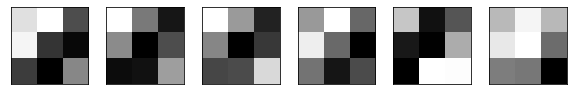

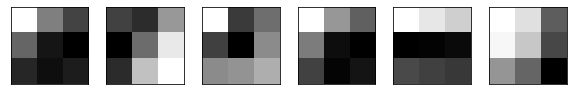

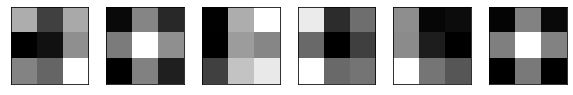

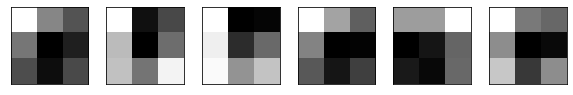

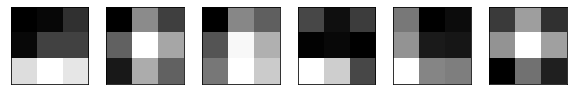

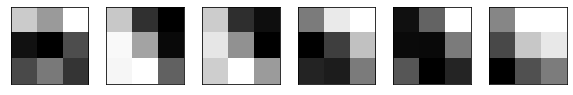

In [0]:
# cannot easily visualize filters lower down
# retrieve weights from the second hidden layer
filters, biases = model_vgg.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)   
# plot first few filters
n_filters = 6
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	plt.figure(figsize=(10,10))	# set figure size
	for j in range(6):
		p_num = i*n_filters + j
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, n_filters, p_num+1)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
# show the figure
plt.show()

### **Mount drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load image**

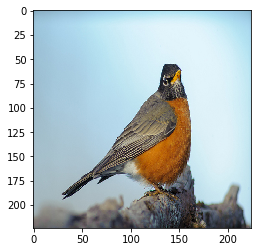

In [0]:
# set test file path
bird_file_path = '/content/drive/Shared drives/scsa_2019_e/z_data/'

# load the image with the required shape
img = image.load_img(bird_file_path+'bird.jpg', target_size=(224, 224))
# check image
plt.imshow(img)
# convert the image to an array
img = image.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = np.expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel for the vgg)
img = vgg19.preprocess_input(img)


### **n x n ploting function**

In [0]:
# plot n x n images
def square(imgs, n):
  img_num = n
  plt.figure(figsize=(10,10))
  for i in range(n):
    for j in range(n):
      p_num = i*n + j         
      # specify subplot and turn of axis
      ax = plt.subplot(n, n, p_num+1)   # pic position num: 1 ~ 64
      ax.set_xticks([])
      ax.set_yticks([])
      # plot filter channel in grayscale
      plt.imshow(imgs[0, :, :, p_num], cmap='gray')
  # show the figure
  plt.show()

## **Visualize feature maps of first conv layer**

In [0]:
model_vgg.layers[1].output

<tf.Tensor 'block1_conv1_1/Identity:0' shape=(None, 224, 224, 64) dtype=float32>

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
['block1_conv1']


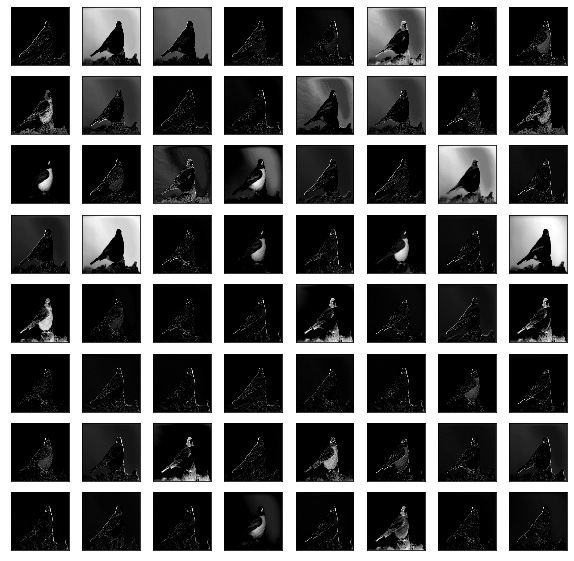

In [0]:
# plot feature map of first conv layer for given image

# redefine model to output right after the first hidden layer
model = Model(inputs=model_vgg.inputs, outputs=model_vgg.layers[1].output)
model.summary()
# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
print(model.output_names)
square(feature_maps, 8)

## **Visualize feature maps output from each block in the VGG model**

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

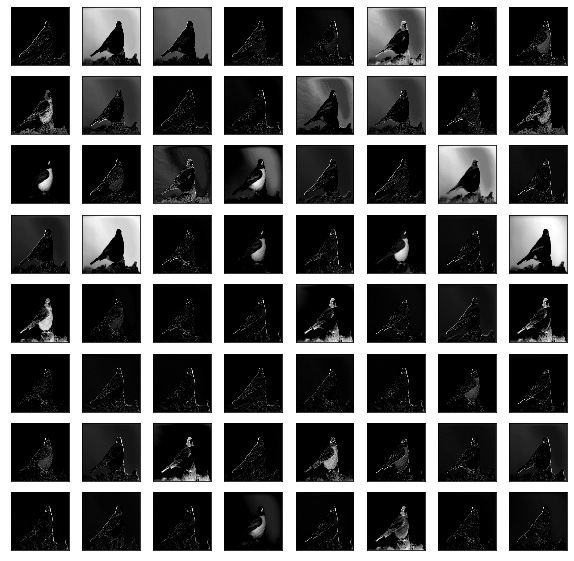

block1_conv2


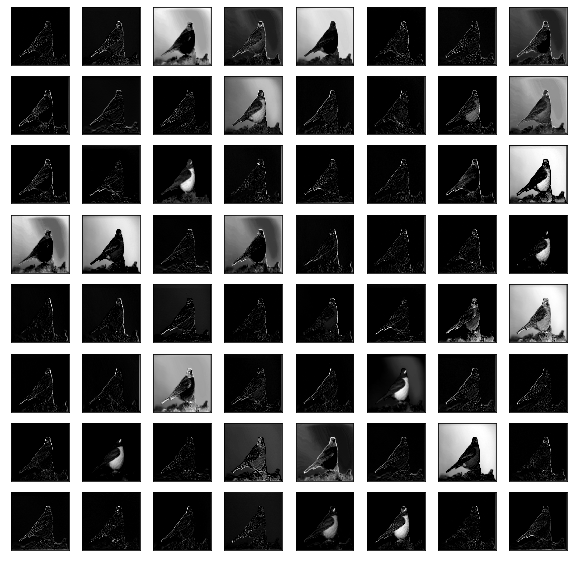

block1_pool


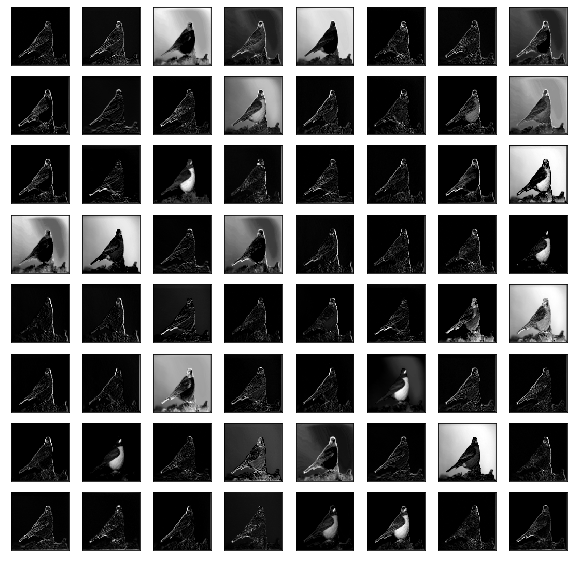

block2_conv2


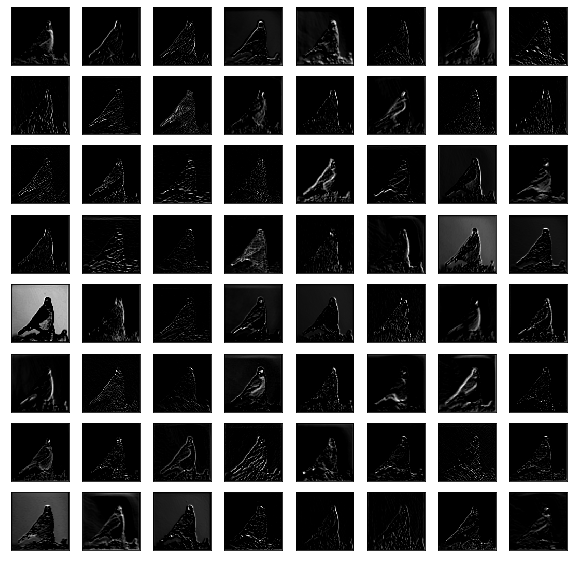

block3_conv3


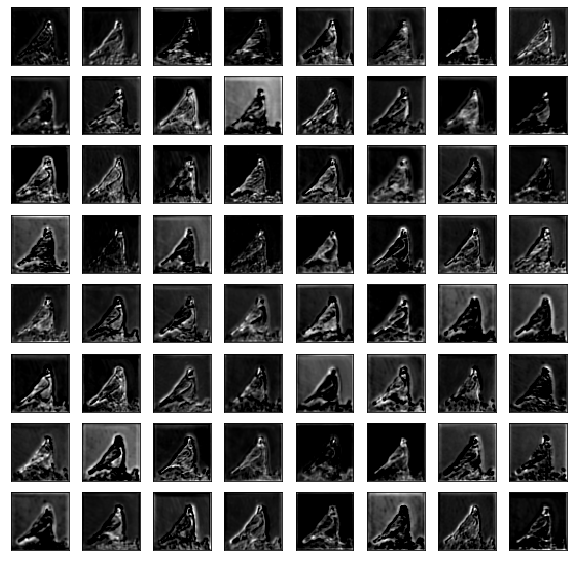

block4_conv2


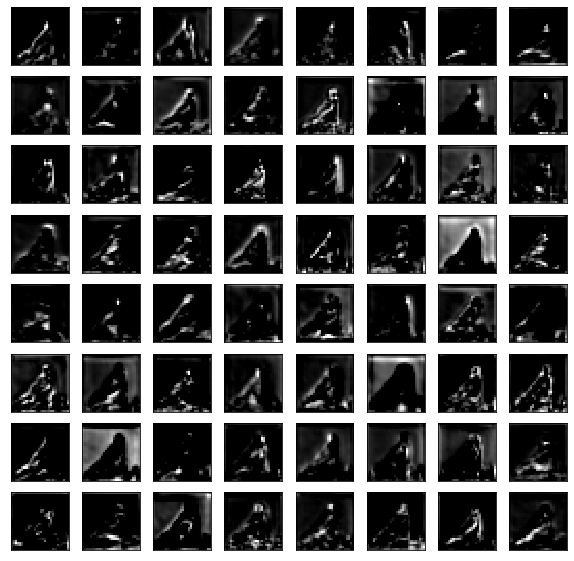

block5_conv1


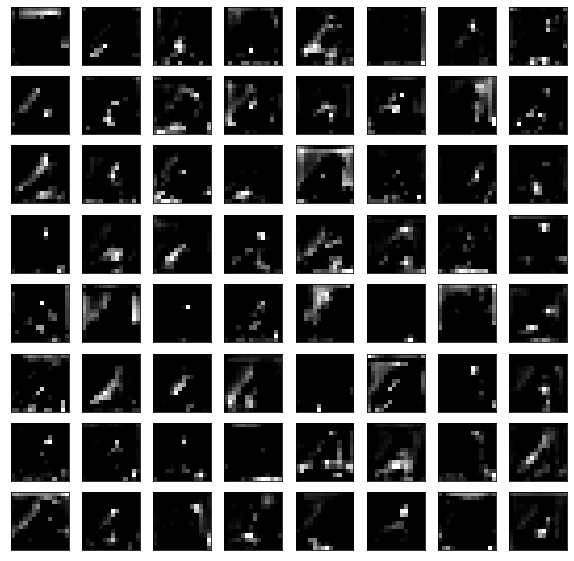

In [0]:
# visualize feature maps output from each block in the vgg model
# redefine model to output right after the first hidden layer
ixs = [1, 2, 3, 5, 9, 13, 17]
outputs = [model_vgg.layers[i].output for i in ixs]
fm_model = Model(inputs=model_vgg.inputs, outputs=outputs)
fm_model.summary()
# get feature map for first hidden layer
feature_maps = fm_model.predict(img)
# get feature maps names
layers_names = fm_model.output_names
# plot the output from each block
for i, fmap in enumerate(feature_maps):
  print(layers_names[i])
  square(fmap, 8)

## **실습 과제**

### 과제 1 `tensorflow.keras.applications.`에서 제공되는 모델들을 알아보자
#### -- VGG-19에서 feature map들을 모두 출력해서 비교해 보자 

아래 그림 중 위의 것이 VGG16, 아래 것이 VGG19의 경우에는 feature의 하얀 부분, 즉 weight 가 작용하는 부분이 VGG16과 비교했을 때 VGG19에서 나오는 feature가 VGG16에서 나오는 feature보다 촘촘하다는 사실을 발견할 수 있다. 


vgg19가 vgg16보다 더욱 개선된 모델이라는 사실을 생각했을 때 vgg19의 feature가 더욱 촘촘하게 나온다는 사실에 대해서 이해가 가능하다

![대체 텍스트](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj4AAAIxCAYAAABNZLJ5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9e3DcV3UH/tnVvne10sqWZEt+yLZs%0Ax484hjjECSEPyAMmySQhhEwSmNCWFpjSFugMadphBhgeLaGl0EIHymQgNISQlDxImoQ4NQ4ksZ3g%0AV2LHsS3belnWW9r3e39/6Pe5Pnt0V7J21d/vD3RmNLv67vdx77nn8Tnnnnu/jlKphAVaoAVaoAVa%0AoAVaoD8Gcv7/3YAFWqAFWqAFWqAFWqD/r2gB+CzQAi3QAi3QAi3QHw0tAJ8FWqAFWqAFWqAF+qOh%0ABeCzQAu0QAu0QAu0QH80tAB8FmiBFmiBFmiBFuiPhhaAzwIt0AIt0AIt0AL90ZBrLic7HI4/lrXv%0AI6VSqXkuFzidzpLb7a74u8PhAACUSiXzfaZzeZ48/3yunY3k9gW8//lek81mgSp409jYWFq2bFnZ%0Ac+V3W/9s/dR80e2zffJPn2t7Btsi2+R0Oqe1U7aF98vlcjh8+PCceePz+UqhUMjKj0ptrNQmp9M5%0ATUYkPzVvZ5Ml9s0mJ5K3ms+a38ViEYODg3PmDQAEAoHSokWLZuxLpf7O9KnP/7+i2eS0VCphcHAQ%0A8Xh8zg1xOBylurq6in3Q9uM87jfX5wMolxNJNl2diWznlUol5PP5OcuOy+UquVzl7m22sa+kd+cj%0AM7ONwfmSTYf0cf45HA6kUqk58yYcDpdaW1vN/bTNm83m2D5txHvabNJMPKlkw7QuVbLr/H8mezwn%0A4AMAPp9vWoNkR/idRth2nnQalQxYsVgEYDfmsqP6N/1sea7tOv1bOp0GgO658sXj8WDZsmVlgsT2%0AF4tFIzjFYhF1dXXmOt12Pciah3QkNioWi+a8QqFQ9hvbQUNZySCynbyfpBMnTgBV8Ka9vR07duww%0A92effD6faRf7xk/Zvnw+j3w+j3Q6jWKxiHw+j0wmg2KxiHQ6jUwmg1wuh0KhgFwuh3w+j2KxiEKh%0AgHQ6jVwuh2w2i3w+b+2v2+1GXV0dnE4nPB4PvF4vvF4v/H4/AoEAAoEAQqEQ/H4/XC4XPB6P4SOv%0Am5ycRGtr65x5EwqFcP3116NQKKCurs78/b8gE16v1/CCz3W5XEbOCbbdbrdpj8PhQLFYhMvlMvzV%0AgI/ykc/ny77X1dWZ/ykLbJN8FqlUKpmxKBQKZiwLhQLy+bxp97e//e058wYAWlpa8J3vfAdOp9O0%0Aw+VyweVyGd7LP/7udDrLxof91jIv7YvNgdvAM49Lh2BzIFp/OA6FQsHwJ5/P4+67766GNQCm7I7u%0Ag7Q5lcCr7qPsgzxHXmcLmniO1GH9m34e20V+sL3aUXL8xsfH5yw7DocD2WzWaudt/qoSj9g+6bO0%0ALFAObDyw8VL2t5It5zN5nrSJvO+KFSvQ09MzZ960trbi+9//vpER2r1cLgfgnM3hd+oa/Qdlntey%0Az4VCwfQtl8uhWCwau8DxyOfzxh5TD+rq6oxtpu7Szno8HrjdbgSDQdMO2igpK5SpXC4Hp9OJSCQy%0Aoz2eM/AhSUdsc6AaUMhBlPeQAiGvkQ5YAybbcfkc/bxKgjNbxFINP2zGFUCZkFUCZZWUgEJViSpF%0ACRJk5XK5aUZMAzSn02kESvK/VpJjkM/n4XQ64fP5zP80gDSGBC+5XA6ZTAapVAqZTAaZTMYc57Fs%0ANotsNot0Om2Aj3YuhUIB2Wy2zEiT11Rk+el2uw3wqa+vRzgcRjAYNCDI7/cbIETQVGnszoc3brfb%0AKDxwDrRy7LQzJbghAOC1+Xze9J2AJJVKGUBCcEjDwT/JL2DK+Gg9kYDC5/PB7XbD7/fD7/fD4/GY%0AsaTx4b1KpRJ05D0XqqurQyAQmAZspBEkf+Q5M0WvEgiyzTadtdk4m47xXG1f2BYN5GXbyetqiWMn%0A7Z0EWDyHdqeSw+d1Nvsk+y4dvM2RSx7ZAlvZLhkM2tpVrU7x3jagp32QBoc2sMHz6Nh1P6lf5AXv%0AKT+pt9KOy+fIdkrHLp26bLvD4UAgEKiaN9RZEvtAO0KiffX7/WXtJumgM5VKIZFIGLuTTqdNQEV7%0ATZvM62gjNKByuVzwer1wu93GBjc0NKCxsdHYXunjpH+ZzX/N2SJp4bBlDzSCl9dKBZQNrmR4NCjR%0An/Ieuo024ZeOXgplpTbMlTc2khHnbEBHImd5ji3itP1vU2Lbb/xfK7g0frXyg8S2FAoFeL3eMp7L%0AqIBRQC6Xw8TEhAE6qVQKyWQSqVQK2WzWACJmfhhdEEQR/DCyKBaL1uhPRgvSEbndbng8Hvh8PkxM%0ATCAUCpm/cDiMUCiEeDyOUChkAJEtm3S+vGE7stlsGQCTss4ISGanKPvkm+wr+ciMFwBzDIBxyLlc%0AzhwjT/hMoBywM+NEY+T1ehEIBODz+eD1esvAUV1dnbm3zHBWwx+Px2McggSJ/NPARzor2SfKmTym%0ASfZfAuSZSAdp+nrZPmk7OY7zYXdksKezzDKzYNMBaY+1M5b2QQZG8loZ6UteSMBH/edz9H1t7ayV%0ApBxIXZfgjYGAvkbywOVyGZsi+yPHUQYU2uky80k9k/Ig5YvX05ZI/mo+1RJQSD4TlBBo0CaTb9R7%0AZqCZjWYgmkwmkcvlyj7j8bgJXvP5vLFLfF4mk+HMCoDy4IFtc7vdcDqd8Pv98Pl8Juisr69HU1MT%0AGhoaEA6HTVZe+nU9q2KjOXPO5jwlQuWxSpkNiWRtiJf31gIoFUVeK6/R7ZTX2X4HpkdstVAlsDCT%0A8ZSZDkkzOVLdd91XeQyYmTfAOWGhwGjwMx8AqFAoGKct+8xPRgYENwQ46XQa6XQa8XgcmUzGRBHM%0A8GQyGTidTnNuqVQyU2KMYlKplHUMtKGWmQ2mV6n0qVQK6XTafDY0NBglpmGrlijP2ghznDm1RHCm%0Ao3mZPmZExagqk8kAgDFUdDo0Uny+JB3lU65SqRScTicCgQDq6urg8/mQSCSMUfL5fPD7/WYKjpkZ%0Aj8dTE2+ks9QgR7Zdj7F06jq6lbJPp2wjbZR5X32O1jWOk7ZzctpE9qdakrZAAjWpX/x/pikmySPZ%0ANikLWs7JM2l35DnymZK/+rk2MEWqljcMFiT4kcBNypDsg7QH0q9RLyUPpa66XC5zTAb18hqtUxoU%0Ay7bagnEJqtm/ankj/bHkkwR7EhzKrHEulzNZHQakLDmQWeZEIoFkMmnazWM231bJd05MTMDj8aC+%0Avh6BQACxWAwTExNobGzEokWLDBAiQJJZ4ZmoKs7ZFJ8Dzt/1HKaMdmyoWnZeKp2NMTYGacfP8yhU%0ARM0aaWslnW+SzlX2nfOaMhKUzkwaM91fqSSVAKI+z2a0ZX/z+bwRdhk5VgKOcyEaM0YBcoqCbaMi%0AM31Jvvh8PuRyOQQCAeN85Xy0NDhsq9/vR6FQMEpXaSrKNt5y3jmZTJoIRxpJOnY55SRr36rhDyMr%0AmwzTULAdNKo0WsA5UCR/k/PhHo8HxWIRmUzGgKlK0xqzBRTpdBr19fVIp9Mm3U7wxTGUjr8WvZJR%0AL3BOh2hjpOPi77ZpHWmLNFiSTk1nRni+vpfWK2nbaG/kVKWtzfOR1WAfSFJ3dYAjgYp0rhIE6UhZ%0A2hR5T5nt4POLxaKRR2k/mAXRYEv6Bt3m+eKRDdjIrIy0bzrLLvkkfYgGKLqdlaamNOAkQJJTk3r8%0AyFM5dnxmtcBHtpWgR8s6bQ5lgryhXDOgkZkd8ofZIZ/PZ2ozaSdlVvZ8AC7vl0gk4PV6zSftu7Sb%0AsvZwNn81Z4skIyVJ2mBIwZLTUTJK00aXRAbK+8rrJelIhc/UCi8NugZjtTp2SZVStTwui08lLySf%0AbGBM9lFHcSSdZtYRn440GCHKyEOn96udwqlEjBzkc+TUDvnidruNc+Z3h8NhijlthbbMLGhF5n1m%0AI/KIzr1YLCIWi5Vlo+LxOJLJJJLJpJlG0qnbuZAtIme7NYgFpsuu7J/Mgni9XmNseB6LBXnM5/NN%0AAzqSBzoDQCoWi4jH4wCmasdisZiJ9ljoLEFaLTU+kkcyiyedNmVdOmB+2nTFZkOkE9M6ZdM9GyDU%0AYyazHBL88L7zEWix7VIeJHiQdlieI4MNbRulk5f9loBBOjAtG7yWY2LLeNjGRgIDze9qSbZH8kHK%0AjzxX1nzpQFSCQ80HHURof8i+087xGskf2T45bjKLZssEzZXk9ZIXJHlvBoK0uU6n0wR6nHrmH6e7%0A5dS0z+eDz+cztjkUCpkat9kCLPk9m81iYmIC+Xwe8XgcY2NjiMVi5o8ZbG0vK9GcNU86TTmgOlLV%0AQIbHpFOV0atWyEpGRhq7SsySUYpNQKSTl9fMNCU1G8k22YyB7bt2Llr4bAqhjat8pvyzRfP81PeR%0A/JDHK41bNcT6G35Pp9Nmrljem0CGTlkqEhUGQJnySOOjAQFppmW/NpIGk8XTckopHo+baTndh1p4%0Ao/siiU5frlpjMR+vJc/4qflB/ulMotRjecwGfkqlksm4cRUFU+Dkhx6XakmDGkajsjBb6o4EPTZQ%0Ap4G9jRe2LKu2S1rHte2q1Bfp9OU1tfJH3s9W96jbQN2WmTTKjcxWySlGZql1P2RQJ7O1tnbI7xrg%0ASDmp1d5ooGsLtiTpwJTn8D6y+Ff2W4JwWahOveM9JE+pu0B5BkfKgpz+k3zT+l0tbxjY8Z5Sz3mM%0AbZUZKR6Tq69k8CVttARGvHclHdH/a50oFoumzfyU5QfRaHTGwERT1Rkf3WjtxPU1ciBtA6zvAZxb%0AcaOzI7yHND6VDIiOumzGXqfLa6GZwBjJlp6XxsWWxZEKUiqVzHmzRaCyXTYnII04eaqjivkwQixA%0AlkTHTeDAtCWjA716iWBIKpiUC15P0gooQcD5tFlmL+jYWdDHLA/rh5jerYY38hkkmYmT/7NwmQ5I%0AGkFOM0mjyP/5HGbM5PJRftc6RpKAh59Op9PUVHEMWWPEuifet5biZuBc1Cn5xT89/aCjVdtxGxDT%0AjheYXv+nwZ8tayDPZxv0cX1dJaB0PiTHTDoo7UwrORZpR3VfZHZN8kjzUj6fU5w60yL7yedVCgKB%0A8hWN1ZLUHwnE5RjaeC/5Ja+X5Rwy6OK9dLZfjgHBE1Ce4ebv0i7J8dA8kKCpWrmhPU4kEmU2R65O%0Ak21goEFZoC3lYgsueqCtkRl2mSkiP9xut7Fd2t/N1OZSqYR4PG4C52QyiUQigVgsZr4z8z7vwIeN%0A0MpUyaHwXJnulJ+y0xp56nRrsVg0y7Ll/SU40mRrlxY4DRKqJQkYKhlFnqfbp3k5G2mDCgDpdHra%0A1JiNz/I6ncq3If35ImZObGBLOgQJaNhuTtHIOhY93SUjEAIm9kdmiM53rGkguBpKriTLZDKm4JrH%0AqyWZRSWAkEaURocAQGaIWMwsl4PK/pOfJPJIrr6SU4TaUVUC1NRFGqFSqWTAm1xtV0n25kISHGp7%0AIPkiI3Eb8JC2wjYGmqSdkM+cLTq18cwWSUsdqJZstkxm2SSAlsBFtkkWt0qbQP2RPLPZFckPGaTa%0Asn1SfnTbeb4EbrWQHicZXPM3DYR0Rkj6KskDad81CJJ9qgR+NCjkObyf9rG0A7KWcT58FheK6KCL%0AdkbaHmlzZBAlgy9ZisA+ExxRnlwuF8LhcNmYnA8x25PNZpFMJpHP503JAbM+XF0278BHOinbceD8%0AV4lo1M9rpYIyiuBvRIvyfJIGPzrjoR28Rra1EoVTzsnqTxtViqjl79JASuPF+gmHwwG/31/GO/ns%0ASlMb7L+ez5ZjYxvvaohtpvAya6H5w7bIwl2uEuLcslQueb2MRIBzG26WSqUZsz62/hH4MK3KVVKs%0A92H2J5lMVp3xAc4VBsuIXe6Fo52lrplgdkVGWzRE5InsJx0M63B4XMqZ5pHtGHAObDPSSiQSBvTM%0AtEfO+ZIEOBwPZr20I5OZIV7LT90OWx1JJVskwYQtEp9tRZjUo0p/1ZIEezqIks5dAyI5FWWL8uVY%0AS5uip1XlEm05rUP7YQvQbE69VCqVyUutgFCSjSe8vw6u+WlrtyQJaKQsal4SNMrVYRIskWS75CyI%0ABoU6aK6WaDOoU8ygMFhhm2TbJd/4G22t3lBU+mxmiWTfaS919ms2KpWmFriUSlPZn0KhgMnJScRi%0AMTP1JQPHSlRVKKaVQgMHqdDSaEuHqq+xMVZHG7y3/q6nBCRpsANMX+0kFbsW0lELn6E36ZM8km2T%0ABkoLuO63BIbagNoiCcmbSjwhyahWA6ZqSEe3NCxyDx7p6MkHmQqlU2daVdb66MhSgkE9FcbN9+Tu%0Avrr/kmgYAJTtHC2ndSrtCj0X/sjpKz6XGTKZUdKZDVvbtYPXxoXTYjRWjMbk9VrHJT+0nHHVBsEP%0AAYisw6mFtEPhmDAilbtP63PZHkmVsj7klS140g6zEv+1TasEqvS51ZIcJwmMZaZH2lu9cETbRPkn%0Ap7l4vqzz0EGn3BOGAas+h8+y9V9P68+X7dH+g2Ms7Sjtjb6WbZGZZG2vpb7I+0mQqFdm6ekqDaJ1%0Av6Vc2/RyLkT9oQ7xWKFQMAAolUoZu6cBLElmumTWRwIgHnM4HGW7QLPgWWae5bSX7if/p69gITMz%0AP9IeS19SiWqq8bExXh/TkQTvoQ2ZVDZeJ9NrtoyFTrPa2mhzaBKE6fbUSjbgZVN0W3RmAz3yPhqJ%0A68iC99XLxXlcR3K6XRqsVupTNSRfHSGzLnJahMLLPsisjjQq0kHJPW5IzPrwuP5NrkA4n8iS4IyZ%0AGAIdtlsakGqIYA6A2atIKz5BEad8bABIygL/ZPEhcE43uOrL4ZhKPXMXZgJDkuaNnhqQwFCmwuXU%0AYK3OSzpqDcrlLrAMMGQ0rmW70pRWpd9sNkFPF0ndlDZFXy/vr2uTaiHbM2cKMvV1OiiR+snrtJOX%0A95BOT4IbuYyd59Lpy6BWttE2pVYt2YJkYPr0H58jbbUtsNd2U/OM95ZAVOqo3CBQFoLLNsrtAMhT%0AOQbyubWQfJ0Ns9kkWXtJ26ezKFLmCFxobxhY0sbwOPf4YgY/EAiYDWDlClMZ1APlK6HJP9pJ2h7W%0A93DqazaqOuOjDfNcBkIKir6vFC7t0Hmt/LQVTkph1QpUydDY5qOrJT3lxmO2lLc2ImyLrT9S2GwR%0AuQaT2kHJc+U5NsOoo5haiRkeOivdZxLRu63POnKg0+anlgVdA8QsB/sk33M0E9G581POe8sVatUQ%0A+6nfQ0N5kVkgWeOis0MyEie/qGe2GgRpfKXR4v4cNrAuATefQZL9lwBkPrZD0BkIWwAATM+GaWBR%0ACcDr+1WaTrDp4PkAF501kXag1qBCAg0dDMo22my1dKiyb+SdnHLRU2kafFLWmNmQ2RL9XD5Pr2yy%0A8bcW0rpt8wuSh5InkmzTXjJDxuskkNG6R7tmW/klny2zdhq4VtKDuRL5IO2C1FnJDxm80AZy7HTG%0AUGZvOLWl97Lie8DkEnifz4dgMFi2EENeY5stITCTwaD8m02vatrAUCqVFiqtcPpaDi7Pl0JKJFoJ%0AdcdiMdx7771wuVw4ePAgRkZGMDw8PC0Ss7VPC9P5Gq9qiE6FkY9MVc7EG+DcrqE8Tzo0bSQk3/r6%0A+nDrrbfiiSeewNtvv42LL74YTU1N5lobT+VvM41ntST7QEPpcDimvfBW9l/+L1PTDsdU9iKdTsPt%0AdqNQmNqcL5PJlKWTqYC5XM4oodvtxrXXXouNGzciGo3iv/7rv9DX1we3211W3Gcj8p9jwjnyTCYD%0Av99fkwNjG6XjIpDgswiMuEmgw+EoAxuynkcCGvniUZ1u93g8JqW9fv16jIyM4KKLLoLL5cL+/fvR%0A398/I0iVssP+53I5s8EYj8+Wdp6JtJOShl/bDKB8A0NbJoHnyPbPFsRxXG688Uak02m4XC784Ac/%0AwMqVK8vuY2u7/p/3Yh9qXfHGe0lHqafepC7pJedabqVN5jkyc2PjD2Xk+9//PiYmJvDFL36x7F7M%0AWujgi4BfOvL5ADyy73rqRAIIHUCSdxpM8nrpq+T5tkCA19522214/PHHAQDNzc24//778Xd/93dl%0APkFfQ6IOaZBte95cKZvNlu3/VSwWTb0e28TfCdhYmyMze7THcqsNTp/TVmlgTCD4gQ98AIsWLcLE%0AxATq6uqwf/9+HDt2rKx0wAaEJegulaZqRoPBoMlOsfxgJqr5lRUkPegSuGhHbwMbGgBJYZTOnkL3%0A05/+1LzDQwMZ+QyN7KUi2NpQC+l285ic69W80efodsn+yGM2I0QjOjAwgHe9610IBAL44Ac/iN/+%0A9rcmzagBoFY+qeB8li2DNVe+6MhFKg7f56QdHH+XQi/njvnd6/WaKbJKhsvpdGLt2rXYt28fduzY%0AgXQ6jfe9732GX7MBH12zJefG5f/VEMGBBC/ku1wezDFIp9MGNBJESgfKa/gbjY/kj4zAHA4H3nzz%0ATbz22mt45JFH0NDQgOuvv36ajGiZlaRBhFxpVWvGUKb99bP0OWzrTHvZkMfcA+l8wH1PTw9CoZDh%0A15/92Z9h3759GBsbmwYupJ5pXWJb5Xm1kM2h055I28G+aj3UtljqpZRBnbnh/V0uFz7+8Y/jueee%0Aw1/8xV+gs7MT//qv/4rPfe5zZedJGZY81yCkVCoZkE4nWivpdsj+2XyGLdsp+aEBEK+XfCIIePTR%0ARxEIBODxeDA8PIynn34a73nPe7B79+4yAM97SbBja6eU72qBD3nMIEnySAbrMuOXSqWMD9H6yJpB%0A3pNASNZf0r4Vi0Wz2/uNN96Id73rXUgkEiiVSvjqV7+K7u5uUw5hyxbqPtAu8xnMws9GVdX4aOSl%0ABVg3VP+vp3wkMJDX8HlSiYvFIm677TZ4PB74/X6MjY1hYmICmzdvnqZQ8lqNmrXy15py5j016fQh%0AHZDknW53pXvbwKbkCyPrpqYmrFixAq+//jpOnTqFL33pS2XFq9oQ23gjU6nzwRub8HJFlFwlJSM/%0AW185nlph+QZvWdgsl34CU0bl7NmzOH36NI4cOYK7774bDz30kHWarFIfeB8CC1lkWy3RMcllmNzP%0ASBYfS/mQRoltoyzReOlVFtLQ8Vye19HRAYfDgXA4jMnJSXz2s5/FLbfcUmbcbYBc80fqNgFhrdNd%0AGujwOXJKRgNq6aAkICHZjKrNrvHzpZdeMnVL0WgUhUIBv/zlL8uCMdleG+DhbzJjUKtu2ewqnyOn%0ATOUSad1v2WapZ9o2yaCDMlssFrFu3TqkUiksXrwYJ06cwOc+9zkA5Vk4G/jQzo3jR8dbrWOXVAmk%0A2OTaBgDlNdpXyHuz7eS7LNRNJpPm/VLRaLQMIEl9lL5BBgwSaMixrDWgYH0i+y33AeOntMcyC6Nt%0AQal0bvrK4XAYm8V6H55De+P1erFjxw6zl9DY2Bi+9a1v4cyZM9b6VE1yzCiHLDs4n5rLmos3tLHQ%0ADdOItRJ6A8qNlby/jDY9Hg/e/e5348ILL8T4+Lh5Pb3eidJ2f3lPHRXVKkTnQ3K6REcZbKcEMjZD%0ALfugI5RCoYD9+/ejqakJTz/9NFwuFw4cOID6+vppjrlSxEMlJoCYDwXjffT4UFjl6hwWrdnmsCXg%0A4bJ2v99vFFUbN0akwJSBWb16Nfbs2YMnnngCu3btAgBs3rwZwOzjL8dJglm2c7aM0fnyiPPTErjx%0Au5wyoHLLMWS6Wu4VQmJUJufdCarq6+uxdOlSbNmyBW1tbbjhhhvQ3d1tdeqyrZovMvKaD6due56+%0ApwQZfKbeiE3KkS3gINlkDpji0+9//3tkMhl4vV5MTExgbGzMvAC2UluB6XUK8xVkSZKZA63X2p7w%0A+XoKCCjPQMlVRxo88h4yyr/kkktwySWXAAC2bNlinqn9gAZWNjs40/TqXEm2l+2xZRNkHyXv5O/8%0ATWedJY/5zGKxCK/XW9aWRCKBffv2YcuWLdNWMGnQKtskdVBOVdYiR7y3rL3UfZZFxZxC0nauUCiY%0A5eXaVhH8yD3GeDwYDKK+vh7r1q1DY2MjSqUSTpw4gU2bNpXVQc1G0qdKmzMbb6rex6dSVKOP6cyB%0AnhOtFIFUQtljY2N47LHHUCgUsHXrVoNaz549O+1aXi8/K/VJX1cNaSN7Pufq1Cmv13uwSKeuBZRC%0AOzAwgMcffxwnTpzAU089hb/5m78BAOsqHalskkdSqaSC10o686VJtovOXwJEyQcqklzxRZ7Jt4GX%0ASlNTOcFgEKtWrcLLL7+MtWvX4qMf/ah57vLly8t4Wokkb2S7aDyqJUYs5IEE+Tp7QUPL44xueJ2c%0AU2fUKZf9k0c0upwLX7t2LQKBAC6//HJ0dnbi2Wefxa5du9Dc3Fy2E3alIAdA2WZnWq5rdfQ252tz%0AFnIsbEGUnOax3Z991PeORqPo7e3FunXrMDk5CQCmvkc+S9JsAeF8krQHUn60A5V2RmYcJCDQAEWe%0Ap+/P7/fddx8uuugiDA8PA4B5j5sGORqkUpek05TZyVqnAivJjfwus1C6/xIs6lV4UpZkRksClY98%0A5CO4//77TXvWrVsHAFi2bJm5hwwGNQiUpRHyfJndr5YvElzadETrLM/n9ho8N5vNwuPxlO0kT1sj%0Ad3jmfj/k4x133IFf/vKXuPTSS9HR0YFwOAyfz4f29nZjc2YLRuXeZwyiaQfnfTk7ULnuRB63fddz%0AzIDdAdueJ6+JRCJYv349JiYmTOTR2NhYxoRKpBG8DbDVQrOBBJm+1NdpQ24DCjawKWnXrl249dZb%0A8fOf/xz/+I//CAD40Y9+NO1aWyQj2yGVv1IkfL5Eh2Tb08UGOEqlUtm7sfS5Mo0KwERW8v1eegm7%0Az+fDsWPH8OKLL+KNN94wv73nPe8p2yvIRjyu288+cXl5taQzXCzuk/tT6OwN+8UsD9+ZlUgkjBHQ%0A6XwJGL1eLzweD0qlEvbs2YOuri5kMhls2LABt912Gw4cOICenh74fL4y5zCTI5fGn/2ar8hUy67t%0Ad8lPaQcqybCO+m3nMRJtaGjAyZMnUVdXh+bmZkQiETz55JNlWbGZ9FIHdvNFUlclWNDAS06paOcu%0AwZAcL5vOy+xSqVTCF77wBQESxEoAACAASURBVADAQw89hK985SsAgJMnT6Kzs7Nsjy7bPSWYr2R/%0Aa7E7OrOjswP6uAQ4MriRYM+W7ZFgivdwOp346U9/WhaQ9/b2YvXq1XjiiSdM0EadlGMmx0cHWfwd%0AqO1VMPJt6qVSqWzTUb6OR2/EK8eC57vdbiQSCcNX/Q5Fr9cLt9tt9u2hrb7gggtw5MgRdHV1Yfny%0A5YjH42hvb8eVV16JYDA4a9ZHgnhpmzh1N+9TXTLTMFOjKl1nHiwieD3gtuiA537+85/Hrl27sHv3%0Abpw5c8YY+aNHjyKZTJr76HboqN4G2moFPpUMniSZSZFGi7/J9skUoX6O7hsA3HrrrZiYmMDg4CC6%0AurrMta+++iq2bNkyjQdSkaQy67bPh/PiUmwZlcvoyeY0Ku3jxE+59JoKx2hD7t4MTEWhjY2N2L59%0AO5qamtDU1ITOzk68+eabuOiiiyoaEf1MyTsqGQFQtSTrlTi2crk6gDIQKA2tfIcY96+gIWUGSE6Z%0Aybohzsn7/X48/PDDOHjwIH70ox+hq6sLfX19+OY3v4kLL7xwGi8q8YiGUkbAtfCFfdUFn5IHOgqX%0Av+tss0yHSwAg72ejn/3sZygWixgcHEQ+n0cikUB3dzecTmfZ1vvkhbRb0sFqpz/bc8+HpB3RdTGV%0AdFlmJYByUMTr+F3WZzCi53eHw4EDBw6gsbERK1aswC233AIACAaDJiOmp9VIM/Fe+4BqSQZ3ElzI%0A75JftmkSvTRftklmamWGSAKu559/HsBUsH7LLbfg5MmT2L17Ny677LJp+x7JdkhAautTLZl4m74A%0AmJYpYdDFa3gdX9PDfXOk3SoWi9M2miX4YZG3x+PBAw88gLfffhvd3d14+OGHsWzZMpRKJdx33324%0A/PLLZ7Q17D9BNQADNmlzZpObmjI+8rvNcWmUr4GN7bqZUrWxWAy/+tWvsHr1avT29qJQKGDp0qUA%0ApqYs5DXy3hpAaWMkFbkWqgT4bGQziNpRyOjKdj/Js97eXqRSKbS1teGZZ55BPp/HNddcA6fTifr6%0AenR2dk4TeCmsVDS9d8dM01NzJbkJH/lN4yEdk5YhmwEg4OFGhF6v12R26Oi5jP3YsWN45ZVXTCG8%0Ay+XClVdeiXw+j7Nnz06LbCoBWNkOnVWotoCXPJfpa1vkJ3nE62zpah7n/huyeJFtl5my8fFxvPnm%0Am1i8eDH27t2L5uZm+P1+tLe3IxKJIBKJlEX4sn362SQJ3mol2Xcb2JeyOtO4Sf5IJyYz0NpBl0ol%0AvPbaazhz5gxSqRTC4TBCoRDq6uoQi8UwNjaGo0ePlrVL6ootuJpvkvfVm+LpcdfA0WaDNVColHHm%0A5nEbNmxAS0sLurq6sHXrVvzDP/wDEokEurq6TJts/Zc2x/bHZ9XCMz0tR2cp/YotE6jrn2Swr4G9%0ABlA8ftVVVwGYWjEKAOPj4/jZz36Gm266CQBwxx13TPNHvAen+yTf5rPsgOM326IM2mdp62yggmPG%0ATDVX6TK7LO1zMBjEBRdcgJdeegn19fXo6upCa2srVqxYAZfLhUQigeHh4WlJAf0szTPg3MaLNrnV%0AVFWNz7SbKKckB1A3XiN9HQXpc8mARCKBrVu3oqenBydPnkRjYyMKhQIGBgYQiUTQ29uLSCRSFrnL%0Aduh22p47H8DHxh99TEYGkiSSlciepL+TN319fbjtttvwwgsvYPfu3cjlcjhw4AB27dqFYrGIDRs2%0AIJVKlUX+bJdMS0olt7WrFpIpb+nspfGxGT55vTQuetUSj7lcLhNZOJ1OHD9+HK+//jqef/55jI6O%0AIh6PIx6Po6enx8wrc3nlTFMW/C5XdGke1cIbbUTlOGjwo9slnZQ0VJzz1saTdOrUKRSLRSSTSYyM%0AjKClpQWTk5Po6urC8PCwmc93u93Tsiny+dLxavCmtymohrQhqxSwSCdWSY7090oAoFQq4dChQ/jO%0Ad76DwcFBxGIx1NXVoaGhAaFQCEuXLkUqlcLXv/51631sz9RGW/KpWtLTNxKgUr9tfJDjJldCalmU%0A55Ivcj+oF154AT09PWhtbUU6ncbXv/51bN++3dxTFtpLoEl9lTzQgXGtjl720dYnW5AtQQ75a7vG%0ABtaczqktEj760Y9i586dAGACcwDo6OjAM888AwDWPbj4PMk3DdIk+KpFr2R2thLveH8ZGEodYRuk%0AzZHAiMBHvsvL7/fjK1/5Co4fP46hoSFje48fPw6fz4d4PI7m5mYzJWbrowaamhf6fZ42qmoDQ52+%0AlIOjPzUTZYOkMNqEkNfG43EsXboUBw4cADAlQJlMBkuWLEE8Hsf4+Djq6uqwadMm7N+/35oe1G2T%0AbdH/V0tSAeR9tfIStGggpg0i26o3u5JR2enTp3HzzTfjySefNNc2NjaiubkZqVQKk5OT2Lt3L5qa%0AmsyGdXyeVGDNG9kOoLYl7VJp5QZ85Le8t1RuqfDSiZO4C6jf70cikZhWxP2HP/wBzz//vDHCR48e%0ANbUHR44cQSqVwqFDh/Cb3/wGd9xxR9neFZWoWDy303Ete2nIdpZKJRMlcbNCGwDl88lDAKaWR8qH%0A3NuHxc8SKDudThw7dgyjo6MmiGhoaDDbC4RCISxatAijo6Po6+tDKBTC2NhYxTaRuCmaXHZ7Pm9K%0AnolsgHim++nzJNiwRY+V7NUrr7yCz3/+82asi8WpFzKOjIwgk8lgbGzM1ERI3tvaou2bLtqt1e6Q%0A9PjIDLLWbfm/LAi32UjZB56/ZMkSnD17FkePHsXSpUsRDAYxNjYGt9uN3bt3o66uDg8++CD+9E//%0A1DgiDSwkuJFjpI9VQ/J5Uvb5m7S/toBP2m6bXdQyxjHt7OzEz372MwQCAWzYsAF/+MMfzDWnT59G%0AW1sb8vk8/vqv/xoej6dsGk0GMVp2tY5L518tfzKZjKnzk6t4db+lzSHQ4fN1fSJ9FcsQuLEsACxa%0AtAh/9Vd/ZWwMj50+fRoejweHDh0CADz22GNYuXKlmUazjQvHjhvIciNMp9Np3h04E1UFfPTOjTaF%0Akg5MAxmepxVAXs/vyWQSW7duxYEDBxCJRDA5OYmRkRGzcgCYmlOuq6vD3r17kc1mEQ6HpxmTSiCE%0Ax2zCXS1vJMiz3VMXfdoyUnK31EqG9fTp07jrrrvwy1/+smzTqHfeeQfhcBjxeBxerxdtbW148803%0ATVQm22ZLZcs26/GpltLpNPx+v9mUTDuMmTJOAMxqJZkNA87JotfrNc7J7Xbj2LFjeO211zAxMYFF%0AixZh5cqVOHLkCEZGRqbde3R01EQrOqqT8k0jxAhNZ6qqIR2Vs49y2kLuR0RjI0GXbUpUGs18Pm9W%0AWDAdnEql0N3dDZ/Ph6GhITQ2NmLJkiW44IILMDIygmKxiEgkYooPx8fHzX1nAmUk6XRqrfOhLshN%0A0PT0byUDKfnB49rG6GOjo6Nm9+FSqQSPx4NEIlFWqApMyd7AwEBZltb2bB7T4yrbVS3pgFI+Qzt3%0AfY2trTbQSHI6p3bxXbx4Mc6ePYuOjg4MDw8jn89j3759aG1thdfrRWNjI9rb2/Hoo4+WXSttPo9x%0AbPlMPZbV2mQJ6mRWm7Ios6RalmxAW36XIIU8K5VK+PCHP4xf/OIXAKb27iHo6ejoQF1dHZLJJM6c%0AOQNgaq+1SCSCU6dOTQOAuu+6TbaaqWpJZm2YyZM2h0R7rW2hDaBySoxTXNls1oCesbExrF+/HseP%0AH4fD4TBgR9LTTz+NL3/5y+jr67PaGh6jHyHJOtV5n+pip20Dr4GOFOhKQEQrrvyeTCZxzz334ODB%0Ag2hrazP79qTT6bJltolEAslkEtlsFs3Nzdb26k+bU5sPkkKr+y2fK8GOHiQqoxQ8Lezd3d247bbb%0A8Mgjj2Dx4sVobGw0PGlsbDQGiQLS39+PDRs2mHtIZbIBP9lG/l8LT1gTUCxO7Qeh+y2naYDpK6hk%0A36VBIAiR2693d3fjxRdfxMTEBDZt2oTW1la88847M7bxxIkT0/qt+0zQwbbUAnhkn2Tamf1hbY7m%0AHYkAifewjZUEShJYHTx4EAcOHDDFjF6vF01NTRgbG8Pbb7+NxsZG8w4dGmrdZtscu+SLw+GoebUb%0ASQJMXaCsn8nzZZ/lWOlx0/o5PDyMz3zmMygWp1aL1tfXI5FImHoy4Jwu0km8/fbb1mdJ/tjs3XzI%0AjwQLMnvAdtoCSs1bOT2pV39JO8Sly9FoFBdddBFGRkbM5nxcURmPx9HQ0IDDhw+jt7e3jLfy/ny2%0ADbBqR1otyeBO6i6PSdtnm36UGRieI3VN6sDtt99uQI+m06dPo7u7G8FgEABMBnXjxo1lclCpDewL%0A/681UC+VSmXvueK9uZ8PZYIvG+bzZPGzlltdhiF/b21txZe+9CV0d3ejra0N/f39JkivRG+99Za5%0Al06u6IBP1oZyH7N5Bz6yQzo9x2Pyd3mNDUHbkL3DMbWi6aqrrsLDDz8Mj8eDM2fOoLm5GYlEwizz%0ABaaWMDOTAAAjIyPTDKF+nmSkNBS1ZnwqGWPbIMj0suYXv+t6CX5n9uSJJ57A8uXLMTg4CJfLZTb/%0AGx0dhdvtxuLFi+FwOIwB4j4b8p7S0NmEudbIS/Y3nU4bZUulUtMyJvyNfNDTE3rc2H5+D4VCcDgc%0A2LFjB7LZLJYtW4a33noLhw8fntUBnzhxomJWy9Y2aTBrMdJSPgj+dC0O+SSduZ7+k+2wAf1MJgOH%0AY2oVDqeMC4UCFi1ahFWrVsHpdCISiaC/vx9nzpzBkiVLzIovPW8vP3X/ZXGhBijVkgY8tr7yu/5f%0Aypg8R59HO/Yv//IvGB4ehsfjQTabxejoqNkRlsaaz2bqf8eOHdMyKpXa8n9FOlCSzqFSJoW80RlM%0A3o/tZu3K4sWLDTg/ePAgFi1aZMbG4Zh6h+KWLVvQ29uLXC5n7I7N/monr6P1WgNS7WtswUGl+jOe%0Aq8ESj0meFgoF+Hw+PPLII/D7/QBgPgOBgAHL+XweJ06cwOrVq7Ft2zaEw2FceeWVZe1iWyQ4lHIj%0AA6NaiTokF0BInsvdkKWvkuUAGrRqm8B7fPOb38Q777yDxYsXo7u7G6VSCYFAAPF4vGJ/aI/JHyk/%0A0jcCKFtdy+fOJjdVL2eXaFmuBLKlLeX/NlAimcX/Jycn8dprr8Hv95sNk+i4ZS0HhZHLSj/xiU+Y%0A37RyaUMkz7FlpeZC8n7SgEgDrSNx6eBkW7XjkwjW6XTi7NmzqK+vRyAQQF9fHwDgzJkzcDqd5p0q%0A3AQwHA5jzZo1qK+vRzQandZeHW3JMSK4rATe5sIbZiySyaS5VzabLVsaqVdKUbYkSbmyjem+ffvQ%0A3d2N3t5eEzVosikbdyqWz6jUFw3itCLOlXg9IyCuyJIv92O79Ko/+UI/vVJDGrBCoYDf/e53OHjw%0AIABg8eLFWL58uSkE55QX61fGx8fh8XgQCoWwadOmaXKiv/N3+ZZn2/nV8keDKWbBWGcj9Y5/Ojsk%0A9y3RYLtQKGDHjh343//9XyQSCUxOTpbpHIMxZjbY17q6Orz88stWPdL9/r+q7SGP+Gx5f+04K9ln%0AAiDaJvJK1n6MjIzA6/UilUrB6XSiv7/fFL5zRc7hw4fhdrvR0tJi5FK+E43PrhRkSJ7XQjbAIzNM%0A8rUPMmOmeabtswSK1DMWMHPlHwCEw+GybS7q6+vh9XrR09ODPXv2oFQq4eGHHzbgWdqzSgEveTgf%0AWVT5ihwGRtzQlHZH6jSpWCwavaMO0uZoX57L5TA+Po7XX3/dnMsAnTWZ0i9Kam9vLwOYtrpZ6Ufk%0Aytjz0auqpcsWfduKxaQg6U5K5yvrGBKJBC644AJEIhFTjCvTYtw4KRgMoqGhAcFgENFoFKFQCPv2%0A7asYBVZyaLVGF5psEZ+OtqRhJsnpn0oo/+TJk7jtttumvWcFmBLQYDBo5lc5b5vP5xEOh1FfXz9r%0A9CuP2+adqyGHw2Gi5mKxaDbZ09E4+wSUZ8T0+Mk/ufX70NAQXnvtNfT29pqaFBtVMhy2tKokW7RR%0A63u65HP1W9p5fyo25UXv5yPP4VJ2ufFhqVQyGbaGhgasXLnSRKLpdBrHjh3DyMgI3G43Fi1ahFwu%0AZ1ZYOBwO83bmSjyRvCHYAmoPJuQzJKiTz+J3GmIJkPR33U55j/HxcfzTP/2T2QiShpXfGWzJF8QC%0A5zKZmhey7fL/+ciAad7YnmUDGRL8SafC82T9i3TuLFANhUJIJBIIBAJwu91obGw0fOE53PeJhc6X%0AX365tWBX90EGilJuqgVA2saxjzJTo3+Tixb0PeSUl5Tvm266qWwaPRqNIpVKIRqNmgCG/GFGvqGh%0AAcVi0byqQT5D2h45oyJJArVaiIBHjg91idNcDMBkoEceyC0zstms2UiV5zQ1NeEb3/iG6QMTGD6f%0AD6FQCMFg0Lxzs6mpqaxtsVhs2is/2GatywwAya/zscc1wWqtxHIgpADbImmpCFIQfT4fNm7ciMHB%0AQQwODgKAKZpbsWIFli5dirq6OixduhQejwcDAwMYHh42q1JOnTplnqUFydZ+W/RaC8n+Sn5IBdPP%0AtbVLEgeSBd3PP/88YrEYcrkcwuEwXC4XWlpasGTJEoyPj2PJkiVoaWkxzszhmEpD79ixo6yfGk3r%0AfshzauGNNGrcyJA1WXRYerqH3zUvbU6Dwr9r1y7s2bOn6nbqrRAqgWSbnM9HAW+pVDKOl39SX6TC%0Ay+cRMMtMC3XT6Zzax+mNN94wdV8ATGYnkUigo6MDoVAIkUgEoVAITqfTgJ98Po8XXnihDGDO1g/J%0Aq/kMJtg3Pe2lDSG/S7mT58h2kUf//u//jmg0Wja+XJ7P1YNc2s83tJMmJibOK9Cz9alW/kgbqlf9%0A6KLrSjyg/FLe5FQBQXY+nzf2h058ZGQEH/rQh0zW8OKLL8aBAwcQj8dNgNPe3l72Tjld5CwzLTr7%0APh/2WPNKB1K2WQEJiBlEaoAETC2q4WraxsZGLF682JyjKZvNmtW26XQawWAQp06dMhkf4Jzu2ICf%0A5JUEKrUQAwlOg8s/GeSRH5SFSj5BztoEAgE88cQTZiESNy4sFoum/4VCAW1tbWhpacHY2FjZvU6e%0APFm2ga9uH1Ae+GkZn80eV72Boe50JTSvgYWOUOT93G43Lr30Uhw5cgQrVqwAAHR2dhqU3NPTg4GB%0AARQKBfT09CAQCJg0I7MJHo/HiohtQqIdXa1ZDdv1UoGkcldqU6U2xuNxsyJp+/btyOfz2LhxI2Kx%0AmFmlw1UnXV1daGpqwg033IB4PI5UKgW3241IJDJNcGSbZXt0kWMtvJHPoaIx9ZnJZJBMJstermnL%0AcrB9Nrnz+Xz4n//5Hzz11FNoaGiYtT3Lli3D9ddfb/1tNucu+SAzL/MRfdGgySmcUqlklrdrYFNp%0Asy4Z4bvdbuzduxexWAzhcNi8cgGAmZKYnJxEXV2dedkv30c1MTGBdDqN9vZ2E9nLrJjN8GkeAbMb%0AodlIyqsEypQPqVtSdrTTt2Ua6urq8MUvfhGvvvpqWcaN/A4Gg0in03A6nWbfJ2ZOSdJ5sb023a6U%0AkamFZOZGggn5DD5XvpqF8sbf2Qd+B8odyurVq01fvV4vQqEQ3G43du7ciWQyiXg8jj179pj3UC1d%0AuhR+vx9vvvlm2ZSGBGkaAFHGKgVjcyHtwOVx+VxZ36SBhwaTPK9UKiEYDGJychIXX3yx+Y32WcpC%0AW1sblixZAmBKn0qlqY14uRCHNkSOixxT6rycbqpUYDxXkgtJUqkUUqmUeVWFzHpKfWOWp9KzS6Wp%0AVZBvvfUWnn32WWzduhX19fVma4umpib4fD6Mjo4inU4jGo3izJkzRr5Iw8PD07Lf8hlaniToAmbf%0AfqXqGh9+J9myJ7aoQl4nldThcGD16tWYnJxES0uLqUVobGzEyMjItNUlwWAQ/f39GBgYQDgcRiaT%0AQUdHBxobG62pwUqGb74yPtKQ8H/9mz6mjSAwvTqeNDIygubmZrS3t2Pnzp3w+/2IRqMolUqIRCKI%0AxWJl7enr68MLL7yAUCiEwcFBLF261NSRyIhBR79sKyOL+UzNU6mJ+lOpVFkdAAGQjDB4fqW521Kp%0AhMcffxw/+clPzAqTmcjj8aCjowMvvvjitN90bVWlfsvMw0znzYV0pkEqMIEij8lpnUpTbTy3UCjg%0A6NGjWLVqFSYmJnDhhReaWo2tW7fC4XCgoaEBbrcbAwMD6OvrQyqVMtMYbW1tWLx4sXnNhS2jwmfJ%0AGgQZ5dfKH603sq6HMiVlhY5CAsVK9/vJT36CnTt3GpATCATM6qXFixcjHA6baN7n88HlcpmpLU55%0AsealUkCh6xNswV+1pIEMsxN6KkfaHzlObBOdmRzLpUuXmg3muAMx5Y2rt8iLd7/73Vi3bh36+vrg%0AcrnMfkef+cxnTN8r2Rr9AlR5Ti02WQMWucpVyqae9gPsL28l5fN5M5X+hz/8wSywAaZkgsFXfX09%0AJicnTUC6efNmJBIJNDQ0IJVKoaurq6wNeky1M9f8qDXYkvZdgi7a4lQqZeSI0+e0R/xuu2cmk8GD%0ADz4Il8uFiYkJ+P1+E4RxA1k+y+12o6mpaZp/58wOdaxSogU4V9soX9g878CHpCMc7TBsAqURLXBu%0A8BKJBMLhMF599VVs3boVAHDNNdfgjTfeQFNTU1nHOzs7ceWVVwKYegdKNBqF2+1Gf3+/MYw6U1Ep%0Ac6HnvGsl/UySdBiVwIQcMKfz3DtHTp8+jfvuuw/Dw8P46le/CgC49NJL0dfXh87OTkxMTJjIJRwO%0A4+qrr8bk5CQ+/elPY3h4GC0tLRgdHTUFd1qBbLwCzhlDDeqqIb1KgH3VSsT5Yj6XtSq2KbFSqYQj%0AR47g2WefRaFQwJo1a2ZtB6cAbfzni0+1o6pEBIdAbQ5M6ojMYOjCSw1ypMzKei9ef/DgQeOYLrro%0AIrS2tqKpqQnhcBjbtm0z8+grVqzA2NgYOjs7AQCf/OQnzXvvRkZGzEsInU5nWVRO0rZAv7OrVr2S%0A9kT2UWZ16Mg1+KFRlCCJ57/44ot49NFH4ff7zU7gXA3Z0dGB5uZmA3xoW7xer8mIkbc6U6D1yAYS%0Aa3XqkjckvQhCPkODdC1bEoCwpiMQCCCZTOLaa69FKpXCBRdcgHA4jEAgYF5lkkwm4Xa7EY1GcezY%0AMQBToKGpqQnt7e3o6+szAEs6Iy2rwPTSgFoyzfo66aP0c/SqZDlWOjNVV1eHtWvXApiywQBw++23%0AY2BgAB6Ppyxjetlllxndufrqq3Hq1CksWrQI8XjcLOiQtXNyxaQEaHraWwfR1fBGBm/MMNvAgqy7%0ApI6RT6zpkQFYU1MT/u3f/g25XA7r1q3DqVOnzFsWuOq2WJyqb1q1ahWCwaCpD9LPpT3mNi02n0WS%0AoPl89KqqDQxtN9bzszYgJI9R2ZxOpxGOa6+9Fi+//DJ6enoQCoXMsttMJoM1a9agp6cHwWAQJ06c%0AQGtrK5YuXYqBgQH4/X54PB4UCgWsWLECIyMjZUvupLHRjkr+Px/TFTqTIv+kQ51JcCUQO3nyJAAY%0AHj344IPweDzGyJw+fRp33303XnnlFUxOTmJ8fByrVq3C0qVL8dBDD2Hx4sXw+/2IxWJGyLLZbJlC%0AS0VnZk4axlp5I8EocE5xOYUjd8CV9Soul8ssH+Z5chXE4cOH8Y//+I8YGxuDx+Mx7weS5Ha7y97w%0AzqlSG7G/fAafW6nv8+XcC4WC2UHVFonq4lSZfuf0DHBux2aHw4GxsTGsXbsWuVwOgUAAXV1diMfj%0AOHnyJPL5PE6ePGkira6uLng8HkxOTuJTn/qUiWaZPV28eLGZMpXPZ1t1HQR5wzbXmtWQzlx+lzzh%0AWFCuZFbD5gT7+vrwk5/8BKOjo2bnV+4mWyqV0N3dbaa4isUi/H4/xsfHjZGXxMJP3rtSsDAfvNAk%0AV2LxUwNyqcc6Cy+zGlrON27caFblEBxHo1FceeWVKBaL6OvrMzLncrmwYsUKxONxNDU1menTzZs3%0Am1op2Q63241sNlsx48621bJ8m3yQ/dOgQeqwBooSGJKXF110kbn26NGjAICHH34YAPCud72rrMbw%0AN7/5Dfx+P1KpFHbt2oXGxkazxJ87o9vsDXVaj4eUH52dnivl83nzWh8ZTJLk62dYuE5bLO0Vi5+d%0ATifa2trwwAMPYNWqVZicnERvby/cbjfOnDlj+tTa2opisYiBgQEMDQ2hoaHBAEVJy5cvN/seyUU6%0ArD/UiQqdLZyN5gx8tNBogdFKyGO6sp+/MWL46Ec/im984xsApt7bUSgUTKq5WCyip6fHbIkPTO2u%0AyhQi5yd1+2ztpuHWv82HQbLdQ0cUc4n8Tp8+DQD45je/ifvvvx+dnZ14++23kc1mcfbsWTQ3N2N4%0AeNi8hwqYeo3D4cOH0d3djXw+b8BiIpFAZ2cnenp6ytomwSENjTSe2tHMB4/k8msWivI4Ix2eK7/T%0ASHNFwXPPPWeyRpVIgh4+sxLJLdZplCtNlWjFq4U/NsBMAKrbbJsyJT+Zraqvr8fBgwdxySWXYOfO%0Andi6dStGR0cRCATMyr/jx4+jr6/PTOnk83ls374dxeJUUSozcRMTE2hrazNjweWogH3psYycZwOO%0A50sy2tUBluSdPJ96LkE7z4lGo/ja176G8fFxBAIBdHR0mCmdo0ePmuksp9OJ5uZmZDIZxOPxabIE%0AnNtRnCQDBx1QSP6wL7VmfWTfNOiRfOJ3/s52yldyMKMXj8exZs0avPTSS/B6vcjlcsZuNDU14eWX%0AXzbHi8UimpubUSqVzAZ43Ay0vr4e8XgcTqezbEk7nbsmG+9qIT3TUEkW9fNoB5lBozxt27YNe/fu%0ANefSYV966aXYs2cP3nrrLSMPwWCwTC4JZDZu3Gim5CXfZZaUWSCZ9ZcgUOtCNaRXFGuSU5/M4jqd%0ATgPSOK3EIGPdunX47ne/i2g0iqGhIeRyOQwNDZnpcWaWWMrA8beBHgBlWViPx2My0LLAWhJ5JEHq%0ATFRVjY9W4kopXp1Sid9hDAAAIABJREFU1GAIALZu3YpcLodYLGbSXddddx3q6+tNXcuSJUuQzWax%0AefNmc71+KzIwNc2TTCbLHIU8R6JkHZHOR0pe8kLvayAdN4/JtLs8Ltu8ceNGs/X7iRMncOONN6K+%0Avh7FYhHDw8NYvnw5RkdHsWnTJqxfvx7ZbBanT59GNBo1QDGTyaCzsxNdXV3WKILt1qtC+HstKWfe%0Ao1I2QBcxU/mZRk0kEmVGkk7m4MGDeOutt2Zctl4N0bjMBmRkJqEWuZE6w37LZdvaecroVabiaUxy%0AuRxee+01bN26FSdPnsSaNWtw8OBB+Hw+syHfkSNHsHbtWjgcDjQ3N+O6667Dhz70IQNCGxoaMDg4%0AaDJx0Wi0bCpIvxONho3/y5S9ro+YDyJf9NQnPzm1JdP38vzvfve7mJiYgNfrxZVXXolCoYDdu3dj%0A37598Hg8GBsbQzgcht/vx9mzZzE+Pm511ED5HjU2edD6zWP6vGppJgegnbmWNVvwtXLlSgBT8p1I%0AJDA2Nmb2KwLOrU7iO5JaW1vhcDgwNDRktj/weDxYt24d2tvbzU77kg/a5thsQ60ZDZ09ot7wmTqT%0AJO2/zpaRd3v27MGmTZsATJVbXHHFFQCAI0eOYPv27WZz3W3btpm3CTQ0NJhVtnV1dRgcHMSZM2cw%0AMTGBYrFolmxLkMbxsgXp/K3WDLy06ZlMxpQS2Owa/5f79VCfmPGRtUzj4+PIZrNob28322i0t7eb%0Ae89Wh0mireGKMNkmYHpAyE/OJMxEVe3cbAM8FCgpQLZP6ViTySSOHTuGLVu24OmnnwYw9V6TF154%0AwSyd7OrqMulBpuulQWXxEzfoe9/73jcts1QpC0WyHauWKhk1DRhlpgU4Z5j4/+nTp/He974X6XQa%0ABw4cgNPpxJo1a/Doo48iFoth8+bNAFCWOu3t7S17YZvP50MkEsGKFStw4sQJvP/977emdecrwpoL%0AyQiVm2bJjbEIivg7nZjT6cTAwABeffVVEz1wM8f6+noAMKso5kINDQ1lBlFHzZpshrNaYl9lVpIR%0AldQdGRUS/NAQ6SnC3t5epNNps1X+vn370Nvbi1AohCVLluDkyZPIZrP44Ac/CK/Xi3Q6jXg8juPH%0Aj2NwcNC8+NXj8aC5ublMVhjlSYdSqdZpPrIatqBE8ooGmTLCY8yGSRA5PDyMffv2YWhoCKFQCM88%0A8wxOnDhh0urZbBb19fWm8H425+vz+RAIBKYFffq7zrzw91r1Tj9Xyq/8zmfaCnslEBoeHjYvjqRT%0A5kamra2tiMfjxuEwiyEzP9yXpa+vD+Pj4/jd735nMoV66krzRNpFG3ibK19sjhuYvmUGz5HZQWY4%0AqVtbtmwBMPUqha985StIJBL4/e9/j3A4jFgsht27d+PGG28EMGW7Q6EQmpqaTPaU/CBx6Ttw7n1i%0A1CXdD+m/JI+qBYbsp9zniyu2yBOOcaU9w8hbrrj+2te+hnQ6jXQ6jebmZoyOjuLUqVNoampCoVBA%0ANBrF6OjoeQeqtDHMSMql7aRKNvp8bE7N+/jYoht9zPbpcrlwxx13IJlMmt2HgSmh+cu//EuUSiVc%0AfvnlAIAPfvCDAKamtJgGpIGnAHNVU1dXV5kRthkfrUyVUqDVkM0Asr2SN1Kx6bwohJOTk7j11lvx%0AyiuvIBaLoa2tDcViEV1dXbj77rsBnFPiK6+8EkuXLsXBgwfhdrvh8/kwMjKC1tZWRCIRDA0NGSQ+%0ANDRUljmwGRV9TDrY+eCL7LuNPwRAjEIIbrgKLJFI4IknnkB3dzeAKZDT3t5u6jMaGhrMtN9cSKem%0AZXRoI+3sa3HuvFbW6PB/gkHWSMl3ePGPTj4QCMDpdGJwcBC9vb1mOToA3HjjjWhtbQUwtTXCNddc%0Ag09/+tPI5XJIpVKIxWIYHR01OhWNRrFkyRIMDg4a3rK/1EFtbHhMOt1a5QaYPSCRmVNZPC8zP1wZ%0A98ADDxh+JZNJBAIBNDQ0IBAIoLGx0Ww+x4LLmewCp8SamprKxsNmT2w2Zz5I6rJ23PoYeaWzurzH%0AsmXLcOWVV5ppUTrCFStWoFAoIBKJYP369XA6nejo6IDf7ze855RgsThV8JxMJjE4OIjnnnvOGqXr%0A6RobyKkl06xBlc4g6b7r4F3a8UAgYOpNOzs78Y1vfAOtra1Ys2YNotGo8VO/+c1vytpAfvAdk8xe%0ABINBuN1ubN68uUw/9HN15lS3vVaivsh7yw1QCf75KRcKcPsRr9eL559/HnV1dRgdHcXw8DBOnjyJ%0AcDiMyy67DIVCwQBiXRs3EzGTyL4zG20DhgBMRpp+dDaqejm7jsIqIXf5Gz+dTidisRgee+wxXHHF%0AFRgbG0MkEsE999wDAHjuuecAnCvofeqpp8zGajLtylQ89/JpbW01e2wwKpYOXmer+GmLKOeL9HP0%0Ad512LBaLmJycxJNPPomtW7fC7/djYGAAW7ZsgdfrxU9/+lMAwLp167Bx40az/Tnv5Xa7jRDGYjGs%0AX78eyWQSGzduNEIji5clT2z1ATr9Ww0xo8GVDHqlli2LSMcl92XJZDL49a9/jcOHD6NYLCIUCpko%0Anqn5ycnJitMSM1E4HDYK5na7rTsVy0hLGmqHw1E2/TNX4jw23yzv8XjKCnSB8lU5TEnzfwKm48eP%0Am0xYPp/H2NgYWltbkUql8MYbb2BoaAjr1q3Dpz71KbMlPAFlKBQyb1JOJpNYvHgxRkZG4HA4sHz5%0AcjMmNDCy3kDWjQAwe2mxb7WAH+m85Z88JjMX5I/cdZZA6OWXX0YsFjPOrFAowO/3m6W7IyMjM+5R%0Aoimfn3rrPWtcKmWVNVDVv9VK0t5qIKQBfKU2FQoFnDhxAo8//jgAmFVc3EcNmLIP/f39RrbS6TQy%0AmYzZ5ZuBSktLC7xeL7Zt24azZ8+a+9veQUX5kVs4yH7UyhfbIg7yQoMu+Tzyra6uDhMTE7juuusA%0AwLzD7cCBA2bTPWbGVq5ciSVLliCXy8Hr9SIQCCCXyxmg09zcjIGBATgcDgwMDGDTpk3mGbI0QgIw%0AaWu0va7FZ7Gey+VyWaewJX8YcMksKm330aNHsXv3bkxMTGBgYACTk5O48MILkUwm0d/fj3Q6jb6+%0APrMZ8fnSkiVLUCqVzBveuXEoSdpi2k/Zt9lkp6qpLgqrFk5btMFGyoFLJBK48847sX37dhw4cADb%0At2/H+Pg4Hn74Ydx7772mUPmtt94yQsq1/z6fD7lcDn6/Hy0tLQDO7TERi8Xwu9/9zgg8DbINLct2%0Az4fxkfeRvJFZHem05DNlFNTX14fbbrsNV199tVl5UyqVcOjQIdxxxx342Mc+huXLl+OVV17B0NCQ%0AMTqZTMaspggGg2hqaoLX6zVTYel0Gu973/uMonE8pMHRQJFtmg9QqLM80kEREPGP2R5Zt5LL5fDq%0Aq6+afnZ3d+Ps2bMYGhoy28NzY75q6OabbzYbZnm9XmMYpDGSn1KuWIRYLbF/cst3nTUpFApmykFO%0A7XAMmfH0eDxYuXIlPB4PPvCBDyCZTGL16tVYtGgRbr/9dgSDQfT09Ji6Ou4FNTk5iXQ6bQq8i8Ui%0ARkZGyoq8aRi5iR37Lx2aBshzARKVqBJwkE6bWUnKGflFXh08eBD/+Z//ieHhYTidU++0y+VyGBsb%0AM4aVK0PPl6gbd9xxh2mTXsQhz6sUhNXCH71UXIIgzTfpUKVO5/N5tLW1mRVLkUgEgUAAR48exYkT%0AJxCJRNDQ0GBWy3q93rLspMPhQDQaRTAYhNfrNfpIYKAjdZkxpJxLEMLvtdaHyekjmUGRgJDt4HEJ%0AtIGpLVUA4MUXX8T69etx5MgRfOQjH8F9991npm2OHTtmtlUpFArGRxHQOZ1ORKNR9Pf3Y+nSpaY8%0Ag3yQ9l/6Bln3yN91W6slBqLJZNLoO3DOljFAZdaTgap8PUswGMSBAwcwNDSE06dPY/ny5ejo6MDA%0AwADe+973wuVymZKVuRKnjxnIMzC0TXeRL9pezkTz8nZ2WxZFAwsey2Qy2LRpE7q6uuD1es2OxDSq%0Av/rVrxCPxxEIBIxCBINBE2Wm02mDVIeGhsoY0NnZaVZCychLInpbipM0Hw5eKo421voZskYDmKrX%0AueKKK9Db24uTJ08iGo2iWCyavTP27t2LX//614jH46ivr0c2mzWvrAiHw6ZoLBQKIZVKYWxsDMlk%0AEh6PB21tbfj5z38+TVm0YZRttBWP1cobZnD0e8Z0W5jhISjYv38/YrEYxsfHceDAgTKjsG7dOjPF%0AUw0Fg0EsWbLEZCooayySk2Mm/7dN+cyVKCuyuJAv8Usmk2XpYWY8tdPM5XI4c+YM+vv7y5bF7927%0AF/F4HC0tLVi3bp0JEJLJJBKJBOLxuHkGQZXT6UQwGEQ8HofL5cKmTZvw9ttvm35LnmjHpI8xYqtV%0Ar2TAIAvhpZOslBnKZrM4cuQIfvjDHxoHSDCXyWTg9XqxadMmbNq0aU6ZQgn+rrrqKgDlgZ90spWK%0AUWt1XiSpt7L+Sz5HP4/ty+fz8Hq9OHPmjFmNVSxO7bNCGhgYwLJly8zO38BUIFVXV4dIJIJkMomm%0ApiazAWk+n4fP58Ndd91V1k7qq+RzpQzUfPClUmGw9k965oK8e+9732tmHwCYGsLHHnsML730kjne%0A399vXuqbTCaNbDGoSKVSaGlpQXNzc9kKZC59t9kUSRJg2gL3uZK2w1xEEovFkEwmp+mB3BwUmPIL%0Ay5cvx0MPPYR9+/Zh7dq18Hq9GBkZwdDQkAk6qt2K4PLLL0cwGDS2htlvZqX06jaCZ46rrR5I05y9%0AmVwVJb9r4dHAwul0Ip1OY8uWLUgkEnjjjTewa9cuNDQ0wOfzwel0YvPmzSgWi4hGo2Z1ltvtNkWW%0AdMRcng2ce1N7OBxGNBo1mx9KqoTsZVaGx2shDQBl9AVM30lURmG9vb2499570dfXB5/Ph56eHoTD%0AYbMl+nXXXYeRkRFMTExgfHwc4+PjZvqvoaHBVNavXLnSvEcnEolg2bJlWL16NYrFIlauXGn6rCMe%0AuTpI9kFHlNUSszpyCkK+WoCOXzp6OvVDhw4hlUqhr68PBw8exJIlS7B582Z84hOfwC233GKK56ql%0AbDaLd955B06n07x9m1GZjCikwwdg0rC1koye5fQNHb6cX6fj51z7iRMn0N/fj5MnT2LdunWoq6vD%0A2NgYVq9ejWw2i8suuwxnz57FW2+9ZfY0mpiYMEaOu9BOTk7C5/NhcnLSvP5kdHQUuVzObAwpV5kw%0ARQ6Up52ZJaMhYhRbC0mZkdkuWcvDP+Bc8Wo2m8XBgwfx4IMPGmDn9/vhdE4tU1+8eDGWLFmCpUuX%0A4oILLjArds6HOA4ejwff//73jS7LVS9sC0nal1qzGfo+jNRlNlfaZz2dQ+e3bNkyRCIRtLW1GZu6%0AYcMGrFq1CsDUOI+OjqK5uRnZbBY+nw/RaBSRSMRkDNxuN/r6+ozTqa+vh9vtxre//W3zfGkLCT7k%0A/7I/Nn5VQ3q1KNsgdcwG4kulEm6++Wbs3LkTwFT2obOz07xNAAAOHz4MAGVZ5pGRETQ2NmJychKB%0AQAChUAjJZBIdHR2Ix+OIxWLGfjMjXymRoAEqbbOeAquWaD8kn/RCAbnYRAKlRYsW4YEHHjDbQfT0%0A9GDFihW44YYbsG3bNlxyySXo6uoq2zplLnT69Gls3bq1bLqRoEcXPXN3ZwKk863zmfM+PlJo5TE9%0AhywjD4/Hg1gshptuugnj4+M4dOgQOjo6kM/nEYvFTC3KoUOHzBbWRMVEn/w/FAqVpeb4+8qVK3Hw%0A4EHzPirZFmDmwmZ9brWkIz2g3FnYeMMtvP/5n/8ZjzzyiFlNcdVVV2F4eBhHjhzB5ZdfjqeeegoA%0AzIZYnNIaHBw0mYANGzYYY0Re9fT04MYbb8TevXuRSCTKVhNoRZNZH82f+chq8D5a4dgGCbL4Nzo6%0Ainw+j+7ubuzduxd33303XC4Xjh8/joGBAcTjcbORWLV07bXXlk0tlUols6sqQQnb7vF4yl7YqXWh%0AGqKj1scoI0yZSxnlqquOjg78/ve/x8qVK3Hs2DG0t7fjwgsvxDvvvIMrrrjCZI7q6+vhdDrNJ0FP%0AJpMxb9seHR3FyMiI2dOmoaEBR48exTvvvGNqGxiMAFNOUab0ZW0SeVMrYAam6yZ1ypZplpmrM2fO%0A4Fe/+hUSiYTh5bJly+ByuXDixAk0NjaipaXFZJHXrl2LN998c1ZbIJ1zJBLB/v37pwU52slqR69t%0AQrUka2fkVLUEGPI34JzN9Hq9ZmFJIBDAmjVrEIlE8PrrrxvgT7nkSiUAZpGBz+eD1+tFMpk0QCgW%0Ai8Hj8WDDhg04ePAg1q9fbzYW1QXMutaQJHlYrfxoW8z/ZT2NzR8Eg0F8+tOfxre+9S0AwK233oon%0An3zSZMNIV1xxBfbv31+2hxgLfpubmzE5OYlYLAa/328yjCtWrMDExASGhoYQDAaxatUqHD9+vKyt%0AskSD/a/ko2rJwsuMjPRLev8i4Fzmn5tUPvjggxgdHUUikcBVV12F1tZWswFqMBg0IDgcDhu/PRfy%0A+/3o6uoyO4fncjljf/g+QZYaBAIBUzhOWdJyZqOqi5t1RKMVn+dls1l87nOfAwA888wzJl14+vRp%0AbN68GRdeeCFWrVqFiy66CO9+97sBTNXqpFIp83ZoAMYYy5duMtpetmyZ2Qhp48aNSKVS04RaGgQt%0ASPMBethnHbFr5ZVGaWhoCDfffDNcLhf+9m//FsFgEJFIBO+88w7a2tpw0003weFwIBwO4+Mf/zjC%0A4bBZdhuJRMwUYXNzM+rq6tDf34+uri64XC6sX78ePT09uOaaaxAOhzE8PIz3v//9ZX3XhkFGPpym%0AmK9sGBU6nU6bqRau/mCBbSqVMm9+HhgYwNGjR/Hzn/8cTz75JCYmJnDXXXeZ9+Lccccd+MhHPoI7%0A77wTP/7xj3H//fejqalpzu1qbm7GxRdfjA984ANm5QDBDXcrpUP3+Xxlm2qxX+f75vLz4RGfx/dC%0AMfXNqIfykEqlMDo6ipdffhlbt25FKpVCNptFR0cHhoaGsGLFCixfvhzr1q0zxpNbQwwNDSGbzWJ8%0AfNyA7/HxcfOepdHRUTidUzs2F4tT+0VxSlW21e12m8JNv98Pn89n5uElaJsv4tSwzoDJ6JSZn/vu%0Auw8/+MEPEIvFEIlEEIlE0NTUhOHhYdTV1eFjH/sY7rnnHtxwww1IJpPo6ekxTshGEkBQT1paWtDQ%0A0GCiTT2lzmiV12kZmQ/eUEd1VtmWdWeWJxwOA5gCPjfccAMAGPASj8dxzz334LOf/Szuueces1cN%0A9wYbGhoyK9mcTqeZfh4fH4fL5TL1QcyO3HXXXdM2w6NzlS931Xa5UiB2vqQBJlD+Gg/ZHn7/8z//%0Ac0SjUbzwwgvGzrrdbmzbtm3a/V988UWMjIyYd9kBUw67UJh6gXahMPX6hpaWFoyPjyORSGB4eLis%0APOOZZ55BJBIps8MEsrIEQvNoPoIt3pfjQfvCZ9HvMuDq6OiAz+fD3//93yMajeKKK65AZ2cnxsfH%0A4Xa7cfnll+MLX/gCfvzjH+N73/se7rzzTixfvtz4+/Mlv9+PdevWmVpO2mKHw2FWLUciEXg8HlMC%0A4vV6yzLQ5yM3c874SHSuhYfHeF46ncYPf/hDfOpTnzLXL1q0CMDUEsm77roL9957rzHw7Bj3FYlG%0Aowb1SeS4ZMkSDA8Pm4p5j8djXu2wZ88eg1ClQNmmm7Rjnw9hknySyF3yBphaWv7f//3fuP32282x%0A4eFhNDQ04Prrr8edd96Jb33rWzh58iT6+/tNvU8oFEJdXR2GhoZQKk0VfxGhZzIZbN++HadPn0ZX%0AVxc6OjqQy+Xw5JNPYvHixTh27BiSyaR5oZ5sK4kGh0aJ7a9l63hOWWUymWmpbA0MmU5NJBJ46KGH%0AsGLFCmzYsAHXXXcdstksjh49ivXr16OlpQWDg4Nmhdi2bdtM/c/u3bvPu21XXXUVvF4vwuEwWlpa%0AzDb8XH7JDILsP40EnVmtckPAQ55ks1mTTZEbxzmdTmSzWaxdu9a0k68V8Pv9cDgc+MQnPoFDhw5h%0Ax44d2L9/P7xeL9rb29Hf3w9g6uW1oVDILMV2uVyIxWLGeafTaWMMz549i2g0ijfeeAOf/OQnzYoo%0AWYANlG8FIPsiHX+1RPnQWQxbBhGYirq/973vAYDZ24n7z4yMjODDH/4w2tvb0dzcbOxOqVTCr3/9%0Aa4yMjKC+vt4s59Xt4LMITH0+H9LptAGIPI/t4jUaFMnsXa0BhX6unOqS7SBovPHGG/Hss88CmNrB%0Auru7G9u2bcP+/fvR1taGXbt24Re/+IUZt4svvthk4M+ePYvrrrsOO3fuRDQaNbWYXDnIKRwW/brd%0Abnz5y1827ZBTNDLDK3k7HwEESfolOf2hMxzA1Lu0/uM//gOf//zncfToUTQ1NWHnzp147LHHzP3+%0A5E/+BE899RRisZjJmslscyqVQjgcRkNDA8LhMBKJBLq7u+HxeLB582azs3M4HMbZs2exYsUKXHDB%0ABfjtb39rBcwapNUKBkmUQfadwQJfI0K/yDquNWvW4M0338Rrr72G1tZWNDQ04Oqrr0Yo9P+w9+XB%0AcVVX+l/vq3qRurXvMrIs2ZaxjTFgiAlLQsjAEEgmJJCETJahJhXCkJokQ9WvSBGyEZZhTZyFTELK%0AwCQQwjAsAYzBgI1s40WyJUvWvrbW3vfu3x/KuT599dqLWoxx6FOl6lb36/fuu+/ec76zW9HX14fv%0AfOc7eP755/H4448LYH3BBRdgenoaVqsVu3fvPukg55aWFkxPT+PAgQP40pe+hOnpaeh0uozK0QBE%0ADBpXTgGI/XYiWnRWF5HsKqFjIpEISktL8fWvfx2f/OQncffddwOY72vy9NNPY3BwEF/5ylcEWiMz%0ANaWVEkOiwGY6t8FgwNzcnNg0brcbvb29QpgnEgncfvvtCxa9PHZyD1EU/VIF79IrN8cT06HvPB4P%0ASkpKcO211+Jf//Vf8fvf/x4ulwuHDh3Cr371KySTSXz9619HX1+fYJqEbCcmJpBOp0UKfzAYxPDw%0AMAoLC1FSUoJEIoHx8XHU1taiqKgIR48eRSQSwdTUFLxeL77//e8DyASAMnCllg28N1Ouri7KDuAp%0AkVyDJ2A0PT2N1157DX/84x/xhS98ATfffDNuuOEG4Zq5+uqroVar0d3dLVJo4/E4hoeHsXHjRqxb%0Atw61tbUnNa7rr79eaCWp1HyqrsFgEExBrVYLjQM4lnZOG42CoYmhL5b4RiU3Ls09F8DUOHLnzp0Y%0AHh7GD37wA3zkIx+Bw+HATTfdhB/+8If42c9+hhdffFEwdcrecLvdsFqtolYNxfrQn0ajEW7SeDwO%0AtXq+hx51mL7wwgszNHfSsEgbIwbEY3so0HophLsc90R/ZOWJx+MIBAJ45JFHoNVq4XK5cMUVV+C6%0A667Dxo0bUVZWhs985jNobm6Gw+EQ+5JcxN/85jdFpumKFStEh23gWBwh3QdZw0wmk2ip841vfGOB%0AhZleeckGJb6UC9G6kwO96TMi4j/PP/88GhsbsXHjRpjNZgSDQTgcDpSXl+Oll15CKBQSQeHxeBw7%0AduxAXV0dLrzwQjgcDhw+fBif/vSnhSBzOBwIBoMIBoMwGAwZrp+ioiJoNBq0trZmADBS2GQLWTqd%0AFhbfXK0a3E3ElV6+X+maV111FXbu3InGxkbcd999eOGFF9Da2irqx33rW9+CRqPB7373O5E9qdPp%0ABA/mNDExAY1GA7PZjJmZGTgcDthsNuEq+8d//EeRtDEzM4OXX345w/JCAI3Hz6XTaej1ejidzoza%0ASbm4AfnzIKAfCASE+5uOKywsxDPPPIM333wT559/Ph5//HH80z/9E9auXYsvf/nLuPHGG3HPPffg%0A8OHDotQMFXesra3F6tWrsXr1asW5kmnNmjWwWCwoLy9HPB5HfX29eFakbJJhhOIrefkRrVYr5udE%0AtKgmpTQpShNpMpng9XpRXFyM0tJSfOc738Gtt96KV155BQaDAStXrsR1110Ho9GYAUQIfJBJi0xd%0AZGZ3uVyiLHpNTQ1mZ2dRUFAgFmIkEkFVVRWGhoYyMob42HigKm0yvV4v6i7kSjJjk5k+WbFsNhuW%0AL1+OW265BU8//TT+9Kc/QaVS4f/9v/+Hz372s2LRyxtXr9fDYDAglUplCMuqqiqoVCoMDAygqKhI%0AmLKtViu8Xi+qqqrgdDqxf/9+MV9yHAafm2QyKTKktFotKisrczLLK5nbeUVQYtqDg4MYGxtDUVER%0ALrnkEtTW1mJ4eBgHDhxAS0sLBgcHsXv37gx/OLlWqIdUeXk5NmzYALvdjoMHD2aMe+PGjRgZGcHE%0AxARuu+02tLa2oqOjA0VFRcIfD0CsTcrcIf8yXScSiaCjowNNTU0oKysTjHqxxJth0n3xfWE2mzE5%0AOQmVSoXBwUFcd9110Gq1uOeee6DX63HLLbdgy5YtCzoc0/qh81MaslarhdfrFW4xAp0FBQVQqVSi%0AsnM0GhWWNQJStFZ4IC1fi+Qi5MGFuQIfrjRw4ck/O3ToEF5++WVotVp89KMfRVVVlbAuBwIBfPSj%0AH4VGoxGgju6HmKper8fatWtRWVmJiYkJ7N27F11dXQgEAtBoNKioqEA0GsXo6Ciqq6vFXJJQIjAl%0AW0n5vavVarGGq6ursXbt2pznBlC22PI4OnrvcDiwevVqdHZ2oq+vDyqVCtdddx0eeOCBBeuXA9wD%0ABw4IZSscDuPgwYO45pproNfr8eSTT6KkpATXXXcdenp68NZbb0Gj0eDss8/GyMhIRhgCHy8JSb7O%0AeZxbJBIRrufFkgwO5HginU6HK664As888wyA+RCL66+/Hk8++SQeeOABpFLz2W0PPfTQAotLOp0W%0ACrpKlZmpNjMzg5mZGVit1oz2DDabDbt27RJB5IFAQDSOpvEC83uIFENaRyaTCZWVlTAYDOjt7c25%0AVU84HM6ICZNSPrgfAAAgAElEQVSDpY1GI6qrq/HMM89ArVbjoYcewnvvvYeHHnoIer0eZrMZHR0d%0AGTyH1gsZMeLxOGKxmHDnmUwmRKNRjIyMwOFwoLW1FSMjIxgbG8Mll1wCvV6PQ4cOobGxET6fDz6f%0AT5yP4hKJ19DnGo0GbrdbZNXxEiTHo5y6s8vghwKcAGDDhg0oLCzErbfemgEqKLtE9j9zMzYwz7SD%0AwSAsFgt8Ph/q6urQ29uLZcuWoaenB6WlpaIuAl1/aGgIzc3NwiQvB4hxs3gkEkFZWRmGh4fhcrng%0A9/tPykR2MnMjW8HIbBgMBlFeXo5PfepTMJvNuPvuuzO0yZ///OcZ8REyYOA+TGISvFYP9Vvau3cv%0AfD4fPvnJT2L79u0IBoMYHBzE+vXr0d/fL4CTHHhJVrTR0VHRNddgMKCwsBBTU1M5zQvNO1nZ6D7I%0A6tPd3Q21Wo2SkhK0trYiHo+ju7tbHHfw4EEhSIhhkiuK3E70eUtLCyoqKnD11VfD7/fjvvvuAzDv%0AP960aZNoFOjxeMSG8vv9sFqtoiUKMRsaM68c+txzz8Hv90OtVqO1tRUTExMiJiCX+ZFjrsi1OTU1%0AhenpaZSWluK2227Df//3fwt3WCo133uKMowIoHGi9USMggDiBRdcgJ6eHkxOTuIjH/kInnvuOeHm%0AC4fDwsVstVpx+PDhDGFKbjiDwSDWjUqlwvT0NPbs2YPVq1fjrLPOyohVWAwpAR0gkwe9+uqr6O/v%0Ah8vlQlNTE5qbm8XcqFQqUeiSu1Zo3VE8BT3zoqIiWCwWEWfw+uuvo62tDb29vVi/fj3sdjvGx8fh%0AcDgwNTWFsrIyUZSOJwvw/cSDRJ944gl0dnZCpVLhwQcfzFnhknmxvJ/p88rKSoyPj+ONN94QQiOZ%0ATOLBBx/MUK5kazWn0dFRLF++XGQJFhcX4+abb8ajjz6K3/72twCA1tZW7N+/H5OTkxgbG8PmzZvR%0A0dEh5oEHzvJnAQDl5eWYmprCOeecg7feeivjvhZDSr+lZ6PX61FaWprRTd3tdou+iLRXSJbQZxwg%0AyCCKOpAXFxdjZGQEgUAAP/vZz/D888/D4/Ggt7cXn/jEJ/CLX/wC3/rWt3D//fejrq5O9J2ka9J6%0AJ1lAfSupLlJlZeWi54TPA4E1fk+pVErE6/3617+Gy+XCf/zHf+DPf/6z4C2JRELMG4E0Pjd8vVMs%0AnNvtxtlnn43q6mrce++9UKvVuOiii/DXv/4Vq1atQiAQwNzcnGjAnUqlFvAcACIkhviP1WrF22+/%0AjR07duBzn/scXC7XgmKZSrSo7ux84RLFYjEUFhYiEAhg+fLlePPNNxEIBIT2zNEynYe/l5kGbbxg%0AMJhR2ptS5CjAmWIS1Or5tO5Dhw7h2muvzWD2HEwBELEmhCg/8YlP4He/+13OcSwESPimTqfTooVC%0AfX09Nm3ahOXLl+OOO+4Q5l5+DhonzTEJdzLh0bl5av+nPvUpbN26FTt27EA0GsWVV14pqmVeccUV%0AGBkZwYoVKzA8PIySkpIMTVTOBOGWHgAiIyxXiw/13aJ54UXnfD4fmpqakEqlsGLFCvT09GRoQaRR%0A8WJ4NAfkV+eVjlUqFfx+Px555JEM0/u2bdtgNBpFC4+SkhJUV1fj0KFDolBkUVGRGBdZMKm2DlnC%0AxsbGUFZWhosvvlgUEVxM9gLdHxFfMwR6PB4PpqamEI1G8e///u+49957M0AArQlauxy8U1YaL5Cm%0AVqvhcDiwbNky+Hw+OBwOdHd349lnn0VJSQnm5uZw5MgREbwciUTg9XpRUFAgtHSyfFFsAM19IpEQ%0AAHbVqlWYnp5ekLK7GFJKTU2l5ksgbNmyBWVlZdBqtbjkkktEUVMlpUqu/5FKpURdEJobtVqNaDSK%0Au+++G3Nzc6Izu8lkwuDgoDCtkxDq7+9fUKRRtvyQIDtw4ICICSkuLhbVo3Mh+T7pmtx6QgoecKyS%0ANvEAzodl0MZro9Ax3d3dWL58OW6++WbceeedePTRR4V7UK1WY9euXdi0aRN27NiB1tZWbN++HXV1%0AdaIpJ42B5p+uSy56YGF/qMWSHE9I16KSH4FAAB6PR2Q6zszMCODB50ceC8WdcrmmVquFUj4yMoJ/%0A+Id/wP79+/Htb387Y0y/+MUvAAD3338/bDabeE4cGNL/AESTV7ofMggslSWMXzOdTgt32muvvYYV%0AK1bg05/+NJ566ikBYni8HZexwDHQzTNhSV65XC4MDQ1h165dop7YnXfeiaKiIgQCAUQiERiNRhQV%0AFeGdd95BKpXCDTfcIPgbWZEpvZ7cWmq1Gm+88QaMRiPq6+sRjUYzWlllo0V3Z+cPnbTw8fFxPPzw%0Aw+jq6kI4HM5YPLQ4iEgQUhwDmaXpAaTT83EhF1xwAaxWKyYnJ+FyuUTdBGpNMDs7KwRpJBKByWTC%0A008/LfoWKS2QRCKBqqoq+P1+JBIJtLe3i6yxpSAS6lyAAfP+9ZGREXz/+99fYFrk2sPMzIyo+TA9%0APY3CwsIM7SiVSgmActVVV+HVV18V9ZBisRief/55JJNJbN26Fdu3bxfn02q1aGtrEz2bZKamVqsR%0Aj8fR1NQkwJrJZBLCPReiZ00Ahu5dq9Vi/fr1WLlyJaqqqtDR0SEadsoCPplMYnJyEt3d3Thy5AgG%0ABwfx3nvvZWSGhUIh7N+/H//1X/+VAXqIXC4XDh48iG3btmFmZkb4uIeGhqDRaBAKhTKsR7TpKLbs%0A8ccfF32dLBYLZmZmMopq5UK8MF8ikUAgEMDExAQeffRRfPnLX8aPf/xjEbNDZmQ6luaUx3z4fD5h%0AqeLMidzF7e3tePvtt5FIJIRVh2I1KH6KLLhPPvmk0DRp3fDWHtFoFEePHsXs7KxID1cSwqdKtLeV%0AChim02msW7cOGzZswMc+9jEBWmmt8PfJZBJ+vx9jY2MYHx/HzMwMnnvuuYz2KbFYDD6fD/fee28G%0AQK+oqIDL5RLW0JmZGdGJm9y2s7Ozwjogx2CQNfrXv/41BgcHMT09jRUrVuSkTMhzRPMsg4Wvfe1r%0AiMfjGfFX9Fy4G4G3ISBAyGOTaB5bW1vhdruxbds2LF++HACwc+dOpFIp/PrXv0Z7ezsOHDgAYN4K%0A0tLSgubmZuFilC0mKpUKBQUForFwKpXCu+++KwBzrhYfuj8C7Ol0GoFAACtWrIDH48G1114rskz5%0A9WhvEf92uVxwOp3CA0EhB3R+sp4SPffcc6JLPTBvzbrxxhuh0+lEYK7P50MikcDy5cvF/MoUDodF%0APFV9fT0uuugikYyQC3E+Q/cdi8VELaLf/OY3aGpqwnPPPYdoNCpif3hMHf1PxVBjsRiOHDkissOI%0A3xuNRkxPT2NkZAQHDx4EML82bDYbqqqq0N7ejt7eXgwODmLfvn0IBAKYmZnB9u3bxb4jPkMV1tVq%0ANaxWK37+85+LmJ9IJCKe+Yn21qLq+MhECzqZTOK2224T5luuUXBGEIvFYDabM7SwYDAotAxCuHa7%0AXZg8OTCgLBWLxYJQKISqqiphIjObzeju7hZVjXU6nUj1pQ1ut9sxNDQk3GfkKsqVZO2a5iaRSKCh%0AoQEXXXRRBhDk90VMhnzC9HB1Oh1mZ2dhsViE4AeA1atX48CBA8LEDMxrkSUlJZiYmMDs7CwqKipg%0AsVhQXFyMrq4uFBYWwu/34+jRo5ienoZKpUJZWRm8Xi9UKpXYYD09PWhpaUFHR4dwxeVq8SHBEwwG%0AMyxxVJjK4/EI9wSP9SKGQAUa33jjDQF0ampqhLAqKipCV1eXsE6R1rhmzRp0d3eLbIuVK1fC7/dj%0AZGQERqMRfr9fzH00GkVtbS3+8pe/oKamRqTHE1OgFN1ly5bBbrfDZDLB7/cvCeghwcUDqTUaDS6+%0A+GL85Cc/ySjOxwUqZ4ADAwNIp9MwGAyilojT6RQgKBwOo7S0FGNjY3j00UcxPT2NdDqNZcuWYWpq%0AShTFnJmZEZV4yZK1b98+nH/++XA6nQiHw6IZMI1zfHwcQ0ND0Ov1GbEPXCPMhajLNd0zBTOWl5fD%0A4XCIzA/5WdA+C4fDeOedd8S4169fD7/fD6/XK/jBzp07MTs7C5VKhampKQF2aV1qtVqxDzmgU6nm%0A25xQ5/dVq1YJhg3Mu9Vff/11jI2NIZmc7ylns9lytmgAWACyuPCsqanBr371KzFGzneIX/NCjCQI%0AgflsLsqOTKVSWL16Ndrb27F79+6M619xxRV46aWX8Ic//AGVlZWoqakRFltquUNuch6oz8cZjUYx%0AOzuL+vp6TExMCBDCAftiiMeBcIWdsoV1Oh2effZZobjLv6X4PirUZzAYUFRUhNnZWTidToyPj6O0%0AtBTDw8PYt28famtrsWLFCrz44otwOBwCCBFg/v3vfw8AIpkgmUxieHgYN998MxobGzE3N4e2tjZR%0AtVin06G/v18U5+3p6cGyZcsA5FbjiMYUj8cRCoUy7l2r1eLw4cN47733BB8l/k37gMf6vfPOOyJe%0AqKGhAWNjY6itrRVW8Egkgm3btglLkMViQTgchtvthslkgtVqRUVFBVQqlZDnFCC+c+dO0WaH2hnR%0AOtXr9aKWm9PpFEk/RCdKNsk5uJn7smlQsiUBOFasjuqh0IMjZkZmq2QyKeqBkM/U7XZjdHQUwLyZ%0AkVJzE4kE3G43BgcHUVxcDKPRCLPZLDZaeXk5EolERrduQu9Hjx5Fb28vjEYjJicnRW+QXIgWCddo%0AKA6CBDsHRMSIqNcWEWVHkJAzGAwi4JSIupNv3LhRFNKi7ArgWHG5iYkJmM1mcX/79++H1+vFtdde%0AC41Gg6eeeirjHpqamtDZ2YmOjg6YzWb85je/gcvlyjn+KRKJYHJyMiMYjqyAMzMzIlOKm/9Jm/B4%0APJiYmBAWMKKRkRGhpUYiEXR2dmJubg52ux3Nzc3o7e2FVqvFOeecg7q6Ohw+fBhHjhzBZz/7WVF9%0A1u/3o7+/XzCYn/zkJ2hvb8cll1yCxsZG4cro6+vD9PQ0iouLMTMzI+KSqqqqxDpdDBFDIE2Ku2M0%0AGg0OHjyY0UeKCwMS9gAwOzubUX6eXDZ0PDWW9Pv9AkwajUaEw2F4PB6hJASDQZSVlWFkZETsB61W%0Ai/HxcRw+fBg2mw2bNm0SLsrp6WkEAgHRDZ7mgSySSwF6IpGIsCQRAOGByX6/H2azWaS0cgsIdYye%0Am5vDyMiIqCC+Z88esWfMZjOOHDkiis5xUFNYWCisZGr1fDsPSnlPJBIiC8poNOL222/H4OAgysrK%0AcOedd6KjowNzc3MYHx8XRQ7NZjMCgQC6u7tzWjdE3O0tE/EIILMCOQc4RKnUfGugVCoFv9+Ptra2%0AjO/JitPc3IxDhw4BmHezv/LKK2I+JiYmRJuc888/H/v370dPT48AABs2bMC77767YJxUcJXzN4rd%0Ay4Unk5AmoMyBwksvvSTWELfuqNXz1dupphopxVRzrKqqCsC8PKMiogBEdiRVHR4bGxPWLWr4m06n%0AsXz5cnR1dYlCoLW1tWhqasJ//ud/4itf+QpaW1uxc+dOuN1uUfhRr9ejrKwMMzMzWL9+PXp7e9Hf%0A359TJinxA7LOktwOBoOIxWKiZAN3W5Fbm5J0xsbGhCwG5vkR9fczGo3o6upCf38/dDodSkpK0NPT%0AA7fbDbvdDrfbLeLjVq1aJRT+dDot5GhfX59IWvjKV76CZcuWIRgMYmxsDMPDw3j55ZehVqsxNzcn%0AMlWtVutJ8ZycgptpoEpxCpxBUz0AyjbimUX027q6uoyS4JFIBA6HQyBAqiVBUfDpdBpnnXUW2tvb%0A4Xa74fF4hLkUmA8A83g8wowfCATEayAQEOCCHjzVMFgskVWA7pk2HAl6Cugm8ENzRCDNZrPBarVi%0AbGxsgYvmnHPOwY4dOwDMFy4kjcPr9WLnzp2o/VtxKSoOCMwHGf7lL3/BlVdeiTfeeANnn3025ubm%0A4HK5sHbtWhw+fBjV1dXYvHkz2traROZQT08PioqKMD09jVAohOrqamH2zmVupqamhAAi7SkQCCCZ%0ATMJms4kYkng8Lvq0jY2NYXp6Wrgh5V5cmzdvhsPhwMjICPr7+2EymVBbWwuz2Qyv1wudTofdu3dj%0A06ZNcLvdQtBT3Aq5qILBoEiJv+yyy/Dxj38cLpcLJSUlIkvQYDBg48aNItW/q6sLIyMjGB0dxebN%0Amxct4FOplCgmSMKUp4rzQp2Uns5dyx6PR+ytZDIpamANDQ0JLZIsOwReSQg6HA4UFRUhFAqJJsAr%0AV64U1rbOzs6MrKe33noLg4ODeOWVV0TpfaPRKNYccEyTf/nll/HpT39aMNfFEllBqR8SjY3IbrfD%0AarWK+iGUVTY7O4u2tjZ0dXUhEomgpKREuLR0Op3IPPX5fHjrrbdE5hspcMR7CKwYDIaMNH8SDLyi%0AfFVVFcxmM4qKivDQQw+JtcMtDvQMduzYAa/XK+rcLJbkgNtsRO6rbJYCsqgajUbY7XbRAobv+6qq%0AKhw6dAjXX389tm7dimAwiOrq6ozWBPF4HCtXrsSBAwcQCoXQ0NAgBHhfXx+uueYavPDCC4hEIsKS%0AARyrSG80GrFhwwa88cYbwkW3WOLWUYq9JEWUW+fpPlWq+UB4UiDn5uZgMpmE5cfv9wsASNafgYEB%0A0UKJrO1DQ0MCaK1duxYHDx6EyWTCF77wBfz85z/PmKvu7m5R527Lli0A5j0aO3fuRHFxMbRaLaam%0AplBYWIhkMokf/OAHuP7663PK6kqn55sSj46Owuv1CuAOzK8nXqaBx6kZjUYMDw+jr69PhBUQkQKy%0Abt06BAIBUdnZ5XIJq7zT6cTk5CRaWlqg0WgwOzsrXKsVFRWYnJzMCMgPBAL485//jEOHDsFmsyES%0AiYiq4qOjowiFQrDb7bDb7RgcHMTzzz+Pz3/+8ycVc7mo4GYgs/w4aafElOU4IDLdkV+cvidhUVBQ%0AgP3790Or1Yr+Jm63G5OTk2JDUDAh37jECMvKykRnXFoQVKiNF07iCJlK9fPy14sNUKVxUaYNEQ9Q%0Ao4XCYzCIiouLRaNJWmiUqm8ymQTosVqt8Pl8KCsrE81Ygfl6GXv37kVDQ4NwXRgMBnz84x9HZWWl%0AWNS0ubdt24arr75atMEg4EELb3p6Gi0tLQI4OhwOaLXajGue6twQgCWtnVxLFGROz4AX74tEInA6%0AndDpdKirq8PQ0BCMRiOam5tF4biDBw+it7cXBQUFcDqdAlhedNFFMBgMeO+999DQ0ICamhq8/vrr%0A0Ov1mJubQ0NDgwik8/l8iEQimJiYQHl5OcLhMM477zz4/X587GMfw9DQELZs2YLm5mYYjUY0NTVB%0Aq9XiggsuQDqdhsvlymACp0rBYFBUGwcg1gntK4rfohpCqdR86j/tiVQqJYJH6RxU2NPj8UCv12N6%0Aehomk0lYGKl+CwBRMZsa3VIwPAFQMonPzc2htrZWBBDyOkbpdFrUPKJidwS4c9FMiUmPj48jHA4L%0A8EAg2e/3w+FwwGw2i3iCaDSKzs5ODA4OinGSMFKr1cKyaDKZsHfvXiEEw+EwCgsLMT4+LgCUy+US%0AQIksi1arVbgEKUZifHwcoVAIsVhMzL1Go0EgEMDAwADcbndG3JPL5UJfX18Go18McSWKW+gMBoOw%0ARhCR+7egoECMn+LaiMilwJVSsgJT1eE///nPqKysxPDwsAA9BNADgQAcDgc0Gg1qampELTFgvkAr%0ApY5T9hMA4YYtKChAJBLB0aNH8dWvfhW//OUvFz0vwDFZRWA3lTqWXWuz2URSBCkzRqNR0epE68bh%0AcEClUqGoqAjRaBSDg4NCiSfFkRpEb9q0CW1tbRgbG4Pdbkc8Hhf3zslqtYqWC01NTQgGg8Ki5vF4%0AUFVVBY1Gk8F7t27diuXLly963aTTafj9fkxPT4ugZZ/PJ+QVub8oq5WUjSNHjmBgYEDsPR6OQFly%0Aer0enZ2dAvDH43EUFxeL4HVeUoMK0NIaLCkpweDgoKgNRd4O8gYZDAZUVlZibm4O8XgcdrsdtbW1%0Aot1ONBpFf38/mpubl97VRZPDA5ZVKpUAPfw7YF4oe73ejE1IGiuZWylOgnp3aTQaTE5OorCwUDD3%0A8vJyUS3U7XYjFAoJM5vH44HL5cLIyAi0Wq1oygnMo0aKbfH5fCIVjh4wWX5cLldOKJq0B3rYAIRF%0AgXfZ5oCnvr4eMzMzgqGQGZriCACIpnDT09MCNFDvJWr66fV6sXnzZrz11ls499xzAQBtbW0YHR1F%0Ac3Mz3G432tvb0dzcLAJzk8kkzj//fJSUlKCvrw/9/f2wWCxC4x0ZGUFtbS3GxsaEC2GxFIvFMD09%0ALUzLfG6SyfnS7jU1NUJAkTB78803oVKpUFFRgZaWFlH3pK6uTsxxfX092tvb4XA44HA4hN+YKva2%0AtraK50yZY9QUl4BUKpUS2u6rr76K8847D4cOHUJbWxsuvPBCrF27FldccYXY8DabDeeeey6Ki4tF%0AMPBim6QSM+bFNGl/0FoiYFRaWoqZmRkRl1JYWCiEP9dejUajUAICgYCwhPDO0MA8syZr0IYNG7B7%0A924cOXJElEgwGo2YmZmB3W5HaWkpIpEILBYLotFoxvnIVU21lLg1Ndd07Xg8LiqXc5c6uZ0AYHx8%0AXFShJk29uroadrtdgCXuxiCXvNfrxeTkpFgrkUgEY2NjArgUFhbC5/OhoKBAaKYmk0m40LilOJlM%0AYmZmRrg1JicnhVuMEjJSqRRsNpsYB7n6cyHZSk1uTZ5iLFtrqT+iTDQvFLtG1NnZKVoPUK9EyhAt%0AKysT7S46OzthsViwZ88eVFVVCUssBZ9+7GMfwzPPPCOqGPf09GTEl1CJiImJCeGmW2wcC1l3eGwK%0AuUkp7jMcDqO+vh6VlZUIBoM4cOCAKG1Ccgs4Br7JDd/Q0IDx8XGxPoBj7jpStF9++eWM8VBcDFFx%0AcbFo/0HXWbFiBd5++20UFxcLSxoB0NraWoyOjsJisWBubk7sx8UQrVUKWCaFCjjWj9BqtSISiaCg%0AoEBY3n0+H6xWq+jHRbxcr9fjrLPOEj3cKEaQYlSpLEpTUxOcTqfwzlDWXzQaFYkTBH5SqRQaGxux%0Afft2rFu3DkNDQyLwmmptOZ1OkQ1WV1cHk8kkMrVPRIsKbuaaZTYXCHXopcBUsjoAWGBmdDgcYqNR%0A0ztgPruJih7RQ1er1aKYW2FhIYLBIMbHx1FQUCAAAkftJGBJUBL61+v1ImASgIjBySUDhRgsD1aW%0A65iYzWZceumlUKlUIv4AmNfS1q1bh/b2dtjtdhHTtH79emg0Grz11ltYuXIlDh8+LDaK2+1GNBpF%0AT08P6uvrUVJSgoGBAWGCXrVqFfbs2YM1a9agsbERAwMDwiQJAKtWrcKRI0eEC4mKH5KljIJdCbUv%0AligzweFwwOl0imdB2ntBQQEaGxuxfPlyjI2N4ciRI+js7ERdXR2qq6tRUVEhNFES9k6nE7W1tYjF%0AYhgdHcXk5CRKSkrg8/lEK5NQKISKigqUl5cjFArB4XAIzbygoAB2ux09PT0YGxvD0NAQwuGw2Dwm%0AkwkWiwUVFRUAIKxM/f39oq5Gb28vqqqqRGmFxRDdFzFFEqakUJD1izQ0MtVTyxaaR259pbVN6djk%0AOiNrGq3LFStWYPfu3cLfT4LZ5XLBarViZGREmJiTySRKSkowPDwstDxuwZS7patUKnR3d+OGG27I%0AqQaU3+8XPbRIiBFRzSHSxklTpQrnAIS2zuOCqOcaaaqU8UiCn1xaNP/kJvf7/YhGozAajSgsLMTY%0A2JiwTBqNRpSUlMDj8cDtdsNgMMButwuLN3Cs7YhaPV87ymw2C9fJUhG3AhCANplMKCoqwtTUlAjW%0ApcrUXq9XPGMCUTabTWQP8ucAzMc8UQryxMSEaJ1TWFgozkXrqrGxEUeOHBHn+d///V8A8zKEBH86%0AnRZ1lrRarXAvvvHGGznNA88aJcspgSFS2MPhMLq6utDV1SV+ZzabhbyhtHVqnG2z2dDf34+xsTFh%0A+Vu2bBlGR0eFJRkAvv71r+Oxxx6DVqvFsmXLcODAgQxwoVar4fF40NLSgoKCAuzcuRNOp1PcM2VI%0AWSwWAQCNRqMoL5FOp9HY2CgypE6VKCaPkn7IpUbzVFBQICpPDwwMiPgZAklUpoYysqnxbywWQzAY%0AFOMsLi4Wz95iscDv9+PKK6/E22+/LTLCeG02l8uF7du3i2fX3d2Nc889V+AA2j/JZBJFRUVQq9Ui%0A8Wdubg7pdBqHDx/GJz/5yRMmnJyyDZoEOjcl8fc6nQ52ux2RSARzc3MCxCQSCcHkZYsQtaCghU8m%0ANkLmqVRKlFen1HB6gKtWrQIw704iRlxTUwOtVotNmzZlVHEmoofocDgy3AdOp/NUp0NxfgwGg3AT%0AEJMF5gHe2rVrMTAwgJ6eHgwMDAjzvMlkEu4+YkBXX301fD6fqGU0NjaG0tLSjPP7fD5UVVXh9ddf%0Ah9vthsViwfLly6FSqXDppZeirKwMa9asgVarRUNDA+rq6rB69WpUVFTgscceQ3FxMdRqtagpQdYp%0Aq9UqOt1TDMViiQLUCwoKUFxcjMrKSqFlu1wuLFu2DMuXL0cymURvb68QJGVlZcLsqdVqsXLlSuj1%0AeqxZswY1NTUi9qepqUl8Rx236Rp9fX1is5J2r9frsWvXLrS3t8Pv9yMSiQgrYn9/P/bs2YNHHnlE%0AMPiOjg5MT0/DZrNh9erVmJ6ext69e4WlbM+ePRlg+1SIB1UCx3otUf2mWCwm0lfpeVBMEpGczUA1%0AhyhTcnh4WGTu0LF6vR47d+4U8SvUJ47iusbGxkSxQwKA1MG8sLBQgDMiKvJIbha73Y7q6mpMTk6e%0AdJ8eJaIaShT/FI/HRVXXmZkZoeHxvmrcGk0Axul0wmAwCHcoASZqdphIJEQMISlYpFWSa4CsO36/%0AH6Ojo2JPkBWJXB/k9qMMImBeAJvNZtEKhpj71q1bc4qBUuLDsqJlt9uFhYqIF2ylMdKe8vv9gs9w%0AKi0thZe0amMAACAASURBVFqtFsKYhBUwr9w4nU7R262yslK4uGh/rlmzRsyVx+OBw+EQgeMElknJ%0AojlZrEWM+D5ZfajcA7d48iQUIv7e7XaLMc3MzAh308jIiAjHoHkh0FNaWorf/e53wr1P/aqoRcw1%0A11wjrM4qlUpkzs3OzooY2PLyctFct6SkBG63W8REhcNhXHvttdDr9aipqVn03JCXw263w+FwiFYQ%0AOp1OrAHqxUbucQLDZKUmVyZVd9dqtZiZmUE4HMbk5KRIRKGOAy6XCy+++CKam5tFwgiVUPF4PNi1%0Aa1fGXjAajTh69KhQyEhOz87Oij1UWFgo0vBpnB0dHRmB/Up0ShYfnhpITJEH8xKjIR8eF+LU9FGv%0A18NiscDr9YqGm9T3iPy8hYWFwrWj1WpRVFQk4kBMJhMCgYAICp2bmxOBvZSVMDk5iUQigX379gGY%0AN5+RNkIBjrQYy8vLxX04nU7EYrEFJdZPhsgHSX/BYFAUHSTzKtV9oRotpPVZrVbRb6u2tha9vb2i%0AyR31UUmlUigqKsLq1auxd+9eTE1NYXx8HGvXrsXRo0fFMWQBcjgcGB0dhdPpxJEjR+ByuTA8PIzi%0A4mK8+OKLWL58uah6XVVVJRYcaV4Gg0FkEtAGq6+vX5SAJysEaQIVFRUoKCgQsSaVlZUYHR1FZ2en%0A8PsWFBQgFosJIOZwOFBfX4/R0VFEIhGhpdlsNkxPT6OoqAhutxvpdBrDw8Mic6K1tRUDAwOYmJjA%0A5OQkjEYjvF6vAORzc3OoqamB3+/H3r17AUBkoVDVZKpIrtfrRQuVdDqN2dlZDA4OisJruRJlTChR%0AOp0WMRnAsXR3YvDckqNk6qWyCES8ZhEwzwz1ej3sdjs6OzsRCoUQjUZFsCe5R4hhk+WUu7DJX09W%0AqlAohDfeeCPnpAEqc0FZOrwwI7nXuNuNslHotxR/QkoXKWB0LgJxBLAACF7j8XgyLAZUK4ssSKTJ%0ATk5OCjf9gQMHsHLlSnEcASTK2iMAMjs7C4/Hs2g3KVmkiOfSK3Cs3gm51igObNmyZQJMUswWNXAt%0ALS2FSqUSAfMWiwWlpaVwOByYmZnB6OgoVqxYAa/Xi5aWFszNzQmgSLEs1KLAarXi7LPPxu7du9HZ%0A2Slq+lDF/P7+fuj1etTW1sLr9aK8vFy45kkWtLa24vXXX1/02pFdiTQ3MhDnigNZ4AEcV3iGw+EF%0Aqf0AFvACnvUEQMT5RCIRtLe3AzhWEJEUfuI/VHSSiAr//elPfwIAUY/tVIniqwjsJBIJMQaS4WTB%0ApdIzoVAItX/rgZhIJFBcXIyGhgbYbDYhN8mzQ4oPBSx7PB7R1LesrAypVAolJSUiQSmVSol6aOQZ%0AorCXrq4uFBUVoaOjAxs2bIBOpxNYgFz4ZrMZbrcbNpsNXq8XL7300gkt8KpTCZBSqVSTAI4Ppf4+%0AqCadTrtP5Qf5uclO+bnJTvm5OT59SOYnPzfHp/y+yk75uclOWefmlIBPnvKUpzzlKU95ytOZTIvP%0AM81TnvKUpzzlKU95OsMoD3zylKc85SlPecrTh4bywCdPecpTnvKUpzx9aCgPfPKUpzzlKU95ytOH%0AhvLAJ095ylOe8pSnPH1oKA988pSnPOUpT3nK04eG8sAnT3nKU57ylKc8fWgoD3zylKc85SlPecrT%0Ah4bywCdPecpTnvKUpzx9aOiUenWp1eq0SqXKaOQGYMH/J/oul89OleRuxSf67m+NUacWUQb8w1IC%0A+5TnRqPRpHkzxZN5rtmOyWVN8N+eSsXybMcqNAfNr5vsdMpzA3x45iedTp/ywlar1Wmlvmwn2iO5%0Afv9+E99Xf+utl99X2emU58ZkMqWpISow/7zpL51Oi+fPX/mf/Dv+P39VOge9P9WOEXQ8NSDmf/x7%0Aeq/VatHX15d1bk4J+PAL/b3S3+7vlPuYqNVqFBYWnnAB0TXkY4iUFkUqlRLHplIp8cqPp/PQ5/x8%0A8jXoePqjDtbHY3jU7XpkZGRRc6PT6cTY+T0qvZfHwr+Xx0Tnl38v/4bPET+Gn4O6pMubjIj/nr8C%0A852ch4aGPgz9bxZLi54bg8GQ8Vz4c+CAmkg+TmlP8efP1w2tUflY/nm26/Jr0p6SGbKSUFhsB3KN%0ARgOj0bhgbpT2kHzf9ErrXmmfHI83yXyHzsX3Bs0BnZ/v01QqJXgVH4N8jZUrV2Lbtm35fZWdTnlu%0ArFYrrrrqKtH8l5r1UjNhg8EgjtXpdKIhLz1TrVab0biXGien02nxPplMZlxTpVIhkUgglUohmUyK%0AJsLUeJiOl5swUxNePiaVSiWacpNsBOZlXzweh0qlQkNDA2666aasc3NKwOfDQGq1esFDOxlSqVSi%0AyzPfxDIpgR36nDMD+oyPi85L56DP5PHTePg5ODCSETz/TAZB/Dy0KBdDspDJBvpkwaAkcOgZyeOX%0A501JyMhEc0j3xwUgF3AyCJIFaS5zk6fjEz1zLihlAa0EUGVwS+/5ufhv+bpRUiD4exl0J5PJBQCc%0Ar0sOlPj4s/GDkyFZ2VGaEyXAz++V8zr6ju6FzxGfE9orMlih7/ncZbse5180zlQqBa1Wm7EH87T0%0ARIool1f0XGTLfDqdRiKRgFarFQCIwAh1cZcBTSQSEd3dE4kEEokENBqNOC4ejwOYXwv0/KmbOue5%0AdC2VSgWLxQKdTger1QqTySTGQtdNJpNiDclASYnywEeibJrciYgQMAcIsgYjMznOLLJpsxzRykxU%0A1rI4cOBMnr4jdK1k8ZCZNf+jay6WQQPKlih5TpS0bT42+i6RSGTcNxckSgKNk2wR4toxfxY0bzIT%0A5+CTrpsLKMw2zjwdI75ms1kqZAFL7+W5la0S9FtimErnla9NxNct3x8yKFICIPI5Fkuy9YYDjGwK%0AFr+uzAv4eWRewnkBBzlK5+JjoeslEgnxnvM2rnDJSmdeoXh/KRaLiXVPgIY/E71eD71eL9Y/WWdi%0AsZgANfF4HNFoFKlUCtFoFNFoVIAcDnQ4kIpGoxnriF8zmUwKwKPVaqHX6xEKhaDVauH3+2GxWGA2%0Am2EwGKDRaKDX66HRaBCPxwUYIyCVjfLAR6JcGJFGo1nwey5ElR60rI3KzJhrQPw4JYEp/14GDMfT%0AkDlzzzYPSvEEp0pKWjsHE/zeZUBC9whkMnY6D2mqHPlzM7vSvMn3LY9Jvj59xgEl/32elp6yWTKI%0AYR8PxMqKBgerSsCeHyNbVLNZZ2RlSV5LSiCf/s/F4gNkWpq4NYVeufVGaVw0d8RrZO1fBpqyosTv%0AnwMXJYspXV+r1SIej2e4RWQeqQRa87Q0xNdBIpEQ7lK+1nU6XYZCx5VisuREo1HEYjEBgsj6Q67b%0ASCSCSCQi5GIqlUIkElkwBllOARBgCZhfL2azGRqNBpFIBMFgUIAfk8kEs9kMrVYrwA6BpeNRPqtL%0AosUyIc5I+IYlPyjf2Pw6snVFydWkFBisxFTpenRNYjzZrsX/uGYlC/OlEuxKIEFJu+bzxK1inJQY%0AqsyUORCi88huSCWAyMfG51C2KtE5OePO09KTbJHg64gLYwALhDOnbKBHycrBBQHtJ6X1SaR0TW7Z%0A4Puf7/VcLRp8bjhgoPVP4+FxFPJc0Ti45YpbPJWACF2PfscFo6wUyL9NJBILQCd3VchW8Dy9P6RS%0AqWA0GgEcU0jpldxQMggmaztwLP6Hu77oPX2v1+sz3F2yAk/E160SHw+FQgAggFMymUQ8HhfAi8bJ%0Ald7jUZ5bS5SLgJcZqkzZYnjkBUCvspZFn8uWJQ6YOFBQAkzydfhv+PulZjqcOXOSLSpKx8pWGg5C%0AOIAhl4hsDZCPV9K05TlQAlR8PmUBnKf3j2iuZaVABqXAQsVCfs//lwMj+TpRWi/8t5zR0nWVADQP%0AmOdATV5bucwNnZ/4gjwXHJxz/kLj4MCdzieDJg4C6XdkIeL3IYNU2fLD55TPv1arFcKWLMt5q8/7%0AQ/KcKq0XejYUP8O/p2fPwTtZXCh+CIBwQxkMBuG5MJlMijxT6TO+tpPJJILBIFSq+cDmQCAgLEqR%0ASES430gOnMjVlQc+EuUKfOTNKoMdpWspWVZkhspJtlpwpqNkEcoGGvhv5fPI95MrA+LBkDKwkIUL%0ABy/yXNH3snbLz5lNm5Dvk1+bfycLQH6ObBajvMXn/SNZQTjes81mZVA6jgMp+g23CimteW6l4K/y%0A+lUap3xPSxW8K7uXsq1p+T742iWLC4EPAmmyEiUDPg5K+RxwaxbnJ7L1iANJbhkHjlna8rT0RFlV%0AQKb8oWfAnwsBZw6UdTpdhrJJ72UAQxYgzlOVQDCgvG+I0uk04vE40um0ADjkXovFYohGoxlALG/x%0AOU0kPzwlKwwdp/TAuVbKmYWsUcmMnpurZe1SfuXXkgW4koDPheQAUJmyjVEGR/TKmapsieHHKWXo%0AKQE7TiQAOUNXmgcuuPIZKO8vKTFH/qxllyawMOCZrws6hgSAfP5sz14JEB9vvERKe+54++FkiQM2%0Ape/oOjx4W1YiSLhxsMJ/w90gdP/El/i8cwFHcSCyRYjvK57SLFsbOKDM09JSOp0W2VecP/K1z/cS%0AuZISiYRIgSceTFYdAj4UEM1duGR94SnrFOhO1+Mkr09OoVAoI6Ca/iKRCGKxmIgNOpELOQ98lohk%0AhixrXUTHE5BKTFDJdC9rpXQ9Mj9yJiOPS+laJ2M5yZUBZbOgHE+Ll78nhgssdFPIWqSsXfC5kMek%0AZGal8xIpHSdrLnl6f0iOzQEWzjkHO0qWTtl6yAG0Enjmr1SDin+vdA35+2wgjSslue4rOh+Pm1EC%0A9hysyPuL7w0lZYl+S+4KDnA4z8kWQ8eJu1Dk8RLwkvdynpaW+NzyGBl6fnJ6OAEl+h0HQLLlk/YK%0ABx4EjnimlslkWtS4aWzcvUWAh8BPPsZnEZTLRsuGVI/H3PhvZGaRDawQ85FBETdDywBGSbuUGZTS%0A9ZXGsRjiYIRI1kBlzZGIj4PfswwAOViThSVntEr3nw2QcrM/H4s8rjyD/r8hJbDL519pjfHfyqBG%0ADpJXSgYgMzr/rZJbSWltyeM5EZg+VaLfEyjhLgl+v9ziLIM++T7I9SXPMwkUDrIo2JRn7nDrLtfs%0A+XOgueYuNvnYvELx/hEBCOKN5DKSrdg8xoevJf6cKbZHDtzn5+EAnVsRibI9a3lPpVIpkQofiUSQ%0ATqcRDodFhhlZGU+0bvLAR6JcNlo26wVRNhSqxLQ5E5Z/Jx8vMy3ZV6600E4GyGTTaHMhWQNVGo/S%0AplACGbIWTcfy88mMXd4UsgCUx8rPq3StpZ6fPC0kpecgr2/6jq8res8tCkrnUgI09D8dxwGDDI5O%0ANHZO/HdLkUQgB2Xze5KVJhJyXBngY+IKAz8XTxSQ74HGIAcxk4CjQGX5udAx8jWAzJT2PC09cbDD%0Ag9jJrUV/snVdBtL8mfL4HrIE8WdPwc8U80PuMPrjY8v23OnzZDIplBGy/JAVioDPidZOHvhIlAvw%0AUcrA4iTHmxxPY5WZsExKWp3M7GRt9njn4RaN91vTUrJoce1XCcQcT4DIDD9b8JwSwOSCI9s4ueCk%0A39PrUsRp5On4pPRsZADN95LSupI1WRlMA1AU+jLJIEMpHoUDLiXAfTIa6cmSzAPoMz5PSmOS94y8%0A97hFSKmoIN0TL53BrUL0O/58+P3TeeR5kJWhfHDz0lM6PV8pmZ6jHOtDQJZaWKRSKRFYrCTfZEWA%0AwA0HPgCg1+vFM9VqtTAajTAajRk1eOh82dYzrQ8aD62xaDSakd6et/icIi2lEFNixMQc6FpKTFYJ%0AfGQT/LLrh97TYpWzTrJpqpzpK2m9SzEXHFxx7TJbSqz8mQzQ+LnkP26OlQGPLAizkSwY5PmQM1ny%0A9P5Qtv2Qba8qCVNuteFWBjnTkJ9DybInC28aS7Zr0/fc6qpk/VgscReWPCd8j9ExSuNV2kscuCgB%0AR3kMpOlTWjonGSzyc8rzz8fyfitgH2YigEL7ggMb/nwjkYj4PxaLZTwf7g4FjmVw8VpyvOhtOp2G%0AwWAQWWFUA4invBPJcouDHAAivof2FdUKor8T0RkJfJxOJ2699VYA8w3Vvv3tby/ZuXPZaDIyVbJg%0AyJrW8bQ1/ttsmg9n6gCwYcMGDA0NYd++fejo6MDFF1+84LpKlg8lpp/t+8XOjRyTpJTxkc06I4Oi%0AbK47Prfc/KpSqfAv//IvCIVCCAaDCIfDCIVCGQXYZOLXlo9REpZnOhmNRhQVFaG8vPx0DyWDZMFL%0Az1PJ2nY8EMLXCK017sbha0XOdqmpqcFdd92FT33qUzjnnHMQCoVEQ8Rsa5MDfHksx7MqLYb4eZQs%0AO0Syi5CPj8ZO9Xk4QOFWHtkytHbtWvh8Pni9XszNzSEQCIg5JtcajY8H0XKLjlKtmL+HveVyufDC%0ACy/gu9/9Lh5++GHY7fbTPSQAWFDzRq/XiwypWCyGSCQiAAS5kdLptIijof8BiPPw9cZBEBF9Tue5%0A9NJLEQqF8MILL+DFF1/EP//zP4t4ISW5yKtI02s6nRYuU1pDNL7j0RkJfJ566incd999AOY7G99z%0Azz2wWq2neVTzJGstsiWHfyZrZ0qCVIkByJoZfQYAF110Ec466yxcfPHFqKurQyKRQElJyQkBnczM%0AuCBYCutPNosVv7Y8V0B2RqhkueLviXlzzYECMQHAbDYDQIZ2IAtGDjqzWR2yxWGdaXT//fdDr9cj%0AGAwiFAqhqanphEXA/q9IVhayWf1k4gJW6Tz0mRyvwK2E9GwfeeQR/OhHP8JTTz2Ft99+G9XV1aI0%0AP3/+SuNQshjRsSdjeTwRKSkO/Ds+T9lcfvL+58CFf0a/o3tRqVR4+OGHRQXgwsJCAEBVVdWCeada%0APdksaRwE8aKJZzJdffXV+N73vodt27bhlltuwZe//OXTPSSxDuSGsbR+CGDQ3qGAYgI7vEwBAGHZ%0A4fE6cswPHQfMGysMBgOcTie6urpQXV0Nl8uFG2+8EeXl5YoxnjRu+T54zJoSoM5GZyS3fu211zL+%0Ab2lpwWWXXbYk587F4qNkauZ/suuFridrm/z3dAxn2kqZUHSOgYEBpNNpdHd3w2KxYOvWrdi7d+8C%0A5qc0ViWSmdxiSeme5fvg39FnSoCHa6LHE3q0Megajz76KACgoKAA4XAYd9xxB6699toMCwJdl9d3%0AIQAlA0KuKZ/p9Mc//lFkS1gsFkxOTmb0yzmdJANiGQQpgWq+xug50f4jklNxZQDAwZDFYkEoFEIk%0AEoHNZsPg4KD4jbynjhesKY85lz0lz5Hs0uNrV2nPKYEe4FhgMrfCyEoWf19YWCiUCrqvjo6OBTxG%0ASYAp8bG/F9ADAFarFWq1GgMDA2hpaREK+weBqLcWEbmcNBqNcD3x5yAHQvPnSOuM/3GXFz+GGp++%0A/vrrSCQS8Pl80Ol02LJlC4qLiwEsVMTpMyXiwId3hD8enZHA50c/+hGAeZeX3W5He3s71q5duyTn%0AzhX4cMYsn0vWmOg3/Hgu9LkGJ2uo/Hz89emnn8bRo0cRj8fh8XhQXV0tvssGsOSxKGXMLAUjUrIg%0AHU8Lp2PkhU+fKaUey5YaOjdvWtfc3Ix0Oo077rgDw8PDGfMjW5r4eyXtmQdwnsk0NjaGaDSK8vJy%0ArFmzBhs2bDjdQxKUDSzI61XJisPPAWQ+12yWI74WKIbgnXfeAQA4HA54vV5ccsklC8aoBKDk9Svv%0A56Wi4ykW/Fq8MrMSoKT5lEEjnw8CRXS/GzduRFVVFW644QbMzs6itLQ0Y0zZQBP9L9eM4Vr8mW5J%0AdTgc2Lt3L6LRKM4991zs2rXrdA8pgyiImceKAcesQARCKQtMBhT0ew6K6BwUxyPX+6Gmo++++y4M%0ABgMcDgfOPfdcqFQqrFq1aoGlWea79MoVGVo75PY6EZ3Sqloq7SQXampqwvr169HQ0IDZ2VnYbDY0%0ANDTAZrOd7qEt2NxKwpuOowfHSbauKCFdGbTwhVpdXY3CwkJceeWVuP3225FKpTI0U85Ejqcly4tL%0AHsNiSQlYKGl/FFMgAxil83FS0kKIPvrRj+Kyyy7DsmXLsGvXLlxzzTVYu3Yt6uvrM36b7TpKmvHx%0A3BtnGh09ehRWqxWxWAwvv/wyxsbGTveQBMnPX86YkhUNpYBZpXVG7+k7udcbMP9sN27ciG9+85tw%0AuVzYuHEj4vE49uzZs2B8MsCRBb58/aXICOQB27KWzOeGZ1IpjUcGfPxzEmp8Lml+PvGJT2BoaAiX%0AXHIJHn/8cQDARz7ykePeMyc6F9/v/NgzXaF47rnnYDAY8MADD2DLli344he/eLqHtMASqJQAwp8d%0AV8ApBojWQSwWEw1wuYWQnilZ8CiLjKouf/GLX0R1dTWWL18OtVqNH//4xxgZGUFhYWFGkDOwMNGA%0AXrlriyw9BH5OtG7OODj905/+FAAwOjqK4uJi1NTUoKioCA8++OCSnH8pLD70XrZGKGk7MnOQmaL8%0AwIm4JYa+u+KKK7Bv3z48//zzuOuuu1BZWYnNmzfj/PPPF2ZLWcuTxy9/vlRgV0nDpPFzQcXdVzLj%0AloVJts2gBEQmJycxPT2NRCKBpqYmPPPMM+jv78djjz2WYZ5Vun/Sfvhcc1/yma6Z/vCHPwQABAIB%0AnHXWWVi1ahV8Pt9pHtUxUtJG6VVm3PI+y8Y0iWTlQnZpAsDdd98NAOjt7UV/fz9cLhcMBgMACG2X%0AB3vKFl1aJ/K6WgqhLmu8MoihMdC9cEuNkrDjFh8OmPj/XLG78847AQC//e1v4XK5YLFY8OSTTwI4%0AluXDLaNKcyHPlQzizlS6/vrrhbXn7rvvxq233oqSkhJ885vfPN1DE8+EwEo0GhUuIgpy5gHCMhih%0A9HGNRoNQKCTOx3tzARCAR6fTwWAwCGvOyMgIamtrkUwm4fV68bOf/QyvvfYavvvd78JkMglL0fGI%0AYsE4DzhZC7z2uN9K9EHQbH/5y19i9+7dAIBwOIyWlhYcOXIE1dXVuPjii7Ft27bTNjbOQPjmlhE1%0AkQwG+Dm4pUVp3pXOGQ6H0draissvvxxPPPEEZmdncejQIdhsNpjNZvj9/qxWJM4cZSGeKwOStUR+%0An7IZPZsQk7VR+fx0vJJwS6VS2LFjB/R6PWKxGIxGI6699lrs378fZWVlUKlU6OvrU5wbpew8WTs+%0A05n0Qw89hPr6evj9fhw+fBhjY2PQarXYvHkzenp6hDvwdBIX4hz0cyuNkgVIycIoW2Jkl7JsvZmd%0AnYXdbkdJSQmGh4cRCATgdrvR0tKCjo4OwezltaC0jujzbPv6VOeEW0flTCzuspKtOPReyZ3Ox07z%0Ay9/zvyeeeAJmsxmhUAhTU1MAgJKSElx11VXYs2cPjhw5soC/yFYlEmDy+M50Wr9+PYaGhlBWVoZA%0AIID77rsPlZWVGBoaOt1DUyTZjUUp7lSigPYQZYRFIpEMcEJp5dwCpFarYTAYEI1GM8DT888/j23b%0AtsHv98Nms+Htt9+G1+uFwWDAueeei5dfflkxyFn2QMTjcVEfSEkRykZnlKvrG9/4Bp577rmMz7Zt%0A24b6+nrs27cP11xzTc7XWOw9ylqmkh9dvo6SWfF4mqp8DNfQbrzxRvz0pz/F/v378ac//QnpdBqV%0AlZUoKCiAxWJBZ2enYjCwEjrmmp78+WIoG2iRBQU3v9L/9CprtPR7JSsSn3+1Wo3NmzcDOLZh3W43%0AnnnmGTgcDnR0dIgMFKX5lmOG6HtuCTqTqbS0FOl0GqOjo9BqtYjH47j88ssRj8dx5MiRDwToUQIM%0AfI0oCXAZNPNzZduXssUWAG688Ub86Ec/gs/nQygUQjqdRmNjIyKRCMLhMIDM4F9+jmwxREoAe7Hz%0AwvevnIbO71F2qylZV+k4Ij5+GbSoVCps3LgRfX19CIVCsFgsIqNrYmICbW1t2Lt3r/gdtzjz56VS%0AqTLAlWx5O1PpM5/5DB588EHs27cPQ0ND6OvrwxVXXIHS0lKEQqHTPTxh3ZEVUpmf8dRwHlMj812K%0A9YnH46LMA48RIwup0WjEqlWrsHPnTtGzKx6P49ChQ1i2bBn0ej1WrFihyNdprHyNyArpieSuuM9F%0AzdppoJtuuglPP/00mpubReq63W6H2WxGZ2cnEokEXnnllZyvk4twp1euZXHhmI3hyQxJaTwyWOF9%0Adr761a/ir3/9qxDser0eq1atgl6vh8/nQ2FhIdauXbtgjErnVxrjUjIgJTeA/L0MYJTcfkoCjc5H%0Aiz+VSuFrX/satm/fDrPZDLfbDavVitnZWajVauzevRs2mw179uxZIASUhCCfF1nQnYlMuqKiAuPj%0A4wgEAohEImhsbERjYyPGxsawZs2aD1ScD7BwbcqmcHnNKrmt6Dsl6xAXyBqNBldeeSUeffRRtLW1%0AQa/XIxwOY+XKlejr60NNTQ0cDofi+U40dlqbS7FmlICK3AqCrs//ODjijVrlNU/7j97TcVarFa+8%0A8gp6e3tRUlKCcDiMiy++GG63W1jGaCzpdGbQKXcTK1Wz5/dyJtL3vvc9vPbaa+jv7xdzd+6552Jy%0AchIFBQU4++yzsWzZstM8yuzAW8525M+CW1x4QDEFzdMrHSPzaZfLhccffxw2mw1GoxGJRAJOpxMN%0ADQ1oa2vD3NwcfvrTn4pkFFm5lPcM9xLwPfx3EePzpS99CY899hjm5uZERDgAeL1ehEIh2Gw2FBcX%0A43/+539O80gX9jChz05GUCqhVc7AZOtIOp3GjTfeiHvvvRddXV1Yt24dLBYLjEYj2tvb0dfXB7Va%0AjW3btmHv3r2KTQnlxakEjk7E1E9ESsxWXtAczMkWF34MP6dSgB4/5vLLL8eWLVuQSqVgt9sxOTkJ%0Av9+PQCCARCIBu90On8+H2dnZjHLq2SwFtLFpXLIwO5OotbUVIyMjsFgsiEajKCsrQ3t7OyYmJuDz%0A+VBUVITNmzfjS1/60ukeKoCF1hgOcIHMfkL8N7L1IxsIAjLX/C233IKnn34awLwLubCwEJdddhnS%0A0KWPWwAAIABJREFU6bTYXwcPHhTfZ8vApFdZK1XKuFrsvHAewYNKZUuU0r7ix3AQwoWIPF+rV6/G%0A6OgoAGD79u1CeLW1tSGZTCIQCIjjDQbDAkHK5zpbSMDxLHMfZLr55ptx//33IxKJYN26dSgoKMDl%0Al18OtVoNh8Mhupf39PSc1nFywELlCwgwkPuUu0u5G4yX+ojH40ilUuKVsr8IUNN6pPt/4IEHMDw8%0AjEgkAq/XK4wYlNlVW1uLnTt3iu7tSnuaiKxMQGYgPFV0Ph594IFPU1MTnn32WZjNZqRSKXR1dcHj%0A8WRsxsHBQXg8HiHgcqFchDsHO5zRyefNdg250JPSefiDv/DCC4VvtKSkBF1dXdBqtcK86vf7MTEx%0AAQCoqakRgWX8+tkyz2TLTC6mZ5VKtcAMz+9F6X/O+GQtkI+Dgkppzoh5/9u//Rv+8pe/iIqkZL0o%0AKCiAzWaDyWSC1+sVZfbJTJ9tTPTKtSBZEJ8pZLVacfDgQWi1WlitVpSXlyMajcJkMsHhcKCmpgZ6%0AvR6FhYUYGBgQ6cmni5SeOxGfeyVmp7SmiGT3DX22YsUKPPvss0gkEtiwYQOsViv0ej2eeOIJvPvu%0Au4hEIiguLobJZBL8RglQ8ffZrpsrYCZhQ/yHK1YyP1LSiPmxSr2zuBKnVqtRVVWFtrY24booLi6G%0Az+dDIBAQsTpWq1UItNra2gXzrBRDSIKSz8lSzM//JTU3N2PPnj0Ih8O48MILMTExgbq6Orz44osY%0AHBxEfX09Nm7ciNLSUtx0002nbZx8roF5ICMH6cvtKGQLCoEmHtTP9xEFGRPfr6urwy9/+UvxPIeH%0AhxGPx1FVVYXzzjsPZWVlogim2+3OqOdDpKQUyzE/fxcWn5UrVwKY1xrIvx6NRmE2m7MKmksvvTSn%0Aa+Yi3JXOwQW4vIiUrCoyw+IaG7/ORRddhFAohO3bt6OxsRE9PT0IBAKYm5sDMI+g3W43CgoKAABz%0Ac3Po7e1VNHfL96/0Xa6mZ27NUrIA8c+UMriyaa5KoOm2227DXXfdBZVqPjC1trYWwLxrJxwOC41U%0Aq9XCbreLQn38mkrrQAm08bGdCWS1WhEIBGAymVBWVgaPx4ORkRHMzMxgeHhYxB/odDqMjIzAaDRi%0AfHz8tI5ZBsLAQrAim7zl5ydbM+gc/PzAPM+x2Ww4dOgQNm3ahHfffRezs7MYGBgAAJSVlUGtVgs3%0AMpXR4OfgVpJs4+Xf5UI8G1EO6pTHJCsQREprnu9JOn9VVRX8fr+wXBQWFsLj8YieT2NjY/D5fEil%0AUvB4PGhoaMC+ffsWWJ9kpYHGydtbKCl6H2RauXIl1Go13n33XWzatAkvvPAC5ubmsGPHDnR3d6O2%0AthaNjY1wOByIxWLCa3G6iOJwuFWHW204oCaSg5+VlFPgmDWJ1llDQwMeeOABxONxhEIhAZBtNhv6%0A+vrw7rvvwm63IxaLweFwoLi4GEVFRQvGrGRJpYBqAlp0D2c08KmpqcH4+DjGx8fhcDiEVqoUHEYa%0ARllZWU7XzMXio2Qy5+flwV78Nycy6SqZqWdmZvDqq6/CaDSiu7tbWIt4oT6v1ysqqnq9XvFbpQXL%0AhYvsPlhKUrpnmhv6nj4j4uPJNrdEJpMJd911F5xOJ9LpebdEf38/bDYb5ubmYDQakUqlEA6HYbPZ%0AoFarYTKZYDQaFedF9i9zC5M8l2cCmc1mWCwWqNVqTE9Pw2w2i2a2ZrMZY2NjCIfD8Hg8CAQCmJ2d%0APd1DXgB45TXEAU82yyTXcOV1T+dLJpOoq6tDW1sbUqkUdu3aBYfDIZ43XcNutwsw6PF4Ms7Dzy+7%0Abrh762QyT06WaPw8dVwGQ1zA8d/JSg4dK+8/nU6H1tZWqNVqUdWbYuXC4TBMJhMMBgPi8TgmJyeh%0A0+ky9pCSNUreb0vl/jsdZDQacfToURiNRhw6dAiVlZUIBAKoqamBRqNBZ2cnOjo6MDk5ibm5OXR2%0Adp7W8RIwIFeXrFxwyw9fQ+TGOl78HD2/aDQKlUqFxx9/HLOzs4hGoygoKIBOp0N1dTUMBgPcbjem%0Ap6exa9cuFBUVobq6GmVlZQgGg+Kc2ZRz3puLf3YySvoHFvjceuuteOWVVzA3NweXy4VQKASj0Sgy%0AKQBk9OciLf6FF17I6bq5MCMlhidvYiUtUwZN2bQ2en/NNdeIYGZusiazO2d0ZD5UcgPw6yv9KS24%0AXEhmdJzJyWZ52UJ0PKHGx3z22WcDgBDYBGzS6WO9usiMOjMzI4K/Ozs7M4QnB1tc6MnAVQmofVCp%0AtbUVHo8HyWQSwWBQgB6r1SrcHDqdTrjBXC6XSFE+naRkHeDrgEALkBmMS9/JgpY+p3OS0vDVr34V%0AW7duzQiaprhCEuRTU1Pw+/1iX1G/Lnm9AsoCX7Zk5LpuVKpjLTLo3mmfyA1Cj8dneJ0d2XKVSqWw%0AceNGbN26VaRik+XdYDBApVKJMhG0j71er7CSERCj81HcB42JW5WU3GAfdPr85z+Pnp4e2Gw26HQ6%0A2Gw2+P1+NDQ0wGQyIRwOY3h4GIcPH4bBYEBpaSmSyeRpdSGTm4o3DeWVmeWged6zjY4jIERWFr7O%0AeCPTzs5OhEIhUWC3vLwcyWQSVqtVrJFUKoVgMIj+/n74fD68+eabJ30vNGalOL9s9IEEPvX19fjV%0Ar34lLDyzs7NiUzudTuh0OmHWkokjxcVQLi4dPvGEPJWYHpA9U0g+Ts56WLNmDZ566ikR2EXgp6Cg%0AAG63O6PGgtVqhd/vh91uXxAspgTAOONTYjhLAQqVNOFsmrg8Pk48AI+O+8Y3viECTgsKCoSLVKVS%0Awe/3CyZNWjowP78DAwNoamrKumlozPK90PszIaXdarVi//79Ym3YbDak0/MlD6qrqxGPx4VS4XQ6%0AMTQ0BJVKhZKSkg9Ms1Jg4dzTK18jSntYCXBzcNvY2IiHH34YBoMBXq8XJpMJVqsVbrcbq1evFgBH%0Ao9GgtbUVgUAAGo1G7CslS4VsiVFSYpYie0lpbcr3J2dLymOlsRAQ5MfX1tbir3/9K4BjDSapBxVP%0AiZ6dnUVFRYU4p9xxncYnE3+OPBHkTAA9ZWVl+MMf/gCNRoOJiQnYbDYYDAacddZZOO+880TGsVar%0ARVlZGfbt24f6+nqsWLHitLqQCXjGYjHo9foMwByPx0WBQgI4cpgGyR4CUPQ/7+peUVGBxx57DLFY%0ADJWVlQDmXejRaBSzs7MYGhoSRQ29Xq+oAaRWq0UtMdlLwomvJVqHJ7unPpAc+/zzz0c8HofT6RTB%0Ap1Tu2uv1is0RjUbhdDozfksuncVSLpuNmwv5uWSGKwv6bBteZug6nQ6VlZWYmJhAKpWCxWKByWQS%0AQJAyBUwmE2pra4X7IhgMIhqNoqamJmOcRNmEOB/PUmimdB3SMpSEmJLmpwSYKBWWNoXFYsE999wj%0AYpyoaBYA4RqNx+Pw+/0A5ptOOp1OEa/R2dmZ4SqQQSq/fyWLwgediPGk02mYTCZEo1F4vV5MTU0h%0AGAzCYDAglUpBr9cLbczr9cLr9eKOO+44vYOHckCw0jpWWldK65qfK5VK4aKLLkIymUQ0GhU9hnw+%0AH+LxOEZHR6HT6VBRUYGWlhbs27cPAEQGC2mwfG3K4yaSMzyXAjSTwMoW3E3gSx6T7NbimT10vMFg%0AgM1mE8KMBF0gEIDf70d9fT0MBgP8fj+cTqdI8QeOud1p73LhyRU6pb32frjZ3w9at24dgHnrMSkJ%0A0WgUer0eTz31FIqKinD++edj3bp1QpkIBAKIxWK4/fbbT9u4OU+NRqMCcHDLNp9//sxkMM/XMzC/%0AjgoKCvDSSy8hlUrB6XTCaDQiEonA5/MhGAwiHo/DbDaL2J7a2lphWaUmyXK1aBq3TEoxayeiDxzw%0Aue666zA2NoZIJIKSkhLBUCg2wWAwoKioCGvWrAGABTEIZIJeLOUq4Ll1QGbC3DqhBCh4nIvMDIxG%0AIz73uc9h69atIgspGAwiEolAr9cLgQ/MMyuj0SiCydLp+eqbHo9HEXTJYIteuZtgKZmQkkbHTd8U%0AsKZ0Tfn5qFQqWK1WTE9P4/+z9+XRcZbX+c/s+z6aGe2rV1m2sF0sbIIxO2ULCQ0hhJMNCE0hOWk2%0AaJr0V3JyuqVNSGiznLZJ2iQEAgVCCKuxTY0tbyDbkiwZ2da+z76PZvn9odzrdz6NZGuxRco85+hI%0A+mbmW9553/ve+9ytubkZ6XQ6zwUKgOv3uN1unjfRaBTxeJypWovFwgtbmt0iVWClFrb4+70Ik8kE%0Ar9fLPvVEIsHsaSQSgdfrhVwuR01NDQYHB+Hz+Xi8aB4tJwoxKdLf4gYvlm0AZvZ8EudfNpvFI488%0Agu9+97swGAwoLy/nUvwrVqxAIBBAIBDA1NQUUqkU/H4/szzl5eXQarUYHh7Oc4/Ndr90L3M920LG%0ARpyX0ngnqTtZqnSI4yGeD5iWpblcjtuXWCwWZi9UKhUsFgt8Ph+SySQ2btwIlUqFjo4OKBQK6PV6%0ATjUWr0HKVaGYPinj/F5nUj/5yU9iz5492LZtGzZu3IixsTFEIhG4XC7s27cPOp0OXq8XExMTiMfj%0ALMdLS0ths9nYzXOxIc59+t4TiQRSqVSeq4vWjRj0LHY+J+OTQN+lSqXC0aNHEQqFEI/HYTKZuK2F%0AQqGAxWKBSqWCzWbDypUr4XA4uPRKIpFAMpmEx+M5Z8sKuqY0uwyY6SmR4j01sy6//HL87//+L4aG%0AhnDNNdfwInM4HMhms2xV0MYITKe7i3ivBGMWgqhESN1gQH5lTOk57r77bjz99NPw+XyoqKiAz+fj%0AHihi3QwAWLlyJUKhEMrKyjgGIJvNMnMmChu6LykNLt34l0IhlKaCS+l48Xqi0BaVRHFyy2QypNNp%0ATExMAAAGBga41cLk5CQMBgNqamqQzWZRVlYGg8HA1vq6deswNTXFmYNi8Lf0e5mL7aFne6/S8qQY%0ATkxMoLq6GhMTE5DL5bBYLNxJmzY4p9OJuro6NDY2Aphm5iYmJrBy5cplfQZxzKWbptTakyrphVgg%0A8Vxf/vKX8corrwCYnhNDQ0OwWCxQKpXo6uqCyWTi2LDLL78cFouFmYzh4WFEIhHU19fnZS1J7wdA%0AnluWsFTrSqpQFJIxdD3puBD7Kl2TMpkMjY2N8Hq9aG9vR3V1Na8Rg8GAXC7HY+HxeFBRUcEu5Ewm%0AgxUrVvC1KOtLrBNDUCgUM2SSKBPeq8rP3XffjWQyiXA4jLKyMhw5cgSrVq2Cw+HAwYMH4Xa7WfFr%0AamqC2+3G1q1bUVlZiba2NiSTSdTW1i7b/RdiRGnsyXUluo/E+B9iOkmRkcplr9eLtrY2pFIp1NbW%0Awmq1IpvNcvCyVqtFSUkJAKCtrQ2nT5+G2WyGwWDghJPR0VFm40VIDXQChZYUmmOF8J6ZVV/4whfw%0A7rvvYvv27eju7obdbkdvby80Gg28Xi/7AEtKSuB0OtHe3o6bb7552aPjRRRiTQoJn0LCWLrZi1/c%0Agw8+iL/5m79BJpPBqlWr2KVFE5RgMBhw8803o7W1FWVlZejo6IDJZOIJFA6H8wINpfd0Ps+0GEgt%0AS6BwcUepS1B8v0jLy2QyXHbZZdi8eTM8Hg8sFgscDgd+//vfw2w2o7q6Gv39/YjFYti0aRO6u7sB%0ATKdXlpWVQaFQoL29nc8tbgJzZWzN5s58r2HdunXI5c4WHzt58iSUSiVsNhuGh4eh1Wrh9/vh9/ux%0AcuVKHD58GKlUCv39/SgpKeHYseXefAopMlIDQZzP0rlS6HvMZDL4q7/6Kzz66KMca3HgwAEA09bv%0A5OQkdDodxwzu2LEDu3fvRjqdxtjYGIxGIxwOB2pqahAOhzm2DiisfIl/F3IzLwVEC75QpluhuUrv%0AE91l2WwWGzZswJ49e1BXVwcAzE643W74fD4YDAZEIhGMj49jdHQUb7zxBrvSAaC7uxtutxvAWeu7%0AUM0XafyRdK4tRQzUUuPBBx/EL3/5S1aIf/Ob3wCYNrq7u7vhcDgQCoVgMpnwxS9+EU8++SRMJhN+%0A//vfo6amBvX19XA4HMvWukLKuM/2HdD3Iwa+kyyhv8WqzcC0t2Hfvn2or69HT08PVqxYwbFfNpuN%0AA6o9Hg9Onz4NjUaDtWvXsrEVCoU43Z/cb4XqzxWSv1LZPRfeE4rPjh070NnZiVgshomJCbhcLvz2%0At79FOp2GwWCAXq/nlgNHjx5Ff38/AFyQSs2LEUSz+a0Lnb/QF1ZICbr11lvxb//2b7j00kvR3d3N%0Am7fZbIbJZEJLSws+8pGP4PLLL8fU1BSOHDmCbdu2Yd++fVCpVBynEIvF0NDQwNaVNJ1UupmLgnKp%0AaGepRSk9NwlfafCzqDyKqZWf+MQncPPNN+Pw4cM8Tyj+SaVSobOzE9nsdOr6E088gZqaGgDTLopd%0Au3ZxGjdZFZTWKd6HNFtHqtQuhdV+IdDQ0ID+/n4u1gicTUuenJxEXV0dF3PMZrM4c+YMampqoNVq%0AsX37dmQyGQwMDMDpdC57zRGpW1j6G5hZwwaYucGLCsC1116Lhx9+GDt27MirokuVrFtaWlBWVsa1%0AsE6cOIFVq1bh2LFjcDgcUCgUSCQSGBkZwdatW6HRaGZYz9IU+gsxT8RnkrqJpK5z2sDEdU/HaTwp%0A3okaQdM9O51OqNVqjI2NQSaTIRgMwufzIZvNoqqqCpFIBH19fbDZbFwbi4qnSu8zk8nwZiZVCmnN%0ALbeyPRuam5vx3//937j66qvx7LPP8nHyRNx000245pprsGrVKgDTyvQXv/hF/PrXv8Zf/MVfoL+/%0AH+FwGIFAAB/84AeX6zFmpLDT9ywtCEvzQyySKdY9E5Ufs9mM48ePIxqNYmxsDOXl5Thy5AgnmPT0%0A9ODw4cNoa2vDW2+9BafTySEtLpeL64sB4CxuSkgRm9jSHBJRaP3PhXl1Z78QUCqVaGhowP/8z/9A%0Ar9fj9OnTGBsbw4YNG9Df34+RkRHU1NRgcnISbrcb2WyWNe0LgcUIJ1H4zGZh0f/SDVO0SElIVFVV%0Aoa+vD729vejt7eX3NjQ0sOUZDofx1FNPAZiO5RgZGeEqxdQEjs7n8/lmxEBJGRbpPczFBs13bGYb%0Ag9nGjASx9LVsNouNGzfimWee4YrLNpsN/f39aG5uRltbG6xWK7xeL4BpRYcWLwC0trYinU7DbDYj%0AlUrBbDazkJYyT3Qv5KoQ70nEe80yDQQCHJtBv2kuKBQKDA4OIpVKwel0wm63w2QyYeXKlTAYDADA%0AvnmZTJa3gS0HCs3RQgq7dK6Ic1dUlhoaGljAUhYgMK30WCwWRKNRjI6O5q25dDqNt99+GwaDAUql%0AkoW5TqdDf39/nrVJKGQIifNoqdcVbQiFWGN6XRw78X7pc2vWrEF7ezvLWIq9UKlUSKVS3HkbmA4z%0AiEQi7Mqy2+2QyWRcpK6hoQE9PT15CiEVrxPdKOJzLKXMuRBoaWlBW1sbTpw4wccotrCnpwfBYBAv%0AvvgiAMBut0Oj0SCTyeCBBx5AJpOByWRCNpvF6OgofD7fcj1G3vhK10ohRpWOS5kfMhrXrFmD119/%0AHX19fVCpVJwksXr1anR1dWFoaAgymQxms5mTlrRaLdavX4/y8nKEQiEYjUYEAgFem8D0PqRUKtmz%0AQfdQqE+fKBvOJY/npfhciAl5zz33YHBwEKFQCC6XC3V1dUilUnk02djYGNasWYPW1tYlvXYhLOb5%0ApJNJXPB0TPp+6YKnv7PZLLZv345vf/vbAKYF5tVXXw2FQoGXXnoJGzZsQDweR0dHB+rq6qDT6dDR%0A0QEAnJVC5cKpd4lU0ZjtvpdyTM7nWedSFOmexYWYy+XQ2tqKn/zkJ7j//vuxY8cOAOAaNTt27MCu%0AXbu4BcPQ0BBKSkq4/gotJmpZQRu71P0nsgTihiK97/catm/fzt2P0+k0txWYmpqCTqdDdXU1ent7%0AeSyqqqpQWVnJz+vz+djVNTg4+J5gfESXDM0FaTZTIQOj0Pfz2GOPYfv27dBqtZicnMTq1asRDocx%0ANDSEbDbLwtpisaC8vBydnZ28uQPTdL5Op+O2HpSZIt6DlNGUzptC63Ah40LnJIZHZHUork/KVIr3%0AJiqOtKFRg1GbzcYxk4Ua1nZ1dUGv18PlckGhULAMl8lkeeURiLEVXex0f2JSg3Q9vdeY1O9///v4%0A/Oc/D2A6vuuBBx5Ad3c3Dhw4gCuuuAJGoxF79+7FpZdeik2bNmFwcBCbNm1iBow27HQ6DafTmVeT%0A7mJCKnPJTSvt5UjvBZA3n8S9jZThPXv2cI2ruro6KBQK9PX14Z133oHdboff7+fChRMTE7j++uvh%0AdrsRDoeRy+VgNptx8uRJBINBXktUO4sYfLFeEB2nzC9xLp8PW7isjI9KpcJvf/tbAMBHPvIRdHR0%0A4MiRI9xDKBAIYOPGjdi1axcXzpoLarU6L/D5YmO2OAPp33MxPSTg3W43fvGLX0CtVqOurg719fXo%0A6OjA8PAwHA4Hjh49CmA6XiWRSOD06dNQq9XQarWcjpzL5bhasVwuRyAQmHMTKzTpRep+MaBzz5Zy%0AC8ykK6UuL/rshg0b0NPTg/vvvx933XUXnnjiCabOvV4vUqkUb15qtRrbt2/H/v37kUqlWBkAphmy%0AcDicZ5nStUSlp9C9SjOFFkrNXwjlqbW1FQaDgRUYKmdAMVDhcBilpaVwOp1QKBSorq7mZ6EWJ8PD%0Aw8hkMrDZbHj66aeX9P7mC5o3Uran0CYu/i1mV9L3WV9fjzvvvBPAdCxPQ0MD+vr6EI/HUVNTg97e%0AXnR1dcHhcECn06GzsxMlJSVcT4zq1Ph8Pm7u2NnZyetKZDaklvRsWZtLNTbiNehvkV2SupLFMSIF%0AmIL/AXBlZnqPWq2GXq9HKBTi4Hi1Wo1YLAa5fLp0RjqdRigUQjKZxOrVqzE0NMTfiRh/QUqPVN6I%0AAdp07L2C//zP/wQw3VFgy5YtePnllzE5OYnrr7+e3V6rV6/G1q1b8frrr+Ozn/0syxi3241YLIb+%0A/n5ks9PF+v7lX/5l2Z6FXFZiXKPUBSll6JRKJc9rUUkqLS3Fzp07kclkcN111+G3v/0tHA4Hcrnp%0AkjP9/f249NJLsX//flitVlx33XVwuVyIx+OIRqMYGRmB0WhkpYZiw+g+Rbct3RuAGfNHfP1c8nhZ%0AFZ+SkhLOCti/fz9kMhmqqqrYb3zgwAEcP36cU0rPhampKaxcuZLjYBaCxTI+c21khWh6aXl5YNpF%0A1dTUhEOHDmHt2rVoa2vjzZqi4tetWwej0Yjdu3cjGo0yu0N1SKhcuNFohM/nw8qVKxEIBAreX6GN%0AhI4vpdUlbkzS+JhCzA9NbFExMhqNOHz4MEpLSxEIBDA6Ogq32w2Px4OjR49iw4YNeOutt/iacrkc%0Ae/fuzStvTshkMigpKeHATelGWogZk7oRZnMrLCecTieGhoawbt06tLe3o6amBm63G4lEAgqFArW1%0AtQgEAvB4PKwIyuVymM1mbnNCdXwmJibeE5mSUoNCelyqNIvrCjg796qrq+HxeDigeWBggOuY9Pf3%0AY926dbDb7Th+/DgGBwfhcrmQzWYRi8Xgdrs5W1Cv12N8fBxVVVUYHh4uyAaK9yi6uKTunaWAuIaB%0A/KrLhcZO6vbSaDQYHBxEfX09Tp06herqavT19UGv1yMSicBgMCAajbI1rtVquVJ8PB5HaWkpBgcH%0AkclkYDAYUFpaijNnzsy4lqgUEqQGozT+8L2A5uZmVFZWMqtTUlICvV7PBVA/+MEPYuPGjThz5gyG%0Ah4dx3333YWpqKs+FQ4Ufd+7cidtuu40VqeUAjT+tE5o70rRwYGZ8nMjgmUwmvPDCC0in02hpacGe%0APXuwYsUKZv0cDgfa29vxzjvvYMeOHWhsbOTG0WJz20QigampKTQ0NGBkZIRbT9EeQJ+R3j9wNtOT%0AfmYrhSJi2RSfrVu3wuVy4cUXX0QikWCrdPXq1RgdHUVDQwNnnJwvcrkcysrKFqX4LFYYFRpwURCK%0AC78QkyKTydDU1MQd1hOJBJqbm3HmzBkEg0FYLBaYTCZ0d3djamoKBoMBRqORtfBIJAK1Ws3XDAQC%0AqKurm3UcRetKKmxmcz8tdFxmU7Ck/mRxMxOP09hdeumlOHjwIDZt2oRDhw7lpfMTE7Z+/XocO3YM%0Afr+fWTCNRpNntVBtCWrbQAF/ZOVIN1MpAyT9XpcbVVVVCIVCGB8fZ8FDhcMOHjyI+vp6WK1WxONx%0A1NXVcY0nek6irROJBAcWEpu4nJAyEyIbMFv2XaHv6gMf+ABeeeUVlJWVAQAcDgc8Hg86Ojq4GnNv%0Aby/a29tht9s5YFWhUCCZTCIajUIul3MR1dWrV89gJqSxYIWUnqVaV9I1JX1NZDClr0nX1qZNm9DV%0A1YVTp04BQF6zY51OxyUjgGmlZ3x8HDqdDlNTUzCZTEilUrDZbAgGgwiHw0gmk6isrMTY2FjeepJm%0AntFGRS4LkWUuZM0vB2pqatiwpCaksVgMnZ2d2L59O5qamjA2NoY333wTH/rQh1iOGAwGjI2NscyZ%0AnJyE1+vFRz/6UbS1tS262O5iQO5+cYzF7C5RuRHnFikimUwGarUafr+f19P+/fshl0/X4vH5fFxO%0ApaGhATt27GAZGY/H2QhTqVQso1KpFLxeL3p7e1FbW8vXp7lD7q5CBINKpeI5Xah0xIznX9LRPE/c%0AdttteOedd/Dcc8+hvLwco6OjuP322/Gxj30MIyMjmJycxKFDhxZ0bkqLWyiW0sIQhY/ol6SJRuXA%0AxffceuutSKfTOHbsGMfntLW1Yc2aNaiqqoLVasXg4CB0Oh0MBgN/XiabzrTQarVQqVSIxWIIh8NQ%0Aq9VQqVR5LSuk1qj4t9S9RFgKV1eh89DGIH1vIYv5uuuuQzAYxMGDB9HY2IgjR47gvvvuQ1VVFcfp%0A3HbbbQCAY8eO8cKiIo+pVIqLPsbjca5fAwCf/vSn86hd8drihiXdTKRK2nJBp9NhbGwMJpORoZTv%0AAAAgAElEQVSJFeLu7m4kEgkWLqlUCh6PBy6XC8lkEkqlkitcU6ViGqtMJgO/3/+esLjFOSllLUSf%0AvxSiQL/yyisxMTEBtVqN3t5eVFZWwuv14sSJE5DL5YjFYjh58iS3qiBoNBr4/X4O9KYsQCqvT5Ba%0Aw7Mp9lLDYjEKs6gQFjKgpMrDbO7A6upqvPbaa3nhBOTyGBwcRCKR4MrfpGhS64pkMolsNgu/34+p%0AqSmo1WpYLBYYjUYuNULKKgVGSxlfMQ6Jnue94uq68cYbYbVaMTw8jP379+OSSy7B3r17UVdXh5aW%0AFrjdbjz++OO47rrrcPvtt/PzaTQajI2NoaSkBAaDAYFAANFolJMslrs2lthmIpVK8TwhxYYytSiD%0Ai9pTiMVMa2tr0drain379sHj8cBsNmP9+vW44oormFV2u90cBE/tlRKJBP8kk0mk02nu1JBIJBAM%0ABrFly5Y81yh1cCCIcph+SOERO8PPhovO+Nx+++3sD5XL5fB4PPB6vXjuuefg8XhQXl6O2tpaHDx4%0AcEHnf/zxx5fyducNqUUn/i9d8FKt9a677sJbb73FAiASicBqtSIQCMwI7E4kEqzMkFuLfPCTk5NQ%0Aq9WwWq3Q6/Xw+/3s4hGFX6GsDzp+Idxcc7kApfEI0s/dfvvt+OUvf8nHHQ4H1Go1fvzjH0OpVKKl%0ApQWhUAjPP/88ALCiI/YLovNqtVqk02lOlUwmk9i3b9+MjUhaz0JkF94rghkAPB4PxsfHoVKpuO4M%0AbeCjo6O8oVGrAaPRCKVSyQGX1KxUauUlEgl85StfwX333becjwdgpptUysjNxm4A05vXO++8g2w2%0Ay1kopCjT99jV1cUsGAVwkkA2mUxQKBQIh8NIp9Ow2WzQ6/WYmJjgrELpvC0U/yVlfZaqRIRU1kh7%0A2InvBc7Wq8pkMtiwYUNeXI/Vas3b3KiatVKphM/nQzwez2MGHQ4HW+XxeBwqlYqzb8fGxuBwOApm%0A4YpjIo4D3fv5VO290LjxxhvR3d0Nj8cDu92O9vZ2XksU99ba2oobbrgBPp8PVquVGY94PM69pnp6%0AeqBWq1FaWopIJIL29nZmSZYLYsE/YrnJ6JOmiktjZrPZLFasWIGnnnoKCoUCjY2NiEQiiMVi6O7u%0Ahs/ng91uz/M0UPiFxWJBKBRiI5OqyFN8GLWlmpyc5HlBjBllFopkAdX6EeeLtPJ+IVxUxufhhx9m%0ApaexsRFutxtnzpxBOBzmwkVtbW04ePAgF86aD0pKSpZ1QkkZHlHBEYWdKCTptQcffBAvvvgi/H4/%0ADhw4gBtuuAGXXnoprFYr+zvJp0qf0+l0SKVSUKlUSKfT0Gq17AfVaDRQKBQYHx+HQqGAz+fD9u3b%0AC/pGpZag6POlY4uFWAei0FhJgzBFBeNzn/scnnvuOQDAQw89hJaWFrz55ptIpVKIxWJQqVRob2/H%0A4OAgV/Im9xXdOy0Mo9GIZDKJXC6HYDDIVsnhw4dnsHPij9SCF12Vy0nHb9iwAZOTk1i7di10Oh2P%0A78TEBM8Fg8EAlUoFh8PBFl4ymeSOzDKZDNFoFF6vFzLZdBNTstAefPDBZXs2gnRjF5kM6XcgVZo/%0A8YlP4I033kB9fT36+/shk8mwdu1amEwmbl8CgDcphUKRVwohkUhAr9cjFoshEAhwX66pqSnY7fY8%0AVkO8rhiUKcoCEbMxVQsZG1JkgPw0eroXaSwhVVc+efIkx+0oFApmJhwOB593dHQU27Zt48q6UvY6%0AGAwiGo2ioqKCa/2Qa4zGkTZXMnBEY0IcC/pOxWdbDnzjG99Aa2srrrrqKuzbtw/Nzc348Ic/jEAg%0AwPIYmJ43AwMDLIeo910sFoPVakU4HMbU1BS7mKmlxVe/+lVUVVUty7OJcwU423+N5oX4I35XVL3Z%0A4/HgZz/7GbtDJycn4fP5+HtTqVQYHR1FT08P7HY71Go1tzYZGhrC1NQUMpkMxsbGOOU/FAphYGAA%0Ak5OTqKyszGN3aE6QkkPHSMEhY4bWMM21uXDRFJ+vfOUr+M53vgNgOv7i1KlTGBkZ4cGTUlnnunER%0AVJtGeo6FYKGLTaowFKJuaWKJm79KpcKXv/xl/OM//iPkcjmSySSuuOIKvPzyyzh48CCqqqowMjIC%0AjUbD9Q+A6Y2dAjT1ej3sdjv3xzGZTKioqOA2BTRZgsFgQRdNIV+6GH+0FKxGIetWdB+JCgqNj16v%0AxyOPPIJnn30W0WgU1157LX7wgx/gyJEjaGlpAQB2/6XTaW5+B4BrPxArFo1GuTy+QqFAWVkZK5Ea%0AjaagslfIRUDjMdu4XUxQTxyr1YqOjg6k0+m8JACytqgnmd/v5+wJgk6n415UWq0WarUaXq8XDocD%0AFRUVSCaTi3YfLxbiehL/p79FC1Dq3vrRj37EWSctLS3wer3o7OxERUVFHtORTqcxOjoKm82GaDQK%0Aq9UKlUoFu92OqakpRKNRWCwWmM1mDA8Po7S0lC1hMVZC6nqT/hY39qVYVyRTpHEP0nVFMRC0Ueh0%0AOrS3t+fNF4PBwOuK4iRJ4RseHsa6detgMpnY7ZfJZBAKhfISB/x+P0pKSmbEr4j3RsH0wEw5L45J%0AoUDbi4F/+Id/wLe+9S00NjZi//79uOaaa/CLX/wCzzzzDO655x5O7dfr9dBoNOjo6EAwGERnZyeA%0A6TIADQ0NSKVSCAQCsNlsqKmpwdGjR1FbW8uK5hVXXHHRn40gurLE39J9ivpzUYzkpZdeitdffx0y%0AmQx1dXWwWq1wOBxoaGiA0+lkNycpIdRtgTKuk8kkAoEARkZGoFAoMDw8zPFiLpcLIyMjyGazePXV%0AV6FWq3lNUQd5artE+5NarYZarc5jfM5Hd7jgis+1116Lbdu2Yc+ePdi8eTMA5NFYZJVmMhmuoGq1%0AWue1oSQSCTidTk6dWwwWutBEJUcUvqIQlCoTd911F+6991785V/+JafwhcNhGAwGfPvb34ZKpcKb%0Ab74JANyJ3mQysQByu90cYOjz+RAKhVBeXg6n04menh7U1dVhcHAQQ0NDcDgcOH36NPtwRdePKJRE%0Ad4f4LEsB8dlns9TJR06d1vv7+3kiHzt2DEajEVNTU+z66+/vRzKZ5Ewk2uzlcjlXrKYYF41Gg2Aw%0AyLR9OBzGTTfdBL/fj2w2m1fcURrbI96j1O1C17tYqKurg9FohNFoxPr166HT6ZDLTfddcrlcbK0T%0AyBhIJpPo6elhulgulyMSiXDcSi6Xw8DAAPce2rt3L4Cznd2XE3N9HwR6rbS0FA888ABefPFFbN26%0Alb/XkZER3HTTTXA6nTh58iQfJ+bHZrNxfJRMJuNsnHg8DqvVCqfTiePHj2PVqlUYGhpieeVyuRCN%0ARmewUWI2DN2vlAFa7MYusraF5qCUYaXMPa1Wi82bN+cx66FQCK2trbj22muxY8cODoYHgL179+LE%0AiRMIhUKguByHw8GxPnK5HH6/Hw6Hg8eFGA3qtUjPToHCVKdFZHrEGKCLjTvvvBNf+cpX8LWvfQ13%0A3nknEokEBgcH4Xa78fGPfxyNjY348Y9/zO+nTLfNmzcjGAxyLaxMJoOjR4/C7/ejuroaJSUleOGF%0AF7B9+3Z0dnbi//2//wcAeZWflwM05iQfqewJ7REUIymXy9HU1ISenh688sorMJlMqKysRFlZGTN4%0Ag4ODMJvNKCsrYyZdLpdjYGAAx48fRygU4r6KVLwQACKRCOLxOMbGxtDb2wuHwwGbzYahoSE2PkQX%0ALmXGqVQq6PV6aLVadk2Lys+yuro2b96M119/HU6nE3K5nAXy8PAwYrEYdDodPvnJT874XCAQQF9f%0AH6dLngsKhQIej4c3vZqamqV6hHlDaoGK/4tCbuvWrZiYmMD3v/993HXXXeju7kZnZyeam5uRSCTw%0A9a9/HVNTU1CpVKivr4fH40FPTw/S6TTC4TCCwSDGxsag0+mgUqlgMplQX18PtVqNkZERlJSUsDsH%0AAE9skcIWXQV0TKyjsZTuLjqX6OoTx4lArq2HHnoIGzduxJ49e7BmzRoA4PTHhoYGfO1rX+MKocPD%0AwwDAZfTNZjOSySTMZjOAaesmkUhwbxy9Xo9oNAqz2YyBgQFEo1EYDAaUlJTMoN6lbgqpW262eKkL%0AhZqaGgwMDHCsTjQa5YJzOp0O4+Pj7F4gkIU5Pj7OldEpizIcDkOhUHA/PGCaKaJzAsArr7wyQ5la%0ADpA1Kq3pIX43GzduRF1dHb73ve9h1apV2LdvH0KhED760Y/CarXixRdfxOTkJOLxOBQKBex2O7LZ%0A6Z5kyWQS3d3drARGIhHkcjlUVFRAp9PB5/NxQC9Z/eL8K2TgiMaQmJG2VBCvKbqzpApiNpvFqlWr%0AMDo6yrFfGo0Go6OjeYG2VCPsrbfeQiKRwGWXXQZgek5Eo1FcdtllHPtExkMsFoPRaEQ4HObzlJeX%0AsxFKBfKkhtbU1FReLRaRCVoKpXA+2LRpE06dOoXnn38eTz31FJ588kkcPnwYn/zkJ9HQ0IBf/OIX%0AXCCWQO68jo4O/PSnP8VTTz2FbHa6RY7FYkFLSwu0Wi06Ozuxdu1aBINB9noA4Hi85YBSqYRKpeKY%0AnkQikdf7kdiZqakpVFVV4ec//zmuv/56VFVVMYMzNjYGhUKByspKDgJPJpOorq7Gjh074PP54PV6%0AMT4+zqUQ0uk0uwT7+vogk8k4K9BoNEKn0+H06dOoq6tDbW0tKzTErhJjT+572q9ImQZmZnQWwgVT%0AfC6//HIA051pn3/+ee4q/v3vfx8A8J3vfAfxeBw/+9nPZnzWbDZDJpMhHo/DaDTmNb8rhDVr1nBD%0AUwAsiC42RKEmKgrSjfOqq67ijdbj8eCJJ54AAPzd3/0ddu7ciV27dsHhcHCROUqj1Wg0GBkZ4boz%0AADA0NMStKU6fPo3Ozk5YrVao1Wp0d3fDYDBg3bp1CAQCsNvt0Gq1BS1nmlCiy8lkMuVp3Es1RqLy%0AIL2Pr371q3jppZfg8Xjw9ttvo6mpCZlMBt/85jcRj8fx85//HENDQ/jud7+b51M2m82c6k8uLDHN%0AXSabTi81mUxcKn7NmjXMIuVyOVYspW4L0QLNZrNctVdaZ+hCo6KigmOXmpubMTAwgFOnTuGWW26B%0AQqEoWF23EAYHBzkYcXJyEuPj49zOJBQK4d133wVwdg7r9fplLa8PzGTbRCWajtfW1iIYDCKXy+GG%0AG25gd81nPvMZ/PrXv8bRo0d5rVCJg0QigWPHjnFcEwAOzjSZTAiFQvD7/RyvQK1RADDrRvNNjKER%0A/5e6SSmIcynYVFJ4ZnO10TWdTie8Xi/UajU/58TEBD772c/i5MmTsFqtMJvNiEaj7BL3+Xw4cOAA%0AbrrpJlx77bWYmprCqVOncN9993GKP7GB1OqElO6xsTE0NzfDZDJhdHQ0T2GVxvaIShtl5FzMOJ8d%0AO3agvLwcDz/8MO655x585CMfAQA88MADeOyxx/C3f/u3c36eKjC/9dZb+MEPfgCtVotgMIjXX38d%0AL7zwArfMef3112cwy7RPXmyIcpdid+LxOLu2aPxLS0tx8uRJXHLJJdi9ezdUKhW2bNmCP/3TP0VJ%0ASQluvfVWxONxtLW1cRmMSCSCSCSCSy65hPdyiuEl1l3MNp2YmEA8HodGo0E8HkdlZSXkcjmefPLJ%0AvIKJYhweAFbcSIlTKpXsUjvn889HaCsUitz5nPSb3/wm/uu//gu9vb1QKBT48Ic/zP2krrjiCnbf%0AnC8qKyuhUqlw+vRprF69GsPDw6ioqMCJEydgs9lgNpu5r47FYoFGo8H4+Ph5ndtqtSISibBG6XA4%0A4PV6j+Ryuc3zuUelUpmjapWFYleA6S/qoYce4tTZJ598EgC4gi6lI9PCEBc//cjlcsTjcQQCgRm+%0AzC1btnCHaRGlpaWcVdDa2orKykoAhYvC0T2vW7cOOp0O6XQaJ06cQDKZhEajwalTp+Y9NiqVKicV%0AYPQ8pAApFArcdNNNeVWC77rrLjzzzDPI5XJ48MEH8dhjj80IehMtapFGVyqViEaj0Gq1nJmTTCZZ%0ASLW0tODo0aNc+6i8vJwLjknvUxwfYhepPgdlrNTU1KCrq2veY3O+a4qscmK9RKVuvpDJZBwQb7FY%0A0NzcjJGREfT29sJqtXLsGDFnLpfrvCqnnwPzHps/3GtOr9fnZXAVUizuvPNOTE5OQqlUsgtBp9NB%0AJpMx00dZfFK2js5B2UTkJk0kEli/fj0nYFRWVmJiYoK/c7fbza6O3bt3F6yKLnU/NTQ04MyZMwiF%0AQux6+kN82rx3eI1Gk6OYOGlQJz2bUqlEc3Mzjh07xnO7rKwMfr8fMpkMLpcLgUCAn0kqu2hcNBoN%0ADAYDHA4H9+QymUx45ZVXkE6n8fnPfx6/+tWvMDExgcrKSlgsFrS3t2P79u3Ys2cPl94Q3Rbifcrl%0AcmZggWllW6lU4rLLLsMrr7wy77kjk8nOa2P70pe+BIfDAafTifvvv38+l5gT1113HWpqavCTn/wE%0AwMxK7wCwatWq8645Z7VaYTAYMDExwazMHzDvsbFYLLl169bNCHcg5HI56HQ6NDQ04PDhw5zJWFVV%0AhY6ODmg0GpSVleWtBXpGUaGl/WpychI6nY4LhRLbfubMGZhMJo6ps1gsOH78OGw2G5xOJ2pra+F0%0AOnk+Ug0faYayxWLhkBmtVotsNourr74aH/vYx2YdmyVnfL71rW/h0UcfRW9vL1paWpDJZFjpATBv%0ApQcAR81/5jOfQVdXF5qamlBeXo6VK1fC5/OhtrYWwLTmThbf+cBisSAQCOSl6y1Fu4tCwY0qlQqP%0APPII3nzzTfz0pz/Fk08+CZPJxC4EqiJMSo80Toj+TqfTUKvVcLlcbG25XC6sXbsWBw4cwI033ojm%0A5mbs2LED3/rWt3DHHXegrKwMlZWVXD6eXAbSe6brGo1GDA0N4aWXXkJ/fz8mJyfz7mmhYyL9TdYe%0AReVTxeWGhgYAyFOC/vVf/3VGt2sCLTDRRReNRmE0GmGz2XDHHXcgHA7jAx/4APdfam1tRTweh8Fg%0AQH19PYaGhjA+Pp53XmmmDmX8nDp1ioP05huPNtu4zAWn04lwOIyTJ09idHR0UUoPnY/ifMxmM3bt%0A2oWuri4kEgmMjo5CJptOcSfBSEzq+YDiPSiebykhHSv6/95778WePXtw4sQJVnqoWzpt2sR0Fsoi%0AEuPastnpqvGkQJw+fZo7bQ8MDKCqqoqtdLfbjUgkUjDOS3SV0n0YjUYYDAYkEglccsklee9b7HjQ%0ANYD82I1169ahra2N3Spi/61cbjpjK5FI5CmW4jlEN5TX60UoFMLw8DBOnDiBu+++G7fddhtyuRwe%0Ae+wx3gQpOwcAs9PSlHXpvVssFthsNq6hRG0wJJv8kuLRRx/F8PAwdu3ataRKDzDNeHV2duLP/uzP%0AUF9fj+3bt+Ov//qvsWnTJlx++eUwGo3zWsckk2neLBa0lwD5LCox2lSjR6PRYMWKFQCmA94pkL+/%0Av58NCmLp6JzinM9ms0wulJeX46qrrsLq1asRjUZRX1+PK6+8Eps3b0YymYTb7eYA6snJSZw5cybv%0APDRn1Go1szwWiwUnT57E73//e7z88ssAZs6vQlhSxefhhx/GN77xDQDAn//5ny9JU1Gz2YwtW7Zg%0AbGwMJ06cgMfjwcmTJ/H666+ztrxr1y4olUrs2rULAM6rqaLVai1YOXMx9SNEQSfCZrPh8ccfx+OP%0AP44jR45gcHAQJpOJI9WBmQX+yDIixUAaNySTyeB0OvHP//zPsNvt6OzshNvtxksvvcTdg5955hm0%0At7dDpVLh4MGDnOEkxtnQuShAjCY9+W+PHTvGk30xEN194njV1NQgEolg06ZNGBkZwcsvv8x1L2az%0AzEVrVOwtI7qmLr/8ckQiEYyMjMBkMiGTyeDVV1+Fx+NhBRCYFlBiZ3bxOtIxN5vNM2pGzCf7cCGg%0ARn6LzVYUEY/H0djYyOntNTU1qKurg8ViQVlZGcxmMyoqKlBRUQGXyzWv7uxU0O7w4cNLdr/SuUff%0Avdlsxle/+lX8/Oc/R1lZGQfVkiItZeuk64cEqrgWcrnpVN877riD59DJkyd5Q3a5XJDL5aisrMTk%0A5CRkMhmOHTuWd3+iG5eg0+lQV1eHjo4OyGQyvP3223nPsxCIbIk0scJisSAcDqO9vZ3bAlDnedGQ%0AKuQWE8eGjomGUU9PD8rKyvDII4/g6aefxg033IDNmzejpaWFu9en02no9Xpm4kmW0XXF8xoMBuh0%0AOvT09PB7LBYLM7gXAr/+9a+xc+dOrFmzBq+99tqSnNNqteInP/kJrrzySpw5cwaf/exnsWvXLpw6%0AdYo7s69cuZIZW7EL+VwQs+QKMfoLgSjHRMXC7XZDr9fj+PHjiMfjWL16NcdBEkhhEuvskOFJ3ejp%0Ah5QiYrdeeOEFVFZWYu3atTAajXjjjTdw9OhRGAwG7N+/H+Xl5XjzzTc5forKbYjsIx0jBvfkyZNQ%0AKBR5zM85n39JRvEPuPfee2GxWHDnnXfihz/84aLPt3LlSmzbtg1WqxVVVVV49913UVZWhtLSUk6x%0AffTRRwHkMzV9fX1zLhiz2cy9iqqqqtiiWyzEDVnMWurv78fdd9+N7u5ujI+Pc+0C0VUjask6nY5j%0AVTQaDSwWy4y0+KamJtTX1+NLX/oS1xIRNyiPx4Pu7m6Ew2EMDAzAbDYjm81i5cqVHMsjClzS1J1O%0AJzdpLCkpAXDWZbBU4yOCOhjL5XI89NBDuPXWW/PKj9PnaDPR6XS80MQGiaLF+ulPfxp79+7Fpz71%0AKVRUVOA3v/kNFAoFt0OpqamBXq/n4HmyvMSNsVCKtEajwcDAAHK5HIxGIwuxCwly0S3E1VToOyst%0ALcXq1avR0dHBzSR7e3tx+vRpOBwOxGIxNDU1IRQKobe3F1NTU6isrITNZpvzWiTE7Xb7km9WhZQX%0AmUwGr9eLnTt3IhgMYu/evRzsLo0foXFQqVQcD0MFPhOJBCs+2WwWLpcLt9xyC5544gnOaiP3YnNz%0AMw4dOoQ333wT8Xics3acTicAcIac1I2Ty+Wwbt06eL1euN3uvCa5SzEuUuUNmA70/8QnPsFB8NQW%0AQGRepK50aiUgdpun17PZLDNcBoOBs2kAoLOzE7fccgtee+011NTUwGazwefzwePxzIi3E0MByDVX%0AX1/PMWfEIixlyn8hfO9738OePXvwzW9+c96fXbt27Yxj69evx44dO3D//fdj9+7dCIVCuOeeeziD%0A2eFw4IknnkB3dze8Xi8qKipgsVjOGb9K8YdNTU2s0C8FxDIIBCpH0NLSArPZjKamJrzzzjsclEw1%0AwCi4nZo+kzxWqVQ4fvx4nksZOBsnVF1dDbVazVXCZTIZx5Z96EMfglwuR19fH3ds7+zsxKpVq/KU%0AZroeKcyvvfYaotEo1Go1Ghsbee1d1Do+9913H4LBIMeuzAWVSgWNRsMpaWS5A2D/4uTkJHcIjsVi%0AiMfj8Hq9GBsbYzfGbBP3qquuQktLS0GBXVVVBaVSidHRUUxMTHBg3mJBX774o1AoYDabEY/HUVJS%0Awvcj3dhJQFNkO1F5qVSKm/3lctOpuk1NTdi1axfeffdd3H777dwTRS6Xs6usra0Ndrsd4XAYcrkc%0ABoOB4xfkcjluvvlmrF69GkqlEmazGXa7HZWVlUxLdnV15aWGS63nhYxNIdaH6jy0trbiRz/6UV68%0AAn2OgtbMZjNCoRALaPIZ06KoqalBKpXCgQMH0NDQgKeffhqDg4MIBoO48sorub/Z2NgYYrEYW1G0%0Aaet0OnzoQx+C1WrlXjRWqxUmkwkulwvDw8PMvgWDQe7ULf0+lxLEYpwPKOCaGE+xy7FKpcKGDRsw%0AMjKCkZERaLVamEwmnpcAuA6Qz+djq1Qul8Pr9Z7TOqU15PP58tbyUkBkJIGzAcJarRZ79+6FRqPh%0ADA+piwkAt1JwOp0wGAzI5XIIhUK8keRyOVRWVmLr1q3o7+/Hs88+m5cqSzhx4gSAaYMsnU7Dbrdz%0AfSiq4JzNTnfeJuWGKoTr9XqcOXMG/f39nCJeaD3Md1zohzYjKu2gUqnwu9/9jiuYS13MooFGrgPC%0A6OgoysvL2XVF3yc1dI1GoxgeHkZPTw8aGxvh9/uxd+9erF69Gl1dXfB6vchms+jt7eUxtlqtiEaj%0AiMfjeeubsoooSYPGcSnGZy7MxxtBhXFJSRGTS5xOJzZv3sx9Ae+55x7IZLI8hSabzeLZZ59FaWkp%0ABgYG4Ha7OVWb1tWdd95Z8NpVVVWIxWLYt2/fksoYsZwMKTOEQ4cOIRQKcSd5aV0fcd50dXXh0KFD%0A3Ejb5/PlMYa9vb04cOAA1zTq6enBxMQEDh8+zB4brVaLf/qnf4JCoWBFj2C327Fjxw5s2rQJMpkM%0AWq0WOp2OU97JKBkcHMxj/881b5bUNCNX02ygDZg6sRJKSkoQi8WYddDpdBzLEA6H0draivLycmi1%0AWgwODnJRMb/fz5uhFLfccgu+8Y1v8OZOgpKoa8rMCQaDea6xxUwuqaVLrIFCoUBpaSkHT4oWGjD9%0AxTudTg7I7evr4/LvpNRQUTlKNbbb7Th27BiGhobgdDoxPDwMvV6PFStWYGxsDKlUCkNDQ7jyyivR%0A1dWFsrIyfrZPfepTGBgYwLp167hb7tTUFILBIN555x1eFGq1GuvXr4dMNp3hsRjFRzoZRWv1tdde%0Ay3PxiS4r2jTC4TAHZBIFTtkTVKOHsppEN4LL5eI4llwuB4/Hg9OnT8NutyMWi3F5eWDaMnn66ad5%0AbpaXlyMYDCKZTHKwvFar5c7Vp0+fzlPQlgPEdlFQN2XIAMijfWUyGQsaUhyB6Tk7MTHB8W5KpRKd%0AnZ0wm81wOp1cUoEK+KVSKR4vanUBIC/ri15fKlDvMNHfD4CLLhKtLioCtO6MRiNnM1EMF809cWMf%0AGxtDIBDgoFqycIFppa6yspIZiZMnT6KsrIzTd4PBIG8cmzdv5qria9aswejoKEwmE3BG71IAACAA%0ASURBVI4fP45sNpvXRiUUCsFkMi0qxkdsMSDKrmAwmOcCoxR9afBpPB5HMpnkHlsUdE0yVa/XI5lM%0AclX4bdu24ZVXXkF/fz8sFgu6urq4kGFXVxcrP5WVlfD7/ZzlJRZKFNPegbPuG6o0L47NctTzAaaZ%0AFooViUQivA4oc5RcP9FoFN3d3TCbzdi9ezduuOEGVFRUsHL0mc98Bs899xzS6TReeukl3H777Thy%0A5AjXSFKr1WhubkZjYyPKysrwzDPPoLGxkQ0zr9fL88NsNi9ZdqXYEV1MBSdZR8am1D2s0WhYPpMi%0ADEzHZJ06dQomk4n7/QUCAcRiMW5YOz4+Do1Gg3A4zNXRjUYjYrEYNm7ciKGhIXi9Xuj1eqjVajam%0Avvvd76KxsRFXXXUV3n33XYTDYYyNjWHfvn1IJBIwmUxcr81gMOQp+rPhovXqKi8vRzwe50JGNNh6%0AvT4vwJg6bxNl1dvbi7KyMgwPD8NgMCCTycDhcDAL8oeo/7xryeVyfP3rX+eCXADyOgnTorbZbEin%0A09i7dy+2bt2Kffv2LeoZxUlC6ZlUaZK+DPFHJpMx0xIOh9Hf389UMqWLJpNJjI6Owu12o6mpCW+8%0A8QY0Gg18Ph90Oh0riTU1NVCr1ejv78eWLVswMDAAr9eLY8eOobS0FMPDwxxR/7WvfY3vub6+HgqF%0AAiUlJThz5gw30quoqGDrjBSAxWzupNCIFKRYsIyEuDiONpsN4XCYs4zIjUHuiUQiwYxVb28vzGYz%0ANBoNN7yLx+MYHx/PU1qo0/iGDRuwe/fuvM2BlE9SjMmFCExvAKQw9Pf3Q6vVsnA7n5iyucZloRsf%0AFS6ktUMKrFwuh06nY8YOQJ7rwu/3z5jvBoMhrwxEKBRCQ0MDenp6WHkcGBhgppZqI9nt9jxFCgCz%0AsUuQCQbgbO8dMSaHlBNSvGjNEQ1eUlICt9uNiYkJ7oxtsVgQDAZhMplQUlLCz0sp6olEArlcDl1d%0AXbj++utZrpSUlKCrqysvazKbzWJ8fBypVAput5vn6JEjR2Cz2RAIBHD06FE0Njaio6ODY9aISXK5%0AXOjq6kI4HD7vWA8pxGDtQtS+lFWmuWY2m+H3+/MUJvo+PR4PUqkU1yyijZbc3W+88Qbuvfde/Pu/%0A/zuznkNDQ3jnnXcATPc80+v10Ol0GBoagsvlQm1tLSYnJ7mKsZTFJOWNejkFg8GCytxSYa41p1Ao%0A0NTUhNHRUTaM7HY7K3e5XI5rXNFeJUKpVLIRkcvl8B//8R+4/fbbcebMGbS1teHw4cNIpVLcMPfQ%0AoUMzDIVcbroe1f79+3ndUlPqmpoa+Hw+jp1aKJLJJNezIuWHChZSmjkZVFTV2WKxoL+/nw1Mqs9H%0AXorR0VEolUrE43GuKUbtKLxeL5RKJWpra3lsV61aheHhYVitVqxduxaTk5PMssrl0+2ZfvWrX2F4%0AeBh+vx87d+7k2mNSuR2LxfD000/j4x//ODemngvz2skWQjtqtVpYrVYMDQ3B5/Nx0JvZbOYcfApU%0ALCsrw9GjRwFML2Sn08mum1wuxxlQVHcEwAylBzjbRA2YThmsr6/Pa4BmMBhgtVrzNgbaBBbDashk%0AMkxNTbEVRbRwOBxGJpPhAoI2m43TA+nahw8fRiQSgdlsZiqvvLyce75YLBa8+uqr0Ol0iMVisNls%0A2LBhA1e4pJ5der0e3d3diEQiuPLKK/m4xWJBaWkp6uvrsXnzZphMJjidTuh0OoyMjOCtt96CXq+H%0AzWaDy+WCXq+Hw+GAz+fD2NgYbwqLgVQ4kxVPGzVV5jSZTLDb7eySoqwi8jED4CA3u92O3t5erkGT%0ATCZRWlrKfadsNhtKS0u5qSIVNSQGSBSsBw8exNDQENauXQu73Y5Vq1bBZrNBo9HwfZCFLi4scl1c%0ATFB6aCKR4HVEc5wYEHL/AOAx1Ov1kMlkOHToEFtUYhE+4Gwl41gsBrvdzt/LunXr2J1CCmsgEIBO%0Ap8tT/sg1feONNy7Js5KRRBs0KT9izA5wtueQWq2GyWTCwMAABgYGmMUh5TqXy/HzkrFQWVmJqakp%0AmM1mrFq1Cq2trfxMExMTUKlUzKrS5zQaDcxmMzweDyorK7kOjtjVvqOjg9sXkCtbo9EglUrl9Qpb%0ACGSys9VqpU0apaBaLVRLhVzu9F5SnkdHR1m2kjVfU1ODeDyO2tpaTE1N5W32lCgg7g0NDQ2IRqPM%0AcB84cAAmk4nDFHQ6HcrKyuByuVjpIbY8EomwXBS9AgtFIWNNlGPifZvNZuj1erS1tWF0dBShUAhG%0Ao5HHhmQvMK0sHzx4kF15crkcLS0t+N3vfgeDwYBIJMIJAgMDA0in07jyyivZ1VVTU4Ompibccccd%0AeWtHr9djYGAAzz//PD7wgQ8wm02KT1dXFxd0XShyuRyzl2SgE/M9OTmJYDDIjWip9pnT6URfX19e%0ArTBSnKj4KSlmiUQCvb29GB8fRzAYRE1NDaLRKPR6PXp6elBZWQmFQoFYLAaz2QylUomXXnqJWy8R%0ASxQMBuH3+6FSqVBbW4uamhquwUWxdJWVlYjH45DJpssr/PSnP136JqVinv5sUKvVKCsrw6ZNm9DS%0A0sIZNXq9Hm63m33OPp8PU1NTCAQCSKVSvHkQ2wFMW52xWIzr25CFLdJ9s1nbR44cATC9eE+dOsWL%0AiHzwIvVKoE7DC4FCoWBKXqTlk8kkl+VWq9Woq6vDtm3bsG3bNrhcLvT19bELxuVysfI0OTmJVCqF%0ASy65BFVVVZzuB4AzTMgFSOegzZjqkLz77rtcsp8WrVKp5MKGVNtn1apVnELudDpRWlqKkpISGI1G%0A7ji8FP520eokhUOj0fDGRuXvp6amMD4+DrPZDKvVmrf5khVCVDQFjBLToVKpWBmMRqNQqVQYGRnh%0AeycKXYTNZuPXU6kUOjs74XQ60d3dDb/fn5cNR8UkAeRZ6heSkid/ularZeWUrETRtUMbDQAW2KTc%0A0CYmjns0GoVGo+HqvDabDY2NjQgEAqipqeHSCalUirtTE8rKyqBWq5kpIEULAPdNW6oxISU3lUrx%0AXCTBrVaree3odDpYrVbo9Xp0dXUhEAiw4UTpwzLZdH+fdevWATgbv0LNfKnwJwV6U6HRsrIy7jpe%0AXl6Oqqoq/Mmf/AlkMhk6OzvZPUTKzJYtW3hOJZNJrsNCsRLEHiwGVGl3amoqb6xJkaAgZHEcgbPK%0ACslmmjNkcEmVKQpMJmY5GAxyM+j6+noA08qOw+GAy+XCsWPHYLVaUVZWxp9ta2vDli1bEA6HEY/H%0AuUeTy+UCcFbxymQybJAutrKx6MIpBIp7u+GGG3DttdfikksuYTccxfURk0g1a3bs2AGPx8P14kRD%0ArLW1FTqdDgcOHIDH40EgEODeeIFAAO3t7XjkkUewadMmKJVK9Pb2YsWKFZxNBQCf+9znWBb39PRg%0A9erV2Lx5M7PRKpVq0a5kUnympqZ4XZFRQIREKpXC5OQku7727t0LuVzOSj6BjFnKdgSmDYVsNsut%0ASgYGBpiNvuSSS9Db28sFB8fGxjA6OgqPx4NIJMKtUCorK5k1IqWPkpbI3VhSUsJhJOQ2pPcuqeIj%0ArfUw42R/CK4dHh7GkSNH0Nraymlp2WyWN3MxHY42j76+PoRCIYTDYZhMJm7FQNUkt27dWvCasVis%0AYJQ9Lcz5UILr169flDCiehhisCD1FiFFI5lM4t1338X+/fuxd+9eTnMlCpPo+1WrVmHdunU8sUpK%0ASmAwGJiNcblcaG5uhkwm46wSqldCSoHVasWJEyf4eCqVQjgc5oJdExMTGBkZwfj4OKxWK4xGI0Kh%0AEE6dOoX+/n6MjY1BrVajt7d3UWnbYrwEKT9EqVJcClkAXq+Xg2pzuRw3tFMqlUgmk5zZReOUyWSY%0AGiefNPmXAXD2H7lXgekYA6o3I5PJ4Pf7odfrYTAYUFpaCp1OlxcDQwGssVgM2WyWK1qTAKLq1guB%0AmLI7WykF8l2Tq4/GUqvVwmaz8RgCZxmdXC4Hq9XKgfL0LFRdVQxu3LNnD7Njp0+fxsjICDKZDBcW%0Ai0QiaGtrY4EMTFvHDoeDNxdSfLRaLZelf+ONNxY0JlJQLAKxNWIgJinBNTU1qKysRCQS4ezG8vJy%0ANDc3M1unVCpRUlLCypFMJmMWmQp00tqj8aHNl7JNEokEvF4vJicncerUKW5qSpu16MYxmUwoLS1F%0AJpOBwWBgRo46vlOF7IUinU5zHSGp3CLmz+PxoKZACx+RSSXlKJVKsWsHAGc9Tk5OchxFf38/t80B%0Apis1y+VyjkcZHx/HLbfcwu1j6H033ngjuwm1Wi03VSZWBQAnE8RisTyFbaGQZtdJodFoOFnB7/ez%0At4HqooXDYchkMqRSKTQ0NHBtKqfTCbfbjYaGBr6G0+lEVVUVGxpjY2NQqVQ4c+YMKz7pdBo//OEP%0AuYSEzWbjZyXFx+v1ctymSqXi+Tw6OoqRkRHU19dztuFCEY/HMTIywpl0wPTYUzIOjYtcLseJEydY%0AUR4ZGcHo6Ci7dQGwC4wUM9ozSFegzGTKgly/fj2MRiNnZ5tMJng8HkSjUVRUVHBIAXWBb2pqAjAd%0AWK/RaDh+iNjscDjMc4z2QjFAfjbMS/EhNqMQyN9cKNBYzDQQGZVsNpunvYbDYQ6ylclkLHS0Wi12%0A7tzJG7wU4hcBgGlpAHnxLHPB6XTC7/fD4/Gc1/uloJLfYjotCVuFQsHxOCdOnEBrayt6enpYQRkZ%0AGUFrayun6FEl6Z6eHnR2diKVSvFmRXUy/H4/YrEYHA4HZ40ZjUZYLBZ2mUUiEdjtdgSDQc5E6uzs%0ARG9vL9rb29ktR60sKFXQbDbD5XJxQUWi1Bc6NsDMOA2yNMi3TwGEZrOZN3NiKUgpA6Y3unA4zGwF%0AxfpYLBYkEgm2wug72LVrF1PnCoWCBczU1BTXCgGmhbxcLmd2TqyAS2wSMG0VB4NBZhDr6+sX5QYU%0APzebdUrPSJlWxPIkEgkOrCUXECkiYvNfsVMyxWpQVWuLxQKlUgmTyYShoSF20w4MDHAzV3Lr9PT0%0AoKSkBKtXr8bIyAh8Ph+sVivH/JBCRgbNUrgqAOTFIBD7pdFoWEhrtVr09/fj5MmTHOwITFueFONH%0AikBVVRXGx8fR0dHBpfEJsVgMer2eA9rpNbfbDbvdjr6+PjQ0NCCRSKCrqwupVIrnixjsSm7IWCyG%0AkpISJBIJjm2k2DmXy8WbzmKK9M1VOkDsqWUwGPLYcWK+gOk5YjQa0djYiHg8DqVSOaNNSTgcRn19%0APbsJw+EwVq9ezQy9mCTywgsvYHx8PK+qOdXK+cIXvgCHw8GbG8XRAOB4z8rKSj62mKbT9B3OtjaN%0ARiM6Ozvx6quv4vDhw6zojY+P48CBAxy7Riyv3+/H7t27oVarUVJSAqVSiQ0bNkChUHD/RJHBrqqq%0Awpo1azAxMYGNGzfC6XRi1apVbGSdPn0af//3f8+eDwBcd2zTpk1wOp0sL4n5qa6uXnSRXdElTMhm%0As0gkEiyTKbGIWBXgrKyi8BSx3Mrw8DAbpKTk0bolJr66uhpvvPEGSktLkUql4Pf7oVaruQlwSUkJ%0AAoEAVzPPZrM4c+YMhoeHsXnzZigUCi7aS+4/sYSFyWRCdXU1Z6XNhXm1rJCdZxnwCwWi3YFpa0qa%0AHSCCKpRWVVXNa/GUlpZiZGRkQS0rrFYrbwBi+i0xHLRhqlQq3hRosSWTSc5UogJNUnecWCslFApB%0Ar9dzg8DS0lIOjiYFgjZJqWC1Wq3QarWIxWI8QYgloCJU4jFSTpubm9HW1nbByseLELNVlhLiHCoE%0AipVZYNDxgsZGdJFKXkMul2N2ityZlMlEihK1n6Dq39R4lI7TZ0n5IcFCQcKJRAIOhwMqlYqD7G02%0AGwc2JpNJpNNplJeXIxQK8UZK2UAajQaRSARarRbhcBhGo5E3TiELa0EtK1QqVY7KC1C9DoovIrZH%0ArVazckHuKWomSsH5Pp8PiUQCmzZtwvHjx7lmVSQSgdPp5OadXq8X69evR3t7OxoaGmC325FIJDjW%0AjZIjPB4PK4bUtNTj8aC+vh5vvfUWrrnmGnZFk6JZWlqK8fFxOJ1O2Gw27Ny5U6zjNW/K8FzrSqfT%0AcdVvkiX19fU4deoUgGlFw2g0cvD/5s2bWQGwWq3MeFBmlkKhQHV1NU6fPs1Mts1mY4MtFouhp6eH%0AU7m1Wi1nErpcLr4OtS0iNxcZxXSdyspKaWD8gtrkGI3GPHcOQTRMnU4nK/XAtAFM7raaP5THiMVi%0AXNjT5/NxgLrb7WYGcGRkBNXV1Vwiw2g0cvYxtViyWq0874aHh+F2uznT8Oqrr8ZTTz2FSCTCFeEd%0ADgeCwSBqa2sRiUSwdu1aZDIZvP3224jFYjhz5syC2ivJZLKcyLgTW0sGHhnZYt8uqgdFIQn0Xr1e%0Az4wOFS/8wzXYrUmyiNZOXV0d74kej4dT4GUyGbP9VGpDqVRifHw8jzEFzhopFEZD+2AsFkNvby8q%0AKyvnbK80X8VnAkDfOd/4x4/qXC5XMp8PFMdmdhTHZnYUx2ZuvE/Gpzg2c6O4rmZHcWxmx6xjMy/F%0Ap4giiiiiiCKKKOKPGctTda2IIooooogiiihiGVBUfIoooogiiiiiiPcNiopPEUUUUUQRRRTxvkFR%0A8SmiiCKKKKKIIt43KCo+RRRRRBFFFFHE+wZFxaeIIooooogiinjfoKj4FFFEEUUUUUQR7xsUFZ8i%0AiiiiiCKKKOJ9g6LiU0QRRRRRRBFFvG8we4e7AljuXl0XEZPzLQOuVCpz1ACSIPbqkh6b7W9pJ+HZ%0A3j/be84H0mrd9P/5/A4Gg/Mem+K8mR2FxoZ6dBX6fb6g72yhXeOXAnTPRqMR4XB43mMDvH/mzoXo%0A1fV/CPOeO3K5PPc+6UpQlMezY9axmZfi8z7CvPuYUBNI+lvccMTNa7YNjBZpNpstuOEpFAr+O5vN%0AzrgWNTtUKBQzunyL7wcwo2NxJpM550Ypk8lgsVgQDAbfDz1eFooFjY20Ieq5FND5QPoZ+n4Xcq65%0AGrdK57v49/XXX4+nn356UfNGem3xf6liONf6Ez8vXWdLuVHS+aVrsYhpzDZfpK//4bWizJkdxbGZ%0AHbOOTVHxWSLkcjmk02lWMmgxiwrHXFY7CUrxf1EYJ5NJyGQyPl82m+XziQJWPC4KFFKoqOsucFbh%0AUSgU/P65lKAL0S29iHMrIUuprCx0cy+kOND5ztXJ3mg0LuiaImZjKcW/53rOQv8vRqE8F5ZakZoL%0AhRjBQkrhbIrjuc671PdK90d/k0wTZdmFUEaLKIJQVHyWCKQ0yGQyZDIZVn7S6fQMpWY2y1PK3hCL%0AJAqJbDbLr4vnLSQk5HJ5nhCh/+k3vYfOKz2n1FpdTrfJ/3XMtTHN180lYqk2DqkyPNcmKv1fq9Uu%0AyT0UMROi0iAaW7TuRcwlKwphNkVXCulrc7E5hT4vVcxmc/sXUcRSoaj4LCHS6TSA6QVLCo+oZIjC%0AaLbNYi4LTfpe8bjI/kjvh1DIFUeuMVKwstksFAoFf0ZUfoqMz4XD+TAUS4HFWvFSJUxqoYugOaVS%0AqRZ8vSLmxmzudblcXtDdJ4XU/S4aXnPJIPqs+Lf0mtL3iOc8n7i1IttTxIVCMavrAkC01Ml1JLXe%0AC8VviO+TuszoPaJQEj9HxzKZDLNCoptN+n76DN2f6CLLZDL8Q+cqxir88UOqGEtfmwtSl630eKFN%0AiuaUUvnHZ18thG1Y6NguFrOxveLr4vsKKTMiyyudJ6IhJMonep9cLi+ogM3mShTPLxpTpDjROcXr%0AFlHEUqKo+FwgzKaY0LFC7xOFEClHFNRMxxUKBSsrhVggUeCJyoqo3IgoFOsgDYQW/y9iebAUm6eo%0AOBd67VyfLQTp+QrNlaWaPxfT9bEQtmG2z1wM5kJUGkQ2ZbYf8b5EA6tQbA258Ol16Wekxpk0TrAQ%0A+0T3JypM0vMUUcSFwh+fKfZHgkKuJ/E1EYVigKRxP+JnyD1VyLqi84nHpFa51LqT3ouUVZKet4iL%0Aj8VsBIXcULO5vGY7Lt0YCx0HZipCS4k/ls1wse7E+UCUD4UY4rlQKI5MqhiRq178u9DzSQ232Rhu%0Ael3q8pqLOSyiiKVGUfFZQhTyWxdSPs5HgSh0HqklJ55fFCbiNaVuqtmCCMXAbDqXNAC6KJQuHM6l%0AnJzvZirGlBHmUppnc73SNaXHzofVkN7r+40xXK51UkjpFNey+JteK/Q+QiGFRAymFt8rVbpmM5rE%0AeVYoMJtYoEJGWRFFLBXeXxLpImE295ZUqEg/Q++X+uSlEIUC0ch0flFYSIXcXBtQITpcqqwVBdGF%0AhXR8F7KBzsbWEUS3xbmuM9v8Oxekc/+PPVajUNAuYbnXRCFjiI4XMo7EZylkNInrvlCaOf2I86JQ%0ARqh4fun9itejc4kyj+J+ioZWERcKRcZnCTEb/VtooylkEUk3DOnfsylH4jGR8hb/LxTwLL4OYAaN%0AvdxC/f2EuRiTcx0HZjI9c20as7krZsNsbNRc1/ljmkfnGou5FMDl3pwLMXXi/4UUIDoufT/JJbHm%0Al7Re2FxM9Gwu/NmYTFFWFUrEKKKIC4Ui47PEKGT1iD9SSF1TdI5Crxfyl0sVn2w2y9lYdB6qK1SI%0A8RGFosgOSenw5Rbw7yeca56ImG9szUK+z9nuZ65rSDfL9yLOdyzeq/cvYjalZi4lYq7PiAy1qKhI%0AFS2pXJHKDbEmmRSzuVgXyjQWUcT5oqj4LCHOFQszW+yP1GIq9Fohi0vK1igUijwqWxRccwkgqcUl%0AVdaKQmh5cb6b1/lA+n6pMjwfa3s2Rkfqqr2YFvxC7v//AmZzbUndSeJ6LqSYFmKQgbMxPCRLpEyP%0A6EYT5Za0AKt4DfF+pAbY/6Xvpoj3HoqKzxJCuogL+d3F3/QZ6XtFxeVcLI/4HlHAKRQKqFSqczIB%0Aov9eupFJr12koC8ezhUrIX3P+ZynEAop2UuBueJiFoLzPdeF3jDlcvl7qi5RIcVyPspmIfkjfU1q%0A/EjniihD0v+fvS8PjqO68//M0T33PZoZzeiKNJaErciy7EjCNj4iG+NgYjsQAptwhIRNKELIbrKB%0A3c1BFZtUlsoWu7AJbMjmKHYTcpAQQjAUsOFcCyIT29jGlmVblmUdM6O57+v9/lDeo6fVo8OWNDL7%0A+1Z1aTTd8/r16/e+7/v9fK98vuT6ck7KQl8fcVtiRez/0/+nhaZLdnb96Ec/wg033IAvfelL8Hg8%0Ale4OAGk/DSmBhZ6XWvBiKsfUhDZyIaKTz+eRz+eRyWSQSqVKcv5ICVFCgUdcB0wcqfF+oI6ODmzY%0AsAEbN26Ey+WqdHcuiubybuZixpHJZNi9ezfq6uqg0+lgMpngcDgkr59JeBfnkKLfL4Rz83KYhy+8%0A8AJeeuklPPLII5XuCiMpxWSu9QHpeeF1QoRG7AgtZVaVyaay1N9///3Ytm0bbrzxRpb8VNgnMRo1%0Ak8JH7/1+oUcffRRtbW3o7e3FCy+8UOnuLEuqq6vDT3/60yW73/JRXeZBN998M2677Tb2/2OPPYbb%0Ab7+9gj2aonJMphzjEWZnnk1zEwo34jbEjILjOORyOXi9XgwODiKfz7OyAWJGJ2RIUiU1isUilEql%0AZDTQpUZGoxHZbBaETEWONDY2Ynx8vNLdkiQpgXgmR9HZaCZTgkwmw29/+1s2RxKJBNxut2QbUj4Z%0AUjTTvL4USS6XY/v27VCr1Uin0/j0pz+NH//4x5XuVsk7EaO24vdVztwkXvPC8wBYYWOxqZ1SbW0t%0AHnjgARQKBUSjUezcuRP79u0rK/SIScp8/34pj3P77bfj85//PADgyJEjsNlssNlsmJycrHDPlg9p%0AtVoMDw/j9ttvZ3vWYtMlKVavXLmy5P/bb78dRqOxQr15j8SMpZzdXXhevOjFG5I4AkccvSO8p7Am%0AmN1ux+DgIDo6Oth1wkPYT6l+URLmfbnUy1ZYLBZotVrmC+X1elFfX1/pbs1I4vkhpPmYpqTmFqVi%0AsYi6ujr2rgEgGAyis7NTsi/lBBkxurkcUJqFomKxCJfLxQqu/vKXv5y3QLdYAqCUcCxcr+I1LeYn%0AwHvFj6ngIfTXEb53KXTm5ZdfRjQaRSQSgUwmw759+9h9adtCFIn+TixoCfnM+0Vgvvzyy0v+P3To%0AEB599NEK9WZ5UjKZBAD09vYiEoksyT0vScGnoaEBmzdvhsPhgNvthlarRVVVVaW7JSk8iLWpmbR3%0AKe1rJo1ffD+FQoH6+nr09vZi5cqV0Ov1OHjwILtG+FfchrB9YR6Ncjk6LkWy2+3I5/PIZrNwuVz4%0A2Mc+hlwuV+luzUozacoL0R7P8/D5fOjt7WXv3u12Swq6Mwk0YsGoUuaKxZin9fX1UKvVzDzq8Xgk%0AUbGZaDEEwZkUErHiJfTFEa9nKfQXeE9okRJq6fVvv/02eJ4HACiVSnR3d0/rhxQJeYuw5IYUKnmp%0A0vj4OK666io0NjbCYDDgxIkT+MhHPlLpbi07uuWWW/BP//RP0Ol0S3K/S1Lwef755xEIBKDRaDA6%0AOopsNrtsNjAprUhMQm1LyFTE/0sJJTMhRDzP4+zZswCAV199FSaTCdu2bWPny2VtFQpF4uKAUlEZ%0AlyoVCgXYbDY4nU585CMfwb59+xAKhSrdrbJ0oYhCud9JmTQA4Mc//jEGBgbwv//7vwCmNvXh4eF5%0AO/GKkSk635Y6geF8TH9zPX/27FlcccUVaGtrQ3t7OwKBAM6fP39R/VwIEj+rOJeTWJAoV/yYUjlz%0AuxANFKJEuVwOP/jBD5BMJrFhwwZks1m8+eabM/ZXjDbR74TC2fupRmA8Hsfp06exevVqqFQqJiT+%0AX6fNmzcDAFQqFdavX4/t27cvGT++5GbWnXfeiQMHDmDFihW47rrr0N7eDqvVih/+8IeV7pokqiK2%0ApQv/lrOvS7UhxeCEAlKxWEQ8HofJZIJOp8O2bdtw/vx5vPjii+x6sWA12zNIAz1CEAAAIABJREFU%0AmeIuVdLpdJDL5UgkEpicnMSzzz6LZ555BhaLpdJdK0vzHe/Z/G/K+Xt88pOfxPj4OP7zP/8TwJSW%0Ams/np8H0c7m/lOl0KebNfIXEcn2SmuvNzc0AptbQr3/9axw+fBjpdBper/cCe7uwJEZKhN+Jq6hL%0AKTzitsRrX4zgCe/T1tbGHHYdDgeuvPJKeDwe3HvvvSU5xYTCjfD+VNkSp9u41M3qAHDXXXdhdHQU%0AW7ZswTXXXAOlUona2lo8++yzle7asqB33nkHAJDJZBAMBtHY2LhklptLzrlZqVTi8OHDGBsbw+9+%0A9zs4HA7kcjnccsstle4aI6laM1ImLOH3wnNiknISLFf7KxKJ4Le//W1J2vnq6mqcP39+Vv8MKeHr%0A/QI5r1ixokTT+vOf/wybzQa5XI7R0dEK9uzCSerdzPU74f9erxddXV0MmSkUClCpVHj44YfndW/h%0Auflmh75YWqj7SLUjNPtQMpvNGBwchMViKaulLtXzS/EaKYVFjMTR78RCqlRCQrGSRVGgRx55BNu2%0AbYNOp8Obb77J1tLjjz/Ori/Hd6TMcOJnuJRJqVTiwQcfZPtBb28vkskkvvCFL2Dz5s145ZVXKt3F%0AihJ1mK+trcVTTz2F/v5+AFOWi2w2u6j3vqQQn1WrVuG5556DRqOB3+8HIQQtLS0wGo0YGxurdPcA%0AvMc8FAoFYyLiRS9VnE9KIxKfF/4VtknzZ1xzzTVYvXo1FAoFrFYreJ5HsVhkzmNS/kZi4WYmBnop%0Am7tUKhXy+Tzi8TjS6TRqa2sBTMHQTqezwr2bPu7lzglJygRZ7rty7dEoCoPBgEKhAI1GAwC49dZb%0AZ0TDZkNMhNdc7AZW6Xm3YsUKaDQavPbaa+A4Dm63G6Ojo6ivr58Rml8qpEvIY8RCjBANEv5G6q+w%0A31JjLmyjWCxi7dq12LFjBzKZDNLpNFKpFFatWgWLxYJUKsXaFvIb4e+F/ZT6fCnT1q1b8fTTTwN4%0A71n3798Pq9WKc+fO4Z//+Z8r2b1lQZFIBIQQDA8P480332RRpevWrVv0e18ygk9bWxvOnz8Pv9+P%0AVCoFvV4Pnufx6quvoqqqChzH4Xvf+16lu8mIOonSPDpA+VwWQkYjForEZSzoX9quMPQzGAxifHwc%0AarUagUAA2WwWOp2OMWeh5ipur1yG1feD5mW1WjEwMMByHOl0OuTzeahUKrjdbtTU1FS6i5JIm9Q5%0AMc3mzzPTvfR6Pfx+P5RKJcxmMwCwDeu///u/oVQqce2115a0JyWUSQnUwmsv1lejkvNPoVBg3759%0ASKVSGB8fRy6XQyAQAABoNBq0tbVVXDADpoefS2V9F9JMwk85vz7h99dccw1OnTrFlCqFQoHa2loc%0APXoUTU1NUKlUJT5iUoiOVP+F/kfLYVwvhPbs2YNQKIRYLFbyfTKZRD6fB4Bl45O61GSxWEry7tE5%0AQi03AFBdXb3o/bgkBJ/u7m6MjIwgkUgw043b7UY2m4VarUZ/fz9yuRyzGVaSxAKLlOBSzhQh/Cu0%0Ai5fbbORyOXK5HAuxfeONN5BKpZBIJGA2m2EwGFhOlp07d05jKGJEaab/gUvT7m6z2aBQKKBSqRAO%0Ah2E0GsFxHBobG/HpT38aN910E1QqVaW7OY2kNHTxZ2D6O5HSrsVE27Db7YhEItDr9QgEAiVJC+Px%0AOPx+P5588smS/ki1Ww5RutQF5tbW1pIok+7ubng8HuzduxeNjY04fvw4/H7/kkWilCOx0CyuoC78%0ALPWX/kaMzkjNQUIINmzYgN///vfw+/3QarVobm7G6tWrWShyf38/xsbGkM/nS0yeUoiO2BQmLKR8%0AKfKbK6+8Em+88QZOnDgBo9EIq9XK+LNMJsPx48cBAH//939fyW5WjEKhEHw+H1atWgUATBD0+Xy4%0A6aabcO211zKes5h0Sfj4TExMIBKJoL29HcePHwfP88y0lU6n2XXUrlxJEi5wofAg1rxmMmOJbfDi%0A9mk7VEKmiI9KpUI0GoXdbkdjYyOGhoagUqmg0WhYbg2lUjlNK5fyBxBqd+UEsOVODocD6XQaVqsV%0Acrkc2WwWbrcbN910E1asWAGz2YzR0VEUi0UW0VQJknrX4nxNlMoJzeXOS5Hb7UY+n8fQ0BAAIBwO%0Ag+M4+Hw+aLVapNPpOW86UveWmrOXGtXU1ODUqVPYuXMnnn76aVitVrzxxhsAgF/84hcwGAyoqqpC%0AIBCAVquVbGMp0NLZBGSxUiXVR3FfpdBGel6v1zOBxul0IhwOIxqN4uTJkyW8g+YSo+iY2ARX7lmE%0AiM+lFtVlMplw4sQJRKNROBwOnD59elqUHaXXX38dGo2GIaz/lyiXy+Ho0aMAgN27d+Pyyy9HbW0t%0AeJ7HyZMnsWnTJtx9992L2odlP7PWrVsHn8+HpqYmHDp0CIVCYRqESCmRSCxx70pJyESkEg/ShTxb%0AeK84yZewbWBqAVFJWafTIZfLoaqqCnK5HB6PB/l8Hm+99RZ8Ph9isRgmJiag1+vZb4XtiZkQ7acY%0A+bnUhJ7a2lrIZDLU1dUhl8shFAohGAzilVdewY9+9CMAUxlDdTodzGbzvHOyLCRJbQRihlluE5jv%0AxtrY2AiO4+D3+9l3HMdBJpPBarUimUwyJ/ALCbsVa/DApbeBNTc3Y2RkBN3d3XjuuefA8zyCwSAA%0AMD8EjuMQjUZRKBSYRi+mpfLxEd9TymwqRnSE14oTopZD8PR6PXbs2IFDhw7B6XRiYmICmUwG4+Pj%0A0Gq1sFqtMJvNzHxBzWD0XrQtMbIkTnA4F9RyuZHVakVbWxvC4TC0Wi1bXzOhyV/+8peXqnvLlp5/%0A/nns378fW7duhdVqxerVqxEIBNDY2Lio913WHKm3txf9/f2Qy+U4c+YMbDYb2/ABMBOGkGjoaSVI%0AHGIuRn1myoBcbqGLtTVhkUSe5xlzSSaTIISU5BYxmUysbg7VSqUQHDEELc7XcSkxIABwOp1QKBTQ%0AaDQYHh5GNBpFLpeDRqNBLpfDW2+9hQcffBA+nw/nzp1DJpOpuJ/PbGM8U5K6mUh4nm7gFOUCphBA%0AlUoFjuPY5k5Dtalz8+rVq+d8X7GQdqkJPQAwMDAAr9eL119/HTabDdlslikr9LmDwSAymQwAwO/3%0AV1QxoIKEcN2K0R+hQiNWqMQ+PVK+Wfl8Hp/73Ofwq1/9iqWEEPLeRCKBYrEItVrNBEHKm6RMXGKk%0ASlhzUJjY8FKhrVu3Yv/+/SWKuUKhYHNEimhW/f9LRBUHrVaLmpoaqFQqvPDCC/jSl76E6upq6PV6%0AJJNJbNq0aVH7sWy50rp16/DnP/8Zer2eLQxxfZNCoTBtYv31X//1UnazhISojliwENvZZ9roxDkt%0AxH429Jlp3Slgismk02nI5XLk83nIZDJEIhHk83koFArE43H2e2G/hEwHwDSti34n/LucSS6XMwg5%0AHA5DJpOB4ziGeNH3sH//fkSjUXg8HoTD4WVdG2gmB+bZTJDCuZPNZpFKpUpCRTmOQzweL9nEbDYb%0AhoaGEAqFYDQa8bWvfW3GdsV9Ejr0X2p+Gl6vF1arla0xalKn84OOndlsZkwcqJxyIOQtVDgT8xe6%0A5oX+M2L+JCWg0utlMhm2bduGBx54gM0TnueRyWQgl8vZd9FolM0xYGouUEdWKSRJjExJKV2XAu3a%0AtQtvvPEGU8Qpj57NgbnSFoqlJp1OB7fbjfr6ejQ2NoLneVbm5NixYxgZGUGhUIDZbMbAwMCi9mXZ%0Azq6BgQHGlFOpFORyOfR6Perr6xniodfrpyURW4oCZzORlJ1cqGFJLXbxb4SmJrFZTAit2+12yGQy%0AFjpPryeEQKlUQi6XQ6vVIh6PS4a0l+u7uF/lrl+O5HQ6MTk5yRAwujkpFAqkUikQQpDL5ZBMJvHC%0ACy9Ao9FgxYoVFe51KUn5gs32vmZqC5gq8+JyuVg0JCW6ScXjcXZtNBqFyWRCNptFNBrFb37zm4t+%0AnuVI4n4ZDAb4/X4Eg0GcO3cOMpkMBoMBer0eZrOZjZvD4YBMJgPP80uelVqKypmthfyknI+N0BRG%0ASagc0SSEfX190Ov1yGQy4DgOSqUSPM+joaGBCYkmk4mZloEprT4cDk/rr9jsJeaBQoR8uZNarcbB%0AgwfZGASDQcZ/TSYTtFotlEol+19IlfQrrASp1WrEYjFEIhGcPXsWp0+fBjAlRB85cgT79++Hy+XC%0AypUrS3x3F4OWpeCzZ88epNNpJg0aDAYolUpYrVa26Jqbm2G1WqcJOkJTWKVIzEyk/GWEnynKQklo%0Ajxe2IdaCAoEACHmvtlZ3dzeUSiUSiQRjPmKBh7YlhT6JGaCQ+V0K5i6r1YpoNFoiDCoUCqjVasjl%0AcvA8D5PJBL1eXzKWRqMRPT09Fex5KUkhghc6/oQQmEwmDA0NIRAIlBQBVKvV7B0bDAYWaZHL5TA5%0AOQmHw4Hq6mr8/Oc/n/U+UptvuQ15uZCwXxaLBdlslo1PTU0NlEolisUijEYjIpEIOjs70dHRAZ/P%0AB7lcjkwmwzTUSpNYQBb78gjr74kFZilnZvq3UCjgC1/4AuLxOEONqRJRVVWFM2fOgOd5GI1G5twL%0ATM2tTCaDD3zgA4x3CfmcWOiUEoAuBdRn7969iMVijN/QaFqz2QyVSoVCoQC3283QDSFRZ/n3O5lM%0AJrhcLkxOTkImk0GpVCIWi7FoyFAohPb2duj1emSzWSiVykXP5bPsZtbnP/95PPvss+jt7YXFYoHR%0AaGSQ6cjICM6dO4d0Oo2RkRGMjY1Ni6ioZP0csWADlC5gYckIsfkLgCTMKxSMKMxOpWG73c4Qjaam%0AJrzzzjtIp9MMetZqteB5Hmq1WnLzkUKixA7atD9SUPVyIho6WlNTA41Gw4QdGvKfTqeh0WhgNpvh%0Acrlgs9nQ3NwMuVwOnU5X1kF1KWkmVGcm1GQmU5hOp2NmPhqRA0xtXul0mrU/OTmJiYkJdHd3w2w2%0AQyaTIRAIlAQSzGZyE1+3FPNFagOdL8LU09ODUCiEvXv3Apgy9fn9flgsFshkMvh8PhBC0NfXh4MH%0AD2Lt2rWIxWIoFovQaDSSqMZc+7sYJBZ66HdCX59y1woVrEKhgK997Wt46KGHoFQqYbPZAEzxA6vV%0AivPnz4MQwpBBnU7HEESDwQAAGB0dLUHFxFmmhXNkLiU1lhN98YtfxCuvvILLLrsMKpUKTqcThUIB%0ARqMRuVyOmdpjsdiiIxjLkYxGI4ApXjM+Pg6ZTIbJyUkEAgFwHAez2QyLxQKLxYLDhw/DbreztfbB%0AD35wUfu2rASf3bt34/jx49Dr9QgGg/D7/aiurkY+n8fAwECJf0tjYyNsNhvLNEtpuZgtpCDbctoM%0AvUapVEoyLeC9hFfr168HMAW3BwIB5HI5eDwe+Hw+KJVKeDweNkbxeByFQgF2ux3AexNR6OgoRp5o%0A/6R8lJaryUKlUqG5uRmZTAb5fB4cxzEzH8dxMBgM0Ol00Ol0UCqV4DgOHMehpaUFCoUCgUCgooUD%0A5yIozObHU05ouuKKKxAIBKBUKhEOh+HxeKDVaqf5NNFs6G+++SbC4TAMBgOKxSJWrlxZ0l65+8+3%0AzwtFUsjYXDdMmUyGjo4OxkOeeOIJAO/50fl8PpYVHZiaZ2azGQcOHGBZ0ee7OS/0Zi42qVMSB1pI%0A3VusfImVtvvuuw+//OUvAUxVp5+cnGSpECYmJkra2rp1KxKJBEs+R3P8tLW1sQKnQl5D7y821Qt5%0A0HLlN8BUNfFXX30VFosFxWKR8RlCCCYmJhAOh9lcdDgcLLxfSBRBe79SNBqFWq1GMBgEx3GwWCyo%0AqqqC3W5ne3woFEIoFMK6detw2WWXIZVKIZVKYWRkZFH7tmwEnx07duDEiRMYHR1Fc3Mz3n33XTQ2%0ANmJgYKDEGVOlUuHqq69mDplih+fl4DBWzi+jHLpCiRb0EyNEuVwOe/bsAQCW/6C2thYmkwnr1q1D%0AOp2GVqtFMpnEyMgIixZoampCoVDA+Pg4lEolNBoN65tw4yuXZIwS1QKXowYml8tRX1+PdDoNm83G%0ABES1Wg2e51lma7lcDrVajXw+D4vFgvvvvx82mw3xeJzZ4CtFs6FxgHSiwpnaoMLt//zP/wCYEmw8%0AHg/8fj/L20PbaG5uRiqVQlNTEziOQ21tLaLRKID31lO5uSz1XTlfk+VGdF7/8Y9/xOc//3kAU4pF%0AKBRCbW1tScmOPXv2oLq6GuFwGNXV1YjH4yxqZzmYZMR+O1Klcug5oXAhRnPp+r/66qtx3333McTv%0A1KlTAKYQHCE/5nkePT096Ovrg06nYyi8wWCAxWLBmTNnkM1m2b3EimA5s/t8BNilphtuuAHnz5+H%0AXC6Hw+GATqeD0WjE4OAgzGYz40Eulwtr1qxBoVCA1+udhgwuB7eMxaKGhgYAYIWODQYD838qFApo%0AaWlhKHtTUxM+/OEPo6mpCRaLBcFgkEWYLhZVfsViygZ46NAhbNiwAclkEsPDw0gmkzh16hRkMhma%0AmprQ2dkJr9cLlUqFffv2gRCCs2fPTmurs7OzAk8wRVLmoHI2d2HIZrlNjmqbPM/jueeeQ11dHTo6%0AOtDY2Ih33nkHkUgE/f39zExBfVoOHTqE7du3Y3h4mGUuVigUmJiYmBYqSpEmKds//Vwumd5yoOrq%0AanAch3A4zELX0+k0crkcFAoFzGYz8vk8M020tbXhjjvuQHt7OxMqgdKcI0tN5Taoi2H8NCzYaDQi%0Ak8kgFoshHA4jn8/DarUil8ux9sfGxlBVVYVTp05BqVTi3LlzAKYyF1Ofjdk2dzFiSJ9huRMtbvzM%0AM89ApVJhYmICPM/D7XajsbERXq8Xer0eTz31FC6//HKoVCqMj4+D53nY7Xa25oQkdCpebBIKL5TK%0AKS4zIT/CPtfU1ODpp59GdXW1ZA1Eu90Or9cLk8kEjuNw7Ngx6HQ6HD16FDzPI5/PI5fLIRaLYdeu%0AXVCr1SVh6uXQZjEitBypubkZ586dg8FgQDQaRSwWw2uvvYYjR44wE1d9fT1qamoQDAbR19eH06dP%0AY3BwcJqgI0aA3g9EXU9octQ//vGPUCgUcLvdDHXP5/Po6+tj7/nyyy/HHXfcgSNHjiAYDKKmpmbR%0AXQ+WheCzc+dOuFwu7N+/H+fPn2d5Rmj0hFKpxOTkJAYHBxGNRlEsFiWFHgDTTF9LSeUEGPGGIOVb%0AI46qIOS9JIXbt29HOp2G2+3GO++8g9OnT7NyHQBYFlmdTof6+np4PB4cOHAAhBBMTk4ik8mU5CGh%0ADIYybRp+LPQBEKJSy9XM1draCoPBgImJCYRCIWSzWWi1Wmg0GvY8k5OTyGazcDqduPrqq/Gd73wH%0AV1xxBbLZLEPYhIVcK0FS/jHlSDxvpDbXq6++mvn20DIUdOPzeDzsHXd3dwMA80HQ6/UlPhrDw8Nl%0AtdJyZhOp/i43AYj6wHV1deHf/u3fAADj4+PIZDJIJpPIZrNIJBI4f/48Dh8+zEwSr7zyCtuws9ks%0AM/dQfxZKUmt6sUhcnkLcBzpfhM7N5Ugmk7FixwBKhB6TycSSgmazWQwODiISiSCRSDAzKiWFQgG5%0AXM7cFYTjIM4lJDS3LVdUWUibN2+G0WjEsWPHkEwm0d/fD4fDwbLEu1wu6HQ6RKNRxnPLzYNKmtcX%0Ai4R8VKFQYPPmzaitrYXf74dKpcLZs2cRi8WwevVqdHV14cknn8T999+PZDKJuro61NTUYGRkpCTB%0A6mJQxQWfhx9+GK+99hrUajWOHTuGyy67DGvXrmXSc2dnJysOKA5dl6JKLxyxzZ0ubDFzEn8Wa8z0%0Ac09PD9566y2YzWb09fUhGAyyzS6dTqOxsRGxWAx+vx9utxvRaBSjo6MIBoMMzaG+LsDMOYLoeaFg%0AJHR2XE7kdrsRDofh8/mQTqdRVVXFkhDSTT8UCqFYLKKrqwsPPfQQvvrVrzIHOlpqQMpfoZI0k9Yr%0AJURICaV/+MMfkEgkYDKZcOzYMXadTqdDMBhk0YCDg4Msk3MsFmMbvNVqRSwWK2Fi5fIcSfmYiOd2%0ApdekkORyOXbt2gVgqj4QDam96aabAExt9h/96EcRCoUwPj4Oj8fDwpDFZh5gaqwWG5aficoJljOZ%0AuaTWvkw2lX/pu9/9Lr73ve+xZ25vb2emPZo3LBqNwmw2M8E5HA5DqVRCr9dDq9VCJpPBaDQyM1Am%0AkylBmOm9pcxx5Ux0y4Huv/9+timPj4+jrq4OnZ2dyGQy0Ov1uOyyyxCPx5mfITUX/1+j6upqbNmy%0ABTzPY3BwEK2trZiYmEAwGMTKlSvR09ODz33uc3jkkUdw9dVXM5cDn8+HoaEhHDlyZJoLy0JTxXe0%0ARx99FDqdDsPDw7jyyisxNDSE48ePo7W1FRzHob+/H8ViEfF4fE45esSMaSlJyOSFEK5UGQjx9UCp%0AZkA17UOHDjG/DCHz8Hq9UCqVjHGvXr0aJ0+eRCAQmFaFPZlMolgswmazsT6Vyx4tZIxCu/xy2ryA%0Aqb5FIhFotVp4vV4WxUWzf6bTaRgMBnzsYx/DPffcg1WrVrEcNlVVVXC73chkMizR2HJiUuXGW8qM%0AKt74urq6mKb5kY98BGazGQqFAlarFcB7PjsUDTx9+nRJoVtgKheJ3W6fU/HWcsK8sI+VoJnu++ST%0AT7IkjVu2bIFSqcRPfvITlmzv6aefZkLg+fPnWRgyx3HMfwWYMlUEg8FZx2kxx0ComIh9ZsQ8iH4u%0Al3uoWCziiSeeAMdxSCQS8Hg8OHPmDDOFUgXBYrFAr9fjzTffhMlkYtFeBoMBCoWCmbkSiQRef/31%0AafeWEryEzyBUvpYTPfHEEzhz5gxqa2uxZs0aHD16FKOjo6ipqUGxWEQkEkEgEMD58+fntHGvWbNm%0ACXq9NER9JHft2oVcLocDBw5AqVQiEongueeeg8fjgcPhwIc+9CHcdttt+MxnPgO73Y5sNouhoSHm%0AjhCPx2E0GnHo0KFF7W9FBZ+enh4YDAakUin4fD786U9/gk6nw+WXX46TJ0+itrYWXV1dsFgsc96Y%0AytXxWgqScjgt58gs5ftDfyO8NpVKobW1FcDU5KI1TKjN2GKxoLW1FUePHoVCoQDHcSWMOJfLoaam%0ABrFYjC1GMdQsvKeUti4WiCpNKpUKtbW1WLVqFRwOB8xmM9M26ebU1taGb3zjG/jKV76ClStXliQS%0AU6lUUKvVLLN1PB5nNunlQOUY/kzzC5gyR+TzeZar6LHHHsOaNWtgMpkQDAYlkS2a30gYbqvT6RAI%0ABJDNZmE0GueVWn+2Pi4VlbtnR0cHVq1aBZfLBQB4+eWXkc/ncdNNN+H8+fPYu3cvNm7ciM997nMA%0AwMp50DZpGgAArADnTGUJZurLQpGUwEP/l6rMTtE7IQ/K5/O44YYbWKRoPp9HKBRi5hifz8fyOoVC%0AIYyMjECj0SCbzSKZTEKj0TCHb71ej0QiAbvdjtOnT5fwFvG9y6FPy4nfAFN7VSaTgdVqxWuvvYaT%0AJ0/CbDbjQx/6EOLxODOXa7XaOQfYNDU1LXKvl47y+Tzq6+vxzDPPQKvVwul0IhaLoaOjAyqVCiqV%0ACh/84AfxhS98ATfccAMSiQTS6TTOnj0LlUoFvV7Pyn1QP8TFpIoJPg6HAwMDAyCEsLj+tWvXIpFI%0AIBgMoqGhAceOHUNfX9+80ldXcrHM5CAstnMLvxczLbFfxfHjx+FwONDS0sLyFDU2NqKlpQWhUAjH%0Ajx9HPp9nPi5Ch0uTyYSRkRHG6MVok9isJYzwEvsmLReqrq6GSqVi0RSEEJaTRqlUYuvWrfjbv/1b%0A7Ny5k0WypdNppNNpNk6JRALxeByZTAbBYHDRodWFJrGJSS6XIxKJ4O2330YymWSpCwYGBhAMBtHe%0A3j4tco2aJcTzjf5PzRr33HPPnPu1GJr6Qrb39ttvY8WKFTh69Cg4jmMlbg4cOACVSoVz587h9ddf%0AxwMPPAClUskQQVoKJhaLQS6Xs/IEy8FBVeifJ4XYioUIcQ0+Qgg6Ojrw0ksvMaSL1vmbnJxEU1MT%0AbDYbfD4fxsbGWMQWx3FM+KFlcsLhMLLZLNxuN1uT9BD7GQr7L34W8feVpJaWFuTzeeh0Opw+fZqh%0AYfF4HKdPn4ZOp8PQ0BBGR0cxOjo653ZpwtBLnWjy12QyiYaGBgwPDzPrzNDQENauXYt///d/x4sv%0Avog1a9aA53moVCqkUino9XoUi0UGftjtduzfv//96eNTU1MDu90Og8GAgwcPYtWqVSxB4RVXXIFw%0AOIwDBw7MO8+BzWbDt771rUXq9ewkhYxIRW3R6xQKxTTfHqoRUdjdarWivb0dPp8PR44cAcdx2LBh%0AA06fPs0ibijR7KDZbBYWiwVqtZo5q46PjzNTlxAeF5fHoNlqaT/Ffa40dXR0MAQrEonA5/OxpGGF%0AQgEf/OAHcf3116O1tRWpVIql1qfRJoVCAel0GuFwmAkLo6Oj8Pl8lX40RmKBU6pYrPhzY2MjE3Y+%0A+tGPYnR0FG1tbfjABz4AADh37tw0ASeVSqFQKLCAACoIUQSjuroaBoNBck3NhEpJoT4XQwu1Ae7d%0AuxdarRZPPfUUurq6kMvl8NRTT+E73/kOCCHIZDI4ePAg26DFBZEBsNI5tE6g8JpKmvWEQgx9B1IO%0AzWIEmhCCNWvWIBaLoVAosJxP6XSazYNkMgm/3w+r1coUCRqiHo/HodFoYDQaWeoIinzQdAC0TzRV%0Ah5Qfj7A/tI/Lwbdw/fr1IITgnXfeQTweh8lkwsaNG2E0GrFp0yb4fD4cPnz4gtp+v+Tx6evrg8vl%0Agt/vR6FQKEGI6+rq8NOf/hQbN25ENBoFIQSJRIIhO0qlEsPDwxgYGIDdbmcI0PvOx6eurg6Tk5M4%0AefIk7HY7lEoly8g8OTmJl156CUNDQxdUA+emm26qqK+GGFoWfi92WqUOz0JYV+hAKpPJWBRFKBSC%0ARqPBjh07cNttt+HMmTPTwv2odgdM2eBDoRAL67bZbDAajWVT64v7JE5nD31kAAAgAElEQVSuKIVi%0AVYI8Hg+MRiNisRjz5UokEhgbG8PBgwdZwrmJiQkGS8vlcqRSKVZAkf6lDHp8fJyhjJUk4UYwmwO6%0AmJxOJwKBABNg6IZ15MgRpjnlcjmYzeYS1Ie+50QiAYVCwbR2SgaDAbFYDEeOHJnWV7FwL/x+tpxD%0AS0n03k1NTXjttddw7bXXAphKrqbX6+Hz+fDtb38bx44dg8ViAc/zrB6eTCZjfmE07UGxWCxhykI+%0AVan1IeQrQuVLLDCLzdsA0NbWhkAgAJlMxtZAPp8vMd+NjY2xRH1UaKHIKQ2eCIVCzPRus9kQCoVK%0A5prwvvl8nn0WIlLLzaTe09ODQ4cOYWBgACtWrEAul0M8Hsfrr7+O4eFhnDt3jpVdmC+5XC584hOf%0AWOAeLz1RM/D4+DiAKQXr4MGD7LxcLsfRo0eZYE15bTAYRC6Xw6lTp+B2u7FixQoEAgEMDQ0tSbDJ%0Akgo+mzZtwujoKBobG6HX6zEyMoIVK1awCr91dXXI5/MsGmm+9NRTTzHGVgkSMyChMCP8v1AolFxH%0AhSUqmOzatYsJg0LNsq+vDw8//DDq6upK7kuZB63OHgqF2DnKlMxmM06dOsWYitABWizcUIFMqnRG%0AJUiv16OjowMrVqxAPB5nNV2GhoaQy+UQCASQTqcRDAbZWNENjGYCpTXegsEg0uk0Jicn4ff7MTw8%0AjD//+c8VeS4hzcTsy5kd6aYbj8cRDocxMTEBk8mEQCDAEEPqb0BNfbScB4CS6uJyuZwJRvT82NgY%0AXC7XtLo5UoL9TM+wGBvZXOYidaRtbW2FxWJBIBDA448/Do/HA51Oh9bWVpaJGJiqGaRSqaDVapFO%0Ap6FWq1k0k7jAJM/zMJvNmJycxI4dOxb8+eZKYkRZjJII17HYBLZ161acOHEC+Xweg4ODaGtrQ09P%0AD0NIhRSJRJBKpaDVahGJREpqb9E1ptFoIJfL2Ro9cuQIHA5HSQi78P70/ZTjLZUUgG688UYcOnQI%0ASqUSK1euRCQSgUajQSaTQTabxfr16/H2229jaGjogsLSrVbrvEzIy5VyuRx27twpKQBarVYcOHAA%0A0WgUw8PDSCQSrHRFoVDAxMQEHA4Hzpw5g7Nnz+LgwYM4efIkjh079v7x8enp6cHx48fh8Xjw7rvv%0AoqqqCjKZDMPDw1ixYgU4jivZgGZzGBRTfX09hoaG0N7evtBdnzNJRSNQiBd4L5uuOEU7IYRlhQWm%0AkqldffXVuOaaaxAOh6HRaJDL5RCJREAIgVqthsViQU1NDUsHL67zRYUrqs1TzV/KZCXWAul1tA2p%0A80tFRqMR7e3tMBqNLGLt1KlTGB8fZ5liI5EIisUi0uk0jh8/jomJCQwODrKQfp7nkUwmmUAYDAYR%0ADocRjUbh9/vh9/uXRa0uMYkFafodMDUua9euRXNzMxKJBKqqqgBMOffHYjHmxE3fu0qlQjabRSqV%0AYs65VHCiVcaz2Syy2Sw7H4vFMD4+Pi8fOyFJmegulsTIxkwCUKFQYGukv78fN954IzZu3IjW1lZ4%0AvV6cPHkSo6OjJWH7oVCI/U/NxEajcVq0qFAYev755xfs+eZLUois8C/NVSX8jjoyv/TSS3A4HDh/%0A/jyrkN3X14e2tjb2vFqtlvlhOJ1OJJNJ5l9ns9mgUqmQyWRgNpuZHxCtcQZM5b2R6quwn5Sk5vvF%0AjMuF0l133YVjx45Bq9VCp9MhEolAp9NBo9GgpqYGLS0t2L9/P7v+QiKJJycnl0WVgfmSsJgzFfj3%0A7dtX8izt7e1wu93M/eDcuXM4efIkfD4fVCoVq2NWKBQQCoUQi8VYmhbqwypW7heaFl3w0el0+OY3%0Av4m+vj6o1WrodDpmjtDr9Vi/fj3sdjuuv/56bN26FQ1/SXU9n0SEPM8zoYHmLakECWFbsfADTEdX%0AisUiCoUC2traMDY2VuLl/4c//AH9/f2477778JWvfAWf+cxn2LmXX34ZY2NjGBkZQaFQgEKhYHWo%0AqPZqtVqZs++qVauQy+VgtVqnmeKoNib0+RGH3lfKv4cuoGg0ikwmg1AohGAwCK1Wy9CJurq6EhPe%0A8PAw/vSnP7GkhoFAAH6/nyVTO3/+PEZGRpBMJvH6669jaGiIJe+rFJUbWylhk16bTCbx1ltv4cyZ%0AMwDAzBRyuRyHDx/G2bNnWakO6t9EMzlTosyKCjvC6tE0TQAd/5monC/GYiTwm8lfRUg/+9nPAAAj%0AIyMsR8/Pf/5z1NfX48Mf/jC++MUv4syZM/jNb36DtrY21oawTAVFnaPRKFKpFAwGA0PJnE4nE6Qp%0AulYpEvrOzOZf2NbWhquvvhqPP/44rFYrhoeHGSpG8/K8/fbb7HqDwYB4PI7q6moUCgWYTCYQQsDz%0APAKBAJLJJEwmE1QqFY4fP87SRNAoyaNHjzKeJPZzFPZfSpBdakWrp6cHX/3qV/H444/D7/ezZ6fm%0A9OrqauzcuRN33nkndu7ciYaGBtTX15fMmbneJxwO48UXX1ykJ1l4oqhvX18f++7QoUOor6+fdu3h%0Aw4eZk3dDQwMzldNKAydPnkQymYRSqcTRo0dx/PhxZDIZvPLKKzh+/DgAlJjLFoMWtUARz/PYvn07%0AvvWtb2HlypU4fvw4PvrRj7LJtHv3bvzLv/xLyW/0ej2qqqqY1kX9DGYinU7HmNAvfvGLxXmYOZDQ%0AKa9cFWIps8CRI0ewdu1aOBwOVhPnySefxMGDB/GDH/wAo6OjsFqtWLt2LQ4cOABgCuGqrq5GX18f%0As51SoonqAMBsNiMYDCKfz7PvyoWSUudEKafaCynIeDHU3d2NWCzGzA25XI6hGmNjY2XtwKOjo/jZ%0Az36GYrHIQpE1Gg2USiX8fj/S6TR4nse5c+dw9uxZnDt3DhqNpsQ8uJxI7PPAcRw8Hg+uvfZaPPjg%0Ag8jlcrDb7bBarTh9+jRsNhsbm3w+D4VCAaPRyHJqEEKYlg68N1epUEyv6e3txQsvvDCnd17Jcibi%0AjZ4Qgoceegh/9Vd/xb4Ph8Nobm6Gx+PBLbfcgiuvvBLA1Fjm83l0d3ejpaUF4XAY4+PjcLlczAET%0AANP2KYIIvGc6tFgsTEutJJULExfyIJ7nwXEc/vCHP2Dnzp3Yt28fgKnM+SdPnixx0qUZ3ScmJqDV%0AapFKpZhyKZfLWY2ympoaEEIwPDwMjUYDnudLIpuoIioUbMR8R4iAC/nmUipb1dXVMBqN+OUvf4nm%0A5mYEAgF0d3fjueeeQygUwlNPPYW7776bjRkwFaRTKBSQz+dZrcTZqKmpCcPDw8hkMhgbG4PH41kW%0A82c26u/vR2dnJ9atW4fHHnsMhBDm11OOqPA7MDCAp59+Go8++iiUSiXMZjOSySSOHDmCaDSKFStW%0A4J133sFbb721BE/yF6Ja5VwOAGSuh0ajIdXV1aSlpYX09PSQ22+/nQAgvb295N5775319xaLhQAg%0AOp2OWK3WstepVCoik8kIx3Hsu5/85Cdz7meZo38+40LHRqlUErlcThQKBZHL5eyQyWQEAJHJZOwz%0APQwGA+nv7ydf/epXCQDyr//6r+T3v/890Wg07Lf0r9PpJNdddx25/vrrycqVK0lLSwu55ZZbWFtW%0Aq5VoNBr2v9lsZp8bGxvZZ4VCQRQKBVEqlewv7bfwe9pnnucJx3HE7XZf8NjM52hpaSGbN28mGzZs%0AILW1tWw+tLa2zrkNm81G7rrrLvL444+Txx57jHz/+98nDzzwAHnwwQfJvffeSz7+8Y8Tj8dD1Go1%0A0ev1xOFwXOycueCxEc8J4SF1buvWrex9z9Qf+lv6fgEQnudLrlGr1QQAMRqNRKvVEo7jiNPpJEql%0AkiiVSlJdXU0AkOuvv35OY0DnvLAPX/va1y5obC5k7tDnu+WWW8g3vvEN9v3Pf/7zGccUAOns7CRa%0ArZbOc2I0Golerycul4v9prq6mp2n96uuriYf//jH5zQ25c5d6NgI+QxduzKZjK1hetTV1ZGGhgby%0AyU9+kthsNnZfp9Mp+f5oe+X6azKZSp7J6XSW8Bs6bwCQjRs3Eo7j2DyUy+Ul/aNzjeM4otVqGb8R%0AzNVF5TktLS3E6/USr9dLrFYr+c1vfkP0ej3Zs2cPefjhh8nmzZtn/L3X6yVms5lotVqi0+lmvLa9%0AvZ04nU62Xz322GPzmt8Sx6KODc/zRK/Xk6uuuupi+0kAkG9+85vk+9//PtmzZw+56667yN/93d+R%0Am266iTQ0NJTMywU6yo7NogzYxo0bSU1NDWlqaiJ33HFHyTmXyzXvB1Cr1aS5uZk4nU5it9tJW1sb%0AWb16NamtrWUbvUwmI3q9nvA8T77+9a/PuW2hwHSxk0nMNIQCEBVghPd54oknyB133MEYwtNPP030%0Aen0Jw1IoFCXCDwCi1WpJfX09aWhoILt27SL33nsvWb9+PRv7m2++mWzdupWsWrWKeL3ekjGn7Qv7%0AKGY+UmMi2AQXbaGZzWbS2dlJNmzYQNra2i564ptMJtLd3U3uuOMOsmXLFrJu3Tqydu1a0tXVRTQa%0ADdFoNMTr9RKlUkkaGhoWdaFdjOCj1+uJ1WolMpmMVFVVTZu3QoFwJiGbvnf6vcViIV6vl52njEev%0A1xO9Xl/y23/8x3+c9fllMhnbuCR+u2iCD32ehoYGctVVV5GHH3542rm5HiqVitC1bDQayebNm0lD%0AQwNZt26dZHtUoWhqarqouXOhY0N5h1CoEPOfTZs2kc2bN5O1a9ey+4kFVDE/EB4cx5UV2ui7FisO%0ADoeDqNVqtq7KtStUtKjwQQVLwRxfNJ5z4403EqvVSpRKJXnooYdKBMHe3t55v0e9Xk9Wr15N1Go1%0Aqa6uJhs3biQ9PT3EZDKR9vZ2JjAaDAaiVqtLBPLZjoaGhmmC6mKOjUwmWwxhhAAgzc3NC9qe0+mU%0A6uvSCT579uxhC2Lnzp0LPlhNTU3kK1/5CrHZbMRutxOLxVIiZbvdbvLDH/5wTu1RjZkKDRc7mcRI%0Aj/ig7dfV1ZE77riD6HS6EkZQ7nd0ExP/r9PpSGNjI6mpqSGtra3kyiuvnPF5qRZGhRwpwYdqjPR5%0A6G85jqMC1KIstPr6euL1esnKlSuJVqtd0Hnz6U9/mnz84x8nq1evJo2NjcTj8ZCuri6yefNmsn79%0AetLa2koaGhpITU3Nxd7rgsem3Mai1WpJS0sLAUBWrVrFEDCpY77IUVVVFbFYLOTKK68kN998M9m7%0Ady/ZsGED8Xq9RCaTlbz/5557bsZnl8lkxGQyTRN6ZDIZRV4WFfFRKBRk/fr1pKOj44LGR3gI0VEA%0AZO/evQxlA0B6enoIAMZ3LBYLQ6hnO6hgZbPZSsbqYgQf4VqmvIHyi89+9rPEbreXoDFCRUosKAkV%0ALaFQJUaCnU4nueqqq4hWqyVGo5G0tLSQjRs3kg0bNhAATHhpb28nTU1NJX0UI1T0+/Xr1xOZTMbG%0A92IEn7m867vuuot9/u53v3uxa58dzc3N5MYbbyRut5t84xvfILfeeiubl9u3bycASFdXF1Gr1eR3%0Av/vdnNqkAo+EgL0o/NhoNJbMmYU86Pu9/vrrybXXXkvMZjOxWq3kxhtvJAAWUm5YGsHnS1/6Envx%0Adrt9wQbqU5/6FNNWOjs7CcdxxGq1EovFQuRyOdHr9SUa8FwnEz2uu+66BZlM5YQWYdtarZY88sgj%0ARKvVTkNzhAxLjPKIrxO22d7eTrq7uwkAcu2115I777yTLTTKXIXanpT2JQVtKxQKJlgupuCzevVq%0A0tbWRnp6etjGsBBHXV0daW1tJddddx357Gc/S3p7e8m6detIV1cX2bp1K9m7dy/Ztm0b2bhxI+nu%0A7l4I1GdBEB/6f2trK2N4FP6/mP7RdtVqNVEqlcTtdk/T5o1GIzEajdN+++abb87YtkqlIi6XiygU%0ACqLRaEhnZyc7t5imLrp2u7q6ZjQlSY3DTN87HA62yaxcuZKt3bq6OtLb20v27t1Ldu3axa6fzewo%0APgwGQ8n/Fzo2wrVLhQg6DrfeeitRKpUlKIFQ6BALPVTpkcvlRKPRTEOGqSD09a9/nWnswueorq4m%0AdXV1Jc9VVVVFvF4vm2dSJnWFQkFaW1sZmkn/KpXKi1pXMx1f/vKX2Tv/9re/fbHrnh2f+MQn2BjQ%0AeSMWIITr+I033pi1TWqOpu2Lzi/42Mxk4ryYg+5RmzZtInfeeecFrdF5Xlt2bBY0qsvv9+Puu+/G%0AwMAAq2MzV6LRXGK644478M4772BoaIhVcM/lcqz6Ns/zzPmV0g9/+MNZ76dSqdDQ0ACO4/Duu+/O%0Aq6/lSBj2LXQGNhqN4Hker732Gm677TbcddddSKVSUy9AEE1F26C/FYehEjI9uupnP/sZVq9ezVLn%0AHzlyhOVEUCqVzFlZmOBOqtK2VGQODTek4Zq0LwtNNBlaX1/fvNMYlMuhUVtbi0QigXw+j6GhIbz2%0A2ms4fvw4UqkUeJ5nhXHT6TQ4jptz3gjZX5La0UKVC0HicaX/nzlzBhMTE9BoNCwMdLa+0RB1juOm%0A5Z6h7dLSHcJ1s27dOmi1WkSjURbFJczzc+ONN854b6PRiEwmw6IMhe+lXGX3haBf//rX+NWvfoW3%0A3nprzk7WdBzMZrNkAMI999wDn8/HAg2og65arUY6ncZLL72EZ599Fs888wxzHtfpdLPmcxGGeS9U%0ATUHKE4ROw/QeR44cQT6fZ87uwjVOf0cjwXieh0ajgcFgQLFYxGWXXcZ4Bx1Xg8GA5uZm3H///SzF%0AgfA5xsbGmJOzwWAoiSzN5XJQKpWSxZptNhvy+TycTieAqX3kQvK4CWk2x2i73Y5f/epXaGpqwj/8%0Awz/Mq22pSCaLxcLWSKFQgEqlgsPhgN1uZ5GUzc3NAFCyju+8885Za3YVCgU0NDTAZrPhsssum1df%0AL4QuZr1KRWNTnvTmm28CAF599VW88sorjD95vV6sXbsWwPR0FXMhnufn7wi/kJLifA65XE4MBgND%0AhoTOcABIW1sbkclkpK6ujrS3txOVSkVUKhXxeDzEbDYTtVpNeJ4nNpuNqNXqEqdeaiopB3t7PB4C%0ATPkbcRwnBVMvqK8Gz/PkU5/6FJOmpSBlKSSHHhRSF56X0jBbW1uJSqUiNTU1ZOfOnUxzo+Mt1X45%0ALbm2tpadEzm6Lrpz80yHQqEgWq2W+aCIfVE0Gg0xGAykurqadHR0kMbGRtLa2kra2tpIVVUVcblc%0ApK2tjXR0dJCamhqybt06snXrVnLllVfOya9IrVYTu91e4huzUPNG/H6MRiPTDmfTgKgzKNWShVqi%0AcA7R82JzIkVOqFlNrVaz9UP7oNVqyYYNG4jZbC7pM9UQrVYrMRqNRKlUlkDyf3HcXxLn5pkOnU5H%0AHA5HWXRmx44d0+aS1FpZtWoVMRgMzF+DOu7OZe6I26THhY6NXC5nvJHn+WnIIMdxkiiyEPWhaJ3V%0AamX8mL4/hUJBrFYrmz+1tbXTUB0xX7JarQytbG5uZvz21ltvJdXV1Yz3a7VaYrfbyaZNm4hcLidq%0AtZr1XTiXL3RdzXSIEbeZDrlczuaO0Wgs2S/kcjlpbGwkFouFtLS0kJ07dxKr1Up4nmc+SzSIQmq8%0AAJANGzaQu+++m5mAhAc1OzudTqJQKMjf/M3fLAjPWciDIqF0PUgdFouF3HzzzezzfNq/4YYbmI+d%0A+Ci3nmYbm4oVQykWi4jFYggEAtDr9dNyhZw8eZKFTQ4ODkKj0aBYLMLn82Hr1q0sA+3k5CQ4jivR%0AmpPJJK666ipotVrcd999UCgUaG1tRWtrK5qamljRwfHxcRQKBTgcjgV5pnKISDabxX/9138BAEso%0AJgzbFKZwB6akXmEmTBqqLpRqg8FgSU0Uj8eD06dPI5PJYGRkBPv27UNPTw9SqRRsNlvZcPRyWjIt%0A/0D7V4k8PlKk0WgYEqFWq6chVTSRIa1Sr1arkcvlMDw8DK1WCwA4f/48AoEAdDod8vk85HI5K+lA%0A0ymUe16lUlnyrhaCqOYtpmg0WqIdCvOc0N/I5XJwHIdCoQBCple/Bqa0UeEcslgsJfPLbrejr68P%0AbrcbJ06cgNlsRjqdxsDAQInGn0wmMTExge7uboZuUJSJ4zgkk0kQQmA0GkvSA5TL83OxJP9L3qy5%0AzE0awj85OVnCa1QqFfv8/PPPswKKLperpN8NDQ0oFotwu90sBX8mk2HlLPL5PNatW4fu7m5s3bqV%0A/Y7nedTW1sLj8SCdTrOkiAtFHMdNQ40JIeA4DjzPl6DKwnFSqVSwWq0wmUzQarWYnJxEJBJBOBxm%0AySwBsHml1+thMplw7ty5kner0+mwZcsWKBQKaLVaBINBlg2b53kUi0XW1uTkJFauXAmXy4Wuri40%0ANjbCbDZjdHQUcrmcZRaXyaZqgV3MGpttTswFcbPb7SxBbCKRgM/ng9FoRD6fZygOx3EYGxtDPB6H%0A3+/H888/D61WC41Gg7GxMdTW1oIQwiqQ0yLSQtq+fTueeuop3HDDDdi9ezd27NiB3bt3Y/369awW%0AWjQahVKpXDZJD91uN4ApHpxMJuHz+eByuaahzMAUzwyFQnjhhRfQ1NTE5o9w7QEo2YcbGxvhdrtx%0A/fXX48iRI1izZg327t2Luro6tLe3l9SBA6b2hW3bts39AZZKUvR4PMRut0uGT6rVaqZBU40TeE9L%0ApecsFgtRqVTEYDCQhoYGppVI+SRQLdRkMhG5XE5MJhNpaWkp0czoZ7PZTLZs2bJkUrTQqXCm66h/%0AjlSIJP1uJodco9FITCYTUSgURK1WE5vNRjo7O0lPTw/p7OwUP/Osx1/e3ZJqGDQypLGxkWi1WqaV%0A6vV60tzczJ5fqFEZjUYil8tJT08P8x2oqakhbrebdHZ2kqamJuY0vHbtWtLb20s2bdpErrvuOtLb%0A20t6e3tJY2MjcblcpL6+njQ3NxO3203a2tqI2+0mVquV1NfXM1+Ei503QgRQOEdmQnl0Ot20VA50%0AXtFoGYoE0FBboBSdaGlpIQqFgjnzdnR0kE984hPE7XaTbdu2EWDKf0zooyD0wRI651L0QPgeaL/+%0Akr7iohCfcs62M80djUZD3G63ZGQKDfGm659+L45OEiKf4oOGX9P/e3p6iNlsJuvWrSMdHR1Ep9OV%0AINnCa61Wa8n8udCx0Wg0RK/XE41GwxAfrVbLUhMIfbgoz9HpdCysmr4vrVbLfL+E/FSIbNL5KPTf%0Aoud37NjBEAuKnFqt1rLRbkajkWnxdO7QSMumpiYxIrOgPGc2vkvXtjAalqLyPM+Trq4uAkxF0NK2%0AdDodkcvlpLq6muh0OlJXV8eepaGhgbS3t5PW1lbJwA06bjTSi96bvgeZTFbyTu65555FG5u5Hjqd%0AjtTW1pKqqirJNCPlHKM7OjoYMkTnnBi1n+kwm82E5/myaQNEqG3ZsVnUBIaUaPIvmvRKr9czrYQm%0AlBscHATHcThx4gT0ej3S6TQSiQS8Xi8rcR8KhcBxHOLxOGKxGFQqFaqqqphfCNU+adXXQqHA6spE%0AIhFEo1GYTCaWiItmFA2Hw0uKaIgRA71eD7lcPg31EhbiBACTycT8M+gzz5RxOBqNorOzE0ePHmUJ%0A16Sq3trtdtTU1EhmyzQajaxfS4368DzP7Okcx8FoNIIQApfLxd7n+Pg4FAoFy76cyWSQTCbR0NDA%0A5lo6nYZOp0M8HodarUYkEkF7ezvT2mnV5UAgMC3ZIyFTvlYULYrH4wxJArAgCchkMllJlW/qByFE%0AAAl5z5eDaqF0XOg8ochLOp0uQX9oyQ69Xo9cLgee52EymTA0NMRq5gFTaeInJiYwOjqKa665Bi++%0A+CKGh4dLfFfWr1+PP/7xjyVJEAGwKu/CeU3RqotFx+jzU3SuWCyC4zhwHMcqzIvJYDCwpI20Wngu%0Al4NKpUIymUShUMDw8DDkcjnC4TBMJhNyuRx8Ph90Oh0SiQQ0Gg3OnTs3rW23241CoQC/3w+n08n8%0Am6jPWH9/P7s2kUhAr9cjHo8jmUzCbDazQo01NTUl2dYvhKj/RLFYZMhssVhkCQgp8pnNZlmGd2AK%0AUU+lUlCr1QwZouiRUqlk/jiDg4Os6DEhBOvWrUN/fz/jC4QQGAwG5g8FTCE7JpMJarUaer0eGo2m%0ABOmqqanB2NgY+vv7UVdXh+HhYXAcx3hZOBxGS0tLyTjOl4Q+T2Kia4f6omUyGbbGCXkvMR/1JZX/%0ApcwQTYp69OhROJ1OHDhwgPm0ZLNZeL1e5vuk1WpRLBYRDAZZwdaqqioYjcZpiQ7PnDmD6upqqFQq%0AKBQKnD17lr0/nU43bW/4wQ9+MG39LQZxHMd4q/gdJhIJtpYowk6tGEajcVrRZ/o+Tp06BavVysac%0AlsexWq3TfmO320t8hfV6Pdu7y/1mruVjFhyDViqVcLlc8Hq9aG5uxqpVq1gRO2CKqSeTSSQSCYTD%0AYaTTaRSLRdhsNvA8z5hEPp+HwWBgQg8lmUzGNsNMJgO/388cvyhzbGhoQCaTYXAYdX4ihJQMnJDG%0AxsYWeihKxmQmoYFWDReSGAYEwEoKUEbf1NSEEydOoLe3F1qtljncmkwmaDQaaDQavP3222yBUBOR%0A1WpFV1cXazcQCJRNES7s12Jn6LXb7TCbzWhsbGRmvBMnTuDMmTOsPpBGo0E8HofP54Ner0d1dTUM%0ABgNUKhVSqRQUCgVcLhdSqRQGBgaQTCZhtVoZjF8sFmGxWJhZUKFQsFpEVCjgOA51dXVwuVzQ6XSs%0AYGUkEoFer4dOp2P3uthNHSh1Sgamp/BXKBTMxEbNcqlUCrlcDgqFgpm88vk8UqnUNNMHra+UzWaR%0AyWQQi8VYgeBIJIJsNostW7bgxRdfxMsvvwwA+I//+A8YDAZkMhnGXK666irEYjG4XC42dvK/lMQA%0A3hN+xHSx80Y4xvQzFVjp5k5JpVLB6/UiFoshFAohkUiAEIJkMsmqa1PBQNi3SCQCtVoNt9uNRCIB%0AmUwGjUaD1atXs7bNZjO0Wi1GR0eh0WhgtVoxNjYGlUoFo9EImdf6KLcAACAASURBVEwGt9sNlUqF%0A+vp65jAfj8eZs244HGZC9OTk5EUJPQCYOYkKhVSIzmQyIIRAo9HA6XSirq4ODoeDCfg027DJZIJC%0AoYBMJkMsFkM2m4Xb7S4pg0F5plKpRH9/P3Q6HeMLfr8fa9asAQDGq1euXIktW7YgEAjg0KFDaGxs%0ABABmHnK5XGwM0uk0TCYTnE4nE/hTqdRFz5ly5mMhqVQqeDweXHHFFdi4cSNqa2tZIVKNRsOyMdM6%0Af5FIBIFAAKtWrWLO2IlEAul0GiqVipWPaWhogN/vZ+0AU0r22NjYFNogctz2+XwIhUJQKBSskDQt%0AtpxIJKaZtyKRyJKUSTGZTNi4cSO6urqYGwDwXoHeYDAIhUKBWCyGXC6HYrGIjo4OaDSaacFKdN3G%0AYjGcPXuWKeKUhAKMVquFVqtlATuUaBFuYGrPzOVycLlcJbxzrjRvxIdqXOVIJpOVpLKmNj+TycQq%0AjYt/H4/HEY/HAUx5+OdyOfbiqfZF26ZVuYUUCoVKkIzh4WH2Pe3zbBsUrRGyGDQbc5MqcldOmqff%0A5/N5nDp1ChzH4aWXXiq5Rlhzyel0sqgOqoFzHMfSg8vlciY00P+poFgoFJDNZlnZkAvd5OkmQo+x%0AsbFpWrrBYEB9fT30ej1jwjabDRaLhUWHKBQKGAwGBINBVFVVwWazMW07nU7D7/czDYRW2T5z5gwc%0ADgcIIUin04yJJxIJFAoF2O12ZDIZqFQqVs09k8nA6XSyytw0KoU+BzBl26Z+DBdLtG1xZA49aEQX%0AFaDpBkfXIs/zTOvK5XLQ6XRIJpOsf9R/AkCJpqhWq+H1ehEOh3H48OESTbS6uhqpVAqxWAwejwcG%0AgwHPPfccbDYbqqqqmH8cz/PIZrPs3jTSks7pi0U0gFKeI0ZL6fgBU9E2FAHjeR5arZYJAsVikfGe%0AYrEItVqNQqGAdDoNm82GyclJBINBcBwHu90OQggmJyfhcDiYthsOh6FSqaBUKhkPMhqNOHv2LACg%0Ao6MD2WwWK1asYPWJaP+p8CqsibYQ0W60sKxSqWTCO91YFQoF1Go1OI5jPJK+C4vFAqPRiMHBQebr%0AZjabYTKZIJfLGdKQTqchk8mgVCpZNKPQx6dYLOL111+Hy+UCAFaL8ezZs0wAoIIpFZbo2nE4HMhm%0AsyzqVKFQsNI0wnphF0LC9UHXC/1M549CocDg4CAT2CiSSwuT0jEVIkSFQoHxTuq/5fP5SoQsqoTG%0AYrGS8h3A1D4oLrfjcrkwNjbGeLB4Xoj3y2KxiN27d+PBBx+8oLGZbQ+nFAgESuqJ0XlF5xzwnjWC%0AAhbHjh1DoVCA1+tl62o+RCNYV69eDZ1OV7Ivi/kILcgsJrPZXBbgoDRvxIdOHkpi50JxyC1lppFI%0AZFrYuRRNTk5Cq9UyzVYo7UptvEqlchocTQiB1WrFpk2bYLVa51RDBZiqWbPYVFVVhba2NrS2trLv%0A5HI5Wlpa2MQymUzsM60uLSa64dLxtNls7BzVpgBgYmKixCH29ttvh8ViQVVVFTZs2ACDwVACYVL4%0AMZVKsclNJxet9D1f4jgOBoOBbcbiRcfzPJxOJxPmAoEAK4iYz+cxPj7OipROTk5CrVbD6XSy0HSH%0Aw4GGhgasWLGCoV7FYhHJZBJGoxGTk5NQKBSoqqpi5i+KLlHzEIWyZTIZ1Go13n33XTZutOaXVqtl%0A2jHVXs1m84IIP1JzW8i8KZopDPekzv+Ucrkcc/SnTIKaOGw2GwwGQ0nV7f7+fgwODiKXyyEYDMJg%0AMKCtrQ27d+/G2NgY0uk0FAoFJicn/x97Xx4k91Hd/5n7nr3vXe3qXMk6LRtky7JsOQhs4wMMJoep%0AIsWRIhBSUHFIUiEmFUjCGRtIYRKbo3DAEBeJg3Ah37KR5ZWRbN1ea1fnarW7s7O7s8fc1++P5bXe%0A923P7Fwy8PO8qqmZ+c53vt39uvu9zzu6G/39/Vi3bh1sNhv6+/tVm+l5tBza6XSqsdvb24sdO3Ys%0AKoQWI+oX8n7RafIU7rLb7bBarTh37hwGBwcRDAaRSCQQCoXU6c+0tYHD4YDD4UA4HIbZbEZ7e7tB%0AOCeTSRVmb2pqQigUgtlsVgacw+FAZ2cnACzgfyKRwODgoAH01NTUKNBFnkNutZZLBHpIudtsNqWw%0AaSyPjo5ibGxMgRtg3vM0ODhoCPeQJ+fIkSMqydtms6GlpUV5jyKRiGG8d3d3q5AOAZnnn39eeaGm%0ApqaUN5n4RvLF4XAo3vh8PrS1taG2tlZZ+uUkxdMZWtzbT6E8GjNSaVIfkZdQ6ioJSEZGRpBIJNTZ%0AUzT/Tp8+ra27x+NZAIQolNTb22s4QDgfrVu3zrBMvlgq1ZvG9bxsHzkuIpGIuo/6s1Dq6OiAyWRC%0AW1sbIpEInnjiiZz3ch0HzC+JB+a9bfQ5H5mKseKtVmvW4XAoAUyZ93w/CBJOdHAoTUSLxYK5uTl4%0APB4VG/T5fDCZTJicnFST1e12o7W1FZOTkyonJ5vNKoExNzenBqXVaoXdbldCjKzjxsZGnDlzBhs2%0AbMDU1JTyBgCX8il8Ph+y2Sxqa2uV4l+3bh1Onz6NwcHBg9ls9uqCGTP/3EUZ2draCpPJhJGREbhc%0ALnR3dytES9YZAb3Ozk4kEgklrAiIzM3NKWHrcrlUPgcw792xWCywWCzqfp/PB5/Ph8bGRhw+fHjB%0AZL/uuutw4sQJBTYpVEI5VGS5MOVVNG9sNluWPDMAlAeFTg13uVxoaGhQY2B0dBRLly5VeQOxWEy5%0AdsfHx5VLOhqNwuv1KmVLe9OEw2HU1tZidHRUhX9ImNIeGxT6aWxsVCu/Zmdn4fF4EAgE1Bih0ITb%0A7UYikVACnVY+WSwWxONxHDlyBJlMpmjemM3mLPfyADB4fWi+caHL5yzNN/KEZDIZQzyee4kKzQlo%0Abm7GxMSEqo/X60U6ncbc3Bzq6uqUh4kDWa/Xi0QiAb/fj1gspub60qVLEYvFSppTv6l/lq/gIM8V%0AhQzIA0OCkPqOQO309LTyGk5MTKC+vl6tQCMjrqWlBTU1NTh//jwCgQDq6+vVXKDVXRaLBZOTk+ju%0A7obb7cbo6KjKYYnH45ienkZ/fz9Wrlyp+EIeHpJdlHdE+USpVEqdWB0Oh4tOoPvNNhNIp9Nq/6R0%0AOq1kIZDb20yAmsY+5ZPkWjVEexhR+KetrQ0zMzMq5FAIdXV1YWhoyOCFlvWhXBHyJv7G61T02PlN%0Acr9h1SY30nkOnNvtVjwk8EihQvJg0f1yDjU0NKicMbPZDJfLhXQ6DZ/Ph2AwaMgztNvtmJycNHiv%0A29vb8frrr6OlpQWtra2GMBAPd1P+HKVwtLa2wm6349VXX70suup3gaxWKzo6OnD+/HksX758QdpL%0APvrNeMrJm6KAj8lkGgdwruA//P5SdzabbSrmD1Xe5KYqb3JTlTf56S3Cnypv8lN1XuWmKm9yU07e%0AFAV8qlSlKlWpSlWqUpV+n+m3toFhlapUpSpVqUpVqtKbTVXgU6UqValKVapSld4yVAU+VapSlapU%0ApSpV6S1DVeBTpSpVqUpVqlKV3jJUBT5VqlKVqlSlKlXpLUNV4FOlKlWpSlWqUpXeMlQFPlWqUpWq%0AVKUqVektQ1XgU6UqValKVapSld4yVAU+VapSlapUpSpV6S1DVeBTpSpVqUpVqlKV3jJkLeZmv9+f%0AbWtrU9/5oW/ylHZ+jd/Df8tHdKKuvI8fsaH7XVc33f/lUR30PZFIoL+/P1js+ScOhyNLJ9Hy9tIp%0AtpIHOt7k4pdsi+53+ZuujfI6f6cTe+mwS37oJb2n02mMjo4WzZvfl0PxKkBF88bn82Xb29vV90Lm%0ATK4xIu+XxOeUbmzIw09zPSPf//iY4nPqjTfeKJo3wPwBt7K+i8mOQu8plBbjWz7Kdz/9lk6nkclk%0Aiq6wxWLJlnrS9u8L2e12JBKJqszJTUXzxmw2Zx0OB4DCdcli8qbY58jPnHLpZq6X+Hf5G10Lh8M5%0AeVMU8Glra8Pjjz8OYP40cbPZDKvVqhphs9kuPdhqhdVqVYrfbDarE9yz2az6nE6nDYqVTnyn78D8%0ACcN0UjmdapxOp9WJ3ABgs9lUfaxWK2w2G2w2G9xutzohnupDpxdzBUInzl+8eBHLly8v+gA3n8+H%0AD33oQ+q0bCrfbDbDZrMpflksFsUfqhevN322WCwKONF/6Te6Rr9TmTqlKQcGnULM+Z1MJtWp43RS%0AM/GbeB+Px5HJZHDvvfe+FQ63K5WK5g3NKepD3v/0oj6lfufjgfqaThqnuSMBK93DhQP1O40HUu6k%0ATGU5FotFjVuqi5xTwKWxRvN0fHwcy5YtK2nc2O12deq4zpjhgISP/8UMJH4/bze/Jq/z/0nAwX/n%0APCD5x8slomeUCtLsdrs6rf53hUoBh/lo2bJl6O/vL2nsFFMXHbgu9b/lkBxHBZRXNG+y2SycTucC%0A3QxggbyhMSz1Jul9rod0L6mn5HXdvORGN71IF5FMoc+k07gcS6fTsNlsCIfDOXlTFPAxm81wuVzq%0AOwlDLhiIMpkMkskkrFarQVjQK5FIGBRsPB5HJBJBLBZDOp1GPB5HOp2G2WxW9+oENQEJCQIIeHg8%0AHrjdbvj9ftTU1MDpdCogQswnwUrfSyGr1Qq/329QCBz4cGVGIFEHdkjZ0H8l2OFtpHIlCDWbzQsE%0AMx8gcvCk02nEYjEFcojX/OV0OitqRf//RjqeF0IWiwVut1vx1mw2w263G4SEzhvI5xLNBTIiJJDl%0A84YEpu7/wCWBy+tD73xs2+12uFwuNZ/473xeWSwWkHVZCulAhs4i1HllOLih79RPdB/JGF4GXZNC%0AmAMi4gsHicRLqjcHTbxuBFL5faWQBFXlUiUUeKUPvS5n7Mi65GtfLi9DKeWUQnxs6a5XsjzSPxzg%0ASHDDwZAEK9wwl4YYN4q4MQdAyQ6uv/g8IAMNgEGmEV6QuoqMdNJjJOPS6TTsdnteHhQFfKQ1xRtF%0AlSUiRkSjUTX5k8kkYrEYYrEYEokEEokEotGo4TpvBHl/yHokgKQLV5GgIpBgt9tht9vhdDrhdDrh%0A8XhQU1MDn88Hr9cLj8cDl8sFq9WqBBFXDMWS2WyGw+EwgBiHw6FAGB8gHBjRvXQPgSF6pgRR3IvG%0ABxEftNzCle0hhUjv5M2x2WzqezKZRDweV+WS8qR6FUuVtgL/fyIJYql/SfgQkbI1mUxqXphMJjUv%0AuCc0kUgYAK4OHEkgrOsfDn44CKdXOByGy+WCw+FQLwngeftKJZ33JpPJKLDBr+u8O5xIuPL7ODih%0Az/y5RDqPEPGJnsvLll4quj9X+LtYqrQh8rs4R0uVOToqNVz5ZhAfS7nmYiW9SjqQk+tFQIkDH/6i%0AZ3Bdlus50oCX7eZzhQMZkmXJZNKgk5LJpCE6QZGbigIfqpC0kCT4IaDCK5/NZhXQiUajiMfjiEaj%0ACgBRA9LptPqdyshkMgoUFeN+tNvtcLvdcDqdiEajmJubU54fr9eL2tpauN1ug8AuR5hwYMM9Ovw6%0Aveg6v8duty8IZ/BwGP+fDH/QAMxVf2652u121Uc2mw12u131B0ftVqsViUTCUEYpxJW4TuHolANX%0ACjLkIJVbrrCGDGdIVzYnGXbQWV/5iHhVKnHwyr08vG5cacvwMLd+pGeUjAge9iLgQ3NK8lPHX+5N%0A/U3uBZLJJBwOB5xOJxKJBFwulxpfPBRWLuksYWofd8kTnywWi+KR/A9wyUPHlaEcZ/RsOQZlPXSe%0APu5Zk/zkfSst3SoZ6fcN3JULUHJ5fC5Hvfm4lB5eLrN5H8gQPACDfpKhL+5ZItDEDSKaY/xd1pF0%0AVTKZVDIlFosZHAHJZFL9h+qSj0rSZDxXIJcbWrpySRDabDYljHlMjhoHzOfrELqjZxUrPAloEbNj%0AsZhCipFIRHUKBw3lEndhE2+4a1u6zumdUCp3u9M7WY0ADAOFBD0XsMQr7manPuBeOm6JUiiSewM4%0AYubhkHLczkRyEuXzNEiQwycnV270G/GQ/iN5zscQ54F8hgRfwEJAlq9dpRD3GPB68HedUKU+pDpa%0ALBY1nmgMkUDibcnnveDt5eXQHCWhRdcIfEnrsVK84e3n1+QcoPbr2gNAOw/pHil4+VzmwESCdiIp%0AtDmAojknw2y6FIHLRfkUcinKupj/5LqX90UuKgc0vxneHTlPpXGlM7ZyzS0d6WR4rucUQ7mMnVQq%0ApXQCny90D5ebcn7w63yc0395f5MM523MlSrAvUUUoeEyjTAFfSeAlI+KAj6yE3lh8j5iIAlmqozD%0A4VBhE3oRCCCrmUIs9CzKMaHPhXY43R8Oh+HxeAyJgNSpFI6iPItyBxOBFQIpHLFy3vGOp06k/3GF%0AlUqlFlivXEhzgMNBE5VDbeKAjA8ePvipPhTmkh67ckMWkuTEkEqA/yav6cAPtUkHyKXgkIpZp4B0%0AAkZ6lKgupSow7mmQ+SZS6HAPBL+fxgkP9yaTSQVAOCDgz5JjlLdJgk7OA16WLhzHc9t43kupxIGJ%0ABMJSGUjvCQcgcozxUBn/nY8rHQ9ku4FLxiCflxwkSaAjgeflpnxlLFa+ro65DBYdAMil6AsZF+UA%0AwzeTrxz85Co/V30KqWe+55ZD0hjQ9Q2XEwCULiNdRf8lUMTHOekvuk/es1j/cq8S/07/J082yRuS%0AdYsB5qLgdDabNYSgSKHrUDsHRtxi464yzjyuhLk3hjOHFFYhDCPibn7+Tnksc3NzKuelXNDD3wks%0AkFeL6iK9XcQ7fp3u5avauAKh71wgS4CjC4sQD+md81Pmb/DvPEepHJJ9phN80ruj+50DDqnM6Jl8%0APHEvCpA/BKbzFORStvz3csYO9ScA5enkYSjedgkAuJeF5poMl9E1zodcvJF84Pzg/CMDhHttqe60%0AMKFcvlBZi833fL/x8vlCCGDh+OP8pe/5+CLBjG7scguX84P6TQf4fxtUSh10vCmkz4sZE5ebN+U8%0AXyrXfO0qVMHn+q3SfOBAPxdA43pe55WRK4Tpdy4X6LOUsfw5hY4HnhAtV76SA6PQ6FDRwIdCRTJJ%0AkoMHrlB4o/nqI5kHQ54hmQTFiSf9AoUNCKpDLBZTQpnyWSKRiHqPxWIFWyG5SAp7OXB0oEcOFHpx%0AIcKtWP5sXp58DnlEqD/kYJAgkveN3W43LFPWhS+KJd4eqUzlb7mEp1Qs/D457qQlL3MtuFeFe2zk%0AmCILgu7ldcn1n2L5Qkl6vC08qS9XOJnqJAEs7ys+V3h4SgLlQtvBec+TDukzz9ejUHWlwI+sI6+L%0ADAHzcjl/5HwgzybdT/dJWaZrRy5gJMEqsNDDw+dvOXwplnL1rw7wc/4WWn4hdfpdAHpA+fVYTFdI%0AOZKP8v1OY4obOpUiXX/za1yvc90jX1zm8lWRVH/+DPL6FGMYcT3F8QGt3qbfuN7KRyVxMJvNIhKJ%0AKMuUiCYzF9Y6FxntzSFXs8jkKOmBsFgs8Hg8RQ0ouocEMa0oI/ATi8UwNzenVpdVQkjzDuWomP/G%0AARAfOPJ+4iNPWCW+Unk6lM3DYfweTjQ4aODIvZDI88a9b+WSDuzovBC5eKubqPx3GfrSAT9ubXNQ%0Amqu+8nn0Wf5eKlHfkadEAlo+Vng96HcyGng7pXeHK3W+qsJkMqnl87kEkU7h8/HGV5RREiJfflou%0AfySvdeCYjwUJcgnI8PZwIc3HoW48UmhP8kQCR8kfnYFG/cl/ezOpUAUsx3Wuepay4KHc8VAs5ZMn%0AxdalmP6qdN9Ko65c4uOdP1/HF6lDOOjhv0swxENb/LmEHXRl5uoTDnxkVELui7cY8Cl61PJEpng8%0AripDypGIGk+5OjzOns1mVaIxt6Z1gpvuo++0ykinjIhpXNBw0EX5Q7FYDBaLBdFoVC17j8fjalVZ%0AqSQVFVew9DtPDqN7ZTIqBy3Si0GeHLPZrICkTGLlPMklYIlPPI+I95fD4VDt4EvqSyVZPu8fnWUp%0ABTDno7yXP08XeuDP4ZY39QG38nX1499lvSsNlOPxuCEvR3o9ZX15GylPDJhXSHyu8naYTMZ8Iho7%0AiwkeSQQI5LxNJBKwWCxqvlVCUOcC7UTSQ8PHA68b9wpxvst5xvlrt9sN44bKl4BJkgwP6EA/XS+V%0AKjEGdaRTfDriuYvF0uWqu6RCyiikLvweOX4A4/wDsECelAKyLjd/5HzhMpH/znUPH8fcGOfX+DO4%0AvuKrj3OBa1knWV/KYaQNjClKkU6nDU6UfFR0cjNPbCJlSY0ntzFf+kyN5o3ke+fwz/xF/wPmPUTk%0ANifly1cnyb05dAzNZrPKEjWbzWo5HC2nj8fjynItlXRombv1SMHIa9yCprbzlToSTfO8Ka6s+ETj%0ASbJEfDDQoOIAjZ7LE635SrJySSfodXkO8jtXQvnqInnClQxXevx5HGDmq69OwVVCcQEwJLDTizx8%0A1Ic0p7gQ4vXgc0e3ioiIhAUPB3EjQ4Zac/GY150LRO615N7LckmCGt4u6TrnSknylQNcqcTos2wn%0A/7+UTbIv5JiTwpzztZJz6veRCql7JcM6wEIjQAf2cwEOfk03pvMZzXL8FtL2NwsUSvklZQsRDydz%0AI57fS/qJgx+dgUBYgjs++JzJJVPpN66rqBxuxC8mk0te1UVubFKOJKw5OCLBS/vTcIFDSodAkQxp%0AccvWbrcrAcv3BSGhSiECKXRkvWnZLT2P/kubJ/LNEYsl+T8OUsirw0N7fJBwZSZRtBTkNODofxyB%0AUxvpOx/AOkBFdeEeJ/4ibxv9r5zkZmkx6/imE0j0XQoNHSiRQo2XKcMlfDzmAj0SnOqoXNDD+1Rn%0APVLZfGUdBzo6AUx1klsX8D6XgJAraIvFkjPsKxU5jVUOCCjJmbxO5QpwCUAk/6R1KusHGMGNzrKU%0Ac5ALVQmCON85yNT1HxfkvC4SfFVJT5UAzbkATi4wslif5PL86J4lPfe/K8TnAJDbg06yh4c0dfpK%0AGsh8rnIZSnOFp2FQObQqi5evIy4Did880bkQ4FMynOaKlnsjqIMpmRiAQYjKMIysLD/XipNMYKLc%0AE7vdrnJT5KCWFhbVl29vzbf1JwBVLk9k2fzFLWJuXXMrm1/nApPnVOmeTcTL4KQT/rwvdICJt61U%0A60sqDl5/fg9/1wEkqdjk5JXt4p5GrtxJMcsJIj9L3kh+VEqQyX7nc4S/8yRoXcI71ZW/aM7IvpOG%0AB81FukYu6VwKQ84pOZZpDJLnqhyiOSDBcL45wO/TCXd6Jvee6sJnuYA6TxSXwEtXD+4l0o3l30Uq%0ApV66eVIOVWIlKZc/khaTO/n+AyDnXOW/A8ZTDkqRG5djjOSSm7r5ynUUv8ZlF79PygQ+L/g1Lsd0%0Aq7/y1Z3rLN33fFS0JuM7JPJrPKmRL8Omyuuyw3mCEnkYeJIzbyBXUg6HA+Pj45iZmUEoFEIgEDAc%0A9aBjEmBUMKRIiPkkpHXtK5S464+DFjkYiHRAhw8IGTbgipH/R967fft2NDc3o7GxEUeOHFkAuqRw%0AlhOSlCV/Lwf40DN5u6UXgt/HLQR+vyTdxNA9m+rd3d2N/fv34+///u/x8MMP4z/+4z8WlMvL4YBH%0Al6eRy1oqlviY4P0sV3ZJ4cMFhWwrvfN5pANz1MculwtHjhzBM888g+eff95gSXHe5uK5FILcsCgX%0A+EjgKucxJwnWdMoIuOS25141fj8HzSaTCUuWLFErQmOxGO6++27lOdMZEVQXKkvWjYcxf9eo2HH9%0Ajne8Q33OZrPYtm3bAs/yb4t046OY+0slXo7X68XVV1+Nr3zlK0X/t9L1ks+ThoHOu6ozCDjxBRl8%0AgQ1fiCN1G70eeeQR/OAHP8D3v/99fPe73zXIuXwk5bTO4MtHRS9nlxNWWi/UULqH7+khl7xzjw8B%0AH2mFUsNMJhMcDgfsdjtWrFgBj8eDiYkJjI6OqpNmC0HFEjTwjqiEkNa51nMJYqlIclmwfBDl2jeJ%0Akrfvu+8+9Pf3q+vvfe97EYlEDP/hyWgcrEkvis4jUAoVImxkm7ini9+je2YuYMRBVCaTwezsLLZs%0A2YKHH34YH/3oR/Hcc89h1apVOa3UXOUR5csPKpTyWVK8DjpwRNd1vKE6ceCq85JRH4+NjWHfvn04%0AevQo+vr6sGvXLnUgcS7Aw+tLJEM4hQixxUi2TQIL+Zlf4y9qh/xOc1XKHT4uT548CavVCq/XC7/f%0Aj+eeew7r169f0D+5rHqdt7JcY+JyUS5e5qIPf/jDhu979+7FjTfeqH1GsXOlXE+H7A+ueypB+Z7D%0A697X14d7770Xo6Ojht/zgZw3yxMoZSlRofNWJ6v4iz+P5lMqlcJLL7204FnDw8NaPSnrRvXmOop/%0AX0xXldT7dBgYFU7vXJjwRuvc1Pyde3RoIyJ5xg81yG63Y2hoCOPj4xgfH8fIyAi+/vWv4xvf+EZR%0AypmYT+3hS3JLpVwdxNtNYENardwbA1wKV/EBxDcy5FY1Vzb/+Z//aSjzmmuuwZ49e1S7uCCQcVop%0AkHnYg+pfKl9k//NruSaeBNTyPh7jlUqMP4vaEwgEkMlkMDo6CofDgUceeQQnT57MOdE4SSFFwIxP%0AulJJN190VhS3pnT1lHORvsul7lz50/WjR49iZmZGzasHH3wQP/nJTwxL3wttB7WBH5JaDknQwMEm%0AjVEqn9eD51/Qf+T4kGOMgyP+DGDecm9sbMTMzAxuuukm/Ou//qsh34CXrbOiJRDLlaP12yDev8XW%0A6U/+5E+Ud7CpqQm33XYbbr/99gX3LQageT0qpfR15VUCjAMLjTNZhslkwrp16wAAPp8PAPC+973P%0AcE+hBsXlIl4HOc9J7ksDlL9LB4LUZdzrI8PzwWBQffd4PPjMZz6D3bt3G7DFYrJVJ8vov/moaODD%0AFbWM38vPJLxpx2ReWQCG8334BnrydFcAhs2KotEonnrqKfT19eG1114DADQ3Nxe81wwHCryDeEeV%0AS3JQc2VFE0Zax/wz8ZgGgVQqfHBJ0ETU2NiIuro6lbyswemIqwAAIABJREFUewa9dMlmxQykQviR%0Ay5Oi89jovuu8CTqrXypKfh8fhy0tLdi8efOiE4u/c36UE7OXZXAFza/rPJMSBPH2c6VLgEfu20PP%0ApmtWqxWBQACDg4M4evQojh07BmA+NFgIqOP1lp8roWR0AlA3j3jbKNmS3wsYV95w4Ezfeb3pGW63%0AGwAQCoVw9uxZdHV14Yc//CEaGxsXlEvf+XjhSoKXVa63UPKonN/zjeFCx0BPTw/Gx8fxi1/8Ahs2%0AbCjbGKgEFQO0iq3vYs/OZDJYuXIltm3bhq1btwKAGjOFUCGKv1TSyU0inVzjUQL6jY9xDnDoXQIi%0A4FLEIpPJYG5uDg6HAy0tLdi0aRPe8573qPKkTNQ5FXRGcaE8KyvUJZW0JB5Son1yqDF0vDx3EfNV%0AT+TdkULb7XZj9+7dWLp0Ke68806MjY0BADo6OgwnweYjjj65EqmEx4d3hkwmlspfehp4rgHnnYyb%0A8pAh9x75/X4sWbJElf+hD33IcNK9dD1SHYkPxOtcHoVSSQd4dM/mfcc9UPSd513oniUBDx8HjY2N%0AamK9/e1vRzwex9jYGObm5rTAS9ZdAkf5uRzShavk2CCSwIcLBe6h0AkzAkG8TRbL/Dl18XgcHR0d%0AuPbaa9V/GhoaCgJ3vE+ksJLgrFT+yLbwz3JeSQC4mDDkoEiOMbPZjLVr12L79u1ob28HAPz1X/81%0APB4PGhoaDHNQjl3+WYI2brBUghbjsfw9n+LT/TcXeL3nnnsAzIfUT506hfe973248cYbDTtiF0Py%0AP5WSQYuVx/ubqBgeEcnQ1/r167F7924MDAygp6cH//d//1dU3XRyuBJASHrWuK7SkW4/Mfovj5zw%0A+c5zeXg7OBAiOXznnXfi5MmT6vl8zMn5ywEXv843P664x0cmKeu2rOeTWSpcSiCmDc6o4nzvH34+%0AFK3aIsbX1NRgcnISL7/8Mk6fPg2z2Qyn04lVq1apZfOLESkI4NLg4gqlVMpVtgxj8A6VyksOFGn1%0AUx35rrjUJx/4wAeUSxUATp48idraWnz5y182CGCZACvrKl2HBIjKWWHBQYlU8Pw3fr/OYqd651Nq%0AcpKYTCaEQiHs2rULAPDKK69g3bp12LZtG6677jpDkmq+CaPzQpUrmHmfyj7nXlM5RqQ7mXsGOU94%0AKIZf4zw8ceIERkZGcPr0aVy8eBEA0NXVhfHx8byhLp1FKNulA9vFkgS70qMkgZfuft3/6dmyzsQn%0Auv+ll17CJz7xCRW2+Mu//EuEw2HcfvvtcDgcakEG/UcaPCaTMZeOyvpdzO8BilOsGzZsAAD87//+%0ALwDgZz/7Gfr6+nD99dfD4XBo21jM88td1VVseflCV4WUIf//T//0T/jgBz+Iz372szh79izcbjcO%0AHTpUcH1KqUuhlIsv3ADPdS95eXRAVWIEuZI6nU7jueeeU/9xuVwYGBjA/fffD+DSAqrFjC1eJl27%0ALMCHWze5PBIADIIYuCR4KDcolUohHo8veD4Pc3HQ43Q6VRL0/v37sWXLFqxbtw6ZTAaNjY3qxHeX%0Ay1XQIOcAJ99yumJ5w4VevnpIAMAFNlcWMs+DeEe/U14S8fbpp5/G8ePHVTl9fX14+OGHMTg4iLNn%0AzxqUKhdIEnzJulXK5coVw2L8kL9xPum8IdIdKvugoaEBTqcTW7duhdfrxdzcHPr6+vDQQw9h5cqV%0AOZWQDuzoQFapvKG+y9duwJjQLMERveRzSAjIJHUKKVO9X375ZcRiMdTW1sJsNqOtrQ3RaBTPP/+8%0A8qLq6pSrzrrxXA5xsM7rIgEGvcu+lx4cvqkhsHDFns5L8/GPfxxPPfUU/H4/Nm/eDAA4ePAgPv7x%0Aj6v66MYBlcF3xq4Uccu31P/Kz7rv+ehv/uZvUFNTg4aGBgDzQKimpgZutxvf/va3Fy37clK58qpQ%0AsEP35ipvz549+PjHPw6Px4OlS5di+/btZdWrUqSTbYB+t38pb6XjQB6oLHEBrZqm+ycnJ9W90WgU%0ADz30EPr7++H3+7F3717Dti28HlxXFQqMdFRSqEu3uZn0aEjUl6uyJpPJcA4VD3PxlV5OpxPnzp3D%0AgQMHEAgE4Ha74XA4cM011wAAZmdnVb7PYg3XuZ51QKgY4giZDxyOQGX7udKU3h/ONz6opLIjQPTy%0Ayy8vqNP4+DhWrFgBABgZGTH0A3+G9KDINvD3UkgiclIsujCIzstTSB2k4iMym8249dZbMTQ0hHA4%0AjL6+PszNzWFoaAirV6+GyWRCZ2engS/5lChvDy+7HGHODQrOKyls5PL1XECEJ81ms1mDJ5WPR4vF%0AgqNHj2LPnj2YnZ1FNpuF3W5HQ0MD3G43kskkpqen8ypJyQe6RxcSL5XyeXjos67f+H9kGFlXZzkf%0ATSYTotEogPnEZgCYmZlROVAA8NGPftQg+4h0AJ8/VwfOi6VcXoY3g8xms/KATU9PY25uDgBw5MgR%0ATE9PIxKJ4IYbbjCASqJC2lwJuVPI/8spZzHAuHPnTnV969atuO2229DY2Kh4VUw9K0myL3gEQAei%0ApdEE5AbOMgTPc3ro+9DQkHoup0wmg5mZGZw9e9bwXK4TdbqKy7RCjdCiTQUpoGUYR95LpGOUzooF%0ALh07T+DHbDajv78fX//61/Hyyy9jcHAQZrMZbrcb2WwWK1asQCQSQSQSUa7RfMJWCsVKWmXSAs13%0AXy7FJfnLFYlcep9KpbBv3z588YtfhNfrNZynZTKZMDg4CAB47LHHtHXTDS6uOKTbvxTSuUkB41Lr%0AfNartMzldfmdJkEmk8E999yDEydOGOridDrR2NiIY8eOoaGhAdddd51h8kseSAWuA87lkFTGurEh%0AQRC/T750/yHhwFdLHjt2DF//+tdx7tw5TE9PG7ywZvP82Tqvv/661kOnqweRBBbl8oc/i7dHF16j%0A+zho5f/jfSvfeT9kMhl1lh8AXLx4EQ6HAwDUOwD86le/0ipPOYf4NTI2FsurKIU3bxb5fD4cP34c%0Abrcb9fX1im89PT2IxWJq2xGiQsGzvKdcg0IaE8WWU4o3rbu7GwDw9NNPA5hfoj08PIz/+Z//QV1d%0AHd7+9rfj0Ucf1daDqFDAVgpJo5K+c+OBl6EzUPl3Ob/452zWePzOxMQEDh48iNWrVysvodPpXNCm%0AXMaJ7ndOhcqbklZ10fLvxbwjMuTFk514bpCsrAx39ff34/Of/zxMpvmDUQOBADweD2pqajA+Po6D%0ABw9i165dePnll+F0Ogs6MZjiiPysEDoMtRTi9c8VYyx0MHOwQ+/EK6o7fX/qqafwsY99DIODg/B4%0APIYNGLPZLFatWoWrr74a//Vf/4VYLKb1vMnyONGALUeBSSUjgcRiz9cpKt1kk2Blx44d+MEPfoCR%0AkRFcffXVAOYnWSwWw9jYGNrb2xEMBvEP//APC3IJcgkHWQ6vY6m8kbk8vF1ygvM+4opUvmTIlXt7%0ALBYLXnnlFXziE5/AyMgIzGYzJiYmFHCemJjA2bNnsX//fnzpS1/S7vysa7vcMoHqWw5J5cX5zndd%0AltaeFMC5vEH0zvvYbDYrTw8HQgQMnU6nSnR+9NFH4fF4VGI0L0sahzTOySMnFc1vk4qpx7p16zA9%0APQ2v1wun04nJyUkldxobG3HjjTeqMVBXV1dWeZX0ZumUdS4qxpvGn7Vq1SpYLBZ4PB517Y477sCF%0ACxdgtVrx+OOPo6+vD1/72tfy1iObzZ0DViljQuZ68vHL66XTZ7xucqNC/s5ze4aHh9HX1wcA6O/v%0AV3PM6XTC5XJh586d+OxnPwsAiMViWoNOpjRQnXMZ7rmo6LO6aCAQYEmn04bzamSmNVVIViZfBU0m%0Ak8rbCQQC+MIXvgCTyYSamhp4vV5MTU3hZz/72YL/nT59WjEsn3Li1qLs0FIHFJXHwxHSFbeYdcF5%0AyJUIBwbUtlQqhbm5Ofzt3/6t+j+tcOvp6cG6desUUAwGg7jqqqswNzcHp9NpyPEpxLtTiYkmy+AW%0ARj7LV1rTupVyurLWr1+P119/HcD8IbcHDhyAyWRCOBxW91Eib11dndoNnJclFSORDMeVyx9+0Cd5%0AWrgQ4oKHAxvOI8kT6fXIZrPqQODR0VH84z/+I+LxODweD2w2G0KhkDbpcmpqCnNzcwUZE+l02nDe%0ATiXIZDLlTHCV/UL8o/8RSW8al086uURjxOFwGLxgfr8fPp8PyWQS4XAYfr8fL730Eq6//nrs2bPH%0AENaRSlYHiCrpDSuXCq3H1q1bsW/fPjQ1NWF8fFxtckl04sQJxGIxtQXArbfeih/96EcFlafjR6UT%0AwLkczUe6/lvs3vr6egQCAYRCIdx4443Ys2cPWltb8fOf/xwAlKIHoMI9+Z6bC3SVO2Zo/JPuBhYu%0AGJH387JJdpNu4jKZpzFwGWQ2mw35pw6HA6lUCu95z3vwwQ9+UN03MjKC9773vZicnITX611gtPA6%0AyM+yjvmopCMruJUqr5Frizw9PEdFp1CIdBUdGxvDpz/9aaTTaXR2diKdTmNoaAihUCjnfghPPvlk%0AQe2QXhTaa6hUCyOXB0X+LpWYzrKn6zw5TFr04XAYd99994J6mEwmnD17Fi+//DLsdjtMJhO6urow%0ANzeHiYkJQ3k8Fptv0EswWw5/OIjjAIj/rqsH5w09Tyos+t+GDRsQi8UwPDwMp9OJqakpwz0OhwNN%0ATU3qv1NTU8qC5xaGbsLxcgpZ6l0I8VVacl8pPte49yFXaEwH1jgvR0dH8dnPfhbT09NobGyEyWTC%0AxMQE4vH4AiVG9MYbbyx4DpEEELIvC1Eyi5H0csnyqQy+skoqq1xAn4j+E4vF1LV4PK7OA6yvr8fM%0AzAyGh4dhsVgQi8XQ1taGSCSCW2+91fBMvrydA3ZZVrlzitNisrQS5Wzbtg379u0DMJ8/2NjYiGg0%0AqkAOAEQiEVitVjidTjgcDtx8880FP183Tiqdv1TKWNR5QSS1tLRgcnISoVAIzc3NyuiinZo7OzsB%0AXPKABQKBBc94M71/vD1S/xDxA8h1pPPC8Ov0XJPJhGeffdaw4jiZTMJut2PPnj345je/qYwNj8eD%0A3t5evPDCC4bnSc+PbANRISu6gBJXdVGoiq8qot/pO/d88BCXFMa5FG4ikcCXv/xlAEBtbS1GR0cx%0AMTGBaDSqym1ubl5QR7Lsdc/kbaB6cWFdDvDhJJ9D5eTKX+HKXOZFyc4mQHnnnXciFAoBuBSuq6ur%0Ag9vthsViwcTEBHbv3o2mpiZ0d3ejq6sL0Wh0wQBdDDFXajLyAanzSEhFoPM6ye86ax2Yj6nTsR08%0A9Ed8SqVSylqlybhs2TLDc3k9dfWQk70cPnGXMI1tDhokKKTP+QSOvEZW2T//8z/j3Llz6siX8fFx%0ABfqj0ajWs0P7a/DnS+Em66obu6WSFLCy73noiG/WyUmXp0Xf6TMPT1DeQTKZhM/nw+zsrLovGAyi%0Ara0NFosFNTU18Pv9hudwQ4HXXda/0pRr7uS6VgzZbDbs3bsXtbW1apl6MBhEXV2d8vQRJRIJWCwW%0ANDY24sUXXzTUrVDSAcZiqZgyF7tXp3Q5kbe9paUFgUBAyWkyJqampuD1eg1eH/mcxfrocni/+DtP%0AO+Fl5dr2RBr7MvWFQM+xY8dgs9kwOzsLv98Pk8mEhoYGOBwOeL1evPbaa3jkkUeQzWZV/iXJJKkf%0AJY/kvCuUStrHh2dqJxIJdXgf5Z7wcBj/n1x+zT0u1CgCVS+99BJef/11RCIRNajIs8QnGRdWwKXY%0AYL4lefSZ74XD610qSVc3DYZcaJUrDWnR83rx+mYyGTz++ONIJBIA5t3vdrtd7dDM/5NKpRAIBDA0%0ANIRUKoVdu3YpJaFTjkR81Q8HJ+VMPJ7TIK1u3b48sm5cyXHi95pMJmzbtk2tmqivrwcwD3h4QioA%0AtXnm7OwsgPml/zogpZtovFwd2CiG5FzIZi+dwp5IJAxHqXBwzueKBO4SgPB8sFdeeUV5/6Sgot3R%0AJckVg7kMCjnmdeCsFP7wcvmc4fdwl73cR4yPOV1/UX2DwaBKZuaAmXtK6X7Kl7NarZibm9NaxiSH%0AdF5T6emsBFXyWZK6u7vh9/sRCoXgdrtViCMSiSAejyObzaKmpgbAfNvGxsYwPDyMhx56SNWtECCS%0AD7wVS/meoTP2in02f0Z7ezt8Pp9K7CbPYTQahdPpRDgcRiKRUNddLhfuuOOOosqtpPeLxiQPU8mQ%0AlZxjuvJzyUf6/8TEBCYmJpBMJmE2m+HxeNDZ2akWL42Pj8NsNmNgYAAjIyOIRqNK38vn5vPwSIOt%0A4md1kVVFuzDrrnMQxHdrBi4BILnpIU+WHh8fx7/8y78gHo9jbm5OKSmXy4Xm5mYFuNLptJpsnGjv%0AkVyKmgto6Zkqh/IJM1ICvDweKsmltEgx0ud4PI4HHngA2WwWdXV1ChmHQiHMzs4iEomoulB+D20A%0ASX1E9dHVky9ZpEFGAKjciceVD3/JcBsvW4YIpCeNU09PD371q18pHkxOTiorxu/3G/K6kskk4vE4%0A6urq4HK51HJu4k0uq1x6pnTehWKJe3pk//D9m+TSUF1IlI8lDroDgQC+8pWvYG5uzhDOAaDOx6Ny%0AJUiMxWI5+SHbzsd3pUJdvJxcwJiPi1yeVQm6+TMplyeRSKCmpmbB2LJarXC5XMpw8Pv9CjRfvHgx%0Abz4GH9u87Mvl+VmMijVgdu7cicHBQczMzMDlcqnQscvlQjweh8k0v6P+9PQ0gHl5UVtbu+A50mgo%0AhMqVOfl0QLnGXDabVSHzcDisxkMymURbWxvcbjfa2tqUkbp06VL132g0avj+ZpOUtbnSGXSGXr75%0AzA14m82mPO8tLS1obW2Fw+FANBrF1NQURkZGlA4OBoM4evQo0um0ISSmM9C57JW5jrR4YzFdXlKv%0AkwKlZWo6K4rnkPCVXfnIZJpP2v3hD3+IcDisLCrewGg0qsCU1+td8OxilonKuudCtYXWnd4leNGV%0Aw++RSkt6ROgek8mEe++9FxaLBV6vFy6XC7FYzLCvElmsZG3abDYkk0k4HA6cPHnSAGB04Ee6P8v1%0AaOTikzxXjfpM53HhvOBgkQM0i8WC5uZmpFIpdQyD1WqF2+2Gz+dTicvkena5XPB4PAiHw0ilUujq%0A6lITX65ukECV86NSykt6fnLl9XBviuQTr5dUsA8//DCGh4cNZdL4iMfjqizpMQGAc+fOGXa3ljyQ%0A7SjkWqGkE7iy7XSfBKW8D7m7XPYX5V34/X643W5DAjxRLBZDNBo1eHVpFdxTTz1lOKJBN3akR7PS%0A86oYKqZMh8OBp59+Wu1OTfLFZLq0UCCbzWJmZgbAvAd+xYoVCIVCeZPSdVQJI0JSLnnOvYe5qBBg%0ARHJlenpahXOy2SwGBwfR3NyMeDyOlpYWbNy4UeXKEREoKIakfC6VpNyScwZYuNo2nxFKxPt87969%0AAObDxiaTCYFAAKOjowgGg+rAX1qkQ7wymUyora1FQ0PDAmdALv1AoI3PqctyOjtVKJlMIhaLIR6P%0AKwXMrdF4PK4sVfLQ5BvYmUwG3/72t/Hkk0+ivr4eFotF/ZdcyqFQSD3fYrGoDQz5M2g5fD7iQIN7%0AAsqxMKhMnXKi61Q234VZ1km66ok++clPYnp6GqlUCm63G4FAQNXZ5XLBYrFgyZIlWL58ufqv2+1G%0AJBJBMpmEx+MxeI8kSJN1kEqjHNIBKanMpCdFNxl1m/hZLBbccccdOHr0KDweD/x+PyKRiOIxWaik%0A1Ovq6hCNRtWYtVgsho365ESTypfqSvUuV1hTP/DcOf7ifcavcQ8R5y0ni8WCf/u3f8PPfvYzeL3e%0ABeNNbn9QV1enNqaTz11MMXGeyXykckgKeSnkeF/I+UzXOUjmz/P7/WpJP4VueO4gLaLgiymam5uR%0ATqcxODiIWCyGNWvWqNwiyQte33yA9c2kQst0Op2Ix+NYt26dAuWUo5LNZlFfXw+n04menh41ZsLh%0AMEZGRooqp9h6FUuFeCpzGTCFjN0bbrgBLpfLcGg3hXEmJycxMjKCw4cPq+gELd9+5pln8taRk1xI%0AcTl4JXnAjVEp93IR1euVV15R50a2tLRgamoKLpcL6XQaS5Ysgclkgs/nwzXXXAOz2YzTp09j5cqV%0AqK+vV4uZOO/zeZy4MaJrh45K9vNx5U6TIpVKKcuIBCodT8GFdq7B9PDDD+PZZ59FLBZDIpFQQt1i%0AsSywwpqamrBmzRocPnzYcJ3CXHyr/XxtIEFJCr6ccBdHxtxil4Ka846vAJGAhIPIe++9F4ODg4jH%0A4/D7/Wo5YHt7O7Zu3YoNGzZg48aNaGxsxKlTpwDMu+fr6+tht9sRDofVdZl7oQMZujOeyiUJsKSL%0ANReyJ8DC68PpbW97G/r6+jA7O4uGhgZMTk7CbrfDbrcrNzO1O51OIx6Pq2RmKicYDKoxoPMK6BQZ%0AfS436ZCPDTIoeL4cGRjk2Uunjdu/E4DWgcvvfe97ePTRR5VxIvuAU01NDWpra3HmzJkFdeQhUE46%0ADwYH75UAhvz/PFdM593VrbSTniD+LMonuPbaaxEKhXDVVVepbQ56enoQDAZVbgJRIBCAxWJBW1sb%0AmpubMTIyYkiqlsqDZKRUJJeTKjFfKSR6+vRpAMCmTZuQSCTgdDrR3NwMs9mM5uZmWK1WtZu1y+VC%0ANBrF5s2bK5qTUirpvG460t2Tr4+2bdumPo+Pj6vxTnmF/JyyJUuWYNOmTQo8E1/5gcC6snhdFgvl%0AFks0TnPJL765bK7/0Xc5ng8cOABgfoVfZ2enkmUdHR14+9vfjmXLlqG3txetra04evQoMpkMWltb%0A0dXVhWw2i/Pnz6tyuMeb2i7nM3l3uJdnsflV9KouLuC41cnzCYBLh5HSd8pFIaFNv9H/Dx06hEcf%0AfVQhQcrToHgdhbyIUqkUgsEgzp07Z6gjuWStVqtKeMo14GV4pRLCAsACJaSzfnl+Bs81kgDIbDbj%0A5z//OU6cOIGamhpMTU3hqquuwsTEBK655hosXboUy5YtQ2dnJ7q7u9Wgs1gsuPrqq+FyuZBKpRRw%0AlPkgVEcCFcQHrtAq6YLWeVB4e3VhAA6QJGC74447sHfvXnWkAAHuRCJhAD0+nw/btm1DOp1GT08P%0ATp8+Da/Xq/bNoRVvFCPm1gOvm85FXK6A5wCXA2beV8Cl/Di6l4wDbnjw57z00kv45je/iWw2C7/f%0AvyBxmdrpdrtht9vhcDiQyWRUrgYn4kshGxlejjkly5DzRBfKojpIMJvNznsJyZsBAKdOnUJ9fT0G%0ABgYAAKtXr1ZL1z0eD86dO6fafvfdd2NqagqhUAgnT55Uhog0JLhi4Z8vJ3+Iyp2vy5Ytg81mQ21t%0ALSKRCBoaGnDo0CHlrQgGg5iamsL58+fV7vBWqxUdHR3IZDJ49dVXiyovFx8qCZoXe5bOC6T73NHR%0AoeTsO9/5Tpw4cUKtYqNQjclkgsvlwooVK3D+/Hm88cYbiEQiyihva2vDhQsXFjw7X33o3krKYl37%0A5F5pOvAj60P30Pzp7u5GMBhEQ0MDotEobrrpJrS1taGtrQ21tbXwer146aWXEA6H0dXVhXvuuQdN%0ATU0qP8rpdBrygGXIi+pB5ZKBUSgVtYEhMK9QSIDygjki48qdL3Wk/1LuTjweh9lsxpkzZ3Dfffep%0ApMrZ2VmF3vgKJSKv16sOLJVEApxAhdVqVXkfHFwQ8SV8QHmCSDfJpJubhDRfBSItZOJjNpvF8ePH%0A1QZY09PTyqK68sorcfXVV+PJJ5/E3r171XWiNWvWYO3ateqE7ZqaGpw4cUJZnjJcwwU39zZJL1Q5%0AvMkVopD3SN7kAh7r169X+RUULx8ZGYHJZMLSpUuRSqXg9/uRSCRw8uRJ9PX1oa6uDkeOHIHZbDYo%0A+NbWVkxMTBiUJN9MUFdP+lxugiSNT67UOfEwIPGDPJp8bNO9FosF/f39uO+++wBAeYxobxWXy4VQ%0AKKR4HYlEYLPZEA6HtfuLAFDJ8XxLCglQeZsqSXys6rxL0qtK93EymYwnpM/NzaG+vl55Kpqbm3H8%0A+HGk02n4/X5D/gUlrWYyGdxxxx14+umnVb7LkiVL8PrrryMej8PhcKj5TeWR7OPXdWP/d4muueYa%0ABINBtRLH6/ViYmICAFS4nCsZkj1WqxXnzp0rOKeT64rL4QGT47SQ+3MBJfrc0NCAubk5ZLNZdHd3%0A46mnnoLZbEZNTQ0ikQgcDgfS6TQaGxsxNDSE8fFxmEzzq47Gx8fVWXiBQABXX301zp07V1TbK8En%0A7uWRskt61HPpRT6G6Z2cFXTN4/HAZDKhvr4ek5OTOHbsmPJ2mc1mtLe34+LFi/jwhz+M22+/HWNj%0AYyo95tSpU1i6dKkhdy6dTisDTMoA2VeLza+igY8shBNZmpyIyVRZmkxUsXA4jB/84AdKuKRSKXVK%0Au9zzgEDM3Nyc9qA3YB4U8YNOY7GYYYLp3IfSK1MKSZchF8oSQQNGwEXKivhH9bXZbPjSl76EmZkZ%0AdHR0oKurC6tXr4bFYsGxY8fwwgsvYGxsDA6HA3V1dco63bhxI5YsWYJ4PI7a2lrMzs6qFXI8YZbq%0AxZcCckXOwwaVmHB8sObqE533h1vJ9LmhoQFer1cJGxK2y5cvRyKRwJkzZ7BhwwYVCiUQQ/k+tPLE%0AZJrfwI8UFdWL3uUkk/WttAUmlbh8PgdBMqeMKBqN4jvf+Y7a58nhcKjNLCORCKanp5VFRW0hL6yO%0AKKRE1mo0Gs3Jg0oBZU46ECPHkLT+dGCM/ldXV4fR0VH09PRgcnISvb29OH36tCEHDwC6urpw8eJF%0AuN1uzM7OoqenBwcOHEA6nVZjLhQK4W1ve5s6P1C3Fwoft+l02gBUf9cA0JYtW9DX16cMT7vdjsnJ%0ASaW8Jicn1R5HK1aswPj4uDIgiC8019rb29UOxbrxcDnATjnP13ky5PfJyUlks1ksX74cFy9eREND%0AAyYmJlRYfWpqCj09PcoLRsT129TUFKLRKBoaGhY8wDakAAAgAElEQVSdJ5WcR4UQyTwqW/c719/c%0A4xoMBjE7OwuPxwOv14slS5bA6XRiYmICk5OTCvRQ7s+OHTvwrne9C+vXr1dL3mOxmDo2R4a1uczT%0AeeJz1VlHRR9ZQY2kwU2F8RABF9o8Z4bCVRTzBuYP+Tt+/LgBqPCkTQI7AAqyJCjJl5AirWqi+hNJ%0ABkkkWQpJhcSv0Wc+cHQKjecD3HXXXbDb7WhubsbNN9+M0dFRPPLII2rvnrGxMZhMJqxfvx5HjhzB%0AzTffjJUrVyrLPBaLqd1Ez5w5s+D8IV35vO4yRFcJj4+OX7l+p3ukMs1ms1i7di2ef/55APM77O7Y%0AsQNTU1M4evQoVq5cCa/Xi8OHD2Pt2rUIhUJqRZPNZoPNZkM6nUYkElGTMRaLGSY8L09a6VyRFZLw%0AtxhJME79wAEq3Uc5P0QU0uVz6kc/+hFee+01OJ1O+P1+hMNhTE1NIR6Pq7PKYrHYAi9hLiLvEr0I%0ApBMvdCTBazmUzWZVmfSZGyv0/FxAiIjm3ujoKN7xjndg//79aG1tVatt6BiG2dlZg9Jub2/H6Oio%0ACiVSGJXyFS9cuKC81dKbqjMauFexXHlTDunK379/P1avXo3+/n60tbVhYmICNptNAR5aIel2uzE4%0AOKh2tubpCwTs+CncOsPyzVToxZKubh6PB01NTRgeHsapU6fQ0tKCsbExWCwWjI6OqtD6xYsX1UIC%0AOjib60GPxwOXy4Xp6em8BvflBD1yyxLu5ebyjd+Tb2uAI0eOqB28N23ahImJCbz44otwu93qPDfa%0Ab252dhYPPvggrrvuOgSDQYRCIcN2HZRjx73tHFvQGNONf+5syNv+YhlGVgvPSyCLk69U4pvp0Xe+%0Ap08mM39S6y9/+UtDYjQwL2jJSqXlk4XS5OSkykUgIS3RIGcYt8rKVWI64EDtJT7wF8/t4QKSe4CS%0AySS2bt2K3bt344knnoDJZMLU1BTGxsZw1VVXweVyYXx8HHfffbdaXRKLxTAyMoJwOKxyqtra2tRk%0ApEkoLVwinVCupHLnSoujeqmsdP0EzLubjx49CovFghtuuAG33HILDh48iJMnT6K9vR39/f3IZrNo%0AbGzE1NQUhoeHYbPZFCimcZFIJNRknZqaWjBpciknAiBcuZdL0lVLfOF5dHy5O49/8zE0OTmJJ598%0AEqlUCvX19SoXxWw2qxweUtKFgB4AyjMmrSvJEykoOWAthy88TESf+e+cX3xsybHEx9Crr74Kn8+n%0AjhTw+/0YHx+H0+lEa2urEr433HADRkZGlAuePpNVCwB33XWXYTxI4EPE21ApUFgOybI3btwIYH6Z%0AdXt7u9pnxe/3A5iXy7RilGQKbbTJ20t7ItEqpnK86ZX0iOlki5Qxucojw/js2bNIJpN4z3veo0DP%0Apk2blNe8rq4OkUgEc3NzKvRD3nsAasUpgAXL22XZi3mCyiXd/NAZonyO0b1cV1HbI5EIamtr8dJL%0AL6G/v195mMPhMNatW4d0Oo1Nmzbh29/+Nt72trchHA6rPX3C4TDi8TguXryojg+i53NeSJnM34tJ%0AOSg5uVl6X/hSXEq65N4bWs5OK7YSiQS+8Y1vIJVKwefzobW1FVarFc3NzXC5XLBarYaN1Qolp9Op%0AmED7lHCSA4aDpEpY71SGzpvBO0l6U0h5Ubjl05/+NID5VQKPP/64ysNIpVJq35FXX30VNTU1uOuu%0Au9DT06OAEoU4aEVdQ0MDQqEQ2tvbDcCLypbgQ4YteD3L5Qvnz2L36gCHxWJBR0cH4vE4tm/fjhde%0AeAFnzpyBw+FAJBKBx+PBkiVLsHr1agSDQVy8eFGFIMiVSrz2eDyIRCJob29Xwl0nHHUAkL+Xo9w5%0A6JX85qBZbmTINwKNx+PKA3H//fcjEonA7XZjbGwMNptNJTbTvMoV0spFTU1Nhr6XnlHJMw4yylXs%0AurGi+y7rRF4GzlePx6OMq1AoBLvdruTDzMwM3G43YrEYRkdHUV9fj56eHhw+fFjxbnR0FA0NDepQ%0AV3LZL1myxFCOLm9C5+ktdz7l4kcp5HA4cPjwYZhM87ufd3V1qU0/Q6EQVq9ejdnZWbz22mvwer0w%0AmUwKNHKiUN/atWsNB7z+LpCcW/Ka7jtROp3Gn//5n6vvjz/+uLp+8OBBRCIRbN26FVNTUzCZTIZN%0AQGmc2Ww2zMzMIBKJYHJyUt2jkzPFtKVcovJpvsjxK6MW/B6LxWJIZCdjmo5xqa2tRTwex7Fjx/DO%0Ad74T3/rWt7BlyxaFD8xmM5LJpAJJHR0dOHHihGojB138XfKB69RCEp1LyvHRucnkZKbfyPNDApcA%0AyTPPPIOxsTE4nU4Eg0HU19erxDGTaX6lCW0OVQxRueT+J0RKCoSTXKWSD/EXU34uzwXnjcl0KQwo%0Al+G98MILSjmRdTA1NaXuo0S6u+++Gy0tLWqFCi1XJtezyWRCNBpFNBrF2bNncc8996iEb+oLvl8P%0AH2RyOfLlskzlpOf10eVqdHV1qTrt27cPDQ0NKhGVEk77+/tx/vx5JbgzmQzsdjump6dViJZ2aybr%0A3ufzLQB+0tNAfSa9V+WSzAOTwofXRzfpyTv4xBNPqMMR6bDITGb+QFvaE4snIBZKPT09AKDGDc0b%0AHVjT1bMSy/25t4cLYZmMzscwv89qtaoEXWA+P4XOIKNT2CORCFpaWrBixQr09/cjEonAbDYjkUjA%0A5XLB6XQiGo2ipqYGTqdTJUYvWbJkQeiTew65B5f6luZXJZYmV4KsVitqamoQCATQ39+PZDKpdmqO%0ARqM4f/48gHklTvkqPARCn71eL+bm5nDy5EktwM7lSb4c8mUxj5r8XXqe5X+//OUvo7W1VQE+vnT/%0A1VdfVQe4cq8XALVLPEUvSE51dXVhcHBwAT/eDC9gLj2Xy5tCv5FhTtfowPBgMGjYdsbv9yMWi6Gx%0AsRFXXnkl7r33XnVepMk0v/mly+WCyTSfBE1ncSaTSZWWQPOFtoogrxvVifqLR1Pof4tRSWd10Zkj%0AtESdiDqYlDB5HOidFOqRI0fw61//Gn6/H4ODg6ipqUE8HsfU1BTq6urQ2tpaEuipra3F+vXrAVw6%0Ad4jvNsqJKzOeeFjOPj70HAl+dB4B6jiy3ClkcezYMXz/+99Xpx+Hw2HY7XZs375d1c3pdOL2229X%0AZ8AQv7lXIxwOY3p6GnV1dSqhd/Xq1apM6gt51lMuz0M5OT4cWOWbcPydJ2FTfXbu3IlYLIYjR47A%0AZJo/ZmBiYgJ//Md/rA5LPHLkCLxeL3w+nyG0Ojs7C5vNplalzM7OqvwYj8eD2dnZBYnFXHkSv2T+%0AFudRqcT7gocf+fjgnlQaLzS3kskkXnvtNezevVtZ6DQ37XY7PB4P7HZ7zgUBi9HWrVtVH1KoUAdK%0ApUePe6xKpXzziECEzgADjIYGtb2pqQmbN2/GmTNnYDab1SZ9ALB27VrEYjGcOnVKPSsej6OpqQkz%0AMzOq/dFo1MBL2p+FyuZygMrn84rLnkp4fXKNvUKNuJaWFrWir6dnfu+i6elpvOtd71J5KxR+IODM%0A+c6NuGg0Cr/fr0DPAw88kLeul9OoKva5uvksz4AaHR3Fhg0bAMy3devWrThz5ozyHMoIhdPpVH1M%0AYfV0Oo0rrrhC5ShyygWEF/N6FkN8/PHncIeG7sXlYjabRTgcxrlz5xAMBlW7Nm3aBAC4cOECEokE%0A3v3ud+Mv/uIvlDeVvDHJZBLRaBQTExOYnZ1FIpFAc3MzAoGA4VBknjLDdQLVV4a9C51PRXt85M65%0AFN+VlTCZTCocRgojlUphaGgIL7/8snIXWywWtWqgsbERs7OzWhdqIbR27VrccccdKiGavEu0tw8P%0A6fAscer8XAlThZJkOl8ZlC+hkbwIR48exXe+8x11nfiXSCQwMDCAjRs3YvXq1di7dy8CgYAKBVos%0AFszMzKgyYrEYfD4fkskkxsbGMDk5CWA+X4GULAkrniiqUyDcgi6H+CTT8UGnFLilccMNN+DAgQPq%0AGWR1AsBPf/pTQ/3m5ubg9/tV39KEIYBjtVrh8/mQTqdVLkcukspMel8WA3SFEAcGNNmlV0V6DalO%0AyWQSg4ODeOyxx5BMJjE1NYV0Oq3mJYW56EiBYqm2thbXXnut8lLw1V08t0h6OHWCtRziIJhCvoWu%0ADOS5TBaLBSdOnFAez+bmZqxduxYjIyNqnxpaVQrM57UEAgHE43HU19fDZDKpnASLxYLbbrsNf/iH%0Af2goj8qRc0j25+W27At5fm9vr8o1cbvdOHv2LFasWIFAIIDnnnsOGzduxMTExIJVSjabTYEiCWy5%0Ap+ff//3fF5SZz6uSy6t5OUgHwjjRykeidevW4dixYzh16pRair1v3z50dnbCbDarXfWBef74fD4l%0Aez0ej0pBAObbyY1SolxGwuUeKzSv881XLr/prC2itWvX4vjx4xgYGIDb7UZjYyOuv/56pFIptQ0L%0A6Rg63mNmZkZtaWO323Hx4kUVndi5c6fBg8ONBC6HqD5cRxXCq6JzfLh3gnIM5DWyTknJkofo5MmT%0Aat+VU6dOYXp6GuvXr8e73/1uXHfddWoPHt3Bo4uR0+nEG2+8gYGBAeUSoxwfAgcEhAjg8F2e+Yqz%0AUomYzzuIJzHzXB4Aht/27dtnAD0ADBMlFovhlltuwQc+8AFs374ddrsdgUAAiUQCgUBAPZNAZCwW%0Aw/DwMC5cuIDx8XFYrVZDIjk/QoTn+fDvHG1T+0rliwQN8p2saa4w6Pr73/9+taN3IBDAunXrsHnz%0AZvV84jedw0W8p7EHQB2O53a7VfhiZmZGKc+PfexjCzx2XBhI74IcJ+UIJl3yMj+aQh5dQX2TSCRw%0A6NAh/PjHP0YoFML58+fhdDqxdOlSXHvttVizZg3cbjf8fj9WrlxZUt2y2SwOHToEwLhDKhkNALQK%0An+/8Wq7Q5p5IuWQ8nzcym80aQM+WLVswOjqqTtDOZDK45ZZb8OqrryrlbzKZMDMzoxKXCWR5vV40%0ANTUhGAyqZFUSwHV1dQty9mhcSa8lfSaqFDAshdauXYuzZ88CmPcGkzeHDiRta2vD6dOnMTk5qXZo%0ApmRn2o2fvBgkZynnjEgCJk65+uxyUiGhRYvFgs7OTjUnZQ5qR0eHISJBK0S5lyiZTBr2CQuHw+pE%0AcrPZjAMHDmD79u0LZCF9XmxcVJpPOm9/Ls9/KBRSoId2qj5+/DgAqIOylyxZAovFoiIwoVAIkUgE%0Aw8PDynM9NjamNnUcGhrC8PCwSlt4+umnDQujuK6S73LuFUJFh7oI7HCXO09q5iCIvtP5LbTa5PDh%0Aw7jxxhtx1113obm5WZ1rQmv4S4l7t7a2oqGhATMzM7Db7UrwUjiDLDgCPy6XSyV7VpK4MJZCj67x%0AVTnZbBYHDhzAT37yEwBG5c1p586dMJnmEwq3b98Or9eLaDSqQh6hUAijo6OwWCwqqdfhcCgBbrFY%0AsGvXLtV/VC++Qo+8DRT+km0oVUhzJSknkwwl8Rwai8WCT33qU/jJT36Curo6NDQ0YMWKFTh27Bhe%0AffVVbNmyBQDQ2dmJhoYGtb8IAHXIrc/ng8/nU/kuZrMZ9fX1SKVSaGlpUfePjo5q3b7ckueATPd7%0AKcT7QI4NuSszgZ1EIoF4PI7h4WE88cQTiMVimJiYwJVXXon169erA1rJK0J7+FACd6HkcDjQ0dGB%0AI0eOKNDDDQfZZlraXGlvBvfM6jwE8rdsNouamhokk0n09vYCmBfQ+/fvx7p169DS0oJEIoEdO3Zg%0A//79mJ6eVidC0w7eExMTiEajagNQl8uljrfo7e1FMpmE3+/HwMAAwuGwATRz3uj4xL2/vw0imXf+%0A/Hm111cwGITT6URnZ6e6LxwOIxQKqVAEeTM4mCSwRHLliiuuUCeWr1ixQlt+MWOjXB5J/heiGD0e%0ADy5cuIBUKoWmpibMzs6q3MjNmzfj5MmTcLlcSgaMjIwYeEIGPIGc2tpaw7mTlHqxZs0ag9eC6HKG%0A/zjl8rblGrvk7aR54PF4lEeLE6UZDA0Nqbw54lU0GkUoFFKb6c7MzOCNN95Q+ZdkZAEw6CEe9qJ6%0AyxWuErjlo6K1vhQ+pEx4WIbQfyaTQTQaxfPPP6+Wira1tWHLli2KqcuWLVPWRW9vL9LpNPbu3bvg%0AnKV85PV6MTY2httuuw09PT1q2S55qAhpU3ze6XQqLw9tdlipkIXcS0QmzBFls/Nnkjz44IOGFQC5%0A9lb57//+b9hsNtx2223weDzo7+9XiYQXLlxAU1MTzGazOsh1bm4OU1NTai8NOk8nkUioSQhAhQIp%0AaZWvLqN7inEh6oiel4+3chXQO9/5TtTU1OD+++9XR3V4vV60tLSgtbUVe/fuVTt3X7hwATabDd3d%0A3aivr8e5c+cUCJqenlZCq62tDZlMBiMjI2hoaFAT2OFwYNeuXfD5fGrVD/cwyNwfaaVVQlBJsCy3%0ARSDAns3O5yvt3r0bhw4dUuGarVu3Apjv5/b2dtjtdjXuJycnDXkIhZLX61VnmpFHjkAa5c7RWKJw%0AMt0nPUKVIOKNPAldEh1n4/F4lCeH7x67evVqmEwmvPHGG2p1SWdnp9q1mgRsJBJRCm5iYgLpdBrN%0Azc3o7++H0+nEu9/9bjz77LNob29Xe7rwRHXiDV9EQd958vObSR0dHRgeHsayZcvUHjP19fXqPK4L%0AFy6gvr4es7OzSg41NzcbQqVOp1OFs3gCN3nd0+k0Nm/erJLJu7u7Fxwt9GYRDzHmIprbPp8Ps7Oz%0AmJmZQWdnJ8bGxhAIBOD1ejE+Po41a9agra0Nf/VXfwW73Y6DBw/iqaeeAgBlsKfTxoNcgUueezK4%0AiJd79uypSI5XqaQz9HKF8FOpFAYHB7Fq1SpkMvNb0cjzM4lmZ2fxyiuvAJgHOmvWrMHKlStVrlxz%0AczM8Hg8CgYDaaT8ajeLZZ5815M5RThAAlZYhF91wfSUN9XxU9AaGnBlUGAEfUhKUX5BKpbBr1y6M%0AjY3hyiuvxOzsLNra2tDd3Y14PI6hoSG4XC54PB4kk0kVX5+enkZtbS0OHTpU0KaFyWQSS5cuVcms%0AHo9HhXJIEBO4oaWYcrk73VfuQOQCmefNcDKbzQiFQnjwwQexadMmHD58WMV7OYL+2te+Bp/Ppybu%0AN77xDezZs0ftP3Pq1Cls3rxZbRxGnh6/34+amhr09/fDbrcjm80qq3R2dlZZHNRfpLi4O5E+8/BK%0Aqcqde0z4pNLxxWQyoaenB/v27UNTUxPuvvtuPPbYYwDmJ5TMNyCgmEwm1Q7MtLt3TU0NXC4X7Ha7%0A2shvfHwc7e3tBkFusVjg9XqxdOlStZSS15sEGg/D8dyScj0+PD4t3bYUfqUJH4lE8NOf/tSw38Xy%0A5cvh9XpVLP1d73qXAtMWiwXDw8Nqz4xQKFRQsjG59xOJBGpqagwbgXJQQ+FJIr7ygu6tlPVK40Ma%0AE7wvqI4rVqzA4OAgmpub4XQ61Zj5u7/7Oxw7dgx79uxBLBZT/Ua/E4AxmUxqF2LKJ+PL4Xfs2IEj%0AR44gGAzCZrNhzZo1CjjxeU+8oDrKTTLfTNq5cyeefvppdHV14fTp0+jo6EAoFDKE1Ht7ezEwMIBs%0A9tKO7tQuv9+PmZkZOJ1OzM7Oqs0wiVwuF2KxmAqvHjlyBC6XCytXrjQAnze77blkOjdclixZgkgk%0AovqaztH6yEc+gueffx6rV6/Giy++iBdffFHNhe3bt6OrqwuTk5MIh8Oor69XIUBgPuk9Go0qgMBl%0Ae3NzM/r6+hbUpxC+VIJ/OiM/37XBwUGsXr0ag4ODWLJkiWGFJADceeedGB8fRygUgtVqxdjYGMbG%0AxtDX14fh4WFkMhnEYjEVEgwEAhgYGEBPTw/S6TSGh4dV2JXowoULWLFihZrjXA5yBwOPWgAoyKgo%0AaR8fqgCFt2hFEc/rCYVCeOyxx+Dz+fDJT34SK1aswJ133okVK1aoBMyenh7lyqdQRCKRwPbt27Fs%0A2TKsWrXKEL5YUHmzGT6fD1deeSWWL1+uXIovvviiAfBYLBaVCMzDX5TXQ9ZrOR4f7mbj4Rt+nVxy%0AFy9exLe+9S0AwKFDh5DNZvHAAw/g7rvvBjAvnL/yla/AarUacnE+97nP4SMf+Qj8fj96e3tx7bXX%0A4vDhw4jH4xgfH8cbb7yhzkIbGBhAIpFAXV2dUgaZTAYf/vCHFc95DpbMLyFARPeUA3w4CNS5T3nu%0AzObNm+H1enH99dfjzJkzCvRs27YNoVBIKSjanTuRSCgBLYEjHc3g8/lw9uxZjI+Pw+fzqeM7Ojs7%0A0dXVpeLMHR0dC8IUNImkcqfds4txr+Yi7tLl+T08f46A3Xe/+11EIhFs3LgRGzduxKc+9Sls2bIF%0AsVgMN998M/7gD/5AeTppzHV0dOB973ufOt+N9oHKR5s3b0ZnZyc8Hg/i8Tgef/xxg8HAPTs05nkO%0AHfdQVcLjQ/3CQY5cMMCTai9evIjvfe976pDIz3zmM/jIRz6CBx54AE8++aTycAIwhABJsIZCIbXk%0A1mw2o7e3F+FwGDMzM+jp6UE4HMbx48dhtVoRCoXQ29urxjn3ggDG5cCcR5UMaSzG41WrVqkDJIeG%0AhuDxeGA2m/G5z30OwHy+D3nBiK/RaNTgrSKQMzExAbfbrQ6bBKDAEDCfL7Rnzx40Nzejvb0dzzzz%0AjKEu0nOajy4HQJJh95aWFpw/f16NB5ofzc3N+O53v4vTp08bFlbQOHvxxRcxNDSE1atXK48ip2g0%0Aqsqqq6uD1WpVqQwEJj/0oQ8V3dZKzCld5EaGBIk/lHfT39+PVCqFm266Sc2ZD3zgA1i7dq3KCyOd%0AumbNGuzYsQOdnZ1wOBwYGBhQGzv29fVhaGhIYYeDBw/i8OHDC5wcZ8+eXWCM8zSATCajdBWtcOU5%0AtPmo6FBXPB5XTOPKkLudxsbGMD4+jltvvVXtKUMWaTweh9/vRyqVUi5Bk8mkcgNIKGzatAl2ux2d%0AnZ04cOCAGlS9vb2wWq0IBoMwm83YvHkzli5dikAgoEIZwKXjMUwmk9r8jzxTNJkjkQhef/11tLa2%0AYtWqVQtWphVLXLlLzwANol//+tf45S9/qf7z+c9/HlarFRcuXEAkEsFXv/pVg0VNnUurBlatWoUv%0AfOELuHDhAjKZ+eXKXLBQ+AaYBwdyLw2v12sIc5ESo+x6qvexY8cwMDCA5uZmXHHFFWULaelCpWvE%0AG7PZjPe///0IBAIYHR3FL37xC3WP2WzG3r17VZ2JuACg/pbtDQaDCAaDaht+vhqMrDrax+WXv/yl%0AYdxQ+TK5u7OzE8uXL0cqlcJrr71meGaxRF41Iu5t46/BwUH8+te/RkdHB2pra3HDDTcAuJQ0edNN%0ANyGbNa6ypDllsVjgdDqxc+dOdHR0qJWBJFgaGhpQU1OjNlfbsWMH2tvbMTg4iPb2dqRSKcMeJMQT%0AvlcWlRkMBjEwMIDu7m6sXr26YEGUj8jbxsOAvO9pTyair371q9i1axf+7M/+DMD8PkQPP/ywYXsD%0APp6j0ahqHy3NJSIF1d7ersJm3d3deOGFFwBAHe76R3/0R/je975n8EhxoEbzjMCDw+FAQ0ODNkei%0AUOJ8zcVjs9mMNWvWqOTTpqYmuN1unDt3DpFIBF/84hdhsVjU75K4d5A8zZFIRL2WL1+OxsZGZa3X%0A19fjyJEjAObBJ+X7LFZ/AIZQRk1NjSE5uBTSyRzAuF8PcElmBoNBlccCYEEoR8djk8mEgwcPqiRv%0AYF4W3Xjjjdi/fz/q6urQ0dGB06dPw263IxKJoLW1VeX7nDp1qqC20FwmpV8JQEjzR6f3MpkMxsbG%0ADPPqlltuwblz57B3714sXboUAHDixIkF+spsNqud8Ds6OgBAHSFEy9hPnDiB2dlZdbzF0NDQAg8i%0APY8fjE515XpgdHQUx48fVzuLezyeyoa6qCIc7HA3fTabxeuvv4729nZceeWVKmGJcnUIdNDGYIAx%0AuZUsd/LK9Pb2oqWlBdu2bUMkEsGXvvQlTExMYO3atXA6ndiwYQP8fj+i0SgcDodaqnz27FlceeWV%0Aqk5kXVE+C5Wxa9cuDAwM4LrrrsPy5ctVMlqpxJfZSTd8NpvFj370IxVLdzgcuO+++wwW7HXXXWeY%0AlFR3nRuvvb0dExMTuP3227F+/Xrcf//9AIArrrgCgUAAwWAQ6fSl06HJhU/HVlBoko5uIN5Qfz30%0A0EMIBoM4c+YMfvzjH8PtdhcUdtQRBxE6YW21WvGnf/qn2L17t9oojdr9/9j77uC4ruv8b3uvWJQl%0AQDSCIEWCIiRSFkVSohpVYtGyrMSOxnKZyB479tiyJ5PYnnFL7MnPo7jEGdljRY4nsWQ7kYssWRNK%0AoipNFUokxQKQIAiSALgAFtjFFmyv7/fH5lzevXhv0RYs0n4zHCzfvn3vvvvuPfec75RLv1EKbuVB%0A9DyvANFkGhgYwFe/+lW88cYbSCQScLlcaG1txa9//Wts27YNL7zwAtra2uDz+dj9+OvSQkbZdGfO%0AnEFDQwMLhl2KBSbGhNExXln2+/2or69HS0sL1q9fz94FCR2aY3wmGikMPAuzZs0aeDwebN++HalU%0ACt/85jcxMzODrVu3Ip/Pw+l0shpcVAuLqn7z854WKV55liQJv/zlL3Hy5El0dHTgO9/5DlO8lgq5%0ABUylUsFkMjG3pdVqxc9//nN86lOfKttGYXx8fNZ8JNAcof6m2EKtVovm5mbmorHZbGwxfvXVV1ms%0ATFtbG44fP46hoaEygcwr9zSe+PmTyWTQ0dExK525WqB2qNVqloFEe2/R/6mNC6mzlM/nyxYoceEO%0AhUJYt24dBgYGsG7dOlbkkYfcPHY6nay8SaFQgNfrRTQaXdICX8mtLndM7AdSfCrJHV55ttvtiMfj%0AyOfzOHv2LD7xiU/gK1/5ClauXAkAWL16Nfr7+9HU1MSCeK+++mrs27dvlvIhd89MJsMMuKWCH59i%0AAgsZWjyuvPJKNhfIoOYNED4OkZf3lOFHGz2J/5QAACAASURBVLr6fD5s374dExMTiMViZcHMotLD%0A9wO1kdYtQrFYxNjYGEwmEyYmJuB2u2EymeYc0wuO8eEvyAvpfL60lfymTZtgtVpx+PBh1NfXl3UQ%0AT4nz1BpdlwIk6YHJav33f/93FikfDAZx6NAhNDc3I5fLwWw2s+smEgn4/X6WaUCLJyk+fICtz+dD%0AX18fzGYzXC4X06gXWs6f7xu+T3io1Wr813/9F1vUu7u78dGPfhS5XI4JXVpEaLGia4kKEM+KWSwW%0AfPGLXwRQ2mdHpVKVDSTgvDVDf8ktCYBVxKRgdHqO/fv3s7pANpuNWTOLVQr5CSUyPhaLBd/+9rfx%0Ala98pSxgkt4bP05E5YIWPlH5UKlUqKurw7Zt2/D0008DKLnKvve975W9k2KxiPr6erzwwgtwuVxI%0AJBJlY5JA44cCpCkgj9iApSjLIuPDj6NisYhDhw4hl8vB5XJh1apVaGxsLJtT9LwkePhU70KhwIKc%0ASRmitn7ve9+D3+9nwv1Pf/oT3G43WltbYbfbMT09DZPJhMHBQahUKni93lmLOj+vJUnC4OAgjh8/%0ADoPBgLVr1zJGaCELqxx45YEXgtROjUaDuro6PPzww/ibv/mbMteuqHTxhhCAMiaJ7gWU5sbIyAir%0A3fL000+XXYvY6qmpKeh0ujKXPI0tXuaR25Lu8aEPfYhV+l1KvyihoaEBwWAQHo8Hfr8fH/nIR/Dk%0Ak0/OK2Gk0kLf3d3NlBmKoxITUSKRCLZu3cpYWhHitSlDFQAbwySvlsLAy/UP/2xOpxMAWOaxEiop%0AUPw5ZrMZVquVxV/u3r0bDz/8MDweD9ra2uByueDxeBhbyG/JJD6neC/q38UWIZUDL5P5Y+IeYj09%0APcw4Fr0ZouyjY6K8NxqN7LnvuusuNDQ04JprrsErr7wyK16IBx87TEwX34aJiQnGngGl7G5gduFJ%0AEQuW2NQAuRTc973vfZiYmMDZs2fhdrvLYkb4tPdMJoNEIoHx8XGMj49jamoKu3fvLkvdzWazmJiY%0AwGOPPYZgMIgzZ84w7TEWi0GSSvVFnnjiCZw8eRJTU1PML9/Q0MAoOhpYfGYXBRZTe6pBG1Lf8BQ6%0ALT4Gg4HVO/j85z+Pe++9l71EPo6Grz2TTCaRSqWQyWTw4osvlqU2F4tFhMNh/PSnP2X37uvrQz6f%0Ax/bt29mxLVu2zGrj8PAw4vF4WW0h/v2cPHkSTzzxBA4cOIBoNIpbbrmF9eFiFzCRteGtgpmZGfzg%0ABz8oWxRENwH/12w2o7GxEQ0NDTAYDFixYkVZrAlQcm20tLQwpQcAjhw5wj63tbWhvb0dKpWKsQXh%0AcBhOpxPt/7c9A992cteYTCaMjY3B6XSiubmZxUks1d9Oc4qPs6K51dnZCbvdjk2bNpXNKTHNnbYY%0AmJiYwPj4OCYnJ/Hcc8+xfbwoBX50dBSPPPJImdJjMBhgNpsZm3Xs2DFEIhGkUikkk0mEw2GMj48z%0AocsrmGTljY2N4Yc//CHC4TCy2Sw6OjqYYr0UiC4KOkbjFgD+6q/+CldddRU+9rGPlcXE0Rii31EM%0AIp2TzWYZA0rPQzLmhhtuAACcPXsWO3fuZJXBySVGey0Fg0Hkcjn84Ac/wNatW8vuR9dUqVRlioFG%0Ao8HOnTuZa6UafSOCMsz8fj9WrVqF//mf/6mo9PDtqKurAwCW4k/f0TYfFDg/NDSEzZs3I5/Po7W1%0AFe3t7bj77rsxOTk5S+m58cYbFe9NlfuBEiu1du3aqjBhSkwP/zzZbLai0iNnCIkyAigpUX6/H+Pj%0A42wbCmLDCoUC3nnnHbzwwgvsuex2O4rFoqyLUTT0VCoVWz/4QPSlQE7pIfl63333AQC2bduG7u7u%0AsnEjMq6SVCqYS7E2lDksuqIPHDiAlStXore3F6+++iqOHTvGdmwHwHYi4J8bKLnS+DhTPukmFosh%0AGAxibGyMKU/k4agq40MPTpHq/CKl0WgwOjrKNC0ayJIkMVaDGkSLOfnT161bh1AoxLasOHfuHI4c%0AOcICznK5HJxOJxKJBNOSacfoFStWsOuTC418qSMjI2hpaWEKD1nDBw8exPT0NCvERW0mIb4UpNPp%0AMr8+Zandfffd2Llz56yMF75fiXE6deoURkdHodfrsWHDBgwODmLr1q3sufr7+xEIBKDX69HZ2YnR%0A0VEYDAb09fXB4XAwP7yYNUDt8/v9mJiYwNq1a9HS0sIGVSaTwVNPPYVUKsX8z3fdddesVMGFgncz%0A8jVgaBGi3dOJ+eC1evqtWl3aXsBoNEKv17OSBCdPnoTb7UY0GkVTUxOsVitOnjyJrq4u3H///Xjy%0AyScBlJRlGgN8hgkFSRNl2traii9/+cvo6+vDSy+9xJQbYr0kSWLVnsk1yCu7i+0fipkAzo9DUtZb%0AW1vL3JPkCiYFgObkSy+9xKqe9/b2YmRkhGVInjt3Dm+++SZjRM1mM6vDodVqUV9fz9xcZrOZCSFi%0AYmdmZhCPxzE8PIyVK1eW1THJZrPYu3cvY1/i8fisDRiXClKi6HokF9rb2/G73/1uVoo4P350Ol1Z%0AmQKgtMD6fD64XC5WpwYA23do7969AEpZdHv27GFKAJ2n1WrLCvUNDAzgs5/9LF5++WV0dnYiEAiw%0A0hH8e6X3yFdMX4rMUWIiSOYlk8mKcSTE+PKLGy0eDocDsVgMdrsdLpeLySTgvGuKYg1bW1tZ3Jgc%0Adu3ahVdeeQXA+X6gtpOrguom7dixoyruHECZnQSAAwcOzOv3arUaVqsVGo0G4XC4jE2or6+HxWLB%0A8PDwrLikm266Ca+99hpTdm6//Xa8+uqrWLlyJVO6+ZhMsc38XzLQqlV3joxynpVUqUpVlePxOFat%0AWoVAIFC2vvOsK83DeDyOiYkJFAoFuN1uNDU1IRaLsQDxU6dOoa6uDu3t7RgeHsa5c+fYxqUvv/wy%0Ak29/+tOfZj0/UEpQ2bdvH1wuF3p7e8uIF4qL5c/nn6cSFtyLVD2Xj1gn10uxWITBYIDRaCyzhDOZ%0ADAqFAqanp+H3+xEMBpnbBygJjVQqxVIl+/v72a7aFosFDoeDBVi2trYinU4jGAzi5ptvRiqVgtfr%0ARSgUwvj4ONLpNKsdNDg4iJ6eHlxzzTUIBoOYmprC2NgY9u/fz5QIMUBzKYI6m80iHo8zgUiFEzUa%0ADUsnN5lMrL4HuU8KhQJmZmaY9RGPxzE9Pc1eKgU219fXY3h4GGNjYwgEAsxqN5vNTMONRqNzFqrb%0AvXs3nnrqKWzevBkPPPAABgcHmYL26quvshii8fFxhEKhssypxYAmDr9okxJqNBpZ3SUxGJu+d7lc%0AqK+vZ89ME3LNmjWwWq2s3kM2m4XP54PT6cTQ0BAmJyfR0dGBvr4+qFQqbNiwAQMDAyyw/corr8TR%0Ao0dht9thNBqhUqnw3e9+F48++ih27dqF7u5uVtzO7/fjrbfeYv1gt9tx22234cCBA6xW0mJASsvU%0A1BRbnPnMH4orMplM0Ol0ZTRzLpdjwduTk5MYHBxEPB5nEz8YDCIWi8FkMqGvrw/j4+OsdAHFJDQ2%0ANsLr9SKZTCISiaC3t5clI4RCIcY8FgoFPPbYY9i/fz9uvfVW3HHHHTh9+jRisRjOnTuHffv2McWS%0AqrKKcXyLBa8QU/9IUimQe2RkhI0tMfOQr/Ehghhhl8uFiYkJNu7IGKMtT3K5XFmaMwA2Fgk0br//%0A/e8DKAX4BgKBWbuTk2s1EAjg2WefRWNj47KwPjxzVQnUj7ShMV2LAq7JdRONRtmC3tjYiHPnzrGA%0AeVK06T2YTKZZ7hidTlfGALlcLlZ6Qq/Xs/WB4hBff/112Gw2xOPxqimFvNEmKl7z+S1l+Lnd7rL4%0Al0AggEAgwGQ0UCovEQqF8M477+Af/uEf8P3vfx9WqxXPPfccuru7EY/HmcJDRlRPTw/uv/9+fPWr%0AX4XL5WKb5hJoDphMpqqwPjyDwscCFgoFHDt2rMxooDlERnsmk2GlM8hdGIvFMDU1haamJiSTSdTV%0A1SGfz8Pr9WJ8fBwWi6Xs3gSDwYDR0VHFd0HnhsNhvPbaa8xDQqC9Fom1m5ycRF1dXXUVH0kqVTQd%0AHR1FKBRig58WcbIM8vl8mf8yHo/j+PHjGBsbY24qAikDpCmS8K6vr8f09DQkSWJCuL6+Hh6PBwaD%0AAdPT00xZIAo7nU4zK8VgMKCtrQ2dnZ04c+YMXnrpJQClaqWSJMHlcsFms2FmZgaRSATPPfccdu3a%0ANe+iiXJ9MzMzwyxqCprU6/UsPslgMLAS6OQmiMVieO2113DixAkUi0Vs3rwZuVyO1Qx55ZVXmGJw%0A8OBBnD17Fvl8HhMTE2htbcXAwADzvwLl2RC0f4qIp556CkDJ4jlw4ACrS8EXTyTL7rHHHkM6ncZn%0APvOZRSs/4vumGBWKjaAK1LxLS6UqVRpuampiLBUpeeSuHBoaQj6fh91ux86dO/HMM89ArVazjV1j%0AsRirBTEyMoJAIMAEj9/vx9GjRxmbQRYVlRR4/vnnYbVaWa2ccDiMaDTKNtMLhUJ47rnn8MADD+A/%0A/uM/Fh34DZQW23PnziEcDrO4JWJ3KKg2m83CYrEw1mx6ehp9fX0YGRlBLBZjKfCU6ZfP57FmzRrW%0AT8FgEHa7HZFIBHq9ntX0aW5uhtVqhcPhYDsnkxJJrJxKpWLCtrW1FZFIBH/84x9x7NgxZLNZFpRK%0AjNzU1BSef/55JJNJ3HfffUuO8eEhKjI8g8izuvw8pjhAMtaKxSKi0ShuvPFGvPXWW0gmk4zpAUoB%0A8TMzM+jq6kIikUAikUBdXR2mp6dRV1eHnp4etsEkBfp2dHTgmmuuwZ49e3DgwAE4nc6yDBQa26Qw%0A/f73v2dFJyvFOMwFuQVDSRmi47RQUJuMRiNzT9DYobamUikWLEqGHd2Drme325nyv2XLFrzwwgtY%0AuXIlO7Z161a2nxUf81UsFlkxxGw2i3A4DL1ezwzghoaGRfcLtZFXnMigEMcP/3+VSgWHw4FIJFK2%0Al1ahUGBMJi22PLvT0tICn8/HMuhoHfzud7+LVatWsX5zu91sE04efX19eOaZZ1i5DcqqBFAWcG82%0Am6tWEDKTyTCZUSwWmeeEMqCpyC/1YaFQwNmzZ5lS3d7ezjwclKbv9/vR3d2No0ePwmKxwGAwIJvN%0Awmg0sjHBGxH0WRzHxLDxfSy3NpOrnyrV9/X1YdOmTYyhVcKCFZ9wOIypqSkWmEv580TXk/uCgirJ%0AdUOZFWazGbFYjLkudDodGhsbYbFYcOTIEfbw+XyebWcBlILqzGYzvF4vRkdHYbVa4Xa72cuiuhKF%0AQgE2mw3JZBJ+vx+dnZ1QqVTo7e2F3++H3++H0+lEU1MTVq5ciVOnTqG5uZmxSkuxMKLRKAKBAHO5%0AUSZHOp1m1SotFgvLlpmZmcGxY8ewf/9+9twHDx5kfUmDrqenB2fOnEEwGMTQ0BAsFgtTesit5XQ6%0AZ/mrlVJUqW1EV5O1S3U7KNOL8Nvf/hb33XdfWYXphYB3bfE79JJVQ0UseQFrs9kwNTXFKG+1Ws12%0AwSaFiVg0r9fLlDla+CiDIplMIpvNoq6uDpIkMeuiu7sbhw8fZq4uoETf0xi32+2wWq1MSNGWGQCY%0A9ReLxfD444+zSbcYSJKESCSC8fFxJJNJGAwGpNNpVlspFoshk8mwqtKUej84OIiRkRGmYFNhSqrg%0ATQbCoUOHWMycJElwu91MgKbTadTX1zPWg9hPEuwU4E7/qPYNJRasXr0agUAAExMTLM2eKO6Wlhac%0AO3euLKFgsf3DQyn7JZvNMsOCfxdGo7HMcqbfulwuvP3226ykPlmK09PTSKfTzHXf0dGBmZkZppyE%0Aw+Eyi5/udebMGQwNDWHTpk1oaGhgab60sPJWKWFgYAAbN27EG2+8sai+oXlFfcTH0vFJHXyiALkK%0AeGQyGdlNR0lJIWOIFi5SCLq6uth2DgRi8vkNLI8cOQKDwQCLxcIqqxP47UL4BTGdTmPbtm0V42/m%0AA3GsUJwWPauo+NBYImWQ5hsVb6QtPsgQICVkdHQUjY2N6O/vZxu/8rGR1A5KiCCj/OWXX2bzlWfF%0AhoaGmDJObrFUKoXTp0/j9ttvX7Liw+//x1foz2QybM0tFotwuVwwmUzI5XJlLmEAsm5No9HI9naL%0Ax+MIhUKsv+Qqx5PsFMMocrncggK5+TEdCARYfSklLEjxyeVy8Pv9jGUBwDRgYm5Iw0ulUvD5fMjl%0AcohEImxvLIoh0Ol0sFgsWLlyJXQ6HQKBACYnJ1nkOykMTqcTq1evhkajgc1mQ0dHBxobGxEIBGA2%0Am9HQ0MAWUH5DwVdffRXXX389otEoc5eR5ex0OqHX69HY2Ij6+nrY7XYWOLpYFAoF5sbjX6LRaGR0%0A8cDAABKJBKxWK7RaLaampnDNNddg48aNTCnjKwpTe06ePAmfzweDwYCmpiYW0AWc3yuHJuJ8FmBe%0AAIrnE/UpYj7UuRJIyeXjvng3BO171NHRgdbWVuRyubJy5k6nk7lnaLdsen/Nzc0YHR1FW1sbRkdH%0AmeLa39/PFDgSxnwabiwWQ09PD06dOsUUdIfDwTIa6FwquJlMJuFwOGA0Gpm1R64VstIWg1wuh4mJ%0ACaagAeddQ1ReIZ1OI51OY3JykgUdU2waMa4ej4dl+pGrs1gsYnBwEE1NTfB4PKxyqsPhQEtLC0wm%0AE1MyjUYjgsEg8vk8K3ppsVhYsVG9Xo/Tp0+jvb0dwWAQPp8PTU1NzJql2CsyRhwOh6ybYaEQf0v/%0AJxcynwLLj2WKKeC/5wNVw+Ew2v+vECFftJBQKBSwfft2HDt2rGzxNZvNZa5NWrRIyTh48CDuvPNO%0AHD9+nBliMzMzsxZwcndTFspiwC+o9FzUR8SE8X1DjG59fT2LqyMmgVhjWvAdDkdZMLdGo8H4+Dg7%0A3tvbi7GxMZjNZvZsXV1dTH7l83m0tLSw8iK0tcM999yDX/7ylwBKhgbVdqP7F4tFpiRStfVqgHeF%0AkiJHRWzJ3UcLNK8o80kYPBtE73tkZIQZn+S+OnnyJMxmM4rFIrZt24ZQKMTYxImJCbS3t2NsbAwj%0AIyMsaJ7mfnd3NzOCaNuVdDqNeDzOCqaKmbsLBcXDkoFOxAWtyYVCgSmh/PZJxDZNTk7KbqsEgFVD%0AT6VSzL1F80qO2ZRbr+g5F4vp6WlWZ0gJC1J84vE4s+JyuRwr6Q6cd1k1Njaiq6sL+XweZ86cYWXd%0AJUmC1+tFKpViC1hdXR28Xi88Hg/a29uZlmcwGJhgs9vtSCaTrAJkNptFU1MTEokEQqEQ6urq4HQ6%0AEQgEoNPpGBvU1dXFBhSxLdlsFuvXr4fZbEYgEIDT6cTExASy2SxisRgLll4MEokE2/uH/KFGo5FZ%0AELlcjvnO+UWSNmibq9/j8Th0Oh3MZjNzI5LAplgVAGVbC4gQreWF+IqPHj1atqnnQsAHmlJqNQXN%0AAucVocHBQfT390OSJMTjcbb1BrmjiHFoamqC0+mEz+crixVatWoV/H4/HA4H27izubmZWaVU2IpY%0Arb6+PtTV1SGVSrFFCiilRPp8Puj1evj9fng8Huj1ejb2CRSrcMUVV8wqfDdfxONxxiDwqZvkYtJq%0AtbDZbHC5XJiZmUGhUEA0GkU6nWZKNW3RYTQaWXkGGnsrVqxg44EEvdFoRDweZ9u8EFUdiUQY42Oz%0A2TA0NMRYRIvFwgKeM5kMu5dWq2UbW0YiERagT7FmY2Nj8Hq9i+obALJjuVKavMfjgcViKWMPyN0t%0ABvGS0LXb7chms2VGBwAmh1SqUnmEYDCIurq6MgqejDxa6CnWASjJBP5+5E6khVan0+Gqq67CH/7w%0Ah0X1jRz1T3KBlB/qK37Bp0xWYubpOrxxEo1G4Xa7ZylW0WgUGk1p1+2zZ8+yOEyKu+StdJ/Px9aH%0AT3/609i9ezfLriT3KTEqAJibllzVfFzIUsBniPIgw8/j8aBQKMBkMiEajTLW1eFwMOY9k8kwxpoU%0AJKfTyXYjp37Q6XQIhULwer04ffo0C5IHSuOpsbERw8PDrIgvxaR6vV5m1JH7CQCL87RarUgkEtBo%0ANLIB0QtBoVCQzZrjMx7lkEwmFYPXedA4W6jSSqwWrdlU6Xmh4I0ZJSzIr0PCmChtWhDIrWW321Ff%0AX49CocBS1QGwDJJ4PI5cLocrrrgCTqcTGzZsYJS8Xq9HR0cH6uvrmaXb3NyM5uZmeDwehEIheDwe%0AqFQqxGIx5toizZncMBaLBRMTExgYGMDRo0fR39/PgmqJetZqtczSmpychE6nw8DAAA4ePDircNN8%0AkclkEAwGEYlEMDMzw1yCo6OjGBsbY30hYqEvNhaLsY03gZKic+zYMfa9uFCQewiYbT339PTM655u%0Atxt79uxhgYwLRT6fZ4wcUF40jrLwJElCKBRCLBZjizhQsrQCgQBbnHO5HCYnJzE0NMQyCsjCoEDo%0AsbExJJNJtLW1sTRvUrwymQyj/Tdv3swW9Wg0yt49PScp2UBpDNtsNlgsFpjNZrS2tiKbzaKrqwtO%0ApxPd3d2L6htapEghIQaHUtR1Oh3b7Zg2nyX/OwloAOjo6GC7a1MgdKFQQH19Pdxud1l2itvtZoHy%0AFGMRCoXYXnlU5I7eD9HX586dw8jICE6cOMEMk1AoxBYNr9eLXC6HcDiMTCaDTCaDffv2zbs67XzB%0Al3Xg0dzcDLVajfHx8TJXBi0UZL17PB6YzWZWuTuTybDAVR779u1jey8RAzEyMoI1a9awirTU916v%0AF5OTk1i1ahUOHjwIACwTkIJ+KXaKFvQbb7wRY2Nji7Zu5RZzOkZyjtpPiRbA+UJxvCJoMBhYxi21%0Amww1YiPp2gaDAS+++CKuu+46Fo8JlBTffD6PzZs3s/ZQ7Mejjz7K+hsoxYrxfUPgmY/HH3980Wyh%0AmI1E8So8E0Z9RHKb+or6JxqNskrDdC65mynLmLI+ydClPjt9+jRbG00mEzMUKPuLZFIqlcIHPvAB%0AWCwW5sUgdxpQUjYNBgPi8XhZvA3fx9WCkjEhotI2UksBlVkhxs/j8bB7VSqHIAd+rMlBtZBJZzAY%0AJIq1IWFB9CmlNJJmShuWxeNxFhOQz+fhcDjQ1dWF4eFhdHZ2IpFIMAsyFAoxn+LExASmpqbg8Xjg%0AdrvhcrmYywMAy8pKJBJM8ybG6MCBA+jr60N3dzdOnDiBL3/5yyzzKRwOs4lG+8t4vV4MDw9jYGCA%0AlKaDkiQtaGSpVKoLu+PgEkA++oaGBmadzgf/l+m14L7RaDSSwWAoq5nEZ9DJLWIAmKAii5Bio+Qq%0AfBIoOJPP2uCDFCtBq9UyK7+pqWlBKbVbt27F66+/vuC+MRgMUmtrK2u32Wxm8Tf5fJ4xkLQRIrGY%0AfHq9VqtFZ2cnxsfHmfuAlKmZmRmmrFHmJKWr19fXs1ipdDoNvV7P7ksxaPRuRkdHGfWeSqVw2223%0AsSDscDjM9vQymUwIh8Mszo72dTp06NCC+wYon1eVsnCA0nym+1cClbGgeAZyf/MMqBj7AZwfjzqd%0AjmW6kVuRglHJ1R6Px8vGHTEbfDxYW1sbNBoNzpw5A0mSFhwIpVKpJLFPeFZXjD0j9y2dQy4a+o53%0AO1M2IF8czmQyMaaoWCyyIP/m5mZs3rwZIyMjLAZxamoKLpeLpdR3dHSwora0wNO9qb94tppPtACw%0A4LGj1WolctMR40MlESibjdYv2jKI4gyJsWxsbITJZGLj3uVyMSaYDJXW1lb4/X6cO3cODQ0NGB8f%0Ax+rVq5kCRIZAS0sLU9gbGhqYEdbc3Iy9e/fitttuY6ESTqcTIyMjcDqdKBaLcDgcAEqMYSKRYIkL%0ABw8ehM/nuyBr1XzjGDUaDUueWAysVivLDM3lclizZg0GBweZnOMr1s9Dd1HsmwUpPiqVKgBg6eHk%0Alz7aJElS3mRGBrW+UUatb5RR65vKeI/0T61vKqM2r5RR6xtlKPbNghSfGmqooYYaaqihhssZSytT%0AXEMNNdRQQw011HAZoab41FBDDTXUUEMN7xnUFJ8aaqihhhpqqOE9g5riU0MNNdRQQw01vGdQU3xq%0AqKGGGmqooYb3DGqKTw011FBDDTXU8J5BTfGpoYYaaqihhhreM6gpPjXUUEMNNdRQw3sGNcWnhhpq%0AqKGGGmp4z2BBu7NrNBppsZvGXWYILqIM+HulBPaC+0av10u0pxFQvk8X/eU/899XOl/uXPFalY4r%0AVS3nj9PmpvxxOkb/LxaLSKVSiMVil/S4mef+NsuFBfcNAKjVakmv18u+d7nPlb6bzzipNG4kSZp3%0AH4pjRu4z/T+XyyGbzS54ry61Wi3R3oVy7ZwL8zmnWr+bq88qfZ/NZi/peXWRUesbZSj2zYIUH71e%0Az3awlRv8/PH5nCOHuX4nTpCFCqR5YsH7mNDGd2JbaENA/piSAKbzKkHpGS/gorbgvtFqtejq6mI7%0AhAOlfuE/E9RqNdtIkJQauTFFz0vn8dcRFzt6L7RTs7gAie9GkiQUi8Wyv3QuALZ5JX1fLBYxODiI%0AWCy2qP1v5juuxfP4fpkPLvL2NIvqG9rM8d0Mm822qN9ptdqy3yrJFX7eiefJzQU6h+YLf544Lvlr%0A8+cWi0XZ+UigecNfkwf9X6fTYXJyctH7Sl1kZX9ZQP1ZV1eHYDD4Xthza7FQ7JsFKT78IiM3eWjx%0AV7LO+WP85OGP0TXkfiN3zflaN8sN/llo4QZmCxP+rwj+N/Q7XnFSQiXFb6GLo/g8ywGNRlPWR6Li%0AwoMXuBqNpux8JfDjUVSUxN/y/cv3FV2DV5ZI4RF/wy8Qi0Gl8V7pupW+u1gCf7Hj7b0MuXE/H9CY%0AFMe1KEPJqKLPokySk6mSJCGfz88yTgqFQtnYIiWHwCs8dJxvDz+3RCNDbswsZRyRjKF5+25Rgvi1%0AoYbFYUGKjzhweEWFV3rkFntxsCudL/dZZEqUrN6LLXR5AUICQBQsSpY9feaFBV1HiS1S6lO56y90%0A0lezD3lFhJ+sxWKRKUGi4AbKFaJKw46K3gAAIABJREFUCi9/vhI7Igpc3mIVxyMApmTxC4bIGNE7%0AVhLaC4G4mCixnvPFxZoDl4ohcjlhKQuY3Jjhxyz95eWI3Fzix7KcgZbP52V/x/8VDT66VqFQKJsn%0A4pzh5z+1nZcZi4XItr8blB7Cu+15LjQWpPgA5QNRZDf4YzzkGBt+EsopQeIEVJqwIpWrdN6FgCg4%0A+PvzbJASw0X/JyuF71f+GuK1+O/48ysxTItRhpYCsrp4toe3xgjUH6QUid+Jzw/Mjg0SvxctJJG5%0AkWunCN7lJYJXWBcL8dqXs1C7nNt+MbBYRZFYGXEeyI3rSveg70T2SM5oqyRj5Ngccc7R75SUfHHs%0ALGVe8Swx3bOSe+1yQ83AWDwWrE7LWc10fC6FR7RA5HzD4mIvWvX8RBAtBzkLQmzXcg4WsR38Pfln%0A5V1XInvFfy/3XKIyINLJSkyb2J5KSpGSoroUiM9CPn45Qcefw3/Px93QGFJSCOk8vk8KhYKs0kOf%0A5YSsJEllMT3UDv77yyHg/2LR4jXhPDeq1Ufi4l7pHP7//HE5txTvKuJ/Q8f4uSYXc8f/VpT5IkM0%0A3+eYD/i28cfkmPEa3ltYsDTkNXtee5ajE8WBzB8Tv+etebomvzhVYjV4V8dctOZyDniRsRKflWc6%0AlBQyMV6EV5JUKlWZhccriuJ5cn0gTnqlfhIViGpCTrGZL9tB40GMexL7hx9D/PX4Z+ItUCUBS78T%0AY5LE2KHLwXqsxiKymPMu9X55t6ASa0LHeBnEKyK8LOJdXvQ7YmZFNkdOwRHvR+NOzuUkGi7i81TD%0A2JKbq/S5hvcuFuzqAhYu3OZiFYDZVrRIlcrdiz+Pv66oQMmdtxzg26vUR0pUMS8Q6Bl4F0olFos/%0Axltuor9c7Bc5Vklsr9L/FwNJkmYxVmL7gHIWi8CzhPxzyinLSooPHRN/rwS5/lbqh0tZkFZj7M/3%0A9zVF58JDHN9znas0nnk3M389Ypp5BlWJ7afgZyXmnr+nGOIgPkO1ZA7hcmBmF4LaXFs8FsT4yDEI%0Acp/lAumUFh9+sZLL2qGJKi7Q/IThFQU5V4/YluWGHG3Lf8f/5T9T+3kBRAs+/xfALOZI7jNdk84V%0A+0a0uOSsrmpC7nqiwjuf+4vUu/h7vg94q09UkuZCJeVPVMqXWwgt5V2Ii5t4TaVrL+Wel7IieKmh%0Amv0syks5VlRpHvAKCS8/lZh9Xmbwri76v+iqFtvFMz98WxaiyFWCKIcvF3a2huXHomJ8Ki3ewOws%0AG17p4FkMAi3oRKfK0aj8pFBybSmxP3xblhu8AicqNCLkFh6xr5R+J8adAJC11MRzeIhZZ8vB8vDX%0AIiEqKoPFYrGMSlf6S+fSX17I89cn8OMjnU7PUkb5MSFH14uKPZ+VJn633Av9Qt+FUnvkFE2lhWYp%0A73855lpNmZqNSsaleEzOiJSTm3LvToytpN/wSRi8sQacdxErtZvaqZT9utT3Lbdm8Mcv9/FUU+AW%0Aj0VFPCoNHFERAcqFq1KQmcjOiNYAKUuSJEGr1c76Tm5QiwrUhRgk9Hwi3SunjFVS2MSFXlxseSHB%0AxwRR38hZZOLkFyEqlHx7q4FKsT28QsG/M/E3POSEJR3nxxrdh6r/ir/h71UJorWqxDZdLFRiv+b7%0AG/53C7lnJaW+mrjYfXypQondEc/hx7+crBa/E68pJ6P4ciYiq8wbM3Ltpc/0Tzx/qe+bfxY5Q0mp%0Ar2p492NBio+ooMzHWuAXWzFojr+G0qLEn0O/o/9THAtNPLmYFrn/LxdEhU3OapFTTOSUEv5aooIk%0AHuefsRJDxrNEcgqDmE3GX7daEJkZ+lwoFBTZIHoe8TgJS76d/Pkihc7T72JfVkKlBUVOub0YULp/%0ApXYttc1yjFG1rl3D/CHKOZpT4lyj70QZSp/5+SHKaf4+YsFC/h9/HyV5KypWc31eLOSegb92Tel5%0A72LRMT5yWvNcCgb/vRzbIbfgicwNzwLQok6Tm8/6qURzLueAl6NsRcgpckpWkGixiAoSzy6JvnhR%0AUZVr33wZj6VCqQgh/1c8ztf6EYXXXPE1SsKOsJjnvRj9ttwQ30ltMbi8UEm5ICi5cUnGyCUE8J9F%0ApkQ0Znn2tVK9Kx5KxodoOC5FgRbbIq5T821rDe8+LCmdHZifZSdnMcspNOS2oYWcfiMu2mLtB/Il%0Ai4vdXAtrtSGnaCixJ0pKohz7xbu7xN+INSn4Sa1UD4g+i0JhLgG4VPD3U6rfQW0nZVZUZAlKNXfE%0Ac+j6fPwY3X+ucSy633hFlBaAi1UfRw6LeU/iGKgtBJcX5N6XHAMkfj/Xe1a6rsik8iyRVquF0Wic%0AFdIgd39gdpVmUc5Xy0iV8xbwxy9X1Obq4rGodHalxVZcIPhjgPwCzlsRottKaWDyNVjsdjuefvpp%0A3HrrrbP2kaF78J+VXCfLBXGB5SHXT3wqt0pVqkuj1WpZ32g0mrKAQrGeTaFQgMFgwKpVq3DDDTcA%0AAB599FH2W/4dKZUKUKr8utj+4hk5gvh//vlFRUccC6LgpL9iDSSR9Xvuuedmte32229XfC65bBN+%0AfMul3V9MLHU8u1wuJBIJeL1eDA8Py54z1zjgv5cbR5crrrzySqxbtw6rVq3CNddcg8997nMYHx+v%0AyrWXsgDz/T0f5l3u/YnsC/1Orno8gDJZLUkSYrEYAMDtdiMQCAAAHA7HrGvz81ZOsRFr/VRDMZFT%0AupSY5+XAxo0b8bnPfQ7Dw8Mwm834xje+sWz3uhxx66234hOf+AQKhQI++clPXrD7Limraz5audzE%0A5K/FW9BKSg//PT9IGxoaEI1Gce+99+LDH/7wrDaK8RdzDfBqWgDiPXnlpBKrItcG/nmUhBv/bEaj%0AEeFwGI888gh27NgBl8tVsW2VBE21FEQlZZQ/puSKUqqNVAlKws1isQAAWlpaAACnT5+eJfiV2s+3%0Ake//5VzcqzUm55qjABCPx1EoFDA8PIzt27fLnluJYRDH9rtF6QGApqYm/OEPf8CPfvQjfPCDH8Se%0APXsudpMAzDYK5CCy4HKufzn5KpdwQPek31IGq06nQygUwooVKwAA0WhUNmaQfsffT46plSvyulCI%0ASpsc473cxu8///M/w2w2o76+HqOjo/jmN79ZtWu/GxifXbt2YWxsDKdOncLPfvazC3bfRZuq/IQR%0AjwHKCz+/yPICU5wkcqwSPwkMBgOSySQ0Gg3MZjN27dolyzbNNXlEobAUiM8kTi7+OYHZ8Up8m+kf%0AZWqR0iNaYXL30Wq17PhnP/tZ3HXXXbOYJ1HpUlqoqjW5FiLARApcTGGvhErCFChtttjW1gafz4db%0AbrkFbW1tsm7VStfmz5UrK1BNVOu6la4jSRKefvppZLNZ5PN5AMC+fftkzxX7iJ+z4nx9N+H555+H%0ASqVCLpeDwWDA9u3b0dDQcLGbVSbzRFksyj5+PinJY/F9Kl2bvqfx73Q60dXVhfHxcdx+++3YsmVL%0AWV02JWNH7po8c7uUcSS3BlVSuJYDx44dQyQSwcDAAFasWIF/+qd/qtq1q2moXwy0tbWhpaUFHo8H%0Ap06dwuHDh/GXf/mXF+Tei4rxkZsgosU8H+uPX+BERYcgMkGETCaDeDyOxsZGjI6O4vbbb2f3qtT2%0AhRxfKCRJfn8ZsS+ov/h6GHMxXHKBeiKzBQD33Xcf9Ho9xsfH0djYiGg0ilWrVsm6ZeTeoVKa+FJA%0A15VTXMQgdv64KLT5cTeXkiYn9Hp6enDzzTdjZGQEFosFL774Ik6ePFmxiKLcPUQhrTR2LwQW+p7k%0Azler1Xj++eexbds2dmzTpk2yv5OznBfblssF9FyZTAa5XA5OpxORSARut/sit0w+rrCSMiT+Ruk8%0AObkkdw2VSgWLxYJ169YxRfC5557D0NBQxQBlUd5RmAKgnMm5UCgxjhdyrup0OnzhC1/A4cOHcfTo%0AUdx5551Vu/blbly8+OKLSCQS+NWvfgW3240NGzZg9erVF+TeC1Z8+IVKbmGSmyz84qxkhfDf8cwI%0AP0lpgenu7ma/2bFjx6x2ifeWu75o1VQD4iIup6jwn+dDU4uQE0Q8I9Lb24uJiQmsWrUKV199tezv%0ARCaF/54XVnIM3mLAKyr07HwGHt8Wuo+oTChZtDxEQcdfc8+ePejr68Pu3bsBAHfeeSdcLhcaGhpY%0AH4pKDf2V6w+i+eUYtGphPkr8Qt+L3PnFYhGpVAqvvfYai804ePDgnL+bC9VWoC8WvvGNb+Chhx7C%0AunXrsGbNGhQKBXR3d8NoNF7spgGorKjMxcYpJTTQ/8XxL8oOSZKQSCTQ2tqK48eP47777sO1114L%0ArVZbdh3+evQ7XkYqGWRLGT9KMYxiu5YLa9euxS9+8Qvcc889eOyxx/Dkk0/izTffrNr1FyuTL5U5%0A+cILL+DnP/85fvWrX+Ghhx7C17/+dZhMpgty7wUrPrzLRE5pkBPIlWhL0VKpZH0QWltb2eff/OY3%0AAIBrr70WBoOBsQs06OWscTkBUQ3w95yLXeJZkEqWjRi8LHc/Hnv37sWWLVvQ2dmJt99+GwCYG1BU%0APuTcFCKzVm2rgu7LK2u8T1/ufOD8zupydUZEpkisAk2fb7/9dnzqU5/CPffcg9/97ncIh8M4dOgQ%0A2/hVTjklVFK0liuWpVLfV/u9BAIB7NixA3fffTduuOEGqFQqfO1rX5v37+X6p5pGxcXEa6+9hunp%0AaZw7dw46nQ7BYBCFQgE//vGPq3L9pcgifpzPVX1czhhTqvEjx8SKRhEAxGIxOBwOdHd3Q6VS4Te/%0A+Q32798Pv99fJmPE38k9A9/epbI9fHuVWKvlHpvf/va30d/fjyeffBIPPvggmpubYTKZZrGpi8Vi%0Ax82lMid9Ph/+8z//E/v27UNLSwvC4TDOnj17Qe696E1Keaud/yy3SMstuvyA5NkdnvKk73iXEAC8%0A9dZb0Gq1LHvp6NGjGBoawi9+8Qt85jOfmXPhrsakqtQv4oQXiyuKE48/V7yenHIifuZZsr1797LM%0AHLvdjmAwiN7eXvT09ODEiRMAZis3chbjcvcR3UesP0Sg8gb8eeJ1KkEuO4yyumw2W9m5J06cQE9P%0Aj+x15fpkrvdxoVCNd6RSqfDRj34Ujz/+OABAr9cjm80CAH7+85/P+zqXijBdDrz44ot4/fXXsX79%0AegwNDaG7uxvT09OMbb6YoLlL8582E+UhsidybCqdJ35XyY1Lx2dmZvDQQw+x7C6r1Yp4PA6dTseM%0ACn7eiEyyHMNTTaV5LgNmuSBJEh577DEcOXIEbrcbe/bsQU9PD3bu3DmLUV3s9S9XfOQjH0FzczN+%0A+tOfQqfTwel0AgCeeOIJ6HQ65HK5Zb3/orK6CGKQnKjdKzE34uLPL4ai4sT/pQkdi8WQz+eRSCRw%0A9OhRdo9PfvKTsxSMStdbDvCuG9GNI7qTeMi1h7dY5Ghi/jwKSrVarSgWi0gmkyzDAgCuu+469llu%0Afx26zmLcb3NBjj0ByhkyaouScKa20XnU7koCkvrlhRdegNFoxLXXXsuurdfr2XnpdHrW+KT7yKXc%0AiwpatTHf/q+G4JMkCb///e/ZWPF6veju7oZOp4PZbF7y9S93tLe3Ayj10/HjxzEzM4Ompibs3LkT%0AWq0WdXV1F7V9vKzljU9R6RdLSdBvRdaHP06fCaJSEovFcOedd2LdunUoFovweDyw2+2Ix+MwGo2Y%0Anp4u+614TbnwhGoqPHJG44VSFu655x68+eabeOaZZ2CxWOD3+/H3f//3MJlMZf3yXkVLSwvMZjMy%0AmQzMZjM++tGPoqGhARs3brwgBkVVsrqUtGg5mlWO+hTdPaJ1QO6L5uZm9j1N5MbGRnaPn/zkJ2UZ%0AOnJWxHJCjtURa+eIDILIjPHtFL/jn0lckEkAT0xMwGAwIBwO480332RxCF//+teZMORZFl5ALlc9%0AGiXBxiszBLm4I2qbHFPF/5VTuF955RUApRR/Yryi0ShjNQBgenq6TBlVYr/E+1Bfim1dKpRcAiLE%0A8bNQkPKXSqVYTRqTyYTBwUHcd999GBkZwebNm+dsw7sVOp0Ofr8f7e3tsNlsMBgMKBaLOHz4MH77%0A29/CarWyMXUxwctNGqtitXNR9imxrpXGHs/uE7tz8OBBnDp1CrlcDsFgEDMzM+xc/l6im4yuwzNW%0AIpY6vsVryX1eDjz44IN46qmn8G//9m9IpVJIp9O46aabYLFYsGHDBqxdu3ZZ73+pw2Kx4Ac/+AF+%0A//vfIxgM4q233sLx48dht9tx8803lyVZLBcW7OoSlRn+uNz/K6Wli4qTqPzQ/2kSTU9PMyqen6id%0AnZ3w+Xz40pe+BJfLhenpadmUSKU2Vgv8c4i1KESlh4ecAsj3W6U25vN5mEwmRKPRsuvRd8QEffGL%0AX4RWq2ULfiWrbjkUREmSytJb5TBX38gdp89yffvyyy+zz5FIZNa4A0pF+2688UZEIhG2kanc2KP7%0AKLWp2n02n+vNV0FSAt/+TZs2YXp6GsFgEADwy1/+EkCJDQPeXcUI5wNiLqh4aCQSYfR7sVjEFVdc%0AgXQ6jfvvv/+itlMcA3KGkbjoizJXjrlXglqtRjQaRXt7O4aHhzE1NcW+s1qt6OrqwsmTJ5FKpXDT%0ATTehr68P2Wy2TMFRkvk85ObfYiGn9C0XvvjFL+Lhhx9GY2Mjq93z4IMPwmg0Ip/P49ixYzhy5Miy%0A3f9Sx5YtWzA8PIxEIoGhoSF84QtfwIoVKzA1NYUzZ84gFoshFAotezsWFeMDzI7HkHPH8H/lBrjc%0AJBMnMc9MkBAGStZYsVhEOBxGMBhk/u2dO3fiv//7v2ctjEpKSbVB15XLUpiLeZKzwMT+4N1lxWIR%0AWq0WqVSKncPHaPB455134HQ6MTU1VcZU8PcRP1dTCeKvz7u46DlIKSoUCiwjREkI88KQfkfnE4jp%0A4SFJEpqamtDV1YVz584hkUhArVbjySefRE9PDytqKD4z3+fUdxeKMqf7K91vse1oaGjA1NQUqwTu%0A8/kwOTkJnU5Xdt7Q0NCS7nM5orGxkVUg1ul0GB0dBQDU19fDbDZjenoax48fL3MxXyzIKRNycTpy%0ArLrcX/rMJ7HwBgMxOn6/f5YybDAYcPbsWZjNZqxYsQKvvPJKWa0jpdAI/lnk5PZicaEV9fe///34%0A3//9X6jVatx8882IRCIoFot48MEHEY/H4fF44HK5EAgE0NXVxebWewVdXV0YGBhAe3s7nE4nVqxY%0AgVdffRU333wzTCYTtm7ding8jjfeeGPZ27LoGB9xQsido3QeP+Ar1WPhv6PPtNDlcjkUCgWYzWYU%0Ai0U4HA4UCgV84hOfYNcQLQa5+1cblRQ9vl1yfSf2rZxSKPYNL3hVKhWy2Sx0Oh10Oh1zc+n1eoyO%0AjmLDhg1lv+XvIzJTlTLTlgoxG4pXEun9zhVrRK4vcaxJkoRXX3217FpmsxlarRYejwe5XA779u3D%0A5OQkUqkUe/5gMDiLihffn1yfKM2BaqLaY7Wrq4u9Y9riZHJyEk6nE4VCoUyZJGNjIYrX5ez+amlp%0AweTkJIDSs83MzECj0UCn0yEQCMDn85UxzsPDw2X9dTGgxKDwc3s+Y5eUev5a/PXIvUXn1tfXw2Qy%0AoaGhARqNBtPT06xicyKRgFarLYufq7T3nRL7fLng7rvvxhtvvAGfz4cPfOADePLJJ/H2229j9+7d%0AiMfj6OnpgcPhgFarxdTUFFauXHmxm3xB0dLSgpGREXR2dsJoNCKbzWJgYAA+nw9//vOfkUwmGZlh%0As9mwbt26ZW3PooM6xAVcbsHnrQzxe3HS8eeIwpTP7ReFTDQahV6vZ4GYxHbw15djo+QWtqWCvz6x%0ASry1VUnxkqOslRQkfq8yylAyGAzsmrlcDrlcDjabDQ6Hg/XJ1VdfPes+Yt8otW+pQohPMVeCXJ8o%0AvSu5QGzR/UT9lM1modFoEAwGkUgkAJRoeYfDAUmSmFuDv5cojMV28AvEhWSAFhqHJb63O+64A0ND%0AQwgEAigWi3A6nchkMgBK7kCNRsPqG1UDl9PipVar4fP5YDKZoFKd345Br9czFpIYybq6Oni9Xlgs%0AFnzoQx+6aG2WM0TF4ySP5NzFolzmY914Bpgfdx6PB6lUCtlsFmq1GqFQiPWPXq9HNBqF3++HwWBg%0ALng5ZYxvA/2rphJ5IYwSwltvvYWGhga43W689tprsNlsmJqaQlNTEyvFYTKZcPbsWUxPT2NwcHDZ%0A23QpYXx8HBs3bsTx48cRj8cxNTXFso5PnTqF6elpTExM4KWXXsLIyAg6OjqWtT1LCm4G5INRafDK%0AxQWIFjr9pQlB5xcKBbao85NBzo2j1WqRTCYBAA8//LAsEyCXal/NiSEKCz7VX1R65rqfXMCs6Pqy%0AWq3Q6XRIJpNQqVRs8eKRTqeRy+XQ2NgIjUaDTZs2lSmivLATlTKRLavGwi666egeJBjoPmJfikKS%0Ahyg4xa0WVKpSiQTqH7pmPB7HzMwMY4N6e3vL2igqgqJlSu3l3YIXAgul78X+evbZZ5khodVqmeuC%0A2EFiUqempmAwGKBWq/Gtb31r0fe8UAphNeB0OuF2u5FKpeB2u6HRaKDRaMpkDr3vmZkZhMNh5HI5%0AXH/99Retzfx4FefLXGNFjpmXM4QkSUI0GoXBYGB1jAAgHA4jkUiUlSDJZrOwWCxoaGhgxp9c9pY4%0Ap+Tuu1QoGdLVxmc+8xmoVCqk02kWShAMBuHxeKDX68tCMijzrRpxLJfL3Nq4cSM6OzsxPDwMnU6H%0As2fPwmazMYN0cHAQhw4dQkNDA+66665Zc245sKRNSnkoua/4yH05tkFu8vHUqkqlQjweL7sXXxWU%0A/k+sD8X7yCkavNUhd7+lQnw+8Tu59sgpjqJSwlPE5IrQarVskeLbz7u3qJZGOp2GxWLByMjIrP6W%0AY3aUmKalQC6TjKfWgdmZIHSMV/r49vAxQsViqYYRgd8dmq6l1+uRz+dZnxgMBoyPjyOTyZTFtsgp%0AP/w7EftsubLhRCz0Xcid39jYiFQqBbVazbKUeFB8hkajQSaTQbFYxDvvvLOkdl8OaG9vRzweZ5R7%0AIBBg8ws4b3C53e6ygG9SrC8mRKWcPw7MZtOVGHjeIOLnZTweh9vtRj6fly1xYLVay8pDWK1WhEIh%0AZLPZsppZIiNbqV2XC+6880488sgjCIVCGB4eht1uh1qtRk9PD3bt2oXR0VGk02nE43G2R2BHRwfa%0A2toudtMvCNrb2xEOh+Hz+ZDJZGCxWGA0GplRNT09DZvNBpVKhVOnTkGr1bLyCMuJJUlsJXeNnN+2%0AkhUoUp9AieUhVwRQcnfR4iQGFLrdbuZ35zO6+IkmKhX8sWpBFCL8cQKv7Ij9I+daAWbHxBQKhTKN%0AWK/Xo76+HkBpP6G6ujrk83l2L4PBgFQqhcHBwTKhxisfIparn/hn4Gl1OSWDwAdi8+fxk4MveGU0%0AGsuy3IBSfRr6DZ0biUTgdDqh0+nw8ssvKyo2fLt4Vxcdu1BBlAtdFPjzu7q6AIDFr6hUKiSTSdTV%0A1aGpqQlOpxONjY1QqVTo7+9nsT9qtboqxdYuZWg0GgwPD5cZFkBprFitVsZo8DVYSMZIkgSfz3cx%0Amy8rK/jvxPie+Rgd9I+MzHQ6jUKhgGg0WmYkdHV1IZ1OQ61WM6MrmUyyKvpitqkoh5Vk5eWSQUhx%0AT+l0Gg6HAwaDgSUMPPXUUzAYDHC5XLj66qsRjUZhNBoxMzODfD5f1X27LlWcO3cOMzMzSKfTsFqt%0ArOhwW1sb/H4/rrrqKmzcuBHHjh1j7kCDwVAWT7YcWNQmpcDsgVvJBSH3O9Hi4H8DlNJJaaAApVoj%0ANBnsdju7j9FoRDqdRjQaRaFQgNfrLXObKFlB9P1yQo7ZoWN8TR06LqcQktuOFwRbt25FMplkfZPN%0AZlkWiiRJrC4Nubgo0JDcYoRKrix+Ya9WP9HziH3BM3TE3pDiRufxriWxjdlsFvv372fHSQgRvF4v%0AJiYmZmWguN1uqFSlgHA+2FBU+CoxlXLs0GJRTQWTv9b73vc+DA0Nwel0sjFjMplY6Qe/3w+/31+W%0A1UXB8cViEWNjY/MOdr9QLr9qgRYpt9uNtrY2SJLEFGNim1UqFXQ6HVvYzGYz8vk8i3Eh18/FgDgO%0ACfwYFg0MOUVJzr2u0WgQDocBgBlW7e3trH9WrVqF0dFRlu6fTqexdu1aqFSlXewr1VSTO8aHKPDy%0A51LFli1bMDQ0hJ6eHrS3tyMajSIcDsNsNqOvrw+xWIwV6DOZTLjiiitQLBaxatUquN1unDt37mI/%0AwrLjwx/+MCKRCJqbmxGLxSBJEqampnD48GGo1Wrs3r0bRqMRX/rSl+B2uyFJEhoaGpZ9H7wlubr4%0AAFN+fyw6j4ecm0LpunV1dWwAUWyGzWZjix+fvk1xLCSojxw5oujbpckmbotRDci51PgFk6/pIz6v%0AaOXICQeCTqfD66+/DuB80Lfcs3i9XkxOTkKr1bItLGw2W1nb+Hcmp5guB+PDP4+4p5YSyAoXlWzq%0Ar7feegsAWGXm+vp6ZmmuWbMGwWAQJpOpbDftTCYDtVqNeDwOi8UCu93O+kS0QPl3uxwFC5UULLlz%0A5roGgZ7hb//2bzE8PAy9Xs9KQjQ2NiIej8+KM+jp6YFWq4VKpUI+n0c0GkVXVxc2bdo0i22rZFAQ%0AljMzsFrgq5iPjIywLFGdTlf2ztVqNfx+PxwOBzQaDXs2s9nM2MTFopqLu5IMknsPVEZCjnXh2Zqr%0Ar74aIyMjaG8v1e4BgBUrVrD9uJqamthvBwYGoNVqmTuD7iNuOyTH8IrJMJey0tPT0wOv1wu/3w+r%0A1Yrh4WEYjUbYbDYMDAxAr9czBXHLli3Yvn07rFYr1Go1JiYm3vWZXbfddhvWrFmD3/zmN7BarTCZ%0ATIjH48jn8xgeHsbMzAwikQjsdjs6Ojrwr//6r+jo6MCbb74JvV4Pl8u1rO1bNOMDYJZGL7fgy30n%0A/qXFhmjVeDyOtWvXIplMQpKfPHdBAAAgAElEQVQk6PX6MuqLd2t0dXUhk8kgn88jFouhrq6urFCe%0AnICupFgsFnLXkWO1xFRysW3UV3w2GFHuALBhwwYYjUYYjUaEw2HodLqye5PFPjExgTVr1iCTycBo%0ANGJsbIylltK95NotxwhVo4/k3Fqi8isurnQuKauksPJt3LdvH2688UYAwP79++FyueBwOOByuXDD%0ADTcgk8mgubkZVqsVU1NTrPr3LbfcgkQiwdyAOp2uLGaIv7fcGK6mcBYXgbnOAZQVHRE/+9nPWL2e%0AUCgEt9vN3F2Euro6Np7IKuPH65kzZ+Zsj9xxufd5KYHiTywWC3Q6Hex2O2ZmZhjrQ+PA4/EwBpGE%0AN+2JFQqFygyxxaAayqHISAKzkwJEJR4473IWDbeZmRk88MADAM5vCt3V1QWtVoudO3dCkkrZkLlc%0ADmNjY9i4cSOAUtZgMBhEJpNBPB6HzWabxVrzhpXcfCdcqNi5heLb3/42+vr62P9px/VMJsOYdwpF%0AuP322/HUU08hEongO9/5DlpbW2Gz2dDe3n7B232h8JGPfATPP/88PvvZz0KtVqO5uRmTk5NYtWoV%0AwuEwrFYrJElCV1cX/uIv/gLPPfcc/vznP6NQKODKK69EKpUq225pObDgkSUuCqLQllNs+IWDd98A%0AYNYlcD52R6VSYWBgAADK0rFFuN1unD59mqUiGwwG+Hy+sgVStCaW0wKVm8xy/ST2AQ+e4lWr1axP%0AKKCyr68P6XSaRcTncjm43W5mUeVyOahUKrS0tODkyZPIZrPQarWor69HU1PTLMuKarlQu0QBWq3+%0AEjP8SBDyGV58f/EQlTE6f9++fVCpVHjllVdQV1eHrVu3oq6uDj6fD+FwGHv37sXw8DCGh4eZQBob%0AG8PHP/5xHD58mCnJLpcLIyMjZf0gp9xQ34moxNTMB/P9LX/efBUKYiNSqRRsNhtL5wdK7j6j0YhM%0AJoN0Os12HQdKCQNOpxMzMzPo7e2dk+G51JkdETabDXq9HjabDZlMBsFgsIwlbGlpQW9vL9rb2zE5%0AOYlgMAin0wlJkpDNZpFKpVhtKNpgcbFYinIox5AoXU80ZMTxRP/IyOzv7wdQkj1erxdHjx5FPp/H%0Anj17EAgE2PY4QEkhvOuuu/Dyyy+jvr6e1ayJxWKz3NTENIl9IGcIXWq499578dOf/hRdXV3YvXt3%0A2XeSJGHNmjVYv349M8C0Wi0+//nP4wtf+AJ27NiBqakpTE5OIhKJ4Morr7xIT7G8kCQJXq8Xjzzy%0ACDQaDUZHRxGLxXD69Gls374dWq0Wzc3N0Gq12Lp1K/70pz/hrbfegkajYeNpuWtjLYnxAWZvJilO%0AKqV4CDpOg9tisbC/fIXmaDQKjUbDsgmoQ0wmE2ZmZqBSlYIOTSYTMpkM27tLtCpEqpVvR7XAP4/Y%0ABjkhQ5/pXL7PVKrzcS319fVQq0sba9L54sDglYeGhgaMjY0BAAv69vl8LMCV3hlZraI/vZISshTI%0AuUJFFykPcoWJDESxWGTuvhtuuAFAiY4PhUIYGhoqi/FpaGhg/drS0oK1a9filVdeYdZZJBKBz+dj%0ANLSooPJQUliXyhzO97fzGa/0vdfrhVqtLsuAjMViaG5uLnPhUMZJXV0dXC5XmRESiURY/IqoEItt%0AvhQXKSVcffXViMVimJ6eZsXUiFE0GAws9mJiYoKxY+QyJnaHAjXD4TA6Ozsv2rMAs2XtfA0WOblN%0Az/fAAw/gwIEDuPrqq3Ho0CHmniE53dDQAJ1Ox0IRVCoV9u/fj0KhgEAgULaVhbhfIS/bgPMu0WqX%0Az6g2urq60NTUhKmpKSZngJJ85us89ff3IxwOo1gswu/349e//jU2btwItVoNi8UCj8eDxsbGWVXS%0A3w349Kc/jWeeeYZV8aaaciaTCUajEVNTU4hEIhgbG0Nvby+uuuoqnD17FpFIBAMDA5iYmEB/fz+6%0Au7uXtZ2LivERFRi5WBAlF5PIBAGl/ZISiQQsFgsSiQTsdjvT/IDSxKE6PTyo0mOhUGATNhQKsT2X%0A5Nw64uJR7Qkmslsi68TfX2wHfc8v9DabDWazGdlsFtlsFgaDAU6nk6XamkwmhEIheDwepgwlEgkW%0A/8M/3+Tk5CxXBEGsqsofq1a/8O+Bz9Ti/4ltVmKDJEnCHXfcgbGxMXR1dWHPnj0YGBhgLsFoNIr6%0A+npMTU1BkiQWvxKJRJBIJBgzZrfbWcE6PltQaazIjf8LibnGqyRJ2L59OyYmJtDb28u2WwBK8+zM%0AmTOQJAlGoxGpVAqbNm0CABbkzIOURqrJMt82EC5VFujw4cNoaWmBw+FAIBCAxWJBY2Mj6urqoNfr%0AkUwmWfwKGQa03xTVskkkEkxhupjBzYC8a0tOlszFppJCsnHjRuzZswcAcOjQIQSDQTZf8/k81qxZ%0Ag/HxceRyOVx55ZUwGo3w+XwIBAJlCo2cDBJln6jwULsvxfiw+++/Hz/5yU/Y/3fu3ImGhgYEAgH0%0A9vait7cXQ0NDaG9vxw033AC1Wo1MJgO73Q6dTodCoQCPx8PiDS9VV95isXbtWuzevRvJZBLDw8O4%0A6qqrWIax2WxGU1MTjhw5gnvuuQe/+93v8Nd//dcAStXPg8Eg3G43CoUCent7lz1TclGMj9ziqTTB%0AlBgWfsBnMhnYbDYWg6LVapHJZBglxtfQ4DO2SNkhjRIA1q9fz/zWYgaRuGgtB+Suq6RIiD530ffe%0A2dkJk8mEkZERFpibyWRYQCJw3kJLp9NlrAgpinq9ntXYoIAxYi7kLMW5nmWxEF1GSpBzfwEoc18e%0APHgQOp0Of/7znzE0NFS25008HofX64VKpWLurZtuugmTk5OYnp5GNptFKBRi2RapVAqJRALXXHON%0AokLPKzyiEL9QNVwWsggcP34c7e3tOHToEBwOB/stb0xQuylVXWQQSUkUa2YtxP15qVrtNpsNGo0G%0AbW1t2Lp1K4ASG6bT6ZjM0ev1mJ6eRj6fZ8ZVsVhEJpNhyRTUF3JG2YWCOK/4bFGlZBMl+U0urjNn%0AzmB0dBT5fJ7J6WLxfJXvkydPAgA2b96M/v7+WbGDZrOZlZSgTDmaK0rt4Blg3ni8VNDd3Y1nn30W%0AQGkebdmyBSMjI8hms7j11ltx5swZHD58GE1NTbjuuuuwd+9edHR0oL6+Hnq9Hu3t7XC73Swso1Ao%0A4F/+5V8u8lNVD5s2bcLZs2fh8/ngdrvR3NyMYDCI+vp6vO9978P09DR8Ph96enrw8Y9/nM0djUYD%0Au90Ot9uNxsZGuN1u/PGPf7z0gpuB8gVbbtGUY3sqUeNr165l7I0klQILDQYD8vk8xsbGUFdXB4PB%0AgFAoxDqLCtABpUlDi/v69evZMZ5Z4IXDcloUSgofb8nw7aO+kFMIz5w5wyhjysDJ5XKYnp5mvzUa%0AjYyGJ2UvmUwy/3I2m0UkEgEwu6gfH/fEt2U5wDNechD7jY9Dojbl83mWxZfL5ZBIJJhrk8fExAS7%0AzpYtW1ggosFgYEXVrFYryxwEwPqU7xtxUeHfk5IAv9hYt24dMpkMy76JRqPYsGEDVCoVY3SMRmNZ%0AggBwXhGiwoaSVIpl4Yv4AdV3f15I6HQ6DA0NwWq1QqPR4Pjx41CpVHC73dDr9WhubobZbGbzhBZq%0AMjTy+Twr+pjNZqHX6+F0Osu21LnQUNqvjj6LhpWowNP5vOIbi8VYgT1JklhVcyoku3XrVrS0tODE%0AiRMse4vYZ5I/Ho8HAFjdI7o/D7l1QZQDlwrrMzU1hS1btuCOO+5g605TUxOLj7v22mvxta99DVar%0AFU888QR6enoAlOR1fX09i62z2+04deoUNmzYcEkExVcDTU1NiMfj2LRpE3bs2MH2RGxra2Obkm7b%0Atg0/+tGP8OMf/5iFbdhsNszMzGDFihVobW1Ff38/Tpw4gaampkuP8ZET+HKuI7kJKAeiSUOhEDuP%0A6h/o9Xp4PB6W3aVWq1lcCgBWcddsNrPARJfLNWsxpzbySo/odloqeOEisgWikijXfyItDYDR7wDK%0AKqMCpRgDSsGmQnNUHh0oLXiSJDEBRL/hF3BRWRWDDhdi3c8FuWeVO4fvt3w+P8tKPHz4MPtssVhY%0ADAbvE25oaMBNN90Eu92OwcFBZLNZxONx6PV6tohls1l4vV4Eg0FotVp4vd5Zrja5+kJiOy8U5qNs%0AaLVaHD9+vOzcpqYmnDx5Ehs2bGAxBRSXIVcrg1gNGm86nW5RMSyXilAmkMFkMpnYPmX5fB59fX0I%0ABoPI5/PI5/OYmJjAuXPn2Ga/9K55mUPxColEAuFweNmt0/lCaY6JBpecUk9sj8ViYSzz+vXrYbfb%0AmeFAwd6vv/46JicnkU6nkUgkYDabIUkSMpkMJEmC0+mEz+djWzbQfUWlhpd5PCsuKmoXG11dXdi4%0AcSMCgQAOHjyIu+++G/l8Hnv37sX69etx/fXXI5FI4Ic//CHsdjtWr14NvV4Pq9WKVCrFjPRcLodw%0AOIybb7551m4ElzP8fj927doFh8OBRCKBO++8E93d3ayu0/vf/35861vfQmNjIyKRCDKZDGNQgVIh%0A2VAohObmZmg0GmzdurUqW3pUwoIVHzEjC5idLil+x//l3QPkMyeXhNfrZQsYUexk3dOEJWuU9znz%0A1ut1113HPvNCi2+PyLBUA0oMAM9ayAkk/i+fYdXa2orJyUnk83mYTCZks1m0t7fP2r9MpVKxqqpk%0AedL+U5IksfiDzs5O/Pa3vy1T/PhriAK+2iA2ai5LrpIyfeDAAQDn02uTySRuuukmAGCb/m3btg3J%0AZBIHDx5kSnKhUEB9fT2rmGqxWGA2m9k+Vfl8Hq2traz/5RRVUenm21VtyFnG84FarUZraytzvaxb%0Atw5+vx9GoxHBYBC5XI6NCwpsBs6PJavVysYXZS2tXr0aDz300Kz2zBWfcCksWDyIxTGbzeju7kYw%0AGMSaNWvwwQ9+EJIkIR6P4/jx49Dr9UwxpGfg3X00R2hPqrq6OvzjP/7jhX+g/wMvV0SZK8fkirF8%0AKpUKiUQCNpsNDQ0NSKfTzFjq7+9He3s7vF4v1q1bhwMHDmB0dJTJ8GKxtJN2PB5nmyJbrVamRAWD%0AQezYsWOWrOXHM7nk5JSxS2EM3XPPPejs7IRKpcKLL76I1atX47HHHsOGDRtYcO7/+3//Dw6HA9de%0Aey30ej3sdjscDgfi8Tg8Hg90Oh2i0ShbqxobG5kMu9xxyy234Gtf+xpefvlltLa2olgs4vHHH8f1%0A11+PXbt24d5770VzczPUajUrGaLVatHY2IhkMgmz2cwM0pmZGVZiZLkDv6uyO7tIn9L3cufytDlV%0AZ6bJmEqlmCZMlVGJ1SH/O1GGkiQxIU6KT2NjI/7u7/5u1uKptODKuemWArnFWowxEsG7GPh0fgpK%0AjUajSKVScDgcGB4eZkKFLFaKNeA3aiUliF+k77zzTjzxxBOz2sIXoRT7gVcQqwExkFlkuUTllP9M%0ASg8AjI6OorOzE5Ik4e2338bKlStx44034sMf/jBOnDjBKuvy7sVkMol0Oo26ujoUCgVEIhFEo1Ho%0A9XqsXLkSU1NTFesWkQJFfbccRTAJSvR/JRADODo6irVr1wIoxfoApTE0Pj4Oh8MhW/RSpVJBr9eX%0AbeYKlALrqXKviPkqyJcC8+NyuRCJRJiCEw6HkclkcPbsWfT398NgMKC1tRXZbJZtv0DKHRkWABir%0ASmwQAHzyk58sCyC/GKBxLr6TSgYqyUSq5h6LxdDZ2cmKhRLT3NbWhquuugqBQAAOhwPFYpEljxiN%0ARiZ/nU4nkskkq6APlMYPpcQrjWHRaJZjvi8WPvaxjyGXy6GzsxPZbBZ+vx+hUAhtbW149tlncfjw%0AYTz66KMsDtVut8NisTCWy2g0Qq1WIxKJsFpsq1evZvGrlzu2bNmC9vZ2+Hw+qFQqHDlyBFarFf+f%0AvSuPjrO67r/Z99FImpG1S7ZkIyRv2MY22BAwS4CYLWUtoYQ2JT05CUlDOIHkFEjTNElTAkk4nKQh%0AEJI4UJpCWFJiwGCnbmIMeBGysY1sa7H2bTbNjGbtH8p9vvP0vtE2xqXM7xwdzXzzfe973/veve93%0A77vvvrVr1+LRRx/F1772NTG9nk5P7iRgt9vhdrvFIhPyvg8ODuLgwYMoLi7G0NAQXnjhhVNa93ll%0AblZZGtxClsFXzfD9lEhQ1q1bh2AwmNUpaINNShoGTFpgFC3OUVRUhPPPP39K/UjItaZXToWQ0T3l%0AAEOudKiOer1epHinZ7Tb7SLYC5icV+fBqaFQCJFIRChj2rSUXNU84aPJZMKf/vQnfO1rXwNwMo8G%0AeWFkpcORbw8Q3YOIBJGIVColprb4vVOpVNb0Fu1vQ0n1wuEwfD4fTpw4gbfffltYsEQKydKgDM2U%0As4WWlsbjcVRVVeGJJ57IIoN8SkAmYappy9MB3rfouaxWK+x2u/D6cQQCAdEveMZiIomUH4pWxpGH%0AiGI8CNN57VTnni4UFRVhbGxMkDvaS8npdIr4t0AgILJ763Qnc2HJBgEl7COjIxgM4rnnnsO99957%0AWp+Rvwc5jo73Y/pOf5FIBGeccQYAYOPGjSIRn91uh8ViwYoVK/DWW2/h5ZdfFrrMaDSK9CIUZ8e9%0APsAkCafp4yNHjig94PwYn0b+v4Lvf//76O3txZVXXokf//jHqKurw6233gq73S5WTRICgYCIHaRn%0ASSQSIodWMBhEWVkZHA4HiouLUVVVhc9+9rOn69Hyguuuu06sCN2+fTsqKipw5plnwmq1wuFwIBAI%0AIJ1O4/HHH0d7e7tYZEOrScfGxrB48WL4/X4cO3YMdrsd5557LlasWIF33nknK8v+qcCcVnXJLlXV%0Ab/KUQCaTEXtH0VYUXGC9Xi+6u7uRSqWydvQFgLGxMWGNEjmgOUBK+005JXbv3p2VUZrX6YPY/4Wv%0AStDygtHgTkKSTCZRXV0tvFpEBgYGBlBfXy+SEZrN5inBvBTLk8lksmJ4gJNxQUuWLEFbW5uIf+L1%0AkUlYPuN6+H2454tDtaSeiFA8HkdbW1tWFs+XX34Za9asQXV1NYDJ+fejR48Kq6q4uFgonVQqhfHx%0AcRFgScuQU6kU7Ha7iE947733ptSFk1ZZUdP74d9PxwBPfYHiB4BJQ4FWcxHxoZUTwMn8M3SciABN%0AI5vNZuF1dblc6O7uztqSgON0k5pcMBqNsFgsCIfD0Ov1KCkpQUVFBYLBILq6ulBWVgan0ylWaJF+%0AAk72PzJCDAYDDAaDIIgulwtGoxHV1dXo6ek5rXl8ZNmlY7Jhxc/V6/WIRqNYu3YtDh8+LDynt9xy%0AC/7qr/4KBw8eRElJCfbv34/+/n4RajA2NiZW34ZCITENr9OdTAVht9sRDofhdDoFOZBJjmxgqAyv%0A0+kp/OY3v4mHH34YDQ0N+NnPfoZ7770X27Ztwy9/+Ut8/OMfx5YtW7LOD4fDIjbMbDajrKwMixcv%0ARjKZRDQaRUVFBZYuXYr+/n7U1tYKvfxh3aT0zjvvRGlpKXbs2IHR0VHcdNNNSCaTWLRoERKJBH7z%0Am9+IczOZDHbs2IHx8XF0d3cjHA7DYDCgvr5ekGWS0RdeeAHpdBovvfTSvAO/p8Oc8/jMVNnzcwYG%0ABsQybbqeWPHw8DAOHjyISCQithUgUA4EAgXRmUwmdHd3w2AwoKqqCv39/ejp6UFtbW2WxUaeDXnL%0Ag3xOc1F5quX9hFz3OnHiBCYmJuBwOFBSUoKJiQmRPOzEiRMYGBhAOBxWBqRSvohIJIJwOCy8ZvF4%0AHJWVlRgaGkI8Hsfu3bvF1BgN7NRGfOqG6p6vPBPcyyW7svl3nqrgwIEDYkVAb28vgJOxKG+//TYC%0AgQBWrVqF8vJyNDY2Ynh4GB0dHWhvb0c8HkdnZyfC4TAsFgtKS0ths9kwPDwsPETkATrrrLMQCATQ%0A3NwsUgJovTfqO+Qt4UQpH/1oNmVYrVb09fXB7XaL6Sm73S62X+jr6xNexAULFoh4JopPAU62J8Vr%0AkMcHQNbARdd+WKDX6+H1esVSYvJUjI6OYsWKFTCbzTh8+DDC4TA6OzuRSCTgdrvR29sr3j2l1OCp%0AMfhegZlMBkNDQ/B4PCLnzemA1vQQly8+ZU0ByRaLBbt378aVV14JYFKnbtmyBalUCr///e/xm9/8%0ABk8++aSYGh0ZGRGblqbTaRiNRphMJsRiMdE/KG6juLgY5513HkKhkEgtoZpmk+VKJkT02weFz3/+%0A87jlllvwm9/8Bn/3d38Hm82GZcuWYcmSJfiHf/gHfPrTn8a3v/1tcT5NKXu9XkGErVYrSktL0d/f%0AD71ej8WLF2Pp0qVobW3Feeedh8HBQdx5551oaGjI2rn+w4DNmzdj7dq1+OEPf4iSkhKcffbZGBsb%0AQzgcxkUXXYQDBw6gqakJt9566xSPzfvvv49AIACv14toNIrh4WEcPnwYqVQKS5cuxeDgIG6++Wa8%0A9dZb6O7uxvr160/ps8x6olEOTJM9G5zBywF1ZA2Q9yEUCok5Y7KyAAgLnAcG08qlaDQqjptMJiQS%0ACdTX14vgTZ/Ph9WrV6Ozs3OKu5p7N/jAn2/QVJLKxUuf0+m02Fm+uLhYxFLE43HU1dWhrKwMe/bs%0AAYCs2Cae1ZpAmybS5m4DAwNCWZvNZvT29sJoNGLbtm0oLS1Fb2/vlK0x5L3BtLbUmAtkj48cX0Jt%0ARudSbAowmdyKiGxnZycA4O6778aGDRvwyCOPiMG5qalJbHPi9XpF5mG9Xi9yZwCAx+MRwfQLFy4U%0AbXz8+HF4vV40NDRk9V2qIw18WnEU+WirmZbR2NgoMnMHg0E4HA6xA73H40FPT09WPN3Q0BDcbjei%0A0SgikYiIU6Gs3hSQGQ6HEYvFYLfbRf/gm+J+GODz+TA2NoYlS5bg0KFDYkntwMAAysrKsH//fqxc%0AuRLvv/8+JiYm4HQ64ff7Rc6aoqIiBAIBETdH/ykY3OVyIRQKobKyEgaDAcPDw6eV+Kg8JjJZoH5F%0Ay67ffPNNQZa5kRkMBnHFFVfghhtuQCKRgNVqRUtLC1pbWxGPx0V276NHj2aFGeh0k7l7aIVlZWUl%0ADhw4AIPBIOSTe/FlvSh7fWXS9kHg9ttvx9tvv41EIoEnn3wS11xzDfR6PX71q1+hvLxc6dXr6ekR%0AaVfa2tqg1+vR0tIi0hxQaonu7m40NjbCbDaLhQK0aeeHBffccw8eeughfOxjHwMwuTH03/zN36Cm%0ApgY9PT34zne+kxWSQFOdQ0NDePbZZwEAmzZtwujoKEKhEIqLi3H22Wejp6cHQ0NDqKiowL59+/DD%0AH/4QLS0tOH78+Cl9njl7fOSBXGbovMNarVYUFxeLnCmU7jydTmdl+6RpLHlvFwpypmWjtDdONBqF%0A3W4XmZ/T6TSCwaCwQGhQ54MAtzJI6ecz0EyVAZm+E6htYrEYqqurs5bDLlmyBAcOHMDhw4dhMBhE%0A3ahcUi582XkwGBQkipa0G41GVFZWCjJDS3V//vOfZykXeaqLkzYiVLzd5gruTeKeHZrqo2k/TnoA%0A4MUXX8Q999yDzs5OfPGLX0RnZye2bduG+++/H8PDw2IFQEVFBa655hps2LABTU1NMBqNIs9GJpMR%0AAayU06iqqgptbW3CpRqNRtHd3Z2lbOl/KpXK2rQyk8mIKTN6tnxaptOV5fV64XK5RL8ZHx9Hf38/%0AxsfHhXeM9zdyJ9NgRQk/6Xni8ThCoZAg1U6nE8FgUMRxAJPu7Zl6AFXE9oOAxWIRnog9e/ZgcHAQ%0AK1aswIYNGwCczPG1b98+EQfm9/uF13liYgKBQABut1t4vogwUmwL7Txut9vR3d0tVlz+8pe//MCe%0Ak4N7UrnOleNm6N2++eabWLp0KQKBABobG/HjH/8Ye/fuxc0334yqqirs2bNHxDjFYjEcPnwY9fX1%0AuOqqq1BWVoZoNIr6+npRbnV1NUpLS4VhRvlYjh07Bq/XC6vVmmXAcnLGFznQ92AwmLU34wfRf268%0A8UYYDAb88z//M7Zs2YKVK1eio6MD9913H84991zNqUxKu0I6pbW1Fa+99poI4o1EIti7dy8aGhqE%0AIZtIJNDU1IRkMonly5d/aIKc33zzTbz88sv40pe+BIvFgm3btqG8vBzf+973cNNNN2WRHgBivHG7%0A3bBarXjqqaewZcsWDA0NiXxPExMTaG1tFR6zZ599FiMjIzh06BCsVituv/32U/Y8s2512a0quy1l%0Aq7Wmpkbsi0S/UeeWmT9dT+RHZvu9vb0oKSmB3W7H2NgYMpnJ1Pu04ocCp8i64IRM9u7QcavVCrfb%0AjVQqlRWwNldwISZywo/RfS0WCyoqKtDR0ZEl3Pv27cu6jrcPERE5qRwAsaKLrIhUKoVIJCJiocrK%0AyjA4OChS8atIGW97YHI1DCWOnO+cqzw9xN3awORgfPToUXH+/fffj9raWtx7771iY8Svf/3ruOqq%0Aq6aUq9PpMDY2hrGxMZHQkbZbOOuss7Bz506EQiH4fD4UFxfDZDLB6XTCZDKJfCSZTAZ33HEHDh48%0AKOqp9f9//ud/BCFYu3btvBPYacWCySguLobL5RJBqISWlhZBGFXGCD9OBDmdTosBKxaLYWJiAhde%0AeCGOHz8ukh9SzA/l2ZiJ9W0wGMTUNMWGnGoYDAaR1Z3206qpqUE4HMa///u/o7m5GTqdDm+88Yby%0AepJ7o9EoPD9lZWXw+/0YGRkRXiAAYnUOkch0ejJLOq1emglKS0uh1+uF53E+4CSdG6R8Optnln7v%0Avfdwyy23oKKiAplMBrfffjs2btw45d1SeYlEAl1dXejp6UFxcTEikQhKSkqwefNmhMNhbN++HZs3%0Ab8aePXvEip2uri6x9UcsFsMnPvEJ/OEPf1CWz40G7tXOZDJZexOeKtx///1Ys2YNli1blkXogMkV%0Ae7PF0NAQHnjgAVx//fVYvHgxtm7dit/97neorq7GiRMnYLVaUVtbi0AggDVr1uBXv/rVjMqlaUTS%0A6x8U1q9fj7vuugtWq3/+Y0IAACAASURBVBX33HMPdu/eDWAya/emTZumvZ7n49m+fTuAyY1en3/+%0AeZSUlCAajWJoaAhtbW147733cMUVV2BgYAAdHR1Yt27dKXkmYI7L2eX5WS13/2WXXYbR0VEh4DSl%0AIu+2Lsfc0H/u1aCAsNHRUTQ3N4v51dHRUVx77bUAIOYFw+HwlNUNqvsBkyTsxIkTygzAc4HcLipr%0AzOl04oILLkBnZ2eWR4Xn1ZFjhfh3cr8TuCX+4IMPwufzieBMCv4m13Z9fX1WWVp5a4BJISZimA9o%0AWaSc9Ljdbjz00EN4/vnn8dBDDwky9vd///dC8OmP3jF3u9Omm7RX19DQEMLhMEpKSvDOO+9g//79%0AePvtt7F9+3Z0dHSIeA2j0YjW1tasBGp8UKE2HhkZEavnAAgv5nws0+lizSgHDXlJZRw4cGBKX1f1%0A/UwmIyz/iYkJlJaWYsOGDVi+fDlaWlqwb98+kVsDmEws5vf7UV9fr9yhXYXy8nLEYjHNgOh8g1Zo%0AEcmnzWZpo1EAU5I6aoFID61+o3ccCASwf/9+cR6XIZIZeeWbCjxLuNvtzusO1Kp3w0nPmjVr8L3v%0AfQ8rV67EoUOHRHs8/fTTyvg+IJucpFIpjIyMIJVKIRAI4KWXXsL27dtx7bXX4qWXXkJvby/a29vF%0A1DF5ES0WC15//XVBwrjHhxuDPGUAALGc/lR6RO69916cc845iEQiU0jPXMANoJdffhl79+7Fxo0b%0AUV9fj82bN+P3v/89/vZv/xZXXnklfD6fmLqfCahPfpA7ut9xxx344Q9/iN27d+Oqq64SpAdAVnqR%0A2WD79u2455578IUvfAGXXnopXnzxRTz++OP41Kc+hTPOOANFRUVob2/HJz7xiTnFmM5UD8+5V3H3%0AJZCtaO12O5YvX44//OEPYh8XHmBH4HE2tJpJjhki0CaBdXV1eOWVV7J+e/XVV+H1erF9+3ZBkFQe%0ADTome0sqKyvF8uj5ggiHStHq9XosW7YM/f39eOWVV7ISd3ECJFvqRqNxygoIAsUcAJOxH9xKkbNc%0Ae73eKdmb5VgeeWA999xz8etf/3relpcqWDGTyaC3txehUAh6vR5utxu//vWvhZeHT4HS+dzDSLme%0ArFbrlHr39PSIOJj169dj165daGhogM/nw549e7LId3Nzs8ghQW1JGZ45eQ2FQmhtbRUxaZs3bxbT%0AsPlqHxUoKJDveD0T5DJKLrnkEhw+fBjbtm0Tx2izTp4rizKr22y2aZ/RbDYLI6elpSWLfJwKlJaW%0AYvHixdi1axesViuqqqqyApTngkwmI4h+MBhEbW0tiouLsWbNGgCT5Gjfvn0oKSlBUVGRWJCgWnTA%0AYTAYRJ+j3FFE9vPp1aCyqE9arVaUl5fji1/8Iu64446sRR6yniH5ohW0lKcHOGmMkedryZIlGB0d%0AxXPPPYdFixbhzDPPxOHDh5FMJuHxeNDR0QGHwyG2HKL6cPnnXiVqG51Oh0WLFgk5lFOW5AM+nw8P%0AP/wwLBYLmpub85ZMcPHixVi4cCGCwSD27t2LiooK7N+/H4ODg2hpacHatWthNpvx3nvvZe07OR0W%0ALFggZF/29p4qPPjgg9i0aROeeeYZPPjgg3nro3fddZfw6OzZswe/+MUvEAqFcM011+DMM8/E008/%0Aja9+9atobW0VU9AzxYoVK7IMlFyYVwJDzsj4Z6fTid27d4vOLk/1EGGyWq1Z7kzagoHKkztGJpPB%0AmWeeKb4XFRUJlzbF9dAS6BtuuCHr3nS9DJPJhBtuuAHBYDAv88m5goLLysrw7rvvYmhoSDOpInlh%0AaA8cemYiUzxmB0BWvh4+HWWxWMQqN7vdjlgshrGxMfz0pz/FwoULp7jFqe4yiouL86J8OFHmc/sN%0ADQ0AgO9+97v4/ve/jy9/+ctiNY2cAwmYJAH9/f3o7+/H4OAg2tvbBUmicltbWwEA9913H1paWuD3%0A+8Wy2127dmWRHpvNJqY6Xn75ZZGMjsckkBfonXfeER5LWh3D+/ipgMlkgsfj0dwBXCbCPBcUeftU%0AePXVVzE4OCjOdTgcGB8fx6FDhzA+Pi7iWChG44knnhD304LVahVW7wcR8OtwOISnoKioCD09PdO+%0AB5PJBIPBAKvVKvaj4tDr9bDb7eK8WCyG9957DxUVFSJ/2MUXXwy/349wOCymc7Sm0Qh8eszj8eTN%0A2yPLFdetwKTXtqqqCnfccccUfUjyRYtGYrEYIpGI8A7L02Z0/Ctf+QrsdruYsuvq6sJ7772H9vZ2%0AdHR0oK2tDX6/H9FoFFarFSMjIyIGU647gKxNTlOpFGKxmPDEngq5Ghoawo4dO3DdddfNiPTIfV5O%0AtwJM5kEyGo14/vnn8cYbb8Dv9+Phhx/GoUOHsHbtWoyNjeGOO+7Aq6++ioMHD6KsrAw+nw+rVq3K%0Aee+qqioMDAygubl5ytYopzL+adWqVbj77rvx7W9/e1YB5pQDTIXNmzfjd7/7HY4fP45/+Zd/wZNP%0APonbbrsN/f39OOOMM/Czn/0MkUgE0WgUlZWVYjPcXOByNJuQg1kRH249ksKlgD8KFNbr9RgeHs4a%0A1PkL4t6QWCwGk8mEJUuWIJFIoKysDMDJPBrkvaEgOYvFgpdfflk8bCAQQHd3N3Q6XdZgduLECbHP%0A18aNGwXJ4MviSegTiYQypmYu4MSEvCk89Taf05dJDycE1AZFRUVwuVw4cuQIHA6HII+pVEq4gPke%0AXj09PeI4eXg8Hg98Pp9IKvbaa6+ht7cX69atyyKRZHkRqN75WnJJOS3C4TBCoZBYQTQ8PIxvfetb%0A+MlPfjJlawTgJAFOp9MYGRlBd3c3RkZGxNL0kpISsZdbW1sb2traRDDiP/7jP4pl8ZlMRsSu0AaC%0AFMRKHg7yWOzcuRO7du1COp1GKBTC2NiYWGWQTqeFJUKbM57KlSeJRCLnO+CDA70z6s/T1Yu2OgEg%0A8iKVlpaK6c3KykqYTCZ4vV60t7cDmLSqaMqGD5wejwfBYFD0x1OR2ZpkimLd/H6/eFYK+s91LTA5%0AaBGJ6ezsFG1GXhiPx4PBwUFYrVYkk0lMTEwgHo9jbGwMlZWVcLlcePPNN2GxWKDTncx4/dJLL6G+%0Avh5VVVXK6ZlAICAGzGAwmGWwzAeUnoD+aPf4dDqN2tpaMcWr8vxR39WK3yOdSqSIpp/+9V//Ffv2%0A7cPhw4dRU1MDo9GInp4e1NXVwe12i34xOjoqdLzT6cT4+DhCoRBSqRRCoZD4o3qR/nc6nac8tuff%0A/u3fZnSeXq8XsW7Ut3mMTW1tLZYuXYqdO3fCaDTioosuQmlpKRobG8U5Bw8exDPPPIOzzz4bhw4d%0AyvJgU5wM32uQQOQbmJzOlknFqWqj4uJiXHjhhXjttddmfa3KSKZneOmll8QKy4aGBuFF3rNnDz77%0A2c8iGAyioaFBrMim/pALqVQKjY2N0Ol0WQl+p8O8PD6kiICTuXYMBoNIaU7n8f80b04IhUJCsdNm%0AdwQSvEQigeLiYmFxkLLmCcYItEqro6MDg4ODKCkpwbJly5BOp2G327POpWWqvb29WR11vuDkJ51O%0AiwzCnAipvBm8beLxOIaHh4VVa7fblXljKioqslyC5JJ3Op0YHh6Gx+NBX18fwuEwXC4Xjh49ikgk%0Agp6eHnzlK1+B1+tFOp0W9+Z7pFEgdT42YZyYmBB/0WgUiURCKOkf/ehHIoeM7BUcHx/HkSNHhMA4%0AnU4RmByLxTA6OioCKanu8rRlVVWVyAwNAG1tbaipqRGr4aifxeNxMQjE43Hs3LkTe/bswb59+wRp%0AAiBSD/z+978Xnpj55jzKtRJKS8HxeCQirtwbKHuJXC5XVjp9gtvtFu94ZGRE5GYxGo0ibwutXBkZ%0AGcGyZcsAQMgTJ+xDQ0MwmUxwOBynRDFzLwStmiHZ0gJN71Li076+PrEflV6vh9VqFTnBKKdTKBRC%0AY2Mj9Ho9ysrK0NLSgnA4LLy1JSUlYqrVZrOhp6cHF154IXw+H1588UUUFxfD4/Ggvr4e5eXlQhc4%0AHA6xc/V8iWEmk1EGkJN3pqurS+wPJXt7SN7I2KHVarwdXS5X1veRkRFBjIHJPtTV1SWC4zs7O8Uq%0ANz4IJRKJLKKnFZxLiUaPHDkijJH5yNV82reoqEgQbGorPlVJ6OnpEUvZT5w4gbKyMpSXl6O9vR0+%0Anw+33HILysrK0NzcjC1btmDz5s0i54/T6URdXR1uvPFGXHbZZbjkkktQVVWFdevWobm5WUxvU3t/%0AECvcAGhuU5ML9J5oZTEH9c9vfvObWLVqFQYHB7Fv3z6hRyKRCF544QVYrVYMDg7CbrdDp9MJR8F1%0A110n4ng5aCxtb29HeXk5duzYMfP6zubh5DlhUni0nQQN8MDJ+BIeqAtMNhBZPvRCKUNxa2srjEZj%0AFrM1GAwIBAJwOByCFRNJcTqdaGxsRDKZFPeNx+NiJQoAPPfcc+js7ERJSQnGxsaEQPJl1E899RQu%0AuOCCKYkT59M2XMlQ25Ag8TgV3jalpaVZA1MymUR/fz9WrFgh4lWo/vTSKQEbtcn+/fthMplw9tln%0Ai3vTNgSBQEAouo6ODnzmM59BOp0W6dQBZG0Nkk6n8bvf/Q433njjrNi0qm1oaigUCgkvCwW+k3ud%0A3gfh+PHj6OzsFG1LWYV5evxFixbB7/ejo6MDbrcbFotFKC1CT09PljcLmLTAa2trMT4+DqfTCYfD%0AAafTicrKStTV1aG5uVnzeXgupUOHDolVKPMB94zy6TX6TQVy7dKUKF1LbSgPGqFQSJRFU1jApEd1%0A165daGpqEnk61q1bh0OHDmUtmweA7u5usVv3xMSESFTGkxzyrQvyCa5byIggeZKnjug3m82G4uJi%0AMYVMyQw7Ojrg8/mg0+mwYMEC8VsqlcL777+PYDCI7u5ulJaWYnBwEENDQwiFQliwYAHWrFkj5BGY%0A9Igkk0k88cQTaG1txeWXX45kMgm73S7S8wMnVy2lUim8/vrruO222+bVHrL+UIF7lvngJCOZTIrV%0AfgBwxhlniOkqkn2fzyeIMZUj9/uBgQGRmd/j8cBsNqO+vh633347WlpacOmllyotefKcceRaoDIT%0A0GyEPBWcCzSm8IzU5N0zGAxobGwUxlFdXV1WFv6+vj4sWrQIPp8PVVVVaGhowIEDB7Bx40aMj4/j%0A8OHD+NOf/gSLxYKOjg5YrVZBnLq7u+F0OrFkyRKkUimsXr0asVhMkPL6+nrU19fj85//vPC8fVBE%0ASIbZbM7Kpg9AzPisWLFCEERqa3rfW7duRXNzM5YtW4ZFixbh2LFjWL9+Pc444wzs27cP559/Pg4d%0AOoTGxkYsXLgQHo8Hd955J2pqarBp0ybcdNNNaG5uFouYHA6HKNtiseDSSy8VqW6mw7zMVB78ScJA%0AK45cLpdIBc8xNjY2JYLf4XCgt7cXNptNpJknUkQdq729Xcy/ExOMRCLCcuMKwGQyob29HZWVlWhq%0AasLIyIhYVheJRODz+aa4ox977LGsqZ/ZQiWgRK5oTyqabpOfjdqCdj4GTg4aPp9PeDAsFgsmJibg%0AdrsRiUREEKbZbEZXVxcaGhoQjUah1+vR19eHpqYmEUBZWloqgh0BiPTiIyMj6O/vF/lf7HY7UqkU%0A3G43dDod/H4/Ojs7Z9yhtNomGo0KgeAeAlp5MjIygq6uLvT392NgYACHDx8WG9TSveXVgGazGf39%0A/RgeHkZjY6OI5aGNErmrmMNqtSIYDIr+Nz4+jvHxcYTDYfT29mZNbXm9Xk1voLz6a66Qp4OpTDmo%0Am0Cfk8mkGNDl3yhFAzBJkIgUTkxMiKXaJANkacfjcbHLPa08on2YCLTth9PpRDqdRjgczppbJ0Ie%0Aj8fz4ink4PmfaLk8GRU0FU4kiAwvys/kcrlEFu9MJiOSXFIfp81JPR4PjEYjVq9eDZPJhGAwiOLi%0AYhw/fhx2ux2BQAAnTpwAMDmwUt+0WCwoKysT++slk0kMDAyIrOlmsxk2m03ck6Zr54NcpID3Fx43%0AQ7rX7XaLAVQFiq8gUu12u4XetdlsOYO5yUCloOWOjg488cQTGBgYwCuvvCICdfnKPy7bVHey/OcK%0A1SITeZaCjwMOhwMGgwG9vb3o7++Hy+WCzWYTBlFFRYUgryaTCZ2dncJQLS0txQUXXICtW7dixYoV%0AqKmpwfLly1FbWwuXy4WWlhZ897vfFVvALFy4EEuXLsWFF16IxYsXY8eOHfjv//5vZDKTW4M899xz%0AuOCCC7LOra2tRSaTwVe+8pU5t4kWqJ2nW0VHsUmkmwGIFXEWiyUruJg8v/39/aipqcGBAwewZs0a%0AjIyMYOHChaiqqsKGDRuwbNky3H///RgZGUFVVZXY7HXx4sV46qmnEIvF8OUvfxnPPPOMyL/V1NQE%0Am82GwcFBXHLJJaivr4fJZMLll18+o/i5WREf2XNDAxh1oFgsJpYTk0XmdruzlgqSS54SPAGTA8+q%0AVaswPj4uiIxslTgcDnR1dYkdgIFJwdi1a1eWkDscDkEMent7UV5ejkwmg5qaGuFp8vv9MJlMsFgs%0Awpoh92O+QJY3bR7K599pbrOmpkYQnHQ6LQYm2l4BmJyuoCBMahuyrul/b28vzGYzjh49iuXLl2Ni%0AYgJHjx7FoUOHsGLFCgCTnqFkMolzzjkHJpMJx44dg8PhQG1tLRoaGoQA06qMSCQi2mtwcFAZ0DdT%0ApFIphMPhrE1JM5nJpIJut1skXQQmUxGQt85ms2V57whU13g8LvpQe3u78A4CQElJCRKJBBYvXiyE%0AmTxBNGVK01dcOVoslqwpr+HhYRHfIoPHqs3HMuUEB1CvPqRVZvQZQNY0BV3H88vQc0ajUQSDQfGd%0ABh66PhAI4KqrrhJ7DgEQxLmrqwsnTpxAeXk5fD6fGPBIvqPRqCiX8uBQ2TRI5BPco8XjWywWC8rL%0Ay1FRUYG6ujokk0kYjUbRNtT/aPD2+/0oKioSBJkSYSYSCcRiMbFr+/DwMEKhkMjlMzIygt7eXlRW%0AVor95DweD84880zEYjH09fWhrKxMrDIjzxoFTNNng8GAwcHBeS3X1iLc05EFg8GAYDAoCC8/LoN0%0AFi248Pl8iEaj+NjHPpYVl2K324Uuo2R2kUhEpAlZtGgR6urqsjzHtHO31nPxJKFzAfea8uS4NGZV%0AVlbioosuwuWXX44LLrgAq1evRiAQEMZxZWWl8ODo9XrU1dXhtttuQ3NzM8rKyqDX67Pkbffu3aip%0AqcFvf/tbnHPOOVi0aBE8Ho9I8jg0NIQ777wTTU1NWLhwodCr77//Pm644QY0NjbigQcewGWXXYaV%0AK1fC6XTi0ksvxaWXXoqWlhYsXrwYLpdLjAP5BLWTnJGbQMvoBwcH0dPTI/b5q/9zageHw4Hm5uas%0AsX5iYkIE2hOxff7553HrrbdifHwc5513HjweD44fP47W1lYkEgksWrRI6NuFCxfi6quvRmVlJT73%0Auc/h17/+NTZt2oRIJAKHw4GmpiZccsklYgEQxWPlnfjwTLVkhXKly0E7RRsMhiyLkWdJ5aDVNC6X%0ASznltGDBAiFYZCm43e4psS+ZTAajo6MoLy+H0+kU1hktmwYmlTLFmFA9zGaz2G12PiCXKAf/Tm7x%0AhQsXwm63Z3U0Il78fB686vP5NDs9Wdc0mBuNRni9XsHAnU4nioqKMDAwIMhXSUkJYrEYuru7s+Kp%0AiLBRsGpbW9u8kklR/dPptGj7ZDKJ8fFx+P1+5Zw/TRPQ4EkKU5UHisDjHcjDd+jQIdHG5AkiyIOO%0ATqfDxMQEYrEY3G43TCbTlJUCLpcLHo9H1Gemq4lygQLWtVYf0tQoKW+uzGmwluNcuNKXoZq2pFVe%0AhCuvvBIHDx5ERUUFDAYDHA6HmO4BJlcmUT8h7xR/Br6R8HzA0zyoVkKSt2x4eBgDAwNivzpaik1B%0As5RQlBZg0JQuLfd2uVxZaQlisRhWrFgBr9cLm80mSCIRP/KQEikYGBgQy99p+ra3t1f07bGxMZHp%0Al1Yx7d69G01NTXmPheLkkOB0OlFSUiKm9QgOh0P0HS2SkclkRKJLyu21detWEe8ETJIcSjnCr6Og%0Ac7vdjoMHD2Lx4sUAsscLk8mEoqIikXwUmNRntLJrrqApUTKgaLyijbIXLVqEG2+8EZ/5zGewceNG%0AYUguWbIEN954o/A2ezwebNiwAZdccglWrlyJ6667DldeeSXWrl2L0tJSeDweLFiwAOeff76IU+no%0A6BAedr1ejwMHDiAcDuPFF18UuplWBa5cuTIr6S6NRY2NjSJYXq/XIxgMor6+Hu++++6c24TDbDZn%0AhX7IuOyyy/D000/jsccew/nnny+8pitXrsQ111yD6upqLFy4EMlkEnV1ddi8eTP++q//GjU1NfjU%0Apz4ldHgqlYLH40FDQwPeeOMNjI2NoaSkBEePHsW7776LUCgEl8uFZ599FplMBmvXrkUymUQoFEJb%0AWxtGR0exZs0aseqwuLgYjY2NWL58OTZu3IilS5ciFoth4cKFcDgcOT2ZhDkRH1Io3OUsNxwFRvr9%0A/iyBIuVKx2iFCO0nRd4YeR44Go0Ka55iFbq7u+H1egUbpRUolMI/Ho8L9kiNYbPZYLPZhIDR8Ysu%0Augj79++f97wpkUKeB4a3jdlsxtjYGI4dOwa/358l2JTQiogiLUcmN/vQ0BCqq6tFXAUPIqOcKURW%0AJiYmsGTJEjgcDtTU1IjYF8pXs379enR1dSGTyQgiQXERtPS2rq4O8XgcLS0tOWNe5gLy+vC28fl8%0AaGpqwpIlS7LIUGVl5ZSgXHLVz9ZiphUj9IwU21RWVoaLL74YtbW1WLlyJYLBIIqKiqaseKFtDogw%0AU7LE+ey7o1LunMQQAaPVjuRipsBVAsWpWCwWBIPBLAJN06JFRUVT7udwOBCNRoVs1NTU4Oc//7kY%0AuFKpFLq7u1FWVpa1eSAFowMn5/gdDgcsFosgjPOd7qK60rSFyWQSnhP6TMRWr9djbGwM8XhcxP1Z%0ArVahNyiYl2T86NGjIoiSBrhIJCJySr311luIRqMIhUKinxmNRpSUlIgEqplMJit/UUlJCVpaWjAx%0AMSEWWtBUnMvlQiaTEVNhixYtwubNm+fl1ZgJPB6PGKD56reSkhKxzJz0sNPpFKtotUDeeJ4/y+l0%0AIpVKCeON2stgMGDNmjVwu93weDxoa2vLikkDTq5cjMVi4l1SXNRcyTORHI/HI6ZsXS6XiOcrLy9H%0Ac3MzDh06hO9973t48sknxSrYaDSKLVu2CAMxHA6jubkZTqcTe/fuRXV1NVatWoXVq1dj48aNsNvt%0AKCoqgsPhgN1ux8aNG0UagXPPPRfhcBgXXnghYrEYVq9ejZKSErhcLvj9fjzwwAPYvn07/uu//gt7%0A9+5FX18fiouL8bGPfUxs8Gq329HY2IiKigosWbIE77zzTtZ7mEvbcE8kLXogcqjX67FmzRqsWrUK%0AW7duxRtvvIHu7m44HA4UFRUhEomIZIZjY2Oora3FV7/6VbHdyx133IGioiJcfPHFKC0tRW1tLbxe%0AL/x+P9asWYPnnnsOFRUVaGpqwhlnnIGFCxfiU5/6FDZu3IhrrrkGPp8PZWVlCAaD+OxnPwu3241b%0Ab71VbHW1evVqlJeXi1ASj8eDxYsXw+v1wmw2zyiZ6Jz9rNzS1Ol0U4SXGpaWA9M0DgWL0YBL3yl3%0Ay4kTJ0RSPjpeWlqatZ0ExRgkk0lEIhHhLUokEohEIli6dCkOHjyIeDyOxsZGtLe3i4GU9t1JJpMi%0AxwQAvPPOOxgfH4fP55t1ojjg5NSfTqeDzWYT95OD6fR6PaqqqjA6OoqBgQGxsejY2BgSiQSqqqow%0AODiIRCIhFDutWBoYGEB1dTUymYzYfb28vFzEKBCIyPT09AjFRgrqoosuwrZt23D8+HHRNrSZHAUD%0ABgIBQSpoyXZraysqKyuFpZtv0Cqg9vZ2WCwWeL1eMd3H70nt6nQ6MTY2JgYTsvKnIyD0+8TEhIgZ%0Ao41b//SnPyEcDov+ZLVaRaIxmiIjLwcpdsoUPJc+A6j3uZMJIU3nUB8jMkbfeX/g13JvYiqVgsVi%0AyVoaT5mtyatG5RKJ5lNV8Xgcg4ODokwer0Wg5d82m030xwULFmSlDJgtaBEAERnyKpDRxQ0VqhvF%0AL5EHL5lMilWn8vLtQCAgBl3ZIwycNC5o6TwF1/N7joyMoL6+HvF4HF1dXcIjTX2V6kVtQiTp2LFj%0AeP3116d4v2cLMliozuSBo5gmh8OBkZERpNNpVFdXY3R0VMiM1+uFwWCA3+9HbW0tfD4fAoGACBGg%0AMIaOjg7EYjExJej3+zEwMIDly5eLlU8ejwc2mw1VVVXweDyoqqrC/v374ff70d3dLdpy2bJlwuPu%0AcDjEtCRNpxFZHBwcnNVWIBxms1kEH4fDYaHzSW59Ph9GR0cRj8dRW1uLjo4OHDlyBMuXL8f4+Dhs%0ANhvOOuss4Qkzm80YHx9HPB6H3+9HIpHA+vXrRfzK8ePHcdZZZ6G3txcrVqxAZWUlPB6P0B0ulwsX%0AXXQRKioqYDKZ0NfXJ7aaKS8vx6ZNm/DII48IGevr64PD4YDNZsOSJUswPj6OtWvXory8HJs3b4bL%0A5ZrTcnPqL7QdkdFoFJ41ela73S76gV6vx/79+4Vn1GAwoL29HatWrUJ9fT327t0rMstHo1EMDAyI%0AOl9xxRUimSUAfPzjH0d7eztGR0fFe+7v70d5eTlsNhsaGhowOjoqVnA3NDTg7rvvxvXXX49rr70W%0A3d3dWLFiBaLRKLxeL0KhkOi/Z555pri2s7MTe/bsyZniQjcbV6JOpxsCMPM82x9e1GUyGd9sLii0%0AjTYKbaONQtvkxkekfQptkxsFudJGoW20odk2syI+BRRQQAEFFFBAAR9mzC/rWgEFFFBAAQUUUMCH%0ACAXiU0ABBRRQQAEFfGRQID4FFFBAAQUUUMBHBgXiU0ABBRRQQAEFfGRQID4FFFBAAQUUUMBHBgXi%0AU0ABBRRQQAEFz4GNkAAAIABJREFUfGRQID4FFFBAAQUUUMBHBgXiU0ABBRRQQAEFfGRQID4FFFBA%0AAQUUUMBHBgXiU0ABBRRQQAEFfGQwq01KDQZDRq/Xi40DZ4LZnjebsnOBytHakkN1nDY+BDA8h/1P%0AMnw3bHZ8NmXM5pbi+fLVXtPBbrcjEAjMum1MJlOG7yQvYzbvfq7vdabg95frkqtuf96gc9ZtQzKV%0Aqz7zecda18+mTL6J6my3uKHdyyORyKzb5s/3/H+/p86fN4ec9Qv+KLTNnzHrvmM0GjMmkymnDM/m%0A83S6QEuWuPzNVHboPH6+fCyTycBgMMxJH8+2bbSOzUY/zuYcFeS2y/U9k8kgk8nk1DmzIj60bT3t%0AQq5SqlxJqhqGrpWP0S7vqnL4ZzqXn0MPKtdH/l2GqmP9mfjMaQM3t9s95dlo11v6ziGfq7pWJXi5%0AhEz1WdUmqjbi5/PP9H3z5s147LHHZt02drsda9eunVIvrQFf9R75ruP8czqdRiqVyjqHPxN9l3c8%0A5+DvR6fTQa/XQ6/Xw2AwiD86Rr/L76C7uxttbW2zbhsqX/VeZGXJ+wJ/RpVSpeO8jbnsUDnUJqoy%0AVOfLv9M1ZBDJddDr9aioqMDRo0fntSniXEiX6tpcA5GKgGsRxOmIpEreVHUAJnfLLiAnZt13TCYT%0AioqKsmSV2p0MVJJ3GpNkfWQ0GsV74jLK9QjpBRVorOTnyP0knU6Lc7g85dJ99L26uho7d+6cU9uU%0Al5dPaRuqs9xeqrbhDhD+nLKOpbaWZY6XrTWeqcZtlQ6X9T2dd+TIEc22mRXxoQLlh8ilQOi7/EL5%0AOdSoMimi3+l63vH4MXpZKiWuamhO3LQGw7lA9RKpbqrOxNtB9Vmrc6juIQ9SBN455fvKgyr/zsuj%0A32w22+wahEF+Hpm88s9cuKm/8c9EdDjhoc/8fdJx3g7yPXO9L6PRCIPBAJPJBIPBkHWME6H5DMoA%0ARN3lwVb+zuVDS7bkuiQSCXGcyuBkZbr+n0qlpih+alN+P3oGuU3n0y75glYfA6bXFVqkR/Ws/PtM%0ACE8Bpw5GoxEWiyXrGOlAkmVgqiGmGp/44A6cJKp0DpdLLiuyPjYYDEgmk+I8OkcmDZwEyWSL60a7%0A3T6nttHr9TAajVnfZSJDULUTfx5eBv3PZRRoGVJaukjWaZxIEfi4P1NdPGvio2Ju8kPkgkq5Uwfg%0AZWpZopzwqAYHYGpHpGNadaDP84X8InOdp0VkZMuAd8hcpEkmKaryVUpaiwzI7wAArFbrtG2Q63k5%0ASZUhWzXJZFIMsOTVSaVSWQSIEyI6j5enspRU/Un+THVMJpNCWRHZMRqNWeTHaDTSVMWc2obqLcuB%0AlhEwXTn8OWS5onbjhgZvF/la+s/7AlfO9Lssiyqv7nygUmbzJZvTEZJcdVaRHpUcqbxgKrkqEKH8%0Ag/dH0qNa7c09QAQaiA0GA4xGI5LJZJbnhhMW1fWcQND7Jh3BzyejQSZXqnry5yKCNde24c9O3w0G%0Aw5RxV2uM4cYP6Su5PrPp31qkR8vASKVSyjFWy1iRMWviA6hdwdxlx5UrV77yQ/BGli1z+b+scPn1%0AWnXMRZjka/OhfFTtQmXLilrrOamOvM1UhIV+k9uanysPXlplablauSAAyLIS5gLZ5Ss/C4CsfkD/%0AifhwEiP3F/5dJiFkZc20jrJ7OpVKCcLD250sO6PROC/PoSwHvL/IckPvi/ct1Xvm59Nv9DykxOUp%0AazpP/k/3lPs3J2wqD+F8yQlBVQYd4+RCZchM932m99dqb14mhyxvMjmcbR0KmB14WxPpIX3GB3vZ%0A08L/m0wmoXfMZvOU8YTknvQAL0fLg8JBMimPlXwcpQFeHjPT6fS8pkhVdUqn01k6Xu7DXMZlbw/X%0AI1qGreq4PFshe7+0xmVqcxXB1Hq+rPvm/FWBXEqIN4bKLc/P1xr4VAqDz8HywY/OJ8hEQ/7MG1VF%0AROariGTlyBWkPBjJz8vLUNVdq46cIGlZmHStig3TcerwWvFINNDPByTIWkIg35/H1JCHhf/G68k7%0AOsXN8O8zhTy9xskHeaG494l+y9eUKe+rsguXk1R6zyoFIXtjeL/h1ifvO5xY0rXUzvJAT+WoDBn+%0AR+00nRKaD2QLWUvXqORO1k9a1/L6a5EdWTZl+VbJpjwNXkD+IZMG8s7yd0H6gRMWAMKokeNUZBLC%0AZUcOu+CQ5Uv+zA0IWR+r9HK+5Uqv1yOZTE6RbU7Q5N9U4zdHLuMAyCZyKs89L0drfJ5Lm8y65WSL%0AR6VU+cvXIiayspErrLJiZ+P+l+OA6B68XKrndC9npuB1zfWiVXXjA6gWKeMWAdVX9ZmgqoPsLaDP%0A3CvCOzhXznMVtFzEl9dD7itaRFY1XcZ/V2G2dedxRFTndDqNZDIplINMkOYDud/kIqky+Vf1b04a%0AubXLFahqSlhLVlR9msslXUPn836TD1Ko1S683lz+VPXM5XGRDQQVWVLdn5fDrXzVPWS5yoexVUBu%0A6HQnvagE3vZ8Sp1km8cLqvQiBzfKZN0sy4Yc30Ln8Jggmjqnc2Rdx424+YxXsg7R8gBxncOJCdd7%0AXM61DG9+L/mz6v6yZ4nLnUwGqSx5hiIXZjUaaFk0uciI1md5sFMN2irFLN9bJg+y0tIaPGRFr1KY%0AcwH3Asjl54JKKcttovXccvlayloeGFR15OdxodOKzZkp5H7APQOq51DdV56nl5WJqi1U32dbZ15f%0AOsbjjeZDfGQyq1WOioTIHgOVkpJJM58G5NdxI4Cfr3o3Kq8rDTDA1FVy850iVT2/6jfeBlpl8Otz%0AyYlcrtb5Km+Qqn34e+PlnEpvWAEnp875YK0yLoGTJEblASJSxK/jnk06H8jug3x6mXutCZwwyDIr%0An8vrlQ+ZovuTgafy+Gq1E10LnIzBVHmaVZB1OpXFCQ33psmQ359MimYiU3OSOvnBVYpItmDlSnKl%0AyivNlY6sjOXBOxf5ojK0rDXVYJ8vyAMRv598nqzQSQD4s2uRFnlgVhEizsy16qka8LjForJkZwtV%0AHfg9+ftQTWPJHVr2KnJFwS0A/qwzFQq5zjLhIauQLEIVSZ0NVEST15t/JiJBz64qiz8n738y6efX%0Ay9NqpAzlfsb7B7ew5Hl6rsTzNQ2oBf5MskKkOtD/XDqL/k8nt/warelBlRUsl1kgPacO8jhC0PJs%0A8Ou47qM/IkXcA8wHatILNGirPCp8elyGSmb5fcmwyKcsyUY6gesc+TlI5onsyMd5Gfw5uExp6a1c%0Az6Zl4M517J5TjA+9dK3BTHW+ymOjVTZn1LJC48tz6Thdm6txVANILlY6H8hxFyoyIpM5DpkQyCQS%0AOEkS+TNTsJuKTKieU66XaqpCxcjnCpVC4J/lAYJfx8mPlldIizzQubO1CniduJBTv+ekJx/EhysI%0AFSmkc0kBqqajeH24F0bVl7iC5/eXjQXVNLQs+6p3IBOtuUKWXfkY1UnGTGWbt4WKeFosFk3DQSW7%0AcjvKhlBhmuuDBZ/qUnnjCJzoyDJI5dA1sueUp3ugY3wxBIH6AOkOGVyeOckAsqfV5gN+31zhI7yN%0A6Bw5Zi+XZ4bAdTKNLRQszg0mOlfLy6MF1dg+HeYc3EwNJpMQlZKiz7LCVA3kcpmygldF13PrSvXQ%0AqgHkVHh6VHOPKsJDn/lxrZfFLXt54JWfOR6PK4meXA4vi787WeDlz/MdwOi+cmAwr6M8YMgDr0xs%0AVK5jfo5WYPNMiQrvr7ISJKtHS4nNFHzQpfYhBScrZt4ecr/hv5Ei5paUTKbkPkCeJD5Ay0qewJUW%0Aj4fi7zVfg7vKaFK9E6020TK6VLKoIkGxWGxKGXIsh1xPXp7qnlrnF5A/cM8kBdoTuNdCNlxkD4Ws%0AOynuh45RzB8RGmDyPcfj8SwvKJWVyUwGTavkihtnRBK4EUr9h0hQPiDLKyeA8lS+TFbIASI7QlSy%0AxQ0sGqvoOPcca8mFPL4S5jI2zTm4mQu03Gj8u0xgOPNT/ZetI9WALROImSgWeQBVDfzzVUScOGiR%0AKn4/XgeV5SjXTVVn+RotYgWoVwZwMqXyIvF2mY+loZpW4VMpcn9RQa6XyvvDoSJ/sidrrlNfcj+f%0Ar8eHQ68/ubpC/j1Xn6Hj3KNA3+VVcfSeuSXHFTF/pukULG9Luc/mY3CXXegyZONLy9jIVQYdlwc9%0A1fkyOVIZfFp6Th5M82l4FZANPphS/+d9msuF/I5pGpveE/c4yx5jlSHG5ZA+y8SAx+nk6rNcX2mR%0A+PlCpUdlDzsf1zjZ0TL4efvL48pMoDVFmUvXztTYmhPxUSldFYGQ/6tc+XKl5c9cgWspVTqHXoRK%0AUeUiRPnsQFpl5WLC/BxVm/BOo7JuZWWtGoy1iCJBRQrp+ExISS7IlgQHWV30J+fckb0+qukulfta%0ApSh4mbLFlEso5eWv/Licd2i2kD04nKTKngcuN9woUPUJuRyybDnpAbK9SHLZnBTL4O2rIji5+nk+%0AIesSWc6nI18qQ4s/v2pAkg061bnTeZ/lOhaQf8j9gr8r7rGVz+XgXgr6Dkw/Y0Dl8ljA6a4hcENT%0AJiK8v8zH46M1zsh9WMszT79zyAYKNzK1+niu8Ug2luVpMRl8rJiOZM3JhFc1hKrhprO2+Gd5SiuX%0AIpUHOBUj5deofpc9GflQPrI1PlOFm6ssOleeruDn5WLruQZO+T4qzxoX9HzPLWtB9Vsuq5+TIlV7%0AahEcVf+bru7c60PH5ht0qEUsZWUtkyR6Bk5a+DvjciC/b1L6vE/wduLn5WoX+bn5s+Sb9OTy1Kg+%0Aq3SSfJ3cJ1XkZrr2Vw0K092rgA8Wucg7J6nyO1J55WQ9Kv8uG2lULt+uQoZ8f3kM0SIhc8V0hg3H%0ATHSbaizWkj9uePG21PLqzNbbM5P6zmkkk5UL/691nlxBDu4244peVFKKaYhEIohEIigtLUVVVRWa%0Am5unxAjxOnClpeqw+epMqudTkS9VG/D6Ut14u8jPoqpzOp3GJz/5SUQiEfT396Orqwvd3d3iGtUg%0Axa+VLRLZ8s0XOZxNe3Nyyo9xa0L+Ta6rTjc5zx+JRPClL30J3/rWt/Czn/0M119//awInZZFOJ/+%0AQ9fJHjeVMuX9mysLmZzIcsDfJ3c78/whf/EXfyGm11KpFM477zyxmkTVZ+X3yD/LBPRUeTRUhEe+%0Ar9Y5Kn2h6gf0/JdeeikWLlw4hWTK91S1SS5Lv0CGTi3kfiHn5SJoyRxPXkhTZjy7upbHj6659NJL%0Acf7556O3txf79+9HZWVlVp+Tp79k4kB11tpYda6YjkDI7aD1m9YzyHpYbp90Oo1YLIbq6mq0trZi%0A//79GB0dVcrgTOqqGvtzYc7BzbKXgW6a6+b8d7khuCKXBy5VYxuNRvT392NgYADJZBJer3eKIpIt%0ANk4gVOXmW0GrCNB095HrzpGrA1C73nfffRgZGUE8Hhe/9fX1ibJl75dcJ3kgzmQyWfkj5gqtwWG2%0A1/J68AFLJseyBQEAtbW1qKioQCQSwa5du3DTTTdh0aJFmuRHy9JQKbj5DGDUN4mgcRmS5YkPpnI7%0AqDx/8iAtGwD0bK2treKayspK7NixA9dee63SiuJKTSbUMilTvYfZQkteteRL6xz5uMoLpoWtW7ei%0As7NTORUr1zGXXMnn/X8hPjqdDiaTKW/5ZfIFal+VN1Pu1/w3INsrqiqXrpcHXR7DeN555+Hhhx/G%0A8PAwAOCFF17Ahg0bACBr+gvI9uzL22rIdZivTMll5opblAOcZW+Mqi68f6t4QSaTwSOPPIJXX31V%0AXO/3+7MCwlUxPlrxVbORZWCOMT78s0qxygpJZsUyAVFZ6fwheJl0rdPpRF1dHfx+P8466yw89dRT%0AyjlP1RSJFuHJhxJSMdCZKjsVa5VjSGS2L5d1++23i89FRUUAslcdyPXMdW8gf9OAqvtyQVPF/6jq%0ApfVfJSxyGy1btgzpdBrhcBiDg4PYtGmTUD5UHw4t4aF6y5umzhWyMSA/s9Zgyp9NtrRUcU/ycxGp%0AzWQyOHLkCIDJlAi9vb1YuXIlAoEAgKnEUpZvlbdppu7pmSCXAaEinSqLU0u35NIF/NrHHntMkJ7i%0A4uKsZ5MV/EygVa8PKxwOB+x2O2w2G77xjW+gvr7+dFdpytgEIMuw4H1XjnWTzyfwFV0qQ1oOnn73%0A3XfFbxUVFQCAH/zgByLnj9yHuS6S9RKRyukcDDOBylPNY4hkncNjBbnOpXZQGYZy/JQcH/XKK68g%0AkUggnU6jsrIS8XgcbW1tWUkneX3pP32WDSs+azEdAZ8X8ZGPaykh3pmmsxT5d96h+EOWl5fD6/Xi%0AyJEjMBgMeOKJJ+D1eqd0RF6ubEHnwxLVagcZWqSOt5dMCHhdVZ1cRX50Oh1eeOEFAEB9fT0CgQAc%0ADgcAdVZR+Z1wC0Y+lg+oyIE8SGsFEhNk4seFUDXlxc/55Cc/iccffxz/+Z//idHRUUQiEdTW1ubl%0A2ebaRqp3rGVc0HF5GayKGPGy5GBwWcG53W4AQENDA9atW4fGxkbs27cP+/fvz6lcSYa48pONlFM5%0AsGuRDbn/yn1BS7kTVIPPd7/7XQBAU1MTQqEQGhsbxblaRgSvCx3jCvz/i7dHr9fDZDLB4/Hg6quv%0Axu23346RkZHTXS3RP+WxhiCPS/ICAGCqrMmGFhnbcjgCve977rlHXNvX14eysjIAJ0kMvz/vG/Sf%0AhzvwMUur784U3FOlgmq84VNuvJ7yd7mNZHkEJlNEPProo+Ka8vJyVFZWKu+tJSf0ruTM2TPBrEd+%0AWWBzkQwCVzpabqrpHpYaKBKJ4PLLL0dPTw98Ph9+9KMfATjp3VBZhPy4lnWYD0z3PKrBeCbQsnh5%0AWZlMBj/4wQ8AANdeey26u7sBAOeff/6U61T15ce44p9LfbWeQUWMVX0pV9wMF37Zw6dayUWWV2dn%0AJzo6OrB8+XI8/PDDeOuttxCNRmGz2cQ10wmOlgDOZwDj7cK9JSrPCv3JydLkestEiZQqbxeuSFev%0AXg0A+Mu//Evs3LkTgUAAa9euFYn7VBvLyp4RObGaihDMFbnISa5+rSX7cvtw8N/oGa6++mq0t7ej%0Arq4OHR0dSCaTsFqtmvXLtUhDRcI+7CCviMlkwl133YWf/OQnCIVCp7taU6ZKVHKldT4wKSOUhFDO%0A98Ons2RvB73Tiy++eMo9YrFY1nn8fB63yOvMy5YJ1lyhlQgxl87l/VqOKyQQQVKVx5/ZarUiHA6L%0A344ePYoTJ05o1ne61Vz880yM9Xl7fGSlIls6WhWi31VTBfJAwMsHJt3xX/jCF1BSUoLPfe5zAICb%0Ab755SnyEyjOggjwtMFdotYXqPJm05CJ/WqRN/n7uuecCAJ577jnR+Xbv3g0ge9WcLGyqzkngn+fj%0AIeMeAQ65v2iRH3mw4F4M+bNcLgAsXboUw8PDOHjwIP74xz8iHA7DZrPhnHPOmXfsUi5lOlPIHjde%0AvvyOVJ4VOld+r/wYTzBI7ZhKpbB//35cffXV+I//+A8YDAZYLBbs3r0bXV1dsFgsWYkN5Trz9yW3%0ASb4GdS1lLEMmY/Jxub+onoeXT99/8YtfAAA6OztRWVkJr9cLv9+fVQ/eB3L1c8Kp8DafLjidTrjd%0AbqTTaTz44IPYsmXL6a6SAJ+Wpu/AVLklr5Acv0K/E1HINYUi96fm5uas7+vXr8cFF1wAALBarVny%0Ak2us4DLG9dt85Euls+RxUG4bfi1fdANkkzT5NyqbkzbuCTObzbj44otRX1+PBQsWTJENLY+d6lm0%0AxlIZc87jwwtXKWfVS1UpA62VI7JC5df+/Oc/x6OPPoq+vj60tLQAALZt24Ybb7xRlDVThphPaBE1%0AznRV18jnq8rUKoML8Kc//WkA2TEIDocDixYtQk9Pz5QBU75ero8WAZot5Pvx+2qdS/WUz5MHe+71%0Aob5EQsindDZs2ICVK1fijDPOQDweR319PTweD3bt2oWWlpY5P5+KrMylDGDqwM1lQJUSn36n1Pac%0AcMheC/rMV6lQW42OjuKVV17BoUOHYDabEQwGYTQa0djYiPXr12c9H3dfq+KypuvP+YJKp6j6iQzZ%0Aaqb/KgOEyrjrrrtgNpthtVpx7NgxDA8PI51O4xOf+ETWebmMPzkWiH7/sHt8qF+Gw2GMj4/j2Wef%0AxeDg4OmuliA7fLEMyZHsyZZ1DGVi1+v1U3KM8eD2XEQ3mUxi37598Hg8qKmpAQDs27cP27Ztw7nn%0AnoubbrpJlKHyxnKPkpaBMR/IJEcrSJm3VS55pzhSmfTweBzOEb7zne/A5/OJ89577z0cOnQIK1eu%0AFLM300FLxmciU3Na1cU7i2pw1PJUyIMWfZY7IT+XIxqNAgAqKioQDoeh0+kwMjIilPm1114rOpEq%0ABkZVdr4VteyK5EqVIJPC6V6giuzI511//fU4fvw4AGBiYkL8ptfrRbvRtbI3QHYJ55P0qCB7IYCp%0AQpXrffA6y94fVV2TySQikQiOHj0Kg8GAaDSKm2++GW63G7FYTCgmwkyscS1CNlvIBE9rKpiUNj0v%0A95TyqSitOsnyQJ+TySTKysqEBep0OhEMBpFMJjE4OIiioqKsfsz3K+J9RX4fvD6n0rshkw3V+5fb%0ARkWWVO2m002uktyxYwfi8ThMJhOsVitcLhfi8TjeeuutrPJU8Re55Fw2Fj+McDqd0OsnM40nEgmY%0ATCbYbLbTTug4UZDft8rjx8/hwbKybpT7Ee/fdC+9Xo+7774bDz30EPx+vwg7iMViKC8vR09PD556%0A6ilBejhZ4EYbADHVRr/lY68u3hZahErVh+VFDhy8DYCpm5ZyffXAAw9g3759GBoagtFoRDwex8GD%0AB1FTU4OtW7eiq6tLKRvyAhbZcOHHpsOcl7NzcIXIlTj3DKm+azWuaqCPRqOor68HAHR3d8NsNiMQ%0ACGBgYEDcu62tbcqcKC9b9lTJzzBfyJ4Zmc3L95DbIBfBUZ1Lvy9atAgPP/ww9Ho9KisrEYlEUF5e%0ADp1Oh46ODpjN5qzyeJ048VQRUMJ8LQ2Z9MqD8kwhW80yuOLQ6/Xw+XwIBAL46U9/ih07dsDlcsFu%0At2NwcBBnn302KisrcdVVV2WVMZ1bVT5nvlNlcrCxypvCZYyDruNl8N+43NH8O8mYy+VCUVERDAYD%0AwuEw3G43HA6HGMyCwSB++9vfZr0zWfFRufx5tOb/8wktQpXLiJCNEC6rsvLU6XT44he/iG984xuI%0ARqNwu93Q6/VYuXIl0uk0HA6HUq4IWiRey0P1YYTFYkE8HkcikYBer4fFYhF5bihg/nRCFfOn1TdV%0A+o73ZTlQV9bt3EP0mc98Bvfccw/cbjcWLFgAAFizZg2amppw9OhRDA8P449//GOWPFP58sbHufrI%0AfPqPisDIbSMbDDy+SeX44JADjomw3XPPPbjmmmtgNBrhdruRTCaxbt06+Hw+pNNpFBUVoa+vb0ra%0ACPn+02G6tplT0gWVlZSLGavOV3lCgKkPpdNNJiysrq4WwU/pdFrkqSGFNDY2htdeew0OhwOhUEiw%0AaNU95HrkUwHJA7PWdxW4oM4kTgAArrjiCjz++OMAgI6ODkQiETidTvj9fpSWlgIAhoaGAExuYkoB%0Aq3IAJu/c3IPC6zafdtIaKGVwy0d1nAsjKVnZ2uDvvrW1FW63G1VVVeju7samTZtQX1+Pw4cPo6Oj%0AA3v27EF/fz+MRqNQ4DMRLN5Gqnc1G9D7kOfwVcpFZXHSZyqL15G3GS8jnU6LOBVath4IBMRnQmVl%0AJfr7+6coRVV5BHovqt/mCy5P07W7lmdHJZPyed///vfx5S9/GXq9XrRTcXExjhw5gomJCfT19Qni%0AI9dL1d5y+afbIzJf2Gw2JJNJGI1G6PWTu22bzWZUVVXhggsugNFoxEsvvYS2trbTUj/uJeH/eX/U%0Aegc6nW7KMnbumZEJFc+Aftttt+Fzn/scbDYbFi9ejP7+fgDA22+/DWAyDjMYDKKtrQ0OhwPRaHSK%0Ad1Q2ePkxIkX5ACf7nHipyA+HKjxFqy15Xe+77z7ccMMNsFgscLlcCAQC8Hq9aG1thdVqRVlZGdLp%0ANPr6+mZtOOWqgwqzJj5aHhP+O3CyM6gwneLijRqNRmGxWDA4OJjFAg0GA2w2G6LRKOLxOOx2O3bt%0A2oWzzjoLb7/9tpLs8MFBy8syH8hlqTw8Kqtcdf10pEen02HdunXYsmULTCYTdLqTOwNHo1GYzWZE%0Ao9Gs40NDQ6iurs5qe7lNSMg4eVA922zB41Rmq/Rlzwf/L9eTnimZTArLob6+HiaTCaFQCI888ghi%0AsRiSyaRIuLZjxw6UlpaKJGPTPQNBVlBzBSdbsoKTlS/P4Mr/cw8glSeTTTp34cKFaG9vh9VqFatM%0AgMmBnUizXq9HUVERurq60NTUhPfff38KWeDxB7xvnyrSw9uHf5fJhsqDSVAZIPx6vV6PG264Affd%0Adx8MBgO8Xi/i8TgmJibQ1dUF4OT0QzKZhNlsFkaYiqzydzKXvv9/EbSizWazIR6Pw+VyYcOGDbjp%0ApptQUlKCoqIiDA0NweVy4etf//ppqSO9CyJnRFjk9yF7DuUYOCDbE0KyxYkR/b/qqqvw6KOPivCC%0Azs5OBAIB+Hw+mEwmpNNpvP3226K/rFmzBjt27JhiaHISRHUhqHThXEDl8GBtVUAy/10mflS3XKSf%0Arlu2bBluuOEGESsXjUZFNn1qy8OHD4uxyul0IhwO5yyXI5cxo8K8prpUhXP3oKrCnMFOxxJJKU9M%0ATCAej8Pj8UCv16OkpARGoxHhcBiJRALApOcnFArh4x//uLhPLqtZReDmq5RylcmVrMyWVfdXKXh+%0A7LzzzsPOnTsRi8Vgs9mQSqVE1stUKoVoNCqITyKRgNvtVg4EcvtwYZ/uXc8GmczJWBQtksB/m27A%0AzEUy4/E4+vr6kEgksHLlSgwPD+Pw4cM4cuQITCYTioqKhCIaGRlBMpmE0+mc1X1n43adDlrtQQMx%0AncPn++kVp+4YAAAgAElEQVR3+k1FYlXn1tXVob29HXa7HbFYDEVFRTCbzSgvL0cymUR3dzcWLFiA%0AaDQqpizi8XgWMZNJGcn0qSA6WlC9/+n6Vq7v1M633HILtm7dilQqBZ/Ph6GhIYyNjSESiSCdTov4%0AHiKNfCGBXJaqLlRH/vdhAsVuUKycwWDA+Pg4Xn/9dTzzzDNwOp2w2+1wOp3weDwzDlQ9VZD7JMmJ%0A7FnmwcQq0NQTP4+/u6uvvhp79uzB+Pi4OIe8p0NDQyJ7fjqdhslkgsPhwK5du8T1ctC0PEbQikwe%0AJJyPvsPlmT8reb1UOlnlfSfw79S2K1aswJYtW4Su0ev1iEQiiMViiEajMBqNiEajMJlMAACv14v3%0A339flEf/tTZllce16aYIgTkSH/6nsvjovOmmmlSkhD8AgeaLx8fHYbPZEA6HRQCvyWSC2+3G2NiY%0AuFYeyFXBbJzt59MKk9tE1QZapE9rUJM7udlsxt69e0XHHB8fRyKRgNlsFsuRLRYL0uk0QqGQyKrK%0A20frvvxesvDNtZ3kZ8il+GUPh1Z5KmZPxGB0dBRWqxV1dXVobW3F6Oio2LNsdHQUJpMJixcvRiAQ%0AwNjYGLq6uvKyLcdcoTWIq6b75HfFz+eEnhsYdE5paSk6OjpQVFSESCQCvV6PQCAAg8EgXPLAZAyd%0A2+1GcXExTCYTjh07puml5HXhXl5VP5srtPqdypjRen9cN8nlcT10/PhxoYhDoVBW+5nNZqTTaVit%0AVpGnhvSQlryqjKHpnuv/KjihI1Jst9tRWloKh8OBnTt34qc//SlisRhGRkaQTqezVu58kNAy5uQ+%0ASuAeHX4t78NasUFmsxnDw8PYu3cvhoaGBBmmsYU88v39/dDpdDjzzDPhdrvx5ptvZo0/NF7IYyn3%0AltN3uf6zbZvpgpQ5VO3Ey6JzZH2eTk/ux3X8+HF4PB6Ew2FYrVaMjY2JMslQz2Qm43grKiqg1+vh%0A9Xqn3EMV90P3nq3BlZc8PrKbXlZ+Ks+LfI6sMGKxmCA8tCopkUhgfHxcrLAg0F5dLpcLoVBoykuQ%0ASZrW4JoPRS0THrncmXg8eL2pTN5RL7vsMhw5ckQMVolEIiud+cTERNY8NG3RIJcpM3OZDGrFiMwF%0AskXFvT/pdFp0arltVB16Open3W6HwWBAe3s7AKC/v18E7NrtdkSjUYyMjMDr9YqM3+Q5nMlzqIjj%0AfPoOrdaQPTakqOWpPFWf1el0UzxqsuzRVB5ZorQCR6+fzLybSqVQVFSEiYkJjI+Po6enJyvDLJcd%0AuY/In+Xnmw+ma1s+YKj6qpZcyfX+p3/6J+zcuROjo6MATlrnZrNZtK/JZMqaHgwGg1ll8vck6zbe%0Advz+HxbQ1DB5c2w2G4qLi2EwGBAMBhEOh7F7926Ew2Gx8rakpOS01JWTf1nXqRZY0HeVvpEJh8Fg%0AgNFoFPL2+c9/Hj/5yU8wODgIm82GUCgEt9sNi8UCYFI/EwFMJBJobW3FwMBAVj3lTUh5n6b+kq99%0A0Kgvq+RS5fnisqOaktci+plMBt/5znewc+dOhEIhOJ1ORCIRuN3uLL2i1+sRi8Wg0+nQ19eHwcFB%0AHDhwQFlvFWQil8vYIOTFvJ3uJloWuspTBEAsMY5Go7Db7VMGJZfLJR40Ho/D7XYjHA4LhqnlsVD9%0An81zzASyUpXvmcsaVFkafKDT6XS48MIL8eSTTwKAsCRMJhMMBgMMBoMIYCY3tJaVoOU5UJ2Tr3Yh%0ARSEvYZfdxzMlEvIgF41G0d7ejpGREXR0dIj8GwsWLMCKFSsAQFjqxcXF0Ol0cDgcKC0tzVryz1dx%0AaN031/fZgreNTFqoD3PXuuzqlgmsHM+g0+lQU1MjjAUajCYmJhCNRjE+Po5kMimCLQEILyqRgOm8%0AJapjuTww+UAuA4KgVW/5+3XXXYevfe1rACb7ocPhEJZnTU2N6KehUEjsuQRMb33P1vj5vwydbjLd%0AgdVqFSu4wuEw+vv7kUqlYDQa4ff78c4778BkMqG+vv50V3mKocKna+RszKRDOfEApvYz2l/KYDDg%0AkksuEUl0gUmZMhqNiMViMJvN4loiOgCysn4DU0ma7BTgMsT723z6kJYBxUH6UwXejiqPFTC5bdJ1%0A110nfkskEjAYDHC5XFiyZInwoAaDQZSUlCCTyWQtGJjNs8iftepNmJNWUg2a01WKD1LcOqPf5EGW%0A1vhHIpEpZYVCoawHM5vNsFgsSKVSePrpp5VuPHkgkMvMF7irVItcqZShCtxCzGQysNvteP/994XF%0AabFYoNNNxvDQIIb/Ze/Ng+S6qvvxT+/LdPf0Oj37Is1oRoyWkTW2ZUteZBkvyGAMxBhCwK5yQjlJ%0AURgSqBCSyreAKMROEUhYis0sAUxcBdjGtoTtCEvGsZGtXWK0jDT72tPd09P79n5/dM7R7TuvZ20h%0A++c+VVPd0/36vfvuu/csn7OhsPkocp6IhJ4890sZR7mYtGyZq513uQgcHZPJZKAoCubm5jh4sKqq%0ACi6XCzU1NZienkYkEkF1dTUaGxsRi8VgNpuRyWSQTqexbt26Fa+F1TIh8V7kDA46vwiJazSaIgtR%0AZNL0nbjfGhoaMDQ0xDFycjsBj8cDs9mM6elpnovZ2VnU1NTwGhIDpul6IpMrZfGtNuONzrnQ/yLJ%0ASk+pPS8jMCKMbrfbWSEcGxtDIBBgN6rX6y1SkoGCICtlCZcaY7nWzB+LKDaDrPO5uTlGlm02Gzwe%0ADywWCwszRVFgsVi4/9KVINFwAOb31ZLd2zRuufmwrLwTWmEwGGCz2Zgfu1wu5POFjON0Oj0vQ7K7%0Au5tj6wgNAi4JaTGVHZgPGMjrpRyyazHFfaF4XJnXiHs/Eolg3bp1AApB8CaTCfF4HHNzcxgbG8PJ%0AkyeLAqUVpdDGgnh3V1fXogbCQvtrMYNr1eaYjKqooRzyoGStVkZ7gELTskQigbVr1/J35Pez2+3M%0AqGpqapBKpTAzMwNFUVBfX6/K7NRQoFL3sRoqhe7IyhhtKhlalcdAgsNsNqOqqordFYRy0XdarRZ2%0Aux0GgwHXXHMN3G43p+HSeZZzz6LVXm4GLQtQ2vDyteX38vjEtabX6zEwMIDbbrsNuVyOe8FoNBqc%0APn0aFy5cQCaTwblz52C1WnHfffchmUxyICahiqJyvhiVw3KXUU9Z2RGPofkSAx1L7SMiv9+P4eFh%0AdHd3Y3p6Gvl8nhUgoFAMNB6PczVrvV7PndqnpqYQDAZRXV1dNB8kAOX4BNnio3EtZn0tRmo8RO2e%0A1dAotffivej1emzbtg3Hjx8HUGjUOjc3B71eD6fTyb/NZrPo6elBOBzmfUWWO8H0pQTEQvRWcHU5%0Anc6imk86nY5RZkVRuPYTAASDQTQ0NEBRFBgMhiJ07I9NsstIrpujZozLWUsy/yOFyGKxcAYxALS3%0At3Ocqbi+ampq0NvbC7/fj1OnTkGv18NoNLL8EsckKmbyulCrGF0uWqqyLst0UUaIPD0Wi+Huu+/G%0AK6+8AgC45pprODu7ubkZVqsVXq8XLpcLdrsdiqIgFApBr9dzfOrY2Jiq0reYrkFKz2VVfMQbV2Pc%0ARAspOuK5SOnZsGEDBgYG0N3dzSmkLS0tXI9GjO+ZmppieLKmpgahUGie5SyOQ5wc+T7KRWoWqhzk%0ALFvFar8TFQ+3243Tp09jYGAAfr+fNWOyONxuN4xGI5xOJyKRCGcRAIW5E1OM5bmQSWbg5VR+RMVP%0AdnPJxbtKNbsT7wMAQqEQBxQeP368KNNtcHAQmUyGFZutW7di586dnFYaiURgNBrnBWEutHHUshvK%0APT9qjEZUhkTFWu6lJa4bWgfEVDs7O1kBIvTCYrGgtbWVG3BSLMf1119fVLlZtIzFNasW77PQ+loJ%0AqfGPUucvxV/Ujr3zzjtx7Ngx9Pf348Ybb0R/fz+AguEVDofh8/lgMplgMBjg9/tRVVWFrq4uAOCE%0AAXKbql1bnDvZgn8roD5NTU0wGo2w2WxchK66uho1NTXw+/1wOp3c5iSTycDtdmP9+vXIZDK8t64U%0AUSCzWgyjyHdklFlUfsRgaHFfrVu3Dj/4wQ+wb98+XHXVVRxPWFdXB4PBAJPJhJqaGk48mZycRFdX%0AFyKRCHw+H/MjMVOTlDMxe4muJ2bTXQ5lWZTl8lzIXgIZZSaiedu2bRv++7//G0eOHMFnPvMZvPTS%0ASwCAjRs3crKN0+lEMBhEZ2cnuru7cc8993C4CiGJsrJK1xZf6T3J16XynVUjPgtpXuIxMtIhDlKj%0AKQTk3nvvvQAKMBdpgplMBr29vRgbG2O/cjAYRG1tLQDgwQcfZBRkeHgYVqu1KAZCVrrUxk9U7gUl%0ALxC1hSW+l/+nzbd7924cPnwYjY2NAAr+4mQyyUWgbDYbQ/PT09M4d+4cGhoa+FyDg4MMrcrCuhSE%0AKY5fbbzLJVFQy38iyYxIjvuR1xEVUpuYmMDOnTuRTCah1RaKzombRqPRYNOmTQCAkZERjIyMsIWh%0AKAqjZqUU81K02jWjtv5koSjH9MiMmOZIrMFEv+/q6oJWq8Xx48fh9/sRCoWg0+mwbt06ju1pbm5G%0Af38/Wv8vJsPn8yGVSuHQoUOIRCKIRCJ87lLBn6ViyMq1p2QlUKZS+4q+E8dF++qrX/0qnnrqKe73%0Ad+DAAQAFZHloaAgGgwGhUAharRYejwf79u1Dd3c3+vr6oNFoMDc3x8HyomEjX19WYpe7xq4UEcJO%0Aws9oNKKmpgYul4sVmlwuh2QyiVgsBqvVikceeYSRIaDYSP1jk/g8xD0lIz/is5C/I4Ujm83ycQ89%0A9BB+9rOf4b3vfS+AS66vmpoarh2WTqfhdrthsVhw7Ngx/Mmf/An6+vpgt9sxOTnJSrOI5MgKmIwi%0AisHNq1WYxd+LhpwaoiIeJ84nKZCicvi1r30Njz/+OD784Q8jnU7jxRdfBABce+21eP3112EwGDg0%0Ao6mpCb///e/x0Y9+FL/85S9hs9k4vo4CyGWAotS9LBfIWHEdHzUhvpAwFYk0NCKqzPzcc88BAGZm%0AZpBKpXDx4kXodDq8/vrrMJvNSKVSfP1QKIR7770X3/3udznTwO12s8tLFARAsS9Tdi/IzLqcpHYN%0AeZ5KMe18Po9bbrkFP/vZz6DVajE6OgoAHFyYy+XQ1NSEaDSKZDKJTCaD+vp6VFVVYXR0lHvmaLXa%0AorRb8f5lP6uaolMORi0iPMR8ZCVG/F9cH2rxJCTwT506hfr6eoTDYbzwwgtcl0dRCi0Ztm7dCrfb%0AjaqqKuTzeVx33XU4duwYTpw4wSnLMuJD97qUAOdyCTI1pkdjENey7HIS540yNfL5PBobG7Fjxw70%0A9fXB6XRyc9apqSnkcjmcPXsWiUQC0WgUR48ehcvlwsDAADo7OxEKhdh1UVVVBQBc1brUXpERJ3n/%0ArYbkPbQYeqxGInNUFAUPP/wwHn30UQBgVEyjKcQshEIhrF27FlqtFhaLhVFlo9GIl156CVarFRpN%0AIbYuHo/D5XLNM7bk68kGYjliny4nWa1WGI1GxGIx5HI5pFIp5PN5XjPBYBBDQ0OcWdrZ2Ykvf/nL%0A2L59O5LJJPL5PLe0uFK0EC8T3UpkbInPTPxMPP6DH/wg/uM//gPApWrM9Gq329lgdzqd6Ovr4989%0A8cQTcLvdmJub496BRMTLiMRK0OKeorGWuwQLnX+h88oGM41HXOP33XcfbrnlFgBgt9/Fixd5HTU0%0ANGBqagomkwnDw8MYGxsDAHz2s58tSlCKxWLQ6XTIZDLzdIWFxk+vS5mbFaWzq1k0MlMshRrIvyOB%0AfOutt2Jubg69vb04ceIE0uk0EokE+9mpEBZNgt/vx9NPPw0AHDRF/mW6rjxueWxLQT+WQzIjlgWB%0APC6RSapt0rvuugsHDhxAPB6HoijcBNDr9SKVSiGTyfAC8/l8MBqNCIfDiEQinIZrNpuhKArPi8h0%0AF3K/ifdTboVQtjBkgUCvalAqZRpMT0/DYrHA7/fj8OHDmJqa4jpPdD6Hw4H+/n4Eg0FoNIVqzvv2%0A7cPvf/97nk+r1YpUKoW1a9eu6PmXY83IsTri/MuKsvgnx9PQvLX+n9uKhJLD4cDo6CjHW1ArE51O%0Ah4aGBuzYsYOD4WmuqMBjTU3NvPGqxUGIYxIRp3Jmdcmoj5pCsdjvNBoNrr76avT19TGqMzg4CKDg%0AEiaEYnJykpMEDAYDx0GRu4esUa/Xi/Hx8XnPTHw+amUh3sxKj1j2gQJ4bTYb9Ho9UqkUgsEggsEg%0AlxG54YYb8O1vfxu7d+9GNBrl4qnRaLTI5X4l7kONh8lxciKJz0/klYqiYP369RgcHGR36PDwMDQa%0ADW6//XY0NjZiaGiInyshY/Q/1Vhrbm6Gy+XioG9CfMT1QO4v0SUnKmzlWDsLKTiyXFqI/9P4LBYL%0ADh8+DKAQxP3iiy+iuroa69atg9PpxMmTJ2GxWOBwODir1GKxAEBRtimVIqHAcDW5KP+vJsMWm6MV%0AIT6i9Sn6/el7NYEvn0NkAvfddx/2798Pv9+P119/HdlslpnzzMwMWltbuU9Xc3Mzfy7ChKQxT0xM%0AqBZZUlM41JShcpDaZlvJNfr7+xnl0ev18Hg8yGazGBkZgdlshtVq5eaSExMTXAUTKFjoFouF51oM%0AdFZTdNRcFYsFXpeDZLRHvBZBzGq0adMmTE9PM7NxOBwcj9DY2Ii1a9ciGAwinU6ju7sbRqMRQ0ND%0AnJ6dSCTg9Xphs9mKfO5Ey0ESVkuy8Bb3VylhKV5X/vzChQvYvn07zp8/jx07dmBwcBDRaBSDg4NY%0At24dZmZmOO5rdHQUIyMjfP/5fJ5r1ZhMJly4cAFAcVakiG7IMQBkvYrMsxwk7lk1tGkxhif+dvv2%0A7YwuZzIZXHPNNQAKve58Ph9bn/X19QiFQkWVqzUaDUwmE/R6Pex2OzKZDFwu1zzlarH7vhwGRbmI%0AjAGDwQCDwQBFKQSsUg21XC4Hk8mEnp4e/OhHP8LXv/51tLe3IxwOs/s0kUggGAzOy4D7Y5EouMm4%0AoGdI8kGMpRG/F88hunPy+TyXElmzZg127doFm82G5557Dg6Hg+Oatm7dijNnziAUCqGqqgomk4kz%0A3gAgGo0y2iHWsyFSlEuZZWILDXF/lZPoHsU4GXEORfRZlPMiffKTn+Q9FY1GsWnTJszOzuLVV1+F%0Aw+GA0+nE+fPnsWbNGvzhD38AUIiNE++fAr+BQqyUjIqqGebiPdB3iylrwApjfOQJokGUYszyIOlY%0AKpl/4MABDA4OYnJyEiaTibO0WlsLPZYGBgYAADfddBMHO+fzl4rOkRIAFFAStQWspojIYysXIyrF%0AfOWHstBDuuGGG/Db3/4WAHhTiUwkmUxyiwoiKrRGzFmsw0DBv3StUv5k+T7+GJap6AaTUQwA87K+%0AgsEgZmdnuXlmW1sbM5fu7m74fD5uPNre3o6JiQmOU9HpdKiuruY51Wq1mJmZwejoKDO6lVC55mkh%0ABE7NFy8GzZKlDgC/+93vcO211+Lll1+GxWLh1gKBQAAulwuDg4McqBsMBtmVMTMzg9nZWaRSKcTj%0Acaxdu7ZIgabrqwXrioJFraTEaudF7XxLVSBo/L29vfjmN78JoGBxOp1OHDp0iP8npMfpdHKROovF%0AwvdGwd7JZBKzs7NoaGhg1FXtmiuxRq8kabVa5jP5fJ7jd2QBdeONN2LPnj3YunUrjEYjl4UQa7Mo%0AisKGxpW6FzU3vmhUEKm54OlzjaZQbfnJJ58EUGg0GovFcPToUZZBp0+fxrvf/W643W5GK9xud1Ev%0Aqmw2y65mqismoko0ZrXigrJhRO/LQXJMJfFbGWEV+Y+4rmtqavCJT3wCmUwGa9euRVVVFZ555hmY%0AzWZs2LAB58+fx5YtW9h9rigKbDZbUZapoiiYnZ1FOBxGfX09BgYGipAvoqUACEvh4auu3CySyIDl%0A38iIEP0/OzuLmZkZtLe3AyjUoCG3zMDAAMeteL1eHDx4kM+fSCSK0klJUyTGJI6p1FjE75eiJS6F%0AlmJxiqQGK1qtVhw8eBAtLS2cpdXU1MQur4aGhiKkLRKJwGKxcOEsh8OBVCqFubk5zkYR60YsNB5Z%0Ay5ej5VdCpSDKUp/Jfnfgks89nU4jmUzCbDbjhhtuwLZt22A0GtHe3o7m5maEw2G0tLRg9+7daGtr%0Aw9mzZxEMBqEoSlFLD1o709PTaGtrQzQaVR17qU20kJK/UlJDJeU4GVHhAYqZkcfjKYodIAFWW1sL%0ArVaLzZs3IxgMsqCurq7G4OBg0RyTe8BgMGDDhg3o7++fZ5WKzFlcG2LxN9FCXe38lEK3RFKLA5AV%0ADTKirrvuOgDgtURudL/fD6PRiNbWVoTDYQwNDcFsNiObzSKZTMLn8zGK4XA4oNVqeb7VxqWG4snI%0A0JtNCXK5XKitrWV+Qq4uoIAENTQ04HOf+xy+8Y1vMFJGTVxpvQaDQY6NmpmZuWL3IisUIokoB5Ea%0AsgEUDGvqGL5p0ya8/vrr0Gq1cLlcSCaTuOmmmwAAx44dQzAYxMzMDKxWK9LpNKLRKEwmE+bm5hCP%0Ax1FbWwun06nad0q+rhqSWYovrIZobsQyFcAlL4qsABEpioJ4PI6DBw+ip6cHOp2OAQyqV0QdA7xe%0AL6LRKMsqMtzJvU5eHgomB+bHdorXFcct7yn67YL3vIJ5WhQhEQcgMkDx96QpG41GNDU1cTpgdXU1%0Av29tbcWGDRswNjbGRdcURWGfYDKZ5Hob5Mrp6OiYB3OKFpcckLUUmHy581Jq0ktpqzJj7+rqgkaj%0AweDgIMLhMEwmE8drkEVBgYYkfAgBIyjUZDIxY85ms2x5qTFh8XMZXiyX8JIRHdE9Umphy26wXC6H%0AYDAIq9UKv9/PcT6dnZ0YHR3F9PQ0Ojs7EY/H8eqrr+L8+fNcSdVms7ElQymjdrsdLpcLfr+fXaka%0AzSU/eimmqfbMVrp21J4DnZPumT4XryMaEhpNoY9UKpXCjh07ABTWCbVToFTjY8eOweFwcC2NcDgM%0Ag8GAVCoFi8UCs9kMu93OGRXklxfT1NWY4ULPUryXldJSEFm1Y+Tjb7vtNjidTuzfvx9AgddQo8Tq%0A6mpUVVUhGo3i9OnTzGPE9Z9Op1FVVYVcLodwOAy/3898R42X0HzIsRrlVArLSRQTmE6nGTUmPu3x%0AePCBD3wA3/3ud/Hggw9y+wHqoA2A+Qy5ukKh0LximVeCSq3LUkavzKdvvPFGrFmzBvl8HsePH0d1%0AdTXGx8f53sjAGBoaQk1NDTexNZlMyGaz0Gq1cDqd0Gg0GBgYgM1m43gYMSFBzVMh7ivxmNUGx8uG%0Apvgqfl/KtUXI0K5du7Blyxbs37+fP5uZmcHGjRvh8Xjwvve9DwCwd+9eeL1eXLhwgbsLUAVsyswd%0AGxuDx+Ph8A5y9ck8URy3mlKmFrsl06oiD0tZvWoLTYTBKeW4rq4OXq8Xo6OjjPJ4PB7YbDau4XPu%0A3DlotVqeJLfbzQHRpB0SgweA7du3q/r+1DRntc9XQ2oMTbzOYkwun8/jqquuwmuvvYbJyUkOLE2l%0AUujo6ABQEGKy35x88VQSPJFIIJvNciG/qqqqIjieNo0sVGX0ica9lKj6lRBdh1xy2Wy2SDGisdJx%0A2WwW3d3duPXWW/HKK69wYOnw8DBuvvlm9PT04I033sDFixe5rxIJdKPRyP/TfYXDYXi9XnR0dBT1%0AzgGKlZ3Ldf9EslEgklrzVDXrr7q6GpFIBK+//jq6u7sxOzvLxT+p3MPmzZsRiURYidbr9chmszCb%0AzQiHw1w/I5fLcf+3RCKBDRs2zDMaxPWi1+t5L5ZS7ldDCykz4meyAirO00c+8hHs3buXjSqgsK9c%0ALhdSqRSSySROnTpVZInTvkqn07BarYjFYmxsUPkD4kXiOGSlWFaKRKHyZkF8DAYDC2eqtEtuYZ1O%0Ah127duH+++9HfX09d6qnfUlu0WQyiWg0CovFgqGhIUxOTnIsy5UgOSNSfBZqwfmikkE86GMf+xi+%0A853v4IknnuDjjUYjbr31VuYZp06d4uQAQqMNBgNmZmZY+ZmZmSlCfESidSDyP/qcxieSbHyshBZb%0Ad7TXS7kKAeDDH/4wHnvsMVbiAGDbtm1oamrCa6+9hng8jqeeeoqVacqgNZvNiMViqKqqKlozdXV1%0A0Ov1HJZB16Jno6boqD27pcisFbesECdC9vnJCpG4wUnpyefzmJ2dRSQSgdlsRiAQgN/vR1tbGxoa%0AGnDq1CkYDAYuqEYPgfynVquVM0/oJt/xjnfgQx/60ILMkd4TUiKmDq6WZIYnvqqhGjIz3LlzJw4e%0APMhByuFwmKvsnj59GkDBn0rQvIjQpFIprqpKioROp4PP5+MAYWo/oIZWqCmrIpxaympaDsmxPGpW%0Ajvi5WNCQem41NTUhEAggFovh4sWLPM4f/vCH+OEPf8hC3WQyweFwwGKxsJUuQrikFLpcLtx1113o%0A7+8v6VdXg8nVPl8NiRt7IbRU/kxRFNTW1nJxT6vVilAoBJPJxI3+duzYwY1tSdnRaDRFQbvk1iBr%0A3+v1ciLB8PAwz4dsSJDiKjNKebzlILXry+/pf/Gzhx56CD//+c95H1CmVi6XY4OAlCCNRsNGBKVx%0Ak7JM8R8mkwkejwexWKxkAsBCPEjeV28Gstls3AMxm80iGo1icnISk5OT3HMqEAggGo2yITo3N8cl%0AIcj4NBqNmJqaQiAQ4DV5pUiNH8suYpFo3RD/eeCBB/DVr36V0T8yzkdHR/HCCy/w72KxGPNf6hUZ%0AiURgMplQVVXFMs7n87GBAhRihWgs4vjUUF1FUYpiXsq5r0QS50Xm0aJCcc899+CLX/wiH7tt2zYA%0AhdR+yqxVFIXb4Oj1euY3mUyGFetMJsPtUOLxOMbGxpBMJrlGkmwIi/JK/F42yMqO+JSyZkQtWU0r%0AAy41H83n89i9ezdDpTabDalUCu9973tx4sQJnDt3DkCBGeVyOdhsNp4cEljkJxSpqakJNpttnuYn%0AK35niJoAACAASURBVDaXG9EQH5SawiOjQvl8HjfddBOee+45tj6pCFY4HGbkh+Zgy5YtcLlc7HtP%0Ap9PIZrOw2+0cq1JfX49cLodAIMDKInWul+dFng95nOLnKyXZbbVUyuVycLlcaGtrw80334wzZ85g%0AZmYGN9xwAzZv3oyOjg7eaCTMyYVjtVrZMtfr9XC73VzF2e12o729Ha2trfjiF7+IjRs3smCVXRYi%0AiRtsNS4ueW6AYoNCRrzoVS2dleIorrrqKtTW1mJsbAzxeBzBYBB6vR59fX3Yv38/mpqaiqxfQjRS%0AqRTXWyGkbHR0FBcuXEBtbS2GhobmoYR0HrmyrazQi4y8HCTvKzUkhUhRFPzrv/4rvvnNb8LhcAAo%0AxPGQ4BYtS7PZjO7ubphMJo4XJIXbarVysK7f70c2m2WETKyPJZOaMSj/f6URH61Wi5qaGlgsFsRi%0AMYRCIYyNjSEYDBaVe0gmk9yja25uDjMzM5zlNTc3h0wmww1Lx8fHMTk5yYkoV4pkmUR8r9QzIcrn%0A8/jUpz6Ff/iHf0AgEMDc3BzHWIrkcDiwdetWdHZ2FjWMpkQKh8OB8fFx6PV61NbWIpfL4cyZMzwv%0A1NKBlE1x3GRIiEoQ7f9yI4VqPFlNcSADZ8+ePXjkkUfQ2toKoIBKUyyP1WrF2bNn4fP50Nrairq6%0AOiiKgkQiwagWAJ4noBBXNjc3x6BIIpHASy+9pKqkirKL5kd8njJaVopWHONTaqPLGhktvnQ6jXe/%0A+90YHh6GwWDAM888g+7ubrS3t2N4eBg7duzA3r17EQqFippr6nQ6hgmz2SwzJlHAAwUX2ZkzZxAI%0ABFQtQBqLSGoCf7Uk+/LVxiG+mkwmtLS04Je//CXi8ThyuRwvKLIwCMXI5/MYGRlBKpXi6rpixeFI%0AJMLXJ9i0ubkZsViMxyCnQoqtLNRQB6LVWhfi7+WYEDn+h/4ymQzWrFmDhoYGNDc346WXXsLmzZux%0Afv16jI6OoqOjA1NTUzh27BhD9EChjQllwVVVVcHtdsPr9XKGTmNjIywWC+bm5rB+/XqcO3cOmzdv%0A5rVL8ylufkIz5M9p7lZLamtFXJuUkUZzVFtbi2uuuQZOpxPJZBLd3d04fPgwHA4H7rnnHgCFlH+f%0Az4e5uTkuoW+1WrmZIlBQhvP5PNeqoUQBYlAU2CwjLMR81IwKsZK0WnDiSudnIRRFtvq0Wi3+/M//%0AHJ/5zGcAFKxyp9PJVc8BFNWYSSaTGB8fR0NDA8cdmEwm2Gw2jo8zGAyoqqpCLBbD+vXri1zOy7lH%0AWVG8UkSoqF6vRzAYxMTEBCdEAAXeS0rxwMAAkskkwuEwZmdnuV5PIBDgDLfR0VGEQiFkMhmMj49f%0AccVHRG9Ez4M477ISYTQa8YlPfAKf+MQnABS8CBqNBsPDw0XhAmR4nj17Fk6nkxv7Uk8zs9nMx+v1%0AejgcDmSzWVx//fXI5/NcGJTGQMeJQl38Tv5fjUcvl2SeK38uXzeRSOBTn/oUd1hwOp3w+/0AgAsX%0ALnAizpo1azhbdm5uDn6/HxpNoeSI1WotMtB1Oh3HEa5fv57jeqjgLJEcl0tjknWRpe6nFWd1qbkp%0A1C6ezWaRyWTgdDrx9NNPw2AwsGJz6tQpOBwObiXQ2dmJTCZTpPjIgpr6K6VSKVRXV2NsbAzV1dV4%0Az3vewylwZN2Ji1pEdkTGUy43F5HaYpRRFfqMhFZ/fz82b95clM1GQV7UtA0Avw4MDGBmZoabBZLg%0AokVEzNpsNuPMmTMAwO0uCIqVIUG1eRDdgOV0B5IlTX/0v/h5Q0MDtm3bhkQigYmJCfj9ftxxxx1Y%0Au3YtNmzYgPvvvx8XLlyA2+3Gxo0bsX79eo5HMBqN7LqhYEONRoPq6mo0NDRwUPPmzZvx/PPPczkE%0As9k8D+0RmZBogZXLzSUqWvS/+B3NmahQ3H///RgfH0cwGOTgd2os+uqrr+Kpp57CQw89hHe+853o%0A6enhYpevvPIKwuEwFylMJBJwuVyM/FBmBQn0a6+9lsdQU1NT9PzVlEB57OWqMquGHsnMTlyfd999%0AN+x2O37xi1/gzjvv5AwTYr7yOibjKZfLYWpqqih9P5vNcg88o9GI8+fPo7m5mav1UvkANSILXdz7%0ApRII/phkMpng9/tZQJN7QawBBhSCdmdnZzE5OYnz58/j4MGDGBkZwczMDKNC5BK7ePEiJiYmEI1G%0AcejQIXbNX0ki/lYKxZXXzQc+8AFEIhF885vfZNdNPB5HXV0dF90jImSMlOOhoSHO1qI2J3a7Hc3N%0AzXA6nTh+/DgsFgujPFQpXmwtJNcsIxlLfDiXyxUZIqtZNzJqIs6ZrBgCwNVXX418Po+vfe1ruO++%0A+wAU6vW4XC5OpqFA/wsXLsBoNGJ2dhZr1qxBIBCA3W5HIpHgWF2Hw8G97wYGBtDa2oqjR48CKLhd%0AR0ZGGHmVg79lT4Uoo5ZKK3J10UXklDr5YVAqOgCEw2EYjUZOXzObzfje976H9vZ2nDt3DocOHcJv%0AfvMbACiKV6AbFws5UcwPuXC2bNmC3/zmN9BqtZiamuIgPRnFELVGOVBTfF0tqT0IGQG76aabuGDa%0A3Nwczpw5g6mpKd5g5L5wOByw2+3o6uriAGfym9bX1zNjpWsmEgnkcjnO8gEKSg9FytOcqS0icT5E%0A62i1m0wU3GoxEfLcULDuG2+8gY985CPI5XLo7+9He3s77rzzTly8eBF79uzBa6+9hlOnTmFoaAjR%0AaBRutxsulwvpdBqBQIDjFqxWK5qamrB+/XpotVpO8R8eHsaJEyfgdrtx4sQJtl7UGIKM/pRLAZKF%0AYimUkD5vbW3FD37wA/T09GBgYAD33nsvN4UEgD179mDLli344Q9/iD179uDAgQOorq7mflLNzc1o%0AampCNpuFTqdDPB7nyudWqxUzMzMwGAyora3FyMgIx/eIJRRkxigKdzW3QbnQQpnR0WfiHN1///34%0A5S9/CaBQl4eCLHt6ehAKhYoSIQglJAY7NjaGcDjMvYIoyLuqqgqzs7Pc/JYQII1GM8/dLpNsfImu%0AwZUw7NWS2WxGbW0tjEYjozxUDb5UsdB8Po/z58/jsccew29/+1tMTExgYmICs7OzCAQCuHjxImc4%0AjY2N4cyZM5wleSVJnFcR9VFDOm699VY8+uijuOaaa2C32zmMYGBggJW8G2+8Eb29vWhvb+dGtYFA%0AAK+++ip3Dsjn85xMYTQaMTAwwB0FaK34fD4O+t6wYQOA+aEFYswcrUUARXGPqyFx/4rIu/gdvXZ1%0AdeGJJ55go/pXv/oVgAJCRTX2HnzwQfT09KCzsxPt7e1IJBJQFAWnT59GNpvlTGQAHK4yOTmJSCSC%0AqqoqLpTa3NzM90oxhiL6JM4T/cmI3lLmZlXp7CLURIuJNjMx4rGxMVgsFjzzzDNYt24dgsEgvvCF%0AL+Dhhx/GX/3VX+HJJ5/kGzEajVzA0GKxcGwLab1msxk6nY7jhICCtRYMBjE6Oop8Po9AIIAbb7yx%0AaCJky5mEKwlj8SGvlmRUR3RXELW0tKC/vx82m40RGbPZjO985zvMVN1uN9xuN1v5gUAAgUAAmzZt%0A4sJY6XQanZ2dqK6u5hgf+i0AjtsYGRlBd3c3fy4+J3GR0HOg7ykzjH6zGpKROzWFR1EK/bUsFgt6%0Ae3vxi1/8AoODgzh37hxOnDiBVCqFd73rXXjyySe5ZQChXfl8oasvKTvBYBB9fX3Q6/WM8lDAN7Um%0AyOfzqK2t5Y7B733ve1nBpuelVm8DAHcwJ1qN8FrIEhXX04YNG9h9cPToUTz66KM4evQoRkZG8MAD%0AD2D37t34p3/6J7z++uvsU4/H48hkMujs7MTWrVsRi8UwNzeHzZs3c4wKJQqIQjwSiSAej3N9rcOH%0AD7PQlvc7BUvn83k2bkwmU9kNCjqXqCiKysM999yD1157DT09PYhEIhgZGUEwGMQLL7zA1qRIilIo%0ARDg0NMRd2One29rauMgl9QikarIiTE994MTxlXovKonljitcCtntdjQ2NiKbzWJ4eLioXQJl/i1E%0AgUAAzz77LF588UVMT0/jD3/4A44fP47JyUmEw2GcPn0ax48fx8mTJy/3rSyJZJeNaOyJ+/rOO+/E%0A1NQU7rzzTjz11FM4evQo2tvb8f3vfx8A0NPTg9bWVgwNDSEQCCCbzSKbzXJ8jxhKQAVCFUXhrC9K%0AyJiZmYHD4YDJZEI+X6i79W//9m+MDIo8WczmJCPFarVCr9cvWbgvRqJskhUK+o5CUK6//npMT0/j%0A6NGj+MhHPoKf/vSn6Ovrw4MPPoj29nbs3buXy2YAhdCTzs5OaDSFRImqqioYjUZUV1cjlUpxTFB9%0AfT0/p7q6OszNzbFbmhSshUIL6LekJC61qrV+8UPmT5Y4MbLVQvAw0Re+8AW88soruOeee5DP5/Fn%0Af/Zn+NKXvqTq+qFXqv5JkwMUNi1ZFTU1Nbhw4QJsNhs2bNjASBH53++44w78+Mc/nmcZEpHSQ4xe%0Ap9PB4XDMC15bKZFiJQd+mkwm7Ny5E4cOHcL4+DhvGLfbDY1Gg/vvv5/RKrVzJhIJjIyMwGAwwOVy%0AcQaP0WhEbW0tB4Wn02m+F4/Hg0gkgpMnT2Lr1q3s5pAtZlo8pBy4XC6cOHGCNyj1/CoHqblJs9ks%0Aamtrcdttt+Guu+7CwMAA3vWud3Hq8OTkJD73uc+x1UxzS8KPrHZSABVFQTQaxfPPP4/rrrsObW1t%0AmJ6extmzZ3kuo9Eoenp6WHiTT54sLGKW5Hsn0mg0XBuICnGtdj4AFK0Xuo6iKAyhk0B55JFH8L3v%0AfQ+f/OQnARQY949//OOiVhHi+ovH4zhz5gwbFnq9HpFIBNu3b8fQ0BCGh4exbds2jt8wmUzsSj1/%0A/jyMRiPXOhKFh+y2oYwxKlJGdXFWu27U+A1QnCX193//9/jFL36BkZERRnWIid96660lz0ev09PT%0AbF3r9XoOECdFIRaLwWw2M2O1WCywWq0IBAK46aab8NJLLxWdj97LFnxXVxfOnDnDkH8pxbrc5Pf7%0AYbFYMDIyMg+lWur6VRQFo6Oj+NWvfgW/34+Ojg6cO3eOq6Tb7XbuY/VmJ+Jzn//85/Hkk09y38c7%0A7rgDp0+fxnPPPYdvfetbjBQC8wUuoRjr1q3D+Pg4/H4/BgcHGV3funUr3njjjaISCvX19ejr6wNQ%0AaMswMzNThAQSvyEZSp+3t7dzEcVMJlMSnVsq0R6QURTa34lEAl/+8pfxz//8z1izZg1eeeUVfPrT%0An8YTTzyBF154Ad/97nexadMm/PrXvy46L/EEGmNdXR0ikQgaGhowMTHBCnZNTQ1mZmb4fuhe0+k0%0AFEVBTU0Nu85oTLSHRGWHFCbyEolK0EK0bMVHnjgZ9ibG4PV68cgjj+DjH/940W9+/vOfF004fU6/%0Ap5Q9EY0Ro96pDcFrr72GaDTKbe+BS4Wkzp49W2RdydeQIepcLoeWlhbuIbIaEhmfCMcZDAZs374d%0AL774Ihf5qq6uLpoHSl1Xg/NFi4VcRpRyGw6HuQHewMAApqen4fP5kEgkMDMzA6/Xi0AggBMnTvC4%0ARB+veD2NRoOamhouFBiNRjE7O8sVbFc7N2rWbjabRUdHB+699150dnbipz/9KZ5++ukiGFMsKCfe%0AgyhcaME7nU64XC4kEglYrVYMDw/D6/Xigx/8IEKhEDweDz70oQ9hcnISg4ODHPRMabtqSAXNE5Wd%0AT6VSuOmmm5DPF8r6l0OAya5FjUYDl8uFcDgMRVHgcrlw880347Of/WyRdbZv3755yJ2I6hEToLYC%0AdK3bbrsNH//4x/GP//iPePXVV/HAAw9g7969GBgYgMPhQCAQwM6dO7F//35uyCj+yXvLbDYjGo1y%0ALSlKj15tbyE19IvGoNVq8bGPfQzf/va3OQlApFIGGpG4r2jexLpGHR0dXBbg/PnzaGpq4jIcfr8f%0AMzMzjNqqKWjiNanXHhkWZNiVy6BQI71ezy03yC2xWpqZmWG+4na7MT09jampKUxNTbGBulr3eLlI%0AXjdERqMRf/u3f4t/+Zd/YcVk27Zt/Kw1Gg2am5sRCoVYSSIiPiO6zXw+H2KxGNatW4dEIoHrrrsO%0AP/nJTwCAswUnJibQ2lpoIHz77bdzCwySdXq9no0skoVAQZYODg5y/6+uri5OD1/NnIh8QvwulUrh%0A4Ycfxic/+Uk2IrZu3cq1jBRFQUtLCyfTqCEyZDhSrJPH44HFYsG5c+ewY8cO7Nu3D7W1tZicnMSG%0ADRtw/PhxbvTa0dHBMYtAsTJDe5VkO1XVHh4eLkJtF5ubFSk+4s3SoiKtzWazQaPR4KmnnsItt9xS%0AJKDUtDARNpdT9USFKpFIoKmpCSMjI/iv//ovtLS0YHBwEFqtlgW7y+VCMBiEx+NRRaLof7kA4N13%0A381BZ6sl8eHQddva2mA0GvGb3/yGUSuqxSPOgXjPIgOlYnLifRD0/vLLL6OmpgbxeBwTExNobm5m%0Adwg9fEJD6H/ZEhXnyG6382KiLClyka00nkVUYuXPE4kE3ve+92HXrl3o7e3FAw88gAsXLqgyTnmO%0AaH5obDQvWq0W6XSayxuMjIxAq9Viz549uOqqq7Bx40Z0dXWhra2N0aORkREW1HQ+2TWhKAq7PoDC%0AMySrpZzQM72vra3F+Pg4rFYr4vE43v/+9zP8vhjcrdVqOUVZZP401mAwiK9//evYvn07BgYGsGHD%0AhiI0gBge+d7pmrJlCBSei8ViYRcQxeBRPMJqlUJZ8Seqra3Fxo0b8eSTT6q6atT2lXg+WUGkY1pa%0AWrg9xeHDhzE7O8s8htaDyWTieLnFFC6gsFaam5vZ+BDR7MtFtH/NZnNZa+rU19fD7XajpaUFNpuN%0AA1RnZ2dhs9ng8XgQCASQz+eXhaIbjcZVo6cyqQWT19TU4JZbbsGnP/1pRt17enowNDTExo9IoqJP%0ACSVi4UpaY9Rl4MKFCxy8bDAYWJkCCqEfDQ0NrPQAxeuRqu/TOrPb7WhoaMALL7zAvMlmsyGdTrMx%0AuNq5EY2oRCKBP/3TP8U3vvENPv+GDRswOTk5L31cJHG9i+ERxEMtFgsikQhisRiGh4fR0NDApUUG%0ABgaQz+dx5swZWK1WHD16lNeuaAjKsT5arRY+nw8HDhxALpfD+fPnsW3bNkSj0aIwBNV7X85EqVnb%0A9EeT9O///u+46667cPPNNxe5NGQLiGr00M0bDAZ2p9B1aBN89KMf5SKHW7ZsgdFoxODgIPvgJycn%0AuWZNPp/Ht771LWzevHkeIkUPV6brr7+emdhqSA3NAC7FOclKj6hwiOOiQliUdSP6TmnuGxoaGIER%0Ag22TySTuuusuRKNRrF+/HkajkbMPaOMQo5avqygK1q9fj/7+/qKNRa/ljkugDR4Oh/Hqq69i586d%0AuHDhgqqCRc+R/Ou5XK6oeSKhjbTpMpkM+vr68Mwzz2BychK//e1v8cYbb+DgwYMYHR3Fww8/jO9/%0A//sYHh7G1NQUbDYb8vk813YRUR9CFmKxGEZHR+HxeGAymWC1Wjm+ZTVBzmoIE1Bwv1itVjz88MPY%0AsGEDvv/97xetMXn9iMHpVPJBRLE0Gg02btwIAHjggQdw9dVXIxwOo729nd3EoVAIbrcbOp2OXYxE%0AlJaqpqTLDXTtdjsLh3JY/jISp9FoMDk5id7e3nlKjyioxN8QMyUrVG1cO3fuRD6fx9GjRzE9Pc2C%0AMRwO4+abb+ay+lQN3eFwcBapGqJEn2/ZsgXnz5+H1+tlq3Qx5rxaSiQSSCQSK1J61O4DKKAPhHIe%0AOXIEv/71r3H69GneQ9TGg9YDzc1iRAZzOUk0hETeH4lEcOuttyIWi6GnpwcNDQ0IBAJFigC5jfP5%0APBuDFosFXq8XZ86cKXp2+Xwe27dvx/DwMCs5r732GrRaLVpaWqDX6zmep6qqal7/MorNFF3dxMta%0AWlrw0ksvIZVKoba2FsAlkKEccyPLRIvFgkcffRQjIyN43/veh8bGRszOzhbxNxGQIKOaMkOp3pV4%0AXFtbG8xmM7vqT58+jdHRUWSzWbhcLkSjUbz//e+Hw+EoapALFAwENQM4n8+jqakJL730Evx+P8/h%0AUhXtFcX4yJkJ5KfbvHkz/vIv/5KPk90ohBSRQkNwnt1uZ4abSCT4+/b2dpw/fx4/+tGP+PrDw8Nc%0AApusUmIkxGgHBgZw9dVXMwPO5XJcHEkM6HM4HOzGKQWJLofEqsk0B4qiwOFw4ODBg6pMQFx8BN0B%0AYIWQ0A9KHXS73dDr9Th16hRnISUSCcRiMa6dMDY2BpfLhWPHjvF1qB0BUKhBQcpPbW0t37dOp8Po%0A6CjXExJptUxJZCaigMjlcnjxxRe5s7ys2YvKViaTQSgUgkajgdVqhaIUuj9TijKl6g8PD8NqtWLt%0A2rVQlELMmNfrRSwWw+zsLA4fPoydO3dicHCQ43Ty+Twr0pT6PzQ0VBTfQwoX1ZNaqHjdSudIfDUa%0AjXC5XNizZw9/Ls4JMXSTycRrXDwOAEPidE6qdv3YY4/B5XIhFAqhs7MTExMT0Gg0DMWT8k2MDShY%0A+uRqfv3117npq6IoLFxpvnQ6naq1vRKSAxdpjRiNRnzpS18qOY/Em6gIKrl8UqkUZmdn4ff7WbHr%0A6uqCzWbD/v37sXXr1qI0dZqnoaEhaLVaRCIRTkKgKrSi0CSi50LBz9FoFOFwGB6Ph48pt7BfKVEw%0Aul6vZ4tZFLBWqxUajYar8Pb398Pr9SKTyXAsBvHkSCTCIQtLNZbIxVIuInRGzpTM5wsV4f/f//t/%0AaGxsxOTkZJFxQ7yJ2rDYbDbuEUhNoimxAihkzAaDQfzqV79Cb28vvF4vLl68iFAohHg8jpGREXR1%0AdeHkyZP49Kc/XTRGkhfXXnstDhw4wIiX1WqFVqtFVVUVt40JBAJl5zcyckv764477kBdXR2effbZ%0ABedXTAbIZrOsDJJrsKmpCVVVVdi3bx+2b9+ONWvWYHp6mtt4BINBtLa2IhQKYd++fYwYk0EJXFKa%0AqNE0xdmRnMzlcrhw4UKRAbIUBH7ZZqqoCYt+Qr1ejxMnTsxzLxFRPIqsrZL1AIA3EhH5XsnCqqqq%0AwvT0NCs8BoOBBZC4aWZmZrB3714AhVR36i0jV8ek3zz22GNc/Xc1JLr/SEgqioKZmRlYLBYWmnSM%0AOD96vZ6rVyYSCa4EKsY9UTPW4eFhaLWFbttAIUWdFh4ppWNjY0Xp2YRokEAjmpiYQCQSweTkJOLx%0AOA4fPszZUWRJU3DfahRDClxLp9NFSB/Nm5jqLqI74rHU4TgWi3HqKKFo1PMlGAxCq9Vy4HJ3dzcy%0AmQyCwSB2796NZDKJxsZGHDlyhPu6mUwmVFdXI5/Po62tDR6PB3feeSe7ymw2G2cbWCwWzM7Oct0f%0A2myrWTuyW4TWUTwe52xFOobWFHDJyqKquvQZAEYqyA1FjCISibBiFwqFUF1djYsXL2JwcBCxWAwD%0AAwPYtWsXM0FquOjxePDGG29geHgY+/fvR3d3N2ZmZjA1NVWEKHi9XlbU6+rqVp3uL96T7JKi+kwL%0A/U5UMkKhUFFAMVmHFosF4+Pj6OvrY7if0vxJEXA4HFz4kZ6/0+mEwWBAOByGxWKBw+EocmG3tLRw%0AhtvBgwc5eJosfnIFXmmi2mek3FBtGiIxGSQej6OqqgomkwnT09MIh8OsCMRiMUxNTSGfz7OCZLPZ%0AuEWIWLNGJI1Gw8+inMHeYryoaHhlMhmMjIwUGZ2EGJOhVFtby3NAQbnEJwnVorhHMtQPHz6Ml19+%0AGfF4nM8rGg/ULxAohA8oigKfz4fm5mZMTk7i97//PbZv346Ojg40NjbC4XBg//790Gg0cLvdLDsc%0ADgc0Gs2qYi4pgFo05ghJoRpMMj8mg8rhcECn03FjUeLLIhKUz+cxNDSE06dPw2w24/jx41zkUKvV%0AMtLs9/s5NrC7u5vb5mQyGVRXV6OrqwsHDhzAyZMnYbfb0draCp/PB61Wi+eeew4Wi4WRppqaGr72%0AYvuqLFXYaOKIMdEGB8BWApHD4ShiZBS/c+ONN/KEk7uBHvDMzAxXfAQuxaw0NDTA4/Fw0zdaqB6P%0AB7fffjusViv6+vrg8/nmMUi9Xs/C4ujRo2hubi4qnLhckjcQzQn1+0mlUvy/qI16vV7o9XrEYjEO%0AVM7lcojH4/B6vXC5XNxigVIiSVE4ePAg1q1bx+eiORd9ykAhaJoQn4aGBhgMhiLGRvAiBdESckKu%0AARICq6F0Os3NDKmJKlWFFTediAolk0lWmGgcdJ9Uq4gaclKKqE6n48ylQCAAr9eL7u5urF27Frlc%0ADu9617vQ0NCAixcvsmKXzxcqqWo0GnR1dXFri46ODq75Q3VunE4n6uvr4XQ6UV1djY0bN7JSsVoS%0AGYfad6Iri5gq1W2iMeTzebbEqqurOcOPLGCgAB+bzWaGsaktAykwlJXidDpZYb/66qtx3333Yc2a%0ANWhubsarr77KYxP31sTEBLu+hoeHUVVVtWrhTkGf4nXEmDc1omrftLbn5uZgNpuRyWTgcDi4flZV%0AVRUMBgMbD4qioL+/H7fffjsAsOCi5q6kuJNSRBlsilLozzQ7O8tjO3v2LCvdiqKw+9jpdMLr9QKY%0AX+bhj02EuGu1WphMJjYI5abGtM5I0FN9NmB+4T0iKvngdruh1WrnuSTF2myiMl8OEhHlVCrFDWaJ%0A/5Jwpew6GkNtbS2qq6sxMTGBY8eOYWRkBCaTiXttZTIZjI6OcoPtI0eOcIkIq9WKuro6hEIhNpIa%0AGxt5X73jHe9AJpNBXV0dG26JRAJ/8zd/w1XEv/71r+MnP/kJHn/8cbz88stcM4mqGwPAgQMHFiyc%0AuRQiXpvJZLjXmDg3YnFZAjecTifcbjcmJiYwMDCAqakpWK1WjuGhtU7xX2NjY8hkMkgmk1wbjEIL%0ANBoNRkZGuD6Wz+fDqVOnuJ6UXq/H7Oxskbfn0KFDePbZZ3HkyBGcPn0aGo2G625RLOfo6OiSwO7d%0AZgAAIABJREFU+M2KYnyIREZE77PZbFGvKVHpsdlsRfEq9CDNZjP+93//l31+lHkj+gupF4zJZOJz%0AUtMz2kDERGZmZrBv3z5s2rQJsVgM09PTUBSlqCBiNpstskYHBwfR1ta2nOmYNxcickELhlwBpF2T%0A8BcDvwjFoDkmwReJRJgBUZowZU10dXUhHo8XbQBqbkqMd3JykoPsMpkMLBYLxsbGUFNTw7Ci+BxE%0AaJ42AymDZC2vhOj+qYIwVfOm/8kVIz5HRVEQi8VYIcxkMlxhee3ataitrYXf7+eqs8Q49Ho9UqkU%0Aent7MTAwgO7ubvh8Pmzfvh1abaEvUX19Pf75n/8Zw8PDcLlcaG1thcViQVNTE06cOIHx8XE8//zz%0AGBsbg1arxeTkJNra2rBmzRrU1NRg+/btWLt2LXQ6HW6++ebLEp8gErm0SPkn+B0AKzykxBOjp9pO%0AuVwOHo+Hmyh6vV6k02n4fD6MjIygvb0dJpOpCGnt6+tDQ0MDx4hkMhns3bsXjz/+OCYnJ9Hc3Ize%0A3l60traioaEBiqJw/STgkgsbuBRguxoiyx0oRsfUYqNIkOt0OoyMjHBHaBHWTyaTmJ6eZncOBS8n%0Ak0m0tLTAaDTiyJEjfN5YLMZMVnwmNGc+nw+KonDNo2w2C4fDwXFWHo+HlUsqf5DL5ZYc/3I5KZvN%0AIpFIIBgMYnJysogviG5OkcbGxopq1wBgwSzyEqqiTq0vZFdWLpeb16m8HPErRPSMaM7JCJiammJE%0Airqqu91uNDY2IplM4o033sDAwACjf/l8nt1/sVgMtbW1MBgM+N3vfsftOVpbW4vafXR2drLBQXNF%0AtaTkWLx3vvOdAAqZU5s3b2aUcnZ2lvkTIb+038nVvxoi3kv8mFBzUgaJ7+j1ejidTkSjURw+fJiB%0ACNGoJ5S9tbUVkUgEr7zyCmw2GyYmJuDxeGCz2TA1NQW9Xg+v1wuj0QiHw8HJE3QvtP7MZjMaGhrY%0AAHG73ejo6GAFmuSc2+3G3NwcK0saTSGDerG5WVaMj2ydkP+emJzoxhGtgLq6OoyPjxdtKvF8yWSS%0Asybod+TCIPJ6vQiHw4hGozCbzdw3RkQiKH2ZoNXXXnsNW7duxZEjR4qamhIDFDM6xAKAKyGy6EiI%0A08RTqjMVXyREh7Jtzpw5g+rqajgcDrYeKWiXGq7S4gQKzMhsNnOF6lAohKamJoyNjbE7jxi2x+PB%0A9PQ0Zwbk83lO/aMeaalUiufD4XBw80HqUE3MbzWbjKwL2QVKiqJWq+XYEZvNxmN++eWXEYvFYLPZ%0AUFtbi0gkwm0+GhoasGXLFoRCITz33HOsKOv1ehiNRkxMTKCtrQ3nzp3Dddddx24hQruOHz+O3bt3%0AY2hoiFOMu7q6EAqFsGXLFtjtdmzatAmnT59m919dXR2qqqpgNptht9s5hows/pWuGyKxfodGo2Eo%0AXWwhQN9TcUvKpqK9RUKeYtesViunls/NzSEQCKCmpgYjIyPYtWsX/ud//gdGo5GvQXuLUB+qqZXN%0AZuHz+WA2m3Ho0CEWYjqdDjqdbt7eJuYu99xZ6RyREkf7lcZLgiudTnNl5dnZWczNzfGzmZubY3cl%0AWadOpxPj4+PMdygFm4wkMbuntbUVw8PDrKhUV1cjGAxy+uzY2Biy2SzOnz/PhpuIVJLSTpYvuULK%0A4QZcDpFiQpk3oiKoRqVSpnO5XFHQO4AiPgKABRAJaiovkUwmeY4AzEsqKRcCJiZ7iEgycKkjAMXr%0AWK1W2Gw2HDlyBEajEU1NTTCZTJzJFAwGOUTA6/Xy3tLpdPB4PJicnOQ1QEj6mTNnYLPZeB8B4Ezk%0AVCrF7rJgMIjnn38eQKF3HFV0pgSKbDaLaDSKxsZGTExMwOFwcLzqSt2C5PajZ0brgYxPMeaJ2v8M%0ADw8jHo/D4/Gwsa7T6RCLxRiBr6urw+DgICdBpFIpzn5MJpOoqalht2FTUxOnw3s8HvT09GB4eJj3%0AKO1hmr98Po+zZ89yEcR4PF6E4JJiSmt5MUN0WYpPKQamBnWSf72qqqoI4lyzZg338lDbVNRyQLYO%0AgsEgLyoxuFMsbAhc6uhO1jEFN8uMmVICxRTvzs5O7N+/fylTMY8UReGGj2pCnmJ0qqurMTw8PI9J%0AkOJDv6O+UTRPVK05EAhwsUVyf9TX13OK4OjoKDNUKkJnNpvnbcDR0dGiOSZr1GQysZVfVVXFm4zu%0AayVEvyUFB7gkGCk91O/3Y9euXdi4cSPGx8fxu9/9jhf5NddcwwUVXS4XtFot1q1bh40bN8JisXDT%0A1jfeeAPj4+NwOBxobW2FzWbDqVOn0NHRwdcBCgHyFosFBw4cQEdHB+rr63Hx4kVMT09j3bp1zNQo%0AaLWxsbHI1WowGDAzM4PGxkacPXsWfr9/xUxInFNSWmUEk5RQcZ+FQiEoijJPcIjZeKJA02q1fB5K%0ApaZijlS9OZFIcKC4HDun1Wq5NQyR1WotitUyGo0cD5JKpbgxI7neVkrk8iSlRyQqPqrVanHx4sWi%0A+SDFjxQRALx+6L7ExAjiL4QaWiwWroVF1ycUkhg1odsAeA/TeWl/koAhhJeUSRk1uZxExSvF65LS%0AKvNhMSid4goXI1kGWK1WWK1WvldR4RNJdHGVE+0hFIsMUdlVajAYOKZJrOpN8UbEz2ku6uvr4fV6%0AMTAwwM2PybvR2NjI7rSJiQnccccd2Lt3L3Q6HRfADAaDGBwcxI4dOzA+Po7+/n44HA7ee8lkkpUe%0AqimWTCYxNzfH80L8GACOHz+O7du3r2hustksn1cM6hYDwWm+xNpPJIuoySg92+rqalitVlYQSbES%0Ak1DIGFu7di36+/sxOTnJqE84HMYLL7yAHTt2YHBwEEBBPhsMBgSDQY6js9vtMBqNrKRRAUmKnSJP%0ADrm/FqJVmxxqli5BY4qiMHMAChuNev8QI/L5fNDpdEWBtGIwJlE4HGZ3Rjqdhs1mQzQaxaZNm9jH%0AB4CDnzweD9rb27F//37VtFGKPSLtv7e3d55ytFwSlQMR9aEHn0wm5yk9ANg3Su9NJhOnWNK8iZ2k%0ACdlIpVLQaDTo7+/H2rVrkU6nGZIUa+/I6axnz55FLBbDu9/9bgCFDaXVarm/CgBGnux2O4+XKkOv%0AhAjBogBQSg81mUzcaNRoNOLZZ5/Fc889h0gkApfLxY0hqTZGIpHAmjVrcMMNN2Bubg65XA7vfOc7%0A0dTUhJ07d6KhoQE+nw91dXUwm83o7u7GwMAAqqurUVdXB6fTidraWjQ3N2P9+vXo7u6G3W5HTU0N%0A+9QDgQA+//nPs1Wxfv16NDQ0wGw2w+12c+l/SvtuaWlZlatLThUlt6gYh2AwGFBXV8cB62S9+3w+%0AuFwuZjIAOCaMiOpjyW02RBQjHo9zUb1UKsWNgIEC2nr33Xfj0KFD0Ol02LFjBwAUoVGEJCSTyaI6%0AR4ODg2WpbC3WaSJmLcY6Xbx4cZ5iLvIMYsQejwdTU1OMrop7Q3SlkwvI5/NxFWqxttXRo0cRDofn%0AtfnI5XK49dZb2bVrsViK5olQFPH5rLYw6FIonU4XCVEARagUEa0VMa5qqXE3RqOR25+Q8KZ78/l8%0AqK6uLkI16XrAJRcXBYyvltLpNGKxGCucsViMDWpKtInH40VVlYkSiQQXYyQBmk6ncfz4cZYRg4OD%0AjC7SnqEWL4cPH4bf7y8SxMRXx8bG0N/fD5PJxEoyhT789V//NYBC9mQsFuP2L0BBkYzFYrxfJyYm%0AOIxhuSRmOefzhUK4It+hMITR0VFu9kxGRzweZ0SelA3KBqbwkbm5OZhMJsTjcTZECOkbHx9He3s7%0AG+TBYJB50qlTp3g/Ue8zcsPv3r2bUVlCEsV1QjF3yWSS3ZQL0YoLSSxUbEqESOmVLEhKLSWrg9wP%0AFKwajUbR1tbGg1cUhVEdUWEgjXN0dBSJRAJGoxENDQ0IBoPo7Ozk4Etys/n9fkxPT3NJ+ng8zsoZ%0AUGCSFy5cYEh6pURjFhEfkUGLRPNA7hyyGMXUXUJestksB2EChQfd1NTEiqTocmxvb+cNSkGcpNik%0A02l0dXWhr68PTz/9NEP9FKRGhe9ktyAAPP744yuaEwpso1gNSnek9z6fD7lcjgPTqI9QW1sb8vk8%0Ap+d3dnbi+PHjPA+BQICh7Pr6evT29kKr1WJgYABGo5F7w9GaM5vN7Nd3u90spCng1OVy4dy5c1iz%0AZg16e3tx8eJFTnEnNIOyudxuNwwGAxwOB/r6+laFaizmCiIBND4+zg0lSSkWBbfo9iU4XsykVAtQ%0AF5t2ipY9zZPH48HQ0BA3/gSAl19+uagsBVnrMkpLa3O1FYNFpYcEs/g5MUQiUdkwm83sWpFT4in1%0AnowoguVbW1tx/vx51NTUwOfzcXdpr9fLcU+UdEDxOsAlgfXCCy+gpqYGkUiE9x7NZzQahVarLeIF%0A5S7apzZ/Op2uqHJ3KSJUgfgkAA5cBaCquJBLxmQy8bGUnUOovMPh4JgMKqkgXo8EHClOFJO1lB5i%0ApUhej/S/2NJHJrEPm+hJEBMhxOPofDSvpEgRWigTxbSIY6P9/J//+Z8AwG0/xL1J4xWLZYqBv8sl%0Aeo5kaIsABsU0kUFGyBApM5Q9nEql2N1E5xRjbgGwIWG32znZhMInqNjl7OwsJiYmkM1mOb7U5/Nx%0A7F08Hmd3IMkwcslRXKo8p4u1TtEsJzZBo9FMAxhc8g/eutSiKMqy1OnK3JSmytyUpsrcLExvk/mp%0AzM3CVNlXpakyN6Wp5NwsS/GpUIUqVKEKVahCFXor0x83raBCFapQhSpUoQpV6ApSRfGpUIUqVKEK%0AVahCbxuqKD4VqlCFKlShClXobUMVxadCFapQhSpUoQq9baii+FSoQhWqUIUqVKG3DVUUnwpVqEIV%0AqlCFKvS2oYriU6EKVahCFapQhd42VFF8KlShClWoQhWq0NuGKopPhSpUoQpVqEIVetvQsnp1abVa%0A5W1S6TmwgjLgb4uJwQrmRqvVKmJDObmB3EIN5ZZy7GK/pzWrdhz1UltoXcvfic1nxc9SqdSK1g31%0ArrlctJx7W4iW89zEYzKZDPL5/LLnBgDsdrtSU1Mz75rU/47ei/3xSo1VPgaY/wzl92qflbpvcTyl%0AXsXz0t/ExAQikciyu9wuhefIPQPfiqQoSoUfl6bK3JSmknOzLMXHZDKtqoHnW4jeDn1MVkrLnhtF%0AUS57I0aRSgk3NQVHFEr5fL6kEiSec4HvV7RuqOMynVtUxuiPKJ/Pq/6fy+WgKAr/Lx93uUin0/Gf%0ARqPhRrfUQZ2aY4bD4RXNTU1NDb7yla9wN3oii8UCnU7HXdeBSw0k6dpAoRN1Pp9HOp3mTt3ZbBaK%0AoiCTySCbzRbNGf2RwkbzKios4lqgRp7UnFH8o8ak1Kmc5obGSOf7i7/4i5VMDdNSjIGFlDWxkbJ4%0Af2LzXBq3OA/iZ6WuJ8+buBfF68jHE/1fY8wVrZ2enh5elyLR+lxMKRTXG42TXmnN0G+pUaZ8z+L6%0AJKIGzbKiTmPV6/Wq4xbPrygKXnnlFaAiqxaiknOzXMRn9UOp0NuOFkNUxOOA+YqK/LlWqy3q0C0K%0APFFIkQAUFRrq6C3+TjyvzKDpM3lcROWwpMWO4TLCIDJYAEXCmf6uJOVyOR4/KTrEuGmOV6P0ksJD%0A5zIYDDCbzcyLqBO0KESpYzp1jKcu1KTckkIjCzAiWQHO5XI8BkVRWHGibu907Uwmw8fQPCQSCUSj%0AURgMBphMJh6/qAitZv2QgBSVF1GRUKNSyKf4HQlg+k48v9q5xDHI+zefz/PzEmUIHUfPUG0v0RhW%0AQmazmZVjmmfxGqVQQGC+ciO/l4+h84n7sZQyJ3a3p7EBhbmhDuf0Xlb4xc7nb1ZaKr+/nETPvRQt%0Aa1W9VaHSCr01qJRLSXwvKixAsZBS+70s2ERhpnZ9+RxqisVC41wJicyUrEfxM/E+SGC/GUlEVEj5%0AWYwBLUYajQYGgwH5fB42m00VZSBEkZSdRCJB7jVWekhZEdeDmtCj9ZTNZlko0XloPHRNUaDKCB19%0An06nodPpYDAYkMlkoNfrkUqlYDKZYDabYTKZVsVXZXeaiMQQLUU5FxV8tWuoKSyLKVD0vU6nK1J+%0AxLUu/mah+1sJ6fV6KIpSpDzRWNTOLxoSIooKXOIXotKids6FkC9Z6SKUUFQYyUgQFSARCXoruCwv%0Ah9JTbmWqovhU6IrSchf0UhQRte9KoUmljl1sTOXciNlslsdHCIqo4IlC+61A5EbK5XLzBM1yiebZ%0AYDCwMJAt9lQqBUVRkEgkkM1m2X2Vy+VY8aGx0DzSb2l8JIRExVKv17MCJbtlREVaVsppvHR+Epr5%0AfJ6FMClp9GxXSrKSI6M/RGqIjvjdQm4V8bz0fiHXmXhOmkvZdaOGDC3l/pZLIiJIYxIRJiJRMSPj%0AQ3ye9F6+D1oPslInk9qcyW5Pek/XEg0GcR/JKNBKSJ5/oNgdWQrBE48jEtebmvG43DEtx0OwkLK+%0AEK0cR6xQhcpACy1cUbisVtFYDKVRQ5eWc77VkoxCECMWXSlvBgh5OURCYTWKD81JJpNh6110wQCX%0ABAgpRuJn2WwWRqOxSPmR44K0Wi0rnyaTCfl8nmMZ5TmX/1dzc+j1eqTTaT6XjDSRAgas3nWhJphK%0ACSiRSikx8m8Wc5+RUkDnk5VE8Txqn9HxiylSKyXxekuZa/nelzqGcu1NGVkjBYzWrOi6Xy0t5rak%0AMcjufnFNiMfL+0Q8XvxODj8Q71d8FanUZ0tVoGValtr4VmK6FXrz0lI2rZpiIm5MNaa0UmawFDfA%0A5SS6H/FPFJJvZaS1HEHW9HtCcuTYJtnNIz4v0TUmxgXJqJqI/IjuLjkGR03JkBkuufoIiSKFjNxn%0AIoK3WsRH7bfyeNUsdlnIqAk08RziPMq/FZUXNaVJnCO1tb4Y+louKiWcZbQHuBQALa8lNSEu/1+K%0AXyzlOYtrm66VyWT4ezVX20pJNLbUEExxvRAtpgjLipuaYl7K1bjSe6DzqD3bUlSJVq7QH51WyujV%0ANudykJpSStJiv1sKYrGaDazGgORYloWs4jczlcNYEgVBJpNBMplEOp1GOp0umjdyLxmNRo6NoDIK%0AJLTUGDbNMbm56LdEaoJsIetUPIaCqUlAKorCY89ms2XJdpQVGrX1KitqautfdOuI56NzkiIgn0u8%0At1Iuj8XQgNUoC6VI/q2czKD2nXxfAOYpv7JCUG4kVm0uxDgzQD1Gcbkkr4VSCKH4nGTeK64FUQlU%0AU5rUzrsQKrnUe1C7zmLPo6L4VOhtQ8tRklZz7uWSaA3TuWTLT8xuertRqbiuXC7HqIpGU4jdoGBh%0AOXWcAkNJyKrB+QaDgQNa6XhgZZlFmUyGkSVxbYjxPmI230pJVjAAdaVeVorUhI0aIiQLRtk1JQsv%0A8XdqCoOakBXXdKnjV0JqSiDtK/G5yPtKFujieMRYHrVj6Du1fbpUpFtGoMT7kBWglZKszJSaazWU%0AhkieM3F/yXO4kIKrphQv9bmX2jsVxKdCFZJoOcz0j4myiMxFFBqlrPi3AxEzpUDgUi4XUYiJz4wU%0AGqAYphczjQjpIJRHdjUA89Pm5TGqkWhRU4yGiALJAnglpOZKUBuDLNyWck15HsXrkeAX45Xka8ku%0AyVLjVsu0U0ONVkql3Imia1NNQZLnQKSFFCVaU6KLaqkkKhri/YtB++WaF1lhlc8rry0ZISql/C2k%0ABC2G8CyGpC6VH1cUnwr9/4rKoYgsh2mUGxla6jVFi0y0NMX3bxcSEZpUKlWkLMivYswOzR2l1ovI%0ATSnBSrVTFKXgMhMDlhdzachCgFxc6XSaA6jF7BzKOFstycpMKZeE+Lmam2EhoSMqBuL5xAB28Rg5%0A20ltvLIwVXOjrWa/05joecrxZgvtI3ks9LpQWr+4PkSFuxQtxltE5YvWDSGd5XB1yQaD2vdinSh5%0Aj6mtO/lZir+RESaR5P9LBaKrzdlyjBGitxcHrdCbkpbD3BayGFZjDfwxkR01UoONKeZEFtBvJ/RH%0ADYqnVHCyKMU5UhOcYtyOyFBFtEJEdmju6XPR/UWKUamxyq4RQpeong8JYBJe5Qr+ls8h1hcq5bYB%0Aiq12+TtZoMnf03vRDSsqA6WQCfGzUt+X0+AQ3USiAlRKeZAVmKUYGytR1JbjzqHxlEPhUbu2vMdk%0A5EntOzUDTU25pt/IaJKMIsp7vNRYZVrJWqkoPhW64rRcWLOU8rMQ5L/Y75dqSVwOUmMSMqR8Jcb1%0AZiGqvkyICc1NNpstqsxMrjCK7yGEp1Sml5hWK9bvEVPeRbcFKUCykAfUA16B4sq8FJ9B6cnloFJr%0AXgzkLaVciIrhQqS2V0SlSGzrIQvIpbg11K6npqythtQy1UgJWi6poT5q1xPX2WpIRFjK5eqSeY0a%0A/yFSC3YXj1FDFuk84iu9pz0lZwOWuqfLgbpXFJ8KXXZa6cJd6Hcr/U485nJYEiuhhZjA29G1JRNV%0AQKZU8FJECgopJ2oCWERsZIYszrler0culyuqoCu6dEQXALDweiLlh2I0xOtRZtpqaCkI5lLQF7Xf%0AlzIISPEjJZDuRy34We2aovBUE6DloMUUBBnVWIhkhEJ8VfstCXcRkVyqkrUYursQWrUcWkjZEBVn%0ANcNLTelfaF+J+4POJytU5UDLlnqOtyxH3bBhA+x2OwDg7/7u767waCq0EF1uhGIp59doNGhqair6%0A7HOf+9zlGtKySbRAxfgI0WVBdDkVoT/84Q946KGHLtv5l0skXBWl0CMrmUwilUrNawhaKpZEDe2h%0AcwIoqgYtu8xIwbFaraitrcW2bdvQ29uLnTt34p577lHNBqJXNeGlKEpRplc54nvE6y5EaoiUbLmr%0A/UZNOMoujo6ODjz66KOw2Wx4xzvegXvvvXdRhUNNaVALhF0tqSFhYmaXeE8yie4umeRMNDW0RKvV%0A4vjx4zh58iROnTqF06dP4+TJk0tG2MTri8pZuVzd8j3LyI/sklxIQZWRQ9kFJitAdPyNN96Iqqoq%0AbNu2DZ///OdVx6T2frXo0FtW8Tl9+jSSySQ0Gg327NmD97///Vd6SBW6DLQUpWapCE8oFGKGZbPZ%0A8KUvfQm7du1a9RjLQbLfnEgNNl6udbQUes973oOf/vSn+MpXvvL/kfflUXZVVfrfm+f51TxSVRlI%0AVQZCKEIMSABbIUREaGhFoF2KonYvGwXbtbrR/mmvdl70ApVWaXEChwYFBAMkCEgIJFSmokIqSVVS%0A8/DqzfP8fn9U753zbt1X40sq2HutrFS9uu/ec88995x9vv3tb+MDH/gA2traynr+pZh00iXHgcJd%0A0gWK0BipBIC4w6T/5Xgp4uJFooMWiwV//vOfsWvXLvziF7/AwMAALrnkkqK0d7LZwqhSdK8caM9s%0AYV/pQia9ZqkQh/RzuR0+OeqNjY34whe+gGw2i4MHD6K7uxsul6vkoiVeS4qeiGjSUsd4qXeJjByK%0AUn8nk/KgpChsKUeArKOjA83NzaisrAQwvXYtxOTCdEs16bMu9ayk8470MzkTNxaiEyg3tl599VVY%0ArVa8+eabRf0i17a57nshG8J3pePj8/k4Xl4oFNDc3Px/ivC5EHvggQdQX1+/3M0osoVMaOXc9bnd%0A7qKMGgDo7u5e8vnLaSLaABTvUGnykaZsl8Pq6uqg1+uxdu1aPPPMM+jr6yvr+Zdi0pAKAMTjccTj%0AcUaB0ul0UZ/R90QTHSMxC0kMZ9HOWhTly+VyGB4eRjgchsfjwejoKK655hrs27dPNhQ5W/hImrpd%0AjvE9n1CB+Hfp7lzcjUuPk35XvD+693A4jGQyiWAwCKfTiQMHDmBkZGRWp2I2B382jZzFWKn+kRsv%0Acs9ELoRDn8/l5ALTc004HEYsFlvyvchdZ6nfl0MDpc9ezgmW9pV0U1aKZyae32g0YmpqCgDw4osv%0AMoCxmPtbiA/wrnR8kskk7rrrLjQ1NUGv1wMA1q5du8ytOr/M6XTixhtvxObNmxEKhZa7OUVWjsl+%0AoaZWqzEwMMC/V1VVAQCi0SiA5SUMy8HACsUZ7RfgzO6ajpXLxlmKJZNJPProo+ju7saBAwdQXV1d%0AtnMv1cS+EYnClBlFWV6pVKrIcZFOxOQ8aTQaKJVK6HQ6/hxAEUmXPicyss1mwzvvvINdu3bh2Wef%0ABQCsWbNm3siEFHWR3ttS+kYaSpBeU+732RDEUucoFQY5fvx40XlbWlqKrjFX+wHMQN7KafPpX3KE%0A5RZ60UQEcS6HgTZXvb298Pv9iMViePDBB+fd7nM1J0nHjZTzJB1jciij+I7S/CTeg7RvFQoFPvGJ%0AT+DCCy/kkK/JZMLNN99c9D06t5yV6p/5IKnvyiKl7e3tiEaj6OjogNvtRldXF1Kp1HI367wxm82G%0AaDSKr33ta/jpT39aFln8d7splUrU1dVhdHQUADA4OAgAsNvtSCQSy+KMlTLpJCS3qEmPW6o9+uij%0AeOGFF1BTU4N169bB7XaX7dzlMCIIS0nFZPRZOp2GXq/ngqSE4lAaOxUjpdRyqWMEnOlzrVYLjUaD%0AyspKpFIpdHR0oKWlBQ8//DCA6bEj7mrnWqhEpEVEf5Zq0kVaujiJC460nWL20XwdIOBMmKihoQFa%0ArRYTExOwWq3w+Xzw+Xwz2lPKRI2dUsjCUkxuAZ/N5MJKpXRrxHuQXk+hUKC3t7fouPXr1+NLX/rS%0AAu+g2KhfyqXjIzUR6ZSOBfFv0vaUcgLlxibZpk2b8N///d/YsmULTCYTdu3aBbPZPOO4UmOh1PiY%0Az3N+VyI+wWAQGzZswNatW5FIJAAAv/jFL5a5VeeHUaqsyWTC/fffj8cff/yv1imc746IFkTirdTU%0A1OAjH/kITCYTxsfHlz1rSlqBnUzKgaCJR0yRLof94z/+IwDgK1/5Cl544QUAgNfrLdv5l2JyYSGR%0Au0Np62K/JZNJTn+n42ny1Ov1XMOrUChwyjuVq6BriiJx6XQaQ0NDOHz4MIaGhqDVatFHh8ODAAAg%0AAElEQVTQ0IBIJDKDqyJn0hAXcMa5KlfRybkWBzlniBYz8RzScSjen/h3an91dTV6enoAAOFwGNdf%0Afz0uvfRSvPe975V1Gkq1T/y5XE6PVFRRet1SaJtUiFHKDQNmkuTng9wdOXIEyWQSAOa9GZWes1wy%0ACGSlwn/0N/Gdk/5NbJ8cYi0eK/09n8/jxIkTuOeee+Dz+fDGG2+gsbGReVB0TfEa5bR3XXX2Q4cO%0AQa1Wo7u7Gw8//DDGx8dRUVGBbDaLp556armbt+yWz+cRi8UQDoexa9cuTE5OAgB70sth5Rg3chNn%0AKc++1Ev3+uuv8/eOHDmCWCyG9evXw2q1Lrl9SzVRTwaQ5yVIIedyWTQaxS9/+UvceuutOHXqFADA%0AYrHgH/7hH8p2jaUYQeHiQgqcmZhpcRJDEHLZceJEKlVyBs5sGsTz5vN5TE5OIhwOw+12Q6VS4ZJL%0ALoHL5cJLL72Eq6++eoamD5mcwyY6POVCfAD58gHi+JFyM+TaKO1f6bFk4jtlsVig1+uh0+lgs9nw%0A1ltvobu7G729vUgkErI7/VLv7Gyho8WYHMdoPg4KfVfKAZK2qZRkgvgeNzc3AwC0Wm3R+U+cODGv%0Ae5iPw7gYE/u6FEdNGlqXHiPnHNPfpCietL1VVVV44IEH8NBDD2F0dBRNTU0wGo249NJLi1TS59pQ%0ALOZvwAIdn3MVc5zNvvzlL0OhmK7SbDKZ4Pf7EY/HEQqFYDAYlrt554XRoIvFYtwn5dpZLsbKMW5m%0AgzVn+6xQKODCCy8EcKYPJiYmOIPgyJEjzEmYzc7m2Bcnh9lSeuUWsXLYLbfcAp1OB7/fj5aWFjz0%0A0EOIRCKoq6sr2zWWauJkDJxZXGisU6LDfJ4TaflotdqiCu7kCFGYLJ/PIxQKYf/+/fD5fAiHw8jl%0AcmhtbYVOp8Pg4CCamppKXkcuVCC9B/HelmJSx0bq5EhDcnLojty5SoW+AODuu+/Gc889x+TyUCiE%0AyclJXHDBBbzhmu3+SkkQzHbNhZj0PZFz/BbSvlLvnfS4fD7PKNjAwACMRuOCER4puiQ9fzlMit7J%0A/U16v3KIjnS8iY6h3PxVKBQwOTkJi8UCjUaDaDSKo0ePYv369QCA++67r+jc822baHONm3dVqKuj%0AowOvvPIKd6hWq0VVVRUqKipQXV2N97///cvdxGUzjUbDZE3iQWi1Wg4FEsS6HLacSOH27dsxPj4O%0Ak8kEu90OlUqF6urqov46ePDgjO9JX7azeQ9yO25xt3S223Lffffhd7/7HSoqKgAATz75JLZt27as%0AzrLUxLaIJORSk65o0slYmu4umkaj4RR1vV6PP/3pT/jLX/4Cr9fLXKFIJAKr1Qqr1YpgMCi7cMg9%0AIwpRSvVjyuVUi4uSlLdTql/k2iCHCNH56bOvfe1rePTRRwFMo8mFQgGVlZVwu90YHR2FwWBAR0eH%0AbKhMzhmTu5dymBxaIbdwyqESczkYosaWiDZKM0Xj8XjJtklN7r6lyFM5sjqlDonomJdCMKXozVwo%0AnhzBubq6Gi6Xi4+h9QkAfvvb36K5uRkf/ehH5ywKvNT7f9c4PnV1dejv70cqlYLVakVnZydUKhXD%0A4ENDQwDwfxL10Wg0rFgr7oQrKytx880346abbsLKlSuXu5nnHDG02Wx47rnnEAgEoNfrWY13YmKC%0As4AoK1BqczkX5bwXKbRM56fnKf69nE6Py+WCSqVCT08PQqEQxsbGsHnzZlx11VUIBAJ4/vnn8eUv%0Af7ls11uMifcs3rt00RSdIKkzI5aaUCimic06nQ4KhYL/JxSI/h4KhfD//t//453pyZMnodPpoFKp%0AEAwGMTQ0hN27d+Ouu+6CRqPhiVp0EuR2y8AZjpKI8C3W5MIM0naUUv8tFV4SfxePB6b7/ZOf/CTu%0Au+8+JBIJdHR0QKlUorGxEfF4HF6vF6lUCkajET09PUWhw1JhJjmni45dynsmOphS51R8txbS/1KU%0ATOr8HD58WPZ7NpsNwLSkxqZNmwAAgUBg1utI2yUihuWYB0qhgnJcnlLfFdsl9zfpM4zFYigUCqiv%0Ary9Cle12O1avXo3h4WGsXbu2ZCo8tWkup2suDuS7Iqvr4osvxpEjR6DRaGAwGJDJZLB//34A0zfo%0A9/v52Ntvvx0//vGPl6upy2L04NPpNEwmEzo7O3HttddCq9VCr9cjEonA5XJhcHBwWYjOi5lglmqr%0AVq0qSrNNJBKIx+OoqamBTqfD6OgoMpkMI2E6nY77Rs7pkFo570UqDy+NjcvtlpdqKpUKqVQKTqcT%0AHR0diEQi2LNnD4aGhuDxeNDW1oaKigo8//zzZbneYk2hUCCVSsFgMCCbzTJKJ51QSy3gwBndHulk%0ASSrKWq0WyWSSidL5fB6PPfYYEokE3G43zGYz+vv7cfLkSeTzeWi1Wi41EQwGcccdd2BiYkI2rEIm%0ALia0IJeDoC69XzlBRunP4vFy/SU18W9XXXUVfvOb3wCYXqwGBgaQy+Xg9XqRTCah0+mQTqeRTCah%0A1Wq5Qv1s7Znt56WaiJIQ4kacMOk153s9OdRKoVDgwIEDssdv2rQJH/jAB7Bq1SpUVFTg+PHjqK+v%0Ax1NPPQWn0wmgeDyL77z4uXgvSzXx/OJcJw3Hyo1p6ViazbGmvysUChgMBkQiERiNRvj9fmg0Gtbw%0ASSQSRVlwciid3AZI7vdSbRLtvEd8brzxRvT29nJoIplMIhKJwOFwFEHVFKc/H5CNc20UPyaYft++%0Afdi5cycsFgt0Oh3MZjN0Oh0vGn/t1traiuPHj6OmpoY/i8fj0Ov1SKfTGBgYKMoekFbtLvWCAWcH%0AtRLPKWaRAGfQgXILdOp0Orzvfe9DY2MjTp8+jbGxMYRCIZw+fRonTpxAoVDA66+/jub/JWcupxUK%0A0+Ud8vk8j/VSoSVyHmcLPdHPYtkKEf34/e9/j2QyiY6ODuj1epw8eRLRaJRDOqlUis8Ri8VmoIZy%0A40aOuyUWXF2qzYaKEeoz27gWERm54wqFAq655hqcPn0a8XgcJpMJk5OTiEajvKkwm80wmUz8HbE2%0AmXg+Oe5NqZBauRx9qaNCP5MelPS4+Zj43Lq6ukoe19XVhV27dsFkMsFkMqGxsXGGMrrU6ZG7RjlN%0A2t/S92eua5cat1IUkcZ5oVCYQbugKIVareb1m757/fXXz2hvKSvFFZvNzmvH53Of+xz+8Ic/AJju%0ALCpRkcvlEAgEiiBm+v/ll19etvYul2k0GthsNlRWVsJut8PtduPAgQP4/e9/D6VSiUwmA71ez4Pr%0AXNtsg1YKHS/VyPmzWCwYHx8vymZLJpOsnur1ehleValUDEXPZWcDtZKK7knFvsRwQTmsubkZFRUV%0AePbZZxGNRjEwMIB4PM4T3tVXX43Dhw+ju7t7wfL65TaaPMXMrlQqNaMiuNx3pDL50mPECdNoNEKr%0A1eLFF1+Ez+eD2+3G0aNHcfjwYYRCIWQyGYRCoaLNA5GhQ6HQvMYvIQ5iev1SrRQ3R+44OQViuZ+l%0A/9O48Hg8PFbkvpfJZOD3+6HVauF0OqFUKuFyuea1Q5cimuWYF2a7rnQjMd+NhdQpVKlUs/In7XY7%0ArFYrDhw4gG9/+9sIBoM4cOBAEdl5trCN1Pkrt/SGeH5p2LVUu0q9U6XQOnIsDQYDb+K0Wi1HbxQK%0ABRKJBBwOB8/Xn/jEJ/g84liQu//FiLme147Pj3/8YxYjowWAJjqtVotUKsUdQYPvueeeW84mn3Oz%0A2+2oqKjgQaNWq+Hz+ZBKpXDs2DHeqcbjcS7qeq5ttkE52y50Mdbe3o7jx48jEonwZ3q9njN4stks%0AbDYb8vk8gsEgo4kEuc633Us5ttR3aYIQJxbalYo79qU6iZlMBoODg8jlcjh+/Djv0pVKJUZGRvDW%0AW2+hpaUFmzZtwsTExJKuVQ4jYnMymeT3n9SapYrNwJnJXHQgpf9Eo++Fw2EcPXoU4+Pj6OnpYVVv%0AMrVaDavVyhsIatcf//jHeT0TsYQBXXepfA1xTEidKWm6tfid2RYtubDLpz71KXR3dyObzcJoNPLi%0AJaKlSqUSBoMBqVQKfr8f2WwWPp+v5GI9FwK11HEuHQfiZ9JrSvV45nIAxDARZXCJx6jVak6mCIfD%0AyGazGBoaQi6Xw8aNG2d1dqTnkjoa5eT4iOefjTxdymmUc7ylG5Lm5mZotVq43W7+LJ1O88Yhk8nw%0AGkVoIpWDkSKQpdCohfbHeev4tLS0QKFQIJ1Oc2w/k8lApVIVKaZSqvLZggTPV1OpVKioqIDRaGQO%0Aw9jYGMbHxwFMIx8ej4cViisrK0sSef9arLq6msmFpJsRjUY53TaXy3HRSbEydiwWk81gWsjLtNTF%0Ai/7J6fhIJ5elhL1UKhXGx8ehUqlgtVpht9vhcrkQCoXg9XqhUqnQ0NDAk9D5ULoim81yeImQKWkf%0AiIKF4oQp7sxFPR9pVXetVovHH38cQ0NDGB8fLxoPNpuNx1MsFpsRMhZDX7OZNGR5trPm5BAxGk9S%0A1Il2zdLFRqFQYNOmTXjwwQeLhCEpRNHU1FTkyNH3dTodL2xyDhWdW2pzOWgLNVHyQGyLeH76THz3%0AxL9Lx5P4DIlrSkYk+Ww2i2AwyCrWADA2NoaXX34ZJpMJHR0d876Hcm14pCZFaKQOlujkyc1D9H8p%0AEcxCoQCj0YiJiQmk02mMjY0V9T+9R0RhSaVSMJvNSKfTOHTo0FlB18nOS8dn8+bNOHXqFE8UtLgb%0AjUa4XC7E43FUVFSgra0Np0+floVT/5pNo9FwmC8ajSIYDMLv90On08FqtcJoNEKhUHDaIO3O7Hb7%0AMrf87JlarUYikYBSqYTdbufJWAzv0QsZjUbR2trKn0lrNs1lc03YSzGFYqaar3QHvlgj9JQch2Aw%0AiGg0ive+973IZDIIBALYsGEDenp6eKd+PpQ7oQmayk2QI0vOLJkcX6MUqiLuchUKBfbs2YO33367%0AiOtlNBphs9n4Wvl8foboIXBGeXs2pWDRzpZSuHQRAmbye+g46QIuLVUgjufa2loA0+PHbDazBpLB%0AYGDBS71ej3w+z5srShRoa2ubgZJIbbZFd6lGpGa5TYUciiGGTcTjpA5boVBAOByecT3aWJWyUCiE%0AXC4Ho9G4pPsqB+dvLrRd+nexH8RxJqIw0nPF43F2gqlfSDYjFAqhvb0dRqORnR69Xg+FQsESI3JO%0A+2xtlra9lJ13js+2bdtw5MgRRjEMBgPS6TTv0CiGTMhGIBBAPp//P0PctdvtUCqVHJ4ggqTT6YRG%0Ao4HZbIbL5eJwhsPhYBJZQ0PDMrf+7JharUY2m4XD4eCJi0jCIrKjVCpRU1MDg8GA/v5+AGc4IzU1%0ANSX1PqRWCppfrMkRT6WLUzkmOgoHU7ZffX09NBoNnnnmGQDTi9XExAT+6Z/+CXq9fobmxnKY2K+5%0AXI4dMXJyUqkUkskkP+9sNltUqX228yoUCphMJhw4cAC7d+9GS0sLzzV0jVAoxKRMtVqNlStXYvv2%0A7XwepVKJQCAw7zIiIrpQjmc6G4dJvE/p7l36fTl5AIVCgVtvvRVvvPEG9Ho9GhoaEI1Gkc1moVKp%0AGM1QKqeLuJKgLDCt6EwZt3JhK7n2StEVsX2LMSmxmt4nufCx+DM5SuL1pe2NxWIzanHNx1auXIlc%0ALleEvkvDObPNL+UWL5wtVCUeKxdKLdXGQqHAtIqmpiZEIpGi9lM5HJ1Oh6NHjzIyRO+bXq+HXq+f%0AEXKbbVzM9bvUzivH5+Mf/zjefvttKJVKOBwOFAoF2Gw2zg6IRCLIZDKIxWLo6OhAX18ftFotgsEg%0AUqnUX324i5Aeq9UKs9mMVCoFm82GlpYWOBwOOBwOqFQqnDx5EslkEi6XC01NTVCpVIjH47K71b8G%0AI4TE5/PBYrEwgVmhUPAEYzAY2GFOJBKc8dXY2Ahg2ikQd/uAPOR7NkycVOTCDdJjF2oNDQ1wOBz8%0AezqdRiKRwMjICBKJBEKhEADghhtuwJo1a3DvvfdCrVYjk8nA6/Vi27Zti7+5Mpm4cBEsLtY4S6fT%0ARSEnUcm51GSdz+fx2muv4fnnn2cNGq1Wy+cUSasGgwENDQ1oaWlhmQSdTlckPzDfRUksXbFUpFr6%0A/dk4EFKkg7hShBRJF/mtW7fi9ddfx/DwMC6++GKcOHGChUDJwdFoNHwvRqORNWoikQg/E7pf6WIq%0AXkt8VvNdaOdjUudH2g6RBya2Z7ZnWSgUcPTo0ZJ/J66TnHV2dmJgYABHjhwBcKZorpwzKoc2ldvk%0AHGQxHCq2g9omjnVp2wGwPIbJZMLIyAiXM5EWGCYOXSwWg9FohEajQTKZhNPpxPDw8AwEVc5Jm+/v%0AUjuvHJ8///nPyOVyzD0wm82IxWIcxqCF2+l0IpvNwuVywWg08k2ebxWly2l2u50XdbrnhoYG3pHT%0ADnJkZAQKhQIajQb33nsvv4C5XG7ZsrrmYwt9uen4qqoqAMCGDRsQiUSwfft2pNNpLjpJi9e6det4%0A575582aMj49DrVaz8GUgEJg35FtuEye42YiLpZyh2Wzbtm0YHh7G5ZdfDgCzon42mw2PP/44rrnm%0AGgDTC7vL5SpKUV4Ok4YqgOm+SKfTnOZOfycnOJ/PI5VKMUeQviNaPB7HCy+8AKVSifr6epjNZkQi%0AkRmhRrfbDavVyunIFN6hzRahTaIGymwicNJwQTnGldRpll6vlBMhl0kIAF/4whewa9curFixAgDY%0AOVYoFPB6vTwX19XVYePGjZiYmMCll16Krq4umM1maDQamEwmZDIZWd0iOSdH7BvxnpZiciic1AGk%0Ae5/tc/F7Ul6P1Ewmk+wm89Zbb0VNTQ02bNgwI0Ihh2SIDpDUMStnuFSuj0W0WTxOOgeJP1Objh8/%0AzmuQ2+1GJpNBNBpFoVBgikZFRQVqampQWVkJrVYLo9HIpWLIWdJoNHOGSRdyT6KdNxAA1TNRq9UI%0ABALw+XxQKBQcK7ZYLEgmk7DZbIhGo7xrpVCGVquVzcz5azCLxYJsNgu1Wg2dTodwOAydTseTUSwW%0AQzKZ5KrsNpsNd999Ny6++GLuR6PRWFI6/XywhQ7qQmFa/dNqtWJycpJDn//zP/8DAEUhLgDYt28f%0ATCYTYrEYa27QAqfX6zljaLnsbF2bEK233noLADA8PAxgmgje1NSE7u5uaDQa1NbWYuPGjairq8Ob%0Ab76JpqYmDAwMnBeEeHLqxcmPJkWqoi4SlVOpFNRqNZeeKBQKHJ4hdCMWi+EHP/gBI6G9vb3I5XJQ%0Aq9Ww2WyIRCKoqalBJBJBJBLh0M2TTz5ZxO2gBYJQaZHALNVkos+oHVKkZbE21/dp4RTTlWdDM6++%0A+mo88sgjAIA33ngDADhzyeFwwGg0IhgMwmKxYGBggB2hJ554Anq9nnfyuVwONTU1CAaDRc+Qnlsp%0A1Ef682JNXLzl+EziQi72kXh96ffmcnoAFGWUkn3wgx/Ed7/7XXg8HgQCgRnyGeJ903iWcwKlocnF%0A2mzhNKmJ/C+59oqOotls5ucfj8cRDAah0WiwZs0aHD58GCaTiXmpmUyG+agjIyPI5/NwOBxIp9NQ%0AKpVFWZzUjnKF+s4LxGf79u2orKyE1+styrwxGAysyxKJRKBWq5FMJmE0GpFMJosWt/OBhHm2jF5A%0A0hqxWCxMFpuamkI0GoVarUZVVRXa29vxrW99C1dffTU7RJShMzY2tty3UhajF83lcrHODDl1BLWL%0A1ZCtViva2trQ3NwMYNrhUSqVcDqd8ybMlZqEywFDny2nZ/v27fj5z38OpVLJjiHZxMQE9u3bh0Qi%0AgXA4DLvdjtdee43rDHV1dSEUChWJBi6HSRdAmhukmVSUqUcbAEIa6Ls0rxAC9MYbbyAWiyEajSIS%0AiSCVSjGyFY1GUVlZyc4SCawdPnyYnR46r1arRU1NjewOvBSiU87whRSRED8vdRyZHLpQXV2N1tZW%0ATE1Nwe12IxgMAph+rxoaGjA8PAyn04l0Oo1IJMLfo00EafdQaIP4VtKdu7iwy6Ed5VInljORzyTt%0AO+nfxD6bj9MjtebmZvzyl7/ET3/6U4TDYUxNTTFtA0BReJ3GhVj+RM45PNcm5X9JkTuy2tpaRKNR%0AVqMmonImk8Hhw4c5vZ9kKJRKJeLxOGKxGPL5PGw2GwqFAmKxWFGBZDkndKm2IMTnbMQat2/fjr17%0A9zJB2e/3o6mpCUNDQ4hEIkWQoNvtxsjICMPcQLHoUmVlZVFV4L8Gs9vtiEQicDqdiEajUCgUvLsk%0AjzmXy6GyshL/+q//yoqg0WgUuVwO0WgUsVgMPp/vvEZ8FmOEBra3tyOXy6G3txdHjx5Fe3s7x+Dd%0Abje8Xi/C4TDMZjMUimlCayKRYPJ8PB6fczcxVxhsqVbOCc1qtSIcDmPnzp0AZu4O1Wo1TCYTQqEQ%0ATCYTrrzySkSjUUxOTsLr9cJsNmPVqlXI5XKoq6uTzV45VyZFJAjFAcAoKABeTGluIL6AVqtlZWYK%0AQR0/fhyHDh1CJBLhTEeFQoFIJIL6+npEo1F4PB7YbDYWvSTeGBkhqFQmhhbJUmNIRKvEUNpSn7s0%0AZCR+LocYyC2m4nHXXXcdvv/97wOYDm/dfPPNeOmll3DgwAGsW7cOyWQSvb29uPjiizE0NMQLOaHR%0ARDCnhAqDwVCkhyS3gMs5YOXKWioVOpMiOfSZWERWdEAW85x+8pOf4IorrkBtbS1GR0cxOTkJhUKB%0A4eFh3oRK7118TuLnYjtEZKocJu0neldKrfdy/eF0Oplz6vf70dLSgnA4DIPBAIfDgdHRUYTDYTQ2%0ANiKXyyEejyOVSkGj0fC7SxEMrVaLyclJ3qDK8cPknPjZHH+pLTviMzIygnA4jFAohHQ6zS+K2WyG%0Aw+GAy+Xiiczj8QAonjjETvlrc3oAcFgrEAiwWFs8Hkcmk+HBtmrVKnz1q19FR0cHCoVpaXCPx8Oc%0AlnA4DK1Wu6wL2FJM7gWsqqpCb28vduzYgaNHj6K/vx9arRbRaBSBQIB1MpxOJ6tWE0pATmEwGEQ8%0AHofb7ZadaM4mqfBsWjgchtvt5sm9paWF/3bxxRcjm83yJNPZ2cmTjFqtRmtrKyMYiUQCXV1d6Ovr%0AW5b7IKNdsPhcaEKU6jNRSIXQYPFvFDp/4403MDIyggsuuIClD2w2G2pra2G322Gz2biorVzYApgO%0ApWq1Wmg0miLnCZAnyMpxIcrl7MqFHUQnTA5hknN6Ghoa8OyzzwKY5oZdcsklePrpp5FMJrFq1Soc%0AOXKEJTNSqRSmpqZgMBjY+aT/Y7EYcrkc7HY7c+gorDffe5iNl7QUkztfqUwvsT8pvXo+ptFo8N3v%0Afhcf+9jH4Ha7kc1m4ff7oVQqObV7ZGRkRrukIb/ZHNRyoh/i9aXjRvxf1H6ScrNofVmxYgVcLhdO%0AnTqFSCTC4rBarZa15mitJyOdLrPZDKvVinQ6XSTFIscNk2u/aHPN3cvq+Fx99dWYnJxEZWUlampq%0A2NMmlCObzWJkZIQZ37RwiQ9d+tL9tRmF+2jy1+l0MBgM7JXfeeed+N73vof29nZkMhkkEgmerAuF%0A6SKKlZWVGB0dnVVafTltPhwFMtqFkZP72muvwWazYeXKlUin0+jo6MDY2BhzEsbHxzksKiWt2mw2%0AFsYUkcXZYOV3gzO0evVqeL1ebN26FcD04n/rrbfy31auXInNmzfj/e9/P+LxOGuykLNE2VzpdBpV%0AVVUzlGnPtYkTr7gwibwV4o1Q+8W0dtowZDIZPP3008hms2hubkY2m4XdbkddXR3ffzabhUajQSQS%0AmREepGsC04tbOp2GxWKBxWIpKqEx38W6XDyW+f5dDvWRIxd3dHTg5ZdfxujoKCoqKpBIJFAoTKcc%0A2+12hMNh9PT0QKPR8KKlVqtZXNLhcCCVSs2QQpALv9E1F7pwzddmeybS95zWFjqexhNtEuZjbrcb%0Au3btwuc//3kolUpe+G02Gxd19Xq9HEIkkz4DsY3SEOBiEajZTA4xlH4uOqVi+5RKJSYmJrBx40Z0%0AdXVxjbtUKgWHw8HODIVICZmlzFGVSgWNRoNYLMYoUUtLS9F4LXeob9kcH5VKhX379kGr1cLj8cDn%0A88FqtcJms3H2USwW4128VD6eTMzYmG+9pXeD0QKfzWY5s41gZK1Wi+3bt+OHP/wh7rjjDmi1WsTj%0AcUQiESZ5ii+sz+dDMBhkBOh8s/kOZoVCgZqaGtx4440App3CXC6HUCiEQCAAAKxUbbfbodVqi/qE%0AIFUaX8TtCIVCJdNPS+2Uy2nlPufw8DAsFgui0Sg+8pGPwG63Y9++fQCmw8Gtra0Ih8MYHh5GKpVi%0AjhhNSpFIBLW1tUin09ixY0dZ27ZQKxQKrNVDwoXkxEizbuh40vghLgH9fvjwYQ4XE6ITj8eZB+fz%0A+dDX14fe3t5ZQ5s6na6IY1RZWcmLHHAmVCA1+kzUiSmH81MKoSyFEEiPLxQKaG9vR0NDAzKZDI4f%0APw6Hw4HBwUGMjY1xTbt4PI6enh5YrVZGLkh8jhYyAJiamkJ9fT2n/dO1pNeVLrbUloU6kKVstmdY%0AaiEVnR9gev6dD+LZ0dGBRx55BEePHsWGDRuQSCTg9XqRzWaZ6zI1NYVwOIxkMjkr+iXnkEn/Xs4N%0AmJzDQybdaMhdV6VSob29ndG9Q4cOIZlMoq6uDlNTUywTQU4NrWG0dou1CF0uFxKJBOrq6opqy8mN%0A7aX0wbI5PrW1tYjH4xgaGoJOp0NbWxsCgQBcLhfMZjPsdnvRxCWdSKSKvESUuv3228/1rZwVy+fz%0AsNvtUKvVXG6C7nPHjh248cYbYTAYkEgkeNdFsVMq00D1uQYGBjA1NXXeOj7zMaVSiYsuuggjIyN4%0A6qmn4HQ6kUgkcNttt0Gj0XDMnLKQKJOEhDDF89DvpIkElEYMz4ajc7bs+uuvx1e+8hXEYjFs3boV%0Ahw8fxq9//WsEAgFs3ryZi49OTU3BaDRCr9fDZrNx6MLv96OiogJWqxWxWAxKpTl3IGAAACAASURB%0AVBJvv/32ct9WUakJmgxForL4j7glUudncnISY2Nj0Ov1GBsbw8jICBMsdTodtFotTpw4MS9UlM7t%0AdrthMplw2WWXQa1Wc8ZWqe+Qye3gF2siWjLbgihyW6ShnNtvvx3vvPMOXn75ZYyPj3PtpB07djD3%0A4umnn4bFYoHRaGTSt1KpZJ6YXq9HIpFAOp1mATraiEoXcNFhFXWQZnPcFmuE3EgdKQqLiiUtpMhP%0ALpebF9rZ1NSEn/3sZywDIZK6icYxMTEBn8+HyspKHD16FCdPngRQTBQuhXpJ2342CpXOFlYTPxfb%0AQgVFKaxM6evXXXcd2traoFKpGLyg5yCWOwHAG04xe9ThcGBsbKwoI0/OWRf7ZKFjZVkcn+rqagSD%0AQeTzeYZDSUnX7/ejq6sL9fX1LIMuGr1wYkZXoXBG0+PFF188dzdyFs3lcrGYWjAY5LTAuro6TgeM%0ARqO8Gw6Hw0ilUohEIkgkEtBoNFwnhdL/z4dQ12Ins9WrV3OcvVAosOw5FbJVq9Vobm4ukjQQJzxa%0AlGh3oVKpYDKZWDr+3Z4V2NnZibq6Ok4/jkQi+Ju/+RsAwNDQEJ588klMTU0x58lms/GibzAYkM/n%0A0dDQgIGBAXg8Hmi1WnR2dqKzs3M5bwtA8aJNu0RKV5ebCMnhIUfI7/fj0KFDUCgUOHnyJGd/jY6O%0AckKF3++fN2+Ckgo0Gg0uuugiTE5Ozqh8Tg6NdNNG7ZSKuS2lb2hDJJ6v1Hsm5Rf97d/+LX7zm9/w%0A8bQRGB4exptvvlmETkWjUS70S+VMFIrpgpyhUAharZb5UWNjYzP4UXKLlcjlobCJdBFerIl9Tz+L%0Ago1yx4rO2XxDvE1NTRgfH2fRRkLfCfVJJBJcjqGnpwcKhWIGx4fuW248i31ULqenFNIm/i416ksa%0A28lkkjfk4+PjGBsbg9frxcmTJzEwMIChoSE4nU5+V0VUlNaiRCLBhVyB6ehENBrFn//855LtlLOF%0AhkrPueNTW1uLqakp5HI5uFwu7giNRoOKigoOWXg8HobeRXRHTFEVB0pVVVURAfrdbA6HA/F4HB6P%0AB9FolHkYhUIBPp+Pawd5vV5EIhF+uRKJBJPoIpEIJiYmuHDp+UJsns9kJh20l156KaetV1dXY9Wq%0AVQyjU2poNpvF2NgYT9xklHECnBFxpMnD7/djYmICRqNxQXF8uTYup91xxx24+OKLEQ6HsWvXLgDA%0Axo0bceWVV/IxFMIIhUKoqKhANpuF0+nkwpN2ux2HDh0CMP2Orl69GjU1NfjBD36wHLdUZCJHhxYv%0AymwsFApFP4vPhZykvr4+6HQ6DA0Noba2Fg0NDbj44ovR0dHB74oofyBn4hxEJT9yuRwGBwdZ0JBE%0AM2m8yY0RkSdRrkVMbpEUfy6Fptx///341a9+BYfDgVgsxvwvMtpEWCwW3iwQSkIhQ9JtIZkNyoKj%0AcN/q1avnDFOU09mR6xuxj0RnVOTykBEnjOabuUyr1eIvf/kLa9ZQ3URC3DOZDMLhMPr7+zExMYFc%0ALseq12QiCj0bD4raVw6TOqClrit16Kl0FADeQFRXV3PZIDqWnGO/3490Os0oTzKZ5LGh1WpRWVnJ%0A/a9Wq1FdXQ29Xo9//ud/LuKj0X3PN8Q1Vz+dM8fHaDRi3bp1iMfjnEKcyWSgUChQWVnJEDV5gh6P%0ABw6HgwlQ3GAh3ZBSKIFpsqvdbn9XhSbkzOl0IhAIzEg9J5G9bDaL0dFRAGBFzFAohGAwiMnJSRQK%0ABXi9XgwNDSEej/OLNjExsRy3s2ATX0KNRoPPfOYzzE8hhViRO6BUKtHY2Aiz2Qy1Wo2amhrm99A/%0A0cSFicaOSqWS5fjM9oKdL+Oss7MTyWQSDz/8MMxmM7785S/jpptuwuOPP44XXnhhxvHhcJh3YeQk%0AUyFOu92ORCKB8fFxvP3223C5XLNK858LEydgqQCfGNqizK1MJsMhsNraWpw+fRrpdBoDAwNob2/H%0AihUrOAQaDocxNjbGEznpj5ARKqNQTGuRkAyAyWRCNptFRUUFqquri5wZnU43KxFTSk5dqvNTCiGg%0Az8RFXnSIHnjgAdx///1wOBzQarWorq5Gb28vk1OpP5xOJ5+b5m29Xg+Hw8HjJZfLQafTMamZap4B%0A02TfUkiUnLMjfrZUHoecJo80rCX2UzabRSQSwYkTJ+Z9DbrPN954A1NTU4jFYpiamsLo6CjGxsYY%0Acdy/fz9OnjyJN954gwVUxTaKbZH219nYZIkIk9jX0utJMwPXrl0LtVoNrVaL+vp61NTUYHx8HB6P%0AB7fccguA6Q2l0WjkMjnZbJb5eWJJmEKhwDIRDoeDK9pns1kMDAzM2CQQKXo+fTLX389JKlRHRwfe%0AeecddHd386IEgG/aZrOhvb0dwLSDRBChyLugDAJxoFD8nhYtYsqT0Na7xWw2G2dOSHcDZIRIpNNp%0ADA8P46233kJTUxOLjFmtVkaEyAFKJBI4evTou0rRml742267DY899hjeeust1kyJx+Mznm0+n2dS%0AnclkgsfjQTAY5JeFCgIqlUomsxJHgXSAgGnIlZxLsS3ixCAHpy6XA1RbW4s1a9YgEAjg9ttvR1dX%0AF5599ln84Ac/QF9fH6688krkcjk0NTVx8VEich8/fhx6vR5r166F3+9ntKy6uhotLS0YGxtDQ0MD%0Afvvb36K6uhqf/exncf/99y/LfZKJ2VrAGV4f/U9pryqVijPRnnvuOWSzWdTX1+M973kPFIrpzK/3%0Av//97OyQ/tPbb789A/XTaDSMMlF2JT1vnU6H6upqToFXqVRIJBJF6AXtVKWVrIl3RtmaS13cZ+Nj%0ASP92++234/Tp07jnnnvQ0dGBnp4eWCwWtLW1IZ1Ow+/3c4jH7/dzNfY1a9ZgYGCAJTQog4uEU/P5%0APPr6+lBdXY2+vj7kcjlotVrs2bOHwyFi20QnVhpCEdu8lPeL3s9SHD/pZ0uRbejr60N9fT0rDptM%0AJiiVShw8eBB+vx+VlZXo7++Hx+Mp0oQaGRlhdXVqC/0v5d6Ic9FSHeZSiIjocInPiorQHjlyhD+n%0AxCNgej763e9+B2B6c6XX62E0GuH3+znMJaK2dA26j0AggMrKSuao0rmk40R8p5YyNs464rNp0yb0%0A9PSgqqoKbrcb8XgcO3bsgF6vR0VFBSwWC3p7e3Hw4EEcPHgQer0eoVAIOp0Ok5OTXH+LSFEAilKP%0AtVotEokEhzhUKhU2b958tm+rbNbc3Mw1f6RlFuQsk8lgdHQUzz//PA4ePAifz4dAIIBoNIrh4WH0%0A9fXx4PJ6vayb8G6y6upqPPbYY9iyZQtcLheuu+46AEBvby87Pdu3b+dnTi9PLBZDIBBgQTnR6aHY%0AOzBNqBPJdJFIhKuVL8SWy+n5+te/jrGxMezevRterxc//OEP8fGPfxyf/OQn0dfXhz179uCJJ57A%0AH/7wB1b2ppDx0NAQq6IGg0GMj48jGAxi48aNqK2txZEjR7Bq1So8/fTTOHHiBGpra/HEE08sy30C%0A031MkLo4YZKJBNVsNguDwYCuri7s3bsXDQ0NWLFiBS666CLmEjocDqxbtw4mk4lJza2traivr+ck%0AAjLaoJnNZlgsFhQKBRZEbGho4E1cLpfjGmjk0JDQYinysVwByMWYuLhLkQ3xGIVCgS1btuCRRx6B%0A1+vFnXfeyQkBarUa4+PjvOnS6XQsRkiaV4Qgi8VJrVYramtrEQ6H4fF4UFtbyxo+9GyI9yN3nyJv%0AReyPcoZz5BxP8e80T8zX6XE6nWhubmaOIdmzzz6L73znOzh+/DgmJiYwOTmJffv24dixY9Dr9fD7%0A/YjFYhxCMxgMMBgMRZs0sV3ATPRL/GypNht3RooC5fN5BAIBqFSqovD5qlWrmHNL40KhmK7lRhtL%0ArVbLoWrKwqXaXCQyWl1dDQC8gSDOpslkmjEWxI3OUhB5xUJeOovFUiiVVi5nFRUVUCqVHIZKJBJI%0ApVJwu90wm80YGBiQb5RiOm05FAohkUigtrYWHo+H+T1yRQTT6TR7mmUg8R4oFAqbFvIFhUKxoNmL%0AJsdEIjEDOZgPkqBQKOB0OtHZ2Qmn08nZF3ReymIRw0JlsgX3jVKpLMx3nG3evBnd3d1obGxEb28v%0AgOlspVdffRWRSASf/vSn8eMf/3hG/1gsFthstiLSYFVV1QxRS4fDwTwyh8MBjUYDn89XFOef63ko%0AlUqYzWakUqki1AjnYNwYjUbk83m8+OKLGB8fx7333ovh4WE8/fTT+NrXvoYDBw7Ifq+2thbZbBYe%0AjwcajQZ33303Tpw4AZ/Ph+uuuw7Dw8OIxWJwuVzI5/P40Y9+BAD40Ic+BJ1Oh9/+9rcLaaacLbhv%0AAKC+vr7w0Y9+lH8nFE+sd0XhHIfDgb/85S/Q6/VYvXo1GhoaUFVVBZ/Ph0gkgg0bNuCtt95ingJN%0A7CREePDgQXR1daG/vx+RSIT7gnaXqVQKOp0ORqMRO3bsQCQSYQ0pcW5SKKaFEqWZQtR+WgCI9/DQ%0AQw9hYGBgwSuaQqEoiARvEc2Q1py67rrrcOzYMaxfvx5//OMfEY/HodFo8LGPfQyPPvoogGL+xv+e%0AHyqVSlbxvb6+vsgRqqurQywWQzAYhMlkgtVqxfj4ODtQdD5asAqFQlHogvrZYDAwMgBMv9dTU1OL%0Aeq9IxZ76QWwDWT6fL7kOidbc3MxhGupvn88ni6bfeeedHKGg+T0SiaC7u7sIraa1at26dbIhL+Fe%0AkM/nOcyoVquhUqmowvui5xxxvEjDa2LoNplMwmw2c6FwEbWxWCxcukR01ESKChUbLxQKHBr2eDx8%0ATtrAtrW1oaurizcPt956Kx577LEZyJcUtaNxKvoF/4vWluybs+b4ENFNr9ejtraWF+Da2lpMTk4W%0ALTSljAhTSqUSNTU1qKiogMfjQTabxY4dO/DUU08hFAoxvD00NMSFKOdrYkxeyOw5qwsYDSyRELZY%0AMxqNcLlcnAKYSCSQTCZhsVhmiGSVyc6a47Nlyxbs3buXf3/f+97HZN3t27dj165dRdlXcg4ihSf0%0Aej10Oh0UCkVRPzQ3N7MTXVNTw4siabPItH3GpGS1Wrle2uTkpOhon9Vxc9ttt+Gqq65CZWUlbr75%0AZm7vpz/9aXZU5mtutxuXX345VqxYgR/+8Idob29HS0sLWltb8fzzzyMej+Paa6/FO++8gxUrVuDB%0ABx9c0PllbFGOT11dXeH222/nyY94PFIkRa/X49SpU3A6nWhra0NNTQ2OHj2KTCaD5uZmBAIBRlZp%0A1yhmmtC5+/v7MTIyguPHj7NmUFNTE5qamjA4OIhoNIpt27ahurqay3s4nU44HA5OIKDUeuAM0RMA%0Ah8MmJiawYsUKLoa6FMdH1A4C5AujfvGLX8RLL72EcDjMmwm6Z+JdyJx7xnkp2UScu9esWTODCEwl%0AU4Bp9HZiYqIo3CVeQ9y5r1y5kteN3t5eZLPZsjg+UsSNfqfSJFJraWlhh6iysnJGwoSUjJ1OpzE0%0ANLRopGr9+vVzIl1ihlljYyOcTicOHz4MLGHOKbXBk/LQ5gITRARGdCylv5MRF3N4eJjXQHFDSrZ1%0A61bs2bNnBrdP2m6VSsWo0fj4ODtOszk+Cwp1zWfxampqmj6xUona2lrOJiEbGxubl9MDnMnKoMyd%0A66+/Hpdddhk8Hg/6+vpQVVUFq9WKCy+8ENFoFB0dHTMgyNls48aNSKVSnOFyrowg86U6PcB0cc7h%0A4WGk02nW2KByDO8WU6lUeO9734s333yTPzMYDOz0AMBzzz03a8o5vWS0yyC15ve85z345je/ycd9%0A8IMfREdHB1KpFJqbmxGJRPChD31I1ukRX1qa7DQaDZNiBwcHz5lEwNe//nV84QtfwDe+8Q3s2LGj%0AqL0LdXp0Oh28Xi/+8Ic/4Nvf/jb+7d/+Dfv27cOvf/1r/Pu//zvuuusuXsx27tyJbdu2Lbi90sVi%0AKUbICUlWAMWaMAqFAkNDQ1xjLBwO48CBA1ywdHBwkJMpSI2X5B1SqRRvFshJuvTSS/H3f//3+OQn%0AP4mLLroIfr8fa9euxZVXXombbroJFRUVaG9vh9lsRkdHByKRCBoaGopQHXK6iU9GIYEnn3wSzz77%0ALF544QVYrdY5Ifv5mhw3Q6FQ4Itf/CJ++tOfYv/+/ejt7eUQAxn9LF0AxXPRYkilXzQaDWw2G5qb%0Am/HOO+9g48aN2Lp1K7Zt24ampiZ0dnbCbrdzORTpcxR/p2sZDAZMTU3hzTffxMjICHNHlhL2Ehdv%0A8f98Po9YLMaoA5nFYuHyLkqlEi0tLRziFM8pagBRdpJYFmYxNhtvR6ogTskt5TRx3Eh1lWZb96WO%0AjjQcLdW2IhHeSCSCnTt3Yt26ddi0aRNMJhM6OzthsVjYhyA5DrlnSOcCpkOqVAtNpLzMZmUlN1dW%0AVvJC0NzcjN7eXtkFZaG2ZcsWxONxfO9732My89GjR1FdXQ2n04l33nkHdrt9QdL6SqWS01Dz+fw5%0ATYMngatymMVigcvlwoYNG7gY6alTpzAxMVFE4FxMGxfzvYUaITR79uxBPp9nsrZcCFDOKJ1Wehxx%0ALJ577jmeKJqamvD444/D6/UCAF555RUAwN69e2XRN+kkrVKpeHdMoYpzQXD+7ne/i6qqKtx5551l%0AqZtF7+TPf/5zPPjgg7j33nvxpS99Cddddx1vHHbv3o1XX30Ve/fuxQMPPLDga5TLISSHR7r4FAoF%0A1qoCptGC1tZWHDt2rKjoLIXGaCyLPDpS1SXkBwCTMHfv3o2BgQEoFAqEw2H8x3/8B9asWYPW1lZY%0ALBbk83no9Xq8/fbbRTo2xDWiXSeVtlAoprVOCCW6/PLLGYEq1/gRHR6r1Yp77rkH3/nOd3gR0ul0%0ARSUD6Fg5x6sU0b+5uRnV1dV45ZVXEI/Hcc0112D37t18nNlsxuDgICwWC/bv31+E/kg5K2K7Ghsb%0A0d/fj0KhUDR3LYXEK9evYmhLoVCwg2W1WuF0OmUdLRpDNKai0SisViu3X9Q6ms1EVINQ49HR0Rlh%0AHGonME369fl8RechPtlSTTp/0c+rV6+GUqlEMBiEVqvl90D8DpkYFiOyO/Fx6RnT+SlJRa/X49pr%0Ar8W1117L51mzZg32798Pg8GAwcFBmEymIqdUbKvIaxP7q7GxkZ/tOU1ndzqdaGhowMqVK3HkyJEF%0AOT3Et5CaWq3G4cOH0d/fj0Qigfb2duTzeaRSKZw+fRperxdKpZLT38moTlEpa2lp4awxyko4V1Yu%0Ah0KlUjFx8M0338SBAwcwOjrK5T86OjoWdS3SIzkbJjfJfuMb30Aul8PVV1/NMu+lTKfTcTE7jUbD%0AeiLi+detW4dsNov29nY0NjZidHQUVVVVqKqqYqL3DTfcAGDacaTwKYBZy54UCmfSL8VU+XIRDkvZ%0AmjVr8LnPfa5sNbNUKhXuv/9+PPHEE1i3bh0A4Nvf/jaefvppfPGLX0R7ezueeOIJTE1NYWJiAh/+%0A8IexadPColTlFISkSY4cGFHqfsuWLaitrUV9fT26urqKHGapiGA4HMbExAQ8Hg+8Xi9OnTrFAqD0%0AfyQSwe7du+Hz+RAOh5HNZtHY2Mg7yYmJCZw8eRK9vb2IxWIsJ9Hf38/EaHEhoJC23+/H7373O6jV%0Aatjtdqxfvx4+n6+o+Opi+4bQAjEEQ8V3g8EgAoEAK0tLQ4TUTrPZDJfLBZfLxenqUm2ZTZs2wWq1%0A8oYhk8lg9+7dnFXrcrmwadMm1jgCpjN8jEbjDGV0cl4LhQLcbjdOnDiByspKTmYR056XYvTsxbR+%0AqaJ0U1NT0dohthEAvF4vBgYGcOrUKa61FYlE2OHJ5XK8iZ7NAoEALBYLWltbodfr+fyHDx8uehbA%0AGYdPDt0pF5oqOhJ0v0ajEcPDwxgeHobH42FHohR6plBMaznRGFi9ejWfX+oMElcsmUxiz549PCY2%0AbNiAU6dOQavVss8Qi8Xw4IMPcgFpKQopctgoUWH9+vXzXsfLivj09/fPKzMJOIMoEEmXNHtEshiV%0AZNDr9fwiTE5OstYN1ahSqVRoa2vDqVOnUFFRgampKVRVVWHlypWyaYr19fWceqlQKFBdXX1eVnan%0AtFe53QRNLn6/H/F4nEmvtEvLZDLo7u6WPa8cb0W0s7WQ0wQthVJfeuklKJVKvPTSS9w+KZxJTgYt%0AUgA4VEAZBMTT6evr45IoIyMjnInT19cHpVKJ+vp6PP300wCmM7pEtCeTyeCmm25CMpnE7t27edJW%0AqVRcM45kFKQE0rOB/NhsNs5qK5flcjl8/etfBzDdr+vWrUN3dzeeeeYZ3HLLLdi8eTN6enqQy+Xw%0AyiuvwOl04oMf/GCR/kgpW716NdLp9LwWgvkYTbixWIzLANACr1KpcPjwYfT19bGKM/2v0WhYmwWY%0AnnSPHDnCRMza2lqEQiE0NjZCpVLB4/Hg+PHjXOqkuroa1dXVGB8fh8PhgMPhQG1tLQBwmRiqA1co%0AFBAOh7F+/Xrs3bsXVVVVrBdFPJru7m6k02kWaDOZTHwPSxk3IkcJOBNuyGQyuPvuu6HT6WaIvorv%0AlkKhgMVigU6n4x07ML3g0vhua2tDNpvFnj17sGXLFtx4443405/+BLPZDJ/Px6J0Pp8Pr7/+OvL5%0APIxGIxObk8kktFotPvWpT2H//v3o7u5mUUSz2QybzYbx8XH09/fP2PwupW9yuRw/KzqP2N+1tbWM%0ADEsRCnK0/X6/7AZ+amoKJpNpweM8EokgHo+zLIBWq0U6nSaiMlavXo1IJIJCoVBShkSOx7UYKxQK%0AjKzRvZOsCn0223eJFwdMozkmkwk9PT3Ms6V51Wg0Ip1Oo7W1Fb29vXC73UUk75MnT/K73d7ejv7+%0AfiSTSQwMDKC+vh6f+9zn8MILL7AQKaFvxE8jxF/0PeZygMrq+MzH6SE0gVR0c7kcAoEACoUCQ1tK%0ApZL5KgA4s0Cj0cDv96OqqopfJipfQVVeCRZ87bXXoNfrMTQ0hIaGBhZGAs7sRkm1d2JiAjab7bxJ%0A+zabzfziUUE3aZ0tcnAotV8u86LUpGEwGGA2mzE1NSU7QM5W+QZ6uWhyI6Kq1OER26TT6djxlUK+%0AVFVd1IOKxWKIxWJIpVKcrktpo9FoFG63GyMjI1i3bh2jY9lslifgcDiMJ598EgBwyy23oKenB+l0%0AGmNjY6ygrdfrkclk0NraimAwWFRXptx2NsYkpaS+8sorMJlM3K/9/f145plncMUVV6C3txef+cxn%0AMDk5WUTgJsGyUtbb21v2WkKpVArBYJDFCsUsoSNHjkCpVBapKdOETAVYY7EYvF4v+vv7ObykUqkw%0APj6OLVu2IJPJoK+vD2NjY4xAxGIxNDQ0wGKx8HidmJjApZdeyskWRIwPhUKw2+147LHH8Oqrr+KG%0AG27AypUr0dPTA7VajZMnT+LYsWOw2+3I5XJIJpM4deoUIzJL2WiQc0WbClqINBoNtFptkfaJuGs3%0AGAxcviQSicDj8bAzX1VVBaVSiUAgAIPBgGg0ikQiAZPJxGFhSjRRq9Vob2/n73u9Xqxfvx5vv/02%0Ah4McDgfuuOMO7Ny5EzU1Nfjwhz/MfTo+Po5Dhw5Bp9MhkUhAp9PhwgsvxNTUFILB4JIcHypAS/Oo%0AqNputVqRTCY5fRo4M1+Gw+EijmSpTY3cuzmfDRBxPKmUhajdRuTz2ez06dNYsWLFnMfNZTTfEhoo%0A/kxjirIU6TPajDscDm43jQ+SA9Hr9YjFYkWZVplMBiaTCRs2bMDhw4fhdDpxxRVX4KmnnuKsr+bm%0AZhZMJUHMyy67DD/60Y/w0EMP4T//8z/h8/ngcrkwOjpa5LiZTCauJRePx+d8pxaU1WU2mwskR77Q%0AAWkymXgyIkiLPEJaSHK5HAsYFgoFTpXbunUruru7UShMV2+dnJxEa2srfD4ffD4fLrvsMrz11ls8%0ACaRSKUZ16uvrEQgEWFRKSpCkXU5dXR38fj/VlznracmljHZCFMaZK1yoVqvhcDjmLVJYBu5O2bK6%0A6EUCzjwL8TjSSKH2GgwGpNNp6HQ6dnYBcJVoks4np1ihUMBoNLIGxapVqzA4OAi1Wo0LLrgAPT09%0A/GKSei2JIYptLBQKfM18Pg+TycQTqijTsJi+Kde4kZpcKj9whrtxzz334L/+67+QSCSwdetWXtBI%0A5PFf/uVfuGJ7Z2cnotEofvWrX+GGG25AQ0MDfvKTn+CZZ56B3W5HMBiExWKByWTCxMQE1q1bh/e8%0A5z14+OGHxUsvKqurpqamcMUVV2Bqaoqz70gbBDijyaRWq7k4Jm2QQqEQq5sfP36cx5JKpUJnZyeq%0Aq6sZrejv72f+SyqV4vF0wQUXoLGxkesGut1ueDweuN1uKJVKjI2NIRwOo62tjTkcRAQ+ePAg0uk0%0A65HRtSYnJ7F27VpceOGFaGtrw1e/+lWcOnVqUVldJJQHgDNgSdKCCheLwq8KhQIul4tRbnIu6P4o%0AZTmRSMBut+Oyyy7Dzp07eUGhum6kx5LNZlFVVYWKigoMDg5yYgXNM6UyV2tra2EwGOD1epl4XlFR%0AgWg0CqVSibVr16K7uxtGoxFer3dR7xVFDIAzSI8YSiJRSho/CoXinAjf0lyTTCaZW1pqXiakO51O%0AFyH1jY2NNFctKauLnB8aQ8QDA86oo4tGcgNUXiqdTkPsZ5fLhWg0ik2bNuHIkSOIRqNQq9UcFiQ1%0AcEpO0ul0qK2tRSAQgEajQU9PD5xOp6yQL/FZ0+l0ET1BzOS+66678JOf/ISQtJJ9syDER4RI51o8%0ApbU7aAHSaDS86xIhK4VCwaGr2tpaLnJXUVGBPXv2MJQ2MTEBnU6HcDjM5yVCIin7jo6OIp1OM4yp%0AUqlYj4B2QjSJ0g5xcHAQmzdvLsosWg6TI+rOZtlsdgYSUsrEGPJymDRLgF4sWigoG4YmYkJsyKig%0AXTweh06n4zovIvGQdnHZbBaVlZWYmJjA6tWrMTU1hUAgwGJa/5sKyuRq3sPuagAAIABJREFUSkkl%0A6+zshNFoxNDQENffsdlsUKvV3N9EACxV2f1sG9XcyuVyM2qxSZ0eWrgIufF6vfj85z+Pb37zm7wp%0AuOKKK1BRUYGRkRHo9XqsWLECU1NTCIVCjIx9//vf54yvTZs2Yc2aNdi7dy/6+vq4MKpCoUBLSwvu%0Au+8+fOc731nSPRYK02VsSIiRSI800UnrABGSQOU4VCoV7HY7TCYTtFotVq5ciXg8DrvdjlOnTiEa%0AjXJmDjkNHR0d0Ov18Hg8aG5uRmNjIyscx+NxbNiwAZFIBIODg0gkEsjn85iYmOBN1apVq5BKpRi5%0AOH78OFauXIlkMomamhqYzWZceOGFMJlMnIa7WKNxT+EcCnMRqmAwGBj5AaZF4rxeL49/Qsoo68zh%0AcCCRSPACtXPnTgBgp6e1tZWfPwmFKpVKjI+Pc1iDHB9gGlmhZxMOh+F2u1FbW4ve3l6k02lUVlYy%0AYhcOh/n9PnbsGBKJhGwpmfmaFCUXHQfK7JrNFhu+pg07hbGkZjKZkEqlEA6HOd2/lI4Yfd9msyGX%0Ay8FkMmFycnLGBm0xRvwkelbkINMGiNAfWkvj8ThvDqiyglKphMViQSaTgc1mQzAYhMFgwP79+5HJ%0AZLgPSA5CpVJxFmQ4HIbBYMDY2Bg0Gg0GBwcBTI81WrtzuRxaWlowNDQEtVrNnCODwVCUOUbXeeyx%0Ax2A0Guf0TxaESYt1jmY96f8OZHJWqqqqmLRKExOdh7IjqqqqkE6nWfiKzkOeHxWBy2azuOCCC2A0%0AGhlm7unpwTXXXANguqpwPp/H8PAwmpqaWLFWrOkTDoc5RJbNZovqypxrm29Me7YiivNxZkh2fK5i%0AjGfDFApFUV0s6edKpZJDmS6XCzqdDmNjY9DpdLDb7airq4PL5YJKpWK+DRVppUwa4hUAZ4qRTk5O%0AQqVSobe3F/F4nHcopA8ClA7P7t+/H6+88gpOnTrFys7hcBipVGoGEVLMPjgbJkf6B8DOXDgcht1u%0Ah8FgQEdHByMuotEisnLlSmzZsgWBQAADAwP41re+hdtuuw3r16/HzTffjNbWVlxxxRU4cuQIxsfH%0AuS4PcRq++c1vYtWqVXj00UehVqtx4MABrF27Flu3bkVbWxvC4TBaWlowPDzMCtFLsUwmUxSmFhFA%0AAOzcVFdXw2az8caGOCNTU1Ow2+1oa2tDY2Mj19qivpiYmGDE0G63w+Fw8PjZsmULKisroVKpWGXe%0A7XbD6/Uyp4wQRqVSiQMHDjCn5MCBA9Dr9WhtbUVnZycjhVQAtqKiAnq9HmazedHhHJpnRaRUTLOm%0AsV1VVYV169aho6ODuTgmkwk1NTWw2WzMQ/L7/QiHw3C5XCwuR9xLYHoRJg5HPp/H1NQUVyKfnJxk%0AJ3LdunWoqqrikgXk1ADTDvfIyAgsFgvMZjOjsyaTiZ0gg8FQJAFQDiMHTavV8jwyn++Q2e32ebcl%0AEokwrwWYnh/EagPET3W73TNqKBL6RJssaic5FjRvlcNEjqK4eSSVe51OB5fLBavVCqvVCrPZzGOL%0A5mCdTsfoSzgcxurVqxGLxZhATiEycmoohDk8PAyHw8FV3Pv7+7FmzRounAxMK0PrdDqcOnUK69at%0AY8V0igpRYVy1Ws1zZDwenyFBIGcL2qqScJhUe0Ikd5IKKoUCCE6jAUchLnopVSoVrFYr7+5JjyYe%0Aj3OIgRAAYtL39fUhGo3CbDZDoVCgrq6OyWHAtJPQ2NiIvr4+uN1uGAwGztCgF0BUfwWmF+HlcHzm%0ASwZPp9PswC3GNBoNI18Wi4VTus+FicSzQqHAg5ScIHrBI5FIkYgVKSOL8XZ6QV0uF7xeL6vDplIp%0AWCwWhmJFAnQgEEAikUBlZSUvoNFoFJs3b0Zvby/XOquvry8SYyOnGTjDqaLyDxTrBsDibGeD3AwA%0Ara2tuOWWW3DJJZdg79696Orqwq5du1BZWYkrr7wSAwMDHKqgSfWuu+5CR0cHjh49itdffx2FwnTt%0Atr6+PjidTlRXV+ORRx5BIBDAZZddxovU0NAQo29UWPhXv/oVh4127tyJCy+8EFarFddeey2OHTuG%0AmpoabNu2jTkigUCAEdalGm14zGYz7HY7I6I056jVatTX12PDhg1IJBLweDw4efIkbDYb2trauH5S%0AMBhkmLylpQU1NTXsIJEz6/f7USgUOKSaz+dht9sRiUQYTvf7/VyuIZPJIBAIIBQKMWqSSqU4c4iO%0AaWhoQCKRQDAY5PHk8/ngcDiWNGYUCgVTBMQNBS2W5DhMTU3h2LFjjI5RvwHTCxHt7KuqqmC32zEx%0AMcELbTqd5uKj1C+hUIj5dJRNZjabEQ6H4ff7GQEg1JUU1cWQSDgchtVqRTqd5vqCFPom3gttapZi%0AtJiLWYGikQaP1+udMSdSFMJms3FIqqamBvF4vCT3jubobDaLhoYG+Hw+VnGmxBu3283cIum8QeEg%0AhUIBu93OCvH0vLLZLFpaWpaUPCBeU+T0UIYh9dHU1BTX3KKwKTA9B7tcLng8Hj4P3TfViXQ6nZxt%0ALT735uZm6PV6jI6OMnpD0aGDBw8ywkcbkFQqxWPo2LFjRZQO4nMS2kP/b9q0SbZAs2gLcqfFlEBR%0A3VHsSIPBwB4kFfWjODMVtiOniTKRaNcFgIXF1Go1Kisr+fdsNguTyYSmpiYmTtH5jh49yrsvejCx%0AWIxjyM3/KzdObaQFi9ICKyoqUFtbi5/97GcL6Y5zbot1egBwnNVgMHBfEUJytk2aMkn8nGQyWZRK%0ATM+YniO9iDabDdXV1Zy9ks9P1yGjRSSVSsFutwMAO9j0fdGR8ng8LKBVKBTY6VEoFNDr9UWw+pVX%0AXsnZExRCUavVXG6AFo+6ujokk0lUVVUtqm8os0Wr1cJqtcLhcHBZBKVSiYqKClx66aVYsWIFDh8+%0AjKmpKXberFYrIpEIwuEw0uk0LBYL/u7v/g6f+tSnoNVqcdVVV+Hyyy/H+vXr+XqXX345ampq0NXV%0Ahc2bN8NisaCiogJXXnkljEYj1qxZA4PBgJ6eHnR0dHAs/rOf/SzzeQ4dOgSz2Yzh4WFcdtllyOfz%0AGB0dRSgUgsFgQH9/P1pbW/HlL395UX0iGjlgABghAc6UfKmoqMCKFSuQTqe5BAcRlLVaLRdhraur%0AY6ensbGRQ+4rV67E2rVr/z973x0c13Wd/22vWJRdVAIgSIBNrCIZ9S5TxeouikscS0rGJZnYke1E%0AyWRcfrYzydiZeBJ7xpblGTmOHSu2FNGWbMlWtSzZKqRMUiQFkCAEopcFtmErtvz+QM7l2YP7Fm0p%0AktF+Mxjsvn3vvvvuu/ec75x77rloaWlBbW2t8uqQ55mmQWk60G63IxwOIxwOKzlC8Q7d3d0YHh7G%0AQw89pIjoxMQE8vk8/H4/1q1bp8gTeV0OHTq07ESmFJNDcpaSJVI8BfX14eFhRcjIOo7H4xgdHVWr%0AryhJbE9PDyKRCNLptIrfoCmN6elpJJNJtLe3q+zUpPCi0Siqq6vVLvbRaFSt+qKA1WQyiaamJkUk%0A+bijNBVVVVWwWCwq+LqhoWHZfYeME6vVqsIaOGw2mzKQKb8ScGrBCF1Hcnfjxo0qcSPFKHHU1taq%0AczOZDGKxmBpffr9fKW3qX2Tcc/AUGXyFWSqVQiQSQSQSWfGKSR6yQrKZ+gpfbQvMGXw0hvjMAhmj%0AZNzQGJ2enlZOipqaGrS2tqoQBY/Hg8nJSXR3d6ul84QNGzbgsssug8fjUUSxp6dHkb/nnnsOfr9f%0AjXuKzfJ6vchkMmhpaUEmk8Gll16q0i6UwpKCmy0WS4G7+3jAHA00t9utAoz53Du5xmpqapDJZJDL%0A5eD1epUXicojxUYEi6YwstksZmZmVFwDvSybzaamIvhLGx8fR319PdLpNP7oj/5IzWkT83e73WoP%0AEpPJhFQqpTZXy2azZ02Q6nLBiQYt5yZPSX19vUoSRi7Ihcpi8UHnfNucRiy5baxWa6GpqQkul0ut%0AGgNOebba2tqwc+dO2O127Nu3D0NDQ9i+fTv6+/uV1blr1y5kMhkcPXoUH/vYx5BIJDA8PIzzzjsP%0Ao6OjaGhowMzMDA4ePIj+/n5ccsklGB4eVjtvX3XVVTCZTIpMxmIxrF27VpGBhx56CL/4xS9gtVpR%0AVVWF5557Do899hheeuklNQU0OTmJ+vp6DA4OorW1FV1dXfjd736Ho0eP4sc//vGy2gaYW1CxY8cO%0AAFAZ1p1Op3LHr1+/HtXV1Sr4ORgMwu/3K2KSTqfVVM/+/fvR1dWFRCKhVtSQcvL7/QiFQhgZGYHf%0A71dL2knB0/Y7yWRSrSAlQpxOp/HGG2+gu7tbeUnuvvtueL1eZLNZ5bGKRCJqKxkyxKampvDLX/4S%0AMzMzSw5utlqtBbfbrTwMpMj4HlikmLjVzY1TIvAkp2VsJMntqqoqRawoPMHj8SAYDCqPE19sQBnx%0A6+vrFTnz+/3IZrPo7+9XU6jkJeTTT4VCgRaZUBDvimUOGUS0kpS3UTky6J8OLNKLvCyZwzPR05Qc%0AyXjyktntdtTV1WFiYgKZTEbJi1gsBpvNpjYdD4fDaG9vV4SZjLaGhgYMDw8jmUwik8nA7/cjEomo%0AlcrAqWm28847D4ODg3A6nUgkEujs7ERbWxuefPJJdHZ2oq6uDocOHUIgEEAkElGe2Vwuh9raWphM%0AJoRCIdTX16sYqgMHDpRnry6TyTQJYGFNee5jdaFQWPzeF6i0TSlU2sYYlbYpjXdI+1TapjQq48oY%0AlbYxhmHbLIn4VFBBBRVUUEEFFZzLKG+msQoqqKCCCiqooIKzGBXiU0EFFVRQQQUVvGNQIT4VVFBB%0ABRVUUME7BhXiU0EFFVRQQQUVvGNQIT4VVFBBBRVUUME7BhXiU0EFFVRQQQUVvGNQIT4VVFBBBRVU%0AUME7BhXiU0EFFVRQQQUVvGNQIT4VVFBBBRVUUME7Bkvanf0dtOdScBlpwCttY4CzsW34Xmb8Ox3j%0A3/l5RmX97z43S24bq9Va8Hg88+rA952Tx+XnxRzTPZP8vhjInaQX+k+bZ0aj0SW3zf/WsWBUb90z%0A8d91nxfTDro2XCwWahP+mW9Cmc/nl3yzs3FcnSYsue+YzeYC37FeB6P3a9RPFnt9OWAkb/hxm82G%0ARCLxf0IenyYYts2SiM/pglRCZwFWvI9JqQ3m+MCSu9vTBnEStFM5beAqf6NNLQFor+f3pXvQRq98%0A12Kj+7Nzz8geL6WEEW/nhYSZLKuU4pRkyKhcAPB4PIhGo8tqG77xr7yvjoDpxgu9T/lsuVwO+Xwe%0AFotF3Yeuo2v4+bqy6XfawJAIDa8373+yvv+7+eSy2kY3jtiGuUXtYzabQZsv0m90jP/R7zSm6Fz+%0A2Yj88vEhxy1vK0ZoMDs7q3ZMp2v5OD5bN8k8i7DkvkO7jXPo5C5QemzrftNdx8ce/81IvujGl1G/%0ANjp/9erV6O3tfSfsubVkBAIBBINBw7ZZFvExGvylUOo8qZDOdUglS+CDQg4SLiwlISEFRiDlI4mQ%0AEeHh96ddiekdUrn0ncqQSpKUXbnaRR6ne8hzdCRAKiVqj8XcX3cNHae2l+cafT9dfZULQPoujwGn%0A3pl8n/SOiajId81JC32m98sJFH9O2smb/hOI8PA25NcZkcultIV8J/we8p2aTHM7TptMJrW7OJE+%0APrbo2fkfb0ujsQnMESb6jZ/DCRXVx2q1qveRy+WQy+WUQqb7nk7PwTsVpQwk+d4WKkeOEV4Gv17K%0Abn4tr4NOvvHjsv/J+9Ef7WZfwXws5O1bcsvRIJaW0mKVgM7yJugsu6Wy8aVCZ9WtFLqBwu+nOy49%0APqTASBjz5yUBvFhXP1eYNDilZSEV7elQYLINdORPnrtQWboyCaUEm67f6QSOEak6XaRHkg/pnSFw%0A8ktK1Ww2w2KxIJvNKhJA/YggSRTvY3JcksDmfYR7Hnk/p3N4vzfynCwFvAxO0rkCIGVDJIOTHR1x%0A4sRDPrvOgyP7Ch8b3GtG9+Nl8DpQnegdEQniRk0Fpx86z4zR74De0OdGh+znXD7Td52+4oRIEiAp%0AD3VG4ULK/Z0MnfeZY6kxPvM8AfSZCyE6Ji3LUopJdgqyVuVnKaClUOVKQ7ryeT0XIg/LhbQO5aCQ%0ABEeCH5MCUQpVOcAIRmRSR7rkVBc/zr0/C3mTFgJve1knOcBLfabv8tmMwJ/ZiFjpyKmst/zMr1tp%0AH+LPqSMOfBzRWJAeQConn8/DZrMpoQygyNND5IX+EwmQgoIMHACKSNH9iYRwTw8X8rpxuxLoiDpv%0AbyJjnPBIcJJD34kwSvJI9ys1fSdlCIAibxgvnxMgKs9ms6m6zs7OrriNKihGKeNoIblh5G1ZyjGd%0AnJAyTXoujYyFpTgEKpjDQvJ4WVJJx1yNiIkU6rJyRnP1vANwIQxACTgdqeCCkQsbSZJ0c//lYtBS%0AOOsUdalpFTpmpKCNiJs8nx/XlSfJDR+AvHwjgrUUlBI6C5Ez/pt81/K7kaUmn2+xwqQUiabfy6Hc%0AqU5cOXOyycmQkXeOkM1mtWOCeyWI/Oj6GNVDTo/RuVzB03ncAwScGl/lMixkfI6sM68DQU4By3HC%0Ay+MeMnq+UgrGqK8Ap4iinDbk53G5U8HphZGhxN89/84/y3Po2EJyl3tuCLrP8lxu2PLf+TX0v+Lx%0AMcZpIT5UsNFL5Tc26nRGShwojhvQWev8mIzVkMd095MeGSkwywGdG1MSEKm86Rxef1mOrqyFlItO%0AkdJ3/hv3LuiI6EoVGK+zTsjId83rLwXAQsKMkxVeNm9zKZhk+xqVK99NOZS7EVHhdSfojAxS/PQb%0AeXJImctyOZGT40HWQ7aLjjDI9iwXYTayovnv8p5SQejeK40x3pbSY0SKZanv1mQyKfJTKMytapP9%0Aj8uvchDDCophpJt4W0u5qLuG/5ck1Yj8lDKg+PvWEWvdWNLJygpKo+zER1q+wOJIj5Ei4VYPZ7ml%0ArCV5z1IkTFrpUmnpPBvLhWTvRsTESLFLK1OWQ7+Vij+QA5AGm4SRpcmJqHymlQw6nSApZTUb3cuo%0Ar5W6j1TgUqDo+k+pdpXn6QTYUiAJMA8y140zo7bRPacuXkheY1Se9HwUCoUiD5DOKNE900qNCkn6%0A+B+/J7UZrWSj+urkkQ66IG3+LITFjAOpMKWBUW4vcwXzoevbpfqi7CdS7hqNSW4wErgu4zJV9is6%0Ax0hu6QythWRkBQtj2R4fXQeS1pf8rgMJAiOvi1TeUvjzTlGqo5NFJwW5DEBcCTirp3saxRLJesj2%0A4vWRVjkP8tS1l/yua1uuEPkqFN0A5NesBDoCIUmqUSCgjszKdtG1sQwCpuOyTA6pwHVEiM4rhxCi%0AZ+Cr+Ixc3Zx86Nzvsg9J7wygX/rOy+f9Qmd4yPuU6hdSISy3fchrJd+ZHGtG3hUpR/hY5WRHGkRc%0AaS2FyJlMpnmxVdyrKvtzBeWHHAuEhQwHST4WGu+yz/DPOqOxlGzjMX7ScDEKxK9gPhYaU0uWSDoP%0ABh3nigYoPUUiBY/sVFzgcOUmrbzFMHodO5cWmNG1S4GcPtD9bkRyeF2l4JbPIS0QXvdSL1zXVlyR%0AkuCn96JTEsuFzmshFclS25+XYVQW74uy/OV4JHSW2HLqzsHJ2UJTpHycyKk8o3aQbcFXZunIgBT4%0AkthIUqQT1vx+5RDQvM/LZ5J/cgpXV3/+jDqyzJ9Nt/JtMZDtIZWhTo5WcHogCb6EjuAC8/s+EfmF%0AjEBJkBbbd3Rxd7zOlf5SHixJkxlZvVIgSYZqdA0dkxaqkXXGy9HFqwD6eXku0GXAszx3JeCDh56D%0Ae5n488nltrzNuGLRWeN8EEtyqbOwJSHVPTMf6NxC1Vkay20bgo788XN0BIX+65SeEani1+pW3Cz0%0ATDqyoftvRO4XA2premdEQvl0De/vdJw/B4Ci63n76IKMOdnlViX3JPH7yukYOaYl6ZJ9c6WQMoL3%0AT6PzpNGkk0U65cTLlNN6/NzFgMYOKUqz2VzkkVpqeRUsDYsxinW/6eQSl7tGumehe+nkiFFdpLzU%0AGVuVvrN8LIn4SDIBzI9P0FmsRt+50OTCln7TgYS5FMZ0vW4VCr+/TmmWwyLl9+D3J0UliSEPONUp%0AbE46pJKVMQN0P4JRjA5HqYFppMBWMtAkWeNtxT/r7iOfR/7XESD+nnXCxuiz7noj4mfUtssBtzY5%0AYZHvQnprdEYHlSN/59fo4gUoIRqdz/uibCdde0syWe5FA1Lo03jXeW11xFaOMykj+DFueHDyuBTF%0AQ+fSYg0umyo4/ViMobfYcnRyUZazkH40kku6+uj0l+y/FeJjjIXaZsken1LCzMg7oFPEvEz5Jy14%0ALoilVcbLpf+SHRv9Px0dRwpcnVVpdK58Tn4eCV7uiSGhzKET1kbPKskDP657L+US2LpySt1LZ+3o%0ABAhvOylsdNfTObopSm7ZGb07jpXGsUhhRnWRylLXz2WCQn4uPafVai1y0csxSf1K9i9+L35/XZ10%0Az1EOAS0XPfB3qnv3Mh6oVN/lhJI/lwxU5Sk0Sj2P7jdunMh3oFNwFZQfizH8AGOCRO9pMbMYsnyj%0A/mdUju6/rr9XCPTysWRpLV3nOiGkUyKExSoMXpaclpLKzUiBlyqTQ9Z/udBZlEYMX7c0UgafylgF%0A3f2k8OTCVRdsp1NSsv5URjmtCqO+YCRojAiy7vzFvPPF1kl+l+2qu36loD4uxxIRFk58dfs6yXer%0AC9jnU7D0R2XTcZrWcjgcRaRKGjzS+JBGjuz35WgfHlNkRJBlf5fEh9dbJwtk+dQmUhbJhRYcuuem%0AsWy0GrOC04Olyi6dLDEiz8sl9lIHGMlg/lnX72VZFSwNyzJT5SoaI2taviQpFORLl4yWOoYUYtls%0AFr29vfjqV7+Kr3/967jvvvtKKjFJkID5SRLLAZ2XRT4f99zwNjFKKMeVGS+TKyxurdbW1sLj8WBw%0AcBAvvfRS0bWAfkpM945k/crRRlJwLCQ8dMRW/q7rg1LZ073NZjO+9KUv4fzzz4fL5SrybuiEDP3n%0ApIf3l3IRQ+7Z4ffm9+d5efi9SaHKsUWrxKQgp2fN5/MqY3ChUEAoFMJHP/pRTE9PY3JyElVVVUXX%0A694X9WcOXRD5SsFJG9/7it4f9/DIuKiF4tM4qZQKiJPNxsZGtLS0qOM1NTUl373OuKJnWayhdi6h%0AoaEB9957Lz72sY+d6aooLLZt5ZjX/Ua/6965ESkC5jbL5HjxxRfnGca6a40I9P8l/PEf/3HR9z17%0A9pSt7IXaalkxPkYdRWfpcUG7UKV0wkdaSvT77t278b3vfQ/33nsvEokEOjo65pUtyZb0jHCluVCU%0A/mIgCU0pgSvbQBeoyc/TWQJ0HSdPV111FaLRKNra2vDBD34QNpsNtbW1Je8tyzVSlisZeLr3olPw%0A8rvsO0b152Sbf+fXfPnLX8YXv/hF7N+/H/F4fN6z6giT0f109VwJdJ4Hfg9+nLeLVJ6S3NMxWT+5%0ADLxQKOD+++9HTU0NAMDv9yOdThddo5uK5WNIV+9yKXejZ5RtApwK8OZTd7wMSTx05Jr+0yKE5uZm%0AHDlyBOFwGFNTUxgdHS3ymJWCzrgrR585mzAxMYFvfOMbePjhh9HV1XWmqzMP5SAN0jCn/6X04tat%0AWwEANTU18Hg8uPTSS3HLLbfMO49fazT+ZX851zcptdlsRYb7q6++ivb29rfl3kuO8dEN1lLznvy/%0ArixuTetevs4NeMEFF8Bms2FsbAxerxff+MY3MDk5WVQXXR2MPBjlID283rJD8yks+bx8MOlWsRkt%0Ab+TgK37eeustRXQGBgYwOzuLbdu2FZVv5MXRTeXo2n85MCKg8pgkpEbnGtVZPhf//Pd///eqrVwu%0Al7ZudI0uAFvWQecNKRcKheJ8PSaTydArZESAdIHvvD3pGUnwZDIZhMNhtLW1YWRkBKlUquh6+U64%0AF0N3jrzfSiCnbsnzQ14guYJM11d1ZE1+l+POZJqbZguFQuq7w+HAv/zLv8Bmsy1qTBgZg/9XYLFY%0A4PV60dbWhunpaXzlK1/BX//1X5/pahXBSObpdILO86cz4GXZOrn03HPPAQDC4TDcbjeA4n3wZBmy%0ArtKQkfrkXMaPfvQjWK1W+Hw+WK1WRCIRpcdPN5Y81aUjPzoBQt91ikl2FN1LNxLW2WwWHR0dGBsb%0Aw8zMDKqqqrBx40bs3LmzqD5GCkv3e7mW3eoGlawTt9R1cROy7SQZoPOJKdNAIAF94MABJJNJXHrp%0Aperezz33nLqfFPC8TYyC0E/XAJOkVLaZkdLkdTda0izbulAo4FOf+hT8fr/qkxs3biy6TpbD215H%0A2Baq51JgpBR5TApfFi29FfJ63W9UnlwJlc1mUVdXh/r6egBAIpGA3+9HR0eH1sND9+HPTn+lAu9X%0ACiKDdE8eIyGnmUvF+PC8VbIdpWwgcjU0NASHw4G2tja85z3vwTXXXIPZ2dllPaORBX+u4qabbsKW%0ALVvgcDhw4403wuPxIBwOn+lqAZgv643GOf+sO0eOcZ3s4uAzFQS/3w8A2L59+6L6jdS1VIdznfAA%0Ac/rrwx/+MC644AI0NjZiw4YN8Hq9cDgcb8/9l3qBfMmlXoK0UgE9+SjledB5fw4dOgQAuP322zE6%0AOoru7m689dZb867V1UfH3HUW83IhFRAnODqFxq/hKz74dVLR8TghXpbNZoPdbkdPT0+Ru5lbplIZ%0ALPQchHKtWtKVLwXOUkmEFEg670N1dTW++c1vIhKJoKOjA8lkEsePH1fXSfKrK8fo3uVQ8NLTQHWS%0AnieKBeN15GOEEw8+NaUjJVS22WxWsT0A0NzcjFAohEwmMy8Ak/dFYD5BNCLqK4E0qOiYrmwer8Nz%0AHlHb0H9dkDN/35RzZ3Z2Fs3NzUgmk6ivr4fdbsdnP/tZfP/739cqt1LPsNixd64hlUqhtrYWW7Zs%0AwSOPPIJf//rXZ83zSSPA6Bz+2Sgli5ExrnMEmM1mXHDBBQCALVtBFsmIAAAgAElEQVS2AAC6u7vR%0A1dWFdDq9oN6k//L+/xdIDwBcffXV+K//+i9MTEzg+PHj6Ovrw9q1a982wryiTUrl94WsJ34ehxEL%0AN1pB0d3dDQDYu3cvdu7ciba2Ntx2223zhD1dJwWOVHDlFtD0WSoto/w1XDHp8qvoPEPciiVleNFF%0AF8HtdqOrqwv/8z//o+4xOzs7b1WMvD//zv9LZbaSttG1k7wPHVtIcfJ687rpPCAA8M///M8A5rwb%0AkUgEF1xwAZqbmwHM32Fc1oe+y1wu/D4rFUiS/EpPk3xn/BhffcTrIwkzT5oJnMovQ8ImEAjA4XBg%0AYGAAFosFTU1NRQHOMnBZ9244UV/MNO1yQO1D74ySAtK7l1vT8CD22dlZdcyovfjKN2qXdDqNUCgE%0Ap9OJBx54AL/97W/VveidLARp7Mk+dq4iEomgsbERTqcTe/bswY9+9CM8/fTTZ7paRdD1VaO2N/J8%0AA/pwAN29CoUCrFYrLrzwQhw+fBgAsH79eoyNjeGf/umfVHyLlIPSqCjVR87lvmO321FbW4utW7fC%0A4/Fg8+bNCIfDKixjpViobZadwJALGimYjbw8S1WecldpAPjIRz6Curo6XHLJJaitrcXrr7+OoaEh%0A/Pu//zva29vn1cmIhEkhVMoiWCzovkbLVo08S0adnoSwtLjpP1dsFosFzz//PPL5PD7xiU8gk8mo%0AFQXt7e3aeWVeRx0Z4QOzHEJad385vcfvpbsnf7f8d138Ej/n4osvBjC3+mRqagqvvvoqxsbG5g20%0AUv1TN1VYDuGj85TIZzaKLZDeFdk+3PtRKMxNFfHxmc/n0draCqvVimAwiHQ6jWg0iqmpKbz++uvz%0A+q9uXNEx6YHk9VwJdGNGElA+hSWPEzkigkR15O+TIMeX2WzG8PAw7HY7XC4X+vv78cgjj+DIkSPI%0AZDJqerDUM1L5utWw5zo6Oztx+PBhDA0N4YUXXsDw8DCcTieGh4fR1tZ2pqs3T2dxLKZfyr7M+4w0%0ARiReeeUV7Nu3DwDg8/kwOjqKmZkZ2O12vO9975tnlBvVqZS+OFfxxBNPYGpqCo888ghyuRyOHj2q%0AppTfjqDtJQc38wFrZOXyPDJSOS1VafAO1tnZiYceegjRaBRHjhxBKBRCY2MjbDYbXC7XPMLBy5dT%0AS9KSLofHh+qrs7bp+YmkSItUp8yBUyRSJzw5abBarWhtbUU0GsU3v/lNNDc3K+ITj8fV56XOLZ8O%0Aq1S2iyTR8jzd96UItPe97324/fbbAQDT09PquNVqxczMTFF50qtjpHDL1V/o3tI44O+J+hP3dFCM%0AFx9TRpYpEWju+aG+4/F4MDQ0BK/XC5/Pp67xeDxwOp1IpVJa7w0n5nQPXT3ot5VA1xdlG/GxxNtR%0AXkftmcvlkM1m523xQW1H43TTpk1qkUA8HofFYkEikUBNTY0Kel6oL8j7S6J/LsPpdMLv9+Pll18G%0AAFRXV8Nms8FqtWLTpk1nuHZLa+Ol6iPdfWgMOBwOzM7OKvkdjUYRi8UAzIUevOc979HKMp2Rq6vX%0AuUx6br/9dmzbtg2tra1wuVxIJpOwWCwYGhrC9PT02zKdt6zgZqBY0OlWVOhiJrhFKIWUBBfWwNyy%0AwHg8jtnZWWSzWaTTadTU1MBsNsPlcqGmpgaXX355UcCvUbnyGU6HAOJxBEb/Zb10RIBH8Bt19nw+%0AjzVr1mBoaAgAsGHDBvj9fjUlWFVVhZGREcN7E4zIom6ALhXSqyW9Y/K8Ut4PXlf5n79Tk8mEyy+/%0AHI8//jgikQhsNhuy2Sx2794Nm82GlpYWRKPRomc0ssaNlGM5+g4vk79zAict/D9vJ2obHTGT8SwE%0Ak8mEkZERBAIB1NXVqbbo6upCKBRSsRtEsGQZuntQffk9ytFGvEw5RSD7lgQ/zg0y3fvjx9rb23H4%0A8GE4nU6YzWblnq+qqkI8Hkcul0M8Hl+0MaEz+M5lBbZr1y4MDAwgFovB5/NhZGQEx44dQywWQ319%0A/bx0CGcKS4nDWuw5RudS/2lqakJbWxt8Ph/sdjsAqFVd8Xgc73//+w2NE95X5b2kl/Vcw9/8zd/g%0AV7/6FY4ePYqRkRHY7XZ4PB5kMhk0NTXBZDKhurr6tNdjyVNdnMBQ48vgXV3nkAKbyqP/UrnyMrq6%0AutDT04Pp6Wk0NzfDZrPh4osvRmNjIxobGzE7O4vR0VE8+OCDyk0m7yctRe5BKRcBkp2RxwnQd6Nn%0A5pY+b1cjdzydm8/nsXr1anR3d6t4g56eHuzfv1+d39/frwLtJKQXjtdJ7odWDugUN/9N1z/476XK%0AlLjjjjvwwgsvIB6PIx6Po7OzE9u2bUMwGEQul0N/f39RX5YEQ1cHSUTL0W+4p5LGFye6RrFHVHcZ%0AFK8TosCpjVoLhQL8fj9CoRBqa2sRDAYRCoVw4YUXorOzU3kz3v/+92N8fFw7dnkfpTrIoPtyCmid%0AJ6fUuTo5wvP7UOAzn/6SMufQoUPKGnU6nXA4HEgkEqitrcXVV1+Na665RnmcS9Wp1Hs8V4NVt2zZ%0AgqNHjyKdTsNutyMSicDj8WDt2rX4zGc+gw996EPYsGHDma4mgPlJIwmLJZ2L9QTx8/r7+5UhQYsE%0A7HY7Nm7cqBaeyBVMCwU8S6/muYbbbrsN//qv/4pCoYDGxkbk83nU19fD6XTi/PPPx9DQEAqFwtuS%0Ay2dJk2nU6LoAXJ37VlqpBCMrnl9Dn3O5HFKpFJLJJHbv3o0333wTdXV1Kj8CMOeWB4C6ujpYLJYi%0AS4N7FnTWHT/OFchyIJ9DF+vAhZ1sMz4FwYmNbp6Z/ldXV6sBJmOrCKtWrYLdbtc+n1EdqTydB2g5%0AkP3C6HcjIbOYqQJed5/PhzfffFMNsnQ6jfHxcYTDYdW+DocDoVBIex9dnzUiRDoP0VJAQcZ0X50X%0ATI4LXgcKXud9RnqOiMiaTCYkk0n09fUBmEsE+tvf/hb5fB59fX1obGxEKBRCTU0NfvrTn6rydV4o%0ATmxMJpPqL3Ll2UpXvfFnkqseZdvLOgH6pcX8XeZyOVitVlUmJSs0mUxwu92KIG7cuBGXXHIJgFPT%0ApE6nE6+//jomJiYM62807lfab84Udu/eXbQiMpPJ4JprrsFdd90Fj8cDt9uNTCaDnp4eOByOM+75%0A0RlaSzFYdNfoPM8EPkUciUTg9/tht9sRDAZVGhbgVHwU10PcYJGe7HOV8ABz4QYPP/wwzGYzWlpa%0AMDIyAq/Xi97eXgDA5OQkvF4v8vk8Dh48CIvFYqjPyoFlSSSd8JeuY0mQSik2nQID5lbgXHHFFejv%0A78d5552Hffv2IZfLYXx8HMDcfDKRHmBudUFbW1tJYkV101kB5fD40H/uSeEWOI//kR1bbhFA//kf%0A/81sNiMSiSAWi2H16tUwm83wer1wOp0A5pS/x+NBLBZTbHoxMBIK5RTSunekU2AcOi8R/42ur66u%0Axs0334zR0VF0dHRgfHwc0WgUoVAINpsNNpsNJpNJWftVVVXzytKt3tB5G0rVabGQ8Tz8XpzE8LHF%0AFTxfWbSQN3Z2dhZ+vx9utxuBQABPPfUU0um0Sh7W29uLEydOFClyWoEin5vH8OmENdWpHOOKGwPU%0ABvw5+TNSO5S6r5RV9L2lpQWDg4NIJBIwmUwIhUKwWCzIZrM4cOAAXnvtNTV94XA44HQ6kUwml/Qs%0ABN2WImc7yNNjs9lQXV2tvGG///3v8a1vfQs2m03Fi6XTaZx//vlnusrz+iMdIyykL3Tl8P5D/0ne%0AUuLPfD4Pm82GcDiM0dFR1NbWFi3XvvHGG9VnGQbC7yeN6HKkz3g78f73vx8PP/wwTCYTmpub0dfX%0AVxRfabfb4fV6kclkkEgkYDabT3s+nxXl8TFiz0ZTADqrX8eYgTkBvWXLFrzwwgsIBAI4evQovF6v%0AYtJ0bSaTUdsP5HI5ZDIZbb15XckqNVJmKwWfMuHgzF0GfvNzZL3585LLtL6+XmUfzmazCAaDyOfn%0A9l+i861WKzKZDKLRKPr7+xd1P2lZSOt5uTASPDoLvVR8lq7OHPl8Hvfddx8effRRhEIhjI6Owm63%0Aq2eanZ2F3W5XygxAkeLi/ZILHE5gdcJopeAkRzd1zAmyzvorRcro8+zsLGKxGIaHhzE7O6uemwtS%0Ass4LhQJqamrQ2NhY5MGR41VHwAjcK7NScEtYxg8aQSoRCf4bLXOfmppCNBpVXji/34/GxkbU1tai%0Avr4eb7zxBp577jlYLBaVN8uofHkv3layDucCfD4fenp64HK5VFB3VVVV0ZYD//mf/4lCoYCTJ0+i%0AUCiolBFnGovpB9KLo8vno7ve4XCgvr5exXxRn8hkMkXeUjIm1q9fj5qaGgSDwaKyJUoRsFK/n02w%0AWq147LHH4HQ6UV9fj7GxMfj9/iKZazKZVCA4haoQeTxdWHbmZp1C1nUWI/dgKdczAHR0dCAcDqO2%0AtlZtpjgzM1MUNxONRmG1WlVMgqyn/CytvHJDruTidTCyQGUb8XahdqJrOSGYnJxUhA+YC5hrb29H%0ALpdTXrDp6Wk4HA5UV1ejubkZbrdba/3Iz/JYuQN5uXdH9550yrLU/Tkhufvuu/F3f/d3yk2azWaL%0AVkEVCoV5g4oIkCR40lOn6/vlgCSacqWU7nllfXVeFukpSiaTWL9+PbxeL9rb25HJZOB0Ootcymaz%0AGR6PByaTCeFwWHnLdP2aEzB+nNpITpWuBIVCQQlFWV+dMUbg444bHPx8er8tLS0YHR2FyWRCY2Mj%0AGhoa4Pf74fP54HQ6MTExoaYJk8kkTCYTZmZmYLPZFv0c3Ft3roEMxlwuB5/Ph0KhoKYnZmdnkUql%0A8PLLL2N6ehrr1q2DyWRS3uczXe/F/KbrO7rfpJ5zu91KHpvNZmV8U/zT7Oysager1YqjR48iHA7j%0AwQcf1N7XiGQZORTOZuzZswdVVVVwOBwIBoOwWq2KNNN4NpvNSKfTRbKK0o+cLizLZ6brLKU8PjoB%0Azn8jAUnnZLNZDAwMIJFIIBQKIRqNKrfymjVripZ4BwIBpFIpNe3V3d1t6EWSdZf1WmmH4spRuuJ1%0AJIMrVGnJc0UviUJTUxPMZvO8KZqBgQGVr4TgdDqRzWYRCoWKrFPd9ARvA3nMZDKVNb+CfD4dFrJ4%0AZFkOhwM//vGPYbPZkE6ni/aBIVIIzA209evXL3g/Xj+dF8qImCwVnGASOTPqLwRS+HK6ST4HHaOl%0A2319fZiZmcHo6Cg8Hg8sFgsaGhqU4VBVVVUkkDhkELX0vsgxR+evdK6e2j+fz6tYHLqnzM7Mxx6B%0ABzPTH+UzonP9fj8OHz4Mm82GQCAAl8sFu90Om82GmZkZNVXscDiQyWQwNjamNgB2Op2L7guSLJ4r%0A2LFjB/L5PGpra5XSSiaT6O/vRyqVUiSI8j/Nzs5i1apVatPbMwGdUSChG1PyuO4aXiYZUg6HoyjE%0Ao1CYm5HgRnk2m1UeZ1lP+lzKI8jve7bH/Nx444144okn1FQ6eY6dTqfaT9LhcCCXy6G6uhpms1mN%0AyQMHDpzWuq0oc7MMGpQWn3TbL+TVAOY6xs0334x8Pq/mAJubm1FXV4fW1lacOHECwNxSyrVr16pd%0AkuPxONLpNHbs2DHPq8CnCOi7rGe5lBh/Rl62VEpGdZF14u1GxAWY6/SUF4JQV1cHu92OcDgMu92u%0ArA2TaS6ehc8vlxpcSzm2FEhBpGtvHZHm1/ByOPL5PL7yla8glUopD6Hb7UYikYDD4cD09DQsFgt8%0APh/q6uowOjqqLUNXV/5/oePLBb1rvvJKjif+WZJinReNysnn82qlhMvlgsPhgNfrhdVqhdVqRTgc%0ARi6XUy7oeDyuxqXVakUgENAq61KEtdS7Wg64PKHl9dz7q+svsi7yN07oC4WCyj/jdrsRj8cRDAYx%0AMTGBTCaD6upq+P1+eDweeL1eNVVqtVrh9/sX/bzSQDxXMDAwAGDOy242m5FKpeByudDV1QWr1ary%0APgGnNpC1WCyGoQdvB4w8ogTZlxda/cU9PdRfKG8RxTSZzWa43e6iGBVaoLNq1SpFjgg6Q0fWUXqY%0AyiVzTieqqqrw+9//HhaLRTkmvF4vXC4XbDab6h+dnZ3wer0oFApIp9NqAcbq1atPa/2WTXx0gphb%0AMwCUUNExWh0hymazuO+++/D444/jpptuUp0nGo3C4/GoCHAA2L9/P9LpNLq6upDNZuF0OuF0OtHb%0A22tIJiQkKSmXC7FUJy415UX/JWmidiTic/LkSQBzVioJG7JQSdBQJ4tEIpiZmUE2m4Xb7Z5XN7nk%0AXlcfQjmj7KUC0BFDnZLQvatCoYBvf/vb+MIXvgAAaGlpATAXlLt69WpEIhEkk0lFKogIAadyawDz%0APRxG5MxIKC4XXJjKvso9K/x82Q40pngfo7FIbbBz504loCkmLJlMIpPJwOPxYGpqSu0j5Ha70djY%0ACLvdjqGhIS154GO4lKW6krQIOjInY+RIWMo+VCrAmbdzIBBQMqS5uVkFNrvdbpUY1eVyIRAIIBqN%0Aore3F16vV/WPQCBgGJdmdO+zWWlJeL1e1NXVIR6PY9OmTeq5KfeTz+dDLpeD1+sFADQ1NSEej8Nq%0AtaKzs/OM1Xsx3hP5mXvc5W98TFFQNzCnnyjsgkg0GV8+nw+dnZ2orq7G8PAwgFPeV/J2UNlGXluq%0AV6n6n02glX0ejwd79uxBTU0NTKa5mZ2amhq1/Us6nUYmk8HMzAzWrFkDYGWyYilYVnCzTknpFIAu%0AiJdvQ8GZrMlkwvXXX6+S7h05cgSxWAxdXV1IJpNFpAeYE1Y1NTWYnJyEzWZDJBKB2WxWHg6dxacj%0AW/LZVgLppZH5WeieRvFIfPpCticl26Psuj6fD1NTU0UrCMbGxtRywenpaUQiEbjdbuzYsQOBQEDt%0ADqx7R5xkyeBs+TzlaCNZ9mKgO89sNuMLX/gC/uM//gPxeBy7du3CyMiIyhNx7NgxWK1WJYiuueYa%0AtXQSmNuJnMC39ZBeFmoXnXt5pf1GTnfye/OYEL6rON2XEx0jbyLFICQSCQwPD6Ompga1tbXIZDIw%0AmUzw+/0qqLmjowP19fXqXN4+0lKVK82k0uD9eaXgbUxknRtR/BzeHrq4Hl7munXrEI/HkUwm0dnZ%0AiWw2C5PJhIaGBvVHHq9gMIhMJqPaKJ/PK48i1WsxfXkpff5Mo6WlBdu2bUNvby92796tMutu2bIF%0AmUwGXq8XHo8H6XQaJ0+exMzMDDZt2gSHw6EWYpwpGLWxTMciofMMyWO5XA6zs7PKcKKVSJlMpmgT%0AUovFghMnTiASiQCYIz20aalc5m/kZT/XvISdnZ2ora1FJBLBwMAAksmkii8dGBhQ5NDr9WJoaAht%0AbW1qKsxkmosLk2Ec5caKYnx0jFoqTHk+F1jAKS/C7t278atf/QqvvPIKmpub0d/fD4vFgt7eXuRy%0AuaIgudtvvx3BYFDtKQTMeTwKhYJi0dI9KOshFUw5YZTIjeojPSecbND0oVTA1BHuvfdeAFBbUFBg%0AJQ0iLuRpieCBAwcwNTWFwcHBou0yODghlMul+TOsFLI8nfdEB0mW6P+f/dmf4ctf/rJS0JS4kZav%0Am0wmFfO0e/duPPXUU9iwYYOaRrVYLIoQktLTeQFlP9fVZ6WQBJQrbx0h5WRD1pk8EZFIBJlMBplM%0ARp1LS7B9Ph9cLhempqZw0UUXAZjrV9PT0zCbzXA6nXC73aipqZlHavhYp7pJxW+0cnEpkIRO9smF%0AyLjMN8SfYe3atejp6UFdXR1SqZQyItauXQuHwwG73a5kitlsxsTEBBobG3Httdeq6S651H8xxsG5%0A4vH58z//c4yMjGDXrl3o6OhAdXU1TCYTLrroIoyPj6tYsHg8rjzvhw4dgs1mQyqVQiQSeVv2XVoq%0AJBHXyUJ+TPY5Qi6Xw+joKC666CLk83m12ITHWIZCoaI2yOVyatPSUnXgx06HrDlduO222xAMBpW+%0A6+3tLcoN1tLSArPZjK6uLszOzqKpqQnAXMJHWpWdyWROe79ZEfHRdRAusOWScf7SSEhaLBbY7Xa8%0A/PLLuPPOOzE2NqbiL1wuF9xuN8477zx0dnZi7dq1cLvd2Lt3L6688koMDAzAZrMhFovBZDIplxkx%0ASl1n1bH5pbipS4E/p/RoSPIjWby0UqntqqurUVtbqzrI9773PQBQinvbtm34whe+gKuvvhoOh0P9%0AVVVVqQ3xgLn4oNWrV6vcNfJd6MgQ/32lMCLLdExHhCSkEty2bRu++93vYvv27cojSAGpyWQSbW1t%0AqKurQ11dHdxuN7q7u1FXV4fXX39ded1yuRympqZUfAdQvKpM9o1yEUD5/LqyubeELwCQU0y87Tjp%0Apzah56Jp0KamJiQSCYyMjKi4rxdffBHAnKeVlihbrVYkEgmEw+EFCbM8Vq52ovvxrWhkf5R10xFD%0AWdf29nbMzMzA7/cjGo3CYrEowjczM4PZ2VkMDQ1heHgYhw8fRiKRQEtLC971rnfhwgsvVOOPx7NI%0AYmqkrHRk+mzDtm3bMDY2hqamJrzxxhtIJBI4ceIEYrEY+vv7cf7556vA73g8jtbWVhw8eBC5XE4R%0Awurq6iIScDZAvhugdDxjqXdJGZlfe+01APMzMQOL8wIuNFZ0Y+xsJM633norTp48ic2bN2NsbEzp%0AdkqfEY1GMTIyotKrOJ1OWK1WvPXWWwCgOEM+nz/tnsIlazTpOubWlLQ65ZSNjnRks1ns3LkTAPD6%0A66+r31wuF1paWpBIJFBXV4e33noLfX198yx7s9msrC6yzkopKl1cQrkEkW5+klvC0gskPU/SE2Y2%0AmxEKhdDQ0ICnn35a7SxuMpkwMTEBv9+P/fv348tf/jL27duHTZs2IZ/Po7+/X7UT/bdYLCo2iO5v%0A1CbUFuW0MnRllPIq6cgjP+50OtXO6rQCEJjzcjU2NqrnmpqawszMDFKpFKxWqwrStFqtSoFaLBbM%0Azs5qPRSy7wCLn9JYLPg8P5Wrm4Lk9dGRHnqWqqoq3HLLLQCACy+8EAcOHIDNZsPg4CBaW1tx4MAB%0AdHV1YfPmzUWWFZFraivKq1FXV1d0b07IZL1kSodyQPYR6emRnid+nqwb5eZJpVKYmJhQnlK/34+W%0AlhY4nU5EIhFMTEwoyzUQCKC1tRX33HMPrrrqKhX8TXlaKGeNNKJ0hhd9P5tJDzDXb371q1+ho6MD%0Ax48fV9N8zc3NmJiYwCuvvILJyUn4/X68+93vxte+9jU0NjYikUhgampKZSmmXDVnC6TnlkPXX/m7%0ArK2tnefhy+fzyvtOy9eBuSSqbW1tqK2tVbLc4/GoUIVS+1Hp+gswf1HQ2YTt27ejr68PoVAIIyMj%0AiEQiCIVC2LBhA0wmkwoA7+joADD3/JQ0FTgVD5zNZuFyuU57GoQVJTAE5rv9S7kN5csym8340pe+%0AhJdeegn19fXo7e1FZ2cnbrzxRiSTSQwMDOCKK67Aiy++CJfLpRQdALVceXZ2Vi2tJJe1zgtFdZPe%0AjXIy51IKjCCFo7RIpSu1qakJPT096OzsxMTEBAKBABwOB9xuN6amptDW1gZgTuFNTk6qWBY5ncZj%0ANRayLow+r6StuLDnuYkWso759bychx56CD/84Q/hdDoRCoXQ3NyMjo4OTE9PY3x8HB0dHSqepa2t%0ADfl8vih/j91uh8vlgsvlUksr+fuTz20kjMoBnnmZ+gb3bNAz83dK10jCbDKZsHPnTvzgBz+A2+3G%0AK6+8ooRtLpfD0NAQdu/ejd7eXsTjcWWRt7e3IxqNKi8s5WuhlV06UswFMv9NLnFfCXQGga7v8PtQ%0Au0mjg/7q6+uRSqVgsVjgdrtRVVWFXC6nCDS53FtaWlBfX49PfvKTuO+++1QMkNVqRSwWU9M52Wy2%0ASK7oPKQ6D2s52ud04L3vfS9eeOEFNDY24uWXX8bmzZuxZs0aRCIRjI2Nobm5GcPDw9i1axcefPBB%0AfP7zn1fxlpFIRPXVWCymFhGcDSilF+hYKYRCIWUgkWKm/E42m00t3bdYLIhEIhgcHCzaEieZTKrr%0AKOZHt6yd91WOs3n5utfrxeHDh+FwOHDy5Ens2bMHAPDmm29i69at2Lp1q1pkQ9PrAFRsLhmfXN6s%0ABAtdv6I5DClQgPnzklIocSs/k8ngO9/5DqxWKyKRCG699VYMDw/j1VdfxRVXXIFUKoUXXngBfr8f%0AFosFhw4dgtVqhcvlgtVqRW1tLWpqapDJZOD3+5XSk9ah9DwZeRNWKoTkM0uCJb07vB1l7BOBlPWJ%0AEyfQ3NyM0dFRpFIprFu3DgBU0iyXy6VWDdC0jRTAZI3w46WeWedlWC7oGUuVoyOk0jNXKBTgcrlw%0A1113AYDaQTyRSKC/vx91dXWYnZ1Ff38/ampq4PF4cOLEiaIsu5R7hYJadavVjJ7d6PhK2kaXu0nn%0AOdV5oqS3zOv14plnngFwKl8RLeXftWsXAChl1N/fD+BU8DMtDKDAzaqqKtTV1SGdTmv7rmwL+s7H%0AW7m8hbJtpMdJjmtOeHiQtc/nw/Hjx9Vmo+l0GoODg5iamlLGA031NTQ04EMf+hA2b96MbDaLRCKB%0AyclJzMzMIJfLIRwOo7q6WnkRqR66MSXfnSR0Zws6Ojrwhz/8AT09Pcjlcti2bRsOHTqEyclJXHbZ%0AZcrQuPrqq/Hd734Xzc3NKhYqm82q2KdUKoVgMKji584UjLy3/LvuHUjZSdNYdrsdGzZsQCqVQltb%0AW1Efa2hoKNplHEDR9LnD4Zi3pxtf7GNkXErSrHu2M4n169ejp6cHdrsdbW1tsFqtePbZZ1FdXY1N%0AmzbhlVdewWuvvaamh5PJpIqnBE7l2QJOGSune3XXioM3+EA3Wj0hLTRKVLRnzx5ks1lcc801yGQy%0AeOGFF5BKpeB2u/HCCy/gwgsvxJVXXonNmzdjYmKiaKNNGmj5/Nx+KBMTE0XbOHBBLaeapIVMWKkQ%0A0gk3Hanhv+nazmw2q+m/cDiMuro61NbWYmpqCtu3b0d1dTfkXHQAACAASURBVDWSySSqqqqUhcXz%0A0pBVQsqBAqOpM/F7SQud7k+/ldMyXcjTxBUmvz/3MBQKBdx4441Fe5Ilk0mk02m1Umn16tXo6upC%0AJpPB8PCwipdKJBLw+XwIhUJIJBIqwzW5nY2UE28XI4JfbguFFDV5YPh7ot+oTvyawcFBXHrppdi4%0AcSNmZmZw7NgxAHMEcf/+/SoeZv369WhqaoLH41EkmYghCaVIJKI8IFQ+90Lxnc2JMBFkjq+Vwshg%0A4EkJ6RiXM7xt6Pko7mtmZgYzMzPw+Xyor69HVVUVAoEAvF4vbr31Vtx7773Yvn070uk0YrGY6meU%0Apdjv92NyclL77hYaL+UkhuVCe3s7hoaGkEwmcckll8DhcCASieC6665DIBBQe9199atfxU9+8hNl%0ATJhMJsRiMZXLZ3h4GB6PB2NjYxgcHDwjzyLl1lLlF/euUEJUALjpppsQDAaxatUqZLNZrFmzBjt2%0A7IDFYsGxY8cQCAQwPDysxi2/bzKZhM1mQ0dHh5oeI+iIMPcgcj0BlH+6fbnweDw4duyYyl/03HPP%0AwWSa25PL4/EgHo+jtrYWgUAAl1xyCYaGhor0IY+Lo+n1dDqtSNJysdD7XnLotBFpAPQrKHRKP5/P%0Aw+/343e/+x327NmDvXv3ora2Fjt37sQzzzwDn8+HLVu24MSJEwgGg6iqqoLH41G5Nsg9RrkQLBYL%0AGhsbi4J5qVF5bhNpHeqeaSWQnVKu7uL3kl4wqrPFYkFbWxv+8Ic/FJVN7neKg3K5XEgmk8jn8yrA%0AMpVKqfaggWo2mxGLxeDz+dQu7hLSrWrkUj0dFgb3BNF33b2ojrfddht+97vfwWQyIZVKKa/E4OAg%0AOjs7EY/HVcwFZUg1mUwqmVo6nYbNZlMrMPx+v5oGlJ5A3i94X+K/r7TvcCVJZXJDgS+hl+9JvjMS%0AFmvXrsVzzz0Hs9mMbdu2IZPJwO1245577sFf/MVfYGxsDCaTSXm7PB6Pilex2WyoqqpSbvlkMomt%0AW7eir69P++yciHFSJMn1StpHNzUkV5kZGTRUF4vFgkAggNnZWSQSCaRSKbVqLZFIwOVyoaGhAc3N%0Azbj55pvR1NSklqvTtBgFMIfDYeUdGx8fV2kBdMad7nnk9MbZoMCAuVi51tZWNDY2KvJis9nw1FNP%0AYXR0FJ/4xCdw++23w2azqSnHRCKhPGSUz6aqqgq9vb2w2+3zkqy+XViJR1b2I7/fj0AggLGxMTz6%0A6KNqanx0dBSJRAKRSKSIAHJDm0IPCLlcTnla5f2kTqJ664i1kXfo7UZTUxNaW1uRTqfR09ODtrY2%0AJX+6urowNTWFqqoqDAwM4De/+Q0AfdykyTQXt1koFMpCfBZ63ys2yfiL0SV/kl6gfD6PtrY2FYi7%0Ad+9e7NixA6FQCJOTk/jYxz6GbDaLw4cPI5/Po6amBrOzs2oePR6Pw+PxFKVCTyQSyOfzWLVqlWLb%0AUmFQZyG3ms4aLVdH4gpMlisVF//O4yqqqqrQ2dlZJFAAYMOGDfB6vRgbG1MWN1mgZvPcnickyPm9%0AqSNJDwZn3gtZ6OUQ0EaD2IiIcgFwySWXqJ3DR0ZG4PP5EIvFMDg4iKqqKoRCIfT396vnoPZxOBxI%0Ap9NwOBywWq1FmUM9Ho/hINN5n6RAWqkA0j23DJ6U7cAJF3k++TN95zvfUduabN++HT6fD/v27cPn%0APvc51NbWqmvtdjvcbjfS6bQiAZRSn/pDNptV8/F0f07M6P6cBOne8UrAPTs0NUD101n2cgGG2WxW%0AMXLkoXG73SojvM/nQz6fx8aNG3HdddcpwkfGRiKRUBu8EhHy+XwYGRlRq5p4GgodaZfvUL7fM41t%0A27Zh27ZtKui0q6sLg4ODqK6uRmdnJ77+9a/j0ksvBTDnPaTkc16vF6FQSG06SW0xPDyMvr6+MzrV%0AVYoglOqTUkbHYjEcOXIEq1atQmtrK0KhEJqamrBlyxYVq0NLsCl7M61OItJN8thqtSoP/GWXXTbv%0Afkb1kMd1hOjtxp133olgMIhDhw7hyJEj2Lp1K0KhEA4ePIgbb7wRhUIBk5OT86aCqe6U3JhSZ5Ac%0Arq+vV4uXTheWtUmpzltBn3WuOq4gGhoaAABDQ0Mq5oAY8JEjR/Dd734XPT09ymtBgWR2ux1Wq1V1%0ApHA4rKa5zGYzJicniywsnWVM1hafLtM9x0rB78cHn24lCofb7VbkLhqNqrgeCkBtbm7G2NgYZmZm%0A1LV82R8FhtGSXGCuExFRpKkdagf+XnTTkeWE9BLQPYwGr1Sil1xyCfr7+xEOh1XuInrGfD6PSCSC%0AkZER1b84SBh5PB4kk0kkEgm1XwxN5/B60p/01PHfy+lqln1B5uYxyu7Kr0+lUsjlcli3bh3a29sx%0AODiI9vZ2pNNpvPzyy2o/rlgspgiE0+lU5CGVSqk4BNq2goKd0+l0EfnQ9Wvdsnuq20rBiQz1Vcp+%0Aq2sLPtZMJhO6urpw7NgxFAoFtX9UNpvF+Pi4CmgOBALIZDKIRqNIJBIq/osMDjpmt9sV4Y5Go0r5%0Ay/fI20C2BfcInA1WO2WkDofDMJnmMjIfO3YMTqcTmUwGNpsNvb29ygAj7ztl4KWYDfobHh5GPB5H%0AIBDA/ffff0aeSTdOlmvs+nw+rFmzBgcPHsTs7CwsFgv279+PcDiM7du3q/PIu0P7IwJQ0zdEDGtq%0AapT8ohQSvB6lSJqMezmTpPmDH/wgHn74YcRiMdx6662IxWLo7e1VWwY9//zzGBwchM/nU88rdQuN%0A33w+r7zS6XRaJXg8nVh25mapwLhSI2uMC3DalyOZTGLDhg3o7+/H0aNHce2118LhcMDn8ykXIoCi%0AuIJ0Oo1sNqsGISl3m82mosTb2tpw4sQJfPzjH5+3pFVnjXIXPaEcQpqvtqH/3NvEOzhXoIVCAX6/%0AH/l8Hl6vV738rVu3qmXGpOCpXLN5LlO1z+dT1jnfeNFut2NsbAzxeByRSERN7/B2kMKAe++4Bcvf%0A93IgVyjJfqQjEvT7DTfcgH379sHtdqs54g0bNqg2I9A+S+TJIYVJHpFoNIp8Pq/IUSQSKcq9oVNW%0AumP8fF7PlbQNj5ehsqm/kPXI24y+k3eC9rbp7u7G2rVrAQDDw8N4/vnnAQCxWAw2m015dXK5HEKh%0AkNpEkaYEKW6M77/kcDjmvS/piaLxLqeXqX2WC05kZB/hVi8nrJy0rl+/Ht3d3XC73XA6nUilUkgk%0AEojFYso74XK51HRWNptFMBhELBZTu7Gn02m1J2A2m8XExAQGBwcxPT2NiYkJRXykh1kahbyfnw2E%0AB5jbfDSdTuPSSy+F3W5Hd3c3RkdHMTg4iFWrVqGnpwcvvfQSpqenEYvFlBeMPMu0uCKZTGJ0dBTh%0AcBjBYBBDQ0NqqfKZgM7w1cl66Y2TMJvNGB0dRV9fHwBgfHxcGQ0TExM4fvy4MiiBOfnPPchyefbE%0AxITKF0XQyWPdmNEZYmcCf/mXf4mf/exnuPjii5HP53HkyBE4nU5Eo1HU1NRg1apVaiscMqYAFI1N%0Am81WROjIYLJYLHj55ZfVtkOnC8siPtKCkQKRlA13he/YsQPDw8PYtGkTfv3rX+P6669HKBTCM888%0Ag1tuuUVlYfZ6vUqQkMKmJeu00VkymVT5RShgjNyHPBZB1lH3LHJZ8Eoh5/V1LkkuwCnqv76+Hv39%0A/fD5fDh58iSGhoZw9dVX44knnlCdgLbn6OjoAHAqWzVZ8Y2NjUX34hsE8gHFpytkLIbO80DKbCUW%0ARin3bKnjF198MZ588km0trait7cXHR0dSCQSKuMun4bJZrNIJpPYuHEjstmsUuhVVVUoFE7Nt1dV%0AVSEej6Otra1ouSm/L28PWXejMbCSttGlWZBknRNnWi48OTmJ1tZWdHd3o729HTU1NXj++edxww03%0AIJ1OIxwOq2zmJHBpby4SxnyZfyqVgtfrRUNDg9pcUZIPYP6SbO4J4n1tMVOopcCNBrIQZX+RbU/j%0AesOGDThy5EhRLqJgMIhkMolAIIBcLqe2NiFC4/V6lQVKin18fBzAHFEOBoOIx+OoqalRSn5mZkY9%0AI2+HUuSH6n0mpyvuuOMOTExMoLq6Gj/72c8QiUTQ3NyMwcFBrF27Fr29vWp8DA8PK6/Q6Ogopqam%0AlNyhJJeDg4PIZDI4ceIEstks/vCHP2iT+p0t0OkJ8k5UV1ejublZyVUJPmuwadMm1NfXF5XDkUwm%0AkUqlVCJVAPOCm3mZEjrdRGPr7URVVRX+7d/+DT/60Y/g9XpVPwkEAmhqakJNTY2KsaRUIbSAgEDx%0AqLQAx2Qyqdx7ZrMZzc3NasHB6cSyEhjqrC7uuuWD22az4Qc/+AFeffVVFApz83o+nw/BYBDXX389%0A7rrrLjz77LNYvXo1vF4vmpqa4HQ6UV9fj5qaGlRXV6sg1YmJCbX/VFNTE8bHx5Wn6OjRowCAgwcP%0AFiVlM7I8dcJypUKIKwJObqTwp/rQaiKHw4HJyUls3LgR0WgU2WwW733ve/Gb3/wGzc3NcLlcuO22%0A29TKE5oaJA8OlU0CGpibNqNpsK6uLphMJpVyXqfIeLvQb/QujbYAWW4bSctdKgdgLi/EJz/5Sbz0%0A0kuqXYA5xbVjxw4AKCI95MWhHBEU5E3uelpqW1dXhxMnTqCmpgYnT55UQapA8epD6fmSzyADnVfS%0Ad7g3h+/HRcqeQPWIxWK4/PLLAcyNr1AohK6uLoRCIYTDYTidTgwMDGD9+vVF8Rh86iKRSKhnpZ3a%0A3W43YrEYstmsSptAFi+vI/eo8PrzehcKhaI4h5WA6knZpGWcFv1Gn9esWYPGxkZMTU2ho6MDDQ0N%0AmJ6eRjabRXNzM5LJpNqk9eTJkxgZGUEsFkMwGMS+ffsQDocxMzOD8fHxorw+lFV+dnYW+/fvV5mx%0Ag8EgnE7nPJJMsR7U53XZnc8E8Vm/fj22bduGRx99FD6fD0NDQ5iZmYHb7UYmk0FDQwOcTifa29sB%0AzPX3Q4cO4eDBgzh27Bimp6dVYtDR0VF0d3eju7sbuVwOx48fVwbs1NSUIpxvN3SeW/mbru3tdrva%0A6iUajWLjxo0YHx8v2swYmJv6zGaz8Pl8eOONN5R3S+4xZTKZ1CzF9PQ0EokEbDabIoRcwcvpT2lg%0AcQPp7SY9//iP/4jm5mZ8+tOfht/vx+bNmzEwMIBUKoUnn3wS9913Hx544AH84he/wF133YXa2loU%0ACgU0NzfDZrMpQpnL5ZRM83g8KBQKaqGBz+dDOBxWXunTiWV7fHQrleQ5uVwO119/Pf70T/8U1157%0ArRpc69atQ1dXF5588kl8//vfR19fH8bGxhCLxdDX16d2Ow6Hw2oFl8lkQm1tLdauXYv6+nqMjY2h%0AurpaCWYAKoZDl72Z11ta0wu5OxcL3ml1ilGWT8v4aQUWbdAKzC0tzefzGB0dxeHDh/Hiiy9ifHwc%0AkUhEBaKSi5UPAiIAlKcEmEu8RdNkFNfBoRMOMuanXAJaTvnxsumYz+fDeeedhwceeACtra3o6elB%0AIpFQ038HDhwAcCr7ssvlUopvenoaw8PDcLlcKug7n8+jtrZWJRajNtMlLORtwt8lP6bz8qyk7/B+%0AyMuXhIxbeaFQCB0dHTCbzdi1axcsFotKgXDDDTcgm80q7+ett96q9m2jeCYKhAegLDNKJZFKpdDa%0A2qrqQJsvyhg6nQeMFDwn0CsFlUltwb2VBPrc0NCAoaEhtbloPB7HyMiI2sZlZGQEtbW1yjgiEjU1%0ANYXu7m489dRTaoPkWCyGTCaDSCSCvr4+JVuCwSAGBgaK2oO81DrZSP2Uj7NyyZyl4iMf+QgmJiZw%0A+PBh5UUF5hT+DTfcgDVr1mBiYgJHjx5VxiStstm7dy9ef/11jI2NYWRkBOPj44o0kteHvPS///3v%0AAaAozcbbCSlvSxm9HM3NzXA4HNi5cyc8Ho+SyYlEAl6vVxEV8gKNj48jnU4rskjeDTqPxgnfSqih%0AoQGDg4NwOBzYtGnTvDqXko28779dMT533HEHvvnNbyKdTuOiiy5CJBLBJz7xCaxatQp2ux33338/%0APvnJT+LGG2/EVVddhW9/+9vKuzU2NoZ8Pq/alRswtGCJ0gVYrVbVh/r6+tSYOh1YVnAzMN8Vr3Pr%0ANjc3IxqN4u6771ZJ1Z599lnkcjn893//NwAoC47S4+fzeXR3dxd5L2ZmZuD1euF2uzExMYG33noL%0AFosFPp8PFosFyWQSTU1NKvjwox/96Dx3O4EEKCk+mYJ8JdB5jXRKzWw2o6OjA88//zzMZjOuvPJK%0AAHPTXatWrQIwx7CpTSORiEo6R0v4yQ1Pm70ReIIsasN0Oq0U2RVXXFGkSGUgLYEHSnOhvRLIQazr%0ANzU1NWhsbITVakV9fT2GhoZQKBRwzTXX4PDhw0Wr0yiPUyqVwvj4uJrCAuYCDdetWwe3243Z2VlE%0AIhFEIhGVvJDa0+/3FwWIS3KjE0Qy3qZckESBhATdZ2ZmRnm+Dh8+jKGhIfzt3/4t3nzzTUxNTaGx%0AsREulwtPP/20In8ejwdHjx5FS0sL/H4/mpqa0NTUhFQqha6uLrhcLkSjUZXQkYK+4/G4Ml7y+TyS%0AyWRRhmnyZEjhS8kPyXslSe5ywO9L/ZaTDmq3xsZG2Gw2bNy4Ue2xZbVasXv3brVhrcViUYYAj68j%0AIphOp5UHg7LHHz9+XPWr4eFhvPXWW/NWAtKu5bxOpf4Db38ulg0bNuAnP/kJvF4vPvOZz6gxdOed%0Ad+LDH/4w7r//frz88suG10ciEezduxf79u3D8ePHceLECfT29mJqagonT57E0aNH8eabb+Lo0aNF%0AS7bJQ/t2gvcV3eo/CSIytD8bLZihWDcAReNvfHwc1dXVSq5OTEzA7XZjzZo18/aZcrlciMfjSrnT%0Avm8mkwmvvPJKkRyU8oXrMVqVyo2M040Pf/jDePXVVxEIBHDrrbfilltuQTAYxDPPPIPHH38c/f39%0A+PjHPz7vusOHD2N6ehpbt26Fz+dTBr7L5UIul0NdXZ3yPudyOaxevRonT55EbW0tHA4HXC7XkvrN%0AUvf2Mi1l4JlMpgKPLNdZvDTn6ff71UDjXhueoZGDf6c4BAmr1Yr169ejr6+vKC6B0N7eXrTMmUMK%0A4Hw+j7q6OqxevRqpVAoDAwNqdQKA/YVCYfeiG2bu+Qs68sAtY6vVCqfTiZaWFgwMDKCpqUkJCLPZ%0AjJtuugmPPfbYvHbh0y1UntfrxczMDKqqqlQOCdoXZ/PmzcpCBYAtW7agr68P+Xweq1evVknt+MDi%0AganAXEeicildwP8qumW1jXTx8/ghOn7HHXdgenoa0Wi0aC82WT8j4UXCw2w2w+FwqF2iyQMYiUSw%0Ae/duHD58WOUAslqtak+Znp4e7TScJDkdHR0qtoMIu8/nw/T09JLbxmKxFFwuVxHZ4l5Jgs1mQzgc%0ARn19PdxuNy677DI89thjyOVyiMfjaG5uLsohQmkRuFAlI4F7/ZLJJNauXYtoNIqhoSE1Rbplyxa8%0A+OKLsNvtajNG7panOvJ3QoqUfichbbVaEQwGl9w2AGC1WtXLMCIRFosFmzZtwszMDDKZDAYHB+H3%0A+xEMBlXgpN1uL3KfSw8AVyZOp1MFddfV1SGfz+PEiROq3fgUK6unmubggfxyFRz1uWQyiWQyqQht%0AKpVaMjs0mUyLFt4NDQ1IJBK49tpr0d/fj4MHDwKY257ikUceWdJ96+vrcdFFF8Fut2Pfvn1obm5W%0A+7sFg0H09/erfgMAl156KV566aUl3UNgyX3HZrMV+PvWGaWky2praxEKhdRiEf4779O8LABFcj2b%0AzaKmpgZ+v19Nk9bV1c3bsqO9vb1oebcORrE+TqcTJCump6exY8cOHDhwYFnyeKFzXC4X/uRP/gQ/%0A/OEP0dnZifvvv1+lM1gqeNuvWrUK9fX1CAaD2L17N37+85+rXReIG9TV1cFkMmHjxo2L6je0sCOf%0Az6uEmf9LpAzbZkWUkQtnErY333wzgsEgwuEwHnjgAUV66Bw+1y2FO1Wedvi1Wq1F+Xqy2SzefPNN%0AvOtd78LmzZvR2dmJ6667Du9617vUVgU1NTVYu3Zt0Vy7btqJIsv379+vskWWw3VoNF1ktVrR1dUF%0Aj8eDYDCIVCpVRHry+Tx+8YtfFJXBBaecbqEl7bFYDPX19fjABz6g0gNEo1Ekk0nceeedcLvdOH78%0AOAqFgspFIqchpKKn3ZXJg8ZXF5UD3JtCnz//+c/jySefxOuvv479+/erqH/dFJC8lhPMQmEumJ4S%0A09lsNlx88cUqj0ZfXx/a29vR1tamVqkAmLfkkteV399ut6O9vR3xeLxoo8GVzEnLaRveV/P5POLx%0AOMLhMOx2O9atW4dcLoe9e/cqIe1yudR7JRc4V77keaEEhYFAAKtWrUIoFEIqlcLRo0eVRyOZTCIc%0ADiuBk8vlVBC9bA/+fqjdKc8NeYxknNJKIb1vFMQ8MDCAyclJTE5OwuFwIBQKFXl3KZZL1p/LIKov%0AZWrOZrPKMm1vb1erwQKBgAoMp37D3z+fjuPeBvKgDg4OIpVKKVf/6fb60HNfc801+NnPfqZID4Al%0Akx5gbpHFY489hnw+j507d8Jut+PgwYPYt2+fahdqDz6leiYhvbMWiwVbtmyB3W4vMmAINCMgx7XO%0Ay0LnhMNhDA8Pq208iPTcfffdKpj5iiuuAABcd91188ohmSzlHLUppQ/QTbWXEy6XC1deeSV+8IMf%0AYN26ddi0adOySQ8wV0+K9aJkkF6vF3v37sXVV1+NVatWIZfLobW1FVVVVSoObzHP53K5MDAwgIGB%0AgSXp72URH50QzOfz+NrXvoZnnnkGl19+OQ4dOjR3A7N5npDRTRNwlz4XRpFIBHfccYc67wMf+AAe%0Af/xxHDlyBMPDw8hkMkgmk2hra8Po6KjyFsnpFOBUx8rn86ivr1fxHpR9tRzQTZGQUujp6cH4+LiK%0Aw5HeD/niSHBKEsDb66/+6q/wuc99Dt/61rewf/9+1NXV4a677sJVV12Fn/zkJ0gkEkin02hpaUGh%0AUEA4HC4iCnLlFhEcCmydmZlR55VjoMnpLZPJhM9+9rP4f//v/6kpKdp8ln43mj6UHgeOeDyOd7/7%0A3WhoaMATTzyB8fFxZVmQcuc4fPiwqh//z+tNSvbAgQPK6uK/rQTczc3b6PrrrwcAtLW1qZ3A6b5c%0AsXMCQuORVk5ID0QwGFTPu2PHDlx33XVFJLi+vh7Nzc3o6upSOUiqq6uL+ic/X05FZbNZeDyesk2T%0A6sohhbBhwwb09fUhk8kULbcm8H5CfZsML4o54H/k2dq+fTuampqwevVq7Nq1C/X19airq4PX61Wu%0AeI/HU+Qh4Kkk6DulKaDVhVNTU8jn88prVO7pUl3b2Ww2fOpTn8LPf/7zspS5bds23HLLLWhpaVGp%0AIijbdTAYREdHB/x+P1avXg2TyaRWPC0EIh66VVTlAI1p2lD04MGDasWV3W5HMpks8jAblWGz2eZN%0A2xNSqZSSDw6HA+eddx4efPBB5Y3/4Q9/iLa2NrzyyivasmVsJQBFHIlkR6NRrdOgHFi9ejXq6upw%0A4MAB3HPPPTh06BB++tOfLvp6oymnQCCADRs24NChQ3j66afhcDjg8XjwzDPPYHh4GFu2bEFLSwvs%0AdjuOHDkyL+O1Dg6HA4FAQI1nntpkIV21ogSGUhj9wz/8A+LxOB5++GElZEjYSqFMrmFyn2/YsEGd%0AT5XOZrO455578Oijj6p7/PKXv1Sfa2tr8fzzz+O1115TQXrkll+zZk2RwANOeWAopigQCCjXYbni%0AWHg7AcUD49Of/jSAuSBm/pzc+yIVvU6x0wChjMQ//vGP1UtPJBL45S9/qfK3ECKRCGpqauB2u7VE%0AgQ90moeleI1yQNce0iNACotvYAcU9zOKyaJpQ0pzzkmm0+nEBz/4QTz66KM4efKkalOekdbv96td%0AtquqqtSqDSIKOs/P+vXr1X5fBG4lrrR9eD/M5/Oorq7Gpz71KQBQ8TgUq0IeVh6rwtuXT2PyeyQS%0ACZUxFphLGnrgwAE1NWwymXDVVVchFovh5MmT6rxsNlu0aEB6wkwmE6LRKKxWq5om5eN+pW1DdaM/%0AWnI+OzuLaDSq2oDii2QQNCksWmbLPTbcOGtqasKqVavQ19eHYDCIZ599Fs8++yzGxsaQyWTgcDiw%0AZcsWpNNp5SUj8GBM6RWjqWmusEiBnk6Pzxe/+EVccMEF+PznP7+k60jJSjgcDuzZsweJRAKHDx/G%0A4OAgBgcH8Zvf/AbV1dX4/+1dS1Mc19l+evo6l+7p6bkAA4IpwOACAopMyionFcWpyiqLpLKIs8sm%0Ai1T+S9bZ5A/Ei/yDlEvJJq5KYjtR7MKWIwSIi4bhNheYYYbzLeB5dWYEkkF2vkqpn6ouoYHpy+lz%0A3vO+z3uLogjb29sSpJrP5/sYpquQy+WEOdHr4nwduExJ0IOKgWey5ypFlHPa933JkBw00svlMpaW%0AllCpVDA0NIR33nlH4nkymQx++9vfAoBkJxNvv/12373yPgD0KVm+72N4ePhrZVAH8fjxY7zxxhv4%0AzW9+g9/97ncv/XsaAclkUgK4B/HjH/8YURRhZWWl7zqnp6fI5XKo1+t48OABPvroo75YVtZuuwps%0AVZTNZuH7fp+8eil0S/FlBwCVSCSU4zjK8zyVTCZVMplUnucpAAqAMk1TGecxHfIvfzbOfYvKsixV%0AKBTU6OiompycVGEYKgAqnU4r0zSV7/tqcXFRAVBRFKl3331XBUGgfN+Xa/B6ExMTKp/Pq8nJSeV5%0AnoqiSM73i1/8Qr399tsqkUgo13WV53kqm82q8fFxlUwm5Rw8p3bev11nXDg2APqemf/PZrOKY8fP%0AOBb631uWpUzTVJZlqUwmozzPU5ZlKdd1ZQwBKNu2leu6cu9BECgA6le/+pUaGRmR8+rPx/+Pj48r%0Ay7KU4zhqeHhYua6rbNtWnufJe72IO1Gu66pkMin3F+T/vAAAFThJREFUfRFvcaOxSSQSyrZtGWc+%0Aj23bz43N4L/8neu6amxsTKVSKXlXw8PD8v1cLqempqZkXkRRpDKZjPytbdsql8updDqtEomESqVS%0AKgxDlUgkVLFYlLHiOfnMpmmqdDqtfvKTnyjTNJXneTLmtm0ry7JUFEU3GptEIqHS6bRKpVKyplKp%0AlMzPX/7yl8p1XZVOp2W98WfP85Tnecp1XeW6rkqlUvIueV+pVEql02kVRZGan59XANTo6KgaGhpS%0AAFQmk5FnLZfLKpFIqPHxcTU7OytzifeSy+WU53nKMIy+e06n0yqdTsu75HmDIFC5XO7GY3PBlMh8%0A53zUj2w2K3PXsix5Xzxs21aO46h0Oq2CIFDpdFpls1kVRZHyPE9lMhmZF5VKRQVBoMbGxlSlUlGG%0AYcgz8nyWZakwDPtkEI+pqSm1vLyspqenVRiGqlAoiJybnZ0V+cUjn8+rKIqU4zjqJmMzeP3Bo1wu%0Av/D3g4fneXKP+rzgwfmTTCaV7/sqn8+ru3fvqlKppACoW7duqSAIlOM4yvd9GedcLkfZceXhuq4a%0AGRlRlmWJ7NeOa88d/XqUJYlEQpmmqcIwVMVisU8O63uULmcH5WilUlEAVKFQ6Psd58PExITyfV/k%0Ag+M46vbt2+rNN9+88tlv376tKpWKunfvnszfZDKpLMsSucn3k8/n5Znu3LnzSnvVZfvEdY5UKqUc%0Ax5F7pHzX5x/nxtzcnFpcXFRBEMjcymazIsuHhoZUOp0W2cVzZLNZ9d5776nl5WUFQMZ2ZGREFQoF%0AZVmWSqfTz82vW7duvXBsrm2u6h1n9SAsxlDQwqL/mp+xmm4ul0Or1ZI6GqZpIooihGEoZfe73S42%0ANjaQzWaxt7eHtbU1qZQJnPc4uX//vkSCLy0tYXV1VWr+7O3t4de//jW2trbwwx/+sM/KY6ocnyGT%0AyaBcLmNvb++5QLTrYtBipwuABc4GLWQdOsvQ7XbFTUHLS//u6ekp0uk00um01JsAgN///vcAIA1J%0A33zzTXz++edi8aZSKWxtbaHb7WJhYQGbm5vwfR/1el2CgAFIppRS55kEjuO8sp9ejxXSLVwWGryK%0AWjZNE5lMRtJJWS/jsiB5Vt7VAwD169Pir9frMAxDYjgSiYSkeXMubm9vw3EczMzMSKO9Tz75BIZh%0A9AXWs7jmq8b46DERrJvkeR7ef//9PtaPC5dzzDAMyYZkvaLT01P5juM4siY3NzcBnGcmAefBktls%0AVlzFq6ur+P73v48///nPACCB8wyS/853voM//elPEsDJ5sFnZ2fY2dmRda6zLTqbeVPozAnHi2PF%0AAGFdFnEdOY4j9ZwY48Nxsm1byl/w/qrVKtrtNo6Pj6VrPeeF7/vCarG1A8GK0DMzM9jf30cqlcLk%0A5CRs25ZGwuvr630MURRF3yjTA0De91dBJpPpy3S9jMn84osvYFmWxIexyi7HYn19XRre0sXGeKtu%0At4ulpSUcHh4+16ST8orZhQyT+DqhexMODw/lnhn8flUwcbPZlL9RSmFjY0MykRiD2mw20Wq1cPfu%0AXXz88cd98qHT6YjrZnl5GX/729/kumSR8vk8Pv74Y6yuruLu3bv461//KvO21WrBMM4rqne7Xfi+%0Aj0wmg42NjVeOSdWZTsqIl81J13WlRs/BwYGElfR6PcmgZTIByxwkEgmsrq7CdV00Gg3ZG7PZLHq9%0AHhqNBvb392W/Pzs7k5ItlmXhD3/4AzzPw09/+lNUq1U0m01sbW1hd3cXyWRSPATM7KZ8fyGuqyna%0Ati1WJ609av+ZTEa0QN2ydxxHTU9Pq0qlosrlsnIcRyWTSdH8bNsWDfnevXt91jZ/Hh4eVlNTU6Il%0A3rlzR83NzYl1kkqlVC6XE42YLJRpmmpmZkZNTk6q5eVlsYpplViWpcrlsnrvvfdUKpW6sYUBPGNy%0AdPaGGjBZHZ0N0pmeIAiE4dHZDsdxhMHi8+DCQgIgVqxt230WOjXtVCqlSqWSaOV37twR1qNcLvdZ%0AdmQJqHEbhqHy+bxYPhef32hsyArQQuD5yBDyHvRxDMNQzc7O9lmu6XRaGYYhFiU/n5iYkGfgZ9/7%0A3vfk57GxMQVALS4uyvXCMFSZTEZZltXH8gwepVJJGecZjTLfOPf5Nxf3ciPGh6wN1w0ZjnQ6LUwl%0AD53t8H2/jwnkdzm/+P5nZmZkTRiG0cd2Oo4jFhI/5xriGtTnHN8fGTauWx68Bi6s4mw2y/l7Y8bH%0AdV1hc/T7IlupM0KUOdlstm9+RFGkisWiKpVKfXM+m82qQqHQJ28oE4aGhuQznZ3kHOQ5fN/vm3f6%0AcRnTwbk0Pj6ustmssm37G2F8XnYEQaCGhoaEFczlcjKe09PTz/09x3NkZESNj4+rMAxlvpE1dV1X%0AZbNZZRiGWOULCwvq9u3bqlQqqSAIZH1TbpFV0+XbwPFKjM/gwXXCa13GenANcY2TbdT/plwuyxzU%0AvzM9PS3r6gc/+IH8/TvvvNM3X0zTVMvLy2phYUHktS7b9evpa3J2dlZFUaSWlpZuLI/JfunPzjWm%0Ayw/9CMNQ7pP7CT0DlmUpz/NUpVJRjuPI/ZK9IuvK8SQbHUWRzBd6NrgHJZNJ9aMf/UiNj4+rhYUF%0AFUWRsixL2G6udZ0l4loeHx9/4dhcm/GhdkhNTz8ZNTlq/cyuabfbWFtbkw62vu/j7OwM6XRaqsge%0AHR1hbGwM9+/fl2DeTqeDt956C3//+9/RaDRQq9VQLBZhmiYePXqEIAgkVTIIArGiisUiNjc3hUF6%0A/Pgx2u02/vOf/6BcLku35SAIYFkWarUa/v3vf79yjM/FRvZcOiIDkXVWh5/Zto1Op4NmsykZNMCz%0AOJdOp9MXrJnJZKCUEuuxXq8jl8tJDyIAkio7MjIiPlTHcXBycoJ//OMfKJVKSCaTYhEy2K9arco9%0AkqFpNBrI5XISnHdTkBXhPCEGGSAAUpQwn89ja2tLYkf0eJazszOJS8lms3j8+DEKhYJYAYVCAf/6%0A17/knBsbG1KllsHTrAjearWkyrPv+8IqcR5Xq1UUCgVUq1U4jiMsDy1CvvubguwTU9A5PnrcAZ9f%0AZ1VOTk6EGSIrw3nF9eU4jhSRY8oxizuy/x1wbskVi0UcHBw8142d65T1b7h+m80mOp2OpIorpfp6%0Aju3u7vZlZd4Ul1m2bIhJxotNjDlWLMhIMKZCj48IwxCJREIC3dmZvtPpYHNzU9gsjgMAYQeVUhIc%0AzfoqZ2dnfbEbPCfje/Qx7fV6WFtb+8ZL818FZtkcHR1JATnGcBmG0VfY8PT0FK7ryrOxHg173wHn%0ArE273UY2m4XneTg8PBTm59GjR2i326hUKn11xhirx7kMPGNgXpVFHYQuZ/Q+kFwPXAdkdPlcrG3F%0A6sJ8l6Ojo1KbxzAM+fwixRwLCwv47LPP+uTm9vY2gHO5Qtn12WefSamKt956Cw8fPpR9lPGE3KOA%0A83W6srIimcs3xeAeBTzbcwzDkJ6HZFMzmYwUa2QFeH6f88O2bezs7MB1Xezt7QlzSHnDZ6Y86XQ6%0A0my8VCrJeOrM0QcffCDM/PDwMOr1upTkYPNynYHVPU8vfP7rDJZhGOJ60QMHSVdx4y0Wi/jWt76F%0Ab3/725ifn0er1eqrBcJu2Zubmzg4OMDIyAjm5uawt7eHYrEotHQQBJLazMm2t7cn1z08PMQ///lP%0A/PznP0elUkGtVpMNn+6lVCqF+fl5zM3NIZVKSfXi0dFR2LYt7jFG9t8UXEQAdM1axkcPrM7lcshk%0AMkKZ8iA1rreIYD0R0zQl6JjX4ibHSUbBxEmwtbWFTz/9FOvr63Jd4FxI3bt3D1EUIQgCdLtd7O3t%0AScYLBTMP1rh4FWqVbii9ezc3X9M0EYYhgiBAKpVCFEWwLAtffvmluPVIC+sFCtm8lW44/i6ZTGJ9%0Afb3vfQZBIIF4p6enUrhwcXERpmlKi4ZqtSpZdxT6ukJrXATtsw+Wnll1EyilxK3JTQfor9ZMKpmG%0Ag956AjhXdOnSYkNf0zSlw/pg00RWII6iCLZtS8+znZ0dOI6DyclJTExMYGZmBr1eT5oP8v2zwSfv%0AjQHwevNg0zRFMXhVVxfv+7KNkOPXbDYlUJkuzmQyeWmpfN4rN279/nQjg01MgfMNh++Jxh2DOR3H%0AEbczM0z0Vg2NRkOUs0F8HWPzVUF3gO/74tpPJBI4OjqCUkra5XAjA57Nw5OTEySTyb7WC9xkAEj2%0A39OnT6VOzfHxMYIgQDabRaVSQbfbxejoqMiher0u1dUJPcHhVcGxpUzjZ3wPuvLMRBHuB2zjwu8n%0ALrKFG40Gpqam8OTJEyh13iSZ6yCdTuPhw4e4c+cOHjx4AKWUZE/q62R7exuGYWBoaEhKVQDnc/nw%0A8FA6nOsuQJbOoKyji/4m0PfxwUQOPksikUA2m8X4+DgKhQK2trbE3RdFEXzfh23bfbKLLiq645gc%0AwzIQjuNgdnYWxWJRZBbdeIeHhygWi3JOwzCkM0MYhtjb28PKyoooxWzDw6KITJgaLCx65dy4zoDp%0A8SsUMrRAafV0Oh3UajXs7u5K2qxhGIiiCGNjYzKwbNrG4kOtVgue5yGKIklndBwHt27dkgwM13Wl%0ApD7vx7IsvP/++6hWq9LdfG1tDclkEuPj40ilUqjVanj48KHE+bTbbWxvb2N9fR1PnjxBKpVCtVp9%0A5b4yfDZulACkHhEXDzcextAwLVYXImSCWDCNqX8URtzgKXSB/kaTwDkzxEwv13WRyWSk4WAYhvjj%0AH/8oxQKpkJFJcF23j13o9XoS43BTcDEDz5fstywLmUwGxWIRvV4P1WpVhIHv+xgbGxNW5uzsTHpu%0A8dlpNR8fH0u/oaGhob5NrNvtolqtikCt1Wp444038OjRI0nVphJDqzSVSiGRSMD3fRwdHUmsEws6%0AOo7zwrYXXwU6Y0oFh4qynlnHsdNT8fXnI1uk/5//8t44B5mR1G63EYahNPo1DAO1Wk3KxbPQJXt4%0AAZBKtul0WjYUHrxPPgdjYl5FYWZa/mXQ5+PZ2Zl0viaDcHx8fOl3XdeVqt+6AjmIwSwtotvtSnFG%0AtktxXReVSgW2bV9au0hn13R8HVmButF1FdgHkbFLbFJbKBSkbQfXBplQy7LEuACgF3hFrVbri1m6%0ALMONsXlkUHZ2dvrYFeCZgnPZ/esy8bpgnBnnIp9Hj7HkHkblAjhvBcMSKbw3KsAsUMlefycnJ+h0%0AOrI+ms2mxLAA5+smCAIkk0lMTU1Jcb1sNisGayKRwPT0NIBnrXioTJBI6Ha7ffXwKCtfZV3pMYXs%0AnkDjku+/Wq3i888/x+7urjTv7fV62N7eRrPZFMOV8oCxOvv7+2g0GmJ4UJEyTRMbGxsiS/TyE+12%0AG0+ePJFrUEaVy2U0Gg2EYShri3Ka1+c4Mbb4qvWs41qKz9nZmXRGpxJEhYeugnQ6jf39fSn7zhs9%0AODjA2toa9vf3pXIp3TOrq6s4PDyUZoJsK3B4eIh6vY4gCHDr1i2srKzIwuXnURRhenoajuMgmUzi%0A4OAAX375JZrNJp48eSLdlIMgkGBNTqDR0VGMjo7KiyH1fRNQ2dHZHqC/LP2gi+bk5EQWDIU0KXsy%0ALHyx9XodBwcHsrEYhiFaL9AvOIIgkGBgANJg0XVdvPvuu+Ly4PdozbAfk/5u9WDVrzKhrgJdo3wu%0ALjjgWeDhxsbGc0HUR0dHkgbJja5QKGB7extra2swTbOvSner1ZIgOd3KLpVKMAxDGtsCwAcffIC9%0AvT25pr5ZLS4uynObptnXU214eFjoWeJVhJDO8FHZ5HzSFedMJiNB2uZFkUkqv3rNGIIuw1QqJRsA%0Ax3tsbEy6r5OGplWv31MYhmi1WqIMdrtdCSKkAsAgYgBi/PBvqezfFC9SKG+qbOpzTHcRD0K3HvVa%0ARXrKLtm/drstG6reRobKpg4GVgP4aoGYV0APTH3RGOshCbu7u6Kg6oHHHAP2dGPftuPj46/krqSl%0AzpY7vu+j1+shn89jbm4OIyMjWFpawsOHDy9lvnj/VC70IpE3ge6iZNA2GWcqQlQw9PR5suxkt2zb%0Alj3j8PBQZCrroZ2envbV8AqCAMfHxygWi+IFOT4+Ftfh7du3hZm3bRtzc3Pyu5/97GcAztPiKYd1%0A5ZvXqVQq+Mtf/vLCVO8XgXOB40K3kj4+jUYDp6en6HQ6whqTtRqUday/RugJA4lEQozybreLdrst%0AMkdPUCFrQ0NNKSUhG3SDUSbp5U64zng9uiRftlddq2XFRdCSsAFc7Ny4dIs8k8ng8ePHaDab4lZ6%0A+vQpwjDEyMgIarWaxOM0Gg0RooVCAWEY4unTp9jd3UUikRDfHh+o2+1id3cXw8PDGBsbw/b2ttBc%0AY2NjqNfr+Oijj/Dd734XOzs7ePr0KTKZTF9Gmu/78DxPBDurzZ6enuLDDz/8RsqAXzKeX1vhxP8G%0ALtifa49N4rycgCwyPcONrhHDMPqqdfI9k/1iTynDMDAxMSGZIclkUlw37XZblIBSqYTt7W0UCgX4%0Avo9Wq4VGoyHXoCI3aJ1T4NXrdWljQRZpsCK0zqJdbC7XHpuLdExZzIMuLyqIVIDojqD/XHe9UFhy%0A7HQmgFYULV1aecAzYQE8a8bIZ6zX61K35sMPP5Qmwczi0hUdxoaRJWRF3ItGnzdqWXGTdfUy6HFQ%0AuitMF+h6VhzdzHR3cmx5HtL7YRhK2wwWVQQgdcMo3Hmudrst76XX631jLSvowmZbhRdlrzLLk2xW%0Ar9dDEASiIL0MjHVhcbn9/X1MTk7CsizpZ1Wr1WTdXHX9UqmEKIrwxRdf3EjmXHfeME6Nc4CK3CXn%0AvVTh5ueD3zNNE9PT0301bAYxNDTU15sSuLptxSW4UZsc3/dl/nY6nT5XIJnAKIrQarWwvr6OTqeD%0AIAgktq9cLsu7HBkZkTAUz/NgmiZyuRzOzs6wsrKCg4MD5PN5eJ6HWq0mFeiZgV0sFhGGIXq9HnK5%0AnHiEPv30U3zyySeYn5/HgwcPMD8/L3KQCjoVQ7rtd3Z2sLq6ivv37+PsBe2VrturqwrgGlWC/mcx%0AoZT6auVGLxCPzdWIx+ZqxGPzYrwm4xOPzYsRr6urEY/N1bhybK6l+MSIESNGjBgxYvwv47+XUhAj%0ARowYMWLEiPH/jFjxiREjRowYMWK8NogVnxgxYsSIESPGa4NY8YkRI0aMGDFivDaIFZ8YMWLEiBEj%0AxmuDWPGJESNGjBgxYrw2iBWfGDFixIgRI8Zrg1jxiREjRowYMWK8NogVnxgxYsSIESPGa4P/A9Vq%0AyNm6I4y/AAAAAElFTkSuQmCC)

![대체 텍스트](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj4AAAIxCAYAAABNZLJ5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOx9eXTc1XX/Z/Z9n5FmtFu7LMU2towN%0ABmOzQ1jiEnKasiU0TUoSQpqSpSHkR9NyyEnSNilJQ9MmaRqS5gRaQhIKsQkOBIMxxthGtoUty9p3%0AaaTRzGj27+8P9T6/75vvaJsRlkGfc3Q0853v+r7v3Xfv5953r0qSJKxiFatYxSpWsYpVvBegPtc3%0AsIpVrGIVq1jFKlbxTmFV8VnFKlaxilWsYhXvGawqPqtYxSpWsYpVrOI9g1XFZxWrWMUqVrGKVbxn%0AsKr4rGIVq1jFKlaxivcMVhWfVaxiFatYxSpW8Z6BdjE7q1Sq98ra9zFJknyLOWC1bXJjtW1yY7Vt%0A5sZ7pX0kSVIt9pj3QtvodDokk8lF9x21Wi0BgEq16GbNiYWkfhH3me/64u8LuV/aJ5VKAXnIHLVa%0AznvQvSvdgyRJbDt9ztUe/L7zPYPSvot9Z/y90LF6vR7RaDRn2yxW8VnQy38XoPtc38BKg8lkQjqd%0ARiKRWHTbaLVaGqSsY6pUKmQyGdkA4CF2ZqXP/PkkSYJarUYmk1E8x3LDYDAgHo+v9hsF/N/7X22b%0A9whyjTvarlar2e9KEx9/bHNzMw4fPrwkmZNMJs/5fDXf9ZV+J4VEpVLJ/mh/jUYDvV6PUCgE5DFX%0A8bJyIffMb1/Kcy31XASVSgW1Wo10Oj3vvjabDdFoNGfbLErxeachTngajQaSJCGdTkOj0UCj0SCV%0ASskGj1Y7+0iZTIbtu4rCYKlChBdsvMCb65y5Boa4P/9dHMjvpNA71wJ2JUO0LFfx7sZ8Y3ox47QQ%0AMud8gqjo0GRPnxfCprxbwc/npA+QQa2071xY0YoPcPZlS5Ike8h0Oi1TauhBE4kEU5Co09DnXBru%0AKpYXc1l/7xa8V4XRQqDVapFIJPI6PpeAW8W7G0sdV+fTeNRoNDKFh74TO8Y/SyaTgVqtfs8bE7w+%0AYDQaEYvFZL/PJy9WtOKz1ImR1wp5LVmn02UpUKuYxTutiLyblB4gv+fJ5e7jf+MVdyWfuJK7QGn7%0AXL51pWsr+fOVPs/1O7GwS4XD4UAoFJLdOzG6/P3x1jHtx/+tYmVBo9FkMfJz9bXFgvoD9ZXlwlyy%0Ak5QY3r0nuueV/njjnTfc6Rz5jql3E0SlJ9c2HsvSenq9HoCclRHjL94J8AIvk8msMj5zYKG+01UU%0AHmTV0YROCgtPcQPZwYdKwYa8gBVjKUThyytTosIgXlMproofT/x5+e3JZBIajSav9tHpdDAYDFnt%0ARH/0XPSZJhu6x0wmg1QqxdqWXOW88rSKdx58P6U+U8h3kYvlp3fPGwbpdDqnAUL9jjc8+P6l0+nY%0AZ368UDiGaICLY4lYHlJmNBoNdDoduydegSOjfaUoPgtRXo1GI5LJ5Lzzy1w6gpJyKcaO6vV6pNNp%0ApFKpecmNZeHLkskk+0xCL5PJ5C0AV7F8WFV6lo5CsGWiQiIqN/znXEwNL1z5e+K3ibQ5cFbpUbJI%0Ale6LttOEIAZfKt1XviDFhu5Xo9HIrk+WMn9//MSq1Wqz2k90I6zinQW9z7kM0nzGVa44Qr7vUr/i%0A3Usi+D7FH8P/Nh9E1kn8TAo6XYc31Plr8IrUSkA6nWbygwgPuleDwQBgln3JNb/QMcDcOoJSG6dS%0AKRiNRvZ7KpXKMhZzYVkUH+pYvHACVoMc36t4t1vUhQg4VApcnE8IiyymkruLtvPCkx+HuRQr8bP4%0AR+AFDY11UaEoRNvQ89DkwCs74nPx+/HnoN/JshRdY6t4b2AuhV4JSi5mpT5H/0VGiL8Of21R+eFZ%0AJ+qfvEygOZVnhwqBXONzsURFIpFgyg4AxONxmWLDg9pNPIZXpBaCeDzO2iKdTjPSZb45Z9lGfSqV%0AyqIaF/tQq1jFewGiMOStS9om7kdQcoPl2p9XmHjrNZ1OZ7mtRAEuXlNUbJQUIt7llA94twS5z9Pp%0AtGKbzeW6IkFO+/Bu+FXIsdBJb7narlAsodJ5lRT0hbJO4n5K7KjIzszVN8U+rOR+FdlVnr3MB6Qw%0A0PlFLDQ0hN9PPE8ikWDXUWKbgVnlRaVSMfZmMSEpkjQbQyimAJivXy6r4sMLJ7rJVXfX8mFVgM+N%0Ald4+vDAWXUr8PkruLCVrkmdtcilS9Ls4LkX6XelexXOJjFUhXIAAWMoKin1QcjfQfyXXG/+cfPuK%0Az7KKs1io63u52q4QruNcirvIBNI2pe0EpclYKS5J7IuUS0hpnCopQTTe+LGnpGwVot15IkLp+Zby%0ADmZmZmSxSsDZFVbi+TQaDcxmM/stFouxeKnFIBaLMdaIN+rmwqJmgsU2hPjSyA+3UgTNSrmPQmE5%0Ag7fzmcRWSjsvZ/vkI6iVaHD+vEpBxLwgVbqH+ViiXC5oJReAqOSIv9M5ePcT7V8IIU3MMRlSoqWu%0A5NZSah/+GXnlqRDK2XsVKzk2cDH9bi7lPte+ortL3D+ZTGbFns3lYqXziQoVHcuPrUK4umhcUUjK%0AYjAXgUF9Ilff4F1T0WiUGTSAPD6Y7nEhiMVisns6Z64uADJajheGK0XQrJT7OB+Qz+T1XmjnfCf3%0AXBMwLzjF6ykpN0qKC0GJKeKPEfOD8AJbfEYll5yoBBXKMqU4HvLhkwXJxzzMNZHwoH0LfY+rWHkQ%0AmZb5fsul5M8H/jj+OjShK41hkfXh3a/i6jD+P12rEJ4TOtdiVjzTM8yl8OZSoki5SaVSMJlMbDuN%0Aaz7Wh6DkhstlzPBtMh9ztCjFZ7ECgijqlbx6YqXeV74otEAvlNvi3Yp82kYUPPOxPrSNtyCVziG6%0AvUSanS8ZkslkEA6HEYlEEI1GkUgk5mVDlFxG4gSwEH/7fFCKeeDjfJSWGYvPSRMK3w684rPQe9Tr%0A9e9amVEILGSSmg/8Mfn0nVyuK5Hx5BnAXMcrfadtovLCjy1+STvvwuKDl/n7yuViVnLn5gv+fpVY%0Aq/nchIBcwSDFQ2l5O3CWAQNmXWK03WAwQKvVIh6Ps/PxSsxCM33z1xWZIxHLngyAcmYUWlhoNBp4%0APB6YTCaYTCa0t7cv6Tzvtsl827ZtGB8fx8mTJ1fzFgnwer0YGxuTbVPKQ7EU5Nu/KWEZcFbR4bOO%0A03aRgeEFL7//fMKRPye/GoJAuTCMRmPOyWcul1Ihx7vSGOUnBlL8xMmBZ6RERQ+Qt9d8ecbcbjfW%0Arl0Lm82GoqIijIyM4LnnnnvXyY+loKGhAW+//TaAs5MUjaultE8h23Q+BodPkbAQOUB9hpSFVCrF%0AJmt+hSEw69Kpr6+Hy+VCd3c3enp6kEwm2f7iuBbvS1xiX+i+xitfSvFKC7keLzf49suVm4kfY6Wl%0Apejr60M8HpedT6VSLSrnD30mXYNfHZfz+HmfTMBiBBpPnZNwKUQyM2C2kd///vejpaUFd955Jz78%0A4Q+/5y0xp9OJ//iP/0B7e/uq0qOAG2+8MWub1WotyLnzEUoiBU7bRPZC/Ez78ZO7EuUOKMc30Zgk%0A4bV7925EIhH88Ic/hN/vByAPTMylTM0lwAsBkZKn++YtVtGazhX3Q5S4kgU9FzM9OTmJz33uc/jl%0AL3+JH//4x7jvvvtwyy23FPxZz0d4PB72+d577wUwK58XEoeynDJbSRnPlRQ0F+sjnofvL7kUEpVq%0ANsTD6/Xi0ksvhc/nQ29vLyvbQpO7qIgTxH69nMq1kuGymHlaHDNzBUvz+7jdbtn4+da3vsU+55Jh%0AvAHGn18ppcd889+ig5sX8xLEmyvECyQhTZkt3W43XnjhBRQXFy95Enu3KEwlJSUIBoPse6EmdeD8%0AZ8ZE1oLaZmpqqmCBgoXAfHEASr/lUoxEoTbf+L3qqqvw5S9/GY8++iii0SiA7Gy0SueYzw2ab9uI%0Ax+dSwhZCzc93jVzKWyaTgdVqxa9+9SucOHECmzdvRnNzMywWy0If410Lm83GPh85cgR33HEHgPnr%0AJQG530+hxlOu8y+W2eD3Ffue0qortVoNj8cDtVqN4eFhGasBICsdg1JcD50rl4utkBCfh5S3+ZDJ%0AZGT7KcXWiLJXkiQYDAb8+Mc/ZtvWr1+Pz3/+8+yc4j3x2xfyHPO1z5JjfBbaMemF0ovO161AQVFr%0A167F888/j1dffRVOpxP79+9fsj/4fJ/UCTfccAM+/OEPs+9ut7ugjMb5rCDqdDr87ne/AwBceOGF%0ACIfD+P3vf49169atiNptSpZnLopYadKfi5Hhz6MUZAkAd955Jy644AJ85zvfweHDhxEKhaBWq2G1%0AWmWUNX8d/l7FQOhc97kUiAJPXLLKK3hi7IbYDnwdP5GKny8W8TOf+Qw+8YlPYP369Thw4ACuvPJK%0ABAKBvJ/vfMfw8DD7/NJLL+HFF19c0nmU5pdCMakEnhHk56JcLANtExVj3q2llKRQpVJhzZo1aGtr%0Aw969e7POSaUVlNgKkb1VMmoKLYvFMUZZkOdieAn8O+IVPJ79EWVOJBJBKBTCNddcg3Xr1uGqq67C%0AW2+9lXVPfI6eXBATky4ES44cW0yHpJTxIlSqxUenz8zMAADGxsYQjUYRDAaxefNmlJaW5lUB+t2A%0AK6+8EqdPnwYwq/T09PTg4osvLsi557PqVzr8fj8GBgbg9Xpx4MABfO1rX8MVV1whs1bzQT5tozRB%0AK7Eqc11H6f0oMT2i0OIZ1MOHD8t+411Lua5FAjqXlVYIhVk8Bx+snGtSUGJweMZK6ff5FLX29nZE%0Ao1FUVFTgmWeewe7du1nStfcySOaUlJQAAHw+X97nzNWfFoNc44pCMPgJU8nY4DHffYhGgUajgc1m%0AwyuvvCLb76677mLuQDpO7Hcis1qItpgPSkpnIpGAJElZLM68bIqCu4vanRAKhQAAv/vd73D06FEA%0AwMc//vGsc+VKf6NWq2U10ngZtBAsax4fAmm2ovIzl5WqBIfDwT4HAgFMTk5ifHwczzzzDN544415%0AI7nfzTCZTLjqqqvY94mJCQBARUXFubqlFYULLrgAO3fuZMHNl1xyCQAgGAyuiMSG4gQ+lysn1/JT%0A/phcSc9EOp3YLr1ej5aWliwhF4vFFClnUZFSipnht+cDcgXwn/kMt/QbrwyJVjlNRjz7LMZ7iBMi%0Aj/LycpSVlaGqqgqdnZ347ne/i9/85jcsAdt7FR6Ph7X/wMAAgLNja7FYLpcOr0QstJaTGLcyF5NI%0ATAO/kstmsykuDPjRj34kW4jDj2VReecVHvqtkNnGlZhfpedTKjTMH8sHeM8FWrCRq+2//OUvs8/8%0A9ZS8RJlMRnZfdM8L9SgVXOLneqhMZrayrEajYfU7SEAuNMYiHA4DALZs2YI77rgDtbW1AIDx8XG8%0A733vQ2NjY8Hv+3xBc3NzlnUBAL29vQU5//ns6qL+RpTzHXfcgcsvvxwAcPz4cVlOiaWiEKwGP2nP%0AF78iCi3RzTPX/dG+BJPJhEgkgv7+fhZ4WV5eDmBWqJHlR8eKyo0oNEXXUb6TFx/ITNcVYwZFF6HS%0ABCIGbSpZuXwtJL6Ndu7ciYGBAXR1dbFtdXV1eN/73pfXs53vqKurY0y72+0GALz++uvMBXgujQol%0AllNk+nIZCjx4xZi+i2NINCzKysowMTGB6elpto/RaMTAwAB6enpk98gr72ICULFfF1IGzzUuxevQ%0AiimCqOjwpMNcbZnJZFBUVKT4G68QKq0EV/IOLTV0puC9cj4hJwZ1kcW5EOWHHrKkpASnT59GY2Mj%0A1q9fD2C2w5SVlS14EpvLT3k+4p577sFll10m26ZSqWSCOh+cr0oPMLva7dSpUwCArVu34sknn5Sx%0AY+faXZHL0p1LgCi5bWj7fIwLXS8WiwEAvvCFL2BoaAgPPPAAbrvtNlx22WUoLS0FALhcriwlZz53%0AgDgJ5Nt3+MmJlx3i6i3eNSDm+eGtZ15BJMVIvF9RSTp69Ci0Wi2qqqqwa9cu7Ny5E9dddx2i0WhB%0AFxGcbzh69ChrW1J8XnnlFTzyyCMAljdb+lyYT56L8TS5csWI+4ksIu1LEzX1paKioizZazQa8dhj%0Aj2W5AvlxzLuJlBQf8f7zhai88VBSfgiJRGLONDX8PMyTHQAwMjICANi0aRMAMAIDAL70pS+x84vv%0AMJ1OyxSufNrgnKjjSi4pynC5EAwODmL37t1oa2uDxWLB5OQkdDodPB4PG3zzQYmuPB+h0Wiwfft2%0AvPXWW0yJpDaQJAlTU1Pn8vYAnDulSa1Ww+l0oqmpCceOHUNrayv279+PhoYG7NmzB8Bsbp/x8fGC%0AxfosFUptJCo0cyUpVPqei8oGgGg0CkmS4Pf7cccdd2D37t24//778bOf/Qx//OMfGbsaCoVYIlI6%0Ap1gygrbzythi3dhzgc9povQ8SvEQ/HaakMgVRgoRr6ARDU9trNPp4Pf7maA9fPgwUqkUKisr4ff7%0AWa6spqYmmeB+r4AM1WuuuYZNiIODg+z3n/zkJ+fkvkQoxfkAcy975vu4aETwfYZnfui/VqtFIBDA%0AgQMHcOTIEdk5Jycn8frrr8uUAiUlSjRmcsXaFQK54nD4vGJKUKlUWXma+DmUr9mVTqeRSCSY8kPH%0A3HLLLaitrcUFF1zAjvuv//qvrOvwBgifBykfsmJFzPYkjObzE7a0tAAA9u/fD2A2wHlgYACXX345%0ArrrqKoRCIcW01wvB+choqNVq3HHHHTh27Bi+/e1vw+l0QqPRwOv1AphVJoeGhgpyrXxcFueKTauq%0AqkJZWRlbZTIzMwOr1SoL4qWYn3wDMvMahEKiQto2F5MDZAfjikqPmPeG3iEtECgvL8cTTzyBu+++%0Amx1nMpmQTqdZQrp0Oo2SkhJFmp0XlKKyo+ReWCp4Bka0jOdTtMT4ICX2iA9ypTIDVqsVpaWluOGG%0AG9i5MpkMzGYzdDodampqMD09DZVKhbKysrye73yDwWBgRtaePXtYHGEgEEBxcTGAWdanuro672st%0AdVwpuWJFxYW28f/nurYYBE2TMt8v/X4/Ojs7MTIyAovFgqqqKrS0tMDlcgGYzZXFhyQoKfDUv0Wm%0AUsnFVgiIShaQ7doSofRelMYev628vJy1AwA89NBDcDgcslWAN910Ez7ykY+w8/FxTYRCxPKec8WH%0ABBNZlblcXna7HcBZ5QcAHnjgATz44IP4+Mc/jhtvvBFf+cpXFlzd9Xx3dTkcDlx33XU4c+YMxsfH%0AAcwqOgaDASdPngRQmA5yvsLhcCAQCKCtrY1tGxgYYEwGHw+2ceNGdHZ2vuP3SFBiaUT2hN9P7Kui%0Ahap0Xhpn5N6qrKzEE088gT//8z9HT08PWlpaoNFoZEqReCwpC0rLyXklSOn6+YC3qIGz7nL+b674%0AKHGSU3InSJLErEmz2Yx0Og273Y6JiQmWzBEA2tra8PLLL6Onpwf79u1DOBx+zwQ403ugJcuBQADh%0AcBg9PT3Q6XTo6OhgS9uTySST1efKqJzPhaykHPH7kSKcS5nnXVxGo1Hm3rJYLNDpdBgeHkZbWxtb%0AbAIAkUhEdi2lHHc8gykqO4UuDJvLJb3QQHB+XPL7kvJktVrhdDpx+vRpBINBlnIlkUjg6NGjaG5u%0AxjXXXAMAePTRR1nakfnG1VyK2bz3POevizzZUkGdkfyGIiwWC5qamtDf388Ed3t7O5555hm88MIL%0AeOyxx/DP//zP0Gq1uOmmmxZ8zbm+r2RoNBp87GMfg91ux4svvsiUxdHRUZZ4TgQpju8FrF27Fpdc%0Acgn27dsnc2EFg0HodDoEAgEWSFdbW4tDhw7lncSwUHEsuWh2cd/5LEBR6QHOxvQAwBNPPIFbb70V%0AJ0+exNjYGDo6OmQClVcEg8FgFt2vdJ1cSdjyBd0XxQrQZCO63IiFENtG6X6VFEyy3hOJBKxWK15+%0A+WUcPHhQ1m69vb04dOgQ3njjDYRCIZSWlkKv1y+ZaT6foNfrIUkSS9pIS5KBs0aW2+2GyWRCaWlp%0Azgl1MVjqsUqKuNgvlFhMXjmeayUTz/zodDo4HA62kKSoqAh+vx9DQ0PMkOBBRmtlZWXOOBlRsVdy%0AdeeLuQwVYlpMJtO8Y1l0l/FIpVIoKyuTyVfenZVMJrF3716m7Fx33XW47bbbAMwqiEut9DDfPS96%0AOftya++iy8tgMODSSy9l1npHRwf77eWXX8bPfvYzvPHGG9i/fz9ee+01XHDBBUtyW5xPrq6rr74a%0AzzzzDOtA/IRFHYX3I2u12kUrPucrI2Y2m1FaWooDBw4AAKanp+H3+2GxWOD1eqFSqWSxCNPT03C5%0AXAVZ2bVUzOW+EvcRx6DSBE7f+e3UR+rr6/Hzn/8cDz74IMbHx2EwGBAOh2WTuwj6TXQR5FJycsXf%0A5ANeOdHr9WzVlZjGnl/uq7Q8nXcniPev1WoxMzMDv98PrVaLaDSKSCSCyclJxXvq7OzE7t274XA4%0AZBT+uxEGg4H1A2Is+ImptLQURUVFmJiYQCKRQG9vL7PY85ms8+k7uQKW+dpOpCAprdDijxO/88d5%0AvV709vYyJWh6eprlNlJCWVkZSkpKYDQaFSd2cXm76KItFJRSzIi/z8zMMGNjMaDzNjQ0YGxsLKtG%0AIqGyshJXX301+/7ss8+itbWVfeeNHhFKCSgXikW7upZ7AqTiiISmpia8+eab6O3tlSVb4xGNRuH3%0A+3HmzBn09fVlUYm5oOTbXOnwer3YsmWLbOkfL7hpQPJR9JSFMx+cL4rh5s2b8fzzz2N0dBR6vR4+%0Anw9DQ0PQ6XQYGxtjy7WLiopYOnmr1Yrp6elzXn6An4zFBGtkGZIAEFkfpVgFXkmhsfPII4/g8OHD%0A+N3vfodoNMrcFhaLRdZnlO6N/z+XQpNPPNh84CcrrVYLvV7PBDNZ8eQeUHJjiG1FkwpVXa+srITT%0A6ZRlI1ZCeXk5ioqKcPDgQQwMDLyrGVWNRsP6Cb8CkgpCqtVq9Pf3Y3JyEnq9nk1IZ86cOSf3y0OJ%0A0SFDgGcEeZZVVJT58/DKMrlxeDdWMpmUsTx2uz0rBowURpfLJXPP8i5b0YgRtxUKC5kblpIYOJVK%0Awe124+23386p9ABAd3c3du/ejfr6erbt/vvvz9qPf188SBcQFbiCurqWA3MFlZWXl2N0dBTDw8Mw%0Am80wGAwwmUxZE1RPTw9UKhXcbjeCwWDBfaArBVqtFnfffTceeugh2XaasKi8gFLF8bkmNSWcLwwP%0Aj8bGRnR3d7N7TyaTGB0dZSv/gLPPlUgkkMlkYLPZ0Nvbi507dy5YYVZCPu2Vi60BsidqpYBNgphk%0AjQQFTVr33Xcfnn/++awVN2q1GpFIJEvA8ed2Op2Kz6nkUsv1falQOi+vIGq1Wuh0Omi1WpkLgiBO%0AZGLAN88epdNpnDhxAtPT0zAYDHA4HCgqKsoythwOBzZt2oSmpiamZL9bwcsSYn2cTifbTkZjJpNh%0ACysAMNZ1IVBS3AuBXHE+c90DfRb7tji2KAied/nx8Pl8KCkpyeoboVAIsVgMVqsVOp1O0Zig/3w8%0AG68gFRL0/mgcLcVIFhkZvV6fZQzMFbPDy56+vj7Fffj4LAJ9F+NZC+rqWg7wAozveKWlpZiamkJ/%0Afz/bT6VSYWZmBtFoNEvDGxoaQmlpKa644go0NTUt6trnC66//no888wz7LtarYbRaIQkSbDZbCxZ%0AFgVn8qAA6HcrnE4nvF4vxsbGYLVaYbfb2fslhYaCVNVqNSYnJ1FbW8vabO/evXlNXvkIbFGoAmeX%0AsPLCkGco+BUmfP0hMVCSJqra2lrU19fj+9//fhabIQoTfkkrgY9hUVK6iIVRUsTyncySyWRWQDO5%0AKigrPM8C0TOJGabFY8lqt9vtMBgMLACT+gS1dSQSYYKVXKKnT59GJBKBz+dDTU2NLKv8uwlKY8Jq%0AtWJycjIrf1EqlWKLBwiUq2U+5HKbFhqiUcFfl8/QrKRg8H1JrVYjEAhk5erRarVwuVxwOp0wGo1o%0Ab2/HyMiITHGemprC+Pg4tFotNBpNztIrALKU9Lli/xYLkUBIpVJIJpOyOZlAzF4uiCEqNpstq22U%0AaiLSeKV9c1UayHXtXO6u+ZS3c674EESBTXE6JHBVKhWcTieKi4uZkOIbKRQKsSq4C/W3ny/uG2DW%0AxVVTU4Njx46xbVarlXWm6elp1gmSyWRWNeDFsBnnU7sQqqqqEIvFEA6H4XA4kE6nYTAYZNQ8Jc6i%0AiZ6sDBLgK2F1jijYROGr9HuuyYJXaO666y787//+74LugSw1XlAtZIXgcvUbXlHJdT1SUihAmd8u%0ATna0HZhVZEwmEwKBQNZEnkgkMDk5ycaOSqWCzWaD1+tl2a6BWYX6XDI+y9XuWq0WiUSCKXtinEk4%0AHGZMIDA72YmsYb6xc/k+20KPV4ppFA0SnnWxWCyKTI/b7YbBYMD09DQLdlar1bK5SqfTIZlMsrAO%0AsY8q9XMlYyNf5Arv4JUGfizNFw5CYQQmk0lmaNP5iJXlsXbtWtm4m56ehtFoRENDQ857Eu+LwJ97%0AvntdMYoPD4/Hg6GhIZZwDJiN4xkaGmLFScPhMBtUPp8PMzMzGBsbw/T0tGIkvRLOF8bH6XTirrvu%0Awj/90z/JtodCIVn8BrXHunXrsl78Yvy0udplpbbXZZddBpfLxQSNVquF3+9nTNiWLVug1WrhdrvR%0A3NwsE2DArABvaGjIGcS6EOTTNkrByvx3UejOF4NA20hx+exnP4uOjg4ZW5gLJSUlrB34e4nFYrJz%0AizWG+PvhJ4xCQKU6m4CQD1hWYsOA2fdPbi/K4MzfH+1L1H51dTUaGxsRj8dhs9lyBnLSMVqtFk6n%0AE4ODg0gmk7IYj3OB5RiXer2e9R9aGUnX4VeOkuyprq6G0WiUucKAs/W7lop8ny2XQpOr3AQfZ8Pn%0AiuL3JUZZKUfa5OQkm7sIF110ES666CL23eVyIRqNwmw2w2azKbK7PPg0ErkMoqVgZmZGMcCad2ES%0AKyoil6LvcrmwZs0a9t3v9zM5EYlEoFarGUsKzGb+DofDLMZnx44dLDaIh8gW8UvnyWDlt634GB8R%0AZWVlaGpqwtDQkIxiBuTZIkMQc2MAACAASURBVFUqFVtyW1NTA7VajYGBAYyOjuasBaKElZ6xWafT%0A4Z577sF3v/tdxd/pBTscDlYHJdeS9ncb1Go1ysvL8eKLLyIej2NiYgJbt27FunXrMD09Da/Xi5aW%0AFrz22muoqKiA1WpllOq2bdswOjoKYNatOlcA3nKDZ3H4iVyJ2uYFM68MiYwpjZudO3diaGhoQZl0%0AtVqtbKLizyfS4uJkIe5P3wtBy/PPSK4tXvnhlXxSdNRqtczC5HO3ALOC2+PxwOPxoKioCMePH0dH%0ARwdmZmbmtBYjkQisVivMZjOGh4dx8uRJxGKxBecPO1/Ay0ViSkXwrFc0GmXjCQCTwZWVlXndRz59%0AJ9ckKBoac7E9olKv0+ng9XrR3d2teE3ewDQajSgrK0N1dTUef/xxtj0QCMDpdMLpdDKXvDh++eSj%0AfH8slJuLEIvFkMlkcioykjQbCC7+nsuQTqfTOH78OPseDAZlsoNYVGq/4uJiWK1WlnvuD3/4A/x+%0Af86aeuK90TMAi0unseJm/b6+Phw/flyWBp6SitlsNubHn5mZgdfrxZVXXgmfzwe73c4CzfKx3FcS%0A1Go1br/9djz99NNZrisCdUBJkuB0OhEMBrNiOM51OYblgEo1myXV5/PhmmuuYfTx2NgYTp8+jZKS%0AEpjNZlaYdGZmBl1dXdBoNLj11lvxZ3/2Z0xB7O/vX3Bc2HI9izi4+ZgWQi5mhY9NAM4qPcXFxbjs%0Assvwi1/8AkC28sKjurqaxakYjUaYTCaZG4PuU4ltohVV/LPwz1QoxYcmIt5FIGbTBc4qPzRR0fJ3%0A2k+j0cBsNmN8fByJRAJ79uyBWq1mGYnnEpplZWVobm6GVquF2WxGJBJBOBxe8QbUYqDVaudMb0Dg%0AmXWR/Th58iTL+3MuIcZ5EURjYj7XMSnbpaWlcy5VJ5SWlmLt2rWora3Fq6++KvuNXPGUu05kcfhY%0APn4MFVrpAc6uBE4kEooJC+meqOTEXMvaGxoaWIkknkWNRCIyWUJuPgAYHh5GOBxGeXk5AoEAgsEg%0AKisrZazRfH1oKSuyF521TSnoq9CYmJjAxMQEW66ayWQQjUah0+mQyWRQV1cHnU6H2tpajI+PMxeH%0A0+mEwWBYFOOxkuNZLrvsMgwMDMg0aILNZkMqlYLBYMDk5CRCoRCmp6dRV1fHtGdgdlJKJpMoKSlZ%0AMO38TrzjfGEwGBCJRHDRRRfhueeeg0ajwYYNG9DW1qYYRDcyMgK9Xo9QKITW1lZ88pOfhF6vRyKR%0AwPbt22X5oc4FclmZovCbLx6A/3799dfj0UcfZd/5OK+ioiKUlJTA4XDAbrfj4MGD0Ol0jHqPRCKy%0AiY0EntLEkCv+oFC0PE0S/NJjug9e+REVJN7dQMwPpXqgOm49PT1IpVKK7iqLxQKNRoNQKASz2QyP%0Ax4OxsTGcOXMG0WhUdi9LTbS20mAwGBSNLKfTicnJSbYCjrf4fT4fY3v443MlpAXO5tKZD/m6kJXG%0AFP+byJwqXZ9+Ky4ulslWEXq9Ho2NjdDpdCyZ7MmTJ2UB39XV1QgGg2hqamJJHnn3MTE8tDqXIH4v%0AxLylVqtlslKJWeK38e+cDE1CaWkpgsEg+07emJtvvhlPP/00Jicn4fV6odVqmZJ800034de//jWA%0AWeOzsbERg4ODePPNN3MW11Z6l6LbeyFYtOKzXBMiZT+lFRUAWF0cGkjJZBLr1q3D9u3boVarceDA%0AAZw4cQJNTU0siNVisSwqSHWlLn03GAz46Ec/ijvvvFO23Wq1slwRXq+XdSJqKz7jrtVqZcXiFsP6%0ArHSlB5j1HdMS7O7ublx88cV46aWX2O+lpaXo7+/H+vXrMTw8zPzua9euxd/93d8BODuQT506hcrK%0AyrzjEZYKkb0RBY5YoJAf/DTxk2JAgmzXrl148cUXs1bzlZaWQqPRwGg0ymqWKUFMi8BPAuKEomQ9%0AFwqpVCqrsChdm2J/iHXK5Rak7WS1er1eDAwMZCnJlZWVkCSJ5QPTarWorKyUGVjA7Hij80QiEZYH%0A6HwYO3PB4XBkubZMJhNTgsndSEGsvIuLYleoP9pstpyLKt6JvGkqlUpWR4u2KRkXwNmxpOS+NZvN%0AOd+tyWSCy+ViHolTp04pBj6vW7cOer0eDocDGzZsQDgclu3Hx/HQPYmMlci65gONRgOtVsveKb03%0AXqYAykpqMplk2w0GA5LJpKzfkOx4+umn2TYxnICUHqrhdfToUQCzzJFGo1Fk1nK9A0mSmCG7EOTN%0A+BRqsFOa+LKyMuj1eqbIRKNRTExMwOfzYf369di0aRNOnjyJyclJ9PT0YGpqCgaDAXa7Hf39/air%0AqzvniegKgQ9+8IP41re+xb5TXoSxsTFotVoYjUbm0nK5XDJtG5gNEOfjHRaznH2lC3CHwwG9Xo8b%0AbrgBu3fvhtvtxiuvvIJAIIDBwUHodDqEw2G43W7E43EMDQ3B6/XC7/eju7s7a8ltMBhEc3PzOXqa%0A3FmQxYmetuUafzSJe71eJJNJmRK8a9cuTExMsIKAos/ebDYzppQSs/FCmVZXKrFNpKiJy9kLBX4S%0ASKVSsiSOStYebaPPZEHTZypmTM+nVqtx6aWXwmAwYHx8HFNTU/B6vTCbzaisrEQ6ncbQ0BBzbwGz%0ALq9YLIb+/n7odDqUl5ev+HGzENDkxSs7MzMzbOEEH9DOM+s2mw3BYBAOh4MZqtPT0/B4PO/k7SuC%0A7yOUrTiXm1RU5Gkfv9+fFXDrcrmYwksuHXL1iKipqYHb7UYymWRlUXp6emSGPt0fz64WWtnhQfei%0A0+lkC4kA5PzMg7aXlZVlKSkLJRRKS0vR29srMypeffVVXHDBBbJzzjW26F0tZgFPfgWKkD87UF5e%0AjuLiYhbZ3dXVhfHxcZYMy2w2o7a2Fps3b8bExATeeOMNdHZ2orKyEps2bUJVVRXryMCsz/Bcr7LI%0AF2VlZSgqKmIaMDD7UsfGxphVT5M3TfYE8qvzig4J/YVipQtvl8uFcDiMn//857Db7UxYR6NRNDY2%0AYmxsDEajEX19fZiYmMADDzyAhx9+GGNjYyguLmbCxul0Qq1WY2JiArfddhuef/75c/ZMopUHZOfB%0A4VkWvtYQ/U7C5t5778XXvvY1eL1ebN68GQMDA3jqqadk1xNpa1rFY7fb4XQ6ZYkgAchiXyj3iDhp%0AFDKuh4dYloImAlLqc7ky+HtSqVRMwLtcLjQ0NKChoYFN1CqVCtFoFJIkwW63o6mpCRaLBW1tbejo%0A6EA8HkdRURGKioowPDzMXGRVVVWYnJyE2Wxm93W+ZIHnQdYyKTziylj+u9VqZfLHaDQinU6z3/mJ%0AX61WY9++fbLzLKR9CqVAin1RKd6Hd3flOtZms7F8coSysjImY+aKh6qpqYHL5UIymcTk5CSMRiNT%0AuAcHBxXLatC4JiVNZDmBwi3KIYVHp9MxmUDuSmLMlEIHCFarNWfMk+gO46HVapFKpVBfX4+xsTHE%0A43E0Nzejs7MToVBIVrEdmHtOIrm3mH5zzktWOBwOloRvYGAAkUgE/f396OrqQjAYhMfjQXNzMw4c%0AOICXX34Zhw8fxuDgII4fP44zZ85geHiYNZzH48GRI0dyRtyfD9BqtXj/+9+ftXSd8hplMhkZo8Ur%0APRaLhQWh0XdgdpDmWpmxUCyHC2Mp2Lp1K+LxOAYGBjAxMcEEQEtLC2pqatDe3g69Xo++vj5s3boV%0A27dvx8MPP8yOHx4ehtfrZbFR1K75BsTn0za89clvo/9KQY/0nf5IaP31X/819u/fj4aGBrjdbvz+%0A97/HkSNHUFtbC5PJBJ/Px9yeZrMZRqMRRqORKTaxWAwDAwNZAktkFMX7z8VKFUJA80vYxWuQG4xc%0AXrzSyBeA5Je3E3uaTqcRCoVw5swZ7Nu3DwMDA6ivr8e2bdvgcDiwZ88enDhxggn+0dFRDA0NIZlM%0AIhaLwWKxYM2aNayuF72T8xHUfz7wgQ+wbTxbw7vKSemx2WyIxWJIJpOyjM3AbGC9TqfLGleLjevJ%0AR4nklQUlNy0pquLY48cVGdU8S0xMckdHx5xKT3NzM4xGIzKZDOLxOEv8GAgE4Pf754wXUjJ+RJd4%0AoSBJkswQorFP4ytXnJZKNVstAQA2btwIYJbBEc9TVFQkCz+pqKhgY6qjowOBQAAAcOzYMRbCQVhM%0A8ehljfEpJKqqqhAOhxEMBjE9PY2pqSmWzMjv92PHjh0wm804c+YMzpw5g3g8zvzKiUQCiUQCXq8X%0ARqORKVA8RXu+QaPR4PLLL5dpuwaDAZIkMT+6w+HIolPJ307+dL7GE4As185SsBJo/KqqKnR3d2Nw%0AcBButxuJRAKdnZ1Yv349jhw5AmB2oKxZswYbN27Eb3/7WwBnLZiioiKMjIwwX/OuXbsYE5IrY+g7%0AATGnCClC9B3IziXC5xgh4dvS0oK+vj4cOXIkK16po6MDer0e09PTbPm13W5nikMymWQuQgIfEO9w%0AOGRxHjz42CReSVtK0KES+CBm8Zo8pa6k9JDV6nA4WKxbV1cX/vCHPzChHYvFYDKZYLVaceLECezf%0Av5/FLrhcLra4IpFIIB6PI5PJwOFwwGq1IpFIoK+vD/X19bL7PJ9YHz7r+//8z/+wfDzEGvO/A2fj%0AN/htVLaDJtDh4WE4nU5ZoPS5kiG5Apx59xcpQPz+arUabrc7i+0Jh8NzulU0Gg2ampoQjUaRSqXg%0AdDphNpsxPT2NVCqFCy64gOX7AbLbhc9XRb/z91UoKJU2ouvwvxkMBqjVaszMzMj2r6ysZEHIhw4d%0AgsvlkrUVsTqi0d3T08M+9/b2spw+dAwfC5RKpRSZIzr3UrFoxYe/iXwGuF6vh9VqRVtbG9vGxxQM%0ADQ3htddeg1arxeTkJNLpNNP+kskkioqKkEgkMDw8jDVr1sDr9WJkZAR9fX3nfIJeClQqFa6++mr0%0A9PSwAqQ8pUxQUnp4jdzj8TCBNTMzg7KysiWzGWIQ67m0ZisrK1ksl8ViwcDAAGpraxEKhXDkyBFU%0AVVWht7cXN954Y5ZbJx6Ps/4BzFpsExMT+OMf/8j2oUnwXEBsV5GiJ9qbh5h9urq6GnfddRe+/e1v%0AM2WFSpokEgmkUim2L6WECIfDbEGBSjWbjZbyeqhUKpmVxr9/noqn8/GuL7rnQo1DJYpfKXki3RMF%0A31Ild6vVCqPRiIqKCmi1WoyPj8uCl6ldRkZGWJZdt9sNSZIwNjaGyclJlhE6Go3KZBGNNT6o93wC%0AFeglkCLMgxRekv3i7/x2ihWjVWA8lqNvzAdRAeeZEyV3MUGj0SAQCMy52i+XgU2B0KFQCF6vFyqV%0AirnErrzySjQ1NeGFF15gBouScSO6j8ntVUjkisORJPmKyGg0ylJA0IpPXukhiKxwWVkZcwkqhRFQ%0AvyFX2aZNm3Do0CEAZw3+RCIhU3pIIctH6QGW4OpaSNDTfGhoaGAWksvlYpWOeZoMAPOvO51OaDQa%0AxGIxDA0Nwel0IhwOQ6vVwuv1Ip1OIxaLIR6PY8+ePTmLxq1UaDQa3HzzzThz5oysJAUNDL5OkthG%0AZLFQ/TISNkajETabDeFweEE5OVYyysvL4XQ6oVKpcPToUaxZswbV1dU4evQourq6YLFYMDg4iKam%0AJjz11FOoqKjIWsVGbUiTIXB2lcF9992HnTt3vrMPJYCn3HnGgmfveGaFcoAAs+zoJz/5SfzN3/wN%0As7hKSkpgsViY1cmDj5OZmZlBKpWCzWZDNBplrtT6+noZa8QHH/JxEWIQKH0WYynybRudTsdWoej1%0AelZMkVZz8au66BkpS2xpaSk2btyI8fFxvPrqq6yN+Dbk24ZiMZLJJCKRCHvWdDoNi8WCyspKmM1m%0AJBIJtLe3o7W1lWWN5d1rKxnEEouGldJkuHHjRpjNZsVSQHa7HclkkgU/k8tvcnIS1dXVitc+F4Yp%0Ar6SLjKA47nQ6HYqLizE1NSWb45xOJy655BLU1dXN6VUg5lStVsNqtaK7uxsajQY7d+7EBRdcgL6+%0APpw4cUJ2TK4+w/dp/v872YbkIp6enkYikUAgEFhQOElXVxeqqqpw00034bOf/azsN5vNxhSadevW%0AAQDeeOMN9lzxeFyRVVNqp6W4/fJSfJaC+vp6Zn2rVCqkUin09vZiZGRElvmTEA6Hme/P5XLB5/PB%0AYrGgpKSErfiiwKy6ujrmLzxfUFFRgVtuuQVnzpxhTA+9XJqweLrY4/HI6k8RVKrZVOoUw2AymRAM%0ABmE2m5esHSutNHonQda6z+dDIBBAe3s7du3ahT179qCtrY11+I997GOIx+Noa2tjZQimp6fR0tIC%0AYFYJpMnOZrMxipmUI0peeK7qLYkWHx9jwE+mJAQpgR8w+2xf/OIXcf/997NtFosF8XhcZsnzyjMw%0AO0FRIjGbzcbGEFmzHR0dbBKrqqqSKTMEMX+OklurUH2HVmaR0kYMDLULX2Fdo9HA7XajrKwMbrcb%0ATU1NOHLkCI4dO8bqctXW1iqOI2B20j516hSi0Sg8Hg9cLhdLoEp1zMLhMFKpFCoqKnDppZeioqJC%0ANpGu5Lw+lPqCn7zJoCLmk2dADxw4gKqqKszMzGQZFGRkzszMsGzN9OznOpu1uCqSVxjEoGba1+Fw%0AoLq6GoODgxgfH2fPt3XrVjQ3N6Ovry9n1XmekUkmk/D5fIxt3bx5M4BZxr6jo0Pm/iHjlYcYg8SD%0A4tkKAcpuLioUZGjQ/QGzip/b7ZbFlc6Hxx9/HMePH4fRaGTyGJhd8Ufnp0U81F8++tGP5jyf0ly2%0AFJ1k0YpPvgM6Ho/j+PHjCIVCaGtrw/T0NBobG7Fz506sW7dOcVkxX515enoaw8PDSKVS0Gq1MJlM%0AmJqawltvvYXTp0+jvLycVeFeyTAajdi6dSuuv/56HDp0iMWoAPKOJqKvr08mlPjYCmJ7vF4vgsEg%0A9Ho9o2rPpyX+ZL3X19ejvr4en/jEJ/Dcc8/hmmuuwVNPPcUmrEwmgy1btuA73/kOO9bj8TDqlFgK%0AshzKysqYsN+6dSump6dx9dVX47HHHgOwuEC6QkIM2BUFIT/px2Ixme/9m9/8Jr7yla8AAMt2HolE%0AstIXpFIpbNy4EfX19SxoNZlMMmZwenoaOp0OgUAAkUhEVm28q6sLLpeL3RfP7ND9Ux9cDsaDnp3K%0AVYjlJ2giIPdcfX09AoEAqwl06tQpeL1elpwxHo8zN19RURFaW1uzJpfx8XH2PFSxmhiPVCqFeDyO%0A0dFRmM1mBINBeL1eGTu3XEv784XT6WTxSjzIMKBnEF080WiUxVIqzQFms5lN5pRX6e2338b69euX%0A4zEWBD5mhyAqPNR3ieXRaDRoa2tjxmZFRQW2b9+OkydP4sSJE7L4FB5Wq5Ul0C0qKoLRaEQkEkEo%0AFMKmTZsQj8fR398Pm82G8fFxlJSUKLq4+HsnhZ5XzpRcvPmACouKfZXmXH5czMzMsBQqSixLLobv%0Asccew9e//nVMTEzIio+m02nZXJZMJqHVauFwONh+StcphJxetOKzWPaAtDiTycSEIllJN910E2pr%0AazExMYHu7m4cP348qzEIY2Nj6OjoYAzG0NAQVCoVW5VD+VrKy8sVi8etJNjtdtx+++1ob2/HY489%0Aho6ODpl1RJ1QKTZnYmICsViMTf60nBQ428YDAwPM6iQ3Vy7rdqF4J1mfkpIS1NfX4+KLL8bAwAA+%0A8YlPoKqqiiXci8VirI+89tpr7Dij0YiJiQkYjUYYDAam5FAgal9fH+LxOFpbW7F//34YDAZcdNFF%0AOHz4MC655JJzVuNMaTKnz3ygJT9Z/eu//iu+9KUv4d5772VB7XNln/b7/Vi/fj0ymQzGx8dZ/M/M%0AzAxzaZWUlGBwcBBmszlr4qPAXtFiJrcb70oQ48EK0XdIGSaXE59ojVxgVGZjzZo1uPrqq7F161bs%0A27cPL730Es6cOYNPf/rT2Lx5M8bHxzE0NISpqSmMjIzg4MGDKCsrU7xuOByG0WhEVVUVY8P4KuSd%0AnZ04ceIE0uk0G39AduzduQa5cESZwpcGAuRJ5iiVCDCr/KpUKiZviEEkBkgcO7Sd5PO5gBirkksR%0ANZlMKC4uRldXF1MAa2trcfvtt6OpqQmnTp1i1QR4g4SX2TqdDpIkoaqqChqNBmNjY/D7/aivr8fM%0AzAwGBwexdu1atmJ5Pncw9XdeLojJRAsFpSXnvFGzdetWAHLPwyOPPJKVALWzsxPV1dW49957cejQ%0AIVmdtksuuQQDAwMsF1JxcTGAswo2tcENN9yAb3/72+xatNSeB6+DLHV127IXmPF4PKioqIBOp4PL%0A5UJXVxempqagVquZMjMyMoLOzk5Eo1FEo9GcRUZJ4JEFplKpEA6HIUkSenp6WHK/lY76+nqEw2FM%0ATk4yVieZTDItV6lT80v8gsEgrFYrrFarjFamwC+yfHkq+3wJujSZTHA4HFi3bh0OHDjAlFiLxcKs%0AjRtuuAF/9Vd/lXVsMplkFkw8HofT6WQuP4plqKiowBtvvAEAuPjii/HEE08AOLvyjVwZ7yREHz59%0A5gUjL3Qefvhh7N69G3/7t38777kpQLm/vx9vvfUWU44oSBGYZY7cbjdCoRAikYisr9B4on3FYopK%0A91xoq5S/Dl2f/pMc0Gg0MJlMLLcOAFkSx97eXrz99ttspZ8IJUs+FApBp9PldAfQPmazGaWlpfD5%0AfKy9lKzocwm1Ws0muJqaGtZGHR0dsiXsPMrLy1FXV8e+h8NhJq/oHZNhRatxCWSYnOuFJnMpF8Sq%0A8Nmqq6ur0dLSwvrX+Ph4Vu1DAKzAKCEYDGJ8fJwljdXr9aiqqkI0GsXg4CAcDgdMJhO6urqy7ilX%0AGykFZAOFl+W8W4tACoXRaFQkEr74xS+ivr4+a67u7OzEo48+in379uHTn/402x6LxfCRj3yEfRfT%0AH9CzTU1NoaamRsZY58oFBGS3xYKNDZ76m+8PgKTRaCQA8/4ZDAappKRE2rZtm3TVVVdJra2t8x6j%0A1+vZZ5/Pl/M3AJLNZpNsNpvU2NgobdiwQXI4HJLP55MefPBByePxSEajUdJqtfNe02QySSaTSdx+%0AcDHtQm0z359Op5O2bdsmXXjhhYq/f+Mb38h5rM1mk3Q6Hftut9ulsrIyyePxSAAkrVYrqdVqCYBU%0AVVWVdXwgEJDcbveC3p1Go8lqE7PZTO9+0W2z0D7j8Xik1tZWqba2VgIgOZ1O6f/9v/8nbdmyRbri%0AiiskANJTTz3Ffs/1V1payt692WyWzGazpNPppNbWVsloNEoApHXr1knNzc3smOuuu06xnyn9WSyW%0AXH13Sf1Gr9dLOp0u67/BYGD3S3/f/OY3lfqr7K+8vFyyWq2S2+2WPB6PZLfbF9T+4h9/nN1ul2w2%0AG7sno9EomUwmyWq1Sna7XXI4HJLFYpHUarVksVhk+/v9/iW1DbUP9T2VSsXGkcFgkPR6vWQwGCSr%0A1SrV1NRIO3bskD70oQ9Ju3btWnA/n2+fudqa+tVf/uVfSt/73veka665RiopKZHMZrNkMpkknU4n%0AabVa2XUcDodUU1MjBQIB9jwApKW2zWLeo5JcEP98Pp/sfm02m1RcXCzrC9dee23WOOGfhf42bNiQ%0AJcdz/alUKsWx19LSsqS+Q+NIo9Gw8aTRaCS1Wi3p9XrJZDJJdrtdqqyslPx+v1RVVSXddNNNsnlq%0Aw4YNWeNPo9FIBoNBcjqdksvlyrpfo9EoNTY2SuvWrZNuv/12yWQySVu2bJH+4i/+QvrQhz4kbd26%0AVaqvr5e2bt2aU46p1WrJYDBINptN8vl8Unl5udTc3CzV1tZKFRUVUkVFhdTY2Ej7F3SuoveoVqul%0A4uLiBcsKJZko9rlLLrlEeuGFF9j3nTt3SmvXrpVqa2slm83G5i8A0vDw8Jz3N1e/4/5yts2iGZ9c%0Alo+I8vJylJSUYHx8HHv27MHBgwfnjTPhqXwx0DmRSMjif6anp+FwONDe3o4zZ87g0ksvBQC8/vrr%0A7DoLCa6jZXpEvS0XnE4nbr75ZvT39ysGx+3YsQNf+MIXch4/PT3NqE6KO6CVKxScStovv8yQ2mJm%0AZmbBlkJdXV0Whbic1qtKpUJpaSmamppw8OBBdHR04OGHH8a//du/4fHHH8drr72GgwcP4oEHHsCu%0AXbtyunQoOLm/v5/RoclkkgXyHjx4ELFYDA0NDTAajWwFXXNzM5599ll84xvfmDfteWVlpaz+kNls%0AznsZMx+4zK82Ac5a1FVVVfiXf/kXfP7zn2dMHrkeKIN5WVkZHA4HhoeHkUgkWAbeVCrFkhUuBvwz%0AEbPBMxp8DEUqlUIkEkFxcTEaGhqYa44s1nzAszpioUaTyQS/34/GxkZ86EMfQjKZzEpnIMJkMsFm%0As8FisWQxFSJyrd7x+/3Yvn07XC4Xdu/eje9///tsFRAflE73D8xa0eXl5di1axduu+22ZS+TQi7A%0AUCgEp9MpkwuiZVxUVAS9Xo+xsTGZS4ViKnkm/YUXXoDD4cAll1wiOwf1Lyo7dPjw4QW/e4fDAYPB%0AUFDGXikXDm0zmUwoKiqCy+VCbW0tnE4nfv3rX+PgwYMAZj0VnZ2dbPyR6wmY9TyQd0K8X4oDoxxT%0ARUVFCAaDiEajbAEPMdBKxWDF+5YkCUVFRew6iUQCvb29eS/nFsGzTxaLBXa7HVNTUwtyVarValav%0ADpDH4PB97uWXX8Y111zD+tfevXtx/PhxluMok8kwJnLLli3sOH4eF9mx+vp6XHvttYsOpF+04sP7%0A+ZXg8/mwadMmAMDBgwfZSiVgVogsRviK+x47dgxf//rXsWPHDgCzgb6VlZW4/PLL4fP5cPnll8Ni%0AseDiiy9GSUmJbJWO0gBUqVRobm5WzF1RSBQXF+Oee+7Bk08+qVh1Vq1W45VXXpn3PDQRpdNplrCR%0A8pOIL54CWGmSnpycXFA+H6vVygJc+RUcVOyv0NDr9WhoaEAgEMDLL78MYDZu5+c//zluvfVWFqhs%0AMplkGZiVICotVLNKydefugAAIABJREFURDKZlCmfx44dw4033ogf/OAH894rtSEt362rq8uqnLxY%0A8LE8wFlFggTjLbfcgq9+9av45Cc/CWBWsFRUVMDpdCKdTmNsbAxTU1MYHR1FLBbLWmVF555vUtm1%0AaxcAsKBycakzxfKIVH06nUY8HofD4cD73/9+2Gw2TE5OzisrFgpSBsUK8TabDTU1Ndi2bRvWrVuH%0AL33pS3MqPQaDgZV04ZURl8s1p4uzoaEBN954I1pbW9HQ0IAnn3wS//iP/4iGhgZce+21SKfTGB0d%0Alb0zah9+qTTVCRseHobVal3WVYRarRZWq5VNkNRv9Xo9LBYLe3c+nw9qtRojIyNMUVUCxWK4XC4k%0AEgmMjo5icnISGzZsQEtLC5ugHQ4H+vr62BLlxRSMJmOWb5dCuHX4QrW0xJwWwdTX1+PIkSOyeBW9%0AXo9wOMzyW/GrBXmlhNpWp9PBZrPB4/Ewl/Hhw4cxOjrKYr+0Wi1OnTqF06dPw263o6+vTza+RPkt%0ASRI7Np1O4+TJk3A6naz/zuX+WShEpRA4qxBPTk4iFovJCAin0ylb9MCD6o/x7aIEqg+2du1a/OhH%0APwIwu6qLguBpfuTnybnieM6cOYPXX38dX/3qV3HllVfm3E9EQWJ8VCoVnE4nLrvsMjgcDqxZs0bR%0AUqJVKQsF7Wu329Ha2goA+Id/+AfU19fjrrvuwhVXXAGTyYSXX34ZXV1d6O7uRl1dHeLxOEKhkOwF%0ASJLElrwSioqKEIlE2OBfDthsNnzsYx/DT3/605z7KOUTIeQSyNXV1di+fTvi8TiOHTuWlbtIqShp%0AeXn5vPfb0NDAAtDEKP1Csz4qlYpZh2+//TbMZjNeffVVXH/99bJ8RgAU/czEZon3ZbFY0NzczAI1%0AaXkkxSfwxTtJML/00kts8OVSYkpKStgS8Xg8js985jNsKWa+AlqMj6H/gUAA4+PjuPvuu9kzuN1u%0ADA8PIxKJQKVSYWhoiMXm0Dni8bhsBRjdM8Hn8+ErX/kKfvjDH8qWaO/cuRMnT57EyZMnUV9fL1uC%0AymdLpaBmAq0ai0Qisszjhcg5QooKH9eTyWQwNjaGY8eOoaOjA4888ois6CiNda1WC4PBwCYfCny3%0AWCyoqKiA3W6fpb7VajidTthsNrhcLuzcuROf//znsWHDBrz99tv4zW9+g5KSEthsNjzxxBM4fPgw%0Ajh49ilgshsbGRvh8Png8Hhb0y8dtUe4hypT97LPP4qGHHsq5QqgQqK2tzUp2ajKZkEgkEIlEWL8Y%0AHR3N6rtzKYHEkBUXF6OtrY1N8Ha7nRWNBsCYEyVDT4TJZGKKmZi/ZalymR9LPINqNptRXV2NtWvX%0Awu1245e//KUs7QMpIP/nos8ql0JZjHlmT5JmK4On02kcO3aMLRY4efIkrFYr4vE4nn76aaZEnD59%0AGpOTkzLmOFcMktvtRnd3NwwGgywJayFksRiLZzKZ8NBDD+Hqq6+Wjfu1a9fC5/NhcnJSsQgrrark%0A2VPRyCovL5el1Dh+/Djuvvtu/PSnP8WGDRtwyy23MMPr6quvlh2bixmrqKhAIpHA+Pg4HnzwQTz/%0A/PMLZn7yrs4OzDbc5OQkjh49imAwOOfqEh58FtbS0tKs1ODAbEcMhUJ46623sGXLFqTTaWaZf/jD%0AH8bp06eRSqVYzY+pqSmUlZVBkiRZxwLkmijl51izZg1OnTq1bEn+aILo6+tb0P4kqOnei4qKZEqN%0AyWRCaWkp9Ho99uzZwwYCpZn3eDxwOp2KhePmY3ycTiecTicL/uWtiuUIjpYkiSkhra2t+PrXv46L%0ALroo5/40mZFgpPuzWCwsoWUqlWLFA2mZ9o9//GMA2c9vNBrZapSpqSn893//N2praxm9z0Ov1zM6%0ANxaLQZIkll20UCBWgz/n4OAgy5tRXV2NsbExBINBJoxJGaB0DyaTiSn5Wq2WKT+8IVJWVoa6ujr8%0A6Ec/kiUp3LNnD2uXWCyWVUuID5ClpILE9rjdbtTV1ckytFJJh3yNCnLp8pMOWcuxWCyrEKZWq2UT%0AO8942e12FBcXs2zVZAiEw2EWVN/V1YXp6Wns3bsXe/fulZ3317/+NYCzkzphw4YNuOyyyxCNRqHT%0A6XDixAlWP5CenWoQUZ246enpZV2IIcpSr9crW7HF9zGtVguNRsMmGJfLJZM5fLZ+PpElYXh4GB/4%0AwAfwq1/9Co2NjTh9+jSSySSqqqrQ1dWFCy+8MGfuG2DWOJyZmWEJNXnkM77E5ezkfspkMhgYGMgq%0AhCkaPKS0kgzn3dGxWIyNf4PBkGVoVlZWIhgMwmazoampCZ2dnbIisMAsA0myLJFIZDG/VqsVY2Nj%0ACIfDWLt2rSwZbaHZQkmSMDMzgwcffFC2vaysDKdOnZLNnSaTidUeU6lUTBniGSyR9VHqNwBwxx13%0AAAAOHz7MSle43W5cccUVOHToUM4agSqVCpFIBEVFRbDZbGy+WygTtuQipby/nV7UXIUMRTgcDrzv%0Afe9DS0sLLBYLy6PA/w7MJta655570NraypKGUbKtM2fOwGKxIBgMore3FwMDAzhx4gSqq6vndakF%0Ag0F0dXWxVWeF6EhKTEE4HM4SzCLIkgBmn5vvNPxkHQgEYLfbWa0hnoak+xcHIG1Xq9Uyy4YHUd9e%0ArxdtbW3sOcRz5SOE5nIF3X///Th48GBOqpIEmF6vl3VsEhrhcFjWbps2bYLT6WTPy1sBSv2Cz/tE%0AbAogX6lC2bFjsRiqqqogSRJTDArBahALQe5Lq9UKh8OBm2++GdXV1SguLmZFfAGwEhT0p9PpUFdX%0Ah4aGBvj9fpSWljKXGbXT2rVr8alPfQqNjY148803GQOm0WhQXl7OEvXlelf9/f2sLYlVovp5V155%0AJQYHB2UTF18qIB+o1WqYzWZ4PB4UFxejuLhYkb2kxJ00OZELoqSkBC6Xi9XjqqysZDEMpCCS4CdZ%0AJsoDcfUKz+QAs9mNN27cyNySf/Inf4K1a9fiwgsvZMUqg8Eg3nrrLUQiEVRVVRWsTIrS+6K+X1lZ%0AyXLHiODzYQGzfVCj0aC7u5uxn5TBmkAxLDRGrr32WgDAr371KzQ3N6O9vZ3t39XVhaKiIpnCReBZ%0AJeofBoMhy2LPh9nQ6/VMqSMZkkgkcPLkySxWEpCnlSD3KhkN5MZMJBKsvak2GU34BoMBLS0tqK2t%0AhdVqhcVigcFgQCgUgs/nQ2NjI9auXcuuK7oBzWYzTCYTvF4vHA4HHA4Hy/0TiUTyLjQtYr74NgCs%0AKC8/hilelOL+rrvuOtaXGxsbAcy2zYUXXpizj995553s84YNG/Cnf/qnTHn5xS9+gRdeeCErhoyH%0AJM2uuBsZGYFOp1t0/OKSTA6dTseoY6L7qJ6HJElZsQEEiqmZmJhgL1Kn0+Hiiy+GVqtlbgOiB81m%0AM7q6uvDmm2/i2LFjcDgcCAaDSKVSKC8vZ9XZATDfbTAYhEajwd///d9Dr9fj2WefxfDwMI4dOwaf%0AzweTycQSJb322ms4ceIEXC4Xmyhz0WoLAW9pEjKZDF566aWc7eH1epFIJNhEwgsog8EgY6Lcbjdz%0AAXm9XpSUlLA2C4VCCAQCGBwcZNZeeXk507TNZjPC4bDiJK2UB4ZnQ4D8axHNFUP1rW99S3G72+3G%0A1NQUs7gofxHFilHbbNiwgfno/X4/du/eLTsPzzgUFxeju7sbjY2NaG9vZ1Yp/XbgwAFUV1ejs7OT%0ApZ3n6z/R+UpKSvD0008DAKvAvNSAQ5PJxGKG+OzEer0eR44cQSgUYuUkKGUBtWdxcTGcTid8Ph9S%0AqRR6enowPj6OsrIyFmOjUqmwY8cOqNVqPPPMM+xdUt9Ip9MYHx9nBXDpHft8PkQiEdYPvvOd76C6%0Auho/+MEPmNJEy8f9fj9+8pOfyMY+n/wvH/ClKugPmJ3EotEo/H4/otEoc2+TS8tkMsHtdqO0tBSh%0AUAgdHR1oa2vDxMQE7HY7U3gcDgervE7YvHkzbrzxRjz22GPo6upiiheNT6/Xi3g8jkAggLq6OkxN%0ATcHj8aC0tBQ1NTUoKSlBdXU11Go1U7BOnz7N6oPdeuutCIfDGB0dVcxYv1DwfVJUMk0mk2JpAYvF%0AgkgkwsYQyR6tVotAIIC+vj6cOXMGwNlwA3p2KjVA7/m5555Da2srDh48iGPHjmHbtm3Yt28fqxFI%0AGfoJV111VVZZITKYY7EYampq0N3dnXcMC++GonmJEmASW0M1n/jgeYvFwlhlXok3m81wOBwssZ9W%0Aq5W5o+l8PT09CIVCqKmpYbE8brcbxcXFiMfjOHXqFICzS8iJlbbZbPD5fOjs7GTXpblNo9EgGAyi%0AoaEBnZ2dSKVSeReepkBypQKgPKg6ezqdht1uRzgcls0BxEjffvvteOqpp1hMbyKRyGL5br/9djz+%0A+OMAgP/8z/+E3W5n8VBHjx5l7+vWW2/Fnj17GPmxbds23HLLLfjc5z6neI/t7e3YuXNnFkM7Fxat%0A+FCtI6L9eGodkFuiPMrLy9HS0gKtVgu/348333wTgUAAo6Oj6O/vx8TEBEKhEKqrq6FSqWSuGpPJ%0AhAsvvBDhcBhutxsbN27E4cOHUVFRgVdffRXhcBgzMzMYGRmB3+9Hb28vi9m4+eab0d7ejqamJgwM%0ADGBqagoulwtvv/023G43XC4XmpqaWGdbqJtOBL/KhUcuZYGUHrPZnCX4qNAfsVnALPNFSo9Wq8X0%0A9DTC4TDKysqYG21kZERx1d1is+l6PB5MTEzILBKiepeCxVptKpWKua/E6tv0nfrXBz/4QTz55JMA%0AZvvJ0NAQAoEAC04E5D7i3t5eGI1GtLe3IxAIoKurC06nE5FIBMPDw0yIA2ctOgBMQfL7/ejs7JQF%0AfhMbs1TwkzmVoyAGcHp6GjMzM4jH47K4mkAggNLSUgQCAZw+fZqt9IjFYrBYLGz8WK1W7NixA11d%0AXejr62MMIinFxCzRiqyhoSEmDIPBoKz977vvPvZ53bp18Hg86O3txeuvv86StPn9fma5EwWer+KT%0ASqXYZMS7L/x+P1NezGazzEVMSh9VpCerXZIkxpzF43EUFRWx6u38ZLxv3z7U1NRgx44d2L9/PxKJ%0ABJqamlBXV4e9e/eiq6sLtbW1GBkZwYkTJ5BKpWSB1XfccQckSWJlQGw2G+szlIDz8ssvx6FDh/D7%0A3/9+yW1DEzzl7wLOxmLlWpGmUqlYMkMqhKxSzZZCIcUuFArJ3DK0vaenB9/73vfwqU99ip2Pj5nb%0At28f/H6/zLXPJ8PkZV1RURFGRkaQSqWY0t3R0YErr7xSsajlUkD9l+SwUkAvMCsjyXVDShLB7XbD%0AbDajrKwM0WiUGZvULylmilYLWq1WZmCpVCoEg0FMTk7Ksp6TQkFIJBKKoR5lZWXweDwsjmrDhg04%0AePBgXvIGOKt4kQJEK0SVirJSGxYVFaGpqQnHjx9HTU2NLCD88ccfZyxeZWUlBgcHmewkRfuFF16Q%0AydRQKMQM0Ewmw5QXyq1GShL1qX//93/Hk08+CYPBwIzO4uJiDA8P4/Dhw3jppZewffv2BT2/ajFC%0A6f/WzLPU7zMzM4z5SSaTsFqtMJvNsFqtGB0dxdTUFLxer2wQVFZWoqGhAUeOHEFlZSWmpqZQXFyM%0A8fFxNvkYjUZYLBb09fXBbrfD5XLh0ksvxeTkJNrb2zE1NYVAIACPx4MjR45gYmICer0eDoeD+Ynp%0AJZK2X1VVBbPZjMnJSRb4Rp3vqquuwsTEBAYHB0lLfUOSpNYFNwwAjUYj6XS6LMaIH3AkoIDZCSkW%0Ai2WxBCSUEokEEwbArIbOn7uyshLd3d0yxoKOJ6WBB3WQuUCdkr8uj/+bEBfdNlqtVpqL8RGVQ9EK%0AsdvtzK1C4Kv3Amcr2Xs8HkxNTeVkX6jCu16vx9DQENLpNIsvc7lcCAaDqK+vl8W3kGVCoIFcUVGB%0Anp4eFocVi8UW3TYqlUqqrKyEVqtFNBrFzMwM5SFhq2yI4SHa3ufzoaysDFNTU0z4kBJPQc4jIyOM%0Abib2ip7B7/fDbrezZ9TpdEilUqisrMTY2Bj0ej1LcEgMWyqVylIo6T2ZTCZkMhnGXKXTaUxMTLB3%0A8H8T3KLbhtqHMiKTS1ylUjEliFwCgUAAWq0WkUgEsVgMbW1tbJI1GAwoLy/HzMwMS0ZIKSxGR0fR%0A29uLmZkZVleJx3XXXQetVsv2a21tRSaTwW9/+1uUlpbC6/XCarWyornArOFCMUW7d+9GbW0t1q9f%0Aj/7+fsRiMUxPT0Ov1+O2227D7t27sXfvXkiStGifjkqlkki+iWwPGU/8RMOPM+rDfOwPHSOywj6f%0AD6Ojo0zW6PV6XHzxxfjDH/7A9jEajaxGXk1NDVO86bPZbGbxYAQ+YzKPkpISmM1mdHR0oKWlBW1t%0AbYvuOwaDQaIkrmSok4tGo9EwGTAxMfH/2fvy4LrO8vzn7vuuq32zJcuyLVtKYoKTmMTBCZBQh6ZA%0A2CkMMEBbZgrtdIb/mM60lLa/tpRSts5QBjqQAkNWPAmYLI0dx0viRXZsY8laLOlqubq6V3dff3+I%0A99N7vnvu1XIlS3buM+Ox7nbOd875vvd7l+d9X8FXSSaTSKfTwhAhLt+WLVtEmncgEBAhp5qaGiST%0ASeEBNhqNSKVSyOVycLvdmJiYQD6fh8/nQyKRwMzMDHQ6HWZnZ0UJj+vXr8NqtaK2thbz8/NFIcne%0A3l7YbDZMTU2htrYW2WxW9qSsSubw17T+C4UC+vr6YDQaMTY2pqqIAQvruaamRngr+fPmoPlitVpF%0ARuzjjz+Oj33sY2KdtbW14cMf/jC+8Y1vAAA9b7G/AYsd2Tne+9734tlnn1W8p9Vq8c53vpMrzSXv%0AzarIzZTWFg6HMTMzg0wmIyaNw+FQ5NXH43GcPn0a/f39mJubg0ajESStyclJDA8Pw+Px4J3vfCcC%0AgQCmp6dx8uRJsUAymQzGxsbwk5/8BK2traivr8fVq1cxPT2NQ4cOweFwIBQKKSzz1157De3t7eju%0A7haLbWxsTMRnLRYLrl27Bo/Hg2w2i9dee01Rhn61UAuTkZZPqYizs7OKuDCwWDl3YmJCpAWS25kU%0AEL1eL47Pm24CEBs2bf7knna73cLCDwaDwrXt9XqRTCaLysyTBcKVHhKQwOrj7XQP1JRsIixTCimw%0ASFDz+/2iDk86nRZCmtLUaZxcUQsGg9BoNOKeHDx4UGFRU8ZfKpUSxxsbGxNEQ4/HgytXrghliPpX%0ARSIRcQ1Ech4ZGRGL2+l0rpog7/P5RDiLlB1yKRuNRphMJiEcyUh48803xX0iT0c2mxXKjdlshtvt%0Axrlz55DNZkV5g5aWFkSjUYVil8lk0NTUhHg8rpiXnZ2dGBkZEVbyxMQETCYTGhoaUFdXh4GBARiN%0ARvj9fiSTSUF2XgvOE4fb7RaCmcjcxLfgIZp9+/ZBo9EgGAxienpaeCt6e3vFM8vn89Dr9Thw4ADq%0A6+sxPj6OVCqFp59+WpWLcvjwYXR3dwuLfGxsTHi5ASjC636/H7Ozs8K4czqdyOfzuHjxIlKpFLq7%0AuzEyMgKPx4NkMolz586JNhirBSnEssIWj8dhsVhgs9kEH4IbF7FYDE6nU3HNZMg2NDRgcHBQeHxI%0AhgwNDQl5QOU3KARGRFzqlUfroqWlBQMDA4jH42JNkVxKJBKiFg5PDR8fH8d73vMeXL16ddXziLw2%0AZGxSKJBqWrW0tAiP0+XLlxWGTV1dnbgO8hhSg1q9Xo+pqSmhiNO5KBRLnraxsTFotVpEIhFRgy2V%0ASol1WCgUhDffZDKhqakJQ0NDQoZrtVo0NDRAo9FgdnYW8Xgc165dW5cSCNzIPHPmDBobG/Hggw/C%0A4XDgP/7jP4q+PzU1peAbUYr+fffdh6efflq8PzQ0BIvFImoeAcCHPvQhPProozh9+jRGRkYwPDyM%0Ab3zjG2KukQI1PDwslJ9cLoddu3ahq6sLhw8fRjKZxLPPPquQ7eTBlrOBS2FFio9Op0NfXx+mp6dh%0At9uh1+sRDAaFBUXu8f7+fkQiEbFJGQwGdHd3C8Ih1d+pq6tDQ0MD0uk0Tp48KeqHdHZ24vjx45ia%0AmhLa4ujoKEZGRrBlyxY4HA6hlZKQ9fl8ggTZ2NiIixcvig7ElIY6PT0t6kS0t7djdnZWaN1vf/vb%0ARfx1NSi3QIlzoJa2bjKZxNg4WltbFVo0n5xUUyKbzSIcDouQGIUbaQPiApW4GFevXhWeMA6NRlPk%0AGqf4M2G1tY7KFbEjQcSVBsq8uX79uhDWpKTY7Xah9NCzD4fDCrc8FyrhcFi4U2lx1NfXY3h4WAgR%0AUpJSqZRQ8h544AH86Ec/gsvlEun9hUJBKI/0HBsbG5eVslsK9ByIuA9ACGrqok2FA6enp0VRNeo8%0AThZ9JpMRwru1tRVarRbBYBCtra2iL5Ver8f4+LgirbSxsVFsfnwO79u3T2Rr8s0xlUopMs18Pp9Q%0AREr1yLPb7asmZtIGQwohWafk/YrH4xgbG8Ovf/1rDA4OiudjNpvhdDoxNzeHaDSKYDCIbDYrjLY3%0A33wTRqMRVqsVbW1teNe73oWXXnpJrCMqyEi8jbvuugtWqxVOpxMulwvHjx+Hy+USYcWhoSF4vV6M%0Ajo7ipz/9KYAFq9TtdqOnpwcDAwMYHh6GTqcTmSh1dXVob2/H7373u1XdGwKFXOSQeiKREF4LNeWI%0Ab/YulwupVAqJRELIGlpPXPbEYjHBJaSaQMFgEPF4HB6PB8FgEB6PR6Tqv/jii8JbPTY2Bq/Xq5Aj%0AU1NTMJlMQkmRW2GspBM4BymEvCgoGVgURbBYLEgmk4rsXyIlx+NxofCQokR9EOn44XAYc3NzaGho%0AENdFfRINBoPIIstms3A6nTCbzYp7brVaEYvFEAqFcPbsWVFahRTQdDotHAukbK1FoV3uUVfzpoyP%0Aj+NHP/oRmpub8bnPfQ5Xr15V9Nnq7OxEc3MzXnzxRRw6dAiFQgHPPPMMrl27pqAKAAtzSJ57v/rV%0Ar/Doo48qyjnQXON70O7du4XXZ3R0FG63W7FPcIOW+IrLnS8rIm3kcjkkk0mMjIzg+PHjmJiYgM/n%0AQ319vYiD+v1+BAIBHDt2DFeuXEE+n8fVq1dx/PhxHD16FENDQ5iensa5c+fw0ksvIZ/PC47PlStX%0AMDk5ibGxMWzZsgWtra1obW2Fx+MRjdIoVTIYDIosDWoQR5Nt//796OvrE9lf4+PjIvMFWLCGwuEw%0AZmdn4XA4EA6HcfnyZRQKBfGblYJqgaiBFqBaZkUqlVJkbmWzWVHcTC2Dif4mb0AsFsP169fhcrmE%0Ata7X6+H3+xEMBhVZEjTRqOZEQ0OD+Iw2Q/IwkPLEUUmRR566y+8TLbxsNitc0haLBSMjI0IIUmdw%0AGh95d3i/F36dFotFZJ+cOnVKNMujkOfw8DD6+vowNzeHjo4OhEIhQS4GFuLqP/rRj0QlWzq+yWQS%0A3cwJRAJd7b3J5XK4fPmymAPESyFlh2LxtG5o4VNGA6W3c+EdDodFWvbY2BiCwSAikYhYA4FAQHgo%0AJicnYTAYMDY2JpRvCh9R/zsZXHEihYdbrxwGg6HiDt1Uj4eMIMreMpvN0Ov1CIVCGB4exnPPPYcn%0An3wSR44cEWn88XgcZ8+ehU6nQzQaxaVLlzA9PY3f/va3+O///m9cvHgRs7OzePvb34677roLW7Zs%0AQWNjI+644w7s3r0bwOKabGtrE7LovvvuE9kkTU1NOHfuHEZHRxUyhMKpZrNZZJZ1dHSgpaUF27dv%0Ax2233YZ9+/YtK7tmKXD+CAetG/L60boAFkK4xMsgcjawwMlpaGgQ95dQW1srlB4AYt1SIgRl1oRC%0AIQU/MJVKiUq8s7OzIluHNnHyZLe1tSGXy6Gnp0eE0dQ4J8sFKRuc5Gw0GoURSo2xOTQaDWZmZjA1%0ANYWtW7cKQwsA3njjDQWfieZhOBwW8y0UConwmslkEk02DQaDIusQUPKdKEzf19cnvP5U64d4XPRM%0AKgWXVbLc4n27rl+/jh/84Ac4efKkgjtz9epVocg8/fTTghfb39+Pr3zlK3j3u9+N+++/X3yfZ2IT%0Azp49i9tvvx0AxH4NQPwPAM8884xYG5FIBLW1tTAYDDhw4AC6urqKrovm73KwKo7PrYw/eAUqjpty%0AkOJTjj3POTyUflnu+2azWRBh5d8vBe5OXUWW1preG7VxLQfEO1jt79XA+RArQWNjI1mCq7o3Pp8P%0AuVxOcEyoVAR1UM9ms0UbgMvlErVXKIQDLHjpZmZmFJYR1ahxuVyKUvvRaBSdnZ3Q6XQKrlB9fT2S%0AySTGx8dFbRqn0wmbzYaamhp0dXVBo9Hgl7/8JcxmM+bn50UlZcqupMyZxsZG7N69Gz/84Q9XxfHR%0AarUFt9utaBdAMiuXy5V83jU1NaIisU6nQ3NzMwKBgOoaaW5uRnt7u2hqSvWwqIaKypgU64aH9hwO%0AB9xud1HdEpvNBpvNJqx5o9GIrVu3wu1248iRI4hGo6vi+Czne+TRBJSZnjSuVCqFbDYLg8EAm82G%0Aubk5wWujjDq6b/Q+edbUPAZq57Xb7Whvb0d/f7+irg/PziQQ14jxPFa1rkplLJnNZuh0uqI6b+XG%0Ar3ad/D1SyFcjf4gQDSxcuxpfpgxWfG8MBkOBk5s5MX5+fl7sKa2trchmsxgfH4fH4xGkZao83t3d%0ALbw7FDYEFu7vPffcg/b2dhw/fhwXLlyAwWCA3W6Hx+MRyqPT6RSyg9fxO3jwIJxOp2jv9LGPfQz/%0A8z//AwBi7nR2doqG5leuXEFNTQ2cTid2796NBx98EJ/97GeRz+dL3puVKj7TAIrzI289tBUKhaWb%0AlDBU701pVO9NaVTvTXm8Re5P9d6UR3VdlUb13pRGyXuzIsWniiqqqKKKKqqo4mbG+jSoqqKKKqqo%0AoooqqtiEqCo+VVRRRRVVVFHFWwZVxaeKKqqooooqqnjLoKr4VFFFFVVUUUUVbxlUFZ8qqqiiiiqq%0AqOItg6riU0UbqQK5AAAgAElEQVQVVVRRRRVVvGVQVXyqqKKKKqqoooq3DKqKTxVVVFFFFVVU8ZZB%0AVfGpoooqqqiiiireMlhRd/a3Qq+uP/ThmVlpGXC9Xl+g7sKlOpFTlexSn/PvrBbUCZ2fa62qc//h%0AOCu+NxqNplDumm8FVHJv1mdE64tyDTFLYMX35g/nuSnvz0pRKBTWrVfXLYC3zLpaBar3RgV/2PdK%0A3psVKT7UxFGr1Yp/6XS6qMEmdZjOZrPI5XLiPa1WK5owAoubtEajEc0H6TVt2NScsFAooFAoIJfL%0AiW7sJGh1Oh3y+Tzy+Ty0Wq1CAPPv8LGQgkKdcAktLS0Y/kNnvJVAo9GI5m4bDbXrX0Os6t7c6q1R%0AbDYbYrHYqvrfmEwmZLNZ5PN5sXa0Wi2SyaRYC7wpZqnGkHzN0Pdpvstrif6nZqh0TPoOgdYkrXd6%0Ardfrxe+Bhe7guVxOXAO9VygUkE6nUSgUVnVvSjWavJUg3/OVwG63I5vNQqvVQqPRIJVKIZfLwWq1%0AinnA5XU2m4VerxfNR+n89D2CTqdTyDPeHBaAkMX0zPmc4/OQ5h59Rt+jOa0m80mWO51O+Hw+XL58%0AuaK+UpXInxshu0qdo9y52f1+K/TcWhLyvWptbS27j69I8ZEfAk1mvkBoUvPJTkKaKy98sKS48A7M%0AXEjTAqH3aKHTb7LZrFhIpETRsel/+ie/lq+pVKfhld6bKt5aWEWXewE+V0mhIGV8NXOUj4VvLlzh%0Ap02JNi86D60l/i+fz4s1R8eiNU8bKBkR5AmS13oV6wd6PvRMDAYDACCTyaBQKECv1wvFSK/Xi9f0%0AjNLptEJm0nwjhZMUEXq2XMZzo5XOQXNOzevMfwcoveCygk/KdKWoRDbLv5X3lbVAKQ89P75er1fs%0As9X9Rgn5fix1f1ak+BDkSavmYeCLg97jygz9LT90tfPQ3/l8XmHt8mPTgqH/5bGpKT20yXCs1mtT%0AnYhVrBbco0Kb1UpDg9wjw700tDFxTyif/9xDo+aJ5WtG3gCBRcWKlB46J42Jfr/adXWrh0jXAuQt%0AJKWG7rnBYIBWqxUeHjIWSSGlvzOZjELBoOecy+XEHOHzgQxV/h6wKN/puGSYcmWBjivPcTUFvxIs%0ApZhwz/9KjqW2561ECeKeMfotPTvuVZO/t1miCTcLlpIbq1J8crmcCGUBi8oGX1h8AGqTwmAwIJVK%0AwWq1Ih6Pi+/KD5hbqXyxyBNWdvGrnZ97l2jxk8VK5616fKpYDSrZoGlzksMJKzk3KR48nMvnul6v%0AF0oVvZbDyXKomK857u2hz+SNk64DWPQEkTJVFdzrA3oOWq0WJpOpSJGVlVZ6DvQ7HqLkz5i8Q5ze%0AQJ4iOgYZjvLcJzlMc0H+TPb4yMYqgXux1hK0TpaLpdZkqTCV7MECUKT00G+JAkKeN3lPlaHVaqve%0A1Aqw6uCymoZOHhlA6SalSc4fFP2dSqWKPEj0OxLO9BlXjOTv8v+XGjdXpLjLHqgK6Co2BiTwaB4C%0AK1Om6Pd8YyHlB1hYG0ajUfF92cPDzyt7Ysly55spX9e0rniIi5Qqfk1VFKNSo8lgMAhOjux95zwc%0ATk3gclkOhdEzo3lAnEr6XPYkyaFRmid0TJo/ABS/I8WKK8gcxBGtBLJXiu6LjKV4Vnz8HLSm5PWj%0AprDI1yhHOni4EVh4rrICKV9LFepY6h5VlM6uNoGW+142m4XBYFAIYJrk9DqdTgtugXwc2fNTSriq%0AxWgBKCaTWsy5iipWgkqEEbe6OU9mpefj4QROIqUkBGBBmHJvTSlhzF9zRYc2P9pk5bXLDRPiC1Wi%0A+FTXY3nwjZDzs2RPCs0H2dvNN3LZowdAhLv473kIdSXj43QF8ljQHOKeR45KFR8+f/l1yWNUixTw%0A/zkhm9M0OBePn1Nt3OUSEvhvCeQ84Ma5fD1VrA6rUnw0Gk3JTAuuocoPWhaA3AKxWq3i2KT5qk1S%0ArgQRiY/OtZzsCBpTJpMR2jpZRVVUsVpUIoj4xsXnfjmFQU1YqhFQaaMhRcRgMMBkMgFYWAMUrii3%0A5uRzEZ9I9lLJ3h7aSKsen/UDV0ZkzqLM5+GKhkwd4LKTb+w85JLNZpFMJkWo9A/ZesuSu/L6oDkh%0A88HkOVipXJbDbasx1ukYpa5B7TW/hxzy63JyQ74fMg+ritJYSh6vSvHhCsdKID90Sk3nn3E+DqX1%0AygKdJiIpX/R6uaEuAj9uOYugiiqWQiUpyTLPhvMyeNihHHgog5QSWjs6nQ46nU6R5QMsGgu0CcoK%0ATqnXcgiN84nksZAXoor1gRppnSs8xL+iNHae2s4JyjLPiyvO9Fvu5eGKi9r8VHvNQ7GcU8TlML+e%0AStYUQW3+qXGSSn0ml46ge0IlKEopaaV4S/y12vXxiITs3SFvbRVLY10UH6B0aImwlOUoIxaLFSlU%0A3IvDz8fDX/RajUi31CQhC3glv6ni5sVaCNJSqMQC4woLUOyeB5Y3L8mqVyOQ8iwWrvxwLp0c1lID%0AHxcnY/IwG31PTnSoYn3Ak0pKcVl42JO/J/O45HnMSbSkvPAQJvdScpSaQ9yAJZnO+TN8jHIYaLWQ%0AFSn5mHz9yeFfzpsqtafRWuKf07nIu6oGNZlB902Na0qGCz9+FavDqu8eXwwy1PgD3AoFoLA66Riy%0AEkKsfrWJwLVgtfEs18WeyWRUXZRV3HpYT/dwJQozrQ05RZiE4EqEPz8GzxDhXp90Oq1IQuAeAO49%0AkK9L3lS58kTrTfY40PVVsT7gHEd5Y5dLiqjxScjzwssh8PAo/YayjnjxWOJoksdS5sWUmrd8HnHP%0ABh9HKSVlLe4VgStcXOmTw2t8PdI94VQP2qNkT6jJZFIUx5XPXUopkvdOYHG/5MevYvVYlUTiN10W%0AaqWEXCl3I9f8S7kFuTdHXhC8po/8eTmXJj8HP36Vj1DFjQZ3YXPLndflWS7o98TJ4JsdhaNIaPPq%0AvKQYyQJeBn+P1x/h4MZMOe9RFQuo5P5wWSwrNZwfwonNsjeQKyz0/Dnnhn6v1WoVxREpG4uUJX6M%0ActckK+b8fZn7sxYbvFrUgB+b7g0fC/+uWthXrZwKD4tpNBrBgZKPR9laXCkqxf2hscvlVqrGRHks%0AtaYqVnzkE3DWO/fw0AMrN5Gp7YV8XFpk9HseU6bjEVGZT7ByNRSW834VVdwIkPJNygegXu9juRsk%0A52fIvBy+bvgmRpuRXq+HxWJRcC34OPl4aIMkgc8zfujz1dYmqmJ54PKVh7Nk5YN74AClkiOHvNQU%0AI87bksNdNH9pPsmbslr4jWeG8UrSat+pFHQM+fpl8HkqKxhq3+eeKf6bUpw5s9kMYDHKIH8OKD06%0Apbi0tE6rKI11VXzkIkrLrYVAx6DBkRuVP2xZ0PONIJfLoaWlBQ0NDbDZbAAWUt9Jy+bfk6Hm0ZEV%0Aq5sZ99xzD7785S/j0UcfRXd390YPZ9PB7/fDYrFs9DAU4Nkx9I9vPPKGsBRKkZyBxZAIeX1o8zGb%0AzdDpdDCbzbDb7XA6nTCZTEuek7w+sqfqVuT38DpIm2Xjkes+8Zo9agqNnPIOKL1D3Psup5kT0Znm%0AUCqVgtFohN1uRyQSQSgUQjQaXXKN0dzm85MrYbyu0FpALXS10rWk9n2uDHKU+m5nZ2fRmORrpPeN%0ARmORssm5RNV6c+WxpC5SycFLWYQ8dlqKoEmaPoH+5g9UVpRkTExMYMeOHUXnLxfiKqXYlAq33UzQ%0A6/Xw+/3413/9V/zqV7/CpUuX0NDQsNHD2jTYvn077r77bmzbtg1er3dNj12JkC4UFqof00ZlMpkU%0ASkcl4S7ucaHNjHsJTCYTrFYrXC4XPvnJT8LpdGJiYgIzMzMlz1kqVMJf8/9v5jXFwWXHRz7ykQ0c%0AySJkfk02mxVGIPdWcA8gV4xkBYN7YmSuGa81Rcqzz+dDKBRCLpeD2+1GR0cH9Ho9tm7dCpvNVqRk%0AqL3mY1QLva32vsjgCtZKIaf707i4Mkzgih0A7Ny5EwaDAf39/fjnf/5n8T2Z3M2fGfVPo++R0grg%0AljEqHA7Hst5bD1Ss+JRyYwKlUxoJat4XTuwqN+kPHjwIAJiZmSlyCcqTQm2MMspp9jcLnE4nnnji%0ACcV7PHz4Vsfs7CyCwSDOnTuHrVu3bvRwBNRS2dXqqqz2uLIyIpNPbTYbbDYb2traFB7TeDyu6rKX%0AUYonUo4rdLNBr9fD6/UKWXP69Gm0t7dv7KAAhUdAVmBkOSw/CzU+jvz8+HOlY3DPntVqRSaTgcPh%0AQG9vL/r6+uDz+VAoFGC321X3APlveb7za1gtSoWmyu0N5Y6jFnpWGyM/B3m9Ll68iKamJgAAbxjO%0A+VGcWF7uWsqF3m42/MVf/EXRe2vljV8qcrOimVVKU5ff4yeXayTwY8jxUVlTLjW5AGBoaEj8r1ZM%0A0WAwqIav1MbLXYc3c6jLbreLv+vr6/HlL38Zs7OzGziizQOdTgebzYbTp09j+/btOHfuHO677z4c%0AOnRoo4em8DZSzRU5LX2lpHsKJfMqy/KxKGvS6XTC4/Hg9ddfx8TEBACgp6cHf/M3fwObzbbsInKl%0A1tnNbEwQDh06hKmpKXEvLl68iK9//esbPCoUeW6oFQT9zQnyXKnmPCAeZiLQXOTf494iapNBv3no%0AoYfgcDjwxS9+EVu3bsWJEydgt9uXrAzOZTBXzNd6Yyeyv4yl5qb8OSfz63Q6JJNJxec8pByLxdDa%0A2gq/3y/k8Le+9S1s374dAEpmfMng45ZLX9zM+Lu/+7ui90q1L1kp1i3URRNCTdjRA5VLogOlW0VQ%0ATR1KuQXKp8y/8MILYgJx0He5MiRbrLLFe6u447VaLTo6OvCJT3wC8/PzePnllzd6SJsGNpsNXq9X%0AFHXbt28fZmZmcO3atTU5fiXzR7Z4s9msIBzzsDFX5pdzTLmmDoG76vP5POx2O+rr6/H888+L7/zg%0ABz+Az+eDx+MR75XajLhHib++lbBv3z4AStLp+9///o0cEoBiTwwR5Gme0/ukUKvRE+hztVpAPM2d%0AnjHnocTjcTQ1NaGurg6HDh1CXV0dfvzjHyvGV24uUAiOX8t6GJ9LeVKWGiOBKyGl9iee3WUwGDA3%0AN4dIJCI+n5ubE78rxS3lx1RLe98sHLNK8Oqrrxa9t3v37jWRHUsdoyK1UXYdUu0CuSAUB9fmksnk%0AkhYBoPQGAcDb3/52AMp4oMvlAlDa0uQbSznBfDMrQPl8HgMDA/jxj3+MWCyGwcFBBaHurQyr1Yq6%0Aujp86lOfgl6vx9GjR2EwGDA+Pr4mx69ksfL1Iivl9LlavRQZ8u/VhCl5kyiFXqPRYG5uDj6fTyGc%0A9+3bh//7v/9TrQ9T6tyygUHr7Gb2ohLOnDkj/vb5fAA2R+kLzsmh19wzo2b0yR5FQBnq5w1G5feJ%0AyJ5KpeByuZDNZuFwOBCNRvGpT30K//mf/ynOZzabl/Xs1UJdRJBfa8/GUp5ItUyq5SpFBO4hHRgY%0AQCaTQU1NDb74xS8CWNjc6fylSMp8bORI0Ov1MJvNglh+s+Oxxx5TcC3NZjNisdgNWVcrmlVqsUYZ%0AspLCqyzL3XbliUfF1NTOx79L2i4PU/zbv/0bgNLd4GXORCkhfrNaqk6nEyMjI7DZbGLihEIhXL16%0AdYNHtjlAiuC1a9dgtVpx4MABZDKZNQsFVqowy3VE5BAAKT9L9bErxbnjGyEJW5PJJAwGjk9/+tP4%0A+c9/jnPnziEWi5WtPstBGxgnVnOv1c0M8p4eOHAAgUAAAPD444+vybHXwtjiCgwPawGLpFnOKSFF%0AmrxA5BHiITI6Hr1HxyGFyOl0YmhoCJ2dnfD5fHj++efxne98R4zJ4XCUfPZ8bPSPKzqVEJFlyDV5%0AOGSlXt6DqOaO2m94BrIMt9sNAPj85z+Pf/mXf0FtbS2+853vwGaz4Te/+c2Kxk/Hp15ptwK5+U//%0A9E8xNjamkL/JZBKvvPKKwsu8WiwVnl9zicS1dzXeDNdwObeG/5ZPPDWX3l133QUAmJ+fF+/99re/%0AVRxXBn+vnJvwZlV8enp6ACxs8Pyh0wJ8K6O+vh4tLS24fPkyjh07hrm5Obz88suirsZGQ24ayTcd%0AQBnOkOvi8Plaqm4VDyfT8WndOZ1ONDc349KlS+J3L7zwAo4cOYJCoYBAIACj0VhS0PINTH5Pjah9%0AM+K+++7D2NgYAOCNN94Q73/0ox/Fpz/96Y0aFoDi2jG8caxsRHK+D4XC6DOu1FDKOn+OxOch5cRi%0AsYg5pNfr8corr+Ab3/iGUKT1ej08Hg9cLteSz1+ep3y8a+EtLNfAeql0dH6PACjGxFtIyJibm8Ou%0AXbvwve99D1/5yldw8eJFaLVaNDQ0iGMZjcZV8fduBfzt3/5tyc8oorOeWLVEKqV18iJpSykR9MC5%0AIpJOp4WFWYrlThbXyMiIeK8Up4fA+3ndap3Y9+7di2PHjgFY2MgMBoPY1Cme/FaERqNBR0cHpqen%0A4fV60dXVhVgshkAggMbGRgwODm6K7C6yqrkSIXPn1KzW5SjplCYv8zO0Wi2SySRCoRD8fj8mJycB%0ALAjjoaEh9Pf3i1IRctdvNZ4I97LKYeWbHYODg+JvqhtG+NrXvnaDR6OETAoGoAhVAcqwI31fVkrp%0Afe6V5wo5sOjpsFqtaGxsRDgchtlsxrVr15DP5xEIBNDW1gZgITsnnU6jsbFxSUOUXstF/dbC46NW%0AEFBO85ehdk41TisdoxQuXLgAYEE+Hzp0CHv37hUe+DvuuEOUHSinmN2qOHz4MABlFldNTQ0AIBwO%0Ar/v5V3W31XgIBF6fR36Y5cJLagSyUvwA2uSvX78u3uPCSc2jw5WoW0nxOXjwIE6dOiVeRyIRZDIZ%0AJJNJNDQ0wOv1wmq1buAINw633XYbYrEYPvjBD+Ls2bOIRqPYv38/DAYDZmZmkMlkMDU1tdHDVIS5%0AZKWmFE+NUI5Dx4/PrXYKaxiNRkSjUUxNTaG+vh5ut1vw5s6dOyeUIbn1BYc8Trl6862A0dFRUa+F%0AuBXkjv/ud7+7YeMCoPDiEORQlxz2UvPwkFLMWwAZDAYFh0in08HpdKK+vh7T09Po7OyERqPB2bNn%0AMTU1hfn5eTQ1NaG5uRk2mw0nT54UysZSCgbVByKv0lrNHzXvDT/+Ss5RyoOmhjvvvFP8ff36dTz9%0A9NM4ceIEnE4ngIXkARoLHxMdGyjPIbtZIxOEr371qwCARCIh9uu3ve1tAIAXX3wRzc3NFR1/qee6%0AqnT2cg+EFAw1Ia2m5QOLJfMJFGeVtf+WlhYAi0oOJ2Nms1m85z3vWcnlqI7rZnE7Wq1W9Pb24siR%0AI0Wf1dbW4vbbb0cgEMDs7Czi8bgi1f2tgKamJly4cAFdXV148sknkUql4Ha7MTg4CJ1Oh23btonU%0ASbJSK0Elgog8KnLdHbVjlzI6uLJRbg7zzzo7O+H3+3HmzBmcP38ec3NzCAaDABbCyPPz89i5cyea%0Am5tFc0oZsjdANlRuVuXH4/Eo7jt5oun+kIKwFintlRLj1byFXOkhqGUhUTVmnrXF/+bePrfbjbq6%0AOmQyGXR3d+PNN99ENpuFx+NBbW0t7r77bjidTnR3d8Nut2NiYgJXr14t8kCVum7Ze1XJfVHz0JTi%0AjJbzAHElRE73LxWG0+v1OHHiBGw2G8xms4hQAAt7ltVqxb333ivek4vn0v/lDPSbcV319fUJxS8U%0ACsFisaCzs1M4Ovr7+8V315uGsCqPz1I3PZ1OC/Z/ORY9V3hK8ROARatmdHRUvGc2mzE9PQ0A8Hq9%0AuHTpEhKJhDiuGpbjTrxZJlRPTw/Onj0LYGHhcC7P1NQUXn/9dcW1RKPRGz7GjYBGo8HOnTuRTqex%0Af/9+XL58GYXCQjXkQCCA8fFxJJNJnDlzRoRUuedwtahk3nDrUS07iv9dKjuRk1rVQGsxm80in8+j%0AqakJ8Xgcer0esVhMbOjAgvu5oaFBFKWz2+2if9dSm5G80dyslmkoFCq6lxqNRghkbnR96EMfuqFj%0A4+C8G3njlBVmrtTIv+VhMPo+/8zhcMDj8Yg2FZcuXUIgEEBDQwN6e3vR2NiISCSC3//+9xgcHBQh%0AnbGxMZHpW26NyOG6Uu0glgvuPSGPgtrzpHPR52phXGD5UQKTySQ28lgsVlTnB1goDErymHvTZMjF%0ACteiqOlGIp1OK9aNRqMR80Sr1Sr298bGxnUdy5orPrLrTi3stJSHRRaWagvAYrEIRWd2dhbJZHJJ%0ANjgnUnN+UTn+wmZEW1sbTpw4IV6bTCZVLo/P50NjYyPq6uoA3JyLZaVwOp0IBAK49957cfToUdjt%0AdpHRAkAxRyYnJxGJROByuTbUI6ZGoOQop/xwlPISEeh3TU1N0Gg0GB8fV1X60um04LL4/f6ic6p5%0AndQ8VstJg99s8Pv9JZW1fD6vaMZJ+OQnP1nROSu5P1SWQPaOl3r+cv8n/l1Z+SFvkF6vh8/nw/j4%0AOCKRCOLxOOLxOPr6+tDe3o5AIIChoSHEYjHMzs4WhY+XCrWrURrK1XBbKYisza8RWN59X87+xL9H%0AoVDycvGsyQMHDih+w5VVtQaqvBjizRw67uvrQ3d3Ny5evKjg9MTjcfE3lcIhObzcTNLVoiKOTzlB%0Ay62JlR6XP2C+UXElKhQKIRKJKCbT6dOnyx6X42ZVAmw2G2ZmZsTr1tZWxOPxItKlw+FAMBjE+Pi4%0A4GrcCvVUloLZbEZnZyd++ctfwmazYWBgAG63G3Nzc8hkMgiFQvD5fGhqaoLZbIbJZFJYYKtFpQKa%0AOA5y6Ej2mJJBsRLhTd9Np9PYvn07/H4/rl+/rqgc6/F4BNE7l8thenpaWKvkmV3KYpc7y5crw79Z%0A4fV6Bb+Fw2q1Ip1OIxaLiTo+tOY2MnOSFEzOw1oqXMS9LzIBmv/TaDSiHxewUCutubkZXq8Xu3bt%0AAgCMj4/j2rVrOHPmDIaHh9Hb2yvCGYRSXcb5NcibPFDc/XwlUAsblerHWC7LV1bAaI3K95UXLKTX%0APp9PZB67XC6cO3cOAET/xK985SsAite6PD7K5LzZDHRCa2uryBrlXmNSCkkxTqVSQg4fO3ZsyXlT%0ACdZk91cTipxIKU6mYgFyIaN2jFAoJF6rFXvimuHo6Cg6OjqKvqM2ScjKlo+52RWizs5OxGIx8Xpk%0AZAQajUa8RxozkTHJ2wNACKtbFd3d3aivr8eJEydgNpsRDAZhsVgQCATg8/mQTCZhs9kwNjaG6elp%0A+Hw+mEwmJJNJ7Nmzp6JzVyqISEGgdgNyyIhvAuRd4UJEDhNwcME+Pj6uKMYHLHjJfD6fIq4eDoeR%0ATqeRSqWg1+vFJi8LYC6s5U1Ufn+zw2AwiErecmiDV6NPpVIiKw7ApqiVRfJW5uoApUM49I9IzXL2%0An0ajEX3cMpkMdu/eDafTiWQyiUAggOHhYVy9elV4OXK5HLxeb1Fj5GQyWXYOlOKwraWXg0JKsmEB%0AqO8rMmTPjDwukrPcUJ+enhbGfzgcFps6rSWS2TzUVu7cwM3n/dm/fz+eeuop8ZqXAKDsLTXDKBaL%0AVcTzWRdys1qVTWBRwPIHI9fpkVEu9kuWVCllxGg0YmBgQPEepcSVgprL/mYRzH19fYLXw0EclsbG%0ARkSjUdTU1IhJRW5nq9Uq0itvRbS3t2N0dBSpVAodHR1iTvECZCQ0fD4fbrvtNiSTSXG/zp07t2FK%0AL+f2kOeH837ofVJ2+JopVe1ZPj6wMAfIAqWO7D6fD7W1tRgcHMTo6KjCWjebzYhGo6JaLIGvbzXe%0ABM/MuVlAmzuNWxbGvNN4KpWC3W4X9+ro0aMVnbuS+8TrytD45BYTMuGZh7T42pAVa6fTibq6OqRS%0AKbztbW/D/Pw8pqam8Oabb2JkZEQYpVarFXa7HclkEnNzc4pqvICyUfJSPDR+PyrlzfF7VIq7o3bv%0A1faFpWRDOByGXq8X8pZ7Ae12O+655x6hPI+OjsJutxd5mUuFujl4huZmR1dXF15//XXFe6Q4Wq1W%0AcQ3JZLLISwhU1pZjqTW1akkvF7ji/5eCmvUnE+44iMNTylVuNptFnNBqtaKtrU2EdUpduNpkvhkE%0AtMPhULVMDAaD4LEQz6empkZ8t1BY6JIcj8fR3d19Q8d8I1FTU4P9+/djbm4O8/PzcDqd6Orqgtfr%0AhcvlQiwWQzqdRjqdRjKZxGuvvYZ4PA6/3y84QJshJMOtdvrHFSC+aam9B5QuD8Fj6g6HQxCbw+Ew%0A8vnFnl0EslRlzy2dQw1q1ujNYJ3S9an1swIWlYF8Pi9I4eSp5ny7Gw1ZdsrzoNwGzyFzffR6Pex2%0AO0wmE9xuNwwGAyKRCKLRKFKpFPL5PMxmMwwGA1pbWwVxlRJbOGjDX8rQpHu81vJYzVAvt2ep3TM1%0A2cA/p4rK9D43NlpaWhQ0jB07diAajQrvIl/jnBunNvabYS0RGhsbFTIHWFxnNHdoDUUikSIPD0Ut%0A1gOrUnx4rR5gcVKouQFlzbRcnRFAqYzwm6am/el0OrGo/H4/5ufnxc0qpa3zCSxzEjYrnE4n2tra%0ARLofVWkGFlyHmUwGiURC3C+Kp+7cuRPAQkaXRqOpuDbCZsW+ffvw0Y9+FM8//zx27NiBUCiEP/qj%0AP0IikcDExAScTiey2Sy2bt2K2tpa2O12tLe3I5FIIJlMYmpqqsircSPBvTjU6oHzeajx5HK9PGob%0AB/E0gAVhTBs4FTHU6/Xo6uoScwZYsFSnpqaQTCbhcrmWNCbkMckK2WaGWvYNv95IJIJcLif4CLlc%0ATnjP1qrR7WrA24JwUjKFq+S6OLLCrAaNRgOn04na2lp4vV60tbVhcHAQMzMziEajcDqdaGxsREdH%0AB2pqajA/Py/k8JYtW4qOl0gklsVP4Z6Mpca4XHD+U6mSC3TN9H2C2vfUColSzR7+ffK4Z7NZXLhw%0AAclkEq2traitrRXGOZVl4Z63QkHZv0uN70Rhu80O4jRx0P2jhCSz2SzChBqNRqHsbDqPj/xw5A2j%0AFFkNWEVguKUAACAASURBVLpE+Pve976i94BFq5VnCHR0dIgFNzw8jObmZtTW1pY8j3xctcmzGb0/%0Ad911l1B6du7cqah3ACy6kuvr68UG19PTg4sXLwJYcNM7nc5broqzRqNBV1cXmpqa8Mtf/hKPPPII%0AxsbGsH//frz66quYnZ3Frl27kEql0NfXh5aWFmSzWXR0dGBkZAQtLS2Ym5vDvn37UF9fv+EbNA8D%0A8M2Mb258gyul/MgbhsvlQjAYFApUPB5HKBRCIpGA3+9HU1MTurq6UFdXJ1q/GI1GmM1mpNNp4Q2T%0A2yConW859bs2E7gRQSArVE4YcDqdiMViwhOWyWTg9Xo3tGGk7KnhHBBSpAElMX4pOJ1ONDU1wWAw%0AoKGhAeFwGLFYDBaLBbW1tWhsbBRFQGdnZ0U7j7a2NvT09IiUZbLguSJfDjKvZy2UZq5QlFNk1EK2%0A/G9eyFGj0QgDwWAwFHn8+LFof+rs7MTIyAiCwSAmJibQ19eH7du3lzwngfYouYbQZg51PfDAAwAg%0A+nBpNBrFvm0ymcT49+/fLxTBRCKh4OxuGnJzKfcgaWlqpep5qwj5t2oa3QsvvKB6bAL3AiWTSUVd%0AgFJWe6nsMjXFZ6M3Pxl9fX147rnnxGtSZoAFwXz77bejrq4OHo8HgUAAwWAQW7duVShHFM7w+/03%0AdOzrje3btyOZTOKxxx7D0NAQ6uvrMTU1hXvvvRfj4+M4ePAgLly4AJPJBI/Hg/Pnz+P9738/RkZG%0A8KUvfQmjo6NobW3F8ePHy3IP1hvc28MtcmBxjfBMKf4bHhLj4HOblGHe5FSv18PtdsPlcsHlcqGm%0ApgYjIyOCd0CWO/UTIsjn4n/zjZZf22ZWfGQjAlhMfJA5GCRrSDhns1nYbDZVb9GNgqwME2TSO4Ur%0A1cJJvAaUzWZDS0sLfD4fdu3ahWPHjmFyclKEJgqFAkKhECYnJzE5OalQ+j7+8Y8jGAziypUrABY3%0ALlnOq81XtTlViQe23Frm90beA9T2OFKauGJGcpiUF36NXGHu7e0FsEiA7+npwc6dO3HmzBlxn/iY%0AOGTlhis/mzVKodfrFX0zAaVBl8vlkEqlxH3//e9/r/gur8FXqh7fmoxzNT8id7xer1fExLl2zYW4%0A7B3i/YIIDocD8/PzRV4J0phbWlpEgSOr1Yp4PC7Sus1mM5LJJGZmZnDHHXeojrncRNms7vi+vr6i%0ADByOWCxWRB4DlO07XC4XwuEwDAYDhoeH12WcGwGPx4NLly7hm9/8JoxGIxKJBKxWK7RaLQ4fPgy/%0A34+XX34ZTqdT1KqxWq04cuQI9u/fj29+85vw+/2Ym5tDd3f3usaTl4Iap4B7TWmj4mEL3mmbF2iT%0AkwX8fr/gyhGMRiO8Xi88Hg9mZ2eRTqdx7do1EbppamoStaHMZjMsFotCqVHj+5QKS2zWtVUOJpNJ%0AtPXg5GECv59jY2NwOp0KA+xGQuaD8Hmj5vkBFp+fTqdTpGvr9Xo0NDTA7/ejq6sLp06dEvy3VCqF%0A8fFxhMPhIg+Xz+fDvffeC51Oh8cff1wUlqXv0X2UPVB8zsiE+eV4iMpBnndqc1SmZMgNgAGIPY5g%0At9sVzbH7+/thNBqRTqexa9cuXLhwAbFYTHhJz549qwhRUXJKe3s73G638JbReelYBoOhZERiI420%0AcuC19WTI79vtdqRSKbFX1dXVYXJyUvHMKwl1LYU1qeNTShCShSA/JNJkZX4OULrYFS0mYMHr09XV%0AJUqB08RSazqpZl3I49isFqlMDCsFsqxqa2sVBaKAxVhzJpNZk9YMmwV6vR779+/HnXfeib/+67+G%0A1+vF4cOHEY/HMTg4iJ6eHmi1Wvj9fvT29iKVSgki889+9jPY7XZMT08jEong8uXLG7ZxcXDDgfN6%0AuMJD/+QsHDVjAlhYN4FAAGazGTabDa2trfD7/bBYLAiFQpiYmMDIyIhYfw6HA52dneJ4Pp8Po6Oj%0AiMViRVk3MmQrWc0DtFnAOU+A0rpOpVJis1vKY5XP54tCYjcS3BNBf5cqIyL/hsCzHe12O7xeryJJ%0AJBgM4tKlS5iamhLKjFarxc6dO7F3717s378fTU1NeOqppxS8DpLvDodDVeFQ8/qoEYTXArSm+H6k%0ApgwSSKYSP4jAlR6bzQatViuu88KFC2L/KRQKQhbT+s3lcjAajWhvb8fQ0FDRvNFoNAoieDlayGZc%0AV7KXuhQsFgui0SgcDkfRNfLaYusZzls1uRlYuFCuEXMXJXfDy7+VJzTFAvkxODQaTZE7mfp2Acpa%0APrLiJFdmlo9L17HZsHfvXuEKVZvknZ2dgp9ALsGpqSmhWdOk0Wq1sNvt0Ol0mJiYuBFDX3fU19fD%0AbDbjHe94Bw4fPix6kjU0NKC5uRmzs7Po7++H0+nE0NAQhoeHYbFYMDo6isuXL0Oj0SAajaKtrQ0a%0AjQYPP/zwprg3PCyhVgZCJqpqNBpFDSy+ofFK1NRuwGq1IhKJYG5uDqOjoxgfH1ec3+l0oqWlBR6P%0ABxaLBfF4HGazGalUCpFIRJyDtziQBRdX0NaCnLpeCAaDirGV65AtC3T5mjY67MCVHTn8yTcPel40%0Afr6pGwwG+P1+Eeq6du0arl+/jsuXL2NoaAiJRAI2mw0ej0d4hHbv3o1t27ZheHgYTz31VEnvtNvt%0AVi3FUMorA6zPxi7TLOTnxs/Jwyz0OznlmowByigGFr3tDQ0NQrHR6/UiEmEymaDVatHZ2SmSUNTq%0A2KntSSaTadOup76+PiSTSRiNxiXrItEexZVI/iyoJM16KncVHZm72QElH2G5D+gLX/iCarluYJEc%0ApzYJeHyUPrfZbKKmBk2mcnFCnvK9meD1evHGG2+I1zQpdu7ciYMHD+LBBx/E1atXBT9BrTAhJ8UZ%0AjUbkcrlbhtwcCARQV1eHQCCAb3/72yIDJRQK4a677sLtt9+Oubk52O12NDY24vbbb8fw8DCmpqZg%0As9lEF/Lh4WFs27YNzz77LLZt21bRmCqZQ1wBp42LQi2lSu1z5QJQrj2n04lcLgeXyyV4b/Pz88hm%0As5ibm0M0GlVYVj6fD/v27UNXVxey2azIuKD6GpFIRBRjk7lGapZ5KYt+s+D+++8HUPzM6Nq4UcVR%0ASl7IBftWikrmDvdg0FzR6XQKGgKfV/S8ZO9dbW2tqN3z6quv4ujRoxgbG0N9fT3a29vhcrnQ0dGB%0Ajo4ObN++Hffffz/MZjNefvllnDlzBiMjI4px8X2hqalJcS6Zx1bquipRKNWOLSt95SDzoBobGxWF%0AY2mO1NXVIR6PY3h4WGFsUJFUChVSOvv8/LzoZUb98TKZjCIbWavVqu5b6XS6JM92o0GlUkiu8FYd%0AQHGiAKA0zvjn5FWspJr+UvenYsWHT07uCeJWodrvCLwxGaC82HKVG0dHR0XNEfLyvPe978Xx48fF%0AOWjxrUdtiPUE50FxBAIBHDlyBL/5zW/Eez6fr2RhQofDAbvdLjxqRLS7mdHZ2YkPfvCDOHXqFI4d%0AO4ZoNIqmpiZYrVYcPHgQoVAIDocDs7Oz2LFjBwYGBnDkyBGxKUQiEcRiMbS1tcFiseDKlSuiUF8l%0AqNQ64RweOYwFLIYn+JrjXhe++bndbhiNRuj1emQyGaHw8irohJqaGrS1tSmSEIg/5/F44Ha7EQ6H%0AFZuVWrIArS95bOVCzRsFmVApg1uiNG/KZZjcddddazOwVYA8KUajUTFGmXcJLG6q8nfsdjtqa2sR%0Aj8fx+uuvo7+/HzabDW1tbWhvb4fJZEJtbS3uvfdePPzww+jt7cX4+DiOHDkiOCoccs0xriTLRGw1%0AjhLnsax2g+dzTj6uDLU0dzkcOD4+rpDJ9DeFBH0+H1KpFNrb28V3amtrYTAYRJidQ45McKV6ORnJ%0Am0nx8fv9+N3vfgdgUeEligV5ybjSSPt6KpUSChJ5nw0Gg1h/pfhCy8G6KD58IvEJzjVqbrGWE3zP%0APvtsyc/UsiV4VVCK09NN27Jli+Bq8FpDpTxQm7GAYWdnpyBtU/nzz3/+87j77rsVIUEC76rNQYuc%0ABHdDQ4OYnDcrWlpaYDKZ8POf/xzve9/7cOXKFdTV1aGvrw+vv/46rly5gqtXr6JQKMBqteLnP/85%0A7HY7rFarKKcPLFgl/f396O3thUajET271iuLZCnQ/OQKularFe0rZEIoAFGjRSYcU4p+IpFAJpMR%0A78uKnV6vR1NTE2pqahCJRJBIJKDX6+H3+zEzM4NsNova2lohsLingJeqkK+fh7fI2t1MQhoArl+/%0AXlYuxeNxhRwjBRJQL6q2kdw5egaUsUfgCSZ8DsmhSKrJMzQ0hMnJSRgMBrS1taGxsVHUSfN4PLjv%0Avvtgt9sRCARw9OhR/Pa3v1VtcKsGtWr5nM/GP+NzrJJaNdwQUPN6ccjKoRqIu+NyuaDX64vCxMFg%0AEE6nE+Pj4+KZzM/PiyrfpAgAC94Rub9iqczjUnyZzbJn2Ww2TE9Pi4rVXB+g0LoMLsNILhFdhSuI%0Aq8mWXC59ZVWSnhaPWpyU3gcWF6PBYFDttrpU6/n3vOc9Re+Re6ylpaXI08GbdwLKHjFqFptM0gY2%0AVpPu7OwUaY96vR4WiwU7d+7E9773PRw7dmzJ3/N77PV6EY1GxYL72te+prBkbyZoNBp0dnYiHA7j%0Ave99L7761a/ixIkT+Ku/+it4vV4888wzeOCBB6DT6XD58mW8/PLLYqOan59HPB4X9UiABSHW1taG%0A48ePw2w2w2g0IhAIbBhXgwtjEvpqyhBtZsSVyOfzoveN1WpFd3c3hoaGhLBpaWmBw+FQPafRaBQh%0AkUQiITaImZkZpNNpbN26FS6XS3hHeAd5tVAJjU/eXGTLebNAjWsILPBRZM8ADyGpzRG1NjI3Ctls%0AVvwDFonuvHQBUMyf0Wg0cLlcqK2txZUrVxAKhfDoo49i+/bt0Gq1GBkZEYpRd3c3CoWCCIENDAwo%0ALHgOs9lcRACWqQxqm1OpeVSJMaKWqaUWGpTPr4bBwUER0lQLk7W0tIjq8HS9pNhQg9v6+nqRjVpX%0AVyc8H3SNanuUTK7ebCiXgBOPx1UNBVpDVEiVH4fuLWV9rRTLDbOvOXtIp9OJwZOAViMOdnR0KLRm%0A+aHb7XYUCoWiIk8US+YcBWAhPVBNcy/X3l4tXrpaIV2pcN+3b59Qerq7u3HPPfdgfHxc1Iug0EUp%0AGI1GMVG8Xm+RJ+jUqVMVjW8jsWPHDkxOTuKxxx7D66+/jmAwiEQigRdeeAHRaBRWqxWnTp3C8ePH%0AsW3bNthsNqTTadTU1MBgMMDpdGJiYkLwXgYHBzE+Pg673Y5EIoHbbrtNYZHdaMjKBHkjePNI+h6w%0AaB3S+nK5XNi6dasgS7a0tIhijbKya7VaYTQahcIUjUZFqCQQCCgqzMZiMZw7dw5Op1NsYDzkxkNZ%0A8oay1lk5aw3adIh4CyzwNaLRaNHGxgWwrPg0NzfjyJEj6zza0iACs9FoVJCHZaVZfp/CWxcuXIBW%0Aq8XDDz+M6elpHD58GKdOnUIymcSWLVtQU1ODQCCAoaEhjI2NYWpqquxzla303bt3Y2JiomwbBppD%0AVGWZv1fJfZGflSw/5aKA/H8OSgyYmJgQcsJisYg5VFNTIygb5El1Op0iXDw1NYWGhgYEAgGEQiGY%0ATCY0NDQoZDSVDFAbq5qCuBmUIcraJsiZksBCZ3YZZERxzhI5SMhzVCn1YCmsqoAhh/wA+HeIZ5PL%0A5YridXJz0fr6esWxotEozp49i23btgnNnCYD5fxz7N27F08++aR4rdfrodUudlCWtUe+MNZCQK92%0AIjY0NODOO+8U3KRHHnkEly9fxksvvSS+09raWqRQEkhh5IogTZru7m40Njairq4OP/jBDyomYW4E%0AyAv2D//wDwAWMgCff/55AAvCYmRkBFNTUzAajUgmk7h69SrMZrN4Hryf29atW0VPmHw+j8bGRrjd%0Abjz33HOqFXxvFLjCoNabRyamcqumtbUVLS0t6O/vh16vR11dnXAhX758uehcW7ZsQWdnJ/L5PFKp%0AFGKxGBwOB+LxOGZnZ9HS0gK9Xo9oNCpCPlqtVpGaK/MQ5DAX37Q2WkDL5R0IJBdqamrEtRA3JZfL%0AFVnjwKLHh+QR1Yjq6upaz0soCx7q5EoDKcZcqdZoFloCUCuKS5cuobm5GQ8//DDOnz+Pp59+Gvl8%0AHhaLBQ888ACMRiNGR0eRTCah1WoRj8cRj8dVjclS9/nNN99UpMCreXE4V00uFLhaqPGDZIWWPpeN%0AbllBCoVCQobQtWs0C5nGTU1NItKQTCah0+kQjUYRi8Wg1+sRCoWwb98+kTXa0NCAtrY2nDlzBl/8%0A4hcBKL2i5KGVM6XlMW9kJiH1qZMJ2Gq0i/b2dsE15bBarcJrWFtbC5PJVDSHKikTsW4eH3pY8iTm%0A7lX6Hoda9eBdu3YJAqUMv9+PXC6H7u5uMRlkpQdYuOmzs7P4wAc+AGAx1R5YWSGkG+nxue+++2Cz%0A2RQlz5966ikUCgU88sgj4r3p6WmF4sjvKU0+vnhJCbp06ZLwbGwkVnpvqP7O3r17USgU8L//+79w%0AOp34xS9+AaPRCJvNBpvNBoPBgJqaGqRSKczNzUGj0aCmpkZYtDMzM5ifn4fZbIbX68X8/Lywjhsa%0AGjA4OIjm5mZBct4o8NYUXPjzz2gz4J4Wqrly7do1+Hw+tLe3i2q6XNHncyOXy8HhcIgwmF6vRzgc%0AFiTxdDqN0dFR+P1+0aNrbm4O2WxWHEfuJcYVMjWlp9INrBKUyuqkvnWcgzA0NASr1aoIz/C1RuuK%0A3Pckj8hK3QjwaswmkwkGg0Fww7iHR6vVwufzoa6uDvl8Hul0Gnv37sWePXtw8uRJXLlyBd3d3aIn%0A29TUFC5fvozr16+L685ms8jn86obHMknnpBitVqRzWbhdDrFnCZvYKkQlqyoVaI4l5P7/LjyHJEV%0AJOolBQDveMc7ACwqnPJmnUqlRHIKEZjJqAWAiYkJIWs4wZm8uKSQr8XaWS/U19eX5bxxDA0NiQKz%0ABKPRqAiRzc3NIZVKiblD91TODFsJ1jWrS03xAZSxUxIcJGimp6fxwAMPKLwPFy5cEAKIp2YPDQ0J%0A657Y8pw1z0HKw2233QZgMfbN3afy2Etd03rDbDbjoYcewksvvSTCW729vYqwXmtrK7773e/ikUce%0AUXUh+v1+uN1u8VpevDQhH3vsMeFdkzlQNworFV59fX1oamrCP/3TP8Hn8+HP/uzP8PLLL8Nut+P0%0A6dMi4+To0aMIhUJwuVyiIF84HIZerxcd2q1WK6LRKGZnZzE9PQ2n0wmLxYJAIIBdu3ZhdHQUmUwG%0Afr9/XSuFloMaD4a8P7RJ8CxFvV4Po9Eo6u7s2LEDNpsNk5OT0Ol0SCaTCkHD58b4+DiGh4fhdDph%0AMBhEo0Cv1wutVouZmRls3boViUQCqVRKjCsSicBms4l5xcNwamRmtUyZGwFZHpEwPXjwIIDFdUHE%0A3KmpKRgMBlgsFmSzWSQSCeRyOWQyGeh0OmGB8zlMQpqex5UrV4pqvNwo0FygsAPniAGLhftcLpfo%0AkXT77bdj7969GBwcxLPPPotAIIA9e/ZAp9MJAzQQCGB4eFh47AcHB2E0GhUbPSVfcPBQVzqdxo4d%0AO1BXV6fgg/IwHPfuyOUCKuH3yIk38mdqXBB6hvy9D33oQ8LQ3rNnj2jHQOsrEokoEm66u7tF9mQ8%0AHlcY+rxMgtPpxP/7f/+vaFyZTEZBSt+MoL28oaEB6XRa1QNISt3Y2Bg0Go3ooQkUK0ukWJMBQXOs%0AkjW1roqPmkZOMWcZXGs2GAwlBaJMxqR0Sd7Vld9ouonkNuOLRa4ztFnQ3Nws6joQdu7cKVyfX/3q%0AV/H1r38dX/jCF/DUU0+pZk9s2bIFbW1tRcKBKv7SZOKa9UYXWlsOPB4PBgcH8e///u/43Oc+h+Hh%0AYdxzzz2Ix+OYm5uDzWbDli1boNfr4XK5kE6nRSydeGFUr4fqktAcMJvNcDqdmJychNPpxNjYGPL5%0APAwGA8bGxpas7bFe4M9F7k4tZ0nRBuJ2u1FfX49sNotkMqnwxsTj8ZKbRyQSQSAQEMoUFa6Lx+MI%0Ah8MwGo1wOBzCy8MrGFut1pIFE+lcpcirNwpcfuh0OhHCJMFL64J7wUjpARbGnMlkBMeKwEMc+Xwe%0AXq9XMV82KoxMHhQiuvNChsCi55sKUba0tCASieDatWuYnZ2F0WhEc3MzGhoacP36dTidTvj9flit%0AVrjdbtGFPplMiveA4pIbpUisPp8PGo1GZE2qZVbJ2YJA5SFSWbEpV5ySvkPGN/3WarUq6BNUlZrq%0AogEL84rTDGhOmEymopAwL91C85ErknRMtYKGMm5k5WbZ80LGBK0tNRIy7w9I4VEaM+fvyGn9DQ0N%0AYi+Xa0OtJVbF8aEHo6b4FAoFxY2gG8A3+vPnzyvCVXzRkFtQJkURqSwSiQjN2eFwFMVnOTcGKL/Z%0A+3y+ooe63srBnXfeiatXrwrt9uzZs3jiiSfw05/+FH/5l3+JBx98EF//+tdLZuMAC9lw58+fx4UL%0AF8R4LRYLDhw4AJ/PJ+q4vPvd78YzzzwjfkMhw80IvV6P9vZ2xONxfOpTn8IDDzyAu+++G5/4xCfw%0A2muvYWxsDN///vexb98+PPnkkzh16hQikYgQFtPT04hGo9DpdLBarbDb7dDr9QgEAvB4POjp6UFz%0AczOGhoZgsVig0+kwMzODfD6PRCIBh8OBRx99dMOun5Qa4pHk83mheNC6SyaTqK2txR133IHm5mYE%0AAgGcPHkSc3NzqKurQzqdFt4biplTWFAGkcJra2vh9/sxNTUFv9+Pjo4OzM/PY3R0FNPT02J9U3YJ%0AX6ukmJGbnjZhbvjc6NL63NOVy+VEVhp5jskC516wSCQilB36Hb/n/H963+PxKIyKHTt2LGt8a23F%0AU9gqmUyK8iE6nU6EvFwuFzwej1CAgsEgjh8/jjNnzqC2thb33HMP2traMDAwgI6ODnR3dwtlJxKJ%0A4Pr166I2ltfrhd/vF41rSVGoqakpSjaheZxOpzE0NASXyyU2OTm9nd9vSoQh43i1yjPdZ7Umv3LG%0AHr3mnps777wT8XhcPHfycgALyjPtQW+++Sai0Sg6OzsBLDQj1Wq1ePTRR5HL5URYkLxjTU1N6Orq%0AEp7+PXv2KMZNdX/UwD1uN3JdUb08wosvvghgsWE2J3oTSMlLp9OIx+MIBAIK44B4cXyft9vtmJiY%0AEPIjHo8rHCYrwbpwfLgwlEGTiBQetXgwL0nNQ1HcOyNre6+88goaGhqg0WjEpPmTP/kToR1++MMf%0ABrCQpcFdZOWseI/Hg87OzqIHux4wm8148MEHRUjuX/7lX/Diiy+it7cXf/zHfyy+x4sTlsL4+DgS%0AiQSy2SzsdruoMXH06FE88cQTCAaD2LZtm6L68+TkJBwOh2rYTAafNEvVYVordHd3i0ySX//61/jM%0AZz6Dp556Ct/+9rcxMjKCL3zhC/jMZz6DV199Ffl8XuHVABY9ftlsFmazGeFwGFqtFn19fchkMgiH%0AwxgaGoLX60VjY6OwajOZDPbt24f5+XnVhq8yKLuOK/9AZd4NWui0UchWcS6XQ2NjI2677TY0Nzfj%0A7NmzOHnyJK5fvw673Q6TyYSxsTHY7XaYzWZRlyedTot6PrKgTKVSMJlMItW2s7NTVJANh8OIxWJI%0AJpNIpVJC6EejUdUME85PSKVSYg1WUodlNbBYLIoNWKvVitYUJId4zz8Zas+QFD3eA1Cr1eLChQti%0ADpDCuNwxEtaiFxGlT5NXhdd+oka0w8PDIvQ7MDCAtrY23H///ejr68P58+cxPT2NxsZGjI6Oor+/%0AXxgRmUxGkFDD4TAikYgod8AzddVC6BqNRqwTr9eLpqYmsTmqKTQulws+n09kHFIotlLIFADZsOVz%0AlNdJk+eu7HUfHR1VNBIdGRkRyn8+n8fPfvYzxZoLhUJob28XFZ0JcpuPcp0GdDqdqIJ9o7zTVCKE%0AvwYWIhRjY2OiMelSNXeoajywsM9fu3YNgFLZJE8QtcoB1L1JMrgxttykiop7dZXKmy/VHsHv9+PC%0AhQuKrKrlelkmJiZQX18vtOuf/vSn+MhHPgJgcWK+/vrrQrgsFebS6XQYGhoSvKD1gt/vx5133imU%0Amm9/+9v4/ve/jwMHDqz6mHa7HT09PdizZw/e+c53ig3u7rvvBrDAm+KkS7Li5BCbGrhQohoe64me%0Anh6RhXfbbbdhz549+M53vqOoifHhD38YqVQK4XC4yLrkyGQymJ6eRiaTgcPhEEXE2tra0N3dDZPJ%0AhIGBAWGJ1NbW4vjx43jooYeW5EBpNAtNBI1GIwqFAvx+vxDOlQhpskK5VQosrovOzk7s3r0bsVgM%0AJ06cQDKZhNvthtVqxeTkJCYnJwW/KRqNKrg3amm9wILgPnnyJE6cOAG73Y7JyUmYTCZcvHgRwWBQ%0AeIlCoZCw1OVGpbw3FMHhcKC1tVUolesJWXFIJBJobm4usvLLlbQoB5vNhlgsBo/HI4SrzWZDPp+H%0A3W4X1xcMBrF79+5lHZNCHFartWxl+uWCFAzq40S8Rr/fD5PJhCtXrsDlcqGvrw/Dw8M4cOAAnE4n%0Arl27huPHjyOVSiEYDOKNN95AMBgUWWucZJzNZhGJRDA7O4t0Oo2+vj709vbi0KFDwoglEDetrq4O%0AFotFcO7MZrMg8JPSRPOTQtA6nU4YMC6XqyhdulKoeUm40cv3i+XISW5QpNNp4andunUrtm/fjnw+%0Aj29961u4/fbbRXHD9vZ2hEIh4Xl/6KGHio5batNOJBKIRCKrns8rAS+MCUD0e6TXw8PDYkzLQaFQ%0AEM+Wl6kJBAKqGYH03JeSIVqtVhHFIM/aUjpFRYoPPwF3F/IbxKHX6zE7O6tw3xMPx+/3l9RiuYCY%0AmJgQHh/avIAFj5Db7caVK1ewc+dOABBCoBTMZrNY7IS1diEaDAZ84AMfwMsvvwxgQYP98z//c1Fz%0A4MEFUQAAIABJREFUZSmUardBzPpjx47hv/7rvwBAQSADgHe9611FfYfIYlgOHA5H0THXGi0tLejt%0A7UU0GsV9992HbDaLJ554AiaTCfF4XKHkyJO5lMXs8XhE1tfU1BT+/u//HidOnEB/f7+4l7Ozs9Dr%0A9Zibm0NnZycOHz4sFOpSoKKSZMlSFhSw9AItB248kBJkMpng8Xhw9913Y8eOHTh27BguXboEs9kM%0Au92O+fl5xGIxZDIZJBIJ0YuLjkMbWLnGhrRpTU5O4t3vfje2bt2KQqGALVu2CMs1lUqJ+67WBJM2%0AMrLM2trakMlkRLPG9YSa0hmPx4vkSClrtJzHxWKxiLBYNBoV65WEN+cplKq6qwYKD+3YsaNkEcCV%0AgHsF6bqNRiNCoRAGBwfR09OD7u5uDA8Po7e3F+fPn8fZs2cxNjYmQjmzs7MiFEYcL55NSHOpo6MD%0Ae/fuxZ133gm/3w+v16uQzc3NzbDb7ULppj2A0pkpREb3rFAoiDpbgDI6sG3btqIM4ZWAK0xcESYF%0A1ul0Yv/+/QgEAuK1GmeJn5/+5soerQ36/sc//nEMDg7i8uXLOHjwIL70pS/h/PnzRXKc5ouaB15W%0A9riHeWpqal098JQ8JCtXZFARVjp36Zra29uRy+VEn8nBwUHs3LmzJG9oKQXGbDYr9tLlyuFV7fK0%0AQNQGxsvkF53sD4Q4WmS0qWazWezdu1d8TyY8ccHFN/L6+no8+eST4qaR24xv1uUsBkrzJtLaeiCT%0AyeCll14S3dRXqq3LbmGr1Yqenh7Mz88X1WmR02qff/75ol5ocv2kcpifn8crr7yyovGqodwzuOOO%0AO/Dcc8/hH//xH3H48GG89NJL0Gg0qi5O3nEegKLeCr1P5Q+Iv2AwGPDiiy9Co9GIomLt7e2YnZ2F%0AVqtFIpHAwMAAampqcPbs2ZLtByjjoq2tDalUCjqdTlg99PlqwT2npFgYDAZ0dHTAaDTitddeE5Ye%0A1VOhecH/AYvKvk6ng81mg8ViEURmGW63G+9617tw+vRpDAwMIBQKidYVO3bsgF6vh81mE95Ul8sF%0Ao9Eown3E56Fz19fXw+VyKbLB1Kq7rxVILvCq0mptXTjUsniAYoMnkUhgaGgIAIQhBSzWFiErlebk%0Ad7/73WUpP6Qw3XPPPUt+d7mga+KZgJFIBHV1dUJ56+npwfDwsCjkSb/TaDSwWCxwu92w2WwiiyuZ%0ATAo57fF40NTUJLxcAwMDePHFF/HDH/5QEQLirRkSiQTMZrPwEo6NjcFkMimUHyo7YbfbRQ89Pq5Y%0ALLbqdcXPwRVhuvZ4PC5kG2WBcgOEDBp6z263Cz6ozJM0GAyi8fGPf/xj8X4wGBShdgoDDw8Po6ur%0ACxcvXkRdXR1+8YtfiO+TgkZjp71iuYr8WkCupLwSryTt2+WqNcuKSW1tLU6fPi2uiXhDBIfDUbJG%0AVFNTk6AHyOdZai2uSvGh7A69Xq/Y1Pr6+sRFq1lTVCYfgGiKSG0reJq6XAabF5fjjRabm5vh8/lE%0A4ajBwUF0dHQo6taQRq1WP+jChQtwu92qzRvXEhcvXlR0U18tzGYzMpkM+vv7i2oZlZqgMrF1586d%0AYmEt5f3h7vxKUK4exwsvvIDe3l589rOfFUX0Sp0zl8uJNgs6nQ5ms1ksGIvFIojK73vf+3D16lX8%0A5Cc/QT6fx5NPPomWlhZ4vV7BaXG5XOju7hYho5mZGbhcLsRiMTFXuNVXKBTgcDgwMjIiSNhrwUEA%0AlAUA6e9EIoFoNCraA/h8Pmi1WoUlRBk8XLEwGAwwm81wuVyw2WwKJVKr1cJqtaKmpgbt7e1IpVIY%0AGxtDIpFAKBTC73//e6TTaYyPjyOVSimynYCF8HUwGERHRwdqa2vF+Ql0TNn9vZ6hUl7SodR55Awi%0Ags1mE/JBTTmjjYi3pKDvUVgtl8vBbrfj2LFjQkFSW4sy92At+D0ARNVtXr+Hro08LbFYDEePHhWG%0AEXG7XC4XXC6XqLNDZRBIsc5kMvB4PPD5fIhGo/j973+Po0eP4siRI6rFVHmV8FgsBqPRiEgkAovF%0AgnvvvRd79uwRtaE8Hg8cDgdsNhsSiYQo8Gez2VBTU4P5+fmK6/gAxc/VaDTCbDYr5jWPQACLc4Rv%0A4JRVWl9frwiDEQl7ampKcf133HEHzpw5gzNnzqCxsRHJZBL33nsvCoWCqIzOw8j79u3DoUOHxDGB%0ARa8Hl8PrnZxCWdQ0hqWULD6Py/GOSGnk/CaLxVLk5JA9aF1dXSXXisPhKBofp+GUw6qblBYKBRG3%0AJYyOjgqLRnZTajQLlS45mSkSiYgLPXz4cMnzceIgldgHFtowBINBRXphOBxWEISpfocaqXFubg49%0APT2KnmA3mpC5nIVtNBphtVqRTCYVSgHP/KJFQkLXaDSiu7tb4ZJsaGjAxYsXxTNT66zMsZZlw0tN%0AxHA4jCNHjiASiSCdTisWD014Im1S53G6B1SDhvq6+P1+NDY24vHHHxehorm5OVGpeXJyEnNzc5ia%0AmhKZKFS9uLGxEeFw+P+z9+3BcVX3/Z/d1b6f2pVWq7dsCVnYwjiysQS4NoRHIJBAGuiEIZkpBZom%0AJW3SNJ1k2jTTpvObTpIJaadtOkOSkkkoQ5MMgZAQQhiDsY1NhDHGNjZ+IL8k7eq10u5q33t/f4jv%0A8feevXe1u1rbkOxnRiPp7t17zz33nO/5fj/fxxFZUN3d3chkMiJzkBaXXC6Ho0ePIhgMqhi2lSzu%0A3EVFsU7ZbBZnz57F/Pw8crkc4vG4ZkycvN+Qw+EQNXnkiumhUAirV6+Gw+FAMplEMplEIpGA0+kU%0AhcZoAZyYmEA8HlcVFgPOz8VsNgu/349gMIhAIIDVq1djcnISb7/9thjTgUCgyDiqFnrzhBYbrc9J%0AceH358rq2bNndYukUcFUMqK04gUpjpEsTmJTtRYLagPNU554sBLQvKB3ncvlxDyanp7Gyy+/jMOH%0ADwtZa7FYBHMXjUZFggm5tGhcABCZkalUCmNjYzh58iTm5uawevVq4e7hW+nwcUlZYBQY/eKLL+KX%0Av/ylCJqfn5/HxMQE3nnnHRULnUgkoCgKzpw5A4fDUXXogZa7yGAwIJlMqhQakqF8XNCcoowiPra8%0AXq9gs4DzHo4tW7bA4/Ggp6cHFosFr732mlBSqIjsjh07cP/99+O3v/0tIpEI+vv7RRbTnj17xH6M%0AtK8XbzvB5XLVpGaU3nyi9a9cg5dkM3B+HjgcDnGM96+c+k8JGPw8Cjeg4wcOHNCdoxQgzd8dzb1l%0AWWaZLi/1A0ABoPh8PsXpdCoOh0OhY263WwGgWK1WcYz/0Ll9fX3iWCAQEMfsdnvRdxoaGsS1e3p6%0Aij7v7e1VACj33nuvOLZx40bVOcFgUPztcrk02/bpT39avudoJf3C+2a5H5PJpJhMprLOBaD09PQo%0AbW1tZZ+/3M+GDRuUbdu2KW1tbYrX6y363Gg0FrXP6XTy/yvuG4PBoABQDAaDYjAYFJPJpBiNRtU9%0AzWZz0bun42azWXG73aJtvH00Bjwej2I0GhWDwaB6rnXr1ik+n08xGo1KX1+fYrVaVWPJ5/MpHo9H%0AWbt2bdH4tFgs4tp2u10xm82Ky+XSHOPvju8VjRuLxaI4nU6F+stqtarmhc1mE89uNBqVYDCotLa2%0Ais+9Xq/i8/mUwcFBpbm5WfS50+lUzGaz4vf7lba2NqW9vV0xm81KT0+PsmHDBsXn8ykGg0Hp7+9X%0AACj9/f3KunXrxLvq6upSXC6XYrFYlJaWlqJndzqdSltbm2KxWBSj0Sj61+fzKW1tbTR+Ku4bRVFA%0Az7vcnKE+4+OHz3cab3SdhoYG1Xdo/NG7bWtrU2w2m6r/nU6nsn79egWAMjQ0JI43NTUpAJRQKCTG%0ADP/x+Xya44X3ZTV9A0BpbW1V/H6/aLfZbBZtNhgMisPhUFwul2K32xWPx6MaLyRfBgYGNOXO6tWr%0AFavVqoRCoaL3TbKZPx/JXpfLpaxbt04ZGhpSfD6fMjAwoNjtdjF3nU6n4nQ6FbfbrdhstqJ707P0%0A9fXR/K6JPKYxwMcFX8P4j9vtVpxOp2hfY2Oj+Iz6d2BgQAkGg+IaIyMjCgDl9ttvVzo6OhRgaY3r%0A7e1V+vv7leHhYdWaxu+3ZcsWBYCyfv16IYu4jGxqahJz+tZbb+XfrapvKl2H6D3LawY9D+9HvT7d%0Atm2bqn+BJdnKz+ns7FT939/fL56b+sTv9yt+v1+3nV6vl/pft2+qjvHhwXQcVqtV04WitVMraZ2r%0AVq1SWabknqHrx2IxbNy4seiaZCk89thj4js8NqSpqQmRSES0Jx6Pa8bY/PSnP8V9992nuueFAgWD%0AytCzbMbHx1WbuQL6e5hwX6jb7RZuRAAiNuPIkSN46aWXMD4+rrkxp+y+AFZWQZMgF7YjjZxbTtQH%0AtC8ZVdS12+2IxWJi3FEcg9vtxokTJ+Dz+USqtd/vx/z8POx2O/x+Pw4dOoRoNIrm5ma88847guG5%0A/fbbAZx3WRw+fBjr169HR0cHtmzZAp/Ph0wmI+JlkskkDAYD4vE4/H4/DIalfbLIMqsFq9HQ0KC5%0AOSHPsHA6ncJdxXc3BpbcPul0WtTgoWM+nw92ux2Li4vweDwiS6lQKCAajSKRSAjrmvbpOnnypGAS%0AFhYW4HA40NLSIuI06NrAkpWeTCbh9XpF++12O6LRKMbHx1fEolIfLGf5y/1PVZgBdcFUOo/PFWIN%0AgaVx6HK5MD4+Do/HU1RqnxIrXn/9dVGXhJ6ZUr15zRdg6b3J2U+Li4uIxWIrTh4gZl2LKVUUBYuL%0Ai8I9vLCwgEgkIvrSaDQiHA4XyYGOjg709fWJrQSo4CWB4sCAJRaR+i6RSAimlfrc7/cjHo+ju7sb%0AnZ2d6OjoQHNzs/iMyxaSDzabDaFQCN3d3Svar4mDswKcyc5kMqL9crgFsVM2m02we11dXWJMjI2N%0AIRKJiDVn7969cLlceOaZZ9DT0wOfz4fu7m6Mj4+L7LpcLoeenh6R1UTPvHPnTni9Xpw5c0bEuRQK%0ABTGniAkDSpdkqAQy67NcFnQgEBBhAHJJGx6eQmwNzQ/6zbfuIKaWzxWz2SxcX1Tfp7OzUxW3VygU%0AROFN+RloLXE6ncu6kqtSfKhYFndn0YPEYjHVpmS8YWazWZWuSOnDch0drYjxn/3sZ0X+QD4ZSQgf%0APHgQ9957L4Dz9SVkl5AsbGZmZla0L0gtIFNzMn3IIffPvffeK2hcQiwWg9lsFjEMmUwGPp9PxENx%0ALLffSi0mGrlwKF6GiqylUimR2Ufvk5QKSqNNJpNCGaJgRUVREIvFxOakFOxLMShGoxGzs7PYsGED%0A/H4/wuEwzGYznE4n0uk0Xn75Zdx2222wWCw4fPiwOL5//34cP34c0WhU+KDn5ubQ0NCATCYjiiIG%0Ag0GcPn26rCqry8FqtcJqtYq6O1zh8Xg8WLVqFYAlIUPZbpFIBPF4HIFAQMwL6itafIClmDgqPEhK%0AfywWQ3NzM7LZLBYXF0X9HiqYSGXoae5SWQGKG2lsbEQwGFTF0s3Pz8PhcMDhcCAajdbMZUx9Ucog%0A0Yq14pmlWlmoFL9C51KcX6FQEPNrampKBLs3NTWpYjIURRFyZXJyUrWJMBUQJWUnFosVxS0CS4sF%0A36KnGszNzan6WysuZn5+XrXQkPwj1xa5NUgJ4UULCVw+UcA81Wuiqt5GoxGdnZ0oFAqwWq0IhULw%0A+/2YnZ3FuXPnMDY2hnA4DEVRhCFBSQfUp8DSAtbU1KTaIqVS8LWhoaFBVLWWr8fjeyiYHTi/px2w%0AlDRD55w+fVos1lyBlLdqmZ6eRjQaxb59+4Rc/s1vfoN77rkHY2NjGB0dBQAMDQ2JefnpT38ac3Nz%0ARUVCSYmk9Wx0dHTF2cdaxAX/XyugOBKJiFgsRVFU1cw56Ls0j2jDVnn3ebvdDpfLJZ4lm82ira0N%0ATqdTuKxOnTolxvbg4KC4FymvXO7Sd6anp5eNv6yq9+LxuHg5tIgRFEVRsSy8YclkUgxyrl3u3r1b%0AKB48WJFiWwhyQClnb1pbW4UglhkKeedtis2g86+77jr8+Mc/Lu/hawAqC88hD55ymadQKITHHnus%0AaOE1m804deqUKkWU/O5Uh+T6668HoFaurFarqpqm1WpVWULVQFEU1eLDFzPKRKF6IZSJRNknJFRc%0ALpfIIqKJQhsqptNpVVXQEydOIJlMwuVy4fDhw+jv74fT6RRl+4PBIBobG7Fjxw7E43HcdNNNAJYE%0AX6FQwOTkJLZs2SLYD54l5fP5oCiKqHtDz1UtU2g0GmGz2YTiIb8Lr9eLpqYmIXxJCaX04FwuJ3ZR%0Az2azYuNWrsiHw2ERNE4Gy/T0NEwmk0jPJ0WSnoU/j8ViEcZBe3s78vk8urq6hKAhhTYej2NhYQEL%0ACwuqfZxWIqRprPDxrTVX5AVNS9nhoPguoHjPKboXV/5I1vC9B3nGJG0jAiwZX8QcEUh2kawk6/Sq%0Aq64q8fTLg2fR0hyR4zNsNht6enrQ39+PxsZGlUygiu6AesNWnjFJe3wRvF4vFEUR44QC4ckoodo8%0A+Xwe8Xgcq1evRj6fF5XEU6mUSHenuQUsLZgdHR1YXFyE0+kUW89UA62sLop7k7OnEomE2NqGjyNq%0AFzHulHlMbaKikdlsVlSDX1hYQE9Pj2AG+RrV3t6Oxx9/HACEYvzaa68hnU7jlltuwTe+8Q0AS2OT%0A7rGwsCBYWmApgQgArr766qr6Re4fPdjt9qKqyalUCk6nUxAVpABSW0nRJ8WaAtvj8bhKntBmuslk%0AEq+++qqYb+vWrcPOnTuRSCTEGk3xigCEgUZyWU8pJgO1FCqSSFyAcZeNbN1dfvnlItV6aGhIHC8U%0ACmLBp8n30Y9+FCdOnBDKid1uF8pNJpNRuWsAYM2aNaKDOcNBlUoB4Pvf/z6A8wN1eHhYnEdavMVi%0AEVpjMBjE9PS0Km31QoEse5lF4YKdT/blLB6yNjna2to0BzYFPyqKgng8ju3btxedk06nVVWz0+m0%0AmMQrBd9JmthCfqylpQWJRAKxWEzUAiHFen5+XlWzpLGxEfPz8yKoeWJiQvSbz+eDyWRCPB5HZ2en%0AmFyFQkFY8ET/d3d345133oHb7RasSEdHB3bu3Klyj3CFYfXq1cKCoQm6kgyv+fl5MamB80KJMrQi%0AkYige7nFE41Ghfvq3VgqdHd3IxwOq9yjZO1StetMJiMCl6empuB2u1XukkQiIapAA+eDeKn6dUdH%0AB4aGhpDP50Xgt6IoInW5UCioxnCtC67JSr6iKKp5Is8ZOTg0EAgIRRtYYna4K4oHRRMLkEgkBIto%0AsVhw9uxZ8c4tFguam5sRjUaFwnnttdcK+ULzk8YzKetOp7NkMc5yQG0gRjKdThcFV2/YsAEul0vU%0A7PF4PMI4JFcNKW1NTU1oaWnBwsIC4vE4Ghsb4ff7VYo0ZXxZrVak02mRoUVFGYlFjEQiCIVCWLNm%0ADZqbmxEIBLCwsCCqyFNbDQaDqKhO7CcZA9UyqbQm8RpL5MbnihCNlYWFBdhsNpEgACyNe64UU79S%0AjapEIoHLLrsMGzZsEHVuaA7SPTjLMTc3h5GREQAQFdqBJcX717/+tVCUR0ZGkEgk4PP5YLPZ0NjY%0AiMnJSdx5552i0nO5W6TooZQriOoGyZnD5GaitYtCTSiIm+Y5lz20HZA8PznbSs8diUSKlPb9+/cL%0AOdzV1YV0Oi0UL5o7nCwhLFvWopKB9W4w4LIYHBzEoUOHoCgKQqGQKBJFaGxsFNTy8PAw9u7dC4/H%0AIywOl8tVVUYRVeolrFmzBkePHhUVWIEla0X2aVNadGdnJ1lxrymKsgkVoJy+IcF3sUECqkaoqm9I%0A+BDtzAvgWSwWseWB2WwWdTRMJhMsFouIKbBarUgkEmJBJssoFovB6XQKC5IYkJaWFlFt1u12C0WZ%0Adt0mhmVxcVGMC7JWHQ4H7HY7zp49i1AohPn5eSSTSTgcDmGRUuyPoixlOMbj8Yr7xmg0KjyOhQUg%0ACtdRPB4XQpfuT/B4PLBarUIYNTc3Y3p6WmXV8pR2t9ut2jiQYhzIjUgZZcQCpVIpsYhQunpLSwtc%0ALpeov0FuHqrZQ25Maue786/ivqGxU+l3ZOjVMaolSKbRXKNS/suB5J6iKBXnbb8byF+0pxuNS2Ap%0AMykQCIiq3jabTWQnUgxPMBiEyWTC+Pi4yATlMRwU+zUzM4NcLic2taUaQPy9k9uZ+oFiYuRaacFg%0AUFRmpvdD/5NblVysZ86cqVoec5lLMYLkVqc5QS7lubk58d74GtXc3KxiWilWlBTueDwu1p5AIICZ%0AmRmxpoRCIYRCIbExMq+95vF4YLfbhYLR29uLEydOoKenRyjc9HdnZydSqRSmpqZw/fXXY/v27Who%0AaEAul6v5WiVXbdYCLyXC+0cPfH2vBM3NzZidnUU+nxe6Qjnr2bvvXbdvKlV8pgCcWvbE9z+6FUUp%0ALvxTAvW+0Ue9b/RR75vS+APpn3rflEZ9Xumj3jf60O2bihSfOuqoo4466qijjvczLt7e9nXUUUcd%0AddRRRx2XGHXFp4466qijjjrq+INBXfGpo4466qijjjr+YFBXfOqoo4466qijjj8Y1BWfOuqoo446%0A6qjjDwZ1xaeOOuqoo4466viDQV3xqaOOOuqoo446/mBQV3zqqKOOOuqoo44/GNQVnzrqqKOOOuqo%0A4w8GpbcwlVCLfXPeJ5iutAw433Pp9xwV943BYFAcDkdF+5TJm6zy75Z7Hb4ppNb3+D20rllJe9/d%0AO6aqvqnk/AquW7L9/PNS/cPPob6scpxX3Dfv3lcptaFiraC18Wkl4GNJ72+967+7UW9Ve3VV+p33%0AKd4z8+o9iKrWKr5xsCwHOLQ+05LF8m/5b63/KwHdn/Ye5P/L5wBL+zgWCgXdvqlI8QGWNjCjXWgB%0AFAlGGXyDQD0Bu9w9TCaT+A4dp/vR5pd0nHb+pu9UuTlhxfuYmM3mFe+0/D5BVXu88I01f4/xntn/%0AZrk5Vo4iyee0lmADzs/VMlBV3xiNRlitVhiNRrEZp8lkgs1mQyaTERuq5vN55PN5sUEmbYBLylqh%0AUFBtALtc/9CzNzQ0wGQyCTlGMoZkC10XgJA1JH9oc0+r1SrOozYZjUZxD9pAuRoEg0HVpr/0rCQX%0A+fPyBUNLyaX207PxzXP59+hc2giXy2QCvx/vdzqfX5d/l7e9oaGBNvCsauwEg0HMzMxoKu8cWsfk%0ABVXuRy3Qe9UztrQMCS2UMsj4uvfuelNx39CcovdiMBjEnMlms6r1msZCNpsVG+GWOd+L0NDQIDaI%0AlUFzidpHY4x+St3TZDKJHeVprr27gapu31Ss+BAURVEpKAaDQezSbDabVQ3lyg+fTGazWezKm8vl%0AxASma9Kuv/RwBoNBnEtWIL0Ym80mXhpdlytMJBxpYvHfhEu1e3oddVQz9kp9h8b2uzs4635eyjDR%0AMxporstCUN5dvpbziYS90+mE2WwWcsJsNotnUBQF2WxWtJ0rJiTc+S70BoMBNptNtJV2B6ddt0nJ%0A4Ys8CWFucdJ3+CIBLFmduVwO+XxeKEFmsxkWi0WlPK1E8UkkEkKu8b4CoFJ+qP/k87iSQ8/LZSvv%0AW3peWpS4Esj7gis8pOjR9WTli48fWQmiPq8WXOGl/3k7SikzWoqeFssgX48rE/SZXttkpYhfT68d%0AWopkpaB5Qgq6xWJBKpUShjs9LxkTlYLGBf/hz0eygz8TH0uyfKFxSIqXDGpnOp1GPB4va9xUPLKo%0As+hvUjLoh1sDuVxOPAQ/Rt/JZDIwGo1YXFyEzWaDxWJBPp+H3W5HKpUS9yJBQwpPoVAQwpyUI1J6%0ALBYL0um0OI8LGP4CZOoM0Bf0ddRxoVGNICv1HRrLWkoP/1xrweSQGR0SUPy6tDjK86cWSo/BYBBK%0AiMViQSaTKWJWiQl6190o5r6iKIItMplMQmEiFoeOyUYZANXCTkoW/c3lCMkXEsokpOkc3haSY9ls%0AVhhyK13c6dk5I0UghYhknNYixhUdOpeux//mz8HlvJYBSe+N30NWDjhDT32vpaDUAlpMi6zsyIqI%0A1udaypKWElVO2+XP5WfXa2etQOwIrclEFNA4oWOlQKwmjXMaJzKjw5Vfzljxz/h3+PjgSjAZJqTo%0AaI1nbvyUQsWzjk8gmsQAhFAiVxN1JHWgwWBAKpWC0WhEMplUKU8AiJoCsDSZOUND1wGAbDYrOpiz%0AQ9ziozbwQcQnK01EEuo0uMxmc1mdpoU6U1RHteCLlpZlTsKJKyFargyaM8B5Qc3/11NsuFUsn8uP%0Ay+5jrvBoLX61As1Nk8kk5jcJXHJ3UX8Qk0zPThat2WwWSg53sZCl6HQ6AQDJZBL5fB4NDQ1wOp1I%0Ap9OiD6gvuaXK3wdnyoh+p+MkqOk7pEitNH6Jyz1ZgaF20DHqS87a0POQPOQLIJeVZMTSNTgTovXe%0AOftB1+PftVgsKvcjvT9+vVowPgQ+X7TmgqxgaC3UXImUFRX+PZlFLcX6aLVB655y27XcReWC7kFe%0AFpozdH2LxQKbzVYkE2je6bVJBo0letfceKB3TzKFX09W4Pl4pfYR+cEVIFmOlULFI0vWigmZTEYl%0AmPlk4dq8LEQAtSuM/uYWJT9Xpu5lgatlwfJJSufIVisX6HXUHhdyYZRRzqTU+o7e4k8Tno8Xfo8K%0A4lw0ITMOsvuV7kuCQ15sqC18vslKj9bz0r240sStTHlOcIFVat5x1OK9k4FFCgm/NlmCXJDm8/mi%0AOB9ikOV2kfsrkUgIF1QulxPGGcU2yAsnQV6sqI9SqRRMJhMFWar6j5QRavtKwOl/rTGox/hpYSVj%0AuBS02lDOvKzWCC0FmfGXj2kxL4A2A0THZXef1vX1FCt+XDbUy2lntTAajchms8hms8Ko4AwLuZB5%0AW+neXOHl6zYfhzRPSSbRtciA4/fSUrBknUHL0KAf8vpw2bhcvO2K0tm1KC0Zy2nWgDqgjftaEeo5%0AAAAgAElEQVTTtUCTiJ+vNdgI8gDl95RxMbJH6igfnNmrBFqKdjnf0ftfVsT5PbiQqhalhLHcLj3r%0AWv6bL7Dc8ubX5/3ELXo9cIuKz1kZMm29UnAXC7EoJAjpXlyR49ZhPp9HJpMpUghl65kUHLIiFUVB%0AMpksq33UNupPi8UC4DxzTf9z9ofHLFQ6vuV7v5eh92z03HL8Ry2h1bfV3KuUElSrtnN5xRd6foyf%0AVwuYzWbB7KTTaTEHgPOxbNwbwt+VzCAS6J1yBjudTgtvkMxY6Y1/LcWRu9YMBoNYG/h1y+2fFSk+%0AWlan/DeHLMz1FBFuYYmGagg4Lbqff0/WtOVO4e1cqdVeR2ksJyD4+yVNnhaJUlQx0bTl3qfWqGSy%0AlXMtrb9l0MQvR1EBzvctt5Zki1JOJCh1veWwXNxQpaD3TLEHpJxwo4e7v/h4oO8B5xkzen4aY8R2%0AEWttt9tViReyC1FuGz/G6XhiLHgMDv0mF93vO8us5xIiVOKeqPb+y61H/NxyrqX1m65XCRsjny8z%0AH3pjoxYyjtpOmVbUDoqVo/FO8XAyK03HAfV8l92XFoulKBaIy3jeFvm5+Jym/iDDh8s2ui4AEbe3%0AHFZcwFBWKkq9eD3rVeuh5ZfOH1Srw2VNlN9Pi1aUUVd6LizI6tUDn1hEV5YjiAqFgooSr0SIykqy%0AFjiroAfKDKoWpRQ7vfNlhUuPJZUFqEyjc8YHUCsKy1m1pRZt2VCpFlwxo3vyd8ItQQpk5u52+k3j%0AicfZ8N8U4wBABD6T0s3T2ZcbX5xtkhUw2VXBs05/36H1nMs9e62UwlIGRbltkNc5rjhzyMY2V8z5%0A92WFibdHVoDk+9eCJVQUReU+tlqtsFgssFgsRRmMNG8480rX4TE7/JjW58Qqk8yW2Rp6zlLGBX1H%0AZntI4dEKrtZCxYqPLNAqHUhaWM5q5g/C6Tf5GqUWV077l8MA1VFb6LkNeJ0UQqn3oPUZtx70YLFY%0A4PV6VYsRd6uWUtaXE8CUTVQLVOsm0oqj0FKO9BYBm82mKYBLGTKlLKtaLloUhMmtOdnik90Q1H6i%0A6MmtxBcsEszkFiSBTALaYFiKLUqn02KcykK4lOwieUTB1twFoBWrVQ3ebzJLj6nUm9e1vG8139Fr%0Aq7wG8bHAx6L8DPJ80lKAlmN7awFSHkgh4a5HGuekHGWz2SJji5QNrtDLyj2PHyTZwxlXrhjx/tN6%0Afj5n+Pzlrm1u4Cz7/JV2mEx5AfrUeDkvqRzLkAsHTrvx+xiNxpIBTZzRqdTCrmPlIDqVgtFozHC3%0ABUFv4NNnWuxgqQWEgkzn5+eLAiblmDG9+5ZCLa122T1VSXuWa6tWcDYhlUqpFAOuEMqxQfRbK/i0%0A1nOI3EbEwPCaODRu5JgdHqQtMzacxeEZocTyUD+RCzWXy6lcX1yw6lH0BFpAKMaIXAt0jXJSht/r%0AoDiRct+73sJWDSNUDkoZuVpGAFdqtFxQ8jX5ok3HtOaurDSUWoO0Pr8QzCBlHpKCI9fJ4XNIdmdx%0ABoiHJnA3FH3O5yXJDPofULu0SoH3O81V2fApdxyuLF/wXei5icqlhcs5V76X1gsqBTlSXG5HOZZ9%0AHdWDyh1oBQrrgQY1r/VQTUyAXkq3PEm1UM699IoElgstQSdbNuW0ZzmGppQwB9Tp6jwepdSipLeA%0AlNPeciBbhcD5vuHxN3JWF/++wWAQgcb8+7wmGX2XlBH6P5lMqmIgaKHQchfKlisAUcyVs0pyW1ba%0AP5cSxAjUCsuN0UqvpXWsVEJMqTkkv2v5XFnJ4veSlST6LTPd/Hya/zLDuNK+URQFi4uLqorHwPlC%0AgPxZSFnnbj15/Mt9xyHX8OHPQTFudH0ub0oprPQdrXaUyxJWxSXWgoIsNbjKuaeWhrgca6T1AoBL%0ALzz+EJBKpVQWLndv6Wn7ZFnQ+VrfrQQkTBwOR5HbZyWoldKjxWRVMkdkUB/xxb0UqK/JRcNpZAJd%0AQ45Z0GtXLRggCrakYEkAYiyRMk3Cktgg2ZDh7eXGFn2P1wIioUzp7el0GoVCAW63G83NzUUuUx7H%0AoFXXh5Qfuh8X9OUYbaXw+8ZSl+NJqOZa/H+ttWe5ftRjh+i3rADw+9C75gyL1r3luaRFCtSKBTMY%0ADCLbilxZsuuK2p/JZIqKmALqlHL+Hfqfj29SoKg/eBFRPn/1GC/+GYAio4XftxxUzPhwK3kl4Fov%0AHyB61+YWqNvtxl/8xV9gdHQU27dvV11zuTaXsoh/X+D3+9Hc3IzJyUnMz89f6uYAKA5E5xNJy3Up%0AL7j8/JXWzKnFvmF8TNWq8GW541IWkFwZ4dYsta+c/mpubkZXVxcmJydx7tw53TZpsaMyy8H7phZz%0AjcfcUDAmL1BKz6zH7MgxYHScrseFLS/el06nhRtn9erVOHv2LA4cOCCu09LSosn4yIsWL7ZKig8p%0Ay7VgxC4l9GS21WpdcexbrZ5NizGh//l84ceXY021rqWlEMkM96ZNmzA2NoaZmRkApRNuOOuz3LmV%0AwGA4v1ULuZ/IZcnZTT6nac7LzyY/L7WxVL8qigKn04nm5mZ0dHQI5ieRSGBsbExVzJgrhVzBofbI%0AxkO5fVR1jE8tIDdWiz4D1DV7PB4P/H4/vvnNb6qUnnLbXGvt+b2I2dlZLC4uYn5+Hvfff/+lbg4A%0AddaR3O88oI4vrHwhka0RQN9KKzXwN23ahNtuuw3XXnttyfZqMUr8/npKWbUoV6BpUfMEmckASsfQ%0AcYEVi8Xw2muvCaXnq1/9qjhPK+CaX1e20peLU6oEBoNBMCYkpBVFEUKa6uSQ/KDsLLIqSZDz+Bwe%0Am8ArKpM7ihSoTCYDs9mMlpYWWK1WfPGLX8TXv/513H///fB6vQiHwyqFlwtpbp3y/uGyrFYL2aWE%0A3npA2wZdSvD1RUvW68l/vsiWUkoIegyF1vOPjo7igQcegNPpLDIY6Hta99FilKoFPZvNZoPVahVz%0AhuJ8ZIaHszpazAq1h7uIZQWRu8+JpV1YWEAmk0EsFsPU1BRisRh6enp0s2S1PDWyrCsn0QWoQTp7%0AOaCFTT5Wih7k5/HJlU6ncerUKfG/z+db9t5af8udKP/9fobJZMLs7CwAYNeuXZe4NUso5ZqkBYdb%0AN4B6YPM4Dv65DC0hxN0SjY2N6Orqwhe/+EV873vfQzAYBHDefSbXreDQcz3VigGt1Xm8n6lvZVaC%0AX0tRliobB4NBjIyMAFja2dpqtYprcKHHj8ntkWsF1WLx0xJkdG+ypumZiD6XqXE+lngwPLdO5UWG%0AaP5sNgubzYZcLoexsTGk02lcfvnlumyHlotFtoK1lKL3I+jd+Hw+3HXXXVizZo347P0oT0u1WU95%0A0ltDaC4MDg6is7NTHHc4HELulLo2/0yLZVoJaCzyHdNJ6clms2KDXT5v5B+tdtNnclweAJX8IMUr%0Am80iEolg3759eOONN7Bz507x3VLPWkopLQc1rdysB+775se0LB75YWU/vcvlEv/39vYiGo3i61//%0AOgC1EkSdLEej8/twrbSWg+pSg5cMz2QyePDBBy9xi1CUMQCohYZsZehhuTGn9Q7JKjcYDPiXf/kX%0AxGIx/PEf/zEeeOABRCIRtLW1CcWKssz0oDXZlqtRVAm0YtnKbQcd11NGyMcuW5ihUAjAklFx4MAB%0A+Hw+fPWrX0U6nUZTUxOA8wKNszlafc0VI37vakH34HFH+XweqVRKBNZmMhkhbHnGFFHossLK3U48%0A24s+o8WAjicSCQQCAQSDQRw9ehQmkwlXX321uLaWXOH34qD3I8dfvV9BzxeNRvHTn/4UR48exW23%0A3QZgZbFvtUApV9RySowei7PcGsGvQWNqzZo1whAFgJdeegmXX355SWVGa03ii30tlEpZ+eHzKpVK%0AYXFxUcTX0RyiIqLccKC1lhuNWi4o/tvr9SKbzeKFF17A22+/rWpXOp0uMlh4H9BvrmCR7NZysWmh%0AYsWHT1TZzy9jOTal0gJeiqII3+iWLVuwbt06AOdp+Wg0qgp40oodAdSBjvwFrXTfnPcK+vr6MD8/%0Aj+uvvx4nT54Ui9elhMy2LVc/R2/BXwm7oigKhoeH8eMf/xgAhBK9sLCgeX9Om2pZ6DThayXgtVgB%0AreeVlQ49YS33oayE0PyLx+MAgPn5eVgsFkSjUdx4441oamrC9PS0Zlu15pZeqYmVghtJlFZOijQp%0ALnQOZXpRH/EsUDl7hLePV3em4xTw3NzcjN7eXjFmb7/9dtx5550AigtHahlyfBGT33EtQwcuBbRk%0AC4+DWglWaojyPtf6jP/m99RSOPhn8romH5fbHQ6HkUgkACzNSZ/Pp4ql0WqfFrNdSyOdjAOKn6OK%0A5U6nEzabDQ6HQ7jA+DYusiuJZKAc5EzuYzmpgHaFN5lMCIfDqjZde+212LBhg5jjy/ULvy+vB3dB%0AFB9ZeMpKhNxIrcEg78xeLkwmE1paWtDY2IidO3fi6aefBqCunFvqmtwXSaDUOODCbIp3sfGVr3xF%0A9C8phlu2bLmUTQKg9nlzF4UWygmgr6TooYz7778fGzZsEAt+PB5X1RYCUGTNc2tRK0NopeDCbDmh%0AJt+zFO1M0FKWyDKLx+P42te+Jj5rbm7G6OioUHp432oxFNR2rW0darV48XlNY4cWDy1rnoI1OagP%0AKLZHfr90nDZSdDqdCAQCmJ2dxfDwMJ5++mk0NTUhlUrhn//5nwEsKc9UoFAPXOmS3ZDvZ2PLYDAU%0ALV4AcObMGQDVVTS/GO6xcueZ1nnlskBcNr3yyisAgIGBARQKBcTjcfj9fnE9LYJAPiYbQbXyTtDc%0AUhRFFAilCs4Wi0UoP+QCk7O7ZJaMZy/y7C6DwSAUKIfDgUKhgL6+PnR0dMBgMOC+++7DJz7xCXR1%0AdRXtDF+q7dVmvlWs+MgDU8+VVMqHTampQLFVupwACYfDmJubAwD86le/AgC0tbXpXkO+niy46YX8%0AvmDNmjUIh8N44YUX8OijjwIAfv7zn1/aRgGakwY4H5PBsRyTCKCsood6+P73v4/9+/erjnEX13Jj%0AUE/xWAn0qHdeqKtacEWS+lt2Xb300ksAgJtuuglTU1Pw+Xzo7+8X7ShlaeopXLVaxLisINaHFF8q%0AbkjPQuOMLxbc/Waz2YTCw4tXKooiAqcp1oGU9e7ubvT39yMejyMSieBTn/oUXnjhBQBAJBJRpSjL%0Av3mfEYXP3+tKFeeLoSjoQUtpu/nmm4VrnWfnlItaLegE3v+lDCXO9GixdFpt5OdylwwpAAT6u6ur%0ACwDw3HPP4YMf/KDIGNQjCHi75GdZ6XunOaJlsNA9yAXGMx1pjvDPOOT4Ork/k8mkSOvPZDLwer34%0A+7//e/zgBz8QxIPL5arIxS/PubJCJsrpJK2blEIpKk6OAeCBk/z6Wg8oT7QPf/jDaG1txcmTJ4va%0AyCPLOeRO0aI0q0GtJ2y1+LM/+zNEo1F85jOfwcDAAADgkUcegdfrvaTtstvtqv/5IOXvpNRu7Ebj%0AUtE6Wvg4OBOjB+oPQm9vLzo6OtDb26vZNmqPljvjQi04dC96FuqbShZIeS5xpYdnMRH6+/vx4osv%0AYsOGDSoW9e2330ZbW1uRm6ZcaLHA1YCEJyk3RG9zoS2nsFN7HQ4HLBaL2IuIFJuGhgZVtVpybfE9%0AvIg12rx5M/bu3Ytjx47BaDQiGAzi7rvvxpYtW5BMJksmahCI8aHjsvK1kr65FKBq6AAwPDyM4eFh%0AdHV14Te/+Q0eeeQRcd6lZLS0lE/5s+WgN89LGdd8w99AICCSBPbv369ivVtbW1XX4IqClsKj556r%0ABrILn+LZKGaOgptJ+SeZS0YGucm4sUHymbvDuJwmNzSNHYfDgc7OTrhcLjzyyCN4+eWXkUwmkcvl%0AhFIoy1p5vebsO/0uR+ZUXMdHT6mRqXo9d0U5WRD8RdPv9evXC9/x8PAw9u7dC4fDgYmJCXi9XsTj%0A8WVrvWi1qRy3Sjm4lJYXBz3L4uKi6rk+//nP45/+6Z8uVbN09+qSUUoxlQNJARQJCz18+ctfLmK+%0ATpw4UXSerDRojaMLtdgQ+1ipggGUVztHb9uWY8eOAQDefvttUXuFhPL4+Lg4jxspdK/lqlbXoq9I%0AwHHLXU6OoHPkvfxozJA1ScLbZDIJ65Xc3fRcBoMBbrcbmUwGVqsV8/PzePbZZ7G4uAifz4dQKIR4%0APC4ydeLxuCqLRctFQv1FcUPlKOrl9s3FVn7k6th79+5VxYOFQiFMTk4CgFAw3wuQF83l+k2PhZEV%0AEP55Q0ODqn7RzMwMuru7cerUKcEOAsB///d/46qrrsLJkyc1FZvllLZarDcyG8qvTcoNkQhcoZDP%0A5fOTDEU+3ywWi6oAKQ9mtlgsOHz4MNra2hCLxRCLxeBwOOB0Oovq+Wj1g+yqLnderYjx0arvwQWO%0A7k1LNExLcHz84x/HG2+8If7fu3cvBgcHRSG6+fl5TTcK/58HXvLP+ct/r7A21WDr1q2q/8+ePYtI%0AJCKe9T//8z8vRbOKoDVha600ymyQ1+vFv/7rv+LIkSOq41u3bsUvfvELfPvb38ZNN90E4Dy7oLfb%0AuRZq1X5Z2QfKy/ohRaCcdpCriLBlyxZxP7vdDpPJhL6+Pjz77LMAgLvvvruoZASf6xfDTUwCjn7r%0AlTWQBTP9TVVeDYbzGSx0Plmu9BwUfGmxWLBt2zasWrUKr7/+OvL5PPx+P44fP45UKiVigIClulkU%0AC6HlFqS/uWJG936/BTfLbpzPf/7zcLlciEaj4hgpPUD5Bs+FgOxq4dBSTrWg912t75H7BlgaWxTj%0AxMuvdHR0AAB2796Ne+65p2gNXc7NrqeMVQM+LglcgSdlhq+RdG8KNZCZL9mDQ3OVtn8ZHx9XBcTn%0A83nEYjHs2bMHhw4dwunTp3HkyBFEo9Fln5XaKAdXlyMHq4rxKeWfLueFlJrs8ve7u7vx05/+FMBS%0AthLh4MGDAJZqIqxfvx4GgwEjIyOwWq2ammGpTUq1FKJKcSmVpu7ubuzcubPo+MLCAhRFQXt7Ox56%0A6KFL0LLzoMVWq59W0nfyd2VrdP369arq1X/7t3+LXbt24Qc/+AHefvttfOQjH8Hf/M3f4Pnnn1dN%0Abh7/QQyBVqp5LZSeUsqN7JbSwnJMDwe3xux2O3bu3Amn0wmj0YiZmRnYbDYcP34cfr8fd999N37y%0Ak58IIcQFkZ7FLD9LLRkf7uKi4/JiQFQ7T7snhYfaxuMQaLyQwCa3xLp165DJZHDixAkcO3YMx44d%0AQ0NDAwYHB/GVr3wFd911F1wulzCo6Htyv9AiSZYwWb5y1mC1KBUaUGtobbfwne98B06nU6UAt7S0%0A4E/+5E8ueHuWg9w3Wu6pctxHesoTV3C50tPW1ga73a4Z48T3xjKbzbDb7SXbp9WWlbraFUUpYuG4%0A0iC7mLT60WKxqDJzyXjg1cll421hYQFutxs+n0/UC8vn8yJmlyMcDqtqdGmt6bKhIRtEpVCxq4sr%0AEcu5iVbqRtq0aZOI32lpacHx48fFZz09PZiZmUEsFsOBAwfQ19eHPXv2VHUfTp1Xi0vp6jpz5oyq%0An5ubm9HS0iKUw2g0im984xtwuVwik+lioxxmoJxsv+Uoav7dYDAo3KM33XQTwuEwvvWtb+Fb3/qW%0A5nfLcc3y8gc8dmYl41wO0pYXbjperrVXqo9I4HV0dODs2bMAloIJE4kEbrjhBhG0Oz4+jp/85CcA%0A1O4sUhRk5pcUB/ndrdQVQ/1M9yXanZShbDZbdA/eDjl4Xt7qgsdS0S7sfX19cDqdiEQiOH78OGw2%0AG5LJJB544AEMDw9jx44deOaZZ/DWW2/hqquuwp49e1TbanBGQO6nXC4Hi8WiWddqJSjlGqkF5LIN%0AHo9HlIEIh8P48z//c1x++eWIRCJ46qmn8H//93/iXNkYuVjQM7L4O6KxK2c9cugp/PSbKz10PqWv%0A87nT3NyMs2fPiv8PHz6MxsZG4bkoxU5pKfzVglhfGrNU943fVx7D1Ee8L+R+4EoIT9ePx+NYWFhA%0AS0sLLrvsMkxNTWHfvn1obGyE0+kUcohA76SUXOV9wEMgylUKq96dXa6FoSUI9V4Up9j0YjY6Ozsx%0AOjoqjofDYRHn09fXh+PHj8Pj8YjPebyGzWZDKpXSVbzk+7/f6GYZhUIBTqcTiUQCVqsVMzMzSCQS%0A4vloEt5444347W9/e4lbq49yhKPWhNcSBBSb0d7ejnPnzuH555/XvN7q1avh8Xiwf/9+sYM8XVPr%0Afnys1Gr8aM0dakOpzDU9AVhKQHZ0dMDlcqncfrFYDEajES+++CLsdjuuuOIKvPrqq+js7MSZM2dE%0A3Q0qZia3gZSeWrN5dH1AXWeHmBJOq9PCTPOaZ3pRO/Q2ayU2L5/P48Mf/jB8Ph9+97vfYXp6Grlc%0ADtPT0xgfH8c//uM/4rbbbkM8Hsfi4iJmZmawfv160YdUZFFeHKiP6P7UZqvVumLGR4thuhDg45Di%0AeZqamuByuZDJZPD4448jFouJc0geAdUXsazV2KFrcSZDVjBkVkPuUz7O5etzpaetrQ3nzp2D0WiE%0A1WpVfTY1NQW32w2/34/x8XHs3LkTbW1tIo5Oy01Kx0v9Xy34mMxms7qJJbw9ejKP9ym1z2KxoFBY%0A2pqio6MDgUBA5ZmgFPnPfe5zOH78OHbt2iWyvjKZjDA4lntWLRf3cqh61nGhwweNLAi1ihTScb30%0Ad4vFoip93tDQAJvNhgMHDsDv9+P06dMAlqizgYEBEadAIKtWryO4pvh+r5xKVXdTqRTsdrvYSXpx%0AcRGbN29Gd3e3EMh6xeje79CaGB0dHXA6naoNNwk8m+LkyZMitZ2XkddSMuQCWTTOazmGKok503Jz%0AyMKct7e7uxvj4+NC6SFfOzE4+XweyWQSr776Kq688krRjg0bNiy74SQXjDJq4c4hq5QyZnj5Ad4P%0AnIXTCsaUrVOSN3a7HatWrUI2m8WRI0fwyiuv4ODBgyJ2xev1IhaLYXR0FG63W/QdWevRaFR1fe5K%0A4xkutWCX5b4phVow0fz92Ww2TE9Po7m5GQsLCwiHw5icnBTbegBL88tqtYo6YuXiYrDmsgFe6rxS%0AhgZnewhDQ0MYHx8X2YNa1egbGhrEmHrqqaewbt06zfVRTzmrRTwqzSdS9mmc0rziLit+f4qX4/E0%0AZGTICiMZIXNzc7Db7VhYWMAbb7xR1BaTyYS3334bTqcTra2tIpuyUCioFOlyngeAqMO1HCqWSHKQ%0Ak54mSr/1tH3uLuPnA0t7m3BmIpfLifNmZ2eRyWRE1d0jR45g586dGBkZEcKo1BYC8mDnNQxW6je9%0AFKBMAafTWRRIuH//fiwsLGDVqlUAgE9+8pOXookA1Gmt5CO2Wq2CTSh3ceQpk1ro6enB7bffjqam%0AJlWZeI6JiQkAxVV3ZcpVHtt6gbUrDfDlipPMUpbTL6Usft7eaDSKQqEAh8OBhoYGuFwuQXXT+/F6%0AvVizZg0OHDgggjJ37dq1bIVifj/5vJUyYiRkaWsK2liRu0a5nKFnNhrPV3Qlep9nb1HfUsXazZs3%0A4/XXX8fevXuRSCRgMCxld3V2dmJ+fh52ux0WiwU+nw+dnZ2wWq0qY4LkH/+h4/TbZDKpSutfaLlR%0AC9aEv79UKgWn04mpqSmxuNG8oJiWiYkJJBIJEbvhcDiqautKFSE9w6Achkwv9oeUAVrwySBYs2YN%0AJicnYTQaxTgl1yyXfel0WnXP7u5uzXboKWicRawW1Ac0T4jJpflCpRfovXKCg5QfcmeR7KYYNl5G%0AhjYhnZubK6qO39fXh5GRERFnmEqlsGrVKjQ2NiKdTmvWCCr1HJUaVxW7uij1k/v8tdxa5U5qHstQ%0AKBTQ2dmJffv2ic/tdrtgMOiaVqsVdrtdxKv4/X7s2bNH1KpJJpO6rgo9F9v7CTabTVDMNKAWFhbQ%0A0NCAYDCImZkZBAIBUQ/h6NGjANTZBRcbsrDhFDBBKxaAhAzFc8j+XPnaY2NjGBsbK7r2DTfcgBMn%0ATqg+y+VyaG5uxtTUFACoXF3LPYOW9Vctyg32l/uHu3v02sZByovBsJSNRSwFuS5o/xwaLwCwdu1a%0AnDp1SuU61XIh6PXBSvuGW3O8dgzJIW44KYoirEW533ibyQ1B/V4oFHDjjTfiyJEj2L9/v7ify+VC%0ALBaD3W6Hw+FALpfD1NQU3nzzTVxzzTX40Ic+hNnZWZw4cUK1GPF4DHncy7WUaqGYXCjlicvJtrY2%0AJBIJ2Gw2hMNhMVdI2ZHnTTqdFoZYOYaB1nPU6tnktUnvM70kFy1lyWw2C6VncHBQBL/Lc7mtrU1U%0AsgYgDA9igwKBQJEs4UpXuQxVpeDp54qiiH3vuBJDz0OKBY9v5GQEtU0uOSErO4FAAB0dHTCZTIhE%0AIiIm12g0ili6xsZGGI1GLC4uwuFwLJsVyAkLOS6y5POX31VLIIuF/uaBjnIAFp0jN5T/lunoD37w%0AgwAgSnrzAUbXTqfTmJqags1mg8m0tBN5U1OTSBWkc/UmjV422qVibSqF0+lUKT2c3h8fH0c6ncb4%0A+Liw8Klftm/ffsnaXBb9qOMmoZorMsp9Z06nE8ePH0ckEikqo09KDwBs3rxZ/E2TX0/Y1HKs0LW0%0Agvn4fbQ2+uXnaAVCE0MGQOxzl0gk0NDQgMXFRWGp5nI5JJNJDA0NAVhifhoaGnD48GEMDg4KA4Su%0AT0KT/tcTNrUQ1jyOh+h5/kPnkPUnx9iQ8OabLfJ+amhogNfrxczMjErJcrlccLlcgmGy2WwIBAKw%0A2+0IhUIwmUyqzJ1y+kCWkSt1A15IcJbPbDYjFoshEokAUCs6sox3u90AIGJ8ShkThAshe2XDqBb3%0A0PIMULaeljtY7hsKCqcsQI/HoxoPekqP/AwrnVdcUSFXF7G/vLAncJ5B5XKFzys+v4iYILlKz2+z%0A2eB2u2G322E0GlXs+tq1a9HS0iK2irHZbMjn88KNvNxzlHNMxopmnRwjwyknEpJ6BdCRtyIAACAA%0ASURBVOl4pxIeeugh/PCHP4TL5RJuCq41kgC32WwIhUJIpVLI5/NobGzE9PQ0jh07pnJz6dGVeni/%0AxPtwpYdgsViQTqdVz5DJZBAOh8Ug27hx40VtJ4fW5JbBd1En5PN5VcBxqYWipaVFuEAJtL/bqVOn%0AsLi4KBaqL3zhC/jQhz4Ep9MpqPhXX31VdV8eLEvuNXKXACj6v1rI2WzyM2oJWq3vy/FBZLFTvw4M%0ADIjvkruF2J2uri5YLBYRfEgpygMDAzh+/LioUMwhZ0hpoZaKD2WhUPVuAEXVl7nVzi1UeRHJ5/Ow%0A2WywWq24+eabcfr0aZw6dQotLS1oa2tDKBSC2+0WxoTdbsfatWvR1dWFwcFBBAIBxONxlauLaH8t%0AVwRfXPiicjHiWqoFV1hOnTolFsBAICCO+3w+BAIB9PT0iGMUm0Hfr3aT5Fqy8loMLY0rrXgagvye%0ASOEnJaevrw/79+8vynqj8Sm7z1evXo1cLicUn+bm5pJt5r/lv1cC+dnJzUU1rAqFgqomEVd+tNpB%0AihAA1f5tFJuXz+cxNjaGPXv2iKQlv9+Pa665BqFQCIcOHUI4HBY1srxeLzKZzLJxurJruVzXelWb%0AlHJLT88KLQWtBaynpwf/8R//AQCimBxlbdF+PNlsFlarFalUShTJ8nq9wpdMnSUeToof0ls46SWu%0AJOXyYgiwrq4ubNu2DbFYTHW/np4eUWWWnsHn86kCy3t6esRku5SgAUob4JUSNlrH9ehoYGnCyen6%0A+Xy+aEsTAHj44Yfx3HPPIZFILGtZkPJAv0nAyf9XC605pOU20Tufsx58/hUKBVXm45EjR5DL5cT2%0AIfw68/PziMfj2LRpE/r6+oTwcjqdgikq1feECzEP5EWLBKLRaBSsLz07xQZw3z83xug6drsddrsd%0At99+Ozo7O/H6669DURRhkWYyGSwuLsJkMqGnpwc9PT1QFAUejwd33HEH3nnnHZw7d07lOuXKDQd/%0Af3xjVfmzanAhmJLlFPmZmRn4fD4Eg0FEo1FEIhFVP9CeVIRq58eFYsPK6Xs5ZIPOld3hlGgjs1rc%0AwOCgOURrls/nK3Id8/Nk1Iq9kmUpMTZkzJChR3KP5JC8RyIHzZtcLgefzydCT3K5nCZj7/F4RIzP%0A9PQ0EokEpqenoSgKuru7i/pGry/o3jzoejlUNbJKKQh6k0Z+ubzTt2zZgrGxMWzbtg0A8OSTTwJY%0AYnsoloUs+U984hMAlqx7AOK42WwW9BpRrVo7yeq5uVaKC+0mGxgYwOnTpzExMYGhoSHYbDb4/X6s%0AXbu2KKbFYDAgGo3irrvuEhNvbGxM0NSXAjKbRqmM1fbbSvubF8OkzThltqhcrJQplH3lwPICUIZe%0APAQxg2vWrBFWKPnN+fl03ujoKI4fPw6j0Qin04nXXnutqK2lXNtyG1ZqtZNQJquUxxrQHkEyDa9F%0Av3OBSMrStm3bYDKZ8MorryCRSKju0djYKO5NVWf7+/vx7W9/G+3t7XjllVdw+vRpVVVragO9z1Ku%0ACx5f9F4CMVLLIRqNCoVYhsPhUDFAlyqdHSgd2FwpONNDIIOTg0IRZPj9fhXbA0BVwFCO79F6jlJu%0A5UrAXcXEYpEhSrKZ3MCc4KA5wVlWalsymRRsn8lkQmtrK1avXi2u29jYiIGBAWzatAnbtm1DR0eH%0ACGwGIObc5OQkIpEIFhcXdd+XbDyQjCh3PtVcpZaDngh6FFlvby927tyJj3/843jppZeElujz+eBy%0AucTO61R994c//CF6enoQDodxzz33iHTlbDaLO+64AwA00+B4TMJ7mV7WQmtrK44cOSJcehSA6fF4%0AcPjwYXEej4W677778MQTT4jPAoEAGhsbL3rbCaU2HwVQMp6GGL9qMTAwgMHBQfT09IgxQsUwzWaz%0A2DtGyyohZopAMUe8PSsV0OVkJZRigLTOoxg5wszMDLLZLDZu3KhS+hobG9HU1ARFUeD1emEwLNWX%0AyWazMJvNwk1BfUCChYKIefVWDr741wJkadIPTw3nwpszPyRwuUJCi87atWvhdDrxu9/9DhMTE8jl%0AckilUojFYqp4ILJ4TSYT7rrrLtjtdnz5y1/G6Ogo4vG4yrWuFQPBXW7UH9TG96Ickt+jyWTC4OAg%0ABgcHsWHDBqxevVq8W1mh8Xg8ePDBB3HkyBGMjY0JZlHeoLhc1NKtA5TOlJJBCgZ/p3p7jslxg4lE%0AAg6Ho2iD1g984AM4dOiQSrG0WCxFbidZubkQRjVnQmljUoqxoXYTU8Pd/qQM8fR3OocMKmKJjxw5%0AgnPnzmHNmjXYuHEjNm/ejCuuuAKtra04d+4cdu7cKdYsqoJusVjExtFaVa1L9QU9TzmKYcXBCXoZ%0AUfTSKOBZS7vmx+hByGX1s5/9DMDSILrsssvw1ltvIZFIqDY0GxgYEJMKAB5//HGRijo9PY2nnnqq%0A6D783rzuh14G0YVmbqqB3+/HxMQEuru7Rc2ZTCYjsgV4obl0Oo3Vq1fjf/7nf1TXmJmZEUzYpQCx%0AO3z88L9LWZmlgiOpWGUp8GJ9MjvGhZmWciW7TrXStWsBHjgs0+x8XJaiwCnb0uPxwO/3Y3Z2Fi0t%0ALQiHw0JhIwanra0N8/PzmJubE4s3uYiosF5TUxOOHz+Ojo4OTE9Pi74iul+Oa6Br8C0gaunKkX35%0AtDCRoCPBLX+PEjKoOnNLSwtuvvlmbN++HQcPHkRDQ4MolNbS0gKTyYTJyUnY7Xa4XC5s2bIFW7du%0ARXt7O/7qr/4Ku3btEs+vFYzOlUJuhcruN26MvRcgy8TBwUHkcjnE4/GieWM2m1VzZ+3atVizZg2+%0A973vwWw2w+VyCXeOVtBvOQtZrZl4PRejHOOjdV+eZAMsFUglBZZviUOgIGHChg0bsG/fPqTTadjt%0AdqEkcGOcK8N8XPH21WqNIgaUxit3Y/GCnsSkGAwG8Tw85Z3mXDKZhNvtFu4uSgjgafKZTAZ79+4V%0A7kGOpqYmeL1eBINB+Hw+NDU1YWxsTLA+XDkE1EYG9Rc3fJZ9/ko7jFsxAIoawpULbqXKxxRFQW9v%0AL+LxOO69914AwIMPPohwOIzR0VGVxRoMBjE8PCwWsC984Qtobm6Gz+dDMpksKswn+/60oLUH0nvR%0AAvvSl74Eq9WK3t5eofT09vYCWHqGnp4ewXD5fD44HA5VphKH1p4oFxt6k7tcyAuFntLD3VZtbW3Y%0AsmWL5nmtra2C1VguCPNCuUkB7QBGbnWW8z1SQvL5vGC0KFYnEomo2j89PS3mWCaTQWNjI2ZnZ+F2%0AuxGPx5FMJnH8+PEixoLuIwsY/k5rKaBlY4ncVLLbiCvQpBzJrm6bzQZFUbBq1SocPHgQzz//PFKp%0AFLq6utDb24uOjg7kcjmcPn0aCwsLCIVC+Id/+Ad88pOfxMzMDD772c/i8ccfh9VqRVdXl7B4CbTY%0AkULDWR8AqnbR75Vu5VBLmUVtsdls2LJliyjmODY2ViRH+aK+ZcsWsWUQuSC5rNEyanjczIVEKWZH%0Aq++0zjcYDELpaWxshMfjgdFoRCqVKjLKiFGkuEGLxQKXy4XDhw+LLDc5Dk+PcdJSxOQFv1rQHCWD%0AiDbnVRRFsD9kTPG97birC4Cop5XNZhGLxeDz+dDf34+rrroKt9xyC26//Xb4fD5Eo1Hs3r27SOlp%0AbGzE+vXrYbPZkM1msbCwgMnJSSwuLgrGVo6zovbz5yDdQ68/ZVSVjsIbwS1S+YbcSuXnGAxLwVMU%0A8U4D4pFHHhHfPXPmjCjnHYlEEIlEcM899+DJJ5/Eww8/XBRkxuux8GBGOeWXPtfqoPeav33Tpk34%0AxS9+gaNHj0JRFAwNDWHfvn0wGAy45ZZbkM/nxVYMH/rQh/Dcc89pXoess5tuugk/+tGPLuYjCOi5%0AQuRMJK1zObQWCi3Wh4Kct2zZgp07d4qy8CaTCaFQCI2Njcjlcio2iO8FJ6PUQr7ScSNb2rJgJMhs%0Amfw5zQlyUZFB4PV6hUJDVWMzmYwq4yQajYqUZWIs1q9fj0gkohJW1AZZGdL7uxY1s0heEKi+SDqd%0AVgX08340GM5X1M5ms7BYLDAajQgGg7jqqqvwwgsv4NZbbxXKXiaTQSAQwP79++F0OvHQQw/hwx/+%0AMM6dO4fHHnsMx44dw+zsLNrb27Fq1Srs3r0bgNrNwWUcsUyy3JPjIlbK+NRKeeC12dra2oo2PaZ3%0AuGbNGpw4cUKENHz0ox/Fyy+/rBvvAywx1iTjK0Et2EK9eSsrELSga70P/v1AIKArJzwejyq5oq+v%0AD6dPnxbxY06nE4BaaRwbG1OND722yefUEhTPQyU8ZKNCbhcpGcT2JBIJeDwe9Pf3I5fLob29HUaj%0AEadPn0Y6ncb8/Dymp6dVjJnb7UZ3dzc8Hg8aGhoQj8cxMzODdDqN9vZ2UaiY30+GPJeory6Iq0vL%0ARUQdxYUiF3bydxRFwdq1awWD8fOf/xxbt27Fjh07AJxfxGmxcjqduPvuu/Hoo48KIZjJZETaXS6X%0Ag9frFYqP1+vF/Py85qCvhSC+WBgdHYXRaER3dzfGxsYQjUZxyy23YM+ePaLg08jICGKxmK7SA5yf%0AaLRh56UA73dZSa72fVx//fXYvn17kdKzevVq3HHHHXj11VeLBLjX60U4HFZtZUHUc6lNXEsJYb5o%0AVINKrX4ttoUsNZfLhWg0KvqGFCCz2YxQKCQUn56eHpX7wu12Y2FhQWRyDA4O4sCBA/B6vSLFlfeN%0AlitLnlvl0s7LgRYkRVmqMkuuIh77xS1AeTNTHofU29uLw4cPC6p/ZmZGPLfBYMBtt92GK6+8EqFQ%0ACDt27MCTTz6J6elpQdVns1kcPnxYuLqoP4Hz75G2byDlkCdycKu0VFzbxQSvzQYsbePS2toqKpz7%0A/X643W6cOnVKlD+44447MD8/j5///Oea1+RjgfdRJVgpayi7j+QwCy0mRf7Ni2YCS8ZRMBgUiSL8%0AOSlBoK2tDRaLBadOnVKVxKDxw8H3mNSClourFgoQsTrA+blMLizOoshjmNpAxgcptLRzgMFgwNGj%0AR0W2rJYbsLe3F263G9FoFLOzs7DZbLBYLJiZmYHH40EgEBDBzXKMDwd/j5XKmYoVn1JCmmcqcFpM%0ALjK2efNmVYZRS0sLduzYgebmZmQyGezatQsAcOutt2JwcBDf/OY3hdKjKIooJEbxQX6/XygCqVSq%0ApEtHq4NIMdNS6i4lrFYr3G43xsbGMDIyglQqhV//+tcAgK1bt8LpdOLZZ58teQ3a0BW4tK68UgOT%0AFh1ed4W+U0rwaRVkHBkZwZ49e/Dwww+rjpNyQvWhNmzYIBRv8rfrKT0kFIxGo2a8wsUaM7Lw4QVE%0AzWYz/H4/8vk84vG4SOEnpWd6elolhLjSQy4g4Hw/HTp0SIyddevW4dChQ6p7y4uSnkFUC5cXV3YA%0A9XiRFTDZzUQBzZlMBldffbWopNvY2CioeYPBgHg8jgcffBBNTU0Ih8N4+OGHcfLkSSSTScEs0Xjk%0ALgu32y0Ub7ofubA460Of19oVuFJQezlCoZBQemiezM7OwuFwYOvWrejr68Ozzz4rKsHTXoqyYkx4%0Ar8QxaSk+siuVH5eVHmDJcKK1a+3atarkkubmZthsNiwuLmJubk4owKlUSuV94PfkYQlyW7SYn1qB%0A5hOP56E4ODl7krOnRDTQb7PZjN7eXpw5c0aMGZPJBI/HU6T0tLW1oampCRaLReUq43FBfX19yGQy%0AopBhPB4X9+fxRhwyy1NOP1VdeU3rJXHo0Ys33HADXnjhBQBLwXMHDx7EddddhyeeeEI1CD71qU/h%0ARz/6EZ599llB4dM1edrc+vXrkclkMDs7i1QqpXJ58XaRQOdCEVBP/PeS0rNx40a89dZbGB4exuuv%0Av449e/aIuBW/349du3YVUXput1v0S2NjI+bm5lS0bClXzqUEvQu5/2ny8ePkL+YYGhrC/fffj8ce%0Ae0y4IDhaW1sRj8cRi8UwMDCAs2fPCqWH9gzTygTkFLNeRgc/r1rIQq6ca8n0by6XE/E8VqtVVSbf%0AbDajra1NtWUJVUeljIxUKiWSBwg8VZvA3cRcUdUqHVHusywHi8UisrSovQRe7ZqENz0bBVWmUikM%0ADg5i69ateOutt7Br1y4UCkvb45w7dw4mkwnr16+Hz+fD008/jR07duDkyZMIBAKwWCzifhaLBeFw%0AGAaDAV1dXcKNQchms6o6QlS4jfqBy0tacFZa/HKlY0/LIJmcnBSMIM2T22+/HQsLCzhy5Aief/75%0AorFHSg/VQeL9Uk7l5gsFeZ3S6i+tUA1i+GTwxZxcwC0tLWILiqmpKRgMBvFdUhhorlAdOgC49tpr%0A8frrr4s2aLmQgfKKv1YKnq3KDQSeOcnHBm1nQUoGKSerVq3CqVOnhPHodrsFe0NtHh4ehsfjEbWx%0ASGkKBAJQFAVvvfUWkskkNm7cCIfDgXQ6jWg0KpQjrdge3jeyy6sc9qfqrC7u3tJqmFbMz9atW4XS%0AAwAHDx7EwMAAnnjiCRG/Qov3j370IwwMDCCZTKoENrc+165dq3LfyIsBvz9ZXtUUXLwUaG9vx8zM%0ADM6dO4eZmRkMDAwIK51YCxLu9Ax88ZZZr0OHDuHKK6+8OI2vEeR309zcrLl3y759+1T7uxGoEinP%0ASOILO7BE0eoxhOUuKCsVRrLgldkTWVjL/zscDiwuLgrlnjL7iPXJZrOqeB5+fcoEbGlpwZEjR2Cx%0AWBAIBGC1WjE6OopNmzaJSqt8IQdKV2uuJZtBbBulllO1bDJgeCVks9ksBKbVakUul8Pg4CBuvfVW%0ATE9P4/nnn0d3d7dwRdHCfvnll+NXv/qVYI7b29sRi8UwMzMDg8EAj8cjMuDMZrNQLCmIlWq0UKVa%0AMrJooeCB57SAkKK2ElTbz3ou/56eHsEAXnfddVi1ahUOHz6MZ555ZtlrUgo3Vw42bdqEN998s6o2%0A1iLGByg9f7TiRLSYHvoeVcgHIKp3x2IxVRFUm80mWGKSV8T8cLf8zTffjKeeekrX6OFtkp9lpX1D%0ARg8xkFxB46CxytlKkqvd3d04fPgw3G43PvCBD6C7uxuFQkG1wTjtGQksGVJWqxVzc3MwGo2w2+14%0A5513EAwG0dnZCZvNhomJCYTDYczOziIYDAqXWq3YY/FclX5Bniwy/SRbNoR169Zhx44dooP/67/+%0AC8DSQtTS0iKUnvb2dvGdI0eOCKWnsbERnZ2dQukJBoOCZvT7/bDb7WhoaBDBioRS9VaWqy1zKdDR%0A0YFbbrkFTz/9NMbGxjA3NycCvuS6EABEwBx/zlAoVHTe3XffXXXp+FqBTzDgfLFLsnzlehgcg4OD%0ASCQSwrKksvlaNUJaWlowMjKC6667DolEQig9Payo2nXXXQeDwaBSeijLqdIxsVLlWQ5g1iqzAECk%0AnfNxbLVahdAlAdPZ2amqVs3dzfweuVxOXDMcDgtX88TEhLBmSekJBAKqffnk2kYErf3GVopCoaCq%0A1kzPykvqE2VuMCxlb1F67B133IE//dM/RSwWw5tvvomOjg5EIhG88sorKnd7JBIRGV5tbW0oFApY%0AWFgQiqDdbhcxB/Pz80WyhDZXVBRFtfs69TXFYMlW/aVwA1HwuhbGxsZw8uRJHD16FC+++CJ+97vf%0AqfZA5OC7rtPeb1zp+djHPobR0dGqmfRay2YtFwmPIaEFnuQFfzd+vx+KoqjWFnouqvANnJ8L3J1D%0A53BZ5fF48LWvfQ3XXHONivHlY5xQKRtcDmh8ms1mEfhPRhPfDJq7ttxuN7xeL1wuF/x+P/bv349A%0AIICbbroJTU1NeO211/DEE09gZmYGHR0dGBgYgN1ux8TEBE6dOoWpqSkUCkubtIZCIWSzWbS0tODy%0Ayy8HsLS9Rz6fx8DAAEKhkKr4KFdUZeWQK2flxj/VrIAhV3Z4MKHb7cYDDzwgFBZafD/72c/ioYce%0AwsaNGxEOh/HXf/3XiMViwiIfGRkR5/f19WFubk5YWT09PWIQbdu2DbOzs0gmk7jqqqsAQGzpoLWI%0AyG2mmIBaPX+1GBkZwfr169HT04PXXnsNDzzwAIAlavXLX/4y5ufnEYvFsGbNGtX3iOXh+zxR7BOV%0Ajm9ra8Phw4dVhesuNqhQF4/34sF1VEBOC263GwcPHlRZVUSlajFA4XAYe/bsEZbHRz/6UWzYsEEw%0AZldeeSVefPFFKIqi2iuHCjzyd1lOhkA555QCVyK0xhEtUrTQk7LrdruRTqdV77W9vR1nzpxBQ0MD%0AQqGQYGm4MsyZk3g8DqfTCaPRKFzETqcThcJSHRq73Y7Ozs6iekb07iwWi6rN/P0SVrqAkZuL6o3w%0AdtC1c7kcGhoaxMaijY2NGBoawvDwME6cOIEf/vCHOHr0qEipvfrqq8UYCgQCmJubQ6FQEFswNDQ0%0ACOYrGo2KonTxeFyzHtbp06cFG0T9S31E74CCtKndtXRdlAOSy7LbVjY46F1brVYcPHgQTz75JNat%0AW4e+vj60tLSIeULz0eVyiWelsQlA7L5dLqt1sY1QziBorRV8eyZi2SlTksaFDHJlESvElR2+znzg%0AAx8AsCSLZAN8OQWtFsHNPLaHDMpUKiW24CFGKJVKCffx5OQkzp49i/HxcZw+fRpDQ0MYHBwUyTZD%0AQ0O477778KUvfQnXXXcd/H4/uru70dHRgYaGBmSzWVF3L51OI5fLIRgMIp1OY3FxEcFgUJSruPzy%0Ay0UdIFqjZXJFJlkqmU+GShZsg8GgaGVuaNGIRqMRn/vc5/Bv//ZvAID77rtPFNWjFGNCX18fbDYb%0ANm3ahEcffRTd3d0q9xZhYGAAHo9HbCZ5xx13iKKFRMlTMT/eHjkynRdU0qHPXlMUZVPZHQPAbDYr%0A1dDW69evRyAQwKFDhxCJRITbQg+hUEgoNhzyc9P/JpMJl112GY4cOYLPfOYz+O53v1txGyVU3DcG%0Ag0F3kJVryWzevFm8d4fDgT/6oz/Cb3/7W+TzeXi9XrS2toqg98bGRkQiEZElyMGDmvVKAGi1Sc7c%0A0nEVVN03XKDpxSDIn5GbCgCuueYa7N69W2Q0yin+PDbK6/WisbERY2NjqkJ0PD6OMiYNBkPRQkl9%0AoRVcLLd5JX0DLM0rp9MplAlyFSmKIpQucin4/X64XC5ceeWV6OrqEokOY2NjmJiYwGWXXYZ8Po+F%0AhQV0dXVh165d8Hg8sFqtWFhYQHt7O1pbW7G4uIhEIoGJiQlEo1HB1sTjcQQCASSTSTFHedkAuicF%0AY1M/GQwGpFIplXAmJcRut2N8fByKolS8kpWaVzLk8SvHc1WDYDCIRCIh4nm47CI2gZQoufxIOW4L%0Adk5V84oUWqA4TobPJ614HnqvlbpX6Hw+LkjJoHnkcrng9Xpx7tw5/L//9//w7//+75ieni6KnePX%0A01rQ31XUKu4bo9GoUMA/zSNiauUAfGo7f8dXXHEF2traYLPZMDU1BavVKlgdl8uFUCiEyy67DDab%0ADW1tbbDb7ZiZmUE4HMbU1BSmp6fh8/mETIpEImhvb8fc3Byi0ahghShuN5/Pq4osytvU8BR8Ovau%0AUaPbNyt2den5JEOhkFB6Hn74YVUlYYr+BoA333wTPp8P77zzDh599FEAKFJ6iLk4duyYWPx6enpU%0Agayjo6NoamrCmTNnisrI80AtepE00LnGvxJUw/jccMMNiMfj2L59u9gviscM3HbbbQgGgyorSkvp%0AAYp3ASYl6IorrhACrpZxF9WAXBKy+7GcdtF737NnD/7u7/4Ozz33nLDQ5ufnceLECXzkIx/BnXfe%0Aic7OTqxbtw7XXHON6ho33HCDGAddXV26JQC02qS12SCN91rs1VWqD/ikprHtdrtx/fXXi3vv3r0b%0Aa9euxfz8PFpaWoQPnhCNRlXbvyiKIlwVxHrNz89jaGgIwPl011WrVhW1hzN1JJC0gg5rhWw2KwoD%0AWiwWEexMQcRG49K+Yg0NDVi3bh1GRkawf/9+7Nu3T6Tit7a2orm5GRMTE3j77bfxzDPPIBKJ4Pjx%0A45ifn4fJZMLExIRwpfJ4HYfDgVwuB6fTqaobBEBssQNAuAy0shNJ7vD0e26MXWjw8XvttdcKmcDd%0AVcDSgn/o0CFMTk7iO9/5TslrJpNJVRAzyS6z2Ywrr7xSNQZkVuNiyyItxYHGrVY8Dz2X3E55KxhA%0AvXbQ+XKNOVJ6qMYWyfHdu3cLD4aWcaMVi1SLvuNuJHJ3Wa1WUXGZhx8kEgk0NDRgw4YN+NjHPobB%0AwUFEIhG89dZbUBQFJ06cwLFjxzAzM4NTp05h79692L17NxRlqfzEzMwM4vE4XC4XPB6PcENns1lM%0ATk7C7XZDURQRAzU7O4toNIpkMinmjRazw91cNL7K7ZuKGR89FxK/6dDQEGZnZ+FyuXDw4EFxzptv%0AvomRkREkEgnMzc0JvykHtwza29tFvRXOaPC/LRYLrrjiClGKn7TIQCCAhYUFMeC02r1hwwacPHkS%0AiURC3majYi26oaFBqcSXTZY5sGT1DQ8P48UXXwQA3HnnnfjlL39ZMpNIBvUbbVVA97jxxhvFdiDA%0A+Uy6FaCmjI8eHA4Htm/fjtHRUfzlX/5l2d/jDEYgEMAVV1yBqakpXHbZZbDb7Th69Cjuuusu7N69%0AWxWwOTw8jP7+fpw6dUqTKSoTNWV8eBCyvFkggbL39ECuHxK0brcbDocD4XAY/f39OHbsmFCC8vm8%0A2GBxaGhI1Q8U8Hv27FlVSj+fr2R98XG7kjkFLDE+NHdJCeFlMwqFApxOJ0wmE3p7e3HDDTfg9OnT%0AeOONNxCPxxGJRNDS0oLBwUH86le/Um2i+O714fF4VHV3XC4Xet6tiE6xP6FQSMQpmM1mJJNJmM1m%0ABINBBAIBHDhwAH19fUin0yKujCuF5Dahd0r7IzU1NeHcuXMXjPHhzKS8MFx77bUIh8Mi2/PMmTN4%0A9NFH8d3vfhfz8/PYvHkzVq9ejf/93/8Vi1Bra2uRkSXDarWq0r4rfCZVfbaVVbvveAAAIABJREFU%0AMj6zs7NFLi36Wy9zC1CXAQGAG2+8EdPT0zh27JhmPR4t0LvmMrmnp0dsFUP4xje+gf/6/+x9eXBd%0A1X3/5+3709ufFmuxJFvCNrLBBjnYAQwB2wnQkJCFElIYmgSaKdNMMw0ZJm3TTEsmXZLSyS+kTaZp%0ACZOSwoRAS0ghDFkMNsFgG+PYeJUly5IsyVrevp3fH+J7/L3n3fv0tGDZ4X1m3kjvvfvuPffcc77n%0Ac77r//t/6OvrKzN58fFD56Q5txCNj9vt1piGyI8HOLfxczgcSCQS6Orqwk033YRcLocDBw7g+PHj%0AGh9CYGatoaADirKmhKHt7e1wuVzw+XxyblGeHkqaOjExgaGhIUxOTiKRSGDt2rUoFAoYGBhAPp9H%0ANpvVEB7SjhExIvKWTqeRz+dp7Bn2zZyjuvSELx9Yd9xxBx577DH5XXt7Ox555BHccsstuPTSS9HR%0A0YGNGzdqCmby3xeLRamm50nm+vv74XK5UCqV0N/fj/r6esTjcbzvfe/DI488Io8jdT53UtNr98qV%0AK3HkyBFN7onzuQuZnJxEd3c3Wltb8fOf/xwvvfQStmzZgunpacOkYJVAE/hTn/oUHn74YUQiEfT2%0A9mpIDwD82Z/9mfQfuhCxbds2/OxnP8P73/9+9Pb2znq8qsLnz3xsbAwTExOIxWKaPtWLANu1axd2%0A7doli+WpOYRo1/9uhebq7faIjHs8HjlOOdGwWCyzliFJJBJIJpOSaE9PT8tzUR28r3/963jggQcA%0AnKurRKSHosMymYwsdAqc20Hz/iBhSb5HlLF2oeBCOpfLaZyafT4fSqUSNm3ahI6ODgwMDOCVV17R%0AkPvLL78cu3fvxvT0NOx2uyQ5RAqSyaQ0NbhcLiSTSYTDYTQ3N2NkZET6hsXjcTQ0NOD111+H2WzG%0A6tWrcfToUWzZsgX79u3DwMAAfD6fzIRLKnrS+JBM4jlR3k2Zo5c4FgC+8pWv4I//+I/xt3/7t9ix%0AYwcOHjyI3bt3o7e3VyaNBWbyZL399tvYunUr/H4/9u7di2w2i5UrV2pqKHKsWbMGfr8fL7/8ssa8%0AWik5KAdpCYDyemALger8aqTpicfjWLt2rYwW7unpgdvtxmuvvSYL2NLYUX0W1Wep5+9G5Tx4vS4q%0Ac8Hz5tDvuC8knbOxsRFDQ0PzyoZN5yW/wmKxWDaHqd8LhQJuuukmLF++HE8++aScB6FQSK7R5O9G%0Ac51rivL5vDSFkkOzyWTC22+/jXQ6jeXLl8PtdkMIISMm4/E4gBnrDtX+or7hcpm0vTzgBZhRilRl%0AvVEdhSq9AIhKr7vuukvz/rOf/azmvd1u1/3dO75DAkDZXwBi69atoq2tTb4PhUJl56irqzNs1zs7%0AI3let9stHA5Hpd+9Npd+eedBVOwb9XX77bfP6XijVygUEldddZV8/81vflPzfUtLi4hEIiIWiwkA%0A4stf/vJCrznnvuHP02QyCavVqnvu2267TTz22GOL0i/zffFxZ/Ras2aNuPnmm8X9998vvvCFL4hI%0AJLKgvgEg+PjhbWhsbNRcOxKJlM0jt9ttON71XlarVbS0tIj29nb52d/93d/JNjQ3NwsA4vrrr9dt%0ABz9/pWtRu2w227z6RggBq9UqgsGg8Pv9wuPxCJfLJTwejwgEAqKlpUV0d3eLT3ziE+ITn/iE2LJl%0Ai+78aGlpES6XS7jdbhEMBkVdXZ3w+/3ybyAQEF6vV7hcLhGNRkU0GpVj9O677xarV68WAERbW5tY%0At26d+MAHPiA++9nPihtuuEE0NDSIz3/+8/J64XBYBINBEYlEhN/vF16vV17D6XSKrq4usWnTJtHS%0A0iIAiHg8LgCI+fTNbM9Y/SwYDIqjR4+KO+64QzQ0NIhIJCLuvfde0d3dPeuYD4fDoqOjQzgcDlFf%0AXz/neRUMBqtq6ztjRX3Na16Fw2FhMpmExWIRZrNZ879eO2655Raxbt06EQ6HNfPNbDbrnoPeG8kz%0ALi/of5fLVXaf3/jGN0RTU5M8L//Lz03zfvv27bw/59w3JpNJuFwuYbfbhc1mE3a7Xbjdbjk/QqGQ%0AWL9+vbj77rvFhg0b5PV9Pp98eb1e4fP5NOewWq2adjscDuHxeER9fb1oamoSfr9ft3/q6urkvXV2%0AdgqLxSLi8bjo6uoS3d3doqWlRdTX14vGxkbR1NQk4vG4CIfD8vnabDbR2dkpenp6NGtdpb5ZWPas%0Ad+D3+7F+/Xr84Ac/kLuoZ599Fh/84Ac1x6nsnZhZS0uLVH0RSqUSGhoa4HA4pC/Gww8/jPvvv1+q%0ADTkmJyfR1dWF06dPyzBU7sfDbeoNDQ0yVTiZmxobGzEyMrLgvBrVYNOmTfjRj360KOcaHx/HK6+8%0Agt7eXvz2t7/FF77wBc33FJZMtulPf/rTeOihh6o+/6c//Wn853/+54LbSbshIURZH3/mM59BV1cX%0ARkdHZcHa+UJ1Or711lvxk5/8BMBMIsPrrrsO99xzDzo7O3H06FH8+te/xne+8x3pd6aGluv5YOzf%0Av3+h5sIy8Kg8bpqgNPjUfu4fR8eozvBCzNQFMtoRFgoFnD17Vpp9HnnkEdx7773y+3g8jv7+fpky%0AIBAIaDQBfGfLzceq9o3atZBdO40XOi/Z8u12O3p7exEMBmGxWJDJZDSZvN1ut3Qo5eYOnhSNqrXT%0AeSnvTzKZRHd3N1KpFJYvX469e/eis7MTkUgE09PT0rQ2NjaG3t5ezRih85LfAY/oqq+vl0kh6dm8%0AW5FMenLsL/7iL3D99ddrsnaTtpz7j+hpocbGxpBKpZDNZjV+hqFQSDqk6mHZsmUYGBiQWga9scDb%0ASv/X19fLVB4LBd0PmUz12nDjjTdiz549GBwc1Pjv8bWGtEbFYhF+v7+qZ2g2mzWyIp1OS+0racTs%0Adjs8Ho9G20O/pbbG43GZoJTSTswX/BpkKqLr+Xw+XH/99fD5fNixYwd2794t28fzZdE4B/TnN6+n%0ApyeH1q9fL91TaA32+Xw4ffo0fD4f0uk0xsfHEY/H5bXIXEx+omfPnoUQQgY1UNFY0qBVwryID08z%0ADczUKCGVe6lUwtNPP60hPeqEcrvdiMViGB4eRjqd1kzEUqkEu92O5uZmjT/BmjVr8MADD6C7uxvj%0A4+MYGRkpU7keOnRIOn9S3SIKx6Nr+3w+3fooXLAvNmjQ2mw2bNu2Dc8888ysv+ELoJqtmH9H0U67%0Adu3C9773PWnGuvbaa6XPEHBuAn/uc5+bU9upEvxCoSdMCbw4LcHhcGgWK1XlS4jH40in05IgUL+Q%0ALxORHmDGqf6xxx7TmGIJVBCXQ0+Yt7e3I5VKaaqdL7RWF3DOLEHndLlcuP766zV+SHqkRwghxwM5%0A/dLiHQqFMDk5WZbDp1QqaZJdclPx1772NXzlK19BQ0MDfvzjHwOYMa8tW7YMpVKprI/UDL4ktAKB%0AgIxqWQi4HwItPMBMn0ciETidTgwODuLxxx8HMNOPFJ5PvwEghSKZF+LxOJxOJ0ZGRqTpK5VKobW1%0AFZFIBKlUCpdccgleeeUVvP766zK8nZJojo6OoqmpCcViURMd5fV6pcwivwRgxgeip6cHg4ODPOpE%0ANzfXQvqJ8q309vbKdA6f/vSnsXXrVtx///2GxUSNCA8HTx0RDocRCARw1VVXob29HU8++SScTifc%0AbjeWL18OIQSeeOIJ6Q9E8sfhcMgIPaB87nCSshikh5ugjAgKFVqdmprS9AEdrycHGhsbcfz4cWSz%0A2bLviewBM4kxKZULMJO2hMrHkEzfv38/Vq9ejb6+PlgsFhkVSPB4PJL0AJAEdL54x0IhCQXJV/Kt%0A+slPfqJZb1wul3xG3GSomsnoeyKY6ne9vb244oorpOn+8ssvx6FDhzA6OooDBw5oZJLH45EZsYFz%0AqQWITJnNZllfMRqNwmKxYGhoSCY7raoT5qI+9Hq9wul06qqsvvvd72rekzkJ76gzo9GoiMfjoqGh%0Aoey3pAZbtmyZ/Oyuu+4S9957b0U1YigUkmqynp4e+flNN90k1ckmk0msXbtWNDU1yc+oTXRNRcU6%0AZ/XhbOrOL3zhC7Oqgw3UvLomwo0bN2pMFe8482mO8Xg8wuv1CrfbLb+7+eabxdVXXy0AiPb2dhEI%0ABARQbi6h1z//8z8vitp5sV4ul0ts2bJFrF27Vn7G216N2n4hr0AgIBobG4WBaXNefUPmIlLB2+12%0A4XA45LOpZE5Sv7Pb7SIQCMg+4e30+XzS1ENzsKurS37v9XoFoDVxcROFxWIRH/3oR+V7Pr+reM3L%0A1GWxWITH4xEOh0O4XC5htVqF3W4XTqdTXH311ZrnbbfbpSre7/dL8xj158qVK0VjY6OIx+PCZrOJ%0ATZs2CYvFIoLBoGhsbBRdXV3i7rvvFvfdd5/YsmWLuOaaa8SNN94ovF6vWLVqlbjyyivF5s2bxebN%0Am8UNN9wgbr31VrF582Zx5ZVXavoImDExu91u+b61tVXceuutYuPGjeLuu++Wx5NZcT59U2ls1NfX%0Ai2984xuiVCqJj3/847OaPyuNKf7asGGD2Lhxo2hra9P0/bXXXiv/J1NDNBrVHSN6c0eVfX6/n5t5%0A5jWvQqFQ2b1wM9fVV18t2trahNPplO4WFovFaG5rXqtWrTJcB7kpkMwxfD6pprauri5p8tQz16qm%0Axe3bt/N+nbepS+8++VpjsViE3W6XpqtqxpDJZJJmL/osHo+Lq666Stx+++3iYx/7mPy7bds2sXLl%0ASnH99deLz33uc2L9+vWaPuVcANA3365atUp4vV7R2NgoYrGY6Ozs5P1l2DdzHkzUCerDM1q0TSaT%0AWLNmjVi1apVuw5ubm6WQDgaDurbgaDQqOjs7hc1mK7sOLejUYdwXqNLLYrEIt9utsb+y16L5+FTj%0AM1LNq6Ojw/C7eDwuhW8lXyeVGG3evLniNf1+v9i+ffuC+2au92rUl62trRpBajKZJDngr7Vr14qt%0AW7dWfR1OxP/lX/5FvPbaa+LLX/6yuPzyy4XD4RANDQ3iQx/6kIZYG7wW7ONjtVo190/jXV1AVPu/%0A2m/qOKB7pM9pweXjwuVyCZ/Pp5kTZrNZLmrr1q2T42LVqlXymiaTqcxvbu3atSphnzfx8fv9wufz%0ASRLjdDqFw+EQwWBQOJ1OYTabhcfjEaFQSNTV1Qmv1yv9JIgAxWIx0dPTI/x+v2hra5O+NnQ/GzZs%0AEFdeeaXYtGmTJDMrV66U99Xc3CzWr18v7Ha7iEaj4pprrhGf/OQnxcaNG8XGjRuFw+EQTU1N4sMf%0A/rBmgSC/pI0bN4rNmzeL7u5uzeJGz2W+xMfo1dTUZCTbdF9Op9PQB9NqtUqiw/zZhNfrFbfddpt8%0A39nZOad5rr68Xq+m78gfZr7zKhgMli3W9J58XGiOEelR2+RwOITb7S6T41we01rC74P7oTKfEwHM%0ArGdq/zY1NWnmGH+pa15HRwffsMy5b8xms7Db7dJPiTYTJHtsNpskgxaLpeLYoJfP5xPd3d2it7dX%0AyoFwOCx9b9rb26WccbvdYsOGDWLz5s2ip6dHtLW1Cb/fL1paWkQ0GhVOp1NYLBaxdu1acdddd4mv%0Afe1r4p577hGxWEz6y4XDYXmOUCgk+9vhcIj29nZ6XoZ9M+dwdr3PVV8IssNbrVbE4/GyvDzRaBSj%0Ao6Pg1+Y1gSi5FiU2VP0pyCOeF+UkkLd5R0cHTp8+LdXulLiMfsND5XUw5xBBi8UiKuXkML9TBM5m%0As8nweRU89JgnA7v99tulTxCFRvKIjZUrV2JwcFAmWBsbG8PWrVvxwgsvwGq1SrVoR0cHRkdHUV9f%0Aj0OHDpVdv66uDslkssxso0RkLChk2+/3y88pSqqSD0hXVxeuu+46vPnmm9i5c6embdzn5eabb8ZL%0AL72ERCKhGVfzDd9fs2YNtm3bBr/fj1KphGeeeUbapIGZMd7Z2Yl8Pg+3203XWFCovxoZQplLq8n1%0AQj5tPKkhobe3F4cOHSrLNNvV1SXHwQc+8AG88MIL2Lx5M9566y2cPXsWfr9f42OkgmoVCSGkSpon%0AQayvr8fExAQlUpxXOLvVahXka0QRNTwrMpWzKBQKcLlcsNlsSKVSaGtrQ3NzM/x+Pw4fPowDBw6g%0AqakJuVwOZrMZ0WgUe/bsQSQSQTwex9TUlDQPUgbmkZERTExMyLw3f/iHf4hvfetb6O7uRk9PD8bG%0AxmSG63w+j7q6Olx22WX48Y9/LKOB0uk07HY7Jicn8dOf/hQNDQ2or6/HG2+8gWw2K+ezeJcTGL5z%0APGaT90YJVMlnjNdKJHBTPBWXJsw1MktNvPkO5jWv/H6/HJ/qfXMTG0UgGclkvWg0mhvcrMWhV0yZ%0AwOcIXSMSieDEiRMIBAKy6GtjYyMSiYTuHGS+l/MKZ6eSGpQQlKIPyT9NzxfKbrcjFAohFArBbDYj%0Ak8nA4XAgGAwikUjg7NmzMmcPMDP/KVIyGAzKJLMUtk/uC+Pj4/D7/Thz5oymrIXVasXKlSvl+t3W%0A1iYLoJ44cUJGeHq9XjidTkSjUfT19WFiYgJ9fX0oFouGfbMoxIcQCASks6X5nSJk3Dmsra0NZ8+e%0A1dRzsdlsWLFihay7RQs6F8perxdms9lQCEejUYyNjSEajUpfmnw+jw9/+MP4n//5HznA6XNaHAwm%0AGfAu5vEh50ajSUGgfti+fTteeeUVTExMoKOjA0ePHkVPT4+mOCudl5/TZDJh9erVctEngdbQ0ABg%0ApnbasWPHZD4GIoRt71Rl5uCOdVjg4s7zpyxbtgxerxeHDx82dICz2Wwy9T0AmQ1UzSOhYt26dRgY%0AGCjzM2ltbcWf/Mmf4Ne//nVVhRerARXYxSLk8VFB5QAKhYLMH1NpAbNYLPD7/QiHwzhy5AiampqQ%0ASCQ0cw44V+x348aN2Llzp2a+kX8YXxzI8ZHC+ikXDW08aJEXQpSF3M833wgwM68aGhqQTqeRSCSk%0ATwwRHYvFgqmpKY0/gc1mw/r16xGLxWT9n0OHDmH16tVwOBwycSEwMx7Gx8fR0dGBgwcP4uqrr4bL%0A5UImk8H09LTMRzYxMYFt27bh8ccfxzXXXIOBgQGZkuPw4cMysaHVasX+/fsRjUZlpfJYLIaTJ09i%0AZGQE3d3dMuT3xIkTcs6eD+KjByNiEo/HZQ4XNf3D2rVrsXfvXvleDZvXA8kVi8UCp9MJm80Gn8+n%0AyTZP0JHL85pXbrdbjgt1M2c0h9QwdT2QHxelJtA7lj7XC5BQyRRt+qlNfPNi1M4HH3wQDz30EEql%0A0rz6hnJK8fIzNC6tVit8Ph9sNptMYUEbDEI8Hsfy5cvlXJ+amsLQ0BCy2axsOxUltdlscDqd8Pv9%0AaG1tlVmeKe8PkazBwUHU1dWhUChgbGxM977r6urQ3NwMh8OB/v5+mM1m1NfXS9/eaDSK/fv34+TJ%0AkxBCLD7x4Q/E4XDAarUimUzC7/fLDiN0dHTAYrFgeHhYI4DJY5sSXakPedmyZWhra9OUt+AOzUbl%0AGwDoRrW0tLTg5MmTmhwKBli0khWUEE5PuAQCAd3Jb7PZZPIo4JwGjKdB5+ATiQgMT5DIceWVV+J3%0Av/sdpqenpUMvJa8zcpjbuHEjjh49SruUdzWBocPhwCWXXAKv16t57kB52vtq4XK5ZF4KDtp5URZg%0Afv/hcBi33HILbDYb/vVf/1V+vm7dOkQiEQwMDODQoUPq5FxQ33CiQQKIFoBYLIbp6Wk5bj0eDzKZ%0ADDwej9wQhMNhTExMSEEciURkDSpqJycoRIZ5sjaaIx6PB8uXL5fE+eabb8bPfvYzTR/SuKMxRwtN%0AKBTCyMiIWnpm3gkMI5GITPhHBSFzuRxsNhvq6upw6aWXIp1Ow+FwyEzlL7zwAiwWC6LRKJYtW4bX%0AXntN055169ZhYmICFosFR48elfW91q5di+PHj2N0dFTmFdmzZw8cDgfuuusuPP/889KJfPny5Ugk%0AEjh48CBaW1vhcrkwOTkJv9+PVCoFh8OBQ4cOoVQqYWhoCPF4XNZBK5VKMuISWFziY7FY4PP5MDU1%0ApastNJlMqKurK9t8GZEgGpcej0dGM9ntdo0sMpvN6OzsxJkzZ3RzSzU2NmJiYqJMm6SnodTBvOYV%0AT4RYLRobG5FKpWTfkGZHJTj0voq1pGxdU8/FNk6yDXa7vWwDynHnnXfimWeewcTExLyJTzAYhNPp%0AlNXlSdMTCATQ2dmJ1atXw2w2y7IvpNmibN+5XA5WqxWnT5+WyWKp5h8FEFE5mUQiAZNppvxNLBaT%0AiUcnJiYwOTmJcDiMbDaLdDpdRiSj0ajMHZRIJJDNZhGLxWQZGWCG2E5NTcFms8liq5lMZvESGL7T%0AcfJhUqbGbDYra95w6NWEcTqd0oOcVH48Ay1NwIGBAdnZsVhMqp5pIobDYZklEoA08wDnwkVpsXS7%0A3dK0lU6n0djYiObmZuzatQsmk0kWl5sv9Fi/w+GomGSKWCuBiA2l6CfQpInH45iYmCibyLTg5HI5%0AhMNhTE9PIxqNIhAISEFPi5zdbpfChyJ0GhsbNVlK29racPLkSSk033jjDWzZsgXPPffcnPqEYDKZ%0ApFmqEtH+6le/iuuuuw5Hjx7FP/zDPyAYDGLFihXYuHEjDh8+jEOHDiGVSmFoaAgNDQ3Ytm0bnnvu%0AubJoJxVGgonGHmlUmpub0dDQgMbGRkxOTmrKrAAzBIrqfC0maFfId4hCCKlKzmazZVlwaVzx+TY2%0ANiZDT6empnRJMhfC9HyHh4fR0NCARCIhd07pdFpuKhwOBzo6OjTjrqWlBcPDwzCbzVLrk0ql4Ha7%0AMTIygmAwiL6+vqoWhkqw2WwIBAJyjO/fv18T+u/1ehEIBDA9PY1IJIKjR4/i9ddfR1NTE3p6euB0%0AOtHf3w+fz4doNIqpqSm0trbKnaXb7ZbzbXx8HCdOnEAymZQq+dbWVjQ2NsJqtWJkZASjo6NIpVK4%0A+uqrJdE0m804cuQICoUCent7ZX/29/fD6XQim80iEAigubkZpVIJiURCas7ejWjSYrFYUaMshND9%0A3sgkRVE/vC5XZ2enZnx5vV68/fbbWLVqFbxer5Rr9PzV+yTSrJKeKolQVRBibiVBSJvIyRkRSFW+%0Ac/Iy2xhXZZ56LgrbJq26z+fTnbv8Or/85S/R2to6q+VAD2azGfF4HIVCQSbbpBBxu90Or9eL0dFR%0AvPDCC1IOAZAmp4mJCeRyObmpb2trQyQSQV9fH5xOJ1asWIGGhgYcOHAAyWQSXq8XPp9PmsNGRkZk%0AzTva5NO6TaZmi8Ui12sygQGQYfW5XA7RaBRerxcnTpzQbPyrcQ+Ys8anGkEWDoflwOaan+7ubiST%0AyTINBw8lVn1v+HteYJJs47Rbpev5/X4UCgX09PTgsssuw3e+8x1dTQGpU4lwKax80X18CLFYDAAw%0AMjICu90uaxAB5aY4ta/NZjOWL1+OY8eOaSZTXV2dJlSXiCFl3QVmBsxll12G+vp6PPHEE5oCr2pI%0AKe1yqB0rV67Eli1b8N3vfndefVONiXTNmjVlGh4jkHl0fHwcjY2NaGpqqipFgM/nk7lx3G43/H4/%0AzGazoR0dmPGDufTSS3H69Gns2LFjtksset9QllgycwEzi0Yul5O7WT1fN0IwGITH48HAwECZil0x%0AYWp2/KR+dzqduOmmm/DEE0/I41Q/kGg0CpPJJLMfkyZtMTQ+Xq9XFItFZDIZOR/IhOT1etHV1QWb%0AzYa33noLyWQSy5cvx8TEBM6ePQubzYbGxkZMTU3h5MmTcDqd6OzslFXW/X4/gsEgkskk3njjDZRK%0AJSxfvlwWKV2+fDkGBwflzpi0bidOnMAll1wiQ7P7+vqQSCTgdDrh8Xiwe/du3HDDDejr65ObkeHh%0AYdjtdtTX12Nqakr6nlD/vJumLq/Xi3Xr1mF0dFRTo6u9vR1DQ0OyaCQtouq4UEGLvpF/C8f69evh%0A9/vx+uuvI5VK4W/+5m/w5S9/udpbJCx4Xs1mHqbNQigUQjKZ1JAvPt717lnPF44TI27u0jN9kX9N%0AKBTSmzeGuOGGG/D888/Pa63y+XyyAGgwGJRZkkkbOTg4qFkzvV4vSqWSZt43Nzfj7NmzUlueyWRg%0ANpuxcuVKxGIxpFIpWY4ilUrJkjOnTp3SWDXIrEZ90Nraiv7+fs1mnODxeDTpdKh0B8lAhVS+u6Yu%0ADrLbFQoFWYFYJUr8t6Tl4Exf9VephmyRWntoaEhTG4XAtUF6CAQCUvWWTCYXNNEqOfR5vV7pDKp3%0ADJ9kJIA4cVOT2FGxN/qNy+WC1WqVidaSyaT8LJ/Po6mpCUePHtXY0al/1VT6Pp9PpiKnOk2Yp/9T%0AV1cXgBlNBTm+00QwmUx46623yjRu0WhU3kM4HJYmBFrIOLZs2QKfzwen0wkAstjdgQMHsHbtWuRy%0AOWn2oXwjDQ0N2L9/P06dOoX6+nocO3YMXq8Xy5Ytw+bNm6WJiwr4rV69GrFYDH6/Hz6fT5qVaFI/%0A9dRTi058rFarVBED5eZdPl4orXs+nzd02KSxyQWzkQOnURJEs9mM5uZm9PX1zbpIsjbOi/ioGwpS%0Ax9NYdTgchqRPD5VkidfrlSZ7vWSr5MhcKBQQiUSQzWaRSqXK+riurk7uYqmtetpkSip6vpyb6+vr%0AMTk5Ke+/GmfnxYKB31e1eFeJDxW5nZ6elmUjeGJOLiv1nJbr6uqQSCQqlq8wAh+PNMYq+J5q8E7g%0AxnmpnXg+YTKZEIlE0NHRgXQ6Lf0a9QJy9OB2u5HNZhfVufkMgNmp6MWPViFEdC4/qPWNMWp9Y4xa%0A31TGe6R/an1TGbV5ZYxa3xjDsG/mRHxqqKGGGmqooYYaLmZUkdu5hhpqqKGGGmqo4fcDNeJTQw01%0A1FBDDTW8Z1AjPjXUUEMNNdRQw3sGNeJTQw011FBDDTW8Z1AjPjXUUEMNNdRQw3sGNeJTQw011FBD%0ADTW8Z1AjPjXUUEMNNdRQw3sGNeJTQw011FBDDTW8Z1AjPjXUUEMNNdSlMRCIAAAgAElEQVRQw3sG%0ANeJTQw011FBDDTW8Z2Cdy8EXenGzRcToPOqf1PrGACaTSZzPgohLiDn3jdlsFlRwk8Nkqq5mZbXH%0ALeZvq32OQgiYTCYqTjnnvgFm+uc9MG7mVaT0vdI3mKfMMZvfnX09yTI9maZ+RnPM6LiFyMV3ChLX%0A1ipjGPbNnIhPparjvy8IBoM4e/bsvAq4uVwuWT2aqqGXSiVYLBYIITQvYGbgmkwm+aLvaLGg98Vi%0AEaVSCSaTCQ6HQ1ampmsVi0VZVRiYqa4OnKvWTeekKt80GUulEnK5HAqFAsxmszy3yWRCoVCQVYrp%0A+3cqBs+rb94jAnrOfUP9+x7AvMaNzWaTVb1nw8VIrqki93wQDAZRKBSQyWSkzDGZTCiVSrDZbBBC%0AyP9JZmSzWY3cKBaLMJlM8nshBKxWK6zWmaXBarXK35MMMZvN8vz0e6vVKt8T4aDjS6WSvMd8Po90%0AOo18Po9UKiWrkFP76XcWiwVOpxNnzpwB5jl2fD6fPDeBt4ne8+8IXGZbLBaUSiU5V+k9/w3JWIvF%0AglwuB5vNhkKhIO+Jy/1isaiR4bzPSM7zdUO9Dh3n9/tx4sSJ90Kx0fnCsG/mRHzeC1jIIuR2uzXk%0AxW63A4CcPPQ5cE5Il0ol+bdUKqFYLAIAnE4nbDabFDC5XE4SIpooXAhZLBbNBCUiRKSpUChI0kPX%0Aowno8XgghEAqlUI6nYbFYpEkjgjYQjQLNRjjQl6oLxYicaG0s5p2LITo6CGfzyOXy8FqtUoiUyqV%0AYLfb5TwnOUEbH1UOEex2e9kGDDi3kaJFnIgolzGc/PCNlsVikYs6/2uz2eB0OpHNZlEoFFAsFss2%0A1QvtJ5/PJzdv1C6Sp/wa1D/AOQLDnxORRLo/layo5KlQKMDpdGrkLZEZIk+cKBLomnScOpZIvtNz%0AXYhG60KZM+8WZru/ORGf3+eOWgzY7XYUCgWNxoTvYqj/aNCTMKL/AcDhcAAAkskkhBCSiDgcDggh%0AJCGhSUlEKJ/PI5vNApghbzRBiBCZzWa43W4pZPiuMJPJoFQqweVyQQiBbDaLRCIhtUD8ejW8d3Ah%0AzPdq2sAX62qOm+2z+cLoPPwaizmPiFxYrVaNxoeICF2TviNtBckk0uTSIsvlUT6fl8fTOehVKpXk%0Aok7fq+SH+sNisWg0RnQtu90Op9MpyQ9pf3j/kDybL/h9lUolWK1WWCwWueHjmhc90ka/5yRO7XdO%0AUugYu92OUqkEp9OpIZB0PYfDIQmPzWaT98zJFb0n0sXJa7FYlMR2viCiTJhtc8vHE++T2ebdbBtm%0AvfnIv5vvPS4q8XkvYCGajVQqJc/B1cVms1mqP/kuiAQLFziTk5NycphMJjidTrkLKJVKSCaT8vz8%0AOkS0TCaTJDA0OGknSDs1LigLhQJsNpucYKVSCT6fT16PyJvFYlmQIPp932HU8O6C79pV8MWSFjm9%0A8UZjfD7X5ues1Baj3xtdd6GaVD5vaXNE897pdMrjaA7ncjlJYAqFgtToVgPSCM0mB9S+J+2OzWaT%0ALgBkQiPNOLUpl8tJObVQeaGnveKbTEBrBgMgyQxvO52Da2tIhnITISdY3BTGtf0k66k93OTINWLF%0AYlGay+hzbvoi4raQvtHTGPFnp1on+GcqSZyLVUD9ndH3s811I9Kkpy1TUSM+i4jp6ekyNSUfqERC%0AuOaHyAUfWFzDQuSEQJNhMUnEu70TBi4M7UENFy/0hKEeyVH/cugtFLMtJHwu8nMv1nheKPGhhZXM%0A2dxkQ9+TyZzeZ7NZqYmZi88mmdRmkw3qd1x75Pf7USgUpOaZbw5Ji0H+hKpWYq5QTVgANPJZDSpQ%0An4Xqq2SxWOR98P6lNnPNj2rSpM/oczoHJ0v8unQMh55f0kJQiXTQ/yrhUX+nzgk9EkRzlMDdLfTu%0Ahb7jx/Nj1e/0rj8bauHsiwj+YLiamQgPERi73S4JDD+WzsFtyzTRSHCRoHI4HFIIVTMRVJUzby99%0AxycfCQbOomuoYamgCkP1O4I6F6pdJGiBVY83WhyMoHe9SuathS5iNG9pg8R9QEiTQJ+T1ofkht1u%0AL1tcZwMnV3OBEAKFQgHJZFJqjrhzNTAj0+i7xZA3tBhWMkGqIO0Z9Yu6MVUJMn1HxFNdnFWSxNcD%0Afn0iRURi+Rqgjm+Sy4tBvtUNNycS/HP6TG+94hoclWzy9uqtVXr3QH2hasb4+dVz6bW7EmoaHwUL%0AEUTqQ9SbdEII3SgV7thG4LZfdbIZqZvVnQYNQn4OdZBwWz/ftdCxpJJeqM29hhoWEyqh4JsGgp5g%0AVReNd9sMW+ncC/X5IUdhk6k8EIHMJ6qmgM9xh8MhTfRGULXOc9lZq8hms7BarXC73Uin07JNZFIi%0Acx1v72KAxoaeJoaPG76gqiYe0lCpATC8nUSMuNzlJE5PW0HgJIe7P9BiT/+TuW0x/MVmIwxG5iQV%0AXPPD+40TPPVa3GTMTV+qJkjPjFaJoFWD2jZ+EcFZPgexXtLaAFpnQf5bABrNC/2e25WNoKehUckU%0AoC+Iacei7hiJqNVITw1LCdJSVILe99xcYaTdqEa4V6uBmCsZWAjhEkJIjQ451VI/8WgqmtvAuQWC%0AvuOh7kZQI4gWGlGUyWQkISCtNskas9kMp9MpnZ8XAk5qVB8tug/VVMW1KUZmHiJBKlmizwHtBpST%0AFrom73OS61x7xINi+BheLILOCQe9V++RExL+Hf9biShywqZek/xK+THqxlxPg2R0/1y7V40pukZ8%0AFhEUQVUsFuFwOGSEFj1Ubk/nDsuAVjCrOwpSExMxAVA2UXk4K51fFWh6hIrOwYmYavLS+20NNZxP%0A8AWr0jFGnxkJQnVc6/l+AJU1M0s9N4QQUraoGyRaBGih1tMIORwOTd+qxE+P6CyE+BSLRaTTaZjN%0AZtlu+ss3j4vRr9w/ixML/j1fKOk7VetAfpXUFySvVcJAcrdUKiGVSpWZzIygajXUCDK+TvAN80Kg%0AEjFOXIy0epwQ0XHqPai/4QSHfpfJZGQqA048jTRPKsFStUhGxxqhRnwWEZx4ZLNZmSyMh4QS+INT%0AGS8HJzgcPO8PESOr1Yq6ujq4XC7ZHrvdDrfbDUCfUNE5OBEj05eeDbWGGpYCfG5VEvrqmFUFM/8L%0AlGtnSQMxl4VlPrvwSoJ7LtelhdZkMsmcPkIIGSlFi7MecaO5r252jK7FsdBEtqT1oY0iyT96ZrSJ%0AXAyomgV+L9ydQA9kWuJEkv9GHW88yo4nlKTv6T3XGKlmV8r/xjU99F5NL7AQcLJHz0BPU8PbTv/r%0AzSs97ZAe4aTnS/5p3LxF19Ubr+r59eZQtSavGvF5F0EDhNva1SgD/pBVxs/9fvTs0ioKhQImJyeR%0ATqelWS2Xy0kb/lwWDNqhkND4fc/YXcPFg0p+Bno7UIKeMFX97dSdP12v0iaAX1OdY7P5RCx0Q5FO%0Ap6UZmjQ9lKyU5i8tpAA0JgbgnGaD36MekSOSwu9vIRoZIWb8FNXgD2qD6how32vomWb0gkrU4+m9%0A6q9Dv6e+IPmtRwQorxvXInEYLdzqdQFonplKiOYD9V75eKC/6phQzX/cdKWaB+kYdWzxa9GxfK1T%0AzWu8f/XGpZ4WqGbqOs/gJiNAK0AqDX694/VsyHyy6akg+eDSIyp6DnwElbVTCCwNuoUKoRpqWCjm%0AI+hnIxh6i596TW7+UjWh6m/U6+n5SSwWSCYUCgVJgEgrQBoyXjaHPiNtCl80VA2L0SZJDbteCAqF%0AArLZrJQtZM4nLJbM4SYYcgZXw6PVxZX+6vlg0vd8Q0rETR0LFosFXq9Xmr+8Xq9GDqtEgpue9Egb%0AwSgUvFpw05NeO+i6Ktnh7VT7gx+j9pNqBqN+dTgc8Pv98Pv9ZVm1ufZJj0Cpx80FFz3xsdvtiMfj%0AS90MALNHCOgJCq6u5uHp9LC5KpBedKyqCrZYLNi0aRO+//3v47777sOdd96JNWvW6F5Xz+5KKJVm%0AMrNy8lTT+Px+w2q1oq2tDV1dXdJUeqGBhCJ3gqxW4C2UeBQKBcRiMVgsFrjdbmk+5u1S/+fX1ttd%0A6829ucLtdktSk8vlkE6n5YJLaTNIbpAfIMkVdcNVjdaHO97mcjm4XC643W60trZizZo1qK+vr7rt%0ApVJJmuZow0jvF7qw0/3oLdB0PXoPoGzDqspx4FzeNT1NDP+MzEY2mw3XXXcddu7cib1792L//v2I%0ARqMIh8NlWhuuPaHPeQ1G1Vl6oaSTa2gqaVI4+DjRc4VQx7nRsfT5bbfdhlOnTmF4eBijo6P4+7//%0Ae9TV1clrVbtpMNJeVcJFSXz+9E//VP6fy+UwPDy85A6GAGR0Ag9F1DNpAeUPh+8YOEvm0Rhc8NO1%0A+Hderxc7duzAPffcg+985zt49NFHsX//fthsNo26m1SpldS0dF5VvXqxgiJENm/ejAcffBBCCNx5%0A551L3KoLAy6XCzfddBP+6Z/+CQ8//DAeeughtLS0LHWzDKGnNq8mMqma86jgi1FDQwM8Hg/sdjvC%0A4bDmONV/jy9gfMGiuboYGiBaEN1ut4zOolw5tHHhC3WppC1eSr496q6azq0H1f+JtBN9fX0IBAL4%0Ay7/8S9x3331ob2+vSmaopgxOeGYzV8wGukd1gad+48+Bm624v4/qCK2a5vg9UH/QZw0NDdi3b5+m%0ATU899RRWrVoly1nw+6Rzq0EvRHS41WChfWNEKvhzMPod15Dx9s/WJq71cblcePHFF1FXVye1j48+%0A+ijuuecemctJ7/eA8VzVM3sZ4aJczf7oj/4IADSOvBdjhetqBC/BaKByJ7SJiQnd32az2YpRKXR9%0AHtlF1+R22IsZdB+/+c1v8Ld/+7cwmUz44Ac/uMStujAQCATgcrnw5JNP4jOf+QweeeSReSW3O59Q%0AnS+rhdGcqzQX+YYjHo9jfHxck97BaPHgv1XPRQvcQhcw2mipyUnJbJTL5TTmGL2NGNcyV4ruIvAd%0AvNPpxPT0tLxmNpvFddddh0AgIKNaK0Htq7ns9KuB3nMwWtgrPQtOPPQ0G/z31Ider1eX/K1atUoS%0AZ/U83LeGj3EiXWo+t/lCT9NTqY+4qYlruIwIit5mmvebzWbDyMiI5nevvvoqzp49K0suqeZEo35X%0AiXI1/XJREp+zZ88CACYnJ9HU1AQAaGxsXMomASi3B6uDgjsH6tlC9aAeo04uPji9Xm/Z79va2gCU%0AE0M9Ya3nSE3HXuymLtJ4xWIxee+33347AFywpp3zBbfbjR07duBXv/oVhBBwOp245557cOutty51%0A0zTQi6wx8p0zgt6cU00iZCoi+P1+AMD+/ftx4sQJAMDIyAiCwWDZ7ytpK/hn1bZ3NhDBodpXpPkm%0AkpPP55HJZJDP56WWgmstuNZDNaEbySQhzhVf7uzslJ+/8cYb+I//+A/s3LkTdrtdo2WuBFV7sJgl%0AeVQCofeXkwvVT5O3kf+OR8Kpz57Gg9lsxo033ojt27ejs7NTjpc77rgDXV1dusn96H89QsEjfBfD%0ADEj3wwkNv5baNj1Cz7V1RhsGTljoOqqFhvy5vve972FiYqJMa8rbyj9T76daXJTE5xvf+Ib8/2Mf%0A+xgA4MyZM0vVHAlVeKokhTss60VqcVJE0ReqXZUnu+KwWq1IJBIAgL/6q7/CX//1XwOAFNR0zGxC%0ADSiPqFAXgosRtCsdGRmR9067rkwms2TtuhBgtVoxMjIiHdr7+/uxc+dOHD9+fKmbpkEl4WakBlff%0Aq3OU/zWCz+fDAw88AGBGe3rttdcCOOfoy+dHpTYa+dotBGazWZIak8kk84fRXCfyQZFeFDnFExfS%0AQk0LEicsevOe8pQ5nU4kk0n5eTAYRKFQwODgINavX4/Jycmq74H6gfskLSYqLfREAo3A0yiomhB1%0APPEaZMFgELfddhteffVVHDlyBA8++CBuvPFG7Nu3D6dOndL8jptDeTv1Qt7Ve5oPjLQ7ar+oWhf1%0A+qqJtJK5ia+HdJ9XXnkl/vzP/1yz3rhcLs25jbSCeu2pljBfdMTn7rvvlgK5paUF3/zmN9HW1nZB%0Amrq4zZazdT3QwyRiQ/Z5/n2pVNKER3KhGQqF4HA4EIlE8NWvflUSHw7uF8ShtklNtkgO1hcr+AR0%0AOp3o7u4GAIyNjQFYuC/BQrDU/Wo2m3HkyBFkMhl88YtfxEc/+lEEg0GcPn36giOE81kMVUfUasH9%0A506dOoWHHnoId955J5qamrBjxw4A5/zG+E60Uhv1zNQLIT7kq0K+PaTNIRlCWiDymaD5n8lkkMvl%0AZK4ful+6ZyqBoddm4JxJKxwOS/LndrsRDofx9ttv49ixY+jq6qrqHkimURvomtTehUI1GxmRXT3T%0AElA+fir5IHGi4Pf7EYvFUCwWpZzZsmUL/u///g99fX2yUKweseBt5GOEX3sxNqK8/XqkQY+8GJEt%0AI/MW/UY1j5IP4auvvop//Md/1JRNCQQCGl8rlUypxJX3YSWNK8dFR3zuu+8+HDlyBABwxRVXIJPJ%0AYGhoaMkXEGAmNI8PDK7CpQdDNnk9dSVX81LKdq4SpCgNOtZkOpfsamxsDNlsFqOjowCARx99FLt2%0A7cJjjz2G+++/H5FIxLDdRhEUXABdzM7NvO2ZTAYHDx4EAKxdu7YqP4R3E4vhx7AQNDQ0YOPGjbjy%0Ayivxwx/+EN/97ncRCATQ3t6uCTVeKhgJU6CyBoUv6AQjUsK1rfwzfs0nnngCx48fx9e//nU5Znp6%0AeuTx1SzS6jGqI+18QHOT+0TQvKXQdSplQQttPp9HNpuVmiqHwyGdnjlhojbqIZ/Pw2azYe/evQCA%0AZcuW4ZZbbkEul8OKFSuwefPmqscOmZhoU8fvaSHgRIRA98i1KXysqGRUz7mZnhnXPpDcprD1xsZG%0AnDx5Evfddx8A4Etf+hLWr18PAPj85z+PVatWaeqScahmIf5M1cV+vjCKKFRNf7wdvG3qufSivNR2%0A0vPweDx47bXXNOegaEC73Y73ve99un6mlbS6ao6p2eTqRbea/epXv5L/v/zyy2hubkYmk8GGDRsW%0A5fwLWYhImMwGEnhGgpzCPDOZDAqFgjR75XI5jSaGQlhJtc1x5513ore3F3fccQcefvhhjI6Oyp0f%0ACTtu9jKagBcCoVwsrF+/Hp/85CflwrV3716Nj8J7EdFoFNPT0zCbzejt7UV7ezui0SgSiQSy2SyW%0AL1++1E2UqGZuzubzY5RSwujc5N/zla98Bb/5zW+wY8cO6Vf47LPPVtVuwDjZ30JNOqpGg2SEEDOR%0Am9lsVmZw5+kyhBCasgEqPB6P1PSSzCDo+RcePnwYb775Jpqbm7Fv3z7U19dj8+bNVbWfR57xRXex%0ANgWcoKg+lupiTQu1nuxTSapKBri2x2azYc2aNXj++eflb0nLkUgk8KUvfQkej0fXxMXbp3cfiwEj%0AE5rePakvtT16bhsqaaJj7XY7WlpaysbcmTNn4HA4kMvl8Nvf/lZqHUlJwM1eem2nZ1btmLmoiM/1%0A11+PL37xi1i2bBkASKc9m812QZi6KBKGiApQXWTEbGpybvbiqb5NJhPcbjc+/OEPVywi6na7EQgE%0AAKBMIBL01PBc2F3MBIjuc/fu3fiv//ov2Vc2mw1vvfXWUjZtSeHxeJBIJBCPx9HX14cf/ehHmJiY%0AwPHjx+Hz+dDS0rJgjcRCwcelOgb1ggiqHad6hYQ51PP09/cDAHbu3ImpqamyY2ab74vts0IgDYMa%0ACs0JRC6XkxsobtKgDRj5CHHNh8Vigcvl0pi5+T0Gg0GcPHlStiMSieDEiROoq6vD8PAw9u3bh56e%0Anlm1PrwtvOL4YmiY9RyS9c5LawflQ9IzOwHa1AnUd5x4ms1mxGIxBINB7N69Gz/84Q8BzPix/Nu/%0A/Zvsr3Xr1uFb3/qWzAVF5+P3zpM58n7nvj8LJYZ6mk4jc5ceUdSD3lih33g8Htx5551lvl9ut1uu%0ASQDQ1NQk13g9rWgl60S15OeiID5WqxVutxu/+MUvAACpVApWq1UKoHw+jz179mhUz/PFQhZ4IhWc%0AqBidTy8PAnCu0KleNWpSs5KTosfjwVVXXYXHH38cwIwKddu2bVi3bp1mh5lKpTAxMVGWnp/Abfp8%0AN8eF4bsluN9NULQWtynTe6/XK7VnN9xww0VtypsP/H4/Lr30Uni9XkxOTqKxsRFtbW0QQuDMmTM4%0AdOgQotEoksnkkjq266m3ZyMpXNgaCXZ1POttAkKhkJxHHo8HAPDmm2/i9OnTs7ZXxbsxf2j3ywsV%0AGzmXclMM/U71QSSZRHOfnN25EzRtvCiyljA9PY3Tp08jEAhIX5+PfOQjc0ouywnAYml79LQRXFNB%0AnxG4GwLJc/V86mdEgPx+P3w+H37xi18gGAxiz549cLlcOHjwICYnJ9HR0QEA2LNnD7761a/iIx/5%0AiK7/JH+v1vTi43oha5Xq86QHI1OYeowR6eBaIpfLha1bt+Lxxx/HwYMHJSGuq6tDKpWC3++Xm/Md%0AO3aUKTLUOn10LSOt3az3P+sRFwBuv/12jfMTLfzFYlGTu+ZDH/rQUjRPgrRPXFjMBnVwkZOhXkgn%0An8ANDQ1obW3FCy+8ID/79re/jeeeew579uzRDJzt27fj4x//eMV2G5kIjELz54rz6ctiMs1EraTT%0AaQAzmkFeKTmTySCRSCAQCKC7uxvPP//8RUns5gu/34/6+npMT09jYmICqVQKxWIR0WgUDQ0NaGho%0AgN1uRzQaRWNjo1z0lxKVfH0qHauXmkHvHHrnz+VyMmppZGRELswc5LehLq7VYqGaVMrTQwsBr8VF%0ACzgtBlRjipu46Z6oHeRnQwsN+f/Qud1ut3R6b21tRSgUAjAzp5LJJKamplAoFPDGG28gEomgtbV1%0A1vuna6lJVhdKuOm++Xk4aSESqJIcblLhkXuANokh+SUBQHNzM0KhEIaHh+H3+7Fr1y4AMxGBtEE/%0AevQorr/+ek0byUGeNEbkAqFXGoQIIV/05wvuN6T2WSV/ntnIECdT1Nb6+nps2LABzz33HCYnJ2XU%0AFgCp/ZmamtKs5XT/XKPGz89NkqqS4aLX+ASDQWzZsgWPPvqo/Mxiscidutls1kSe7Ny587y3kYOi%0AsUit7HK5KiaC4w+Xp5CfDeFwGA6Hw9BMc/nll+OZZ57BAw88gA0bNmDnzp348Y9/DI/Ho8n1w3NR%0AzIaFEoPzaSozmc7lHXK5XAiHwxgdHZV2dnKkm5iYwMGDBy/oLMWLjaamJrS0tEjhsGbNGlitVpw5%0AcwZnz56F3W7H8PAw9uzZg2effRY+nw/RaHSJW22c24S+U7EYmpdEIqFZKGlOc+zevbvqaxMWS7to%0AMs0EN1AbybeHLxbcDMNrdZGGhzZYdA7SkJRKM2VruLOz2WyWaSHq6uowNjamkb+ZTAb79u1DX18f%0ATpw4gfHxcUkMK4G3i9/bQmUGET3qD1VzohIJghEpJh8hrjUSQiASiSCXy+HgwYNYs2aNZpOunuul%0Al16S/5PflWrm4mOUO+vz9WIxTNDcLGXkU8RJtZ7WVc9qwd97vV50d3fj5MmTmJqaQjAYRDqdNrQ+%0AEEqlEux2u+xj9Xq8PerfasbN0td5qIBrr70WP/nJTzSfEdmx2WzI5/PSLgtcGLl8aFJwgcAfDAkq%0AbsOlgcx3H5VgNps1+XkIbrcbbW1t2LdvH26++WbY7XbNAOM5N4ByNTC1hQsJ9b4udNTV1cldhNfr%0ARSKRkJofADh58iQaGxvld/TZUuF89qnX68WyZctgtVpx+vRpWK1WHD58GKdOnYLT6ZQh7IlEAqVS%0ACclkEpOTkxdEORjAuK/4zlsFjVt1Qal0rMfjQSaT0ZQlCIVCcLvdOHPmDEKhEMbHxyueg/+v/rXZ%0AbNKfoZp2GYE0A3QO7qPCTSF0TTKTO51OKT8rmeRJPthsNni9XgwNDcnvJicn4Xa7dfs9m81iz549%0A2LdvH1asWIFIJCKjTdW+IqiETK1OPh9wgqL6qdBnNHb4c9C7No/Gpf+pb2KxGI4ePYqNGzfiqaee%0Akn3S3d2Nw4cPl50HmDGdHj58WOMPysepapYkzEWrMVvfGJ1Pj1xw86MR0VDHOTCjvOBWCdVESojF%0AYhgbG5P9Q/KJyLxKgNS28v+rMQNesBqfjRs3akgPqUHz+bzc0TudTmk3BYDf/e53S747VTvcbrfL%0AZF/kxMV3YfQbdVfBPdlJI2Sz2dDW1mZoN/d4PDhw4ICceLlcDp/4xCewZcuWqrUa6kQzuq8LETab%0ATeM4R8RGxeDgIBKJBJqammQKgqXK3nw+TYB2ux2ZTAbDw8M4c+YMjh07huPHjyObzSKVSmF0dFT6%0AjvX09KC9vV2O2QsJNB8IemG3KiqFshOEEFi9ejWSyaTmnp1OJ0wmE5LJJKxWKy699FLNOdra2jTn%0A4FoBDprvi5kFPZ/Pw2q1ShMVESHaTJFWh4iREDORX5Rkj9fqUmUSAJnvh5cXcLvd8ppG6SCsViv6%0A+/sRCAR0M8rTNWgxI80TXZ/nK5svVOKjXlfPh4egkg3SHHGXALPZjObmZvT19eHGG2/EyZMnZdZh%0AADh48KCGQJHDLv3+9ddf13zG20vv1fQMeua7+YITFz5W9dYnTnZ4//HzEOg51tfXVzR18vk6MjKi%0AyWSdTCZlMkv13EYvTmpnw5yIz/la/MjhiYNrLqgdxWIRAwMDAM555H/uc587L23Ug55THoWlkw2c%0AbO162hZ+HhJaXDDQwrV//37N8TabDS0tLbrne/zxx7Fz504ZlqvCaKFQdzwXg/MvCbFQKASPxwOn%0A06khNDy5m91ux6lTp5DNZuF0OjVaod9HNDY24pJLLpGO88FgEMFgED6fD42NjWhsbEQ0GpUk/eTJ%0Akzh16hQ8Ho/cbCwljPwIgHOLFC3sRr/jMFKLHzt2rOxYSvg3PT0Nu90utRfkn3HPPfeUXVNvJ8rN%0ASbO1rxpwU4TNZpOyBpgZ69zfkGQTmVbIJE9zgrQflCuM3gshNOYqFkkAACAASURBVLX+HA4HzGaz%0AvPdsNqsrWwqFAsbGxhAIBDSV7Cvdh6r1WYwxR+3mPpN8Ea9E6nnEHB3PTVKhUEhuFP73f/8Xb775%0AprwfAie5VM2ecPnllyOdTmvMi9zkpxIMDqPPq4Wq1aFnoEYFGpmUuCaIt4P6yuFwoL29Hb/85S/L%0Arh0MBmUJD/qt3W6H2+3WrDOUZZygNx64SXcufTKn1ex8Cb/bbrsN+/bt04RCOp1O2O12+Hw+TXto%0AotAAHh4ePi9tNAKxXUoYppcVmUxe1foskL1zxYoVUt1Mzs2tra2wWq04efKkzBAKzPhukJYsnU6X%0AkSUjULv5BJ+Ls/ZSwW63yzaPj49LsskJDd8ZcyJ9MZC6hcDn88HlcsHlcmFgYACnT59GMpmU48pq%0AtSKVSiGVSmnSGGSzWfT392t2nksNdW5UkkmqwOYwEpBcvnBMT08jFAohHA7L0HbSZPDyA0bnVtsw%0AW/h7taAFi8LPyZxFfhT0HYVIc/JPGZgpnJ0quvMdvtPplE6nfr9fEmGz2YxgMCjJkqoxnZiYkFp5%0Ao00XvwfSvtD4W+xwbZWIEunhiz59zsP6uQaB90sgEEAgEJCbqNHRUdTV1cnrEnji2JGREXR1dUlT%0A+7PPPiuJJKDNQUWuD3rancUIxFC1XaopkK6j+teoGhbeNiJNdrsd73//+3Ho0CH5ndPpRH19PWKx%0AGJLJJI4cOYLx8XFEIhE0NjaiWCwilUppnhOVFOLX5nNaJTz8s9lwYUgzhng8Lpkztx9nMhm43W7N%0AQkYF+DgrX8qCk5ypk3DR21HQADHyndB7cPF4XO6ygBkbaF9fH/r6+nS1FSdPnsQVV1wh3xuF+qtC%0AWi1rwXciFypMJpMkMmqiNd6XdAzvR2BGrerxeKouqriYOB9aVLKVj4+Py3BkIrPZbFZqI91uN6am%0ApmC1WuH1elEoFJBOpzU13i4UqL4EQHmCudlQDSHimy+LxYLp6Wm5iyftmZ7/SjXXWgwyqZIGXqWd%0Am7VUXw1uyqAFjmtegHOmUbpXl8ulyWGTz+clcTabzRrNDl+w51KlnS+8iz03+JjRM38ZRbDqEZ9w%0AOIwjR45g+fLlOH78OJLJpFyveLvVe29ra8PIyAj8fj+OHj2Kjo6OMpMWN/nxtW0xUa1ZSO+Z8P7Q%0A+31TUxPa29tlIV+32w2LxYKhoSEkEgnNpnN0dBTT09MyUarP55MbCh7lpbZdNbXNdcxcUMSnvr4e%0AHo8Hr776KgBoUqcHg0FMTEzIwRUOh+WuAzjHgm+44YYlaPkMSMMjhJDOkSQsCER2qGigXlItdQLG%0AYjHEYrGqo9ZaWlowNTUlawoBwL59++T/xNSrXczUpF4XGvhgb2xsBACNqRCYEUBerxfBYBCZTEbj%0A8xQKhZBMJmeNNLgYEY/HsXr1ajQ2NsJkMiEUCiESiSAWi6GhoUEmqYtGo3L+FYtFTE9Po6mpCSaT%0ASfq4LDW4oFZV7EDlEHUVemYxAJpNhLqJOn36NCwWizyGnJ9JS1Spj/R8FRZDo0Gkh0zotIiSbyE5%0A7xIx4jt2IrR8p0/nI5MXuRzEYjEkEgmpyUkmk0gkEpiensb4+DgKhQJSqZRmoR8fH5ftmA3coZfa%0AstDNFl+0yXzGX3rjidcs4/1MxwAzC/uZM2cwNDSEZDKJvr4+XHLJJYjH43IskHwh2U71Aa+++mrp%0AG2Wz2eD3+8uKV6vt5qSM99dCCBE/txHh5M+ByJjqv6b619XX12PVqlX49re/DSEEzp49KzdWAMpc%0AWChSkMpQTU5OSrKtp5HSI17cQb9ac9cFQ3xIKJON3e12w+v1llUBpsX6iiuukMSCo1JNqncbJGCo%0AjaVSCel0WrPj0qvXI4SQOydA639AKlW9sFkj8Ayhzc3NcLlckhDQeWmCc7McT2RI90A7yAslsmc2%0AkBlCRTabRSKRwNmzZ9HZ2YnBwUFpbjSK0LnY0d3djcsvvxzhcBiFQgFOpxNjY2OYmpqSgnt4eFiO%0ASQo/XrlyJXw+n9xU8GiepUQlgab6AvBFwchHApjpIypBEQwGZX4nYIYsq47Ip0+fRts7zsyjo6No%0AaWmRv58LkTEyY8wHqsDnSU65ti6Xy2kIFxElNZUGESdK1EjpDpLJZJnPCvkLUZQal29msxler1dj%0Asqh0D3TuxdL4cF8hvZeqNdQzOfHjgJnNOZX5yOfz+NGPfgRgZhwFAgFEo1G0t7fLBb6/vx+33XYb%0ADh48iNbWVnnu0dFRuN1uTQAGdzAnGc391/hxizVu6L7UjSKHSvz4/OJ96ff7sW3bNmniWrlypeZ3%0AKhobGyWB42OE7k3VwHOCpudvZBSWr4cLZjXr6emRBe8AyIRzZOKamprS7NJ27tyJpqYmqQ7jnb9U%0A4OGQKmiHxdXK/DuKzrDb7VIAuN1uLFu2bFb/nO7ubuTzedTV1eH111+Xn+/Zs0f+b+S8q9qVOUwm%0A06JGoCw2KFzf5/Nhenoa69evr4og0u7C6Hy/D/B4PIhEImhvb4fT6YTP50MymcTp06eRTqcl2V62%0AbBlaWlrg8XgwNjYGp9OJI0eOYGBgAMPDw2hqapJmr0plUc43yF/LCJX852iXSOUVaNy73W4Zbmuz%0A2XRV7S0tLRgdHZWaCdIWAloBP1uYuslkMlxo5gJemZ2EPskZni6DFyml9pGWiEeRCiHg9Xo12al9%0APh/y+bxcpCnahhfrJBSLRfh8PqRSKelrp+7yjaD6lCyG/xOdl5u9VXMXPQu+gHItAm0QA4EAIpEI%0AnnrqKdTX12vIx9NPP41AIIDBwcGydrz44osAgAcffBBPPPEEgJn1bdWqVairq5MEmPtjccKjmqQW%0AQ/uqmu/o2at9xI9Vr88JqtPpxLp16/D9739fHvf2229rfhcOh3HVVVchnU5j7969GBwcRHNzM/r7%0A+zX+qSRnaLzNpgHT0wTNhjkRn3fLH4GTHlKtp9NpmSyLMl/SRAsGg5iamoLT6ZThy9Q5F0KWWT6Z%0AeJ4hdTekPixOMqxWK+rq6gxJD2UK3bt3r6w2riIYDEpBfu+99+Lpp5/WnZh6Alovhf/58EepFhTF%0AAkCOk927d8PpdCIQCEhhctlll6FQKODnP/85AP0FyeVyIZ1OXzAOvAuF3+9HT08PVqxYgfHxcWmm%0AcLlc6OzshNvtxsqVK2Gz2bBv3z6MjIzA4/Ggo6MDb731Fvbv3w+PxwOTyYTp6WnpKH4hgAtkVTjr%0A+SEYoa6uDpFIBEePHpU+X+SkTInvHA4HEomE5jqU54jC/B0OB6666ip885vf1JyfjzGr1VpWlJj8%0A/xZiQibzg1pjihZ6ui4589Nn3CRG56HPAoFAWUkOSmwJnJPPxWIRfr9fVxtI/eN0OrFs2bKq75EH%0AVKhau/lCne9ca0EmL04u+CLL+08IgYaGBjz//PNYs2YN9u/fj+bmZknqKDiAYLFYEAgEMDY2hvHx%0AcaxduxY//elPZdklSuyXSqU0JJiu53Q6y6KagHNEbKEaeLpX3sd684eTDf5bfrzZbEZra+usefTG%0AxsbwzDPPaD7T09DTBpR8E3kf8LpqegqEan2Xllzj09PTg3379sHj8SCZTMJsNmu0E263G6lUCvX1%0A9Thz5oxU44bD4bJJ53Q6l3Tx4smnuNqZQ1Ubqr8FIH0uVAHkdDpx++23I5fL4b//+781gyYQCGh2%0AqG1tbbBarbjuuutw6tQpPPLIIxXbrbZJ3fVcCD4eHEaaqEwmI8eFyWQqI3p6QpjG24Ws3aoWJpMJ%0Al156KbZu3Yp9+/bJqtlUcsHhcEin1ampKRw+fFhqLk6fPi19wchHjeriXSjPn4Qa12Zw8qOSACpg%0ArJKlD3zgA3juuecAQC7kRAry+TwaGhrg9Xqxf/9+NDQ0YHBwEC6XS0aN0iK3a9euWU1wanQQtZW+%0AXwho4aZ7p76h++Gqf9LS8EWfFnhKl8GjYrkGlPrbarUim80il8vB4XDITYPH45Gh2S6XC36/H0II%0AtLS0VOXjQ+CL/WIVnlY3btwkomp76BjVB6yhoQHT09NIJpNoaGjA/v37ZbHoQqGAYDAIs9ksNRex%0AWEwjvwOBAF577TUUi0Wp5SGTmTp+SPZyFwlA65i+0E0oN3Gp+XrUMWkUYUfHe71exGIxTVZqALjm%0Ammtw6tQpDA4Owmw2Sw1OMBhEa2sr9u7dK+/D4XDA7/fL9Z+IOr8WtZuemd79VIslJz5XXHEF9u3b%0AB6/Xq0kcZjab4XA4JPEZGhrCsmXLMDAwgEQiIXdiJNjIn2YpBbTeTpQEMQkhPnjpWHKSpIJ1hUJB%0AarkAYNOmTdi2bRt+8Ytf4N///d/Lrrty5UqpVvT5fHjggQfgcDjwwx/+EE8++eSs7dYjA3xnVK3D%0A2PmCw+EoM7tQHaFCoSBND7zNsVhMOmUambO4L9n5QjW7k7kgFArBZDJhbGwMBw4cgM1mg9PpxOrV%0AqzE8PIxMJiMXK6rR1dLSIhd5YEYDRhqJWCyGdDqtGY9LCdUpVc3azLPq0vHcl4O++9WvfoW6ujpY%0ArVbkcjnk83m43W54PB6Mjo5KYR0OhyV5jsfjGBoaQiaTgd1uRyQSkb5iRtAzafGFa7EWMLpXcmim%0AEHU6RtWg8MWVNEHBYFCTADQUCiGTycDpdMLpdMpwY1qsp6enNRXEPR4PpqenkUqlEIvFMDo6inw+%0AL32mZrsPIiTvViQTXQc4N05I/uoVb6Vx43a7UVdXh507d6K9vV36lZI/KtesE7jppqenBy+//LJ0%0AfHY6nTLCMhKJyOuqoeE82S1f7HkV+4X2Bb9PPpZU3yZOjlSTWENDgyQ9LpcLl112GQ4ePIhf/vKX%0AiMfjmhQQfr8fZ8+e1fQXBeOoGiPaXOhpvfj1+fyqdj4tKfFZvXo1nn76aQAoczAtlUqSNZODrWpz%0At9vtZQvgUpatIMc0rjnQM3PpwW63y2Pa2tpkSYoNGzZgx44dmggtFUR6tm/fjhdeeAEPPvhg2THb%0At2/Hz372MwD6GW6NJpJK4JYaPN0/obW1FX19fRqhreLMmTO6k8Lv92vynlzMMJvNiMfj8Hq92LNn%0AjySDl1xyCY4ePYpNmzYhHA4jm83ixRdfhMfjQUtLC9566y2NP5jdbpcOrsuWLcPRo0eXTBtmJMiM%0ACCN3DtUzLTkcDmzevBkvvfQS/H6/htBNTk5KEx+NBU5qRkZG0NLSgrfffhu5XE4SouPHj8s2qbtR%0AvXnF01wsdAEzmUxSbhSLRWSzWRkNSyY7HjFFiyy9J3nldrulpjQejyOXyyEej2NsbAzJZBKpVArR%0AaBQWiwWDg4PI5/NwOByaa9fV1WF6ehoej0eSqRMnTlSlueGLGfd1WQj0tASqVp76j0zn3MeGctJE%0AIhEcOXIEK1aswM6dO8uSXOqVYbjyyiuRSqVw7Ngx2V92ux0ejweTk5PI5/O49NJLcezYsTKfGU5w%0A1P5QfXHmC5X0qP2vRnypPjWEpqYmmSi2q6sLe/bswcsvv4x4PI41a9bg4MGDiEajWLduHbxeL37z%0Am9+UtUUtGURrDfm96vkY8XYT5tIvS0Z8WltbNUU28/m8rOlCKtZCoYBcLgeTqdzJ1mw2ywXQ5XLJ%0A7KJqbZTzCR4KSXZjrpIHtEKPQkaLxaL0oQiHwxp182uvvTbrdQOBANasWYMdO3Zo+sntdiMUCsHr%0A9UrSQ9DT4lDqAHJ45Cr6C4H0cFLZ0NAgd5R9fX1lx9bV1cHj8cjFSW+RNJlM0mkegMax/GKE2+1G%0AV1cX2tvb8etf/1ruLP1+P2688UbE43G8+OKLKJVKuOyyy/Dmm29qCA+B+oBMFxcauMDj45KbevR2%0AicBM1CfJCCI95PhdKpWk5pkwNTUFt9sNk2mmZEU6nZZJ58hEShuPuWhGyX9hof1LJhP6n2uP9UwU%0ARIRo8bdarbJaNskgquM1Pj4Ot9sts+O7XC6USiVpsuCERvVxKZVKaGtrQz6frzqpLF9s9UxAc4Xq%0As6L6hahmLXpxbTeZ7Gw2m0wnQhpTjlAoBJ/Ph76+PnR3d2NkZAQjIyNIJBIoFAoaUpjJZBCPx1FX%0AV4ehoSGNk7jehpTn+DGbzbKMyEL6Rx2repthru3nzuH0O4/HA4fDIQNqSJZEo1EMDw9jeHhY1gVU%0A3TbcbrfMwUfnIn8edWOrt8nhWjAj7U8lLFnmZspySfkMgHNFNCkRFjl+8RshFkzh15Sxl9pmFLFz%0APkALKO0YuGCgAcQFdS6XQzKZRCaTgdlshsvlwurVqyvWN+HYsmULPvWpTyESieDAgQNyEe/t7QUw%0A038DAwNlfWIkoHnmVq4mp3taalBbHA4Hzpw5o0tSKKpvcnISg4OD0nHVbreXhYBSH9Axi+VTsBSg%0AzKherxeTk5Ow2WyIRCL4gz/4A6TTabzyyisYHx/HW2+9hV27duEHP/iBJgKOTCTAuR0nVbZvbm5e%0AMhMyv67eGOQOmmpUEH3Gd6y5XE6W4iCThc1mk2YIPa1hOByWsuns2bPIZrNoaGgAMDOujBKtGYE2%0AFosBqrdltVrhcDjkDpk2jnwRJ9jtdqnJIjM811oMDAxgfHwc/f39Gk18MpmUvhj0WxUulwuRSASl%0AUglNTU1SYzQbTCZTmV/NYow5vn5wZ2au/eI+UsC5ZIahUAhWq1VTJmj16tW6EbLve9/70NraCqfT%0AiYGBAU0R2kgkAofDIZMcTk1Nob+/Hx6PR/r5EDjRobFNz5Sb4hYD6hqgkkL+PyfLJtNMbcPe3l7U%0A1dVJ+Um+gsViEb29vYhEImUy1WQyyTQRVqtVkidyQeBjis9rlcSq6yt9p0fg9LAkUV319fXYv38/%0AYrEYTCaT3BHQjoMerp4KkbM7UkeT9/3WrVvxrW99a1HaOF8QieMaH64upIlGE4r/7pprrsGOHTtk%0AlFIl9Pb2YmRkBAcOHNDsqIrFInbt2gVgxvcnl8uVVXLnak56pjzclZt8uIPzUoLvsviOwOFwIBgM%0AolgsSl8UqnhMWYkBGJqxyMcDWBrn5sXoV7vdjpaWFrS3t+N3v/sd+vv78ZGPfASbN2/G888/j46O%0ADtjtdjz55JO6Gh4aD8ViEaFQCE6nU/oCDQ8P4+zZs0v2/I2uq7dAqrZ/Pr5pXpZKJfT09EgNRTqd%0Alon2gJnd6qlTpzSaGPrO5/PB5/MhkUho/DsolwuBR04ZtZ+HKy9Um0oLIxEgALIUBS1WfDNGfUEb%0AR+6PooJnpSZNT6WFhaJx/X4/mpqasHv3bpw6dWrW8H6+mFdKCzIX0Jjm5j3VkVfPlANA1rEbGRmB%0A1WpFV1cXhoaGNFYKwoYNG6RfmMvlghBCkj3yJaIiryS7rrjiCpkAkUDtIx8tbnoycjCeL/T6wQh8%0ALgkh4PF4sHHjRrzxxhvStYSsNESUaQ0iOBwOeDwelEolZDIZ5PN5WCwWjVz2er1lWkPub6VHbOYr%0Al877Nn716tUYGhpCJBLByMiIZG12ux3t7e0AZtTLaoQRIZ/P4/+z9+XBcV1V+l/v+65u7bIsyZJs%0ACdmxjW2IsxHCEFJAhTAhyTAUW03COjAUWw0w1NTwG1JkhhlIVRiGZUKYIUmFYiAJSUiIiUlix4lj%0AO3iRHVmWZFmLtbrVUm/qfr8/lHN93u37Wku3kjDRV6VS9+v37rvvvnvPPfux2Wy6B6YF8sEPfvA1%0A9fEBIHJqpFIpHZEhdanH44GmLWR2tlqtcLvdiEaj2LVrF373u98pmR6v1wu/349rrrkG9fX1ABYm%0A1rFjx3RMT2trq0imtm3bNtTW1gqmp6GhAf/+7/+O6upqpcRAeVqMGITXkvGx2+2GeYjS6TRGRkaQ%0ATqcFUaGEalw7KMPj8QhGjxie16NZZzGQxGS32zEyMoLm5ma8//3vh8ViwRNPPAGTyYSHH34Yv/3t%0Ab3WaP5K8KHeUpmki2mt+fh6NjY2IRqM4f/68MAO91uAOyxyyLwc3VxDIJ2V0dBSnT5/G2bNndRF/%0AvORJPp8XiVCtVitOnz4NYGEzpNB/QuMryQxV/SkGHsRRCniyQtLY8ppcJIDRfXhm5EgkotNWyTnQ%0ASCvPkUgkRNsyKNnshQsX4PV6sXPnTjz55JM4ffp0QZJEFYhRKZewRW3JphDZGVbORxSJROD1ejEw%0AMIArr7wSIyMjOHnypE5QjUajaGlpgdVqRUtLi9jIyVyezWYRj8fhcrmQSCSEVmR2dhZerxdWqxWf%0A+cxnRHvEKHOnZnmDL6dgpjL5ydFu3LxFDJnP58N73vMeTE1N6fbaTCajK+8ig4JOEomEcJinUhaB%0AQADBYFBnWr/qqqsQi8UAqK0ORtop/jzF8KoyPtdccw2OHTumlN555VqXy4VwOKyLfCKQbZwINbDw%0AoG1tbfjc5z6H5ubmV/ORdJBD2bPZLObm5nTMUCKREE6WwMICam5uxlNPPWW4uSQSCcTjccRiMcMs%0AqFdeeSVOnTqFc+fOIRaLYXp6Gnv27BG/DwwM4G//9m8xPDxcUPndKAvoYmaG1YAs1TidTiUz5vV6%0AdTW34vF4AWHgjpcEmmMUQUi/XX755a9JduqVSnEulwtVVVWoqqpCa2sr3G43NmzYAJPJhFOnTuHQ%0AoUPYt28f7r33Xhw9ehRjY2O6YrNESPP5PNxut6jfRY6pk5OT6O/vR0VFxWuaDX0p4BulvNHR5h0I%0ABIQPjxwqSzCbzUJQSKVSCAQCYp1S6DaPGqyrq8PQ0JAwLdM9eXmIxfpcCkPJTR+yD0Yx3wyn0wmP%0Ax4OBgQFdH+XIPSOTO5kDeUFXymhMzx6JROD3+7F161Zx72J0xmw260xzQOmCCB8bYia4Uzn3X6SI%0AuLa2NrhcLszMzOCd73wnfvWrXwktBtc0b968GT09PfB6veju7kYgEEBVVZUoFEtJHtPptEizEg6H%0AAQAtLS1iDnV2dgrTG6fL/L2onNPLIYjweUL3of+kHaQ9wmw245JLLsH73vc+7N+/X+d7SvNLxSgT%0AuON9TU2NSDprNptF3j5euHvPnj06rZT8n9NNlW/SYnhVKH1DQwMuXLggJKdkMin8eEh9arfbhR2V%0AckSoVJ7cWZiOu1wuNDU14eTJk7j22mvFfV5tLKYupAlOyZkoYos75xZTOx48eBDr16/HLbfcIhLL%0AHT9+HI8++qgIJ9y0aRPMZrMwJZKKlYeAc3u6qjYNcNHBkVCO6JOlcOLyOUaJ83iqdw45+7Ldbkcu%0AlxN5oijlARFD0ngs1QHztYbJZEIoFBKlTFKpFKLRKDRNw8svv4zW1lZMTU3BbDaL6vQkibe2tgpH%0AemLGSZs4PDws7O4VFRUiTJwYd3k+vNpYLFMzB2lXo9EoXC4XLly4gPr6ekFfzGYzYrEYzp07J4Sw%0A2tpaXZV1SvhIAprJZCrQxgYCARw7dgzXX3+9UO3TvOLRh2TmUa2Bcmg1AIiNimuSuH8PaSRsNpsQ%0AwGSYTAvJCa1WqwjdNwIVsCXQ2FC4cjKZxN13343rrrsO//mf/4mhoSFxf3ke8fXIj5VKc2QzCR1T%0A5VZrbGxEPp8XCQYfffRRvPOd7yxok8zATzzxhDh2+PBh3HzzzThz5gzi8ThSqZS4HzHLqVQK1dXV%0AItiANudIJKLTUhLDTPOFzxnZXFjK3FGNLb8Pfde0hbJJH/7wh2EymXDvvfdicHBQ0Jzx8XHU1dUh%0Al8thaGgIVVVVqKurg8/nw9DQEHp6esR4k4aZNK1UEmd0dBQOh6NAqy9rvfga4sy8EYNUDKvK+FBS%0AvdHRUcH5EsiWF41GMTY2ptusSCPCnZto4wIKN7dcLic8y9e/UuX1tYDT6UQ6nVZOVGIyLBYLqqqq%0AEAqFlCHqxV5ad3c3uru7CyK0/H4/WltbcfXVV+NHP/oRJiYmdLl9gIuq/I6ODvT29opJRupZiooD%0AjPPklLLxLXWRUv4mlWnL6XTCZrMhmUyiqakJ8/PzOHfuHNLpNEymhazdMkGn5yZpluYOSYDEAFB9%0AmVcbyyFeFosF0WgUl112GXbt2gWXy4VnnnkGGzZswMjICGw2G9rb2wVz19XVhVOnTmFubg7d3d04%0AevSozp/D6XSKKB3S+NB3p9MJh8MhQtlf61ptyxknig7lpqzBwUFUVlZidHQU+XxeMDk0z1TzjegP%0A+Sbw9kwmk/D34IlEaQ3x9SMT5KUKAYuBNki5Wjx3/NS0hXIClE9nfHy8YNNrbGwUJYIo+kbOmKsC%0AZ0RnZ2eFmdDv92NychJHjx7Ftddeq3OkNtL68LHhOXZKAc9VRIIeZ4RoI62pqYHZbMazzz4Li8WC%0AjRs34h/+4R8AXEywS+CCGDknx2IxnDp1Cn19fSLsH1hIoRGPxxEKhWCz2YQ2fnx8HCMjIwiFQujv%0A7xf7JM9BJYe0czNdOaBKtiv70pDm7j3veQ9++MMfYmZmRji3j42NIRgMYuvWrboySSMjI4YMcyAQ%0AwOzsLHw+n0iZMDAwoBPQOZqbm0UqBeof93uiPsrPsJT1tar2i7a2NgD6iuS6m5vNhnVcpqamdLkU%0A+LVyYdJQKCQk9tcynJ1McAQ59wER0kgkguPHjy+pzd27d2PLli1FzyEp4+c//7nY2GRVfmVlJW6/%0A/XZcfvnlQttGi4k2SkoYqZo0r5a0T4wNsKA+J3U7SaoUrnvq1Ck0NTXhHe94B+rq6qBpGhKJhDKZ%0AHJk8SPNBoOd8Leu7LQdutxu1tbXYuXMnRkZG8Pjjj8PtdmPLli0YGhoSyQq7urrw5S9/Gd/4xjdw%0Aww03oK2tDZFIRORrIfNNJpNBMpkUvmY2mw0Oh0M48SaTSTidTvj9/tec8TECN2sRyCGXF+Z1Op2G%0AWkLg4vzm7dBcIamXIGci5hpbWQ0voxxZdwmyHwaZQyijMI8GcjqdGBsbU26clGuH++6QtnA50LSF%0AwAi3243z589jfHxcOFATlhKVJJtgVgq+GdJ/WYtAxbBJ8NmwYQOSyaQoA/RXf/VXhu1TRK7dbsfA%0AwAAmJibg9Xp15la3243q6mqk02nhi0fFXtetW4d9+/ah3fnc+wAAIABJREFUtbVVN0bcR62Y6a9U%0AM6lqjPmcslgsaGxsxGOPPYaZmRlYrVbEYjGxf0xPT+uYnsVAebJ8Ph9GRkZE/h7VczgcDuzatQvh%0AcFgZ7cfnvcl0sdDuUufMqlGz6upqIVU1Nzejr68PExMTuPbaa/Hkk0/CarVidnZW59XOVctkh8/n%0A8zrtjsViERl2yQmT7PJutxv3338/3vnOd4p09K82uJ2SfCjoOcxmM972trdhx44dMJvNOkmCw+Fw%0A4O1vfzuABaLa398vHJe53w6HXNOLFm4wGMQll1yCPXv24Mtf/rLuHF5DiJjMdDoNn8+HT37yk3jT%0Am96EF154AQ899BCGhoZWPZePxWLRScokOdTU1AhpmzPKpG622+3Yvn07uru7xeYma9vIL0FVaDMe%0Aj6Oqqgpvectb8Nxzz+mc7l8PsFgscLlcqKysRENDA+666y5RlHXnzp2YnJzE0NAQrrzyStx11104%0Ae/YsvvWtbwFY2Lx37twp/AxisRjC4TDm5uZgt9tx7tw5zM3Nidp3TU1NmJycFL5oJpMJb33rW2Ey%0AmfC73/3uVXdylk0UnLjJDo5kDgsEAiKdAaGiokInicpmA5pXnHBOTEyIrLxdXV1CGyJLlC+++CLe%0A+9734te//nXRZwAWiDxp2ihhXiljSsxZLpcTdFKOwiH/Ed4P8rGQ+1hbWyscbdPpNCYmJpbcP/Kh%0AcrvdmJiYwMsvv4yJiQl86lOfwhe+8AWhXZUZH86IpFIpsZGVSytG9I20TdSHaDQKh8OBl19+GRs3%0AbtQxPO9///vxwAMPiH3k4x//OPbv3494PC7WC1W7p2guYOE9TE1NCaf3jRs3igSXbW1tOHDggOhb%0AX18fgsEgrr32WvT29gprAXeLyOVywrxGjujkK1QKuAOzyvzq8/nw7ne/G4lEAj09PULjr6qtxduk%0A61VIp9M4f/68iBwlzTKPHNy6dSuOHj2KdDqNO+64Q+ynsjmL1q/D4UB9fb0w+w8MDCCRSCw6d8rO%0A+FB48fDwMBwOBxobG9Hd3S0W5cmTJ3UROBzE9JA5QmUX51EMcjXcubk5eL1eXHPNNUtifIjRKpfq%0AmRLscZUqaVUikQh27dqFEydO6ExV27ZtQ1dXF+677z7Mzc3h4x//OICF6vMDAwPCREOp4G+++WbY%0A7Xbs27evoPptLBbD5ZdfjgceeAA7duzA5z//edxxxx2GzBJJuTTe9D0UCuHBBx/Ez3/+c8RiMZw9%0Ae3bVJX5SccvZdAEoC6tyZDIZHDx4EG63G5WVlRgfHy9g0qqqqgpUsG63GxUVFZiamsLIyAh+9atf%0ALWkuOJ1OrFu3Dul0uiBVQLlhs9kQDAaFv8qhQ4fQ3NyMfD6Pw4cP45FHHsFXvvIVBAIB3HHHHQXX%0Ap1IpPPXUU3A6nTqCk06nYbfbsWPHDmHiIDt9NBpFZ2cnjh07hqmpKbz00kuijMVimyAl5OQ+eOUA%0Al4C5BMjfFTGrPBcPEWzZlEnt0TNR5CBnCHh+G2qbNGCpVAqRSERoWEm7LfdJBavVWkDwVwJNu5is%0AkXwdODNosViEzw3BbDaL7NSy0DgxMaEzC9nt9oJSQouBqrI3NDTAZDLhzjvvxN///d8LR3A5vJ42%0ANQoDj8ViyOfzJY8Ngfs58RQC69atw/T0NP70pz/hfe97H/bt24dEIoHOzk40NTWJ/amnpwednZ3Y%0Av3+/MEdRRNL4+Djm5ubEBqxpmhhrmkO0iV9xxRV46qmnRL8ikQhuueUWTE9Pi6SiwEVzIJnhSdBP%0AJBKCfl199dXKsPqVQNb6mEwmVFVV4cYbb8SDDz64pLx4PBqMazyNhMfJyUlYrVb8xV/8BR577DFY%0ALBZcfvnlOHbsGI4fP27o10P34pFvbrdbmMMaGhoQCoWWpKksq6krEokgFothZGQElZWVuOyyy9DX%0A16dL/y6n+1aBa3jkEDmTySSkM7fbLc71er3iHJW9UEZ9fb0YTNKuAKU5jHFTF//f1taGXbt24eGH%0AH9Y9/0033QSv14snnngCLpcLu3btwuHDh3H33Xfj6NGjiMfjwuvdZrNhaGgI999/P37729/Cbrdj%0A165duP/++3H48GG8973vxfnz5/HAAw/g29/+Nm666SZ861vfEknqZCmByhIAEJKn2+1GS0sL0uk0%0ATp8+jfHxcWGSW20NCEmmRjWhfD5fUROCpi3kzjh//jycTmeBL8HIyAguvfRS8f3GG2/E3NwchoaG%0AdJIv19gZIZVKYWpqSpfMbTXgcDgQDodRX1+PXC6H2dlZtLa2Yt++fdizZ4/QQHz7298WTpnF+jw0%0ANCTCaTdt2oRQKISzZ88iHo9jYGAAhw8fRkNDA5qbm3H48GFMTExgZGREJMNbDORnFQ6Hi4a2Lgfc%0Aps/BQ5KLMeWUEZ6ce+W25QAKvsF3dXXpzm9vb0djY6OgL8T0dHZ2YsOGDUt6Dr/fLzZYoPR1lUql%0AhOaBmAhiJBwOh47pCQaDqKioEJGSs7OziEQi8Hg8GB0dFbSUNpZUKoVUKgW3260zxfD10dnZKUrk%0AmM1m1NfXI5vNwufzoaamBlVVVQgGg6irq4PD4RAbJCWuJfOa1WpFPB5HIBDAzTffLM4vFfKmbLFY%0A0N7ejqGhIYyOjuJTn/qUKJJ97bXXwuv14tixY8KE43A4MDk5ienpaV30Uz6fRzAYRHV1tYh65Npo%0AmhvEQHGmh35PJBKorq4WAQTEENK8zOVysNvtQqthsVhQU1ODHTt2lC2qSx6rzs5O3HrrrbjnnnsM%0AmR4ebS37YvG1yPNKOZ1O/PVf/zV+8pOf4GMf+xjm5+fx2GOP4SMf+Qi2bduGPXv2IBaLoaKiAtu3%0AbxdtyG4tnFmm1DBnz57FwMAAnn76aeGTuNi6KpsYX1tbC5fLhZ6eHmzfvh3Hjx/Xeb4DxknkioE0%0AAHStpmnCwYxrAmiCJRIJ4S1uBFp4ZJ/dvn07Hn/8cfHbSsE5Ux7BdfLkSZ3E6ff7cdlll+HAgQMi%0AZTk5aJOa0ev1IpfLob29HcFgEI8++qgwC1LW4unpadx4440F/fjKV75ScGxyclI4dzY1NWFiYkIn%0AGVMCQJIyGhsbMTExIZgCr9db1EditbGUpI7AwvygYoqRSARtbW0YGBhAW1sbfv/73wu18f3334+O%0Ajg4cO3YMDQ0NGBsbQzKZVGoiVaCU9KuJ5uZmrF+/XhDhbdu24ciRI4Z+cUsBZZJtaGgQ/g29vb3I%0A5/Noa2tDb28vEomEcJiORCKIx+PKZKIyTCYTLly4oIycKRVcS5DP53VRXuRHohoXk8kkwpHlPlVU%0AVIhcJDLjE4lExLi73W6cOHEC0WhUmYV4dHRUF9qt6gPRBZ/Ph3g8jo0bN+IPf/hDyZpmbgIkZpDG%0Ag57b6XSivb0dU1NTiMfj4hni8bjO74XGlkKyiRZQ2aDKykqYzQv14Ox2Ow4cOIDTp0/joYceQk1N%0ADeLxOHp6euD3+zE0NIRUKoVNmzYhkUiIjRy4GIFGeYYcDodgFPL5vPAxK3V9cXMfjTMVG00mk3jw%0AwQdx6623Yn5+Hl/4whfw05/+VNBETdNQVVWF2dlZnWbNZrNhcnISNTU1SCaT0DQNgUAAoVCooN4k%0AB9c419fX4+zZswgEApicnMSJEyd0DAP3baUCsaFQCG1tbdixYwcOHDhgmJJhJWNEe57ZbMapU6fw%0AjW98Q3kuFxyov9yHy+/3IxwOo7+/X+wVFosFbW1t8Pl8ePjhh3HPPffo2uRFt8ldg0qkAAvBSoOD%0AgzqBmBhYn8+HTCaDQCAAu90u1jIPijJC2RifmZkZ4dMzOjq6LOIcCASURSJjsRgSiYQuuZiczI6i%0AvTgB4dmbVaaLzZs3iwy2drtdmc12JaBcDaFQSPjLTExM6Maira0NDQ0NeO6555Tq3GAwiDe/+c2o%0AqqpCKpXCfffdJ36z2Wxobm5GdXW1ofnqgx/8IA4cOACXy4V3vetd2LdvH/r6+tDX1yccwDOZDDZv%0A3iwiLwjRaLTAdOP3+0WJiNVAIBBAPB4XUW+LgSRa2vS4Cp1A73tiYgLPPfcccrmcCMFMpVJoamrC%0A3NycLiqnoqIC1dXVGBwcXJRBp3aWyoytBB6PB1/60pdw5ZVX4o477sCJEyfw0EMPFb2Gar9RMkp5%0A7vv9fkQiETidTkxNTeHBBx9Ea2srbrnlFjz00EPo7u5GS0uLSLpGSdt8Ph82bNiAs2fPGvp8kPp/%0AamoKbrcbuVyuJAZNBZVvT01NjchRVOwaAmmJ5+fnUVtbq2N8yLGbxo7Q1NSEo0ePipINBEq6evLk%0ASTz22GO643wOEXPCAwfKtZ5Ufhqapuk2YYvFgvHxcUxNTemS9dE1FMHH88XU19djcHBQbO5erxfT%0A09NIp9O6uksNDQ04cuSIrk9Wq1UIBpdeeik6OjqEKZ1HoNHcok3SarVix44dMJkWsvIvVQgpNjaU%0AG4iYZXLoB4CvfvWrqK6uxvr16/Ef//Ef4lk5I0j7zYULF5DJZATtoHQIdA+e12b37t2iGCetQWJ6%0AamtrUVtbi7Nnz+Khhx5CT08Pbr31VmQyGezdu1eYFslJ3efzIRwO4/HHH0djYyO2bdsmmIVSo94o%0Arxe1w8dGHkdAXzoCuKiR9nq9sFgsOHPmjGDorFYr6urqsG3bNhw8eHDFpjmXy4Vt27bh3Llz6O/v%0AF/5ZbrcbMzMzQtCiubxUTXPZGJ9wOCy4smIOUEBhAc9UKoVYLKbj9AC9yYqypRLxqaqqQn9/v05S%0AI8/ulpYWMdHC4TAmJiZ0EmIgEBAT0ul04sSJE2UYAYjK2JxRq66uxunTp3H11VfjYx/7GH75y1/i%0AySefxPz8vLC1+3w+bNmyBVVVVejr69MRUeCiXTMYDIqQdjr+0Y9+FPfff78Y+5///OfiuiNHjqC5%0AuRm5XA6333479u3bh//93//Fhg0bcP311wsfhtbWVuTzeZw6dQo//OEPde+v8ZX8FpOTk2WR4klq%0AIB+QYhXVVcjn86isrITL5UJvb6+YM1S92Ov1CjOUz+cTzCWX7uWIOk3TMDY2Jn4nzZgRVosJ5Grj%0AdDqN73//+zh69CjuvPPORa8loUDl/2IymdDc3IxYLIb169cjn8/jt7/9rSAad955J/r7++FyuRAM%0ABkUIrt/vx8zMDGZnZzE0NIT5+XmR3Zmccmktk1kEWPDVMwpbXi7kMFV+DFjQoExMTAiCrfJDIj8A%0A4KK2ASg0kaXTadFv0oZRjiOiFxUVFTh37hyampoQDoeRSCTQ1taG//7v/wawkC7C5/OJgpbUd0Af%0ACq2qUr1ckLBAWXXpndA7AhY0V6lUSjwDd3ymvhGTUVVVhcrKSgwPD8Pv9+uEChLkAOjCjy0WCyKR%0ACNLptGBgOMP73HPPIZVK4bLLLkN9fT1+85vfCD9NGnNqd35+XkSWku9MqeND7ZIwwOcOJcM9cOAA%0A5ubmxHwg5oc0wNylguq0zc/Pw+VyCVrMS49w+kIaOHrec+fOwefzifw+nZ2deOqpp0Q7b33rWzE6%0AOioKeAaDQeRyOYyPj2Pnzp34wx/+IIrHlqItJAaBBElN00QNLQ5uKiRmLBKJIBAI6Eq3ABejYzVN%0AE+uGC+7V1dVwOBxCuG5sbMTw8LB4/4FAAHNzcwiFQsKvrKWlBdFoFDfccAN6e3sxOjoKp9OJeDyO%0AZ599FhcuXCjw3RocHFx07pStVpdcfZWDJgVNAL7wrFYr0um0YGyqq6uFYzSXWolw0XHafDiRJ4LG%0Ao6VUjlbPPPOM8OWYm5srmyNdIpFAIpFANpsVBMnpdKKzsxO5XA6f//znkUwmhV3e6XTiLW95Cyor%0AK9HT04Pf//73Sm0DbTAURsiP/+hHP4LdbkdjYyO8Xi+OHj2K5uZmRKNR7N+/XyRz5BFde/bsMdQY%0AETo7O9HZ2Yna2lq8+OKLGBsbKznJH70LyjVCnwmy1oefH4lEMDY2hlwuJ+YaJ8BkLiSTDBFUOmd8%0AfFx8pkVLBT19Pp8I5/Z4PEgmk/ja176Gw4cP49ChQ+js7ER/fz9GRkbEBl9TU4NcLle2xId8Y6fP%0Ahw4d0hUSlUEFeimiifITyQwqOameP38eJ06cEA66gUAATU1NQhtWUVGBUCiEcDiMCxcuCHOEyWRC%0AXV0d7HY7hoaG0NfXB6fTKTKsJ5NJjI+Pi+yrTqdT5IYqF/hGzefJ6dOnhUMoT27Ko7x4DjBuHuAM%0ALPne+Hw+zM3NiVDbTCajW5NUyysUCgmJPxwOiw1jdna2IJcY9YvnAqKxLcXHh9M2t9sNp9Mpnrui%0AokI4gBI9IsHQZrPpGDkSEkdGRuBwOFBRUQGPxwOv14vh4eGCyuvnz58X2eFJCg+HwyKMnWN8fBzH%0Ajh3DunXrEA6H8fnPfx7f//73cfr0aYRCIYyNjeno9ejoKHbv3o3Z2dmSTTkkDFGuIzKD02+UhoD8%0AHXmCx6mpKSGQcy3CuXPnsHv3btTX14sabcTI0LPLJq/KykqdUE/lGbh2vaGhAQMDA3j22Wd116ZS%0AKbzwwguwWCw4duyYuOaqq64S0WIrAQ+8ob3KbrcLRpnoCgkKNptNFEGm4teyxntubg42mw2BQADr%0A1q0rYO6Hh4eFMmBychJ9fX2orq4W5lcSgolGz87OCoECWBhnWZPMXUr8fj8uueQSaJom1m/RAVjq%0An9ls1gAs+iefV1lZqdlsNg2A+G+32zUAmsfj0RwOh9bS0qK7hs4DoNXU1IjPVqtVA6BZLBYtFotp%0AVqtVi8Vioi2v16tZLBZlvzweT0Ef3W63BkCLRqMaAC0QCGgAXljOuLxClHV9Vv1VVlZqTU1NWktL%0Ai7Z161Zt165dyvMsFovW0dGh+f1+w7Z8Pp+2bds2w99vuOEG7dOf/rRmt9u15uZmraGhQausrFzS%0A++Pjovhb0djw92qz2TSXy6X5/X4tHA5rTqezaF88Ho8WDoc1h8OhAdBcLlfBOcFg0PB6+q2urk4z%0Am83iXS/lj+YpzTv+t2XLFu3d7343/23ZY2MymcQ7t1gsmtls1sxms2a32zWXy6XZ7XblfHY4HLp3%0AZDabNavVKtpwOBya0+nUGhoaNL/fr/n9fs3tdms2m03z+/2aw+HQampqtNraWm3dunXa29/+dm33%0A7t1aY2Ojdu2112otLS1afX295nA4tLq6Oq2rq0tzu926vtC7pGdwuVyax+PRrFar5vP5NJ/PV9K8%0AUdEcGh95vdF7onHg78zr9YrzwuGwkh6YTCbNZrNpFotFPJPdbtf8fr+43uPxaFdffbUGQLv++us1%0AAFpra6vW1dUl2tm1a5dWUVFR0D7/bLVatWg0qlVVVYljKxkbuU2fz6dFo1GtsrJSi8Vi4h78+Wmc%0A6K+trU2rr68Xc8put2uBQEDr6urSWltbNbvdrrueP+fWrVu1QCCgtbS0aHa7XbvxxhvFs/O/K6+8%0AUmtsbNRqamq0z372s9qNN96oBYNBrbKyUotEIprD4dAikYgGQKutrdUeffRR7f/9v/+nNTY2lkRz%0AmpqatLq6Os3tdmtWq1Uzm81i/vp8Ps3tdmsej0eLRCJaNBrVYrGY1tLSQnuAoB0ul0szm81iHGpq%0AasQ4trS0aGazWZzD6RC109nZqW3evFkDoO3YsUMDoDU3N2smk0lzOp1aOBzWtmzZUjBu27Zt02pq%0AajSTyaSZzWatoaFBvOvvfOc7ND4rGhun06mkKxaLRXO73Vo4HNaqq6u1mpoaraamRmtqahL0l8+l%0AYDCoRaPRovTX4/Ho5rrVatXR8KqqKq2urk7Q6Gg0ariHczpQWVmpBQIBLRgMapyOtrS0UF8Nx2bZ%0ALPVSis3Jaqa5uTmdbReAkOBmZ2fhdDoLPMiz2awoyKmqHux0OnH+/HmdlJHL5ZBIJHDNNdeI83hB%0AQe6YSMdJRU5OwqWoVyn9uBFcLhc2b96MK664Ah0dHQXSEeV+yOVyOHbsGOLxOL72ta/hve99L6LR%0AqC6R4czMTFFtwC9/+UvceeedcLvdOH36NAYGBnTaia1bt+L+++/HCy+8gC9/+cvC9NXQ0IDGxkak%0AUilUVVWVPWqJchul02nE43HE43FhKyZJk3LOEGZnZ0UIJDlDxmIx4fHvdrt1xRaBBVUuNz2azWah%0AApVNVSq7sN/vR1VVlfhOUi3H4cOH8eCDD5YcmUOSF9eEUpp7ktQpSocK+8kpIUiDmc/nhW+A3+8X%0AEXvZbFaotYEF0x9l66YCl8CCE/uRI0dgtVqFahpYSChKIcfAgm8N+X9R4kTqfy6XEyVVVAkllwMe%0AjgxASKH8GHCxiCI559IYynly6HNdXZ041traKtrN5XKoqKiApmmoq6sTNQO9Xi8CgYDwYyRa0tfX%0Ap0uaGolEhI9eMpkUfeGRqIFAAKlUCu3t7SWNDb0Leq5kMonp6WlMTk6KPE3BYBAtLS0iWzxPxAgs%0ApBchmkzpODo6OkRqg0wmg0QiUUAHjhw5Impz9fT0IJPJIJVKFWjPbTYbenp6MDMzA7vdjocffhgP%0APvigyOg/MTGhSyp67tw5fPe738Vb3/pWXYqAlYIncaRnBC6W3JidncXExASmpqZw/vx5nQ9pZWWl%0ACGHniRdpXICFGoj5fF5oSag0BXAxW7zb7caZM2dEKaG6ujoRiUcRYdzPlOcbGh4e1s15l8uFuro6%0AZeTqUkFO2tyxndYSaVQoA3d9fT2amprgdrt19IZyUV24cAFjY2O4cOECqqqqRG4kao+0rXIqEUrp%0AACxoGgcHB4WbwtzcnC6aq6qqCldeeSW6urrQ0tICAGKsKeIwGo0K94nR0dFF/Z+WZeqSiTMfyFek%0AM6FyJ3i9XqES4wnqiNB6PB6h4uJ2UuCiKtpisYi03jabDV6vF8lkEh6PB/F4XNiEvV4vUqmUbpDr%0A6+vR3d0t1MoU1UN94gwYPeNKQSGPLpdLbO6hUAjr1q0TakrZedhqteLtb387otGoLr9Pe3s7UqkU%0A/umf/gnAwkTr7e3VRVe1t7fr1PIclKODxky23b744osFEWF1dXW6tvg4tre3Czt0KeDvmMwTFy5c%0AgM1mw7p164QvTkVFBWZmZoS6Pp1Oi3dOTE4kEhFqZNlskM1ml2SGoqhBKnMALBDreDyORCKBWCwm%0AHBszmQwaGxsxNjYmHICNaoktBzQH5URdJGRQ+ZbZ2VkRkUibOiWuo2SUNKbT09NwOp0wmUxivhCj%0AAiy8W1qvZKqy2WxobGxELBbD6OgoZmdnYbfbhaN9U1MTAoEAfvOb34iEakRsHA6HYDLpOcjfpJzg%0AtIfPaWKy5ER9VKeNGAGaOzxvFRecgIsRhD6fDxs3bsS9996LSCSCoaEhDA0NYd26dZibmxPROcCC%0Ab8azzz6LM2fO4LrrrsMf//hHwYzQu7XZbDqzUam+YpxW+f1+mM1mzMzMIJ/PY25uDiaTCWNjY+jq%0A6kJjYyMGBgZEqoFEIiHoLi8FlEwmEY/HkU6nUVtbC6vVKoQwjmQyiRMnTuBNb3qTcG4eHBzUrSNg%0AwW8jl8thYmICPp9PONfncjn09vYik8no9gCn04kzZ85gdHS0ZFNXPB7X7TncCZYYUKJx8/PziMVi%0AQjgwm81IJBJobm4W1eVpM6WK4pOTkwWCfEtLiyju6/V60dfXB7vdLsZvbm4Ot956K37yk58AgC4w%0AY9euXXj55Zexfv16TE9PY3x8XBchOTU1BYvFgsrKSjz55JMrZnz4+iCBiegsBY5MT0+LPXVubg6p%0AVAperxder1eY2EdGRqBpGqqrq2G1WnH27Fn4fD5UVVWJCE9yPeAFVufn55WBIbxuJ/EQHo+noAwG%0AZ7pUObsqKysxNjZWlDYve2bJTA8/RvkjSJvCq0FTh7nkYLfbdZImpVon0AtPJpPiOvKw1zRN2BSp%0Ajenpafh8Pl2UQXd3N6LRaEGlbi7lm0wmPP/88wBKK83AnTvT6bSQkLu7u3VSDcf8/DweffRR3HPP%0APTqC0d3drWOSUqmUyK7LzxkcHMS2bdsALIx/W1sbrrjiCrznPe/Bfffdh9tuuw3hcLggHwLHVVdd%0AhZaWFp0deufOndi8ebNgRoLBYEkZQ+12uyAe9J7JYQ5YGPeenh50d3djdnYWg4ODuHDhAhKJBGZm%0AZkRCy5mZGbH4JiYmMDExgfn5efh8PlRUVIg2ZaLg9/vhcrlEvif6TwRpfHxcEDaaA7S4k8mk0Cb2%0A9fVhdnYW4+PjZWF6gIu+CHRPQJ8rg7Q7pAUi/zCqr0XMTTabFZLg/Py8ICRer1cIJFSKgPweLBYL%0AvF4vqqurkc/ncfr0aYyOjgq/FbPZjIGBAXi9XgwODop8QZOTk7oQZSKW3IePGJFy4BWzoPiuitYk%0AYmn0XmjtkD8G0Ski8AQat3Pnzgm6wyvUe71eOJ1OtLS0iDbo+nw+j1//+tcF2qh8Pi+KNwIQPhuR%0ASGS5QyGQy+XEuqbCz5Tl2+FwCKb4hRdewP79+zE0NCQ0rjRGPp9PbE6BQAA2mw3Hjx+H2+3G/Pw8%0AOjo6sGnTJp2mKBwOiySaY2NjIn1IJpNBR0eHro8ul0toQPr6+nDgwAHh/Mu1iQCERpcY+cVK9SwG%0AyrBMztnk5AwszCd5L6I5TppTnriR+wNSpfFQKCSSRBKOHj0q8ifV1dUhGo2it7dXR4+Gh4dRVVUl%0ANnBgYYPfv38/brvtNnEO+WMRbDYb3G43BgYG4PF4SqI/xHjwiDeq9UZzKpPJYHJyUtyHkigODAxg%0AcHBQjCXVHqN2R0ZGcPbsWTidTjHfSTiSo8IqKirQ3NyMrq4uERnKeQBVlFkgEEAgEBAMqt/vR21t%0AraiRNj8/Lz4bYdmMDyfIMigxFhGkbDark3jIgYmujcVigmBQ3RPaxOgBbDYbNG3BWclqtQp1P6kw%0AY7GY2KiI2NP9d+zYAUCff4CIOYfJtFBwkPIClALeNqme5dDnv/mbv8GmTZvEd7fbjV27duHDH/4w%0AduzYUdS8ND4+LhJFtra2wmaz4eDBg9i6dSv8fj88SIcVAAAgAElEQVROnjyJp556Ct/73vfwgQ98%0AAD/4wQ8wOjqKZDKJcDiMm2++GS0tLfjWt76Fb3zjG/D5fNizZ4/O1NjV1YXnn39eFN2rra3F/v37%0Ai+apWAwUQswTdamYaB6RQnC5XLrFwFMczMzMoLq6GmazWaS7JwdfTqzj8TiSyaTY1BKJhPjd4XAg%0AEAggGo0aaij8fr/uvbjdbkEgStVq0HiQuYZLlqQ5JPMVcFFNn06n4fV6RVI6ihShsaG1QgIGSb4u%0Alwvr16+H1+sVTMr58+cRiUTQ0NCAdDotVPehUAhbtmzB+vXrRUK1lpYWUb/L5XLppEaqTE1rrtT1%0AxMHXljx3YrGY+MyZGA569xs3bgRwkcnMZDJoaGgAoHe2Hx8fF6HDfH2MjY3hiSeewNTUlHhX5LSc%0ATCZx6tQpHcNH96HK5+3t7eI+b37zm5f28Apks1nBPBBj7HA4RLZfVTqBkZERXSTNzMyMGMuBgQHB%0AGL300kvo7+9HX1+fmPuVlZVobW0V4csej0ensRgZGSlYC6R9CgQCqK+vRzgchqYt1PSamZkRjAOl%0AYXA6nfB6vdi7d2/JpkDSEhuBC5qRSAT9/f2Ynp7WXdPX1yci/ICLAvPs7KzQHsbjcYTDYfHspKUZ%0AGBhANBpFNBpFLpeDz+dDU1MTEomE2BeAhXnxiU98AsDC++jt7cXs7KxY35RDKZ9fKHcyPDyMnp6e%0AFec5MpvNCIVCgq5q2kJgEDF0Rmk6gsGgjqZWV1eLGoBcYZBOp0Xywmg0ilAohIqKCrGXU9kcmjeD%0Ag4N46aWXkEqlRDJHmtd0Dr/v6OgoxsbG4PV6EY1Gxfyh/Wl4eNhQ0UAwqTYfw5MXHIheF1BJfBxy%0ALZqlgIXCHtQ0bfti50v9WdLYNDY2IpFIiHpJcgg/h9frFdES5TAzlQnLHptXnG3F+yJzBI/QIfUp%0ARQOR3ZlMSmRzBqCrrk7fgQWiRJs/ERryIXM4HEIqCQaDgijyqACqy+Tz+RCNRkXiPl7RnbQstLFR%0AX+vq6nD27Nllj80rzrQFvivEPJA0RmNHxJKeM5vNinISAAQRo8Ri9GwzMzPCd8rhcIhQXhpnqn3X%0A3NyMsbExEXVEJoFEIoH+/n54vV7BHCUSCTgcDszNzSGRSIiwXxonImIrnTevjIXGPhuueW4C5jX/%0AXhljXaZnXvuNQO++VFB0jmy25/2PRqPCzNXW1oaTJ09C07RlJ2UxmUwaRXqSto/ev8ViESYsKlUy%0ANDQEk8mEiooKnTDW2NgozBIejwfZbFasKUoCeubMGWGSJmk6lUphcHAQDQ0NyOVymJ6eRm1tLXp7%0Ae4XpqKurCzMzM+ju7kZdXZ3IglxdXY3e3l7YbDaEQiGhUfV4PKioqMD69evR3t6Oe++9F6Ojo6tG%0Aj/+c8cocWxsbYxiOzXIZnzEA/Yue+OePdZqmFdeVSVgbG2OsjY0x1samON4g47M2NsWxtq6MsTY2%0AxjAcm2UxPmtYwxrWsIY1rGENf84oa5HSNaxhDWtYwxrWsIbXM9YYnzWsYQ1rWMMa1vCGwRrjs4Y1%0ArGENa1jDGt4wWGN81rCGNaxhDWtYwxsGa4zPGtawhjWsYQ1reMNgjfFZwxrWsIY1rGENbxisMT5r%0AWMMa1rCGNazhDYM1xmcNa1jDGtawhjW8YbDG+KxhDWtYwxrWsIY3DKyLn3IRJpNJo2rQr3wvqJq8%0AyPXL76EB5Psupx9GMJvNSKfTyOVy48tNA261WjVeU4nwWoyNXNOIv6dSMnWbTCYkk8llj80bqDbM%0AssfG6XRqHo9HvBe5AjnHUn9Tweh3Oi7PD3muyPNG9ZvqmMlkwuTkJDRNW/bYvHL9G2LurLRW12r0%0A5fWEV+bhiugx1cDjbXEsZ88oRjdLrX6wUtr/SqHZFdFjoyLR/xfAaJnh2CyL8TGbzbjppptEsUNe%0ATdpsNouCh8QA0HEqoEjnUGFI+p0XnOT3oqKNVqsV+XweZrMZ8/Pzoh2OXC6nax+A6E8+ny/4T59z%0AuZz4HovF8OMf/xgvvvjisuuY2O121NbWisKPBF5tW15o/Dnk4/S8NAbyNdSWyWQSBSX5mPPr+H15%0A23xz4+fT++KFHU0mE2pra/HYY4+9EWq8rBTLHhu3241NmzaJAptUtVvFRNB64++TirzyIqfAxXlH%0Ac1tuk3+X5wo/j68V+l0+nxfjlOdeMBjExMQEUEJtoGg0KqqJE+R1sxgjSGuF95uIv2rjWUyokt+B%0AkVChYgqBi2M+Pz+/7GLKcj+XWW9xVTc8+f2Xer9Xrl323HE6nYhGo0gkEuLd0/uiOU3zmv5obtOc%0Aps/8OF3P10k5GR+i3/RZ7jsdZ9XQV7SugsGgqGb+fxGLzZtlMT6apsHlculeDlUCBi6+NKrsS5sx%0ATTAiENlsVjA8wMWJJBNU/pmqYMsMQT6fF5uB1WoVlZgtFgvMZjPsdruOwFmtVh3DkMvlRP95n5YL%0Ak8kEr9eLVCqlY3b42PDnUjFD9FxU2Vlm8HibfDyJ8aGxoePydz6enEEqJtnTOFssFtjt9hWNzf91%0AlELcNU3D3NwcstksLBZLAeMs30een2azWcxpTohVjCyAgk1JdVy+huYwtct/AwCSrIkBU11bCqxW%0AKzKZTFGN12LHVMwJp0v8HPqNrjdibPizLmWzN9LCloLlzrvVlvLleUR0mQRW+ffVRDKZRDKZ1AkM%0AtH5orgIX3wVndl7Nfsr0d7F7l4N5fTWf7/WIZTE+wIJmI5fLwWaziUlETAa9EJJa+cbNJx0NOv+e%0Az+cxPz8PAOK/TKRkLptv7mSmIsaB+kV9czgcsNvtuvOJESJmqZSNnTRN1B4RRf5ZJo5cCyWPHf3n%0ATBRnjHg7dK58Dmee6F4c8iZGYytL8Hws11CIUohQPp/H9PS00HparVadFpS/I1l7SiCGiL8/elc0%0AB2TNDSeedC3fiPl8kSVOuj/XJtE5vB/AxbVcCvh65c+swmKMhOr56TOXtOVrlmIKVGkAVNfI2t3V%0Awmprd5Z6v5UKk6VA0zRks1mdZp/Pc76fcM3/GwWvxTt5PWHZjA9Jd9xcAkA3ibhZii96WXVIxJ3U%0AdjQx6Vx6OfQ7Z55UGhQiXpzxog2btEZOp3Phwa1WsclwDchKCQUxPsSoUHsqYs2P0XjKjA/XbFE/%0A8/k8bDabeG7qLxFPakc29XHzFjF5AMRnzniptEO0kZYindK9io1vsY2F2uAL9tUm7KuBfD6Pqakp%0AwaDwcZaZCJkBkc0tfOMlKZtfR2Mnmzn5vJe1IPyeqvfPmSnVJj47O7vSoRHgzLsR+BzmfZW/y0wH%0AjaGRtqjY9ZyRkTVHwEUBj9af6j6lanyKYblrzWg9lbrOjMZDpQEq55omjT6f03z/ob7xPYvOe70w%0AQUbrvZztvhGxbMYH0G+o8uZKmJ+fL/iNE3TgolqPE+T5+XkxYTlkTl3e0Gmx0PUABMNgs9mEGSGZ%0ATMLr9QJAARNQqipWJmzyIqY+A2qTg2wisFgsOolZ9glStc+vz+VywgRGv6u0NtQuvTN+jsrkthLw%0AjbnYOarPvC/y+cUIpfybauyNIDMGxa6x2Wzc5r4skGRKc1sWDvh855o7mTGh47QeksnkohoS+To6%0AxtcrN6tSf2WGi+YYX5fAwjivdFzkMaL/xTQkcr9UjKLqXPl8lcZG1a6qPXm+ZbNZIazIwsVizNxS%0AobqvynQpm+/os9VqLXA/kK+Tr6d5w8HpFb8HuTzIGn+Xy4W5uTld32Wat1LwNcSFWvm4zLzy56N2%0AOOT3JTPGRsdUkN+DLHjzeSev+1Lx5y4wlopl61n5gBWzidJmKavkOTNE59hstgJ1vs1mK9Dc8M/E%0AtMzPzxdInZzwkqRLNma73S4mXDabFdeXU/VHY8Qldi718LEiFSz1n5sBuaTCPxNhUNnTCZyBKbZp%0A0xhzTZq8CMtBnFdroRVrV/5NHvultrvYNeWYO1zy5PORE2veL1n44G3wc+k8WgNGGhGZwaFzZGaM%0Abxb0G5ee5Y2lHO/diHlRQfW7Soto1Dd54zG6X7ENj78T2XwmM1HlgEobJaOY/yTRHxJy5LZlGi4z%0AvwSisaRh58f5eBFdymQyBe2slgmGz02VgCUzRkZjuRi9Wer7VTFQi83HcjLLb3Qsm/Ehoixzo6JB%0AxnjQ+SqmiKQ3zsXK0q3cnvzS6TdiBrifBDFG5PfDN5JsNiuOc6zmBr8cIkc+OqSB4VAxJfJnWXLg%0ATGWxTVx+nzSW5VhsS71+MS3FUtuWifVK215tGBFiWeNEzARnVGiDoT+VkMGjJ7lfDmdQuP+PyWQq%0A2Kj4vTlTRX+09ug8YtqJ2SrHGPG+LCaFGx3jjCHfpGTGTb5+sbmiMvnTddwMLW+o5drEeP/59+Vc%0Ar7qWNEAqFwB5vnEhSzZHy32kY8WYnHL4PqnmjTyHVczEUt6LajyWCqO2uUZN1XY5NO+L9eGNghUx%0APiQlEIHkWhPuRMbPJ3BCQ4SZXiht+HJIL9/QiamhRUN5hbgkqmkaLBaL0CTNz88L6ULWtpA6vlQC%0AbcSxyypVAtdcGREWAndUlQmO/EwyUSHmyUjzRn1c7DleLcZHZgKWsqkZjTvfdFRtE0olKKU4fXMJ%0AmN4t30RlHzS6hn6X572sTZXNZbJgQuZgAEJwIGaJO3xyJkkmxDJjxBmfcmk1+PPSZ3kjU/2m0rTw%0Auc/HXNbeyHSL/quYVRUNUl3Hr1ktFNu4ZU2U6jf6z5kZ7ltIoCAX+TiHEZMqC2EyjSoHjBga+V3x%0AfhrRPw6VUGl0/6W0sZzr1xif8mDZM41s9ioTF59Q9Dsn5NyfRg7z5gwPgRyQ6XeTaSEZ2tjYmE5b%0AxE1hvE3OWHHtDzFsmUxGlxeoVGLEiZ4sRcoTTY6kke8tS9jydXzh8g2ewqH5tTxXEe8TfTbSqvF3%0AQ+O4UqxUha16J0t9T3xu8og9mQks1XZeLq1GLpdDJpPR+bzJBFneXOX3aETo6Rx5MyCJnkzAfE1x%0Apkil0eBMfTEptRxjs9iGZLTO5GOqjY5fz6+h8U+lUrpzVQwOQd5UebADb5t+L3UDMopElfslCwEq%0ArRDvI6Cn9Ubr1+FwwOFwKNtTCQQkKMuMqPw+yuVczPcp2UdJ7hf9Rlhs7hoxdap1KqOY1sdIUFP1%0AcQ0rw7Kdm0kS5Op3guxbQy+Lm1qAiy+Rt8P9hYjocC0SsLCQ/H6/aItLpdROJpPRSdD0n4h6JpMR%0AmiBNW4j0IiJfLucxeSFzp2G+4Gns5A2LT3B5jOl3PqZ8oZE2TP7O7e5y/3hbPC8TTytQ6gYmR2SV%0AgpUwqZRbCijUcKlMgMu5R6lMsxxtRXOVGFL+Pul+vL/cx4077BNUDBS1Q9fLjq+cSZbXE6cBvE2V%0AlqOc71zuA0GlfTHalPh3+Vz+mcbfZNInZDXasFVtUzvFNsJy0Rv6L2vk6D0aMRJGz8DXK3+P8lpJ%0AJBK69CEUUCGb6Rd7J6p5Wyr4/RZjFuT5xY8vxnBz/yDV/RfTwKkYHJne8jlUDmGt3GP954YV7WY0%0A8FyTQNFUFKECFJq5CKRBkLU+3PEYuEh07Xa7WFScaTGZFhyj6RgRKc7lE1NF/7mmhd+bnqEUQk33%0AlKUGzugZTVYVl0/XEwMiO26rCDZfwJxp5IuJS7Oqa2WtEp1fblU0QaVlkj9zqCRlo74tRYJTEYHl%0AEJVSJTBZo8bfA2kl+QbK3w29F56pWZWvRH5OzuiQuZe0TVwYkecMfef3433mc71cxFWl4aJ78XP4%0A/Y02MhWMNC+cgVDdW16zRpsmX2uq/pYClcO6CsXWUrHjxPQVM+dyGsP/qzShKiaNa5Tod1n7v1LI%0AY07vRJ6ffE0ZXV/KPfl9jMZ8MS0RP69UWvxG1xote3bJWhR6SVarVZcsjSa2PIG57wUnDCaTSRcK%0ACUBJMADA4/GgtbUV69atw/T0NI4fP47R0VEAFxcbqellAkMaGO4YTSGnKkfs5UB24KP/NCZG5StU%0AKlh5s+KSFmkBAL06WdM0kViSNFtOp1OX2FFFwFWmPnpPdM9SJfdi42q0mRUjEPJvRu3Lz7QaKAfj%0AI68rPmdkjYGKUeSaIe4TRtI6tck1Q7z/drsdNTU1qK6uxtTUFAYGBnRmUw55fnMmS2aoyhXxxvtq%0A1Bf6Xd5cVePGIWty5Lbps8PhEPSM/AKN+qZixOT2OOO4UnCaI4/1ctsmWsBNmPQsnLnhOaJU9yv2%0AzjkzKfeRGKxyMc3FHMuJ9st7zGIaHhXk98q/c5MxKQaKMaEyHZDbpT6Wijc647MstpEWF395/BhQ%0AGPXFCaK8CXHtCEmt3FmOaybo9/r6enz+85/HwMAAbrnlFnzyk59Ea2srtm/fruuTLE3wRSk7bcqJ%0AE0uBkVOnLI2rNBYqTp+rqrnWhi9qatNms6GpqQl79uzBs88+i6eeegqxWEyYB6kfMrg0zRlVmUkt%0ABaVKtqW2pZKQypWJutRn4++9mNmT//HrVO+Gb0ycmHImBVh4x4FAALfddhtmZmbw9NNPY2RkBJs3%0Ab0YoFCpgRLnvGW+Xm+N4/8qlJZTvKWuaVOfS70YaGdXYqJgfs9mMUCgk7rlz507ceuutcLlcujYW%0AY8pUv71aG1Ax5lE+jxgdEmZlxltmeioqKgraWUxjw9vg/aF5VE4hRZ7D8tyQhQL5GiPI71YeV5vN%0ABofDgXQ6jWQyiWw2q/ObU/VTJRir2i513rweGR9KLvxqYFlUiSY/vTiuOQH0xd/45i8TauLsubqc%0A2qbNVnampftcdtll6Orqwl133SV+++xnP4uHH34Y9fX1umgWVRQUgfsU0bOQSaEUcC0OJ9KyJke1%0AeanuzceWq4O56YN+r6ysxLvf/W7d9WfOnMHGjRvhdDoLJDGZmFFfZEfIchDopWyAq7UYabw6Ojrw%0Ane98B+3t7QAW5kA0uuyC4WUFZ1wBPUPL15rM+MgSOV8/dL3MkBD4nMlms9iyZQu++93v4vz58wCA%0AiYkJPP3006iurtaZn7nGUd4Y5Mze5ZRO+bjIzyALC/Lmwc/l2in6TsfkOc+vs1qtOHXqFIaGhtDX%0A14f77rsPMzMz+OY3v6kbH5WwwyFrflTXLBdLHd+lrD9OmwEItwUugKpw9913FxzjCWypbbnfNJ9k%0AWl8OIUl+j/KaMfpN1U+j9bNYP51OJ+bm5nTH5ufn4XA4lNcX0zjKKFWgKKcgWg7s2rULt956Ky6/%0A/PJX5X4rGj0j3x2jBc0lBnmCcYKv0ghxpshiscDn84lzmpubxee9e/cqQys5w8A3BQL1RdYElQvF%0AJq8MI4e2xUCEIxgMiqzUhKeffhpmsxlOp1NpylvsHiqmbbWw2u0fO3YMX/ziF9Hd3S2OeTweeDye%0AAqb+tQAXDPhmXSyizmhzkSVYOld1n8bGRmXbExMTOodrFSMma0x4PzizVAp4X2W6IoMzFktp00gb%0AxNshx/hrr70W1dXVAIDvfOc7uOGGG+D3+1c0b8vFGK7k3qp7FtN2qIRH/v1d73qX+FxVVaVrU25L%0AVceR37tcGmZqY6ntqJhko+tVzLHqPRTzKSymwVHN83IInxyvJ8anvr4ep0+fhs1mw0c+8hHBGK4m%0AVpy5mRaDSlXIQzjJOZO0KXKmZO6YSVod1SSg+/7P//yPuK62thZXX321OJcIFCfQKsmZrgeglLZL%0AAd1LZjK4al7WhslaItkhmsD7TOCfg8EgTp48id27d6OlpQV/+Zd/KcbF5/OJjUhFdPl4kW8Jj9Yo%0AFeVYaCtd/JqmibDfrVu36n7r6+vD7OysGO+VbNTldDTkWjfObPB1UGzTLCa1AoURXCaTSVdWYteu%0AXdizZw9+8IMfoK2tTQQOyBpa3ldZs1psEy0VKsmb7lNMC0TPbiT1GzFUmqZhbGwMANDR0YHh4WHx%0A24033oi6ujrdufK9VbRMpk2rCZUmi89xFcOv8tGR+8n9Nz/60Y/CarUiHA5jZGQEt99+Oz7xiU8U%0ADRowWmeUMLWcBZFVDL8Rw87nR7F3o1qzssBy4cIF5bU333wzgsGgsi2j+/BnKDWii9p5PaC2thbr%0A16/H2NgYnn/+eVx33XV429vetur3XbaPDw08d2CW7cD8XJlzJqZAzhEiTxoCLUpN01BVVYUXXngB%0AwMLC2bt3L37/+9+Lc6uqqgqij4zUh5lMRjBl3Cm7HM7NMuMlTzKVAx+pmGlMZQLNx1t+Nop2a2xs%0ARCKRwPHjx9HT04Pq6mr827/9G+rq6nTO0Co/LBnlJtDLXWhGktZKFywxxS+++KI41tLSAgDCV2Mp%0AfeCg8SmlHpX8nmUhAtDPKxWTzt+P7L+m2tD5PYPBIAYGBgAsEOSrrroKV155JY4fP46nn34aMzMz%0AOh89vqZprclChNHGXyoW0zwWYwplDZWqbX6t6rx9+/YhFovpjqloTTGGTD62GuBMAzcncfC1zYMY%0AAOOxk38jP52f/vSnOp+dvXv3orOzU9k3VZQpFwTLUTNxMRTT5hhBnlfFNIUm00KwgGoOfelLX8LN%0AN98souUW0ziq7l8O7c9qM9xLxdzcHPbu3Qu73Y4//vGPeOyxxwrMg6uBkkRVzunK/j2AOsuzfA1f%0AUFxTRBImSRUmkwlvetObdBuXDIfDIaJb+MJRbRJWq1VkfS6XmUulDuYMC5/ItLlxLRdnRGSmhOdS%0A4ZoJ+uzz+VBVVYWdO3dicnISwAIBSqVSSKfTwheBjwMHZ/poDBeTlJeD5UpwqyWRfOhDHxJ25J6e%0AHgAXfdWK9UH17DRepYTeygSfl6Lg74TeO69TR8dpfvH3JGuMVExQLpdDa2urEB5+8Ytf4NSpUzh+%0A/Dh+8YtfYG5uDl6vV7TL26TnV5Un4J/LsYHJa4KPm2os+bjIvy1Fmufn8wSBzzzzjE6Kn5qagsvl%0A0q3dYu1z5tRow1sJKJs9oI/4XCrkTZozJfTdKMLvm9/8pvg8OTmJz372s8jn84IGyTAycdE9s9ls%0A2XL6yOu32DtZyXGVNoa+GyWWvP322xGPx3V5xVT3U80Pvg7+r2h8pqamEA6Hcf/99yOfz8Pr9ZYt%0AlUExrKhkhUzU+ATgDJDRy+PtcCdjLg3QbzzLJ9nXjXDXXXeJCAOaHCoHaTK5EYNFk7QcWg16DlkS%0AlEPredSZPEayOlOOSKM/niQsEokgkUgI++gVV1yBo0ePYt++fejq6kJTU5POdlqMQNP9ZE1GKYtl%0ANSU4jsUYtJ/97GfYu3evbixisZiO6VuMCZJRrs2d/hNDIW8MsraFztc0TZiT+XqiPnOmXjYzt7W1%0AiXs0Nzfjl7/8JTo6OoR5x+/366It6P4q7aiK0SgngZXbMmJ+ZOGAj61q05DXHu87ZW0mkBABAPv3%0A78eHP/zhggSPQCFt5JuiKst8KeD5uozMrnIkFt9cVBoomZEzMq987GMf033/3ve+h0ceeQRf//rX%0AxX3ktnm6BS4c0jwuFvK9XPBnMKK3qmuAwuz5RjRTHitNW0iMK+PrX/867r77btx7770FjI+qPbk/%0A5VxLrxeNj81mQzgcxn333QcA+NznPoempqZVv++KfHxkbQBJBJzAqogMTWwuhXLtEFedm0wmUaHd%0AYrGgtbUV//iP/1i0b6dOnYLf7xeaI9kvgTNYMvdcDqaHnptD3qDoWfl1PBEkLU6jzKkEvhhsNhsy%0AmQx+9rOf4cc//jEAYGxsDF6vFz09PZidnUVHR0dBZJesVeCh8vL4lLroyuU0vBRJXe4rEfmOjg58%0A5jOfAQAdYTp37pw4Rx4PVTQRZzyW0qfFIGtSuCZQNjeqzuH9oj95HGTCrGkaYrEYZmZmxDmnT58u%0A6Fs2my3w/1LNGb6WOcpBrPnaktfZUjemYm3Sd/l6q9WKiYmJgmv5prVhwwaEQiHdtaqNSmbI+Xsq%0AFbxdrp1T3Vd+BtKyyFjquic/QhJKeZTkli1bdNow6h+/hyqCtFwbvCopaDEmWF5DsiZvsX7xecPp%0Ai8lkQjAYxCOPPII77rgDg4ODhjXO5P1S7mu5mKDXMoiDY926dZibm8PLL78MAOjv78dtt92GQCCw%0AqvddkcZHBn9BXKsiS09yVlia+EYSM73oSy+9FC6XC3v27BG/GQ1MMBjULTJiyLg9mTNevG/lVh/K%0AG5W8+I00C9Q3VZ0fGXa7HS+//DLuuecePPLII3jwwQexe/dutLW14QMf+ACqqqpw8OBBJBIJXS4S%0A3g9ejFBlIiyXVFoqVtqP3bt3w26349ixY/j+97+/5LaNouCIASgHESKiJmsIZMZKlelcvj8n9LID%0APWdMzGYzWltbsX79ejzwwANF+zc/P19gJuXzhhNkVSTZaoE/m4p5KXYNQcVI0Xl2u11oBR0OR4FT%0APOHRRx/F+vXrDTVcqrlR7jGS1zQJQ0YaLvlaI+bIKIUAoaOjA/v37wcAVFZWAoDQFAILzJCKqeLt%0AcOGunMIEQWZojRiLYvfjc9vI344zPfIzW61WxONxHDx4EAMDAzCbzfB6vYa+hfK9+XOUU+vzWqO6%0Auhrz8/MYGhrCwYMHxfEjR47oggZWA8tmfOhFZLNZnfqcNmuZo5eJNJmZZAlWzgNisVjg9XqxdetW%0APPPMM/jc5z6n64eRx/xXv/pVYSPmDAbfULgGiPrGnX7LAZVqWN7c6DNf9DIhUmnNiDlyuVyYmZnB%0A0NAQgAUCnUqlMD8/j0OHDmH9+vV4xzvegf/6r//C8PAwgsFgge1e9cwq59hyaTX4cy+33aVqnnib%0AN910E06cOGGoWu7q6gIArF+/XtfPpUhE5RgbroHka4hnBZY1b/JxzjzxeSfPdQoqWLduHWw2G55+%0A+mlln0wmE2pqahCJRDA8PIyZmZkCyZj70smaKdUYlYJiDOZi7ctzWLV5yONqtVoxNTWF/v5+AAva%0AwVOnThW0bbPZ8Hd/93e47rrrCgSpxfq0lPOWC25CS6fTS27fiOZx5h642F8SOiktRDAYxOHDhwEA%0A4XAYHo8HAPDII4/orlUFA/Ax59/LAZW5WGBbkugAACAASURBVEYx7WAxjbdKg2c2m5V0hvZKTdMQ%0Aj8fx7LPPQtM0nQnZaN2otJnl0NaUa58rBcPDw+jr6wMAXdBANpvFpz/96VW994pMXdxerIqi4ly8%0A0aQBCrUvpJmh+luXXnopBgcHhflmqfB6vaJfJAVzkxqv2cU3hcU4/8VAk1vWehGojphK8yOfS5+N%0AEkHa7XbMzMzoTBXpdBo1NTU4dOgQ+vr68O1vfxvPP/88HA4Hjh8/DrPZLPwTaGzoMzdz0ZhxYlXq%0AYjN6vtWQYKhNt9uNe++9F6Ojo1i3bh3a29vR3t6uywX10ksvAYDY2GTfq+Xcb6WQtT7czKUyg9E9%0A6b4q5lXFaNpsNuzatQutra04cuRIQT/cbje2b9+OD33oQ3jLW96CG2+8Eddffz3q6uqErwYJCfyz%0AEdNTjrGh5+PPzlFMCpY3Pb4+ed/4eS6XS2Ta9Xg8wiSRSCQA6E05tIETzTJqkx9fat+XC6JxRutU%0A7o9Ms43onqp/O3fuBLDg/9XU1FQQuKBaO6p9AtAHbfDfy+kTKDPOSxFYlsPs0HFVGQ8j7NixQ+Sh%0AUykIZCZ9MQZuuXgtTV2RSKTg2Jvf/GZ84hOfgMPhwOOPP67MBl5OLNt9mjvSyYXluDc+MTU2m00Q%0AHW7CoZdHETVcewQsLK5//dd/xbPPPqvsh9vtxsaNGxEMBjExMYHBwUGMj48DWGB8JiYmBBNGzAYn%0A2LJJoVzSO4EvCj6xifnh18jmJW4SlAlGLpeDx+NBKpVCf38/xsbG4HQ6kUql4HK5kMlkEIvFcPbs%0AWWSzWbzwwguorq7G9u3bMTY2Brvdjkwmo5PU6TONP8+rRFjOolahnESej6lsziG0tbUJaSIajSKR%0ASODs2bNFCepifTT6vZi5dqngG7PMIKoc4zmzJKf/lyV1mkutra04c+aMCF+Xn6GmpgaNjY2Ynp7G%0AyMgIDh8+jHQ6DafTWWC+ljW21AZQfkf2Yu9E1nrxDUMlMPC1KMNms+Hs2bPiu8r/hZtyCLFYDG63%0AW+fXoZqX8nstp8mL5olq7FW1tfi95fkCFNYGzOfzCIfDaGxsxO9+9zts2rQJx48fF36YBGIaCR0d%0AHTh27BgA6IIxCLlcrsCEK99/pVCNr/xeZG0gP0fVjvw+aV+RNT0ejwezs7MF9yczc2dnJxwOBw4d%0AOqQMBOLCMdHjcgqLsnLi1cTExATq6uowPj4uggf+8Ic/iPqSjz/+OK644gqxr60GVsT2yVEJ9Ceb%0Aj1Rcpax6V50biUQwMjJiyPQAC/H/fX19mJmZQTKZ1HGI4XBYV/GaazE4ceaan3KAJpGqTVWkDv+N%0ArucMIN/gCHa7HdFoFL29vRgfH0dDQ4OYHDU1Nejt7cXU1BTq6+vh9XoxOTmJ/v5+zMzMIJfL6aKZ%0AZIdqQB8OKzMW5STUpWCxjaSpqQnxeByhUAgOhwNjY2OYmJjQEdJwOIxgMAiXy7VkNbvM2BLKsdFz%0ARoZrIomwyhslzSeuqeQ+WTTf6dlsNhsikYiS6amrq4PdbkdPTw8eeOABPProo+KaiooK4Wgvbw4q%0A6Vf1XOUYG7on/24kBRtpnuS+y5I2D8EOBAI6bSpHIBDQbfZ79+4VDs58QzXaMHk/yiV5ywIUv7dK%0AGygfU80vWTNdU1Mj0omcPXsW7e3tSKfTokA0ALHZU2LZSy65RNcfWWCh32TGrNQEhnw8ZGZdNvfz%0Ac+TjMlRzXmXeUjE9wIJfSyAQQDKZRG1tbUGmfXkOGTFqpcKIyXs10NzcjEwmo2NqEokEMpkMPB4P%0ALly4AJfLpcsCXm6U5NysaQtmr0wmo0zIx2u90KauSnJG11JhvEsuuQRf/OIXF+3LxMQEDhw4gJMn%0AT+rKEBw8eFC3MQAQPhNykVAeZca1WaVANqvxxUXanGIhrfLC5E6pbrcbx48fx9zcnNjIaPFQ2u9E%0AIiE0Q5qm4cKFC/jTn/6E+vp6hMNh0a6sTZLNIyqN1UrxajBONM69vb2YnJzEyMiIMqzUYrFgcnIS%0A09PTMJlMghk0qttVTHIEymMG5AwMrSvKcp5OpwuiJmkNEaOkWl9cyNiyZQueeuopcU+r1Qqfz4ea%0Amhpks1kdEUqn0+ju7saZM2eQz+dx8uRJnbaHGCoVAyKPVbnfOd8QOG1ZysbAN10+PsACk5dOp2G1%0AWtHe3m7oQwgs+BfyjfpnP/sZ6urqCjZzleZAZorKqR2TNYNL0WCooGrj0ksvxdGjRxGLxRAOh5HN%0AZtHd3Y35+Xllccn+/n5UVlaKhLPFBAVZu1EObQ/1n/+nzyrNKv22VOaCzluKJpwLm5OTk0gmk0il%0AUgiHwwWMz6uF10KIDYfDMJlMOH36dAFjaLPZUF1dLejQSy+9tKoOziui2JlMRrfI5LBBrgIk0GSS%0A1Zr8HIvFgs2bN+Of//mfl9wXm82GtrY2RCIRMcFUTpvccZT6SM9QTs0PmY1oQXDpvZgpgN+bn8sZ%0AMbfbjVQqhePHj4vEhIB+DN1uNwBgfHwcoVAImUwGdrsdhw4dQk1Njc4cyTdc+k79UCWmK2V8VM7e%0AcvvlQGNjo1Dtk98Fgb5zQjQ3NycktrGxsUWZHBXKqZLnztXcgZhrSDlx5v9lkwVdu379evT29uru%0ASb5eiURCmIgBIBQKIRQKwefzIZ1OI5PJiKKuqg2U7ifnaymnDwFncFS/LeWexZgzq9UqAgTq6up0%0AGgyjNimKCbhY00zuj/xd1jaUSxjggqWc/G057csmHPocCoVw6NAh2O12nD9/XpiyKNmcbI6oqKhA%0ANptFPB4X9IhcGjjdp35TygTuDlEOAVSleVM9q3y+Svuj+r6URHvRaFTH3BDTQ2suFAqJ34zeFRdu%0AVMLGSvBqanpqamrQ1NSk2wNkxiebzWJ+fh41NTUAFuoqvq40PsBFTQbX9MiJ02jjJ40Q17hwkGSb%0AzWaxadMmTExMCClhKchmszh58iTWr1+PK664AsACV81NXbzftLB4X1Q25pVCFfZIx/kGyc0UgNqZ%0AjmuG7HY7xsbGcPLkSQAL40aTJx6Pw+v1wmQywev1wul0IhAI4MUXX0R9fT2CwSCqq6uRy+WQSCSK%0AblDc5CUfWy3IJgD5/kvdRE0mE0ZHR0UiP+6fUVlZKb7zlOgOh0Mcr6+vXxFBKJWIyA6enPHh9n15%0AnXFTGLXDrzGZTKirq0Nzc7OoMVVRUYH29nZomoZkMol4PI5cLodgMIj6+nrMzMwgm82iqqoKgUAA%0AFotF2OJVmlvqN6152VevXJK7LJjIG4BsEuCfVd/pGOXAAhbmyMDAAKampsR9eP+5ZmN6elps6sBC%0APhIZ8kZlpGEoFdxnUm5fpU2W15NKS8fb27x5sxAQQqGQ2LytVisCgYBgjAmXXXaZmF+HDh3S9Uem%0Aj3QflfmpVMiaQf588p/MCKnO4derwtYJtAbJ1UDOBXX+/HnhO0elK4ye28hEWuoYvZqMz8zMDKam%0ApjA9Pa07vn37dt33QCAgmOhz586tqgP2in18ZB8doHjVdj7RuUmJJqXb7UZ7ezv+5V/+Zdn9oVw2%0ARhOHRy8BKCCiy1FxFoO8wFSLWr6nETgDYrVakcvlcOTIEZ1zJR/TVCoFTVvI35FKpVBZWQm32w2/%0A349UKoVAIIBcLgen02l4X+qnihFc7YUiE1u+4Sx18yRiS+3V1tYiHA6joqJCSPHcnGWxWHSmsMUY%0AYKPj5UixzplxeR0RI0Tn8LlRLKrKarWis7NTF1ZcUVGB2dlZJJNJnZq+sbER4XAY8/PzsFgswg9h%0AZmZGhC/zTUCe07xf5Vajy+3Ja1f+bCS1q+BwOIRvj8fjKTrXiEHyeDyw2+06IY7nOlqKhrScY7SS%0AtcJRTEvlcrlw+PBhkXPG4/GIvk9PT2NgYKCgthI/R34HKr9FQG8pKCdUc8LoeYtpNOk7cNF6oALt%0AN7lcDrOzs0rNFXe34CWZ5PvwfssM2p8LyAdK5aQsmwnz+TwSiYTQ2G/YsGH1+rWii1h0FnBRawNc%0A1GTwKBAilLI/ApdYd+3ahY985CM4f/78svuzadMmhEIhXcVbzmDRZOEaFpmTpv6VKqFyfxweMi9n%0AZ+ZjJS88buYAFojPmTNnit6Xxn9iYkIkKpydnYXP58OFCxfEOJOZh48JN63Rb8VMU6sBfi/Z14hQ%0AjCjW1tbC4/GIem2apuHcuXOYmZnRmXLGxsZQX1+PSCQi8o0Q6DwVASxG7EqNeONzRp4jBD6PeI4f%0Amif0fnl47ZYtW/Cb3/xGtFFRUYFMJoO5uTnU1tairq4OmzZtQmNjI5xOp8ieumHDBkSjUWE6aW5u%0A1q0tHmoP6Ctqy+NUro1sqRoTmssqZkk+1263i1w9Xq+3wBwog2jD7OwsAoGAjmkmf0a612Io59qS%0ANckcqlBzo/kqn1tfX49kMon29nYkk0kREUpO79yM1dHRIa4bHh5Gf3+/ocAnM8gmk0lXy7Gc4G2q%0A3g+ndZzBkPcHmTExMsVpmiY0QXR9ZWWlLk+NzWbD/Pw8gsGgMOcYCe1y26rjK8GrQdsdDgdqamoQ%0AjUZ12rH6+no4HA6x9oAFwevSSy/F+Pi4ELpUvmPlwooYH7LH0SIiYk2f5clETIhMEOnvqquu+v/s%0AXWmQXFd1/nrf99l7Nkmj0UgaS2NJlmRpjKzYRhYQGxMb40AZSCpQDhUKyAZFSEEqBJJUCEsWE0iA%0AMksAp8DYRngBbxKWbUlolyyPRrOvPTO9T++dH8O5Ou/2656tx5JQf1VTPd39+r377rv33O+eFU8/%0A/TSGhoaWdBPRaBR9fX0K3x5i0rKJicxzanl9yuWrwfMTURvoPVe3y2RLftVoNLBYLJicnBQ+CMVA%0AQmhmZgZr167F2bNnxTmMRiMuXboEl8tVkBiPjpHbwW3u5fJFWChKaQ6LIRaLIRaLFZBXNXX04OCg%0AEOQcsk8Qv26psVEO52Y+JvhumWv1aAzJ1beJdPAd9aZNmxTZzbdt2waNZi5yyWAwoK6uDhs2bIDf%0A78cNN9wAj8cjdu533HGHaNP09DSGhoYQiUQUmiW5vfR/Ke3BUiGTHr6YFfPfUCOv/H+j0SjmFAUE%0ALAbyDtbhcCgWT94Wel0prQYH19pykxIHtWm+/DsU2v/qq68CADo7OzExMYHm5mbMzMzA6XSiuroa%0A+XxeUY2dNIby+WTNKCcahHIm1lPT8nDCLj8vbmIuNo51Ot2CNjqU+ZvMxXxD73Q6odFoYLPZhP9P%0AqfHKv+fzbTl4M4hPTU2N0LQbjUaxRg0PDyOZTCpMyiaTSYy3aDSKeDx+9REfEr7yoOL2f+Cy1kXe%0AkfDIk46ODvzmN7/Bt7/97SXfxKpVq9DW1qZg1fl8XuxEyVxE7ZZLNJR7svFXLnzo3ukzrjrlfUQE%0A0mw2I5fL4fTp0/Nel6ubSVABc85069atg81mQ319vcgjVGrx4AKKt2s5Anul7LX33nsvAKCurg4a%0AzZyPUzECs337dgBz2qF4PK7I+wTM+UqpmXFKodxCiAQxz2ReLDkh7S7Jh46+a2pqQi6Xw5NPPil+%0Ac+TIEdhsNnR2dmL79u246aab4HK5EI/HceDAAWEO++M//mMEg0E8++yzyGazaGhoEP1DvlMEns+r%0AlKaqHOBkcD5tjryYyb/RarWK0HWeiJCDEqGqQY4WlP316NpyW/nGZyVMFzyAYj7yJ/vzEXnl5pfa%0A2lqh7Tt79iwcDgd6enoAzJm6JicnMTo6ih//+McAgNtvvx2HDh1STQUga9zpmiTr6L3c1qVCDggo%0A5q/DoUaWOOmRQ9fl0klGoxEejwdOpxNWqxW5XE6xaaXkqZQNvVTYvjymqb1vpiZ+OVi1ahXq6+sx%0ANDSERCKBeDwOk8mkSsbf+ta3iv+TySRcLteKJjFcknMCNZw7ZdKkoUlEXvyyMzEf8FarFdlsdlFR%0AXDL27NkDr9eLiYkJhemC+yFls1lBDGQWyUlQMRPLYiALWDUzEk/aRdfmbaHf+v1+UbVWBpkVuEaD%0AcrWMjY0BmMsZMTY2BrfbDafTKUgBJz9yW9VQDhX0SkxWl8uFRx99FHv37sVzzz0Ho9Go2EXs3r1b%0A2NuPHTuGEydOYM+ePYqwbuByVl6v14vJyckCzaSa6YYLRTkp5WIh7zD5Qk3/cy0gF+IGg0GMgVwu%0AB6PRiPb2djz++OOKa+zYsQPJZBI9PT2YmppS1YS94x3vQHV1Nb73ve8hHo/DaDQiGAwiHA4jlUoJ%0APw9qK9WD4hGMatqZ5UKt/9XOTTJIbotstojFYqppDuRnWEwL5HQ6CxZ22VeDFnTunM6fG5GAcmt/%0ASCNB98vvqRgppXZyAkvfRyIRxONxaLVaJBIJJBIJYfJau3YtLl26hGQyKX4zPT0NjUaDpqYmhSlD%0Ali96vR5Go1EEaNA84mNpOZC1kfSZGtFRk9FqxFkmPeQ/SQ7K+Xxe+MgBUMgiYO7Z1NbWimcv106U%0A28fHTbmx0uSpqakJvb29WLduHQYGBsR9JpNJ7Ny5U9R4A+aK2fb29uL5558Xn/X19SkSYZYbiyY+%0AfBBRDhyZABGI/BgMBmEK0+v1Qkjs2bMHf/EXf7Go63NB393djc2bN+PEiROKnQkABeHK5/MwmUyK%0AScBrcxkMhmUnzAIKB5O825CP5QKQe/drtVpFWQU1UEZsgslkQj6fF6SnubkZXq8XQ0NDqK6uVmgE%0A1BZZakspX5blTJaVmGi5XA5Wq1VEjlDofnNzMwYGBtDf319gPpVJDzC3s49Go0WrVJd6T+1YDmhs%0AcO0jfSYXAuUCndpD7zOZDDZt2qRI/Llz5050dXXh1KlTeOWVVxTX1Wq1Iqt3Y2Mj6urq8Ktf/UqR%0AvXhkZERh7uRjVCbOJBM4yvnc5QVMjTTwRUz2JSE5wH2+CCaTSZUMARCkAJhz3FWrg6VWbVsmPPz7%0AUvNsOUin04prFdMUFNMG3X333XjsscdEH9J90fc+n09EKeVyOUWfuVwunDt3ThTg5AucmvzjRCKV%0ASgkNSLk08HyMyGNG7f7lMcXHktwut9stNPh8zNvtdqRSKYTDYcX5SRMbj8eh1+tFVuJS91rsGb2Z%0AbgeLRWNjI3K5HFKplDCTy+CE2GazwWq1KrTThIUUcV0qlqTx4eyYHr5Op0M6nVZExnBtikyQamtr%0AcfjwYaE2XShocbrnnnvgdDpx7NgxnDp1CjqdTmHqokEsa3G4PwQJHzpnuQcU1yLRToALIO7Uynce%0ABoMBTqezqLYHKPQxkCNMKOeP0WiEy+XC+fPnMTAwoPAF4c+D+zwByvIjKyWklwLqv9bWVlGSIh6P%0AY/fu3bBarXjmmWcwOzuLDRs2iMKJHR0digSXMmhn73K5CkIuF4LlEh+C3MfcJCybRtVINgkRWpj2%0A79+Pc+fO4eGHH1a93urVq7Fnzx50dXXhV7/6FQ4cOFDg4KvX60VZGLo2j8zhC+t85pWlQs1cBKhv%0AKNTAFz2eowe4XM5BJj1q8xQonpG3VJv5gsoDPFZiAaOxKJepmM9EQseSmZzOEwqFYLPZoNVqEYlE%0AUF1djXA4LDJ9k6NqT08PQqEQGhoaMDIyUlDaQ84LJvvi0fqxEqUUuEWC3stzlm8s+HVprHOS5vF4%0ACrQ51OZiWsJVq1ZhcHBQoXmnNC4LvQf+ejWCNN/ctMdLd9TV1WFsbAyjo6NwuVwwmUzIZrOqFRrI%0AXLhibV3Kj2S/Dx4uLg8g8lfhZi+z2YzGxkb82Z/92cIaySbxAw88gNWrVyOdTuPQoUPQ6/W44YYb%0AcOnSpYLFjRZ0Wc3Kd10kgNTKAiwWsrArltNHNnVxQaDVamE2mxXOcHq9HnV1dSWdvzOZDKqrq8Xv%0AA4EADAYDjEaj0LQNDQ0hGAwWTHq+s+GaMv6e99tS+2a+3xfbjXHQd0R63vGOd2BwcBCHDh0S4fvD%0Aw8MYHh4GAKERBOac7ci5d3Z2VmgPaXyolXNYCHgE3lLA/WP4POFkQs1swzWaer0eGzZswLPPPivO%0Ay8PYyQycTqfhcrmwd+9erF+/HtPT0/i3f/s3kR+Kw+VyIRQKwefzIRaLKUgYgeZOsQSg5SCFnFzx%0A6xYz/9H8kscctbOmpkaYNEmucBlDvoG0KJFAp8VZDaOjowULLG+rrHkpl2kdKJyzQKFfmPwc1OZj%0AW1ub2Ihu2LABuVwO58+fh8vlQl1dHY4dOybKDQwPD8PpdGJwcBBarVaYv0ZGRtDQ0CByqakRRbmt%0APDKx3Au7mqlI7T3fWMi/k/uOkx6+thRru9PpxMTEBLRaLbxeL7RaLZxOpwj1ltsim9nofzVN3tWE%0ATCZT4M8UiURgsVjgcrmENWL79u0YGBgQ79XQ0tKiqpktF5ZUnV3+I6dHEkak/lMLJweA9vZ2fPGL%0AX1zwNUkgPfTQQ+jo6EAsFkM8HkdjYyMMBgPC4bBiMJIzJpnVuO8RtYMvNJQnZ7nEB7jsp8P9mei+%0AubmJf87D3il1/qFDh+D1elFbWwuv16twxgTmJgJ3rPN4PLBareJ+vF4votEoZmZmkM1m4ff7FcKc%0AL2J8caVzc0FQzsVruccAlx0E7XY7nnjiCZw4cUIkWQuHw2hubsaWLVsAQFGFfGJiAtlsFrOzs4q+%0AoPMt1QG7nHWFCLKg49+T2ZiPm/r6eoXdnEOr1YqcIuvXr8e73vUubNmyBSdPnsR3v/tdVdJDNXOA%0AuYKvdrtdzG15Z0ztURsn5dKGEWRTEn3G/3j76Hi9Xi82ExMTEwVjjWtH+E6cdp1Go7Hk7pzKn5Ra%0AvPn8KqYhWwq4JrDU96WwceNGQXr27NkDo9EoNpIjIyM4duyYMHtRjTsux3iW3ZGREezZswexWKwg%0A0IA77fMgGbmd5db2zAe1PlrI70qNb1p/yOWjtrZWrI3V1dVIJpNF68HJbZDH9HKDRVZC29jR0YGm%0ApibxnuQqmTV3796Nffv2oa+vryTpAeaiUJca5b0QLEnjwwcuV1nK+UhI20Lf6XQ6McFoR74QdHd3%0Aw+/3Q6vVCuZst9sRi8Vw9OhR9PT0wOv1Cgdmp9Op2FVx7QXXrPCJWyyMcTmQM0PToFfTEGSzcwVE%0AI5GICEVPp9Nobm4WJhsZ1O9erxdOp1PkaCGhZDabYbFYRFKo3t5ezM7OFuxu+PnI34jer6RanqC2%0Aayq1gGzbtg2XLl1Cf38/Nm3ahJMnTwqCQ34FpL0h3y673Y5AIIB8Pg+73Y6amhph1qEFnvqKIPvR%0AAOqCbrl5fPh9F9MYkAaRtJi8b9SyBrtcLjQ1NSEcDgv181vf+lbccMMNCAaD+I//+I+SGi4aAyaT%0ACfF4HPF4vECjQJqRUvdfrnHDx6HauOBaD1kzpNfr511g1GA2mxGPxxXpL4r5oESj0QINFDdhc8gb%0Ai3JAXuBJm1ls4af25XI5mEwmhYmXa0w50uk0XnjhBaTTaSSTSUFqdDqdOJ7mH5HpO++8E48//ri4%0AlkxMudsBtaWYr9VS+0V+X6w/ZM18qYAPOq7YWOTrH2VGz+fnEqx6PB5UV1cjkUio1oSTNbz8WuUk%0AhOXG9PS02Fz4fD6h/dm7dy8ymQwuXryIsbGxgoSXamhsbFT4GpYbiyY+sq2aHi4fBPLulH7X2dmJ%0Aixcv4r//+78XdK3f//3fR01NDaqrq6HT6UQ+Go1Gg9HRUZw/f14kWHM4HEIrsnv3boVvDbWRq7IJ%0A2WwWRqOxbGUrZM0RX8TUWDodazQakUwmBekB5gaPGunR6XSCTTc1NSnMdBaLBQaDAaFQCDqdDtFo%0AFF6vF/v378drr72GeDwu1Pb0yqOSyFRA/5drgpQ6l5pwUTt2w4YNuHjxIp577jnFed///vfj5Zdf%0AxoULF3D48GFoNBpRioCc1wOBADQaDRwOB8LhsCA4dXV1GB8fRz6fL7DP8zbMJwCXAxKSMsnkZU34%0ANbhAJtJDpj9gLjt1NBoVaRDq6+uxa9cuDA0N4dixY5icnCy6uBBZJg3qvn37MD09jWQyqdgYkCaV%0AEzbqC95v5RSwaiRcTUvLr2k0GkVekPmg1WpFlfXZ2VnVeytm0uSmaZpXsiaDy8f5FtXFQK1N5FNY%0AjJRSm0wmE8xms4igMRgMmJychMfjwfbt2xEMBnHixAnhJ0cOzW63G7lcDul0Gg0NDWKROnz4sMKp%0Aubu7G48//ri4V/meeWkjYG7zUS7iI49D+XmqHU/jS60GGcHn80Gj0aiaYui5UsmKdDoNo9EoNPlW%0AqxUulwv19fUIhUKiPqDcVnlMr+S8Kgd8Pp9iDmzfvh1HjhxBc3MzTp8+DZ1Oh9HR0QU/2127duGf%0A//mfV6q5S6vOTmSCJy/kphM5d4/D4cCOHTswPT29YNIDzE2CRCKB/v5+nD59GidPnsSlS5eQSCRg%0ANpuxZcsWNDY2IhwOK9Riu3fvVgxguYCimj2XPl8OZHU/Z/7yIsonGfn0yPl6+GJWU1OD1tZWbNq0%0ACTt37oTb7RYRJmQnpno6lLGZ+ySsWbNGUTeH51qi/pA1XvPZrt9M+P1+TE1NiQq/hBMnTuAHP/gB%0ALly4ID4j1Sr5N5FQz+fzItrC4/GI+md0f8Xy/6ihXGp5biqmccHr29H4kf+MRiPWrVsHv9+vGCet%0Ara2YnJwU97xnzx584hOfwO233w4AGBoaKhm9lEgkFGbjF154ARMTEzAYDIpxzB1F+W5Z7otyaDXU%0ABD7NnVJ+YVS+ZSGkB5jbaJHMyWQy4pVQzLzwuc99TiySavNI9suiz8oJuT+A0prIfD4Po9EIh8MB%0Ai8WC6elp+Hw+rFmzBrlcDlVVVXjxxRdhMpmwd+9eodGhIpJUhLS+vl4seBRVy02uf/3Xf61oI1AY%0AAcflcyqVKlvfqBFCtXEia1M0Go0q6WlpaUFXVxeampqERl1GLpeD3W4X5V/y+Tn/O7ovrVYLn88H%0AnU6H8+fPi6z6pcg7b2e5UE6Z7nA4FMVWnU4nent7MTk5iaNHj2JwcBATExNIpVKKAtEENVeBI0eO%0ALCh/3VKxJOIDXN79cHUuCWr6LpvNOb0CRQAAIABJREFUorq6Gu95z3uQzWbx5S9/eVHXevrpp9Hf%0A3y+8wH0+HxwOBwYHBxEMBnHy5ElEo9GCsgRPPPGEMF3RoJbTiNPnlIuEqxeXAk4gSJXNzYBqr/TA%0AL168OK89c2ZmRoQ/Dg8PC78kroGLxWIIhUIia6rH44Fer4fdbsfx48fR0tKChoaGAn8naj/dPz1L%0ATgjlKIzlgk92EggyQSW0t7cjFothfHwco6OjuPnmm7Fz507xPRE/0uTZ7XaRI4pA+YsIZrNZaIQW%0A6stE7QSUu8NyCCRuxikmsIkY2Ww2vOtd78KmTZtw6NAhxXGcBDU2NqK6uho///nP8cILLwjCVAxq%0AYz8UCmFgYEBoQnikJo86KzZvVsJEyq+ptovXarVwu92qYcVqIKF98OBB+Hw+eL1e0dckqEtpe771%0ArW9h7dq1qr5FxfqGZEU5TRdqmgJqOwfNA6PRiNWrV2NsbAydnZ2YmprC+fPnEYlEcPLkSTQ3N+PV%0AV18VUbObN29GT08PWltbhdNyNpsVRJoKt1J/UsJQ3kZAmU2dj2uNZi56qlypReT5XMrMRSAtFofD%0A4UB3dzdqa2uFBmxiYkI15YjFYhHkmXJf6fV6GAwGOBwOWK1WVFVVYXp6GhcvXhRpTNQ0mQCE9lq+%0Ah+WOm3KNO6fTidnZWQwNDYmEgx/4wAcK+obK5KhtHuR5tXfvXpw7dw67du0qSxvVsGjik81mRckK%0A4LIATKfTCsdmjUaD22+/HTfffDPuvPNOfPKTn1zQ+XkIWygUEhWB0+k0jh07hr6+PlRXVyMWi+H4%0A8eM4fPiwYOe043j22WdhNBoVg4cGH3d4poWsnNEVsimQ/89JhtvtxpkzZ3D69GnV0EgZ6XRaOKjS%0A8eRwOTs7KzQ/JIgoAdTMzAyGhobw6quv4qabbhJEj6vaidSshImLIAszeXGQyRYw158PPfQQZmdn%0AEQwGsXnzZgDAr3/9a8WukvIe0Zgk0wYR7+7ubkXUzoYNGzA6Ooquri7odDr4fD4AUDjm8XPzNnNh%0ASvewXEdDOodcXV3WGmg0c/W33ve+9+EHP/gBfvSjHxWci/q5ubkZLS0teOWVV/Dcc8/hueeew4kT%0AJwqiSDiKEb9EIoHZ2VlF7ivgcjROOTOfq0FNi6Qm/ImoOJ1O9PX1qfpPEGprawHMmQVrampgt9sx%0ANTWFiYkJBcmhRb1YIVqHw4G+vj5s2rSpQAMlkzL5efLXckH2U+HXpXtobW0VrxS+PjExgcbGRjEX%0AAIjQ/6mpKQSDQeG3Q3KWa3sIa9euFfJJroVXDHz8yLnhlgM1LUqx/i72+datW7Ft2zZMT0+LyL3m%0A5ma0tbWpyshsdq44qVarhcvlEuuN0WhELpdDc3Mz3G43ent7kU6nRfkKtTFO6xaNx6vN1GU0GhEO%0Ah4VZtba2Fp2dnTh27BguXrxYcPzIyIgiKSHXmBFRoojtRx55RASorASWJLFpVyoLQYJer8dtt92G%0AF198ER/84AdVz/HpT39a9XO+Q6MwWgAiL8SOHTtEXaa2tjb4/X5xPFfhNzU1wWaziUWFZ1al90QC%0AuLBYjiDi2gB6lf01AAit1WIXjEgkgr6+PmQyGbhcLpjNZphMJlEpmhbOSCQCh8MBk8mErq4u4eBr%0AMplgsVhE9WROzmRiRt9zk9hyQKRDzXathn//939HLpfDf/7nfwrtGGVefuc736lIZ57L5YTzamdn%0AJ9rb21FfXy9MWQcPHsTs7Cza2trQ2dmJs2fPwuv14vjx48hms0Jb2NfXVzAGyB9DDdxxvxzgJmMZ%0A+XweN910E8LhML7+9a+Lz9esWSMIodPpxJ/+6Z/iH/7hH3DPPfegqqqqIKX+UmGz2WA2mxVBAVyV%0Av9JQ0/Lwz4E5QTwxMaFIkEbYu3evIiEaLepk6iT/rkQiAYvFImpv0W+KRXRx3xSqRVRs9y7fz0qB%0AyzSOxsZGAHOLCwAhm6kG19DQkCIJLOVFq62tFflnSKYCc8SHQPPx9OnTqK2txf79+xV9tpDNAZ2X%0AyM9KoFi/y5+3t7fjtttuQzKZxIkTJ2CxWNDQ0CDGRjqdVnWYT6VSMJvNIsGswWAQUZV+v1+kCTh3%0A7hzy+bnqBcVkIi8CTm0sl6m0HNp7Xj39fe97n3AfuOWWW9DS0oKOjg7Va9K44uZE6svm5ma8/PLL%0AAKAIjio3lnRWmtjFIl3q6+sRiUTw6KOPFj3H5z//+XmvEwgEcObMGRw5cgSJRAJerxdjY2M4evQo%0AEokEksmkIiEZhbET1BIgETnQarWCCBAxKBdkPwgO0jwUU8HLC5V8T1arVWT9nJ2dFT4ser1eqFkp%0AUzP5ONAOKpPJYGZmRvj/qIGTn3IKZzUtBl1HxrZt2/DRj35UvJ+ensaaNWsAzKU3P378uMK0Sf28%0AdetWaLVaTE5OYmxsTCGEOjo64PP5hN24WAE8igjk4ONbJkV0b0sF1xrJQQIcLpcLNputIMHgXXfd%0AhT//8z8HANx2220AgKNHj+LkyZM4deoUMpmMYnNQW1u7IDIk18mh0GTagaqZcVcS82khi0Vb0UK+%0AevVqhTaDgwpKAnMm5YmJCfj9/pJmQQLtYLPZLOrq6hQksJhv0koIc37OUmMImNNy8TZRdJ9Wq6xh%0AxjeEkUgEdrsdJpMJzc3NACCSWgIQkZLZbBb19fVi3hHkcjwy5nNYXwoWIr/UrtPY2IiNGzdCp9Ph%0A3LlzsNlsMBgMgsRQjbL5Mn3TOkm5wurr62G1WjE9PY3x8XFEo1FxjmI+p3Im93KtU8uR7TQvzpw5%0AA2Aukm/Hjh2IRqM4duwYvvCFL+D48eNFncM5YeS+QQ0NDYhEIuKee3t7y7Zxk7GkrRoJa57xOJVK%0AQa/XY8eOHUgkEvjMZz6zoHNt3rwZu3btQiaTQSAQwE9+8pOCYwYHBzE4OIju7m7E43F0dXXBYrHg%0A0qVLCk0Cn2jf+c53cPfddyuSCPJwbZ/Ph1wuJ+ywFJ67HMi+QvQ/PUgiIj09PWhsbFQMgPr6eoyO%0AjirU87W1tUJIud1uXLhwAel0Gnq9HqFQCLOzs6iursb58+fR1NSEQCCAlpYWsVO12WwizJv6aXx8%0AHG1tbQgGgyJNPFAYTp3JZBAKhUTmXn7MUlBKK8LLkABzjm3vfe97odfr8dOf/hShUAgXLlyA2+3G%0AV77yFQBzGggyuZKAPnr0aMG50+k01q5di2AwiPPnz6OtrU1k/AYgIi9uuOEGDA8PFzU70jgqFkGz%0AVHCzYzGySQV4eTTbpk2boNfrEQ6H8aUvfQl+vx8jIyN45plnCqLT/H4/9uzZg6qqKthsNkxPT+PA%0AgQOKe/H7/QiFQohGo9BqtQURK5FIRBAHTo7n03aVy1+j1GJIgpjazM24FKbNgyo2b96MyclJJBIJ%0ATE9PCzK8evVq9Pb2Ynp6GtPT09i7dy9eeuklVFdXY3p6Gna7XTE/LRaLID4f+9jH8JGPfATBYFBB%0ACHgEF40hyrdFta/KATVCziOMbDYbLl26BOBy2Za+vj58/OMfx7/+678CmCNGNP61Wq24j1AohHx+%0ALvFsKBTC4OCgMItFo1FMTU2JBIcUUPCTn/wEa9aswa5du/DrX/9aMb/lDQOZcWhDB7x5phx+HZfL%0AJYplzs7O4tChQ3A4HCJycmhoCFNTU0gkEiVzOqVSKdTV1aGurg7BYBAGgwFVVVXYuHEjRkZG8Mtf%0A/lIQHrPZDKfTKQJTOMHhY4auR5qkK2Xqam9vxxe+8AX8wR/8AQDgox/9KLxeL/7lX/6lIB8Y+RvK%0AWcRpzrjdbjGfOjo64HQ6FQW2k8kk/vIv/xJf+9rXMDo6Wtb7WFatLuCyOspiseD222/Ho48+ioMH%0AD6r+9tZbbxWFyNra2nDzzTcjEolgYGAAGs1cdNN9992Hc+fOqXp0FzsvMBeWOTIygtbfljKgcMJA%0AICAIj9FohEajgdPpxMzMDJ544gmYTCY4HA40NDSgra1tsd1RADl3kV6vF4Ln9ddfRywWw5o1awpy%0AqOzbt09UqPd6vSJ6gtoeiURQU1MjnObS6TRMJhMymQxaW1tRV1eHM2fOwOv1IhKJwOl0KlKBBwIB%0ADAwMoKOjA1NTU6olKqi9LpcLvb29CAQC8Pv98Pl8ivDepaBU+C5N6q6uLlRVVeHGG29UhDJSeCw5%0ATyYSCWEC5YKimM2dZ/SWS6REo1FYLBYcOXKkZPu5KdBisaCqqgqxWExkil5o6nm188rEiUcF7dq1%0ACxMTE+JZajQavP3tb8fBgwcRDAYxMDAgFvxiubGGh4cRj8fhcrmwbt06ZDIZbN68GVarFceOHUM8%0AHseXvvQlEYFjMBjEAtjS0oLJyUl0d3fjN7/5jfD1kUmPLNzos3IQH7pvtfFDofdqC6vcpq6uLkxN%0ATaG/v18QKZfLhdnZWaRSqQJt2sGDB9Ha2ipKMwwODops1gAUi1E6nUY8Hi8axq7RaBAOh0UoOJk9%0A5Ppp5UQuN1f1nORgdXU1LBaL8PP66U9/qpBDMumnBYqi4s6fP4/Vq1fj3LlzojDp2972NjzyyCMY%0AGxuDyWSCVqsVx09MTODixYuKBKz8mfAM9pRWglBTU6PIArzS6OjoQFtbmwiW6e3tRSwWw7p16zA5%0AOYmBgYEFFc30er2oq6tDLpdDY2MjOjs70dPTg/Xr1yMYDOL73/8+wuEwampqkE6n0djYWKA9onFD%0A/n7cL49bWZZjYl+sLN+wYQPuv/9+TExMCNKzc+dOvPjii7hw4ULJyEm1jaHFYlHkjhoaGhIbNsrl%0ARCR6MVquqqqqBWV8XjTxoVBbHoHjdDpx33334e///u8VeWgI3d3daG1thV6vR2trK7q6upDL5TA+%0APq5wMp6dnYVWq8WqVavQ2NiI2dlZHD16tGj9Ew7aKRDLlH1YgMvaDJPJhP/7v//D1NSUMJ28/vrr%0A2Ldv37J275xM0D3pdDpYLBYcO3YMudxcPaVAICAGcEtLC0wmE/r6+lBVVQWz2QybzSYSHfLddS6X%0AEwXuzGYzhoeHEQwGEQgE0NfXh9WrV2NgYAChUAgf/vCH8dWvfhUABBkMBoP4oz/6IzzyyCMFfki8%0AnyiU2uVyicWhlFPsYqFGUjZs2IDJyUmcOHFClF1wOByIx+M4fPiweG7yBFNzHOWFFNU+a2pqQiqV%0AQlVVFc6cOSNybaRSKcXCpnYdYG5BGB8fF6kD9Hr9kolPMVgsFtx22204deqUGNPt7e3YvHkznnzy%0ASdEP8iQvRgBnZmYwMzMDl8sFr9crEhnSee6//37VdvT398NoNIqK7txnjUPOGWMwGLBmzZoFOe4v%0ABFzjQ68ul0vkj5G1hl1dXZiZmcHY2BiSySSam5vR399fQJ40Go0wEadSKcXilk6n0dPTg6qqKgwO%0ADmLHjh2CqGzbtg1HjhwRhAi4XLRTzfk6n88jmUzCbrcjGAwiGAyiubm5bKYLuRaWyWSCz+dDIpEQ%0AmnCPx4OpqSnxnMgxmWtayOTKNelcRtBGIZlMYmRkRGhZ+/r60N7ejgsXLmDdunXo7e0V98/NZ2SC%0Ap2dF7a6qqsLY2JjQolHNr+VAbR6ozY9t27bB4XAgGAyit7cXoVAIiUQCJpMJQ0NDBck7S4G0hQDw%0AxhtvoL6+HkNDQ3jqqacUx42Pj8PhcAhtTrFNoSx3t27dir6+PkxPT5dd5hTDAw88AKfTie9973uK%0AzdWJEyeWXEF9dnZWBKTMzs4iGo2itrYW4+Pj4r6mpqag1WoXtP4DczLzIx/5CD73uc/Ne+ySjc08%0ACqexsREf//jHVUkPORUODw+jv78fq1atwuzsLLLZLGw2G9xuN7xeLywWi/B8J7+E22+/vcBBaj6Q%0Ag+HMzAzsdruYyGTGcrvdIkQeuOxDYzabFZXjl4JidnWuLaCQc6vVitWrVwv/opGREZGbh8gl+agk%0AEomCRIg+nw/V1dUIBALCl6m3t1ekQj916pTw0yB/loaGBkxMTCAejxfY2UlTZTAYMDw8LMpcUKKt%0A5TocFotI2Lp1K/7mb/5G2HP5d9zem8vlik4y+V6I4OzYsQPbtm0DMEeMKbw2FAqhuroaPp8PGzdu%0AFP1N35U6P+1Q6fhkMrnkyS+Dh7RTfR8iPXfffTdaWlrw4x//uOjuin5bzIfEYrGgvr4evb29+M53%0AvoPHHnsMQKFfmQyTySTMJDzTLoGSsxGcTicefPBBmM3msjl+y074mUxGEI6dO3cKYWmz2dDW1oZL%0Aly5hZmYGRqMRTqdT1KjjvlTkN0Wg5J8yiFy+8sorMBgM2L9/v9AQDg4OCpnhdDphNpsLxjppbAEo%0ACinPzMyUxT9Klln5fB533nknpqensX79eoyOjqK5uVmYhYnUENnh5rZcLqdwcOZaKwCCuAFz+dLO%0Anj0r5gQRqXg8LsxgVqtVRJHRueTSPc3NzWKck1lpMZn91VAqSICjra0Ner0e09PTOHXqFEZGRkT0%0AbDKZFDXqloK6ujoYjUbFXPF6veJ/SjeilttGDZ2dnWhsbCzrvJoPn/nMZ9De3o4nnngCFy5cUNRe%0AW6rc27lzJ9asWYNIJKI4x969e3Hbbbdh165dqKqqEgkzFwqKqFsIFr3KU4eTXZbU8nLVY2Cugno0%0AGhUDnRxcDQYDotEoxsfHodPp0NfXh/HxcaxZswbbt28X/i8L9RMCgC1btmBychK5XA7xeBzj4+PI%0A5XL4vd/7Pbz++uvCX8XhcOC//uu/xO/IfLZz585lhbWTgCMyyBcHXscGmBvwPp9PodHh5o1sNoto%0ANAqdTod169YhlUrBbrcjGo0in8+jv78fJ0+eFOdrbm7G2bNnBTm4/fbbEY1GEQgE0NDQAK/XC7fb%0ALXY0Wq1WVM01Go2CWGk0GrjdboyOjmJ0dBSrVq1Ca2srLl68uOyyDMWEx9GjRzE8PIxEIiGIs8lk%0AUvgfFUNDQ4MoycDJwMaNG3HzzTfjm9/8pvgsFovh1VdfhVarRTgcFqZUjUYj+haYc2wcGRlRTDj+%0Av8FgEE7xU1NTwj+sHBoxWetG5LyrqwvPPvusmNS8PAO9l9MnEMxmMzKZDBwOB/x+P37xi18UXJeI%0AeDFCRYu20+mEy+US2lkiO7LaOpfLIRgMLipT60LBHUYJlNqgs7MTwWAQExMTiiSl3NeOHLRJE7R1%0A61acPn1aLFDz7aLT6TQOHDigGDM0N2655RZkMhk888wzYvGk72kTw30VLBZLWYiPPDcpOd7s7CwO%0AHjyI5uZmsZkhyJoPXirC7/eLDVU4HBbf0Vgi0L1ks1mFiYFkETBHgvr6+oTWGYDIqk7X56b/+vp6%0AETq+0qiurhakmDQ7CwX1TTG0t7eL9BgajQYXL15EdXU1/H6/olA0kUZZY0lrCQf5YPHyKCuFjo4O%0AvPvd78bZs2fx1FNPLarky7p161Tr/wFzG7jHHnsMVqtVoS0FIMjnxMQE7HY78vk8PB4P2tvb53VF%0AAID169cv6DhgCcSH1LnU8ZlMpsBvoru7Gx6PB+Pj49Dr9bBaraIsRDqdxsDAAIaGhgoKb5Jqcymp%0Aqo8dOwaPx4NVq1aJ3cKnPvUpAMCf/MmfwOfzYWZmBk8//bQqU/X7/cJxbKngTt/0/8TEhMJ3qLGx%0AUTjmEmiAU/FMo9EoSElPTw+am5uFefGVV14pEM4TExPw+XyYnJxEVVUVqqur0dvbK+rDhEIhMeEG%0ABweRSCQQCARgs9kwMzODcDiMSCSCcDiM1tZWmM1mxGIx2Gw2EXYpZ6NdLsgMmE6nRcE6UnOXWixp%0AxxOPx8V4IYK5ceNGrF69Go8//jjOnDmDvXv3YnZ2FoODg2JMqCU146rU+RJJmkwmhEIhISTJPFtu%0AcJU5L1tCuXRol19KTU7tTSaTwtRVDLLQV8sjxAW90+kUz0l+Xq2trTh37lyBpnKp4KSOCDqVeAHm%0ACLDD4RBkhszM9GoymRAOhxGPx8Wz5pWjaZ7K4IK5sbERQ0NDCpNPTU2N4nf/9E//BGBO/ul0Ovzy%0Al7+E0+kUizj3y/B4PKoJ8BYLecEEILTphPHx8QLSk8vlxG+JvBP4Isc1zolEAk1NTRgYGBDyBpib%0At+vWrRPER208Pvzww7jzzjsBXNaW8qgy6uvjx4+jq6tL1GRczgJfSl5RktOBgQFRyHmhoIAPNeKj%0A0+mERmZychKZTAZTU1OwWq3o7OxEKpUS9xSJRJBMJhXrZ7HoRIvFIsoLlUMOz3e/JpMJ3/zmNwvG%0AzkJQalyTlpncCwiNjY04ePCgIhebRqPBkSNHBJmhOVsMHR0dRQmXjEUTHyqEmUqlkEwmhXNmV1cX%0A4vE4ampqRMSQwWCAzWZDIpHA2NgYTpw4oXhoVPGZhK5Op8PPfvYz8X2xQVAM27ZtU7ULf+Mb3yj6%0AGxJk//u//4sdO3YsWO1Y7FxyIr54PI4XX3wRDocDbrdbpP6nBYEKKEYiEWFGIM2YzWbDhQsXoNFo%0ARNRXLjdXyM/v96Oqqgrnzp0TO8mmpiaROMrr9SKRSGBiYgK1tbUwm83C5+HnP/85GhoaYDQaFaUe%0AgLks0rW1tSL6LR6PC3NBOfwRuDmHBLbdbhfpCdSeud1uR11dHUwmkwihBCDGF2kb+vv7MTIyInaf%0APAqKw+FwwGg0oqmpCcePHxfOl/v378e+ffsQDAbx2c9+Fvv27UN7ezsmJyfhcDhw4MABDA8PK0iB%0AzWaDyWQqIPELxWKEGGktFlrIkUynpRL5qWl6yNZeqp2ldrs8MKGurq7k9RcCmk80Lkg7YzAYYLfb%0AkUqlRL01Ah0bi8VgtVphMpnExoLnfRodHVUVphSIQb4mQ0NDBQuxTCRJQB85cgT33nsvRkZG0NfX%0AJ3IBca3gzMwMdu3ahZGRkSWPHQCq/mUajUYR4UjRQtQ/1dXVGB8fh8ViQTqdhsFgED5uRqNR3Fd7%0AezuCwSB6enoEUSISbjabMTU1JTTHlDJh9+7dBdnEAeB//ud/Cj4j7eHFixeF6b+3t1fMW9JGrwSi%0A0ajQoC50DhIJbG5uLkrIKF+bzWbDyMgIotGoMGn19PQofPJmZmYUmnsi12qYnZ3FyMgI7HY7MpmM%0AyNy/UiA5u9hrcLcSNezYsQPHjh1DOp0Wa834+LjYVDgcDjFPIpEITp06BWBuDbjzzjvx4x//uOi5%0Af/jDH2LDhg0La+ci7kk0ZmJiAhMTE2JX2tPTgzfeeEOUjiChRNFAL7zwAo4fP14wwGSnJT4YgcV3%0A+htvvKFYGIuhpaVF2Fp3794trvWjH/1oWTtUIizpdFqEWqdSKQQCAZHGPJ1OI5VKicgk0qDF43Ek%0AEgkFcSL2e/78eaTTaRHSnUqlMDMzgzNnzuCd73wnDAYD/H4/amtrMTU1hXA4jG3btqG5uRlve9vb%0AMDY2JkpXXLp0CfX19Whvb1dEdJDjucfjEWSHEvr5/X60tbUtqpaVGrRarVi0yOmb6o3xulQEm82G%0AlpYWtLS0oKenB2fOnFE4uKbTaQSDQfj9fnR2doq8GFy4EJG12+3iHiORCKampoQQp4XnwIED+NjH%0APobPfvazAICnnnoKX/va1/Czn/0M3/jGNzA0NCQ0edQXpBlbKhazo6V8Mws1H7lcrgJfCTkvlJp6%0AX81sTVisD5x8vaWAapnRnCI/OdLo0EaC8q3QMSRLyKdNTiwIzJG0XC4n/OHouT7//PNwOByKjRR/%0AVh0dHaryifylHn30UTF/rVZrgbkbmKvxRVqQpYATMX5f5NNHZhQ5FQD9z/uH7ps2SMBl5+7q6mrh%0Ai0hEhMYVnePxxx9HY2OjGJv0LIA5U/x73vMecX3K3RIKhUTpGZPJhN7eXkXuNUrlsRQsZF6RBmUh%0AGzqDwQC32422tjZkMhlFaRhAOS/q6+uF/2UikRBpSsbGxgqsDdXV1airq8PGjRvR2NgofFQJNptN%0AZBkPBAKYmZlBQ0ODwg+r3DAYDMJUXEzmk+lcRmdnpzA9y7nAAGBsbExBTrisyefzBRuqrq4utLa2%0AQqvVoqGhAZ2dndDpdEXLWdTX1+OOO+6Y9x4XvcpPTEwIr3deYyUWiyGZTCIajSIcDmN4eBivvfYa%0AXnrpJTEI3W436uvrC7I8LxSlBqjH40Emk1mQxqa/v19M0MnJSezbtw/AnL/PQpKWqYGiNnhG60wm%0AI0gNHROJRDA9PY2xsTFMTk4qyJ7NZhN9mkgkhOM4ZS0mbQhphWKxGIaGhmCz2VBVVYXVq1dj69at%0AuOmmmxAKhWA2m5FOp9Ha2orZ2VkEAgFR/uPpp58WKcG50MtkMoJADA0Nob+/H3V1dTCbzUvuG0Iu%0AlxOLF90DhebLaG5uhsvlQn9/v4LMOp1OkSEUmBMcMzMzQssQj8fhdrvR3t4OYM4M43A4RAKxcDgs%0ACnZyyITXaDSiubkZPp9PQQ6or3ibuZ16sVgMuU8mkwWkp9R4lzMYO53OBUdIFMNifb3KIaDJsV6O%0AlqINQDgcFtoKvV4v5I3dbheRM1NTUwXE2u12i+dO/cqfK8/ELINyZ8nfh0IhIfDp+6mpKVWCudwU%0AEVyLQ5sJDvJHA+bmHt0PDyen42hB5kSVNgQUbt3c3IxsNisWYi67Z2dnceONN4rnncvlxAI3MDCA%0Ahx9+WBzLNWWXLl2Cx+OB2WyG1WpVLHzL2YSWIj7kfpHJZIRbQinYbDZByCiFBHD5uVPYNTnOW61W%0ARCIRBdGurq5W3SDRGhEIBHD27NmCcVJVVVWQw4cCM1YKRHxoA6+GSCSi6of1xhtviP/Vwsr7+/tV%0AzcpqmhqPx4MLFy6gr68P4XAYX/nKV3DmzBlks1m89tprqv35+uuvi0SupbDokTUwMCCyAQOXB5jZ%0AbIbD4YDdbsf09DT6+vowOjqqEDTk8EjZktvb29HZ2TnvNemYUgN0ZmYGOp2u5G6YiFdzczP8fj8a%0AGhqQTqcVnvZLnWyZTAZjY2OIx+PC70Iu01BVVSXIYSaTERmcebI1l8sl7J806Gpra0V4qslkgl6v%0AF4NqcnJSCI7Vq1cLZ11i5M8XC3DZAAAgAElEQVQ//7zYhdbV1eHkyZMi1bzD4cCmTZuwfv16uFwu%0ARKNRUeOMl8FwuVzCMXSpsNvtwj+FTDbRaFTcI0Wqbdq0CXfccQcymYzYbet0OjQ1NaGpqQmhUAgz%0AMzMK4krmH0IwGFSY8Mh/aXBwENPT03j22WexadMmYYvmafgJqVQKAwMDirB4p9OJjRs34tZbb4XV%0AalWk7F8qluukuBjnYXk3xQu9cixUXbwQLMZhtBi4VoNU6bTQE5mJRqPo6+tDJBIR5ohsNiv8eIgo%0Ac2FJkZzFNAvj4+Oora0tKndkXxVCIBCAz+dDMBgUC5Tc9yQTluPnk8/nRRu4nOXmIT5nSRNEc4Xk%0AQn19PWKxWEG0EGllgTkfSPJF8fv9qKurQyaTUWhoTp06JcoNkK/epk2bAFzWDFGE16ZNm9DR0YHz%0A58/DZDJhdHRUtIsInFrpkaWCtPEARKmihUKjmct8Pzk5qXDi9/l8ovK6Xq+HzWaDy+VCPB7H9PS0%0AIgu80WhUjZ6MRqOiFAzNZR7JPDY2JtJIhMNhjI+PIxKJrFgpB0B9zlZXV2PdunWKz9TmBc/EXAwU%0AVcs30moR4dXV1cKPjMryPPjgg+jo6BC1Kwk0zoeGhgrycalhSb1nMpmQzWYRj8eFiSafz4vkZmpq%0AXQ6v14u1a9fCYrFgYGAAfr9fMRC5GcRisSh8BoikyNdobm5GNBoVif/UUFtbizVr1mDdunVwOByo%0Aq6tDd3e34lznzp1bVF9wzM7OYnZ2VpizyIyl0+lEiQmZQVNRRUIikRALfTwex8zMjHAszGQyomYM%0A7azGx8dx6dIljIyMiKrtL730Eo4ePSpISywWQyAQgMFgEFWBd+7ciaNHj+Kmm25CdXW1GDg6nQ4G%0AgwEWiwUulwsejwejo6PCZ2ip4CH93FxFSe6IOA8NDeGZZ57ByMgItFotvF4vampqRPZuYG4nvmXL%0AFlF7iGtCampq4PF4FEKGLy40fk6ePIlkMgmn04lYLIYdO3YIgq02fm02G8LhMI4fP47nn38e8Xj8%0ATYk8WUnwQq8cakIImHtemzdvRnd394LOX1VVVfRciwGRm3Q6rViYZeFPfjyAsiAiN+WQsCRn6FQq%0AhcnJSdjtdtUyJqXMfrLZwuv1iuvU1tYKjSYtbACEHwMJ/d/85jdL3lDIdeTI/49MsXzOAZc1PVQ0%0Ak94TeWpsbFTcbzgcFtqdYDAo+icUCuGuu+4S5yTNT01NjWIxOn/+vPg93S9plOh5Uq4u4PLmVd7I%0AlAN8kVVLGgrMPRuPxyOubTQahVaQih7LkXDU/1QzkTazchb+0dFRsYgTHA4HYrGYSKBJVQTk6E6K%0AcCLH/XJm/J4PRqMR9957L2699VbFJquzs1OUEeKgrOQbN24Uz15GPB7H5OTkvJGwFy5cwLZt22Cx%0AWMQmeGBgoCCYCrisqTWZTEin0/NqmhdlsKdwZ3KsIkcr0hC43W54PB5Eo1GxIwgEAjCZTKI0gNls%0AFqTG7XYjmUxi+/btSCaTeP3115FIJEQoZmNjI+rq6kSCPmDO4c7j8SCfz+P06dPCGczhcKC+vl7h%0ALMbR3d0t6lzRLozIGpUvAJZecJJUg6TNIEdlcgokdbLFYkEkEoHNZkMqlcLU1JTIrhqNRhEKhWA0%0AGmGz2WC1WuF2uwWRSiaTol6Zz+eDz+dDb28vVq1ahWAwiJdffhkbN25EXV0dXn75ZRgMBlFFmAQ8%0AcDkyKBAIoL+/H8PDw4Koud1u0U6aXM888wxqa2sV0UWLBc+0LCdlJL8V2W6ey+UUjp/k0xCPx8Uz%0AI3U+mXC4GpXCKrnzKj8fv2dOAijKDJjbDZNgLhXyzXcnKwW32y1MkWrgSRoXGxhQCjabDXV1dejr%0A68Prr7++4GzMC8mguhCQIzxFFpLAlLVlXDATUaVFhCpIZ7NZUYCUm4qCwaAYh7LDMEVv8RIVAETS%0AQxoTfGxt2LABAwMDiEajsNlsQjNgNBoV4/GHP/zhsvygKFiCzIHUJyRDuKaJ3pM8IcIyNDSk8C2h%0AcT47O4v169ejr69P9K3X68XFixexadMm3HfffXj88cdx3333YXh4GH6/H295y1swOTmJ73//+wAg%0ANqJr167Fc889J+YIbQJXrVolfB3pFQD+8A//EI899tiSHb+pEsDs7KzwK+T+YGomHJvNBp1OJ7Tt%0APp9P5IYh+SVr1pxOJwKBgOIY+oxDTTNLST8pao4S08rBAHyDlUgkFuTHuhgUS3oKzI2vw4cPC9JF%0AUKus4Ha70dPTA5fLhZGREfEMOEkr5qPI5Sfl88vn8yKbNl0vFoshk8ko0klw+Hw+nDp1Cu3t7Yry%0AFwUgm/lC/gDk+Z9GoxF/RqMxbzAY8jqdLi8fdw3+HVlMv6j1zZX883g8ZT+n2Wxect9otdq8y+XK%0A22y2vE6ny5tMprzVas3bbLa8y+Xi585rNBrxv06ny+t0urzFYslbLJa8wWDI19XV5Z1OZx5A3mq1%0A5gHk7XZ73mazid/X1dXl6+vr83a7Pe/3+/Nbt27NNzQ05B0OR95iseRbW1vzPp8vb7FYxLUsFkte%0Aq9XmN23alG9ra8t3dHQo7l2j0eQdDkfe4/Hk/X5/vqamJq/VahVtvdbHzQr/Lbpvrpf+0Wq1+aX2%0AjcFgyOv1enEekr9GozFvt9sV16F5YzKZ8gDyVVVV4jufzyfGs9vtFsd7vV7xudfrFee0Wq35zZs3%0A5zUaTb6rqyt/zz335Lu6uvLd3d35zs7OvNPpzLtcrvzGjRvzDocj39raqjh3dXW1aAt9t2HDBnH+%0AXbt25R0Ox5LHzpV+pov5q66uzjudznxVVdVS1s8l9Y1Op8trtVohO/V6vUL20l9HR0e+oaFBtLOm%0ApiZvNBrFGPD7/WLs0XOk83R3d+f37Nkj5GxDQ0O+trZWnNtoNOZdLlceQL69vV18XlNTk9+2bVv+%0Ave99r/htZ2dnHkB+y5YteWo/jSXiHxqNJr9///78u9/97vz9999fsm80xZieGjQazSSA8hler160%0A5PP5RYUUVPqmOCp9UxyVvimN66R/Kn1TGpV5VRyVvimOon2zKOJTQQUVVFBBBRVUcC1j5VzDK6ig%0AggoqqKCCCq4yVIhPBRVUUEEFFVRw3aBCfCqooIIKKqiggusGFeJTQQUVVFBBBRVcN6gQnwoqqKCC%0ACiqo4LpBhfhUUEEFFVRQQQXXDSrEp4IKKqigggoquG5QIT4VVFBBBRVUUMF1gwrxqaCCCiqooIIK%0ArhtUiE8FFVRQQQUVVHDdYFHV2Q0GQ95isYjKxhzFKrzKxwFQHCf/ZrklNIr9ntqh1h7+u3g8jnw+%0AH1hs/RMqNHgdYNF989uidb/T+G3V4au2b4qNe/qcz+mFjuOFHvdb2bDovvntb5fcP/L9cBnF+0NN%0AnhWDfK5Sla0Xg3w+v7AGMPy2cO68z3YZbVrWcaWuz78r1f5MJoNIJHLVzqsrCa1Wi1wud8X6ZrHj%0AbjHzrBTmG5f5fB5GoxGpVKpo3yyK+JhMJtx4442Ix+MAAJ1OB4PBAADIZDLI5XLiWI1GI4RCNpsV%0Ar5lMBplMRnED8wkhnU4HjUYDrVapoKLr0Xny+byiDfl8HplMRvE5v6ZWqxV/Go0G6XQavb29wBIL%0AuPF7pledTifun67D20/vfzuIxSuB3vNzarXaAqHLr0vnzGaz0Gg00Ov1yGaz4rzyNXQ6nbgGvy4/%0ARz6fh81mQywWux6K2y0a2WwWWIHCf/ICIT9nPoYBKMYYny/FNhisYnPBdYv9hsYfvaexI29ocrkc%0A9Ho9zGYzQqHQkvpGr9cLebFYlNpULXfDxfvvSqKmpgYGg0HMZz73SW4CEPKX/qdj6HN6hlwOFKns%0ArUoguTzi40T+XqPRKOQ5vep0Ouj1ejGW9Xo9rFYrtFotDh8+XJE5KvjtM79ifVNs7JeaE2/WfPmt%0A7CvaN4siPrlcDtPT00gkEtDr9dDr9eJzLvz4okqEiN8wX5y5kObCmx9L5IUv2JzIFNMq0cSmNtEE%0A523V6XRiIqbT6cV0R8H1eNvpHnO5nCA/Go1GvNIx1P5MJqMgOXS/mUxGCAd+DrnviETRdyRMMpkM%0AUqkUAIh28GOIHPL31HdGo1HxPOl3FRRCJuWLhdlsVixCtAjw83OiIy8e9JxkLQefJ2pCh88rmTjL%0AC5xMqOgzfk1+DwBgMBiW3TcVFMfMzIzYuBDUNkHF5B+gJDh0LEFtc8qvU+w7WR6qjT0aw/yPCJBe%0Ar0cikYDNZlt8p1Rw3UOn05X8ftHEJxqNiomTTqcFuQCAdDqtql0h4SwLVfqfJi4X4DJZovPJk5WE%0Av9rnxXaoXNCn02mk02kFaVgqeGfzhYSIRTabVWhrqB/4e67RkdvKCQ6RKjqvLECoD/n1aEElMsV3%0AidTv/NqpVKpAy1CBOpazk6H+pediNBoVJENNO0ngu3i+YMkbBFkjIGtZZW2IrNHg44I+53OYQKSM%0AazCvtFbkdxnxeBw6nU7xvORnS68kEwhcRspyk5NrWbMnyx86l3xOAGJDR9/x3/INl16vF6Q5nU5D%0Ar9dDp9PBZDKVvc8q+N3HfJutRRGffD6PWCxWsNACl3cU9D9vAJ+IfBJw4sKvoaZmp8kiX1Pe4aqB%0AfsMXCTUV7nKJj5p6Wa/XC8JBxJAvJlx7wwkj1xTJfUP/E2EkzY6sjuZmAupjbmZUM3lxjRQXhnTO%0ApUDtef6uYTn3R+SALzYEmVxwkwR/LnxRo/eczFIb+dyhsVNMG8Tbp7Yx4XOZXtVI+HLmVYVsl0Yi%0AkSj6HZexxZ6vrMnjx9FGTYasBeR/8nVk4s01lnQNruWk8ZLNZoW5q4IKFov55PGiiA8wN1C56YSE%0AIhEfNT+cUiQHQMHEm0/DIJvN+C5EJkX8WP6ZvHuVz7tUcCGv0cyZz7RaLZLJpJjw8s5LNhlSOznR%0A46Y5WXOUyWTE53who2uTNoGbReg5GAwGha2fyBIXgtcDcbmSIJIKFI5t+oyeOR/fdIzaBoDPCa7x%0Ao2Pp+RfTCHFwHzU6lhN1Pq7kOS2P9QrePCxUrsnaZtlfk2sdOZnmsp8fx89LZIZ+xy0EGo0GBoMB%0AmUxG+H9y8pNKpSrm9QqWhPk2TIsyvnMNADH2dDottA2AckdKDZAFbTHiQaCJQH+cDBUjRLJ6V9ZS%0AyNqilQD1Cb3yPiHCwzU8tJiRw7fa7klNQyQLHCI9pF3K5/MwGAwF5izaVRFhBSD8mkhocY3QQrRp%0AC0GFNJWGmmmJLxb0Xk07Q5/Lu3U1kyodx+eBvHsvNjeLESu1tqvdx3L6poKVA5FqQGnK4oSYjuGy%0AmB9LY0p2T5D9Ffk45X5g5M/GNZm0EagQnwpWAkvyOlRTa6rZj4v9EeSFnX7HfRnUtBSltDVqanv+%0AnTyReBuWuzMlh2AiIXJUA71ynx0uPDjByeVyMBqNCk0AX2xoZ8RNFlxTk06nhY2cCx0iOtz2LvcT%0Afy/7D1SwMlBbIOTxo2bmKqXhAQodlLmpSo3oyHNUnq9ymwny3FEjV0tBxdT15oDGnmwa5fKJy3hZ%0AXsrHFNsIy36QJI/pc9r0FtvgVlDBQlBWjQ8XrDRBuAaBe+nzySNPBlmLwRvKBzwJfz4B+S5CTbgT%0A1BaEUhqfci3qRHp4iCi/No9c4/eitgClUimhCeL3ks/Pma4MBoOIguC/5eplLkjovPTs+Cu1iRNN%0AumYlKmdlIZMbPnaAy4uHmlaQUGyhoM/llAryc13KvODjkd7zv3Ls1itk+82BHJDCnyuPLCXwMSSb%0APel8auOCay75WkKf01jl5L6CChaL+eTGklY0Gqy0qAKFOzxuz5XV5bLQLuZAJx9Hmg011T7fSajt%0Ahkvdy3zHLAR0TVIJE4mgc8uLADcXcnIn76ToHERmgDm/HHKWzuVyIiqNtE0kiOiV/HiK3TvXHMn2%0AetmJtoLyQx7ramSYfy8TfvkZqWl9FkKKFkt+ePtk0s5ffxc0PtcT+eekmMYSyRW+cSMyTpsvrslW%0A0ybz77m2kW+CucmrggqWirJqfIDLwlLW6JRSkdNx9MoHejGhLNuC+WSQNSnycbL2RP5f3knz90uF%0AfA2uZeGf83vgamWuLeOLECeR1F/caVmv1wtiQ+cjkkO+V3S8vEDy56BGKNVMmhWoYzl9pCb85fOq%0AESA1qGlOZULFnys9d/k3C7kf2Y9InnfyPSwFV8vYux4WYiIlnJwAhRp1Ln/5Ro87Jqtt4ui3/Jx8%0A0wUox7+aDK2ggoVgvnGz6HB24LLwJZUlLcy0+PJFVNbMqKnGZdW7GkniBIcWdjKz0XFyVAH9Tl7M%0A5Wvwe1oO+Lm5AAHUQ+/lhYIIjKxpoWO51oZy7BCp4USIR3Dx/uYqZv4MuTlNVl1T2ysojeWMHTVi%0AUup7+l/WAi10TPOFRT4/X4D43FQD3zDwhYyPn2JkaKG4WjQ+1wNkEzhweZypaYLJ/5A2WFyLzSNP%0AuRwk8Gzx8oaZzq8mzyuoYCEoK/EhEkGmFeCytoBrJNSc47gwlskQP5ZfS+2VFnej0SgyCycSCcV1%0AZMKg1inc74irXZcLWfPDJ3GxHTVdnxMQ/nt+/8DlKC4CkU3aIckZmun8pI7WaDSKJIZcOBFpIs0R%0AaaKWWjbgesFyiQ/9Xo6GlI9biEZF1vrIvlzyOKT5ajQaYTAYkEgkCsrKqI3dYmY1TpQrO/ZrD/Iz%0ApM9ITpB84XKNNru0eUskEgrtNh/LnNTI8pePsYrGp4KVwpIN17IaU45G4X9qmhs1jYK8o+XXovdG%0AoxGhUAiTk5MYHh7GyMgI4vG42H3Iv6Fryapaaku5SQ/PusuvJR8nm7b48fxe6Jz8fngJD5PJJNTL%0ARGz8fj88Hg8cDoc4BwBhj+faMYpEo5prvD/ofLJm4FqF2+0Wr1u2bCnructhzuGbBu5zJY/fYueQ%0ANYXFiDYnurQIeb1eZDIZTE1NIRKJiPFA7eIopkmSF7BymEqvxoVv3bp1V7oJKwZ5HMkymZul6BiT%0AyYR4PI5IJILp6WmEQiHYbLYCTSKXx7RZUyM9coDFtQ6Hw4G2tjb4fL4r3ZSrElu3bsX+/fvLes75%0AfPKWnMdHNmNxMkMCj5Mfei/vbuUQSTXQMTz3AwftUIuZkHj7qX1qn5fDgZGXeSDVr6yt4deUVcR0%0ADh4ll0qlFL4YXB2cTCbFOWiXXldXh6mpqQItDWlx+OKq1+uRSqWEFo/3HWmF1MjotYhgMChejx07%0AdtXcDye1sqlI/l4tQhJQDxyQiZCaSQEArFYrAoEAotGoGHfhcBiJRGJe7Smdq9h8u1r6uFzQarV4%0A3/vehwMHDlzppqwI1LSHsoyn90SaZ2dnC84zPT0tyk2obXaLyWKCWuqSaxH79+9HJBJBT08Ppqam%0AAADV1Ysqpv47izvuuAMAcPToURw4cAAbNmx406696JVeFqx8UC9Fxa0mWIsJ23w+X7SQ6MzMjOK3%0Aau1Uu+ZCBPtSIS9OpL6VFwr+Xs7dIkdXyL/lAsJisQAADh8+DKPRKASS0WhUHM8JazENQbFIu98F%0A2O12AMC+ffvwqU996gq35jLUiIKc7kE+vhjUnqnaMeSUSuOysbERLS0taGhoAICixKnUNfm9XOta%0AQhlutxuf//znceutt+K+++670s1ZUcgmTLVnWSxiFFDWECQUk7dcrvGxe63LnFgsVvBZe3v7FWjJ%0A1Ydbb71V8f7s2bNoa2sry7nnK1K6bOIDKO2xch6S+XLVAMWju9R2tpFIBMDchOOd1NbWBrPZrNA2%0AFVssZLObmjlsKeAZkUkYcGdl+Z4oIosvLrzfePgnr6ElOzMTsUmn03j++ecBzGmNaGBRiRE6P/nx%0AUHZnXqGet4NeeQjrtQpuPoxGo6iqqsLTTz+NL3/5yzCbzVewZeomXnLcp1Bhtfkhf6ammVPzwQHU%0Ai5Y2NDTAZDLhwQcfxIsvvgjgcmbv+TYIahqo35VdO8FgMMBoNCKRSMBut+OGG2640k1aEZApno8b%0ALqN4aHs+n4fNZlNdzDnxKWW+KkWQr+WxYzQa8eKLL8JgMMBms2Hnzp146KGHcPbs2SvdtKsC4XC4%0A4LOampqynHu+gJxFJzDkJ+XmLL1eX1AOgQtBNaHNj+FQI0gajUbhd5DP59HT0wMAePe7340PfvCD%0AMJlMilDKYteXry07ZS8VPPW7LPi5yY8+o0rEvA3AZQJFhInOx89P/1M9G4rO2rNnDz784Q8DAFwu%0AF97ylreI9slOhZxc8V2bHAVXSutwrYDMfnQPgUAAALB27dqShR7fDKhpSuh/OfnkQkgH1+YR5PBk%0A+p9qJVmtVrS2tmLHjh340Ic+hM9//vPiXPJ8WcgiNZ/5+lpEOp1GNpvFHXfcgWw2qyq4r1UU09bJ%0AGmpZplmtVmzduhXt7e0FldTNZnOBC4R8LS6L+Njnm7FrFQ0NDWhra8MnPvEJvPe978WNN96IJ554%0AQlgnrnf84z/+I+x2O1pbW8Vnq1atKsu55xs3i/bxAVCwiNNnMruXBSY31dAfX+CL+ZLIkw64vJA9%0A+OCD+O53vyuyGHM/Cd4Bxc6p1s7lQHbalndM1D66b17zrFj+Cvl3PPEhCSciLs3Nzfj2t7+Nv/u7%0Av8Njjz0mdu68L+RnIGt66B54uoJy9c+VQCltxdVS/bnYYsDJqWyWLFZ+hVAsJxCdg4pCptNpJJNJ%0AnDt3Dj6fDy+99BK+9a1vleW+rtUxUwx/+7d/KxaugwcPXuHWlA/crE7v5cWDjx+SCZFIBC+++CJe%0AfvllrFq1Cvfeey/uueceABAb1WIbUDW5zj+/1k1dO3bswPr167F+/XqcPXsWhw4dws6dOwsI4vUI%0Avpnu6+sTn5Mf1HIx37hZcgJDeQCrDWg6Tv7jA1p2WOamJ9Js0HsycxG2bduGO+64Ax/5yEfwxS9+%0AEeFwWGGyoT+1yBjeFtnJeqngGjB+PzwVO3/g3HxFfUFQMy/xnRE3dVF0FwAMDg5Cr9fj4Ycfxle/%0A+lV0d3cLpzGuQeDX5Rol8hPi7f1dIj5utxtNTU3i/UMPPXRV7CrVzF3FTMRyjiZ5PskmCnrlY4nG%0AqdlsRjqdxqpVq7Bq1SqcPn0a999/f0Hb1P6XobajV0tdca3i29/+Nj796U+LaMmqqqor3KLyQpbD%0AasSHy1GTyaQIvLjjjjvQ2NiIQ4cOAZjTqpL7gTyG5bEtb0CvdZkDAMPDw3jjjTfwwAMP4EMf+hBu%0AvvlmBAIBGAyGK25ev9K4++67VT//xS9+UZbzz2e9WVQeH+By4img0OFWbbfJB7N8HNf6lFLhA3O7%0Ah2g0qngfDofxyU9+EsPDw7Db7YhGo/B6vaoLB7VJ3jUXu95iUcx3AlAm86LveWV2Chvnv1UzS9E9%0AcIJEprJkMomf/OQnuOeeexCLxRCLxfBXf/VXBWYcOUEZfUbXoeKmvJ/oN9eqEOLPwmg0YnBwULx/%0A//vfjw9/+MP4+te/fiWaBqDQEZgvBPwz+rxYdAzXCsq5U/g56TdGoxGpVAoGgwGTk5MIhUIKfzCO%0AYmY2DlmrSb9bDq4GUkr4wAc+AAB47rnnAABr1qxBV1cXjh8/fgVbtXKQnyeXq1xTrdPpEAgE8IMf%0A/ECYkAl0HJ2Lm69kIsSvJW+urzWsWbMGBw8ehMfjwb333otz585h3bp18Hq9aG1tRSgUUsih6w2T%0Ak5MAUKDMAICdO3fi8OHDK3r9Rfv4qKkfS7F3+be0gHLtiKyC578hJ1xuF+3u7obD4cCFCxcwPDwM%0AYM6fBSjUkHDSU0x1uhChPh/onnhuCo1GI5xqiWzQe2onZVomJ1Y6FzBHjniYPi163D+D45577kFr%0Aayu6uroAzAmlhoYGeDwexXFU1JTamMlkhOmQ11+Td33XoiAivy/CxMQETCYTvF6vEMo33njjlWqe%0AgEwUaOzT/wvpe06++Vyj8cOJtclkgt1uh81mQ01NjSIXlrxbkhNrlkK5HZqvFrLdyvwQ6uvrAQBf%0A+cpXrkp/jXKRTrnv+UY2k8kgEomgpqYGdXV1cDgcBaQHUGqxZY2zLHdlon8tyhvC+vXrAQBbtmwR%0ARLmvrw91dXXw+XwYGxu7ks27omhvby9pJl67du2Kt2HRPj7cPMPNUkDhwJV3sWrqfLXfcYderVZb%0AIFxOnTqF6elpxWfBYFAhnPh5ublL9mfhxy4X3OmY7kWj0YjoKd4G+p8WFSo4quYYLicTIz8f0vZs%0A27ZNhGj39fXh+PHjwgFzZGQE2WwWO3bsEG1UI5+ygzff1S3XBHglkUwmAcxpN8iMl0wmYTQasX79%0Aeuh0Ojz//PPwer1XspkACn1w1OaKGjipL2UWo3MbjUZYrVaYTCbU1dXBYDAgFouJ593c3IyNGzeK%0ABZ6XJFjsPCm22bhW0NzcDADCD6Gjo0PMEYfDgdOnT191C7QsW8txLpLL8vnIv7BYZvdwOFyQx01t%0ALSg2Rq62vp0P9fX1cDgceOKJJ8QGtKOjAyMjI/B4PCJ1RDqdLti4Xg/YsmULLly4AKBw407mv0ce%0AeWTZ15lv3Cza1CUTGr5YyhctZlIqpjni35MwD4VCBd+rfWYwGHDLLbfg5ZdfVjhI8V2F7JCtZsNe%0ADkh7Q+Qkl8sp8g5xfxlZhcy/k9tE/UsmqFzucsX1jRs34siRI4o2tLa24qWXXsLOnTuFQHrllVcU%0AdXR4mRFKZEikjfo+m80K0nYtlawgIkdtNpvNwuRns9mQTqcxNjaGyclJZLNZ/PSnPxXE8UpANiPI%0A5iL5c/oNh9pGg5s1adEym83Q6/Vwu93weDw4e/Yspqen0drairVr18Lv92P9+vUwGAy4dOkSnnrq%0AKVy4cKHg+sXuQW2BvNYWL46BgQHF+0AgAJvNBmBOTX/LLbdc1cSuHNpsvoGUz7UQZ1Rel0uOLqRX%0A2fxOuJr7Vg0ulwujo6PYuHEjZmdnMTQ0hKmpKWzYsAEOhwOvvPIKAoEA7rrrLvzqV78qmpfudxFv%0Af/vb8eSTT4r38r2XM5LdAhAAACAASURBVLp2vvVq0cSHfEzUorD4Ik2Qj+PaBjUbL0Gn04lMu6Kx%0AzBREE9FgMMDpdMLpdIpssxyy+U22I5fTpsyLg8p1svj5DQaDQlPG28jJDTcP8nMBl3PzkOBxuVxI%0ApVJYt24dTp8+jUwmg1dffVX8lvqHwJ8jCR7Z10h+f60IIdlRPZFIoLq6GpOTk4jFYmKnQc7ciUQC%0Au3fvxi9/+csr1WQxd2SfHfkYNajtxOVzkKZHr9fD4XDAbDYL0gPMCSG73Y6WlhacP38ew8PDGB8f%0Ax+joaMG1i5kh6LNrOd+TjKqqKlitVkxNTSEWiyEQCChMOj6fDy0tLejv77+CrVRHOc2NXKYBgMVi%0AEVnqN2zYgPb2drz22mtF+4GbW9UigouNr2uFNG/cuBEejwcHDx7E9u3b8cYbb8Dv9yMUCmFqagqh%0AUEhE7rrdbvziF78QGujrAd3d3YL0yGuRGrZt26bY0C8WZdf4cL8B2eFVZvPyDlR24JUbSRNAq9UW%0AkB46TqfTCXJDwryxsREOhwMNDQ24ePGiKMFA1+XX4OYimbiVY5LRffKq8fwaBoNBkbuH73R4ckF+%0Az9y5mBbtu+66C4lEAk8++aQQvFqtFqdPn4bH40Eul4PH40EikcDQ0FDBQKPaXtzsRvZ30lzxKLRy%0A9c9Kgy/2vK/JmQ6YC2GvqqpCf3+/yG59JevoyP48wPw+DnzMFtuN0zloPBoMBvh8Pmi1WvT19WF6%0Aelr0RSaTwdNPP41z587BbrdjenoagUBAbDZSqZSiBEGpdvGNzbVClovBYrEIrQ/NwzVr1uDixYsA%0AgPPnz1+1xAdYPvnhsplvJniZCkqD8MADD+DYsWM4evQoksmkCEYhc748Jri2+1qQLaUwPj6OM2fO%0AoK2tDePj49Dr9SLKmFJGAJeDdNLp9HWj7XnLW96iSKtC7gcUkKQGv9+/osRn0VszTnbo5GTjzWQy%0A4oFyXxLZb0c2gcl+OPF4XPXa6XRakB6z2Sy0HENDQ7h06RJSqRTq6uoKFg819SpB1v4sFzSRSZtC%0A+YWon0iz8v/sfXtwXNV9/+fu4+77qdWuHtYDSbZlS8jCKMbYrsGx48RtHUIxkIRAhulkGIaUfzJN%0AQidMmzQz6bTNLzNJ07TTThOgNA9ImQlNAwECpCbhkYAxtvELxS/J1vu10mqf5/eH/D3+3rN3V9JK%0AsiTYz8yd3b17H+eee873fL6P8z18OiMnS3wFdfqPZ0ClTvTOO+9IBn3x4kXU1NRI4jQwMICJiQkM%0ADQ1hfHwc4XAYDocDnZ2dhnxHnPDweB++RheP6VrpsT7qO1TNnfQcY2NjeO+995DJZOTSDLSA6XJC%0AjZWb62BQqN1y0k1xPSSQs9ksmpqaUFlZCbvdDrvdjkQigePHj0PXdfj9fiSTSSmkzO5VyCK1GNbT%0A5Qatp8Rn3qhKm9/vR09PD7q6uq5+Aa8SSD4Wcx2k02m8/fbbGBwcRHNzM0ZHRw0DGlmnVcu3qhSa%0AKcWrgTjv3r0bg4ODiEajyOVycop/JpPB5OSk7Htut1uurehwOFbFsy0UHR0dkvTQCgPJZBJ+v9+U%0A9LS2tgIA/vCHPyxpuUqySausnQfHqjlx+ACrxtqoTJ+sH7Mx4WAwiEgkgtHRUaTTaYyNjaG/vx8n%0ATpxARUUFXC6XacC1aoqfTasuFURigCudnpPEXC6H6elpQxlJo+IrqAshDGRICIFEIoEvfvGLOHny%0ApAy8TKVS6O3tldfSdR2VlZUYGRnB+Pg4hoeHkUwmcejQIfmOVAscJ0AEnkGa19tKherWoRmBNKtN%0AdcVWVlbKenvqqaeufoEvQ61fNejerN5VcqHO4AKutG+n0wmr1Qq32y3jtoLBoFRW4vE4zp49a2gL%0AkUgEkUjEsOaNek+176jW3qXqX0sJivUii4ZZ3V+4cAE2m00e834fwGZTeAKBAGw2G1599VVMT08b%0A8mSpMLNUqm18NRHntrY2vPDCCwgGgzLFCgUup9NpZDIZ+Hw+uN1uqfSSPF+sdalWMjiBobHQ4/Hk%0AhV0Qjh8/DmDhiuiiW3z4LBEeg0I3UpesMCNJZoUkN47ZvH5+XGVlJXK5HC5cuCD3JxIJpNNpTE1N%0A5XWsQuZ21aqyGMKrkFVJzcSsBvJxaxgdT249dcbEvn378Pd///cIh8M4d+4cgsEgGhsbEQ6H4fP5%0AIIRAKpVCT0+PYRVgv98PTdOkX56/I55FmsrG352qma1E8AGa6oBmT/BZgR6PR2oeAwMDMlDV5/PN%0AurDdUoG3Vd63uEUOyE8bUcj6wv9zOBxy+r7f78f09DSy2SwmJiakVbCvrw+AUaGIRCJwuVzw+/0F%0Ay23WHla7e4vSYpA2SoP+mjVr5DHUfiiRITfjv5+gyjGn0wmXyyVnBJLbPZFIoL+/H0eOHMGxY8dm%0AHbRUxdiMIK+GNkQza91ut5xA4XA45FIdZNl3u90IBAKyTyUSCaRSKdnv3q/Ys2eP6XhOHp1AIGBw%0AoXL5u9A+NRtZL2mRUiC/YapWHXKT8CBfdToj7aeGr5rVCXa7HS6XS1aU2Yq3mUwGuVwOfr9fxq7w%0A8hLMBnE1VmkhUMkLgDytWf3OBzq+mCa5ygDIQDiaIklBqfF4HBMTE7j22msRi8UkAQKMcS2pVAq7%0Ad+8GcIXs8PdB+6k8hWaZrURomjHw0gzc6qNpmpyqTS7HixcvFh3klxJmVhpuSSUUatO0T3WRWa1W%0Aae3xer3SwpNMJjE0NISRkRFMT0/DbrejtrYWFRUVmJiYgNVqlW7kucYhFCLHq2EA46D+RlbTqqoq%0AADNWHuqD4+Pjsh4B4Lbbbluewi4xVCWVlAlNm8kDRfXBk14ODg6aujCKtd3V2mZuvvlmnDx5EnV1%0AdfB6vQiFQhBCwOv1YnJyEpWVlaisrISu60gmk/B4PMjlcnKZnGJK/mpHNBrF888/b/ofvd+xsTHD%0AGMNXDlgoFt3iw0kLZ+48GSEnQao7h76rBIrH76hIp9MQQiCTycDhcKC6ulpq6gSfz4dUKoWamhoE%0Ag0FD5+HuGr7OFQ9wXgw3jurDpmflQcJqwKm6vhjP8kzPrOs6EokEHnroIXzjG98AMJMPIRaLoaGh%0AAQ6HAy+//DJOnz6N4eFhwwr2wAyz9nq9OH36tIzx4Yt2qpYvIl8qSV0ui0gxUP3NBrL6xONxJJNJ%0AXLx4EXa7HUNDQ3LZj+USRKrWS/3GLP7MjMibPT+5+zRNQ3NzM3Rdx/DwMFKpFJLJJAKBACoqKlBb%0AWwuv1wtN03Dx4kUkk0l4vV4EAoGC/bHQ/Qhq7qDVgr/8y7+UieVSqRQGBgbkrMmKigrp2vqbv/kb%0AAFeCNI8cOXL1C3sZS1XHZsoExa9MTk5ifHwcU1NT8Pv9qKysRDQaha7rSKfTpokMzcpsFoPJ29ZK%0Abj833XQTDh8+jI0bN6KiogJr166F2+2G1+uV8ntychLxeBwtLS3o7e2V8oUsHrSU0PsNHo8H/f39%0A8jcfW1Vi09DQYPjNg+YXgtnGhHknMFRnZqkN1axRE1RhTufYbLY8IUtWC2BG+/J4PPD7/ZIMqJ2S%0AAsfItM/LXGjQkJVgEltRCnj8DN1bTdnOQRYxM+sKnUdum4ceegjf+9730N7ejv379+PNN9/E3r17%0A8d5776G3t9dQX5s2bUJVVRX27dsHYIZZDw4OIhaLATCuVE7Pzj8pAM+MBK00zGbpKQZKt+9yuTA5%0AObliFg/kljieW0l9B4XcW8BMf/D5fGhsbITP50N/f7987x6PBxUVFaisrJQEaWxsTArkO+64AyMj%0AIxgdHTVMNFAtSvy+ZmUpNM1+pYGsfj/84Q+RzWYNa3CRxYvcW/v27cPRo0cBzPSjUCgkrYfLgaXq%0Ak7NdV9d1gxV1amoKqVQK586dKzgjl+SjGVQCpM5yXElovJwod+PGjbjpppvQ1NSE/v5+DA4OIplM%0AoqenB7quw+FwoKamBkeOHMGNN96ItWvXIpFIwOv1wuVyLUh2rWSoHplCswG9Xq+cDRmNRgHMLFdx%0ANTDv6ew89ws3x5OQVuMUCERYABgGU5vNZsjC7HK5UF9fj4mJCXi9XgOJyOVySCQSeZmcg8GgPJ6W%0AKFAFcaHYlcXMUUPPToSHysGJFV/rjFt/+DU44QCAu+++G9/4xjfQ3NyMI0eO4MiRI2hpacFjjz2G%0ASCSCqakpJJNJ1NTUwO/3Y3R0FA0NDfjZz36GxsZGxONxNDbOrA9DnY3WaeLJ7ehd8t8rlfAAV56B%0Aw+fzGSw3xVx2NPuOjl+u4G0za6naf3heJzpH7V/0qes67HY7YrEY6urqcPDgQZw/fx6RSATBYFA+%0A98jICKampgz19fDDD2PdunV44oknZHwCuS6KtYNCA9RKHLhUTE9P4+6778ZPfvKTghYL2vfaa6/h%0AmmuukftHRkZWxTMuFHa7XVozUqkUXC4XHA4HbDYb+vv75zWIc6LM276Zy32lwe/3w+v1IhqNIh6P%0A44033kB7e7tUynO5HFwuF4LBINauXYvXX38dBw4cwIULF/CjH/0IwEx7y2Qy78vMzapM5ilFOMLh%0AsExEzC1ES71GF6GkBIacNHBXF3eNqPEiRHL4zBFN0/JIz3XXXQeXy4WTJ0+iv79fmpOdTqdp8HN9%0AfT10XUc8Hsfk5CQsFothhXbgiuWFzLecoBDMAuxKAc+5A1zJkkzEi35rmmZYh4vikohYZrNZeL1e%0A7N+/H4899hh2796NCxcuoKWlBadPn5YkMpFIoL29Ha+//joymQyOHz+OaDSK1157DRUVFTLV/uDg%0AIO6//36cPXtWdjx6l5S3h8rPfwMwkLiVAp6NmYOTGJqaXyhfBL1v6qzL9XxmbiKzWYn8d6H/Ka6n%0AtrYW69atw6uvvorz589LqxbNOlEJd319Pe644w58+MMfxv/7f/8P7777LiwWS54VrFAsDy8f71+F%0AXHErBeSeefzxx/MGoh07diCVSuH111+Xwru6uhq///3v867xfoTFYkEoFEIqlYLP54PNZpP9ZGRk%0ARMo6TnooM/jk5KSpfOWKFWAe87iS283mzZuxbt06nD9/HufPn4fVasXzzz8vA5yBmXiwqakpHD58%0AGB0dHXjppZcMC9mSpZBP0Hk/oLq6WiY8JVC/8Xg8BksQH/f5fgr+XmqURHwAoxWFu0lUgUqNmcgA%0Az2zMY0bC4TBuuOEG9Pb24rXXXsvTIJqamnDs2DHDvvXr12N0dBSDg4PIZrPw+XyGnDeFtGMiIFS+%0Axexo3DVBbJeSBVJ+HPXefKFSPrDE43E899xz6OzsRF9fH06cOAGfzyeDUIEZofv6668DmFmAc926%0AdcjlchgYGJBBdkQQHnnkEQOh4VYGKju9Uyo7J4QrSQObLb05J+XxeNxgCaLM2fScdK3lsvjwuC5O%0AHNQEkrzdqoMKtXGyevr9fvz2t79Fb2+vnGpLVtdkMimFS2VlJXbu3InOzk40Njbin/7pn/DSSy/J%0AGSo8MZ9KasygurpX4uBF8Pv9Mpib6oWyytrtdly4cEEqDkDhbLLLuc4bXw5isdHU1IRMJoORkRGZ%0A9gGYmSno8XjyXFo0+cRs4VZqyzyu0ozQcwv5Sms7nZ2d2LBhA06fPi1dx8FgEMlkUmZEHxsbwx/9%0A0R9henoa11xzDWw2m0FRJYyNjS0bYV6qfqmSHmAmL8/x48cN5CYWi2F4eDjPEqSSo6VEybO66DsF%0A6FIOGoq/Ud1JVNE0INntdkP8QDgcxi9/+Uu8/fbbpmZTlfS4XC4MDAygr68PU1NTsFgsCIfDWLdu%0AXV5ZVWHMy6EGli4GaNAickdaDp/qz3MZUadQ45+++c1vYnBwEA6HA0eOHJEzbUZGRpDJZFBdXS2F%0ADPlGT548iT/84Q8IBoM4e/YsqqqqUFNTg9raWnR1dUltn7smqcxEvKjsNpvN4JpbKeDJH1UUCsDm%0AlkIa6FKplIFA0WyL5YDaP8zcXUTqzeLnOGG22+3I5XJ47733YLVakUqlMDw8jPHxcYyOjiKRSMBu%0At+P666/Hgw8+iLvuugtWqxVPPPEEXnrpJTm7UBVMamyeWfnNsJIIM0cikZBksLW1FZqmYXx8HDab%0ADeFwGGfOnMGaNWtkbh9OevgMQJoCv1xY7EByi8WCSCSCgYEBnDlzJm9txGQyaRrHMzExYbofyF86%0AiO+j7/wTWFnthsheT0+PJDmBQAAHDx6ExWJBXV0dNG1mtuj4+Di6u7tx4cIFHDx4MC+rdygUgsvl%0Aypugs5qxZ88e+Z2sfsCVvDz0LoPBIPr6+uQ4BMz0JVooebEwG7ErackKHqOizoziwlktBA2qFosl%0AT2M/ffr0vMqRSCSk1lpTU4N4PC7zS/Brq5YcIhqq1rGYplU1LolA5ILfj9x/XMvx+/0YGxvDf/zH%0Af6ChoQFvv/02AEii09fXh2w2Kxk2uTQ8Ho9ciqGurg61tbWGGSc9PT3SCgRADm6q5YfIDl/WYqWY%0AnqntcJNoMBiUApdIcyFXmNr2KKHY9PT0VdM2VBSqW7Op7BxqLJbD4YDb7UYoFJJLKpCLjwiQ3W5H%0AdXU1tm/fjv3798NiseCnP/0pXnvtNYyPjxusYy6Xy5BiopgVp9DguxLaTCGk02m5hhswQ2DWrVuH%0A48ePo6+vD9u2bcOJEycMblLSSnkCNrK4Lge49XixNPlcLjfrzCwOt9uNqampogoSl/2FFM1CgfMr%0AARs2bEAikUAsFsOJEycwOjqKyspKPPDAAxgYGEA4HMbg4CAmJyeRTCYxMTFhcOdwTE1NIZPJIBwO%0Az2mR15WO2tpaOXU9Go0aZnQFAgGMjY3JcXl0dBQOh0NOoAEw67pdpWA20lxScDNpglz745oov7ka%0AuAsUnz3ldDqle2gucDgcyGQyGB8fRywWw8TEBOLxuKHT8AFCtfSoMUcL7Wj8Gup3Il08MzO5v4j8%0AaJqGsbExfPSjH8Wzzz4LYIbw+Hw+TE9Py0URp6amMDU1heHhYZw8eRJerxepVEpqrIcPH4bP58Pd%0Ad9+Nxx57DO3t7Thy5AgcDocU5HzNMKoDNb6HyBonvMsJKkMymcS6detw8uRJ0yVOzEgPdzfSeyEr%0AJbCwGWILAbf+UVsoNHtS7WvUjnRdlxMD+vv7MTIyArfbLdMhTE5OIhwO4+Mf/zg6OjpQV1eH48eP%0A4+WXX8bJkydlYkuyKgKYV/ClWfnU/1YSOjs7cfToUWkJJM301KlTyGaz2LRpE37zm9/knUfkOBKJ%0ASHLQ1NR0lUpdGMtRxx6PR64BJ8RMVvlixJjaKleQ1TbOx5DFtsSXitbWVhw6dAg7d+7EhQsXYLVa%0A8aEPfQjr16/H22+/jWuuuQbj4+OyDc2W3oDn9VntcDqd6Onpkb856QGuyFQuj7kyRfGjhBtuuAGv%0AvfZa3jg0Xyy6xUcdyKnB8iA3MxM97QeQNxOHB58W0tLNBl2PxwOn0ykFUFdXF7LZrCFQdTa/MXW+%0AxTIXczcEt36RxqPG+PC4DXrGffv24Re/+AU6OjokwSGtdGBgAJWVldJ1EYvFpPWjqqoKPT09iEaj%0AcLlcOHv2LB577DG0tLTIzjg1NQVN06Q7hAZ+qh8e5JzL5ZBOp6XZcrliYAhcqOZyOZw8eRLATHsi%0ArbMYuEuR4HQ64fP5DMkeS8FCBh4KyOdkvVB7NXMFOBwO+Hw+RCIR9Pb24tKlS7JN6LoOp9OJiooK%0A3HfffdiwYQNGRkbw4x//GKdOnZLLvni9XiSTSZlNtrq6Os9EX2wgKmbxWWnEp6GhQQabcqG7c+dO%0AvPfeexgZGZFW1kIga2MgEFgRCsFygEigy+UykBUVdrvdkLbDzB2tur14SMJywul0YnJyUubccbvd%0AaGpqgs/nk5b1V199Fe+99x4GBwdnjT30eDySbM927GpAMWXRZrMVXIS00PmvvfYaAOD666+X30vB%0Aolt8aLDmpks1MBPIF9B0nhqx7fF4pMmZssceOnQIQ0ND0HUdQghDrAENcKSdxuNx2Tk++clP4tVX%0AX81bukJNkMU1C27pWUxXFyc9fCYclYPiTNQ8Pi0tLfjFL36BaDSKnp4epFIpmTE1k8mgs7MThw4d%0AkjEGExMTsk6JeVutVvT29kr23N3dLQMzE4mEdHvoug5d1w0xJRQjommaJKjcRL2cKHb/qakpqSWQ%0Ae47y9PDORTO4aP/09LRc2mMhQnYhpJmXT7XumH3yd0U5rnRdx8DAACKRCEKhEHK5HEZGRmQc13XX%0AXYdUKoXHH38cFy9exKVLl2QdWSwz2dBHR0fh8Xjg8Xjy4jqoTfAymll2zDT+lZQFvLa21lCWqqoq%0AuN1uJBIJ/PrXv0YoFEJFRYXBBUGmeQ4a9KuqqvCLX/zi6hT+KsPj8aC2thZVVVVwuVw4fPgwLl26%0AZHi/lDctmUzKyQJqXVksFhnTQW2I2oQqmxc7XmkhcLvdsFqtGB0dRW1tLdra2rBt2za88MILMkN1%0APB7HW2+9NSd3DWVuBmbINw+cX41QU4dUVVXJBKBA/iLRs53PMRthmg2LbvGhoFAhrkwRJ6iWDOCK%0AkLZarXkaeVVVFQKBALLZLPx+P3bu3ImxsTGcOHECQL5lyOPxyEHe7/cbkrLV19fj2LFj+MEPfiD9%0Ah9SJ+IBB1qmrMYgT6eExPNTwyeXFXRoUAb9r1y4cPXpUxp9MTEygra0N/f39UlOljkbmZp/Ph97e%0AXjQ2NsqI+TfffBNNTU24dOkS+vr60NHRgcOHD8v3xOuXW59oMCRywAliKVioC7HQ+SqpyWQyiMVi%0A6Ovrk/VN/9MsNU56CKOjo2hsbFw2QaSSc7PUAaoiYbFYoOu6XJ+N8odMT08bVhQHZlyaAwMDOHHi%0ABAYGBjA5OQmr1SpTQHi9XkxNTcHr9coMz2bWM9UdYWY9VZWIhQ5ii91PuVkemJlUwV0TNFmAYhMA%0AFFxKB5gh3GR5fD/A7/fLNaWsVis2btyID33oQ8jlcpicnEQqlZKk0OFwwGKxyPjK6enponXF2w1P%0A+6Eqyzx54XKRoEAgAI/Hg97eXjQ3N6Ourg7ZbBb//d//DQAYGhrCqVOn5BT/uYDHEIZCIYMlf7VB%0AlZeaphlIDwB85CMfwXPPPWd6vtnU98XEbO2mpMzNmqbJGT8ApMuEZgPRcWSpSaVSeYLU4/FgzZo1%0A0DQNQ0NDCAQCOHToEH7729/mBdaFQiE4HA5MTk7KGWHJZNLAKHfv3o1z587hjTfekA+uuuHUWVyq%0AFWgxOpmu64a64Z1avQef4v/JT34Sx48fx1133YUXX3wRfr8fLpcLfX192LlzJ44ePQqHw4Ht27fL%0AVdnr6+sxMDCAbDaL3t5euFwujI+PY3x8HMFgEDabDd3d3dizZw/Onz+PoaEhKayofA6Hw2B65qvB%0AE8ysePNBqefZ7XbYbLaC55uZWYkQqnlueAZevo6ay+XCxMQEbrjhhpLKuBhQXcZ8H5Ec7makWUd+%0Avx+Tk5PIZDLw+/0YGhqSSgOhpqZGpjegJV8SiYS0djmdTjm7Tdd19PT0mJKeQqkN1E+zd7XclkLg%0ASq4dl8sl33UgEEAsFjOdVkxZiQnhcDhvNmEsFsP58+fx7W9/e4lKffXg9/tRX1+PQCCA0dFRDA8P%0A49SpU3jxxRfx7rvvYs2aNVi7di3Wr18vZQulRaBs73a7HbquIxAIGGQKJ0Nq3h9OkMmlfrUU00Lw%0A+/2orq7G2NgYWltbsWXLFly8eBG/+tWvkEgk8Pbbb+PcuXPo7+/H+fPn5xWrEwwG4Xa78e67765a%0A0rNmzRpJeii+jb8vevfPPfdcwVQPswXPU3b0pUJJq7PTg6XTaaTTaUPAMHDF1aO6qQi0CvShQ4eQ%0ASqWwf/9+bNy4EU6nE+fPn8/zfVJmYuBK1mdaXNFisaCtrQ2bN2/GM888g5qaGinI+ECi/tY0LS+I%0AdzFAgdmqe8gsAJwGs7q6OvzoRz/C/fffjx/+8Ifo6OjA6dOncebMGTQ2NuLXv/41LBYLLly4gFde%0AeQXnzp2TadKpfoCZDkszCbq6upBIJNDZ2Ymnn35a1jtZw2iqfTKZzBt0eS4fqrerDXKBFjOXRqNR%0AaJqGYDAoV1cniyC1EyKc9Ju0M3omOv7ZZ581rGY/Xyykjjgx5/1LvTYllKusrEQuN7NuEg1WR48e%0Azcuf4vV6MTw8LN2quVxOZnUWYmYtoYmJCbnmEgkjddDn5eDWS07MVGLP+9NKcF3Qe08kEjhy5Ah2%0A7NghV6tPpVKGZSoAGLRZyjuiyiUiULSQ6WoGufuSySRcLpck1yMjI3j++efR3d2NSCQiF0Km9+7x%0AeOBwOORYQH1WXfDXTOHj7lN18sRyEZ+7774bN954I4LBIK677joEg0H89re/RWVlJW655RacO3cO%0Auq7LBI4ul6tgf1FBWfU1rfCC3CsZbW1tqK+vNyRe7O7uBgDce++9ch8nttdee638zpW3uS5+vFSY%0AN/GhWBOaHWOWJZlbVzhaW1vx4IMPYnR0FGfPnsXf/d3f4ZFHHkFraysymQzS6bQhJ4bT6UQ4HJaN%0AhAQ4VVo6nUYkEsGDDz6IZDKJ48ePo6KiwuBvpbJRx+JBvNwVtlgxPiT8KXaGgwY1GtjWrl0LXdcx%0APj6OpqYmPP7448jlcjhz5gza29tlLhFgRjBQjqJoNIru7m4piK+//nrY7Xb09fUhGo3C6XTi+eef%0Al/FA9FzEouk3NVA+04kGN5p+uFxp1c2mlm/ZssXwu7+/H0IIGdwcDAYBzFiK/H6/oaOpiRs5otEo%0ARkdHly0RHWm7tFgqcCXzNOV+ohXWKY5py5Yt6OrqwoULF3DixAmZwJMjHo9L90MymcQrr7yCd955%0AR+aBonWpnE4nBgYGkEwmEQwGTRPQUTnNCA0nZisxmLmiokL2ucbGRnz961+Xy3j87ne/y7NQAMaB%0AmgK+1f//53/+BwDwz//8z0tY+qWDruvYv38/GhsbcenSJQwMDKCxsRF79+5FZ2cn9u7di9tvvx1e%0ArxeXLl1Ce3s7EaAaHgAAIABJREFUPvShD8k4MuovExMThgD91tbWvMUnVTlCsofavKqkAleX/Gzc%0AuBHbt2/HG2+8gTNnzmDLli0yvqenpwe/+c1vcOzYMZnjqLOzE5o2kzCUUkcUg9PpxPj4OOrr61FX%0AVyf3LUcSw1IUkWg0iqNHj+LcuXOm/3//+99HR0cH7rnnHnziE5+Q+19++WX5nd5vMQWzra1Nfl/I%0AZJpFdXUB+XE8XDjzwF0zfPnLX5ZC6Itf/CJuvPFGHD16FK+//jpefvllmQq+oaEBkUgE7e3tqKur%0AQzgclmtwqWhra0NNTQ1OnTqF/v5+HD9+3BBArZIaHuOzVD5kIlk8BopbU3K5HJxOpwwy/rM/+zNc%0AunQJ1157LSKRCOLxOE6ePImxsTE0NDRIoUGxBDwNODDDuisqKhAOh3HddddJQkSmVP6MnZ2d8ju9%0AJ/4/1dNyMXIzokVCtFCup6mpKXg8HmntorJXVFQAuGL9IagEgawBNTU1Cyh56VDje2jjrlnqY6lU%0ACmvXrkUul8ORI0cMJmP1OTmmpqZw6dIljI2NSRJICgzFbOi6bpounlw8ZrPiCGaEaLkDVcnqsGHD%0ABmSzWdx6663YuXMnvv/978tjksmkaRZdIYQhoWVzc7P8rg7Ub7zxhuH/1YKOjg5cd911aGlpATDj%0AztN1HaOjo3IdN7fbjQ0bNsgcYa2trejo6JB1wxU9YKYN2u32vKVOKKaRQOERqrdgKZTRuSASicjY%0AuHQ6jfr6etx8882IRCKwWCzo7OxET08Pjhw5goMHD+Lll19GJBKRLmAiMerq4wSSyWT1sVhmlgZS%0ALWNXA/Ot040bNxqmqasyOhaLYePGjTh8+DAeffRRvPDCC0Wvp7r4uDzmcT8dHR3zKifHbM+ozacS%0AbDab4IHL3LxdbKB866230NDQgH/7t3/Do48+ik9/+tPo6OjAr371K7zwwgs4c+YMJicnYbPZoOs6%0Aqqur0dzcDI/Hg8HBQZmcLh6PIxaLySUcstksHnjgAfz4xz/GD37wA1kGl8sFv9+PVCpl0PR5Z6OB%0AhUAk7vLxvxdCdM25YgBomiYuf8ogYTIB070JgUAAbrcbLpcLbW1tePrpp+Wsq1tuuQW//OUvoWma%0AzCxLz0QWNlprq6qqCg6HwzQot6KiQi5X0d7ejp6eHoyMjGDv3r04ePCgdI+ZpbynQGCHw2FIDXB5%0ARl3JdTMbzGbPzOdYr9eLSCQi68Pv90sXjtnUUQqwo0DLxsZG9Pb2zilYUV1877IlpqS6IWLBY76o%0AX1ksFpmY0+v1oqGhAd3d3XlaprrGDR9ASGGwWq0yyaHT6cTQ0BCSySRyuRxCoRCSyaRpfE9FRQUS%0AiQSmpqag67ohG7nyLACuLH1itVplDqFsNjvvugFmZE4p+ZWampoQjUbloodtbW04duxYyQNpTU2N%0AjKPTNC2vniYmJvII9XwghJg3Q5xrv1KxadMmhMNh1NfXyxi/oaEh9PT0oLu7Ww4+Xq8XHR0d6Orq%0AQjAYxIYNG9DY2IhEIoEnnngCb7zxBioqKqTLubu7G0IInDt3DkNDQ3l1xHOzcGshKc+8P9ntdjid%0ATvj9fvT09CyZzHE6nWhsbJQpPWw2m8wH98UvfhH33XcfOjs78eKLL5qeb7fbEQgE4HA4MDU1hXg8%0ALpfzoD5Jsqqurg6ZTAaDg4MIh8N5CwSXiHnXjdVqFXOdZUkTbjhsNhucTifi8Ti2bt1qurAoTbih%0AsZvy7RXryzTpxGzx6fkiFAphZGSkYN3Mm/gQa+dxLFy4ctxzzz146KGH8Oyzz+Kdd97B888/j3Q6%0AjZtuugnnzp3DkSNH5GJ29CJsNpucUktBzRs2bEBHRwdOnDiB7u5u3HvvvTJ1OA8upBWDd+3ahbfe%0Aegujo6OGHDk8BkF1pRCpWCjxUa+pduyOjg4cOXIEGzdulLNJKPPwX//1X+OrX/0qdF2XZJJPXeYz%0AxCgfhNfrlZmre3t74fV6pYuLpgSSELn55pvx9NNPS38+d1Hw9cLS6TRqa2vR09NjyI9zOd/Skggh%0AdaZVIZSyiF0gEIDNZkNFRQVOnjxpmJFEs8AIhVYTVmGz2WTeJLLIlDK4a5omaPo9AAOpsFgs8Pl8%0AcDqdso+pM7ZUWCwzC4uqQfVE+EsBX0OHB8PzyQ7ATN2Ra5pmeFDKiatJfChZ52KhUI6ohoYGaJqG%0AM2fO4IEHHsB3v/vdOV3P4XBg7dq16O7ulte9GsSHZs5SfFdvb69UNM+ePYtTp06ZEsO6ujp0dXXh%0AuuuuQ319PXbv3o3q6mr8+Mc/xne+8x3s2rUL9957L5566in85Cc/waVLl/Jmz9EkBTV1A7V3s3hQ%0An8+3pMSnpaUF4+Pj6O/vRzAYxJ49e/Dkk0/K/3ft2oWXXnppXmTZbrfjmmuuQSqVgsPhwA033CBd%0AZHa7Hd3d3YjH43A4HBgcHJSLTi8A864bi8Ui5vJMnPQ4nU643W5pVZ/rLNhCqSza2tpw9OhR/Mmf%0A/Al+/vOf502FByBnIZeC2YiPFIxz2SwWi7BareJyoxIAhN1uF7quy9+0ff/73xfHjh0T9957r2hs%0AbBRer1c4HA5RW1srwuGwsNvtwmazCYvFYrgebRaLRYRCIREIBPL+K7bV1NSIvXv3ipqaGuH3+4Xf%0A7xc+n094PB7hdruF2+3OO6e1tVXU1tYKp9NJ+343n3q53Ijks9BzATA8244dOwQA0djYKACIuro6%0AYbFYhM1mEy6XSz63zWYznKtpmrDb7fI6tL+6ulped9OmTaKqqkoAEPfdd58AIFpaWgzvxufziTVr%0A1giHwyHfHb8mfxednZ0CgLjjjjsM77rUuim0mbUd2pxOp6H+qF7ms9Ez1tbWipaWFnHbbbfJ//bu%0A3SsAiBtuuMFQn/PZ6D1fLltJdWO324XD4RAul0u4XC75vba2VjQ1NYnq6moRDofz7m2z2YTT6ZTv%0AzeFwCF3XDddyOp3yk79v2jo7O0Vra2tenfF+HgwG5X/qdWnzeDyipqZGdHV1yfYNQPj9fqqjedfN%0AZUI553fR3NwstmzZMu93WGzbunWrACDuv/9+WQ+xWEy0tLTI7wDEQw89NK/rfuMb3zDUUyl1M5/7%0ArVu3TuzatUts27ZNRKNRKQPcbreYSx1rmiY2btwoduzYIQ4cOCAefvhh8Y//+I9zvr/VajVtf6q8%0A5JvX6xW1tbUl96ti286dO+U9A4GA2Ldv34LbisViER0dHeLee+8VX/3qV8Xtt98u9u3bJ77whS+I%0AnTt3CgAiHA6LmpoasX79euF0OovKvzlu864bs/FWfVcVFRWL2o/cbrcIBoOisbFRvPzyy3L/9u3b%0AZbugPrV9+3YBzE0eRyIR0/1+v79o3ZRMfOj7ZfeX4ab/93//J1588UXx8Y9/XIRCIWG32w3bfISZ%0AunV1dYldu3bJ37qui66uLtmAotGoiMViIhAICI/HI7xer/B6vZL4MHIjAAiPxyO+9KUviebmZt4I%0AF9zR1GekMtMg6/V6ZWfh9Ufn8YHH5/MZrsUFxbp16+R+3lB4h2ppaRH19fXydygUMi0nXXPNmjV5%0AHVrTNCrzogkhTdNEXV2d6X9zITkWi8VUmPKNBiba7Ha7WL9+vaisrBQA5AAQiUREQ0ND0WsVExgL%0AIT5EVEgQOhwO4fV6RSwWE7qu57VZem5d1+XGyQ4JGb/fL0m10+kUPp9P1NbWivb2dnH33XeLu+66%0AS3zlK18Ru3btEm1tbaKyslJUVVVJYULvnAtBXdeF2+2W13Q4HMLj8YhwOCw2bdqU9z6p/5dSN3Mh%0APo2NjSIWi4nbb7+9JOI627Z+/Xqxf/9+w76WlhZx4MABEYvFxMc+9jEBQNx+++3zui6XYcDiEx9S%0ApNasWSPa29vFTTfdJBobG00JxkI2Lldm2+ajuHAyXWq/KrQRgQMgNm/eLGXyQrempiZRX18v7rzz%0ATnHnnXeKdevWic9//vNi3759or29XTQ1NYlQKCRaWlqkktrU1DSve9B7ZduiEx++Ufu+WhuXdfSO%0ACm3FnuOyklKwbkpasoI1LgNaWlrwV3/1V3jppZfw85//HO+++67M6MnPKWS6LrY+R1dXF1paWhAK%0AhRCPx9HV1YXz58+jtrYWGzZsQDweRyqVkj5TSj5GrjOzNUOAGVP8sWPHMDw8bPpM8wVPSkgulaqq%0AKmnqfO211+D3+5FMJg35cnhsEDBjWsxkMkgmk3A6nZiYmDC4o/x+P4LBIFKpFLZu3YrOzk48+eST%0A0mVEOX+6u7sxMTGByclJNDU1obu7GyMjI3LWGfe50/OPjIwYTLDkVluM+uEQQuS5bqj8xaaxUxBv%0AJpORieZonTHaTxgYGJDLMaTTabhcLpw4cQIOh0OumWOxWOQab7t37y4YnFfs+RdSN4pQAjDTRyhh%0AHAe5B+g8nhrB6/XKgHlCJpORrk6Xy4VIJIJwOIxz587h3XffzVtbp6qqyrAIMdUbZVm9TEYMa85Z%0ALBaEw2F4vV7DUg+UkmCx2w3HmTNn4PV68cQTT8z5HGrru3fvxosvvmhqiicX6IkTJ/ICtC9evCj7%0Axuuvvw6v14u33noLa9asMUz1NUM4HMbw8PC83bWzPYuK5uZmXHfddbDZbDh16hTOnz+/aAk6a2pq%0AsG3bNgAzweH79+/H6OgoTp06JRdsraysxOTkpMFFaNanzWIMgSuJb5ciON5ms+Hhhx/Gd7/7Xfzq%0AV79acJZgp9OJ7du3Y2xsDC0tLZiYmJArDxw+fBinTp2C3+/H9ddfj7feegt/+MMfZJvr7u4uuKCy%0AGRar3RTDrbfeiqeeegrRaBTPPPPMgq9XW1srY5v42M/DG775zW/iC1/4gqEeDh48WPS6sVjM4B7z%0A+/1yRves7vH5WnwwC/vfunWrqKmpkRrpfFh+MbdWRUWF2LFjh+jq6hLBYFC43W6xbt068clPflLs%0A2rXLYLlQLSSFNk3TRGdnp2hraxMej4dbD0rWMFQLjqZp0k1BbgmyxqiMlZ6Byq9q+sCMBkrWq2LP%0A5vV6RXV1tXC5XPL+lZWV8ryHHnpI3HzzzXnlIHMjAHH99dcbyuPxeEqqm0LMXN1fyHpD5nC+z2az%0ACb/fL7xeb0FzJ7UbYMaq8pGPfEQAM1oTWQfC4bAsB2mvdrtd7N69e9Zyce1rIRYfXdeF3+8XgUBA%0APpPZOzaz8NB5sVhMbNy4UTQ2Noo1a9aIQCAgrVoul0u0tLSI5uZmsXXrVrFx48Y590mHwyE0TRO6%0ArotgMCg2btwofD6fsFqtIhwOi1AoJCorK0Vra6u0rpEVjSxXS2nxKWUjF1MsFqM2bbpdNpeLpqYm%0AWZcApGuwublZ7mtra5Pfu7q6Cl6T+jS31AKLb/Ghcre2tppZCUrevF6vsNlsYt26ddKSYbPZRFdX%0Al3jwwQfFvn37RFNTk6ipqTGVX8Wua7ZvKVxdHo/HIOcWsmmaJpqbm0VLS4toaGgQgUBARKNR0dzc%0ALLq6usT+/ftFe3u7aG1tFY2NjWL79u0iFArJtmWz2WRYQbE2U8T1tKQWn2Kb2q7m47Yr1u/4VsyS%0AetkaKDdufVxUV9d8KqyQT7fQpsYZmG2BQMBQ2bqui5aWlnnHARXaFsPVRYLabrfLAdVmsxl+00b1%0A43K55Hc6nw96qvvA4XCIYDAohRA1olgsJtavX284lgRsRUWFJA8kmAOBgPTd0/ENDQ2G2INAICDL%0AdHlAWxQhRHUCXCFAxQY5s7ZHwrLQ+ydTKdVfJBKRAoTuTZ/UiXg7vPXWWwVgHncFQOzbt0/WZalx%0ALPQclZWVIhQKSdJDBIjcSZcnFgi73S6cTqeIRCKiurpa1NTUiIaGBtHa2ipj1ei9EmENBAKipaXF%0AoBBEo1EpfIttkUhExspt375d7Ny5U1itVuHz+aQwb2lpkeSTXGC8jS828TFTGIoNsoUGDYrfmctG%0A16B7U9sw2z73uc+JaDQq+4xZ2RwOh4E4LQXxWeyN3MFcrre3t8t2tWnTJtHV1SUCgQARlnltZuTn%0Astt90WN8StlI8ecKajAYlG4rYEZ+RCIR0dbWJhobG8XmzZvFHXfcIerr68Wtt94qPB6PHKB1XRdr%0A1qwRVVVVUlkwIw82my3PZc+2ZSM+xbZCIQzqM5Lc2Lx584LapbrvcptcHOKzFBWk67qorq7O889T%0AHBF/OLMAT7OtsbFRbNq0Sezbt0888MADc2b3bAAtuaNxywTF6VCj5p2HNo/HIzwejzyGCAEJF9I0%0AbTabHJR5jA4ve3t7uwCu+GVVrZICygGIT33qU4ZGogaFVldXi0AgIOx2u6yXy2RsUYWQw+GQ5TKL%0AFzN7P2aWx2AwKJ+NBnRd10VNTY3saPRJ7SgWi8mAYLP7eb1eUVVVJSwWS95gTt8/8YlPcJJaUt2E%0Aw2FRWVkp61vXdeH1eiUhpsGT4mv8fr+MYyOCU1dXJzweT179keVIJYdzCaz0+/2iurq64DvRdV1o%0AmmZKLHi7L5UwFxLSNPBQv6E6KvQcZJVgZRHAFZJLwZTqtnXrVjlI0TsmgmxmReHtorGxUTQ2NoqO%0Ajg7T/mqz2cTDDz8s2/JKID5mEzJ4e1mzZo1Yv379rLEX4XBYkmPat2bNGrFt27aCJNRqtZoO7iuN%0A+FitVhEKhWT79nq9wu12GyYghEIhsW7dOuHxeMSePXtEZ2enWL9+vYwtqqurE9XV1aKyslJ0dnbK%0ACQGhUMhUts1iOZt33SyFFXWhGynb1dXVhjH0b//2b0uKS7vcP1cu8Sm0Wa1WwwN/5CMfMRXeZucW%0AIjrF3EM33XST1NJKaUzUMQpZuSwWi+w4fLYWF8T0nT/35Twv8jdZd+x2u3xOEiZerzcvQNfhcBjc%0AOp/97GfFl7/8ZdnIODMnDZTKQRoYBWKWSnxm0zBo8CJ3ivo/ry/aZ7fbJSmk+vL5fHmdpLq6WtTW%0A1oqamhpT8yo9o1pvNFjR+9R1XUSjUdNBgWkcJbWbiooKEQ6HhdvtFpqmSQsGWXkcDod0KcViMREK%0AhUQkEhE+n0+2DTNhVl9fL+rr6+fkbna5XHnP5vP5REVFhaFdUn3w9zTbDJBSXaRmMoeXcS4zT9Rn%0AL2Ydpmcz0yD5PrOAT24pJIWDE0sz2XP//ffLe15t4mOz2WQbIve8WRug/knuzlAoJP70T//UMAuK%0AK1T0XtQJEmbbxo0bDdYSavP8mMvy6aoTn2LhEtTnKOQiEokY2kdNTY2wWq2iqqpKWtBbWlrEvn37%0AxN69e0VTU5OoqqoSgUBAbN++Xdxwww1ix44dBms9G4tm2+ZdN6XMjl3INpe2AKColdBsXADMlWBA%0AysOCdVN6TuglBk8waLFYMDIykrcY3Lp167Bp06a8c80CxShhVCFMTk7KZEulgoKV+bID6sJ7fLVw%0An8+HZDIpg1VpyQX+nD6fD9PT03ItIcqnEolEZIDl0NAQ2tvbEY/H4fP5EI1GUVdXh7a2NlRWVmLr%0A1q3YvHkzhoeH8bOf/Qx/93d/h+bmZly8eFEGgQOQga5CCLnqMgCZvKvUPDAcZmnIKYA2lUrJRQ8B%0AyCyolwUZhBAygR6tON7Z2YlcLodgMGgagH3x4kUMDw8bAnN55lHKHXL27FnDmkvq2nCpVEoukcED%0AigEsKGsv5eehdZKojVCSzWw2i2QyiZGREQwNDWFoaEiuB0eLiwJXgvn4gqaUIbVYoDiB53Ui+Hw+%0AeL1eVFdXyyBUvtgroVC/URfqXQxQ2wQgM04TKP/Vxz/+ccPSNLTUS0VFhaG9b9y4EcBMIkvgSlvg%0A2bCj0ag8l/DMM8/gL/7iLwz35llmaRHhzZs3y31c9lA7e+ONN+T1rzYoY/fExISUTYUCZ5PJJHRd%0ARzqdRiKRwOHDhyGEwKZNm6SMa2lpkX1T1/U5JeY7duyYIXiZErNylJK8ciGgfDVq+bncmp6ehqZp%0AGB0dRSqVQiqVQjqdlm3E6XSiqqoKXq8XsVgMo6Oj8Hg86Ovrk4keh4aGMDY2hnPnzskFg6kdAsib%0AdLCYKFanxZbQoCSq8wUP+Of9pLGx0XCcmvuJo5CMKTQmzTpWLRWLrqqqEu3t7XksrhBzm21zOp1z%0AiuXxeDyivb1dBINBsWXLFtHS0iLC4XCeFqea+Ts6OhbEogFjfI8Zq7ZYLLIcXEN3Op3STMo1Q5fL%0AJY8j1hwIBCTLNTOh82PpXK/XKxobG03rj4IyuaXKZrNJ0yN/f6Vq7nQ+aZNk+aJ7mT2DWdxPIW2U%0A/vN4PAW1bIvFIl1gZCkw0+xvuOGGPAubmaWIgosBiLvuuqvkdqO6dGkrZI7mMV1z6TPcJVNIO7LZ%0AbELXdWGxWKSmS22mvr5eeL1eYbFYTN1JDocjr6zksqBylhr4PZvFR92amprEzTffnGfxVaej00Zt%0AmwK2zY4xsx6bWZrWr18v1q9fLxwOR56Lmb8P/tvn88nA1qW0+LjdbuHxeAq2KW45LLbxmEVgxkJc%0ASuC0Wn9zcL2sCFfXXDan0ym6urpES0uLCAaDIhaLCavVKoOdDxw4IN8JuWj37t0rPvOZz+SlOJht%0AW+z0IldjM5NdNF5RqAbfqL54XNRc7nN5rLu6ri5d18XOnTvFtm3b8gSHmfAtNiuHtrmY5zwej6ir%0AqxNtbW0iGo0akgLOdabX5a2kxkSCgV6OGuBts9lkDhQApm4DcrnY7XZDkDGVn4QECaq5DGz8PNp2%0A7Ngh2traDPESZudxk+vVNDurySZ5/A9/TqpjXddFOByWdU91q9Yb7zg8ZxJ9ejwe+czV1dWynume%0A9EkkwOfz8ZiHJasbn89n6srj/YIPXlQval3Rd6ofapN+v1/Y7Xbh8/lEOBwW0WhUVFdXC6/XK/x+%0Av9i6dauc3cTdE5THh357vV5RU1MjAzKZi3HBxGeuJvrZXGDcrUltymwmViGSpQb/m70r4EqsmSp7%0AqA06nU6xb98+oWnakhEfTdNEKBQSoVBINDc3G8pSXV0tB2Aeo8Jm4hXdnE5nQcK0yHEkV31wny3e%0AUH1W7iYMhUKiq6tL9kGaSHD99deLSCRiqJvOzk7xsY99TNx8881i48aNxYKY5UZ9+nI7XFXEBzAn%0AOLNt99xzz5yOozFjtgkVS1ZhlEBtLh1gEbJXCmDGt7pmzRrR3NwsotGoQeibzRhQGy/7XfK0ZPKX%0Aq4JD1Yzpu9/vl0GiwBVhSy/Q7XbLDL0kmEigko9+/fr1ora2VrjdbhGLxWRmWZ/PJ9rb22X90uwt%0APvWWBi2avcM7Fj0TDfKzBYzNtd0Um97O643iovgxNPgViqcyi5may8YSNBrKWKxt8vd5mSwtiRBy%0AOp2yHRQrA5+ppmZYL7Qtpb/farVKa1EpdcPrx2KxyLaqaZrps6kTJDgpiUQiebNy+EbJ5eh3scR8%0AZnXGhflsihy9J1LIlpL4rIRtEabTL9ngzmVEob6uZjCniRh0PiXyBSBnZtIx4XBYNDY2itraWhGL%0AxUQwGBSBQECEQiHhdrtlagjgSmwQkR+SvVy5o+BqmpixlHVTynummMS5nmPmAZrrJKY5kPOCdTOv%0Atbo0TRsAcHbOJ6xeNAghKudzQrluCqNcN4VRrpvi+IDUT7luiqPcrwqjXDeFUbBu5kV8yiijjDLK%0AKKOMMlYzVuysrjLKKKOMMsooo4zFRpn4lFFGGWWUUUYZHxiUiU8ZZZRRRhlllPGBQZn4lFFGGWWU%0AUUYZHxiUiU8ZZZRRRhlllPGBQZn4lFFGGWWUUUYZHxiUiU8ZZZRRRhlllPGBQZn4lFFGGWWUUUYZ%0AHxiUiU8ZZZRRRhlllPGBgW0+B19eS2mpyoLZskjPNcu0pmlz2meGbDaLXC43WEIacOFwOJDNZudz%0A2oqAWd0IIfL2O51OTExMzLtuLq/Gbnh/dG26j/pZKvi59L3Y9ahMdG+z/9Tv6v2EEMhkMgBQUruZ%0Az/GrCZqmwWq1Qtd1TE1NzbtuLl/jfVs/HEKIeTd6TdOEzWZT983lvLlef07HFOqz85XnZscvRB6b%0A9enFRLHrL/W9GUqqG4tleWwevK1w2Tvfc2c77vJnwbqZL/GB1WqF1WqFpmnI5XJIp9MAAKvVilwu%0AB03T8gYyq9Wad51MJoNcLicLms1ml7yhWCwWkKDgDTObzcrfl/eVtI5JMplcrKKuSFzuLCXVTTQa%0AxfT0NDRNg81mg8PhQDKZRCaTgdPpRCaTkf9R20omk9A0je4Lq9UKm80Gi8Ui9+m6Dk6qLBaLbHvU%0AHoUQyOVycrNarZKg2mw2eTxdN5fLwW63I5vNIpPJQAiBqakpeR2LxSI7YCaTgcViQX9/P9LpdEl1%0AU19fj0uXLiGbzSKbzcLlciGRSEDXdQAzbZXKQnVE5bBYLLBarUin07BYLLJfUb+jvqbrOiwWC9Lp%0ANIQQsNvtso6sVisymYx8ZuqvuVxO1ncymZTXozpNp9NSHlBdU5+mMnq9XrhcLpw5c6akurHZbMhk%0AMgiHw7IuCLxt0Hund6kSa06C+W86V93H/+Ptzeza/FiqN/qf5BqXbfz9BINBvPnmm6VUDQAQ4X6/%0AY95th8YqTdOQTqel3Kc+xN8htX/+nrPZLCwWi2FsIPA+R7LEarXK/kfX0zQNuq4jlUrljW3UZ1T5%0Ao2kapqenDcfRPamMSl8rqV9RG10qFCJ+XEYQ1OOKkca5cgS3242pqamCdTMv4iOEkIMXLwC9RGok%0A1AhoH3X+5baG5HI5pFIp0/+4QC/DHKV2Fk3T5EBL7SKRSCCdTsvBNpfLIZPJIJVKwWKxQNd16LoO%0Am80mB1+bzSaFDbe0TE9PS0GTTqeRzWblsUQESIiRYOJkXB28hBBwuVyy3E6nEx6PR7YfKitdjxOh%0AUuuVt8tEIgEAUmCrbZbIWKH+RPVMQpkTHhK0VM9Ubi7kM5mMrCdN0xCPx+F0OjE9PS0JDQl7EtRc%0Ag6TrZ7NZOByOkuuFrgUA8XhcEk8qL33yvsuVLwINaGbWQH4+/5+3df6/akUkeWdWJroO1RcRHk7S%0AidyWCuomEhiuAAAgAElEQVQ/apk4CrVN/jyc2JlZX4sRSZUA8vP5vej98ON5nagWVqvVWrIyyZUd%0AIg0AZJ/g9yLZQccTuOJEfSqbzcJut0uljPoUyQNeV7Sf1xnvJyqZ5s/qcrmk/AIgZdrVMBAsBhZC%0AXBbj+WYbq+ZFfAhqwVQBTAMS3Xyp2eVioJDGV8bCQQOhEEIO6mSBAK60H6vVKgkHcEWzymQySKfT%0AktSQpZGEZjKZlAMxJwRkIaJ700CdTCYNgxQJF7ofH2BJ+JJliTaVKCwEU1NTht9EvoD8vlNIiyJB%0ASc/PBxTSPAHIuqB7cE1SfQ6r1YpEIiEJJZWHkyI+OBABSKfT8h3y7wuBSv5UmVNMw+TatNkAzr9z%0Ay6+q5avH0H5ueeOfZsSCvxt1oC0FvK3wsvMBViV8xYiRWhdqffH70X7+yY9Xr03lJRAp4W1dJUsL%0Aga7rksRftgAYLJqcxKukVSUxZPWk67hcLjnGkdWUSDBZT6nt07VJFnGrMn1PpVKwWq2w2+2w2WyI%0Ax+PQNA1Op1P2aSJo3OJURmkoifgUw0qw7JSC1UDOlhuldjTqrOl0GqlUCm63W/5HAtXtdhssB9ls%0AVrpXaFAmAkTnEPHIZrPQdR3pdFqSFBqMxsfHpaDjBIfaKGlQNLhzixIwM+AmEgkplJxOp0HIkSl7%0AYmKi5Ho16y9CCClkSdOjslN5rVYrUqkUdF2X5I+fo+s6Jicn5XEk6Pl1aAAmq5rT6cTU1BQcDkee%0A9YR/khB3u92YnJw0uMnouxBCujRLxVy1v2IaJieySwUi2fReqB7MBm9SDIF8QjdfcCuXao2h/erx%0ABE5SVIsPh0oIVfKk/l/ofvw3L7MZaVoM6zt3GZFywd3cvN8Vah9qOeg6pMCp4BYaAj0jvWu6HlmD%0ACGQhjcfjsg1NT0/Lvkh9ichSGYUxG2ledOJTRhlmIIuA2+2WZIUPvolEQmpDPAYlk8lId4ndbpcE%0Ah5udE4kELBYLHA6HtFJYLBb4/X4pcHRdL2gRIJCwosHE4/EgmUzK6/LBhbRVskItREirgx8NCiRk%0AuSWGC1T6zokFnZPL5TA5OWk4jt+Hk1juTqPz+TXNno3+p3uQEFcFMrmo3u8glz4RHyLruq4bLBt8%0AcKdzFgIz9x1dX7VOFTqGvtOnWVlnO1e1OhU6lv9WiRm/jmq1KgUqQeCWHA5SXmYDWXHIhUXw+Xym%0Aig+/LrfSkCxU+4rFYsHU1JRUFFOplLRQcwvPYhgWFoNYrmTMRnzK09nLWHKogo7Mw6qgI8FEFhqK%0A8RFCwOl05rlU1KBcOs7lcsHpdCKXy8HlckmTsmq5oPtytwUP1qWYlmw2i0QiYYjrISuKmQY8X5i5%0AyhYqlOajES5FgCzVh8vlel8LWBXchUVuLcDoYuJWocWAGQFR/zez0sz1f7q2ut/sXmZusEL3Ut2H%0AZi62hcCMcPEyEMgaChhdcSRvSPHipIfHLE5MTMDlcsHj8chzibjwiQJc2SCSzO/Fy5nJZGSZdF2X%0AbamQFbEMI8rEp4wVARoMSOiTL5vcA2r8ALluVIFBWhxp0QAM2hPNGANmTN1ElEh7AowCUdWK6dNm%0As2F6eloKLh5ESgTIbrfDbrcveABTpyQvN+YiWFVt3MylQa61hZjlVyNp4sQnlUrJ9kLtjLsQF3sQ%0AUwdTtV0T+H6VMKlKifpcc7m32e+5lIv/t9C6KUQE1f1kWQaMCgOXRaq7nK5BfTeRSEjrJ78OyQkO%0Akhs8jpC7oekYUrBI/nEFb6XJjNWGMvEp46qACAwF/JGpn3diEkA8ABCAtLqQhsi1Hho8SECQD5ys%0AQUR8SHjwAObZYLfbDXEC5F4TQsjgavpciFl+NgG/1BqeOrNoLnUzFzJDLszVSF4WChoYibzzWDIe%0AK7NQd04hKwb9x11PhYgAh1lbm80SxDc13qcQ8TCzvvJ7LEab59dQ65m7JM3I12zl4VZfp9NZsAzk%0AHgMgjyM5SMhms3KGKwCDosan35ObjAKrF4IPYp/kKBOfMq4K+NRdyt9DwoTPAFRzoVDnJ0HD40go%0ADoBM0JwEkUWJZlz4/X6pZfHZI2ameQK/N03P5gKdx/csRFDzYG8zLKWQ0jRtwQG2hUBTcD+I2im1%0AEZ4/irs3qO0ulrurWBvh5KdYO50rKVIJDXcjqwTI7J6zubeKkaL5gJ9PMoPIBSelKvizkaudEw1q%0Az/Sc09PT8rqcYMViMQPB4cfx6xDU2EVeJw6HQ75HmkpfRukoE58yrgpoRha3uJBWQySFa4pqYi86%0AHoCcgcQtLfRJgoFmKiWTSSm4JiYm5DlmA46ZACZrEWlrNK0VuBKEvFCtvViw4mJrvipIyLtcrkW7%0AH4fD4figJNnLAxFsCmLmAdBEihaT1M7FRaS6eOZyvmox4r9V95eqSBSz+qifhWJyFhM8mSFgJCpc%0AJpCSxmeCUtnUhLdkjSGZRK72vr4+mX+M+hfJEu5e4yCZwvOPUbwhJ00fdIvNQlEmPmVcFZBwIEsP%0AmZnT6TSmpqYkQeFuKFVTpSnqquZM53DyI8TMdHDa53A44HQ6pe+crmEWE6EOAJqmySni3FLF3XEL%0AIQyFpsbSPeYDM0I3m5CkmXD82GKWCD71eTaYZa39IIHHy5DVB7jS1hZKmulaBLX9qkREPZa7pszc%0AYbPFCJkRoLm61ApZfBYLZpZYdUYW779crqRSKQPRUEmqSgD5tbhFhvJeJRIJSX5o0gQAQ+oMKgdd%0Am2J6iHTxci808eX73WI0W/tb1cSHphmXsfLhcDjgcDhgsVjkDCmyvPBEXgQiQkBhE7umaQatSNWI%0AyIrEk4Pxa/CAZzqHCBYJQuBKkkMukCi2h1xhS2WZme/UVX78QspU7L58gCMU05w/6DlHODFYjCns%0AZtcHChMg+s+MZJlZWvg11eubua0A5LmEOaEqVObZ3HML7VPcssOXrChUHn5vUsrUMtGxPC7R7D5C%0ACEOSVmBGweFxPoB58l+6Dk8aSv/RRI7FyP/0QcaqJj4086eMlQ8iJpyA8Lw53AJks9kMicbIosMH%0AEFWw8uUZ6H6UYZVy2rjdbmzduhX3338/br75ZtTW1ppquFy749YdCpzmqeOJfC1ESJNpvBCRKAVz%0ADeCmerzttttw5513lnw/fi/eJ5cqfmg1gdoU/70Uri6gcHxMofvxflTIqlPoN51bUVGB2267DT/9%0A6U/xr//6r6iqqpL3KtQvChGoxQQRB24tMetXZoSRz7ii87is4QSKvtN9uNWIv/d9+/bha1/7mrTW%0A0LXVelWv73A4pOufZ4F+P+CWW27B2NgY3nnnHVRWznsN45KhzafjaStgpeRgMIjR0dGlvs3vhRBd%0A8zlhJdSNirkm5pon5l03FotFVFRUyI5OgoFm/JCA5LMsuKWABAGPAyLCwYURTTvlScMoe/HExAT2%0A7NmD559/3lC2lpYW9Pf3FyTQvHyadmXpB9L6eJ6feDxeUrsplADtasBqtaKqqgoXLlxYtMGHW++8%0AXi/i8ThQQru5fC2x3NopLRuwkAzUZEUkUk/tPBaLobu7G6LE1dkpxwvbV5BwqKTIjMjQfrNMztyV%0ATNB1HePj44brfOYzn8Evf/lLw/TuQmWh63HiRd+tVisl1FyQPCbZMlusGZ+BZQZ14gWtX8eVtEI4%0AcOAAnnzySQDAl770JfzDP/xDXnJF4ErdU4wiVxC5csjK+r4YqwjFrITzweUM9gXrZtVZfMhParVa%0A0dTUhKqqqmUu0cpCa2ur/F5TU7OMJTGCOjDXpqiRUwen/XyauJoIjgQDbaqg5353+iRLk8fjydOU%0ATp8+bTpImJn3uVuNXGGcFJWK5Qz+zWaziEQi+M///M85n6PGJBDMYn/eD67oyspKbNu2DS0tLWhq%0AaoLX613Q9bhgX243YKH4GpWM8H0cZu/3ySefxNq1awtaLdVAab7f7HupKETw6D/6n68xx6FOnFDd%0A6ZTqQq0D1f3lcrnw5JNPYvfu3QCARx55BNFo1HAOJ5fUJniAM5Ersoi/H9fpcjgciMViRdMDLBZW%0AHfEZGBgAAPj9fpw5cwaXLl1635j9FgPHjx+X3/v6+vDCCy9g8+bNy1iiGdDsKJ7HR9d1acalNbD4%0AulEWi0WSFtLagCuBiDz7LWmIwBVBxVdn37RpE0ZHRyXJCIVCeOedd7Bnzx7DNcziitRPfi8gf82d%0A+eJqER+zwcRqtWLbtm24++67Dfu3bdsGAKioqMg7hw9oZoM4137fDwK6vb0d0WgUg4OD6O7uxvr1%0A6+d9DR7kbBaTsxgo5Obig7zqyjEjIByztWtqH11dVxTr6elpvPLKKwa5rJIr1eLDywIsLiEkFxTP%0AFM3j9bhFhYMrYgS+wDGBZ2gGjAsfA1cmL7zwwgsAgEuXLuHSpUumZTWbLMHXFqTJGYsRFL+cIAJJ%0AmfZ9Ph80TcOlS5euisxYdbVHDaq+vl42km9961tobm5ezmKtKPT29uLRRx9FIpHAT37yE7z55pvL%0AXSRJZADIbLaczBDJoVw7pN2QhYcLbr5SMQ8S5ItE8qzOmqbB6/XKYxsaGvDHf/zHeO211xAMBgvO%0APDLTblUtcTGmtKuZXUvFbGUw+1810W/duhUAcPLkSQDmxKdQALWqIQMwvIvViubmZuRyOeli//3v%0Af1+S1YfID49TW2jdFLLUFNpXjByp34sFPANXlBkAaGtrw44dOwDAEPhrBtWayi20PKZuocTQzH2k%0AKi40DR2AjBHkJEbNz0MudgLfzy0znPRRnq5du3bJfdyqYRbrwy3htEQGAKkYLpQYLkVM1XxA7WZ6%0AehqVlZXweDzSgubz+Zb8/qtKIlEQKHCl4TzwwAP4/Oc/j5GRkeUq1orDhz/8Ydxzzz0AsCKsPURW%0AKCaGkxke4GxmbeEzwGgfCRcyA/NFFXkQIy36NzIygi1btiASiaClpQUejwednZ340Y9+hFgsVjQQ%0AmAtjWl2eB4qSNraQIHszi89sZEgVXLQ2WTGYlTEYDOLTn/60/P3qq68CAAYHB9HS0jKr2ZmXg2vI%0AfOBabnfOQuB0OnHo0CG88847BpLyuc99bl7X4W2aB+svxQBUjEwViuspdKwac6G6ps6dOwcA+OlP%0Af4qDBw8CAAKBAIDCS1+o1id1X6GyzhfqdHROasz6ApEaPpsznU5Ly7JZvJPqluLL2hD+/d//HQDw%0A4osvyjIVi8EikHJH8Tz0P1/Hq1Qsd9wcD8M4d+4cLl26hMbGRgBXxwK+qogPLQKnaRoSiQSi0Shq%0Aa2tx7733Ynh4eJlLt3Jw7bXXApgJ3P3qV7+6zKW54priU8Iplw5NzaTp62SxoZXYVXeWy+WSQdGq%0Az50yntJ1XC6XXOi0r68Pzz77LCKRCILBIPr7+5FIJPDee+/hmmuuyVt2QhXARICcTqckWnzB0oUI%0AElUIc026ENT7lSosbrzxRvzXf/2XYd/AwABuvfVWnD59GocPHzY9j2ugZhYC1aWyWrFmzRqEw2E0%0ANzdjy5YtaGhoAACcOXNmXtfh7hzeDxYDqhtJJVVq/Jv6nZfP7Hshq5LD4ZD/c8vg0NAQgsEggsGg%0AgTCoRIpbe/izLBZ4skLeZwncaqs+K4+14dZn9RzVokmyi1uN7r33XkOZAGDPnj1yogRX/lQLKpWZ%0A1+H7AeTq8/v9AIBwOCyJz+XJEAvCbO1oVREfIjeRSARutxsulws/+MEPcPDgwbxgsQ8ynnjiCQAz%0Agbt+vx933XXXMpdoZvYHCTpySfHgPU3TZA4Q4IpgsdlsSKVSchHAqakpGR9Ex1K+DBIKlO6dhMaW%0ALVvwxhtvIJlM4q233sJvfvMb/PznP8fExASeeeYZqVkVi8EgbZBy/6iutYVAFWalkIVSCca2bdvw%0Ave99DwBk7MqNN96Ip556yvR4qhM+gJi5uBYj6HslwOv1wuPxoKenB729vTh79iwA4JVXXlnQdbnV%0AcKHg7VZ1H9H/xWJsiv1H56u/LRYLQqGQ/E31QhgdHUVvb29BF5pZbNFs7rj5gltgyEXEwRMWqp9c%0A/qjn0H6SA6SA0e90Oo3a2lp5jjob0G634+mnn86LS1RJILegcncdsHCryHL3S3oOmhE4PDyM3/3u%0Ad4bJOUuJVUV8OHp7e5HL5TA2NmbaqD/I6OzslOz5+PHjePzxx5e1PEIIqTGpGZMpeSFZdug44Mpq%0A0BT/QxYgLmSmp6elFkXXJ4GSSCSwfv16VFdXy6DvcDgMYEbjiEajcrB3u92GQcNM+FPwNX3yeI2F%0ADGCFfNrzEU5zIT6cmDidTvz5n/+5JMkA0NTUBJ/Ph9OnT6O+vh5AvstNDT7lU3m5i4COXe0WHwC4%0A7777EAqF8haspba0ECxW/agBzOp/BJVoFCMgKug4m82GSCSC/v5+bN682RDYzEGLDZvdj5dL7XNm%0AZSoVdA2n02lYeob/z93v6vvgBIPXoxnx4P+fP38enZ2d8jd5K4AZq8+ePXsQCoWQzWZl6g4iqIVi%0A5Xi9LTQ2bDktRwcOHEAwGMTWrVsNso9iPwEs6sxJM6w64lNZWQmXy4VsNove3l709fWhu7sbvb29%0Ay120ZYfL5UIgEMChQ4cwNDSEUCiEj370o2hra1vWcpG1hLQkIjrcSkOCj6/BxQUJNylTTA13p3Dy%0AlEwmMTk5iQ0bNqCvrw/PPfccdu7cCV3X4Xa7EY1GUVdXB6vViu7ubnR3d6OmpsYgzIoJacAYwEnu%0AtVKh5jvhmvpcMRerE7/eN77xDfzv//6vdGW1traitbVV5hOi2I1iLjc1fwm9I+7+Wu2BzYcOHcLT%0ATz+Nqqoqg1W5v79fBvPOB5wwLwUKEZlCMUVmRN+McNO5drsd0WgUFRUVGB8fx5tvvonu7u6842lA%0ACwaDeeXhFinV/cb/Xyioj9psNklap6en89om9XuzoGUe3GzmHuRB0mZJKmnSDfXx9vZ2bN26Fc8/%0A/zz6+/sBGAkid+GTkkVKHq+f1ejycrlc2LJlC5588kmMjo7i1VdfNeQv48RnsYP+VawqqdTU1ITp%0A6WmcP38ePT09BqFL1oAPMhKJBMbGxgAAExMT8Hg8ePbZZ3H06NFlN23y3BN8tpbagWngpGA+NQCa%0A9nNLC7cSATONfu3atUilUhgfH8f4+DiOHz+Ompoa2O12eL1eTE5O4vDhw4jFYtixYwfWrl1rmGrP%0Ar8U/+TIX1En5zJBSUExDn8t7m0sCNbqP3+/HPffcg3/5l3/BxYsXUVNTA5fLhePHj+Nb3/pW3jmd%0AnZ04cOCAaVnUe6rrNQELX1NouWCxWKTC8M1vfhPxeByf+tSncMstt6C5uRn19fUGLX6uUN09i0UM%0AzRQIM5Jjdp4ZMTED9Z0zZ87g0KFDcv/w8DDa2tpw4MABNDU1AYAc0Cg1hVkMEt1rrhan+YL6J33y%0AWEEiFmYg+QJciRMyiwMqBofDgbfffhvvvfcePvvZz8r9R44cwauvvoqvfOUrhuO514KCmflUe8A4%0Ag2yhHo7lGA8SiQRef/11aJqGSCQCl8uFSCSCBx98UMZBnTlzBjt27MhLirnYWDX+obq6Oly4cAE2%0Amw3BYBAejwfhcBiDg4MIhULQNA21tbV49tlnl7uoy4KGhoY8P/uFCxcAXLVs1wVB5mTKqExkxcy6%0AQzEz6no/FIdDv0m40zUymQx0Xcf09DS2bt2K6elpHD58GFNTUzKY2Wq1IhKJQAiByclJpFIp+P1+%0AHDt2DDfddJOMQzKz8pB2xxcgpFXlF2qWV4mLGp8xl/qdK772ta9hYmICjz76KADkWUqj0SjuvPNO%0APPLII1i3bh1+97vfyUGO5xNRYaaF8ne+2lBbW4szZ87A5XLBYrHg/PnzqK6uRjweh8/nw9TUFF5+%0A+eV5X3cp457UWB6z2BwzMmTW1lQiZbPZ4PV6ZR41wLjg59GjR3H06NG8Mo2MjJhmTS5mtVgsi4bq%0AuqLJD5RPDDDP1szvPVvGZ+oPLEM5AKCqqkrK40ceeQSNjY1IJBIYHx/Hhg0b8PWvfx2apsHtdktr%0AEM1eJQWMK2JUTnJ5rbb8WFzGBQIBOBwOxONxDA4O4tvf/jYASKv9O++8A2Bh7WC281YF8WlpaZGr%0AY+u6jng8jpGREaxfvx5r167F8PAwLBbLVV3rY6WBMlrbbDb4/X6Mj48jk8nA7/dL8zSZVpcDtCIx%0A96mTQOGxMtT4Ne1K0jHu8zZr0DyraUNDA86fP4+TJ0/KQTeZTCIYDMLn80lNb2RkRK6aPDU1hZ6e%0AHlkudTDgZm7uXtM0TaasX4igVjNZm2miqhAn4sezWvNrmJ1755134plnnsEzzzyTd/329nb09/dj%0A9+7d+M53vgPgSuI1ErrqyuJmUJdJWU0xPlw4T0xMoL29HefOnUM2m5VE58SJE/L42tpaNDY2ljTD%0Aq1AsWSlQiY5qTTG7h2ppKWYdEmJmNiVPukfLNcwGcrnz65q1CR5UvFh1wxUlwDhbksgckQkzQs8V%0AMAL1OU76OOkJhULwer0GJTQYDMo2QktX0PmTk5MGdxY9P3+XnHzxZIuraZ3KbDaL/8/etwfHddX3%0Af/Zxd+++n9rVY1daS7KkShtZkYStOp4kJi+bPCaZOEAaAvFkEgihPJoyhQGmQ4FfymQYChkoAVoe%0AbYfSUui0FGgSGggQEhI7iXEcx7Ed27Ij6/3WSruSzu8P+Xv8vUd3V9Ku/Eiy35k7u3v3Ps4995zv%0A+X4/35fT6cTc3BzGxsYwPj4un5F8xgYHB5HL5eD3+zE+Pg6Hw1F0mZg3vKkrmUxiZGQE09PTEEJg%0AbGwMVutSochnnnkGL730EoaHh3HgwAGMjo7K8Li3ClHOjIMHD8LlcmF+fh4jIyMSCp2YmMDg4KBM%0AonUhSGViVFOLEhZyJswdZCkqg4QP7h/EmRq31Tc3N+Oll16Si28sFkMikUAkEoGmafD5fBBCIBwO%0AIxKJIBwOIxAIoK+vL6+zKgllJJhx5llocVktkR8BMQLV/EHO1JzMHDH5NdTzq6ur8fa3v91U6Nmy%0AZQuOHj2KgYEB/OAHPwAAxONxqcHncjl4vd68SALfxzXR9apaf75oYWEBkUgE8XgcY2Nj6O/vx/z8%0APEZHRzEyMgIhBC677DJ5/KlTp9acxZk7pq5X35i9D9VEqx5nhgblQxl1XZfz0u12Q9M0qcishqjW%0AGV1bfW4zM1upKCqAZX4xKqpKZixCgszO57zJTOgBlsKvk8kktm7dilwuh97eXoMTdSaTkXyahJ7W%0A1lYAS/ybJ2Q1Uyp4wMa5RAzPBVVVVQFY6m9yR7Hb7VJR93g8mJ+fx+nTp+Vz9/b2AlgSGM8VXdSC%0ATyqVgs1mw9jYGGZnZ5HJZKRd0Ol0Ynp6GmNjY6ivr0ckEsHhw4eLsru/kYl8eiiKCYBEIriwc6bY%0A3wUjckgm1C6TyWB2dlZOeMq3Q+gJTzZGpScIBaKqx+QsTT5BXV1d+NnPfiYnUCwWk0gQJR88ffq0%0AdNydnZ3FxMSEXNTj8fgybdPMJ4O0RCC/sLIWWik01UyzWyuSct999+H973+//J06E/WXTqdx4MCB%0AZeOjv78fmzZtkr8bGxtXho/PvA8ii8WyblmpzwdVVVVhbm4Os7OzcLlcOH78uNRCh4aGMDU1hVOn%0AThnOOXLkyJrukQ9hWQ8yEyjMnIrzHa+OdWCJr7hcLoyOjsLhcBjMRCuNW0o4qyo3ant4KYlzRao/%0AlRoWzv30zOYyR1jMBPre3l489dRTEvkhNMzpdCKbzUo+XVFRgfn5ecmDxsfHDckQef/w7PP0SYJj%0AqWjP+Qg6sFqtErHx+/2Ynp6WCiRZcMjM5/P5JKBBdC4LN1+0go/H48HU1BT6+/sNmTMXFxdx6tQp%0AiQCdPn0av/vd7zA7O3teiptdTOR0OqVUXFFRgWAwiO3bt8t91dXVMuHahTRzkbZCPjKapsHpdMow%0AztnZWczMzEjNZn5+XjJXmgxCLFXHJjg4l8tJYXhmZgatra04cuQIJicnYbFYUFdXh3A4jGAwiJqa%0AGkxPT8sK5O3t7diwYQNaWlowMTGB0dFRZLPZZdFZxKi5FkrfVR+k9WTaqrBg5rS/Fo343e9+Nz7z%0Amc/I38lkUo6R/fv3SwbT2Ngoj0kkErJsBR1HlO9ZuRPoeqEa51O71TRNLlKUJBM4a0YeGRnB0NCQ%0A4Zzh4eE13YM7E6+3GTCfj46K5qgOzarQwX3ogsEg+vv74XK5kM1m8/qWmL0nWvQ44qOacfKhTOsh%0ACKlO1er1+OLPEVQ1OotQIeCss/5Kcy+dTgOATMwKAO3t7TIX3djYGDweDxobG2X0ltpOQpiplAah%0A2GpZjWLofJigHQ6HfF4S8Pi454Lz5OQk5ufnDfvOZWDERSX48IEZiUQwPT0tYUBgabCZOUsODQ3J%0AQpcErb3ZyWJZSvhHGsbp06cRjUZlav1EIoHDhw/j+PHjF1zr5r4r9A4J8uTmLm7mUhkz+frwsHW+%0AMNXU1GBwcFD6ONntdszMzGBkZASvvvoqFhcXEQ6HEY1G5fmEiGUyGczNzS0LSSVSfTK4Zqb+Loa4%0AHxOwHOEpRbuLRqMyJw+R0+k0ROUAS0zm5MmTMipnbm7O0Bc834bZs5o5PhNC90ahEydOLOMvNpsN%0ADQ0NsNlsyxxYARRdKmc9TDkqmQkK+RyaVUHHrC1Op1OiNrxf3G63XHj9fr9MZqjruininm8BW8l0%0Auh79w5ErsyhEFbnVdX2ZCY+boczWH7M8XPv378cVV1xh2NfW1mZow/T0NA4fPgzAOMdJ2KI2AsZI%0ALkr8ejFTRUXFMreTUCiEWCwmeTCw9FzRaBSVlZXyOMqRtd7zg9NFI/iQVg8s+RdkMhmJCnCbqsPh%0AgM/nQywWkz4ZNIECgcAFz1lzrqm6uhrBYFAKB+Q4SILO0NAQLBaLjOgCjH4XF8oUSIINCSxk6iKn%0AN/Id4IUCyeeH57PgcDz1QUdHB44fP47p6WnJpAYGBiSaMzk5KYULr9eL/fv3o7e3V5p3ZmZm4PP5%0AsCvPB+8AACAASURBVGHDBoPjMt3HbJHgMH2ppIbWrlVYyKcZh8NhfPvb38YXvvAFw35itkQ2mw3Z%0AbBa7d++WOVlqamoMjoUr1Xzjvk+E/KhlQN5IVFtbi5aWFvj9fszMzCAajSIQCBgy8hZL3F9jPZi7%0AOlZVcy0XfgqhKPw4EmKOHTsGu92OUCgk20zIaywWw+zsLBYXFzEyMpLX2ZlKdKjtLSTcrAfio+bB%0AASDrBXLkltoCQPIkLqwREmxWcDeVSuU1yfCov6uvvlr6zxFRqD//Te3iPID4IgV7lBpMca4pHo9j%0AdnYWAwMDiEaj0hIzODiIgYEBafYDlvp9aGjIcBzxQn7cetNFw5XoRSeTSVRVVUlHKGIOFHpM2jo5%0A8QJL6BAd/2b38Xn99dcxNjYGt9uNaDQqtY3p6Wk4HA50dHRIOL6jowPRaBQ7d+6UqM+FCi/mTJXM%0AV7TgT09PI5PJSB8gKg1Bx6qmL2KKuVwOf/qnf4psNosXXngBmqYhnU4jl8thbm4OLpcL4XAYNTU1%0Achz19vbC6/UikUgYmAeFw3N0zMwnAYBkQhzpKUUDU80HaxUWzJig2+3Gxz/+cdx8880Fz02lUlhY%0AWMCVV15pYMwcEQMgo1TyLUZmTrRvhBw++TLEjo2NYXFxEV6vF7lcDv39/YjH44Z3VUwVaTNfl/Ui%0A1YxWyIGZt0d9d5qmIRAI4PXXX4ff70dFRQWGhoakKZoUmIGBAWSzWYlE6Lq+LBknsNz3S0Vy1fbk%0Aa+taiQQGEloAyBqBHFXh96V7Z7NZaeKksHKa89ylYjURfYFAAI8//rj8ff311wNYGj9er1emxSAB%0AkdpCWe1V/nCxoz39/f1SGBwaGlomEPMIUWCJVw0PDxues9QI7RX9EUu6+joTRVSMjo7KweZwOOB0%0AOqX0LsRSaGVfX588z+/3y9DA81HS/mKgyclJTE5OYmhoCG63W0LuZMJwOByYmZnB0NAQfv7zn8vz%0AXC7Xec8BocLtdH+bzSb9fHgmZm764cIvoUFWqxXT09NoamrCsWPHMDU1hXA4jIGBAUxNTUlEDDi7%0A+LpcLszOziISieDEiRMYGRnBzMwMQqEQRkdHMTMzg0wmY8gNpELxtEhwB2xqUynaqcrIVH+IfBFc%0A/BhOVqsVn/70p/HJT36y4H1bWlrQ29uLrq4uPPnkk4Z7bNiwAXv27JG/o9EoDh8+bMpQSAhVq0ib%0AlQi4mKixsVG2lxh1PB7HwsIChoaGZBI1isjh9eGAJX5VUVFhmrk4HxEKtl5o2EqCqJmPi+q3Bpz1%0AcbHZbPD5fDh16hQqKysxMTGByclJxGIxaW4h5WBgYABWqxVOp9OQEVklKmaqOhirPkmFTF/FEM+D%0Ao5qSgLN5c9QQciIKFuEpGiiiTSWPx2MQ+ih0G1iOXPzP//wP0um0wW+OiNpjli6A84FSw9nXC20s%0ARA6HA6FQCE6nE4ODg3C5XJienobb7YbH40E0GsXY2Biqq6vx1FNPGc5dj0KlheiiEXwcDgcaGhow%0AMjKCubk56RFOg5PshYODgwZocdOmTRBCYGpqSlbufrNSdXU1Xn/99WWTwixii0cSxONx9Pf3AyjN%0AX6QUopBRLsCSOYQEINLGuEmMmAcXkDKZDKqqqhAIBGRkGAl+x44dk3mM6uvr5Xiy2+2IRCKwWCwI%0AhULIZrM4ceKENBU2NjYiEAjI+3IHTyGEIeqD/HoIeSwVkl+JARXS8FRESgiBd77znfjxj3+87Nht%0A27ZhZmYGExMTSCQS+NWvfgUABgEHWMpU/MADD8gUAKdPn5boaqE25MuUezGS0+mE3+/H8PCwDAzo%0A7e3FwMAAdF2Hz+eTfKaurg5VVVWoqqqSfUGJ54oxfa1nBJPqgK/ehx+nmsT42OE18SigxGKxwOVy%0Awe124/Tp03kVpqmpqYLCOWVWz/fMhf4rhUhg4UKd6kdo5tBMyo06nulZzIiEnoaGBhw5ckTyLS4A%0AAUt+Pi+99BL279+PSCSC4eFh6TxNfIUnnOXviRdOLZWPnwvUyO12Y2ZmRq7D2WxWrjvAWUFybm4O%0Ao6OjOHnypMwEDpx12s7lcuc84e6aVY71HKC8Mm1nZycGBgYwODiIU6dO4fTp03LhJgashpJu27YN%0Ak5OT6O/vx9zc3Dl3iLrQRFl2zfJntLS0SJ8nskXToOvv75dRPBdC8FEdgMmxmTIlU8g5hahzLYzX%0A5xJCSO2xvb0dL7zwAg4ePAibzYZUKoWuri7U19cjHA4jFotheHgYY2Nj8Pv9qKmpwfz8PE6ePImp%0AqSkMDg7CarVKOPuVV17B7OysAckRQkhhjCNP3PxKz1Wq9sU/1UiXQnOOa9CapsHj8WDLli147rnn%0ADMfdd9990DQNe/fuxeHDh6XQQ7A70de+9jUcOHAAzc3NsFgsUsBeDZJK45JQM9W342Ihj8eDyspK%0AvPLKK3A6nejt7ZW5Q8j/zG63y9pcx48fh9/vl6kQHA4HpqenMTIyUrJmWuoCxIUYdbyYCcVEZqYk%0Aq9WK2dlZxGIx2O12+WwDAwMGFJUfz0Ox85Fq8uQmOf4MvK38s1jiiA4AaUqntudDL2ne8+iqlSgQ%0ACMDhcBjSG3AkmEw3lBvrtttukxGB8/PzUim02+0yVx2dS+skBYHMz8+XrFScC9874hUcfNi6dSuC%0AwSB0XZfrk9vtxqZNm9DR0WE4ltYD4Nz7oq4Z8VlPRkaLRVNTE0ZHR5fZS+PxOKxWq6kdtba2Fn/8%0A4x8xPj6OxsZGRCIRuRi9mcjpdELXddhsNql1mzHbgwcPIh6PG0pXEPIRCoUkbL+abKvrTSRMkNCQ%0AyWSkXZszNxI4+KQmRpXNZiHEUqmJDRs24NVXX0U2m0VlZSXi8Tj6+vowNDSEuro6HDt2DIuLi4hG%0AowiFQrDb7QgEAtB1HUNDQzKC4LnnnpMp9cfGxuBwOCTDofwbHOUxqw23Hk7OXAvl9zBLp68SZ8rZ%0AbBZ/9md/ho997GNy30MPPYTHH38cf//3f7/s3Ntvv1369QSDQWzZsgUvv/wy9uzZY8hQDJzNyVKI%0AKBMu76uLDfUJBoNIJBIYHBzE9PS0IWSfE4/W8vl8OHToEPbv329wfLVYltImqM7ihYgLIOuhRJpd%0ASxVw+L3z3Zcc/wcHBzE7O4u5uTm43W5pRidTBSUepZIvqyHVvKUGKdB+M5+kUkjTNEOJGRJogLPC%0ABjeH5fsEsMyaoM5NM0dcIYTkt4ODg6iursb4+DhSqRT+/d//3XAszxHETaG8/h3dj3hTKbSeiI/D%0A4UB1dbVcp3VdRyqVwsGDB/HUU0+hvb1dooY0nl588cVl1+Fr07nmGxeFqWtgYEBmGybH5snJSQwP%0ADy+LcCGpkOqe+Hw+RKNRZDIZ5HK5c5rt8ULQ3Nwc5ubmpMawfft2ZDIZnD59Gr29vXLCxONxjIyM%0AGCYjCTtU3kNdzM4nWSwWgyMkJRT0eDwSNeG1sMh3hmBygq0tFguSySR+//vfY+PGjThw4ICM2gKA%0Affv2IRQKyRDu/v5++Hw+jI+Po7e3V+bzoeN1XYemaZiYmMDU1JTBhm6GvBC6Q2Y3QrNKIRIK84Wx%0Ar3YBaGxsxMaNG+X38fFxfPzjH192XE1NDU6dOiWFnq985Sv47Gc/ixdffNFQ645HU15yySV46qmn%0A8voGUHI73m6uwV0sREILh+ALkdPplOn16T37fD6JZuUTnArRheiTQqYoYOk5eY4iv9+P0dFRjI6O%0AyvaW6kZgZtJSBbNSU0NwIpcJEqp4CQpuvlYL66qfwBKf4M+fTyEh85V6fjwex+uvv47KykqJ+vT0%0A9ODpp58GYKwjZmZ+A846gxdbxoHTepa80HUdx44dk1ny9+7di4MHD6K+vh79/f3Yt28fgKW5d+WV%0AV+LZZ581dYLnxH14i6GV5tgFj+qiYmXhcBipVEoKNQMDAwahx+VyoaKiAm63G16vV0LRGzduRCaT%0AgcVigcfjWTVDeyNRa2urLA74xBNP4Omnn8axY8fkwO3s7ER/f7/BaZjTlVdeKYWeUqv6Fkuc2fDc%0APZQplyKxOEPiSEo2m8XCwgIaGhpkJFhfXx+8Xi/cbjeqqqrQ0NCA7u5uRCIRKVj5/X4sLi5KoYcm%0ABEUshUIhTE5OIhgMSoSH7qsu8lwTJHNivgiatZDD4TA9v5ADrLrfbrfj7rvvxqc+9SkASyHr+RY6%0AMhnH43E89NBD+PSnP42RkZFlfjz/9m//tux++YQeM8GNhN2LiaiWkrrPTGHi/hkWiwXV1dXQNA3j%0A4+PS/2et711FNko1OeQTRAlV4ZGItF8lrmAASwoTr46tXp+cvVciMldwTZ4LFeuN8KhEfoHcR4bP%0AYdqnEpnbeXtGR0dx2223rXjP4eFhWK1LdSMJJW1tbZVJIE+fPo2enh4AkEIPkVpSg56Bt4OH5ZdC%0A64n40FgZGBjA3r17UVlZiUgkgqNHj2J6elrOrWQyiUcffdSApnJ3F3Vs5ou4XA8674KP+nChUAgd%0AHR3SNyMcDi+rGE1JCQcHBzE1NYWZmRmJFszOzmJsbAyhUEh29puFaFAcOHAAW7dulc63Ku3du9fw%0AW12Ann32Wfn9QiWUs9vt8Pl88Hg8cDgccDgc0HXdYDLixAv22Ww2zMzMoK6uDm63G7///e+xsLCA%0AwcFBWCwWmf6cUhzwiCyKShFCIB6PIxQKwWKxYGpqCvF4XDJGQg2Bs5qpy+XKu1AQY1yPvBr5NC+z%0AGl1E6v7Pf/7z+I//+A/5e9OmTVLzpOzdRE6nE1/60pewceNGfOc738Hk5CQ0TUN1dbXhuGeeeUZ+%0AL6SBkY+WGolHNdkuJuL+PESjo6OYmJhAJBIBcJZHkdAzOTkpI03JD4ME37X6Iqj+LeeK+ILPfXHU%0A+9psNoRCIQQCAXR3d8v9lZWVSJ0pa6LSavOrUN+ox6uZkQs5aJdCZugSF7zyZRfPlyBQNU8B5ibg%0AxcVFDA4OyvFDfj/EX55++mls375dHk8opFqsWEXJqb2appXMx9erry+77DLs3LkTLS0tsFqtqK2t%0AxdzcHIaHh6XfKfE3s/IuHDUXwphi4FzyjvOu/vOJ19bWJiOUqJI4aQd2ux3Nzc2YmJgwFC2jaItg%0AMCgTr1VVVSESiaCqquqc1vc430R9lUql8NRTT8lBlC8UElhyoiN0iEIsCVa8kBV9qcYPoVK6rsvw%0AWFpQ6HmdTicymYxs79zcHBoaGlBVVSXzYWzevBmBQEDWVBoeHobX68XCwgKOHz8uMzgDS4x3YWEB%0AoVAI/f39sFgsEjUku3QwGJTncROTmYauamDrJUyq/h/EnAtpZ1arFX/913+Nxx57zODQzG3o5PN1%0A33334fnnn0cgEMCDDz4Ih8MhlYz3ve99+Pa3vw1gKbX+3/3d3+Htb387AOCLX/winnjiCdP70zvS%0AdV0yepfLhampqXWJPllPIp+3mZkZNDQ0SKR4enoa27dvx6FDhzA8PGx4v5RYdWZmBpqmIRaLQdM0%0ADA4Owuv1FqVo8TFVquatRmuZOTib7SNUMxwOw2azobe3V1Zf93q98ntDQwM0TcPBgwfX3DaaFzQu%0AzPx7OPLCBaD1EAxVk5BaXFQ1ca224nyhewBna9Rls1k0NTXh0KFD6OjowEsvvST5HzebcVQ0X1g8%0AzTPuR3ehAwfq6urwu9/9DgBQX1+PDRs2GIQbszFj1u58Pmnnsr7kBTN1UVI5i8WCqqoqVFdXI5vN%0AykVb13WMjIxgcnISLpcLoVAIHo8Ho6OjUqOnyBv6r7e3Fy+++OKqpdmLzf9ApT/5kz9BVVWVXJxt%0ANhve+973LpOMiUKhkOw/AMvsqBs2bDin7S1EvAIxMaCpqSmZbZmQEz6xKYLhkksuQW1trVzYY7EY%0AJiYm8Morr+CJJ57AK6+8ArfbLU1m9F5HRkakr1AikZBO4eFwGKFQSP6ORCK4/vrrMTQ0ZHAqpLby%0AqBkKi+UCkOqkvVaid5nP3EWk3sNiseCTn/wkfvCDH+CXv/yl3M+LixLdcccdeOKJJ2Tah6GhISn0%0AvPe975VCzyOPPIL29na84x3vkOc2NTUZUENO1GZek4gz9YulZAXlAyOiBJcLCwvw+XyYnp5GLBZb%0AZnriUX2Li4vo6+vDiRMn4Pf7UVtbW9R7V6OwSiEzp2bVzKVGflHYejwelw7/drsdDQ0NAIzBE0II%0A+P3+NVehB5bmX3t7u6yrqApjNJ/MfGzWe1EnnkM5iOg9U3QpsGSSU+tgrYQ6tLS0yAKbRBRkU1VV%0AhUOHDuG6667DCy+8IIWeVCqFp59+Gt/97nclyghAunnwfiLBihSIQibLtVCp52/evBnHjx+Hw+GQ%0AuayOHDli2l+hUAhut9ugzJmZeElxJTeE1QRUFEuWtQwwi8WyLqOxra0NlZWVSCQSmJ6exokTJ3Dq%0A1ClZrDKTySCVSsHpdMqEURMTE5idnYXNZkM8HsfY2Bii0Sii0SgikQjcbjcGBwfxi1/8YrXPUmhy%0A7RFCdOf7M8/1Su4bcm573/veh+9973vL9hMFg0EEg0GcOHEir8aYSCRw8uRJbNu2Dc8884wBaSkx%0AsquovqH6WeQLQuHOpBnxqK/FxUXMzc3B5/OhqakJ09PTEuGqqKiQxRIvueQSPPPMM/D7/fB4PNJX%0AgcYKcLaukNfrRV9fH8LhMDRNw8jICDRNw8zMDMLhMHbu3Iknn3xSIhXAWQZGtcWofZqmSeGHhO+p%0AqSnkcrmi+kbN9VEI7SEG3tjYiKuuugqPPPKI/M/j8cDr9S7zc7vnnnvws5/9DKdOnTLUm2pqapJC%0A0KlTp5BOpxGNRmWoOwDce++9+OY3v1mo/XKxIOdzarcQgkfDrLlvAMBms4lSURFN01BZWbnMxEXJ%0AKwGgq6sLl1xyCfbt2ycRxHyk6zpqa2sxOTlZlBMm9REFcxw7dgxCiDWvRBaLRei6bhAuadwU8vvR%0AdV3yDwAy3JhyPAFLygUvbEw+cKvRwklIJAVN13XJf7gZR138zNDVM/cral6pfLMQz+dzzawmG1Fd%0AXR1aW1sNSWFTqZRp5HFLS4tMn0F5x44cOZIXsaE28JIv+drI0Kui+kZFv0ohr9cLi2UpCajb7Ybd%0Abjf4iLlcLgghDOuO1+uVlh4iFe0qhc5cK2/fnFPER5UqHQ4Hrr/+emzevBnhcBivvvoq9u7di9de%0Ae03mIKHJ0N/fb1jMHA4HKisrZS6ARCIh6+hQ3onVJj3KxxguNNEkJaHn9ttvN+wnGhsbkyHb+Yhq%0Adf32t79FLpeTxScvRDg7sKQ5E+MkkxdV4xXibJhpLpdDJpNBa2srOjo6MDo6KqMgNm3aBI/Hg0sv%0AvRTveMc7MDo6inQ6jUsvvRQejwfz8/NyUaKCpDMzM5icnMTg4CCcTicWFhZkXiOXyyXRmscffxyx%0AWEwKO7SY80WdIkM4wyZBrRQNSn2/3DeDk9PphM1mQzqdRiKRMAg9wBLC19/fb8iWfPnll2Pv3r0Y%0AGhpCc3OzZOif+9zncOLECbz44os4deoUGhsbccUVV+BXv/oVrrzySnn+vffeK+9tRmopFF3XpWAL%0AXPj0+hRt1tvbK+cAEXey3LNnDw4dOoRQKIREIlHwmlTPqdjIk/VENtRrmJm76NNms8mAEO7PNTY2%0AhtOnTyOdTqO7uxtWqxVjY2Pw+XxIp9OoqKjA2NgYZmZmVjXOSRkAluZ9OBw2oBhq2wn5WW/ifmfq%0AvQFj+Rt+fy708EKtd955J44fP24QeoClMZ5IJGRgBbAkVB88eBBTU1OIRqPo6+vDwYMHZd4w9R3R%0AdYDltfuISCFbD5eFYvp7586duOeeewAstbuxsRFerxculws33XQTAEh/y66uLpnck+oyAksZ4ClH%0A1Pz8PJxOp3Ri5kJPqRUYVppXaxZ81hKFQDd3OBzo6urCLbfcgmQyiT179uDZZ59Ff38/FhcX4fP5%0AJOQYCoUQj8exceNGtLe3o6GhARUVFUgkEtB1HUIIWUF3fHxcRvlMTEygr68PHR0dK7b/QjNjlWpq%0AauD3+9Ha2mqoUvuv//qvuOeee3D11Vfj3nvvRVdXl+E87ljJ6ypxCoVC2Llz5zlPAb4SkSbqcDjg%0A9Xrh8XgQDodlgVLSRHVdx9atWzEyMoKDBw9C0zR0dXUhGAxifHxcon/PPfeczK3y29/+FjMzMwgG%0Ag/D7/Xj99dcxMjIix18gEEAkEoHL5ZJOrJS/h4Sa/v5+2fckbBNTpBTrqjM2oVelCD7cJKESCYP0%0Av9/vx1/+5V9i//79BlQGgKE8BRdut2/fjgMHDqCrq8uQzuCf//mfMTs7i+7ubnzoQx9Cb28vvva1%0AryEQCMhr33bbbbjrrrsAAJdeeumy9hFaR0zY4/FIMxd31LwQRItVLBbD5ZdfDgAGfxyzWkD79+/H%0A5OTkqpx3o9GodOYshtbLydnMl8fs0+FwIB6Po6WlBXv27JERRbt27QKwpEgePXoU6XQa/f39GB0d%0AxWc/+1m89tprEv0ilEolNUEhKadE4+PjK44HbopbL6WUorrU+9An9ytS6e677wZwNp0IAPzTP/0T%0AACwz+504cQIejwfPPfcchoeHkUgkMDo6KoUcKsJJvovAkhBTXV2NmpoamT8MWOrjTCazLKKJl80g%0Ah+BSaC3nx2IxfPjDH8bPf/5zfOtb3wKwtN4cPnwY8/PzGBwcRG9vLz7xiU/g4x//ODo7O7Fnzx5M%0ATU2hp6cHoVDI0Bfz8/PweDyIx+Nwu92maxMlDz1Xz3deEhheeumlMquyzWaT9ZR4GDNJhRaLBeFw%0AGDMzM5iamoLH40FNTY30v6BJlclkpMkHOCtprpRr4mITepqbm+Vins1m8eMf/xhbt25FR0cHAoEA%0AHn30URw/fhyVlZWGl1lZWYmWlhb85je/wcLCggGCpjwtwNIAPXHihAG2vhBEic9IUFATiQmxlJww%0AHo/j5MmTOHnyJK6++mqZ0lzXdWnaO336NOx2O5LJJKqrqxEIBGRtJV3XZYoEGquhUAgDAwOYmZmB%0A0+mU96bMzXTfZDJpyDNEjJGX2aCNp7QvNfqgkPZG115YWEBnZyf+8Ic/mB73D//wD/I7ReSMjY1h%0A3759yGQyOHDggOk90+k0XnrpJcnc3/GOd8j8Plu3bpULpBp6yyNLSKDl1dnJn+t8zzfyXSHE8+TJ%0Ak2hra1t2XCQSQTKZlM7NBw8ehN/vRywWk07f+ULxHQ6HDE8uthCrKpwUS/lMWpzo/fT19UlHd0IF%0Ae3p6MDw8DF3Xcc0116C3txc7duzAiRMnsLCwgFQqJRHXeDyOqqoqHDhwwCBcq/2k8mBK8siRnXxO%0A2Ovp3EymVz4OzfrdDEEhnzkzk9Arr7yCW265Ba+88oqcVxUVFejo6MAPf/hDOfYoUWsul8PQ0BAi%0AkQhmZmYkwj04OIhkMon6+nqplFC7pqampFsC+T0SEkQ89HzRwMAAvvrVrxr2NTY24sUXX4TX68Ud%0Ad9yBZ555Bn/7t39rOGZ8fBx79uyBEAIejweBQACTk5OYnp42VBagUhec6H2obgDrRevu46MiKrt3%0A78bJkycxOTkpc6ZQrZvDhw9L0wcNTqqwrmmazK9RU1MjJeLm5macPHkSFRUVyOVyqK6uxq9+9Ss8%0A//zzMskUT8RVJJ1XH59YLCaRMGBJC/vRj35kemwymYTL5cLhw4elxnDo0CGMjo6ivb0d+/btQ2tr%0A67KFrrGxUWaYra2tlfb9IqiovolEInJskBbFbdrZbBYbNmyQfkDz8/MYGhqSx91555345S9/icOH%0AD6Orq0uWDCDHaGJQ09PTaGhogNPpxIkTJzA4OIhoNCrHBPVDIBDAhg0bpBlsYmICd999N377299i%0AcHBQZuglNIfSxBNyRcyZyhecqU1TVN/wfuAoD90/l8vhrrvuwubNm/HBD37QcP6Xv/xlPPTQQ9JR%0A+dFHH8XPf/5z/OQnP8HY2Ngy829NTQ18Pp9pxMXu3bvxne98BwDw/e9/H3/1V38lcyXlQww5Mw4G%0Ag9i5cyceffRRiRIwP4vz4uNTU1OD6elpGVZ76tQpfOADH4DT6cRPf/pTvPzyy4aFuqOjA1u2bMGJ%0AEydw4sQJeL1ebNiwATU1NfjHf/xHjI6OynGq67pUwggVSiaTy3yH1kLki1esj48qyHOBQoilSuuR%0ASATBYBD79+9HS0sLrrvuOnR3d+Oxxx7D97//fezevRs33ngjdu3atWxB9fl8eM973oNwOIz//d//%0AxdTUFCorK3H69GnTMURj2O12y4hMYEkwmJmZMfUrIX8fl8slx9rk5CTsdntJPj5qra5CAlUgEJD+%0Acfl8X2gs02cwGMSdd96JRx99VAounHdfd911hoSgRJFIBB/84Afxuc99zrDfjA/w7xUVFaitrcX4%0A+DiOHj1K76oknrMScf+lnTt3IpFIGFCf2tpaOQ54qRqilpYWTE9PY3x8HDMzM7J4NnDWjDg/Pw+7%0A3Y7JyUm0trZiampKCui8XwqRruuyhBCwso/POXNurq6uxtve9jYAwKuvvoqRkRFYLBZMTEwgGo1i%0AYGCgIDrjcDgQCATg8Xjwtre9DR0dHejv78err76KzZs3S9PGc889h5/85CeIx+MYHh5GfX09hoeH%0ACzonroLOi+DT2dmJmZmZokJFgSWmlM1moWkaLrvsMrz88stYWFjAE088gW3btsHn86GmpgbPP/88%0AJicnDcVKS6Ci+sbj8UjhdnFxEU6nU0bmzc/Po7W1FbOzs3j55Zfl4A0EAkgkEvD5fHj11Veh67qs%0Ark4Oxzz6ivLu6LoOr9cLq9WKV199FdPT02hubsbRo0eRy+XgcrmwadMm5HI57NmzB52dndi7d6/M%0APHrs2DHpDwSc9cEhoSeRSMDhcCCTyaCvr0+O62Kcm61WqyCNjmuehKBEIhHcd999mJ+fx4MPPijP%0Ae//7348dO3bgkUcekQ79Dz30EL7zne/gyJEj0idJpdraWuRyOemf0tLSglOnTmFyclJm977/SPSf%0AfwAAIABJREFU/vvR0NCAv/iLvzCce9999xlKX6gLyRe+8AU8+eSTBmbPnOnPm+BTVVWF3t5eZDIZ%0A3H777fjGN76B3bt34wc/+IGp9kgMnFCQUCiEHTt2wOfz4b/+679k/6ZSqWWVpK1WKzZu3Fh0VvRw%0AOExm2aIFH/KpUX0XHQ4HEokEvF4vjhw5gs7OTtx///345je/id/97neYnp5GXV0dPB6PVJR48j61%0A1logEMDc3BwqKyuxc+dO9PX14cknn0R7ezvi8Th6e3tx/PhxqbBwSqVSGB4elpnZVV8kQuo6OjqQ%0AzWbxxBNPcCS7ZH7MkQN1IeVKIVFLSwsmJydx6tQp6QTP0VdOVIF8YGAAXq8XsVhMCibf+MY38IEP%0AfEAeu3v3bvzf//0fjh8/Ls34KpoKQBZtNhv7ra2tePXVV4tWKFYj+Hi9XjQ3N2PPnj2IRqPo6enB%0AT3/6U/l/Mc7Rfr9fVljgaVe4GU+lSCSCqampgqhPMBhEU1MTBgYGpJC2kuBjgBhX2gCI1WyJREJ0%0AdnaKrVu3iqqqKqHrurDZbAKAOCOJr+o6DodDBINBUVlZKQCIlpYW0dDQIP/3+XzyeyqVWtU11S0U%0ACgld19X9z62lX9bSN7TRM5W6VVRUCADii1/8ovwOQITDYfnd6XQWdW232y0ACK/XW3LfuN1u4XK5%0AhMfjEX6/X/j9fuFyuYTb7RZXXXWVqKqqEtFoVOi6LiKRiNiyZYtobW0VFRUVwu/3i8rKShEIBITX%0A6xVut1u43W7h9XqF1+sVgUBA+Hw+4ff7RSQSER6PR7hcLtHS0iI+85nPCJ/PJ6qqqsSVV14p7rnn%0AHpFKpcSWLVvke29paREAhMvlEldccYWIRqMiGo2KYDAootGoqKqqEhUVFSIUCskxGA6HRTqdFolE%0AQiQSCaFpWlF9c4ZBL9s0TRONjY3iy1/+8rL/Hn/8cbF7927R2toq97W2tooz0Rpyn9Vqzftut2zZ%0AYvjd0tIiamtrxZe+9CXTMQBAXH755fI7zWfaNm/eLL7whS+Y8oJix82ZxXxVY7WhoUH09PSIpqYm%0AQ5urqqrEtm3bVj3m6+rqRHV1tfD5fHLs3XzzzQXP6erqWtW1dV0Xfr/fwLf8fr8AIIrpG5rbdrtd%0A2O12YbPZhM1mE3a7XXi9XtHW1iavn06nRXd3d962Wa1WoWmavJbdbheapgmHw2Hg3cASz2xtbRXd%0A3d0iEAgYxlNLS4uoqqoyzCsAIplMCq/XK5xOp3A4HMLpdAqn0yl0XRcej4fmT76xVxTPoXarY5WP%0AeT5WAIh4PC74nAwGg4ZnX+2WSCTEiy++KH9v377dMB+i0ah8H3ze8vFO9wwEAsLtdot4PG4YS6X0%0ATaF5FYlERCgUWtPzrqVf7r//flFZWSmqq6vF3Xffbfg/FAqJK6+80jA/8r2/QtuZOZa3b9Z1ca+u%0ArhZtbW2ira1NtLS0FL3gFto++tGPim3btskJ53A4RF1dnZzglZWVoq6ubtWDNZVKiWQyqe4/J4IP%0ADW6aBOd6IwbkdrtNGctKGw3+mpqakvsmGAyKQCAgAoGA8Pv9UmBJp9Ni69atIhKJCGCJSbW0tIjq%0A6mrh9/vlOXQeF34CgYCorKwUXq9XeDwe4fF4hMPhENFoVHR2doqrrrpKPPzww+Kee+4RV199tVwY%0AE4mEQUjk2+WXXy6vGw6HRTgcFn6/XwSDQZFIJMSWLVtkv0SjUVFfXy8qKyvXXfCpqakR/+///b9l%0A+5977jnR2dkp3G73MuZFwqXL5RLXXnut3M8ZR09Pj/jWt75V1Hjq6Ogw/OZtf/jhhw0LOgDx3e9+%0Al8+tdRV8nE6n2LRpk9i+fbuIRqMiFosJj8dT8pzh97v55puF0+kUqVRKfOYznxHvfe97xQ033CCf%0AkxS4tSoxfD7ROCxW8CGlkgs9NptNxONxkUqlhKZp4kMf+pD4xCc+Idxut1xkVSGHCzs+n0/EYjHh%0AcDiEpmlSAMrHzyORiIjH46K5uVnU1taa9mcymRRut9sg9DidTuFyuUQoFJICIQki0WiUv8+i+TF/%0An/SMZs+g67p8Pnqv/Fxd1+X+eDyu8kTDdtttt8nvn/vc50R9fX1exdzj8YhEIrHiWmmxWKRyovxX%0AklCo3kPTNNHc3CwAiB07dojOzs41jW2Xy7Wq47xer+jq6hLV1dWirq5ONDY2io6ODlFfX294R5qm%0AFVzHSRhU17cz7Tj3go+maWLbtm2iublZdHd3C7/fv2YpuVAntba2iiuuuEJs2rRJtLW1SW07lUqJ%0AUCgkIpGI8Hq9Ip1Or7rzXS6XFJjWYzAV2nRdF3V1dWvuk9VovFdffbUAloS4yy+/XGq4O3bsWLYY%0ArcMgLqpvPB6P8Hq9wufzyU+fzye2bt0qGhsb5fU7OjqEz+cTuq4Ll8sldF2XTMfpdIrq6mpRX18v%0AamtrRU1NjQiFQqK2tlYKPo2NjaK7u1u0t7eLuro6UV9fL/t869atoqamRlRXV4vu7m6RTqeXTaId%0AO3aIiooKKWBVVFSIYDAoPB6PaG9vl4ij2+0W6XRadHZ2ikgkQu+pKMGHFhuv15sXDb3rrrvEI488%0AkpfhNjY2ine9611yIeV9CiwtPBwtVbf77rvPgOjs2LFDdHd3L2sPKRx8u+yyy8QnP/nJZfs/9alP%0ASYG2mL4pJPhUV1eL3t5e8Zvf/EbcddddZspLUZvP5xM33XSTuP3220VPT4/4wAc+IKqrq0U0GhUf%0A+9jHxJ//+Z+L66+/XiSTSdHa2ipqa2v5Mxacx7SQc5SBGHexgo/T6ZSCCQkqdO0Pf/jD4tixY2Ln%0Azp1yHxeO6JOQ9fr6etHQ0CCsVqvw+/1C13WhaZpwuVyioqJCbtdcc43o7u42Q8rzLuDt7e2ioqJC%0AaJpmQJfoGjQHiF/FYjHOf0pCNegZ860LHo9nmSBgJiBpmiZRGv4OObpOyibfbrjhBgFAXHXVVYY5%0Aw49JpVIilUrJ+9KC73A4lq0ZsViMrwtF9U2hdSgSiZjO53zjOhgM5lUkgSU08O677xaXX365qK+v%0AX9NcXO2xhMzxd1qob9ZtcbfZbKK7u1uEQqFVm7IKNZw2gpuBJW28p6dHLl49PT1i165dYvv27aKm%0ApkbEYjHR1ta2TDM126LRqNA0zWAuYNs5N3WtZcunpagbLXbEyGh/MpkUuq5Lk1VTU9OKWqrNZsun%0AQRfVNz6fT4RCIREMBkU4HJampIaGBhGJRMQ111wjmpqapABA2qHdbhcej0cEAgGRSCRENBoVLpdL%0A+Hw+Kbg0NjYKn88n6urqREtLi4TbVS0gkUjIfnE6naKpqWnZ8915553i1ltvFbfeeqsIBAIiGo2K%0Ampoa0draKrZv327o17a2NtHY2CjC4TC9ozX3jdVqFel0WqRSKVMGDEDs3r1b7Nq1y6B1Op1OEY/H%0ApQJwyy23mL5Hl8slrrvuuoKaG5kc+b66ujrhdrtFV1eXnH/ZbFY8/PDDAlgynezcuVN0d3eLBx54%0AYNk1E4mEuOyyy7hise6mrp/97GfiscceM5hUStmCwaDYvHmz4XrXXHONXJzf9a53iY985COGvtJ1%0AfVXKCbAk5CSTSbFp0ya5LxqNCqA0wcfpdErTr8fjke3lCz0J2BzBIXNeKBQSbrdbhEIhw8JEigcp%0AAbRfVRhoK+RuUFdXJ5GndDotmpubRVdXl+ju7hZn/NwMx4fDYS5ErSs/rqiokFYBVUHgbYnH48Lv%0A9xvet8PhkMJqPr5M1+Ym0AcffFAARtS0vb3dcF5DQ4O4/fbb5fdEIiHsdrvw+/0iHo9LIbSlpYXz%0AiZIRnzM+P1IQXs1YttvtUkGlNvL/qZ+48LJt2zYRDoeFpmlSwaX/CikP9fX1Yvv27cLpdEpBq7a2%0AVtTV1cn2qu/izDvL2zcXJHMzkd/vx8LCAqanp9HS0mJw8k2lUpidnUUmk0EkEsHExATi8Tj6+vqg%0A67qs2eX3+3Ho0CFomibzwszMzKwYvh0KhTA7O4uNGzdi37596t8XJHOzSqozciAQMOQYsdvt6Ojo%0AwB//+EcZ/ZRMJqVH/DXXXIPHHnusYFROEVRU3/CKzk6nE0Is5cDxer0yyksIIZ9jfn5epivw+/3o%0A7++Hw+GgCBgZSjw4OIjGxkYIITA5OSkd5qlmG6VBb2hokEkUKZvz+Pi4Ifu1xWLBe97zHvT19cFq%0Atcqs0a+//jqcTif279+Po0ePyrF3zTXXYGBgACdPnizaudnpdAqKxuMOfuQ8aOZE6HK5cOedd0II%0AIdMdcKqpqYHT6cTRo0dx6623wmazGSqtq/Sud70LP/zhD3HVVVfhl7/8JXp6evD000+jsbFRVm2v%0Arq42FA9W5ytRLBbD3NwctmzZgkcffZT/te7OzWvNyeVwOODz+WTZG04+nw+BQAAbN25EfX09fvSj%0AH8m5FgwGZXRcY2Mj5ufnTTP1roacTid8Pt+yyFNRgnMzpYqgVAxUDobyTfEswDabDS6XCz6fD8Fg%0AEIFAAIcOHTKUuqmurkZ/f7+M2MvnZLsastvtMvEmZfP9yle+gueffx4zMzM4deoUnn32WQghkMvl%0A4PP5cO2112JxcRGPP/44zeN148fkVM2dnQtlDKb6bm1tbXjttdcwMzODSCSC4eFhGd1GdO2118ox%0AT5GzHR0deOGFFwBAZjGn+l2c+Birr69fVgOO83BKdfLrX/+66L7hUX8UMc2jqykrvUoU2ZjNZjE6%0AOmpYV6iW5Pj4uIzWWinRIq8kwJ8xkUhg48aNhhqB27dvh67rePbZZ+WaQfO5srJS8s+hoaEL49xc%0AaOOaA2kh6XTa4GxJUCgd6/F4RCqVkjCi3+8X9fX1UqMhBID8dTZt2iSqqqrE1VdfLRoaGoSu6yKR%0ASIiamhphtVpFKpUSlZWVwuVyiba2NrN2XlSID/UB/61q6GbQZSgUks6PmqaJYDAoduzYIfbu3Sv+%0A+7//W9x7772G90ISOH9HJr5BRSM+BHPza7vdbmnOCgaDwu12C5vNJvx+v2hqajIgLMFgUMRiMeHz%0A+UR1dbXcn06nha7rwu12i2g0Knw+n9TayRzq8XgkHJtIJMQNN9wgotGoqemm0EbOmNT+zs5OEYvF%0Aiu4bl8tlqimbmWAJ5dm1a9cyh12XyyXNYBxu//rXv244LpFIGJx1uXlr8+bNhmN7enry9gNHSknr%0AIt8AdWwW2zcrIT6r2cx82ywWiymMTogJoXv8P27OiEajUsOsqqoS8Xhc9kEkElmGIqibmbmyFMTH%0A4XAYzMEej0fEYjERCoWkbxz5ftE85CYpQvzUMcf9XtZja2lpETt37lyVRaC1tVWiYcWMHfV6+caR%0AruvSjy+P24M8t7GxUa4XHLnh6Dm5HdhstmV9x82xFRUVwuVySaRW13Xxve99b9m96+rq5HU4EsnG%0A77quVWudb6o/FH0STzQzh5r1B23V1dVqMI189jx8xfS9ndl3bk1dZBYpZJKpqakRzc3NoqKiQnrx%0ANzU1icbGxmXe6nyx03VddHR0iCuuuEI0NjaK2tpasWnTJtHR0SGi0ajYtGmTqKurE5WVlSKZTIrm%0A5maxZcsWEQwGRTqdlgxJ0zQRDodFQ0ODSKfT0rGuvb1dJJNJdfE574IPMaWVjqO+4X3EIW0V9t+2%0AbVtBD30uMLEFfNnGFpCiBZ8zYe2yvXTvM3l+RENDg+ju7hZbt24V6XTadKBzpul0OsW2bdtEVVWV%0AfMZwOLxMSKRxSe+4paVFJJNJUVdXZ/AxCIVC4oorrhDpdFps2rRJNDY2GpzoaWK6XC5Dv7GFcM19%0AQ5Fp+fq9u7tb9PT0iKqqKpFOpw2CCm3UVvpN38m3gG+qkHXTTTcJ5GFCKtPq6ekRmqaJm266ySAY%0A3HzzzSIcDpuaTzs6OmgOnlfBhyKP2OKZd+PjjExGH/3oR5f5a3DTaCGfBrOxp25qXxUr+FDUldVq%0AFVar1WCqcDqdora2VnR1dYlt27aJbdu2ia1bt8p5yE02NJ5dLpeIRqMimUwWVApISDT7r9A7c7lc%0AoqOjQ6RSKTm+wuGw6QLJ5kVRvnPU95xnVFZWmraPnMRvuOEGacqj51MFmB07dsh5Rn5zXBGjuUF8%0AzmazScX+s5/9rDwun4m2paVF3HLLLXLsVldXS/576623qu1f17XqDBoklVKv1ytisZjBBGomDFNf%0AORyOvAIKvc9QKGTgny6XS8RiMcP70jRN3jMWi4lkMik2b94s3TboXBJ61LF4XgQfshGuhhGQduF2%0Au0VDQ4OwLBXaM508yWRSNDY2irq6OtHV1SWuvPJKUVtbK1wul2htbRXpdFq0trZKBkXMt6amRmzZ%0AskU0NTXJjqmoqBB2u12kUilRX18vvF6vFLICgcC6RC6tx0aMS7V7m/Uv7bvmmmvEAw88IG3LkUhE%0AMuaamhr5bKSlRyIR0d7eLpqbm0VNTY1B8Cy0leLAW1lZKe3BTqdTTi5d10UoFDIwCbpfKpUSHR0d%0AkmlwfwqORjidTpFMJoXH4zEIhBQiT9+5INDT0yO2bdsmJ6PL5RLBYFBomiZisZhwu92ioqJC2Gw2%0AQ8QZRWDwdra3txNzXXPfFBJ2m5qaxHXXXSd27ty5TGDRdV1cdtll0neH+i+VSol77rlHHscFmnxI%0AxGp9ZMzCod/5zncKi8WS10ePhKVi+obGTqE2rVcABbDELDdv3iw6OzvFtm3b5ALH3/OWLVtEIpEw%0AzEeaVx6PZ1X+hWbtLlbwiUQikqeqaUP4+921a5fYunWrPIYQQhpXqs8H8d2WlhaDgy0JES6Xa1VO%0A3avdQqHQMh7HhMOi+THxUEK+6RlU1C3fPCT+EQqFJH/lW2dnp9zv8/kk377xxhsFvR9ag774xS/K%0A88LhsEGJueuuuwRgFKD4Ru+H+j+VSq0Ysl2ob2KxmLDZbELTtLx+PZFIRAIMtM/tdova2lrR1NRk%0AOI8r3/TMtK7T2OEC0Wp8iVYSvDVNkz6ftJ+U9zOK8PoKPlar1VSz5oPI6/WKaDQqUqmUwau+qalJ%0Aoj8EH7tcLmG1Wpd53VdWVkpThcViEYlEwvBgLEeIzPXS1tYm82W43W5RX18vwy0ByAgdmlQEAysR%0AL+dU8CGJ2UyYybeA5NvIvFBo8qrb9ddfL7xer/jIRz6y7J4Wi0WQ+YWupzjGrkvfkPAbDAZFXV2d%0A6VhSNQv6bbfbDUzXarVKhkDOc4RC3nTTTaKqqkp4vV6xdetWOXZV1CISiYja2lqxfft20dPTY5iY%0AhZAwYGlxX8mZLt9mBvvT+E0mk6K9vd0UNbjpppsM75uYL4/G4OYZmmdmY23nzp2ybzs7O4WmaeK+%0A++5bcRzt3r1bvPvd7zbsSyaT4oorrpC/r7322hW1r1IEH6fTKVpaWqTzI/8vFAqtOXUEIZLEd1pb%0AW03nFYfX+SKaSqVEQ0ODaXRPoa1YwYcirxwOh8xrFQwGpcPyWtpAjqPq/tWiW/k2Hva/detWuX+l%0A9jGF7JzwY8rFxd+Vx+MR1dXVeZE6Wif4O+cKxUrRhTQeOe+/8cYbxebNmw15koAl3l5XVyf7j0zU%0AFB12RmEpKeLtjJ+YsNvtkierAofNZluGSnNhxmKxFIwYpY3zH3rGhoaGZQorzS9aozVNM6Tn4PdX%0AN7ruGQFyfQQfi8Ui4vG40HVd1NbWmtpqSYihSUQIS3Nzs2hsbBSXXXaZCIfDoqmpSXg8HtlQunZb%0AW9syqddisYhUKiXcbrdchOrr60VTU5NkdhT1Q3C0Cr1Tx5KkSC+SBq2y8J5Twcfj8SxjjJwJUBQT%0AgHxRZ8s2PjApL4YZkuZ2u6V/SGNjYzFhwEX3DTHQYDAofD6fcDgcIhQKGRboZDK5TCCkd5xIJERl%0AZWXBfC3xeFxGR1VVVYkzzsMCgEFzaWtrW4ZgUF6eSCQidu/eLSP/qH0U5ksTmPquu7ubBNA1942Z%0ALwC9t2QyuYwh7Nq1S3R0dBjMLvfff78AlhYY2m+1WuXzkmZJY4Qv2vmiwcy2O+64QwBn85SoSBGP%0AsqP3XEoSutXMK/Ll27lzp6ivrzeMJYfDIbZv3y7fl9vtFldffbWIRCIilUqZhjfzsedwOJblTqG+%0A4+YhGpt0Tn19/aqTGtJWbN8QcrqafiJeS6HSZBor5HPjdDpFOBxeUfgvtDU3NxeVY4miP4sZO4AR%0APefv1Wq1Gt5dXV2dIWkeYDQJ9/T0yPebTqdNzafES2iOtba2Gvo1HxJIyidgzEGn5uuhucafo1iF%0Aotj3aLPZDOvUaqKN4/G47IdiEhEWu53xtVqfqC6bzSYqKiowOjoKXdelt7/dbofNZoPdbofH40Eu%0Al5Me4oFAAGNjY7I0QTwex8jIiIxACIfD0qM+EokAgCxZ7/V6Zf0lTdMwMDCAQCCAhYUFaJomveRz%0AuRy8Xq/0JLdYLKiqqsLw8DAcDocs2JnNZhGNRmUE0cLCAiorK3Hs2DFZIbyvr6/omktrOR4oLu13%0AscS950ukolOk8+rE7D9DBIHNZoPb7Za13SwWCzwej6yHRBFVwNmIixXujUgkIqNogsEgpqenZRmK%0AfESlBNZI53Tc1NfXAwBOnz4ti2tyotT6ANDW1oaXXnqp4HPEYrFVFa/VNA1tbW2YmZkxRKM0NDTg%0AyJEjBc9lkS9FR3VRjTRek4rea319PSoqKvDyyy/L+nUul0u2q7a2FrFYDC+88AKCwSBuvPFG7Nmz%0AB9lsFjU1NbKGEJVsaGlpgd/vx8GDB+Hz+dDU1CSjsDRNQ3V1NV555RUkEglZ6uHYsWMYHx9HOp3G%0AxMQE7HY7brzxRvzoRz/Chg0bZEVqqk1E0SdHjx6VdYtEkVFdKx1DpWFo7rPaaaZE0a5UM29ubq7g%0A8U6nU1YUJ37m8XiQTCaxuLi4LHqJiEoR+P1+yY+piLDb7Vaj3ooqBZNvbeORXbFYTPKW9vZ2HDp0%0ASPZVS0uLrEDucDjg9XoxMjICn8+HxcVFJBIJQ6kSisxaTbShGhWZTqexf/9+aJoGt9uN8fFxOb+o%0AHpyu67DZbJienuZzvSSeQ5F7AEgRg9vtht1ulzUUp6amkMvlYLVaZQTh7OwsAoEAhBDw+XwIh8MY%0AHR2V6z7Va6NSVdlsFj6fT67hgUBAFhg/ffo0KioqoOs6FhYWMDs7Kwt322w2DA4OIhwOY2xsDPX1%0A9ZiZmYGmaTIaj8aqy+WS42h8fByjo6PrVqtrEMDxFQ9841OdEKJiLSeU+yY/lfsmP5X7pjC9Rfqn%0A3DeFqTyv8lO5b/JT3r5Zk+BTpjKVqUxlKlOZyvRGJuuFbkCZylSmMpWpTGUq0/misuBTpjKVqUxl%0AKlOZ3jJUFnzKVKYylalMZSrTW4bKgk+ZylSmMpWpTGV6y1BZ8ClTmcpUpjKVqUxvGSoLPmUqU5nK%0AVKYylektQ2XBp0xlKlOZylSmMr1lqCz4lKlMZSpTmcpUprcMlQWfMpWpTGUqU5nK9JYh+1oOtlgs%0AwuPxwGKxqPvzHb+m/eeT1IzV9PtMHaihtaYBdzqdgmrAlNqWlfav9hjez2KpyOyKx+X7f3FxkWol%0Arblviqlj9kYjm82GhYWFovrG6XTm+2/N7aBz+LhQr1Pov7Xea6UxSnXYZmdn19w3Z+7xph87QPG1%0Aus5nvb/zTWx8lXlOfiqqb6hW5pnf8ru6TpjxB4vFsuwY+q1+ml1jteuk2i76NCm6avgPABYWFgry%0A4zUJPgBQVVUFt9sNYImpWa1W2UhqqNk+TvnOod/5mDGdt7i4KL8T0T5eHE4IgcXFRSwuLspOof/V%0ATyq4um/fPqCIOia1tbUAlgqhWiwW2Gw2wzNSO2jA8f9pcaDv9GxWq1Ueb7FYZDFYvp8GKp1rt9sN%0A59Mg431G987lcpidncXi4qIsRriwsIDFxUUaOJifn4fVasXk5CT6+vqK6hsAqKiowNzcHIClPqc2%0A8/bTb7OFWQgBq9VqmJi0j65H59E75dfkpJ5P3/l/1H98nNE44u9UCIFsNkvFJovqG+qXNzkV1Ter%0AKfj4VqZ4PC6LMANSAAcVdlX7Tu1POh4wLkjET3gBS7NzbTabLGJK84LzMnVu8jmebwGkOej3+zE+%0APg68NepKFUtF9U0ikQAAOU7m5uawsLAAh8MBTdPk2KF3rGka7HY7LBaLLLZrs9kM6wrxQ1o7stks%0AstmsXPuy2Szm5uakoK6OFZvNZhgfVCjVarXC7XbD4XDA6XTC4XDINTOXy8lrZjIZzMzMyEKug4OD%0AeftmzYLP/Py8rC5MxIWWfEIP388/zf5XJ0S+Y82IT1R14lOH07Xn5+clkzC7z1qIGEg+4Y0LQ9T+%0AhYUFuZjTd348CSBcOCIGRM/CKycTA+PXIWGI7m2z2WRFZavVCl3XDedQZV3eBovFAofDUXTf0PXp%0AvXIBjDNEmkR8n1k/Upuof2gC0n040+fX5BOUCy/UF1yoooq/dF2bzSb7gC8UdL0ylelCkMqLiThf%0A41RorHKeS/yGvpsJUXwe0KLHr0Xz3WazYX5+Hio6tRLSXZ5XhakUpSCbzUIIIddzq9UKh8MhBQmu%0ARNM9SPBZWFjA9PS0VPpo45XVc7mctBKspY35FFVN0+B0OuFyueB2u+H3+6HruuTpfC03G6sqrVnw%0AAYyIC5cMaVBTh9ED8M7j53EhZ6WGcuGKTzLeUbzDVAGIiGsbJGGq5xZDXKCj65pB0NQvNNho0SYm%0AommavBYJQyo6RfexWCwSpaGF3QzNoPtQu0iSJune7XbDZrPB5XJJ9Gd2dlaey5+vWOLvIR86x4Ua%0AOs7MRMePo+tQv/L3yOFcrn3y/lEhU973RCTU0sQyg2DLZE5lxObcktq3/DcfwyrRe1ERGaLVzHda%0ABDVNk2uAKgzlu9ZqzR1lyk+l8OTZ2VnMzc0hm81C0zS4XC4IIZDL5aSSR9YFq9WKubk5ZDIZAEtC%0ARi6XQy6XkwIHCT60FqkoHwADokM8W1UwOamWnUwmg0wmg/HxcQwPD8PtdsPlckHXdTis1sOBAAAg%0AAElEQVQcDni9Xole0fqVj4oWfGig04PQgKfFhi9afKGjT3UB4VTIxMCPIaKOo2PMECHeseqCy4W3%0A9SAO16nIE7VvdnbWMEBo4PA2qO2kPqZj1OtzwYe3hd/XbrdLmFLTNCnp0+ChAW+325HL5dZt4eLj%0AADBHp/hx/LlVEypn1vx8tV84GqQeq97HrE+5pkvaKkf1yov6ylTun3NLqnJVjDBBSqvT6cTc3JxB%0AiTUb59xErfpV8GO4GwFXQjRNQy6XMzWBlfosbyXSNK2gcFuIiBfrui6FBf4OuOJL/DaXy0kEj793%0A1SzFlXC+rnHEj47lqD5XZkmoJuQIABwOB+bn5yVKRTw+m81KSwaNs0JWIaAIwUftaNUnhR6MOpYW%0AFFowuB1QFVTok9CQfI3nCyC/F0dTzIheJvePybcAF0tmJjtaPDmaQMIj9QPBhRyR4Iu+ulDnW3S5%0AQKAyJurrTCYDTdOg67pEgDKZDOx2Ozwej2EAc1NPqaQKMLy9/JlVoZb3JzdJ8bZxFJBPTHo+lVGr%0A2gfdi87lKBppQWb+QNzHoZR+ebMy+Tfzs10MZLbwrcbhmY95TdPkgkLXpGuoQhGdw/kPnUcCDR1D%0AxJVe+k3m83zXVK9RpuVUyppF1gSHw7Fs7SGT1fz8vORxtGYSqkPuE3a73bC2cYGH1phMJiPHksvl%0AWmbu5O4hXBAiYYqsEGSl4OspjTebzSYFIIfDsbIFaa0dxjuCIy2AUbujjlEfhgs7fFHnSAUtvHyi%0AkBDFnXe5iYgLHPx4vmC73W7oum4Qxuhc/vKKJQ4fq8+hCi5k0qJ2apom+4ufo/YLUSH7uCrwcFpc%0AXJR2XJLgyQ67sLCAubk5Q/u50LAeZOYLABhhW86UVUGQn8dRGi4YqXCryoSBs8InF7xV5JKELO6L%0AxJkNv08p9GZm8Os1bsq0elorykaIDEecVX9IM5OayscJxeFuDsQ/aG7RosjnEbcS8PHyZo1WWy8q%0AZW6RMEHmK4fDYVizuUVACCEFIXqPnI/yd8sVRhpPHo8HbrfbgLxzP0sz3s55OgkzBGjQWkrrFqFK%0AKlBQiNYs+PDFQR34asdys4F6DdXpmPapmge/Hv+tLph0LmB0pKXO50IJLXp8fyGEabWkaZp0gKVn%0AIvMSDSpuViNnMfquOvuqkLK6SBciM6SH9lNfUUQX/eYCEUVzqe0qllRzpSqMcGGPyAwhogmmjiG6%0ABz9PnQgcUaLJQ2OBI4ZmQhHvO1WILVN+Kgs+55bymfXXwssI0QSMTtFut1v68PDILSLSxoEl3sfv%0Ab4Zccz6mmsXMnqdYM85bhUqZW2QuIqGBrme326Hr+jKEBzAqpBQFBix3QaBr0RpDLgK5XE5GedE6%0AzwVldaO1idZLGoeEUvJ1gIQi4t0rUVE+PvTw9LCqrwSX6viiQoNfXaD4RKAJxB/YjLgHt3pvFWXi%0AHQwsd+xTn6EYovMJPuROx/SMXPAhJIGkZ4vFIp0E+bXofy6s5UNziNT/zBihEEIKOrquS62P4ELq%0AL5oApWpffHJwAYcQJxXh4lqFmRDItUryweECCxeIuXBJtmzeJt5GPpl4H/AIPK7tcBNYKX3zZhWk%0AyoLPuSWOAnNaSVFRTZC5XM5g3qJUFsDSHOKLDr+HOl9U4oslodukvHA/H9WH7s2Mgl4MREo3CSd8%0AjTazgKiKKQcRVP5MawkJSCRIkZnKZrNB13UpVKluGapyTL9p7PC1m45ZWFhAJpMxWAEK0Zo5Nl+I%0Aibj3txnUSR3J4Shu5qGHU7V9ejl84R4bG6OcKcuupV6DXhihFmYOeryNpRJ3ujJDeai99MwcFbNa%0ArdLcxffx56R2r7atqnlG7RsOEwJnNaxsNiuZEH+WUohPJNVEqU4owOhTxPuOvzeOgvH+4v/Re5+Y%0AmJACMCczZs3HkwqhchRxNULoG4F4jo71pjd631zslE8xNDMhm/1PtLi4KNFq8vfIZrNwOp2mfp0A%0AJBpE39X5qCorPCqS8yZuAlHvUab8VMrc4u4MxOd4DjcAck3ijshEhODw965aaHh0M/FejshwRIcj%0A8WbPya0nfBypKWK4EFWISg5nJ+K/1UWOm5F4ZJJ6Ha79W61WaS6iB7RYLAgGg1Ly42Y3csJbWFiA%0A0+k0TDq6L1+kVF8T2lcqke2UnoHspFxb4oiFaoLh5jfqV34c38eRs3wvuhDsTf03OzsLl8slr0UC%0AEU+2uF6MyAzVUQU8zrTNvvP3Sr854+QTiyaL0+mUUWp0PY7iAMudrmmf6rxHTIL6qtTF/UKjItw5%0Ae7217bLgc/6Jm+9Xw9NUXglARnXSPj5GOIpD/JrPOUKuVeGGzlFNXqqDLFdIy34++akUnkxoDEdi%0AyGeGgwnqWDIz/3PzKEf0eRoQi8Ui7wPAkCSRrkPn5uP5wFnzKvH7fKlcVuy7tXYYh8K48MEFCjPk%0AhZu9uClFfSg6liAxQhv4BKRMjaqTFXUuXYNLsBwR4qF33Py2nuaGxcVFmeuAno18gOjlqpFCXPDh%0ASBe3e5qZ8lZ60RxZ4ufSPTi6w6PMuLBWalSXisjR8/L3lE/goc98ULoqvHA0kZ6bO4/T9QiOpfao%0AmzqW85nISl3cLybhYL3bUtbczy2ZvS+uNBUilX9wQYcrrqpARGRmmqfrcFIXSroOd1cgXsQz1XO/%0AoTItp1Lmqt/vB5WfooSDajQvvXsKGefvmq/Lqv8mX7v4NYkv01pNOXj4GqiCAXQ9/swklNMaSuNE%0ACCH9U1eikriSOqCpU7ggRA1XkQxaZLkfjzphuGmDC0MA4PF4EI/HEQgEZO4ZjgTxe/JwZ3opAAxS%0AaqnmLv68/IXNz89jbm5OOg0DSwyD59Dhvkrcm15lQryP1Yg13mf52pfPrEPCD78HOTtzv5lSSBUi%0A6Plo8nCBmreLt5/OU01b3FdLRfS4VgAAoVAIHR0d2LRpE3w+37J8UqpJMd97pd+q2bfYvnmz0pv5%0A2S4GMuMBK/nlqQonEc+3Q86iHPkFjL53hO4Q0W+qPcf/4+fwOc6VHj4Py+NmZSqVJ1O0FUd8aE3i%0AwgSP7iKi9ZtQIo7gqYg7ABkxTNYPEqQ8Hg8aGxtRW1srkyhyRZ3uRddQTV7cnYH+X83YKSqqiwsr%0A9Jszf47QUAepQo6ZtMpRINUxmGyNDocDN910E77yla/gF7/4Bb785S9jy5YtiEQiBiGJt5df36xD%0A6ft6aKfqS1OlYEKruGbDkR8OMRLxhV61pavmGf5M0WjU0DazPqe2UqIoLpiS9LwecDNHk1RhVjX3%0AcWQq3+BXn8dMS1Cvv2HDBuzYsQOjo6PYsmULfvzjH6OpqclwrtoedRKp5kUV+i2GLrSp61zSm+XZ%0AvF6v4VnUuXWhyEzoXqvQwNEdTmZ+fXyOcSGIKJfLYePGjfB4PBJBooAJOp+I8zyeP0ttV5nMqRTh%0AcGpqSubaIfRHiKWw9enpaZnWRAUcuF8OvTcAy/gu/+TWGlrrZmZmYLVacfjwYTzzzDPYt28fMpkM%0A/H6/vA5dl/gsyRWE+vB1hEdGr8Zcv2aOzR2Suc2PpC7qKL7omPlxcCckkjTVRHRmwlNNTQ3+5V/+%0ABXfddRf+5m/+Bvfeey8efvhh7N27V5qRgLNheNRxPHycm7a4E2upWgZ1Ohce+IvjJizV94bnPFId%0AtFQGwBdkFQYkam1txa5du9DZ2Sn3qe3iwgV/fm72IsFnvWztHIlRhRz1Gc1IHdiq0ET71M9MJoM/%0A/OEP+OpXv4o9e/bg85//PDZt2oQHH3xQCs18vPF3wdujjuP1oAttDvL7/aivrwcAPPDAAyVB6Cqt%0A57UuJE1NTRmepa6uDsFg8AK2aInMkrWu5IOpkhpIQNo+rwdI+9RFRdd1xONxw/UGBgZw4403Gq5N%0APN6MOM80My2/kSmdTqOtrU3+jkQi63btUvpnfn4eU1NTyGQyUgByOp2GxLb0Tgj9B866cPBoLu5e%0AQGspEfFlslDMz8/D5XIhGo1idHTU0KaxsTEcP34873Px9Zm7zNBv1aWjEBWF+HCpn/ZxO6+Zzwbv%0AGDqHP5CKNqgbP/bIkSPYv38/vv71r+MPf/gDAGBoaMhUcOHCGGCc5OvptKsKKarZRYVzudBltlCr%0A7eIIg9qvZsfb7XaMjo7ijjvuQDKZXFX7ef/T53otXCryZWZCou/8WD6w1UGtOkTmQ7RI8AGAnp4e%0Aw/+vvfYaqqqqliGB+cafWRve6BSLxXD06FEAwJe+9CXs2LEDv/71r9fl2m8WwYfQj6qqKgBL42bL%0Ali0XskkA1mf8qePZDOnhpg8iWnxCoRAAoKamBsCS4LNx40YEg0FT59V8bSAFlfPNNzq9853vxEsv%0AvSR/Dw8PI5VKrcu1SxF8aJ0mX86FhaXK7C6XSxYCpVw5fM0khdVMUeXrEH93fGwRSuj1euH1euF2%0AuxGLxZBOpwGcRVZVvpGPN6sKq5k1wPT519phNIBpgqjaOndgtlqtUlokB1qOJnC4TDVbqB1LtsS+%0Avj4AQHV1NaxWKzo6OhAIBOQxHPJS7d98waWF1CzFerFEki7PVsrvRffhKEsh0x53dOZlNrggxaVt%0ATtPT00in02hoaMB//ud//n/y3jy4reu6H/8ABLHvJECAIEiIpEQtNCVb8hJJsSxbsqTGnsiO7Tpu%0A6yRNo3Gnddo07SSdNJnJdKYzTdMknTSTjNPETTJt4jgZx04bybZcO7Zka98sKZRNydwXkAQBYgdI%0AvN8fzLk67+KB4mZR/v7ODIYE8PDefffde9bPOUeAvjmTkwU6B4OTgiJnwy0FyZ4VTjIWQHabanm6%0A6D33NHLi4//bv/1btLW1ie8ef/zxWfsGyZ66SkrpYmi5C7WZzWYAwOrVq2EymfDiiy9i27ZtuPPO%0AO9HS0rKocy8WFH+jED2joaEh6HQ6xGIxPPLII8s8qnLwMaDmN1oKuhZ/1VJsOMnPkXh/NptFZ2cn%0AAGBgYEB8/9RTT6GtrQ2lUklgfvh4iMfQNen8/DqLbQVzI9Dq1avLPuvu7r7+A5GIy2cqZGgwGGC3%0A20XDT6fTCYvFIuQpYWuoyjOXEbwYok6nU5UO4ZEF4tGTk5MwGo3YuXMntmzZgr/4i7+AoijYuXMn%0ArFarplLDictRWj88ceh9CXVpDYI0QTnji0DD3C3FP+cTA6jDMTJQ2Wq1IpVKAQAGBwdhMplw5swZ%0AJBIJ1VhknA2R7L7jQn2p3Kpc2ZFDaBwLxRcFV3D4nMjAX17ziCsoXDEiCgQCePjhh0XclFzifF60%0AvEf8GFn5WQrim4B7rCopQDLJC5sY/2weJP6+q6sLjz32mLgeuXdlQSEr8/QM+Lrhz20xtNgaSYsl%0AWp+dnZ2id1JzczNef/119PX1LefQbhjia6ihoQEWiwXbtm1bxhHNUCUmX0lgAFdrmxFRdhZRLpcr%0AW5O5XE7Fn0iwVQrdjIyMCIVaC3PJlR0e+qcUa7rGB51IOabnsWnTpuUcjiCdTidAzKS4pNNpJJNJ%0AZLNZpFIp4UjgNcs4mJlkrezcoPNzGUXKE2U6GwwGNDc3o1AoYHJyEpcuXcJNN92EX//617BYLGXK%0AuxaPpbAbD78RLbniI7suuYDk39MxNFFUk4d7LCqFPOTQGCkHNpsN58+fr3hzpHSRkCdFjONC6DNK%0AL+djXwzRRuahHFnT5XPCx06ZXFzo8ho3dA5uDdE8Vqoe/OCDD6K+vh4dHR0qxZDPr6zscCuMj3Ep%0AvT1aLks5zDmbpaC1GbTWC79Xbjl+8YtfxNe//nXhns/n82hsbNQsRiiH5wB1xVPadIudn+V26V+8%0AeFH8T55BCn1RfaeF0v8LoS55DihMkE6nl2lEV0lO+aa1KnuCOH/gaevA1RpoRGSYcqIaWJwHmUym%0AMuXk4x//uPifAODFYlHlcSbiheiong99Lh/7QaQnn3wSwWAQd955p1AQT506tcyjmiHiORz7SlWc%0AM5kMstmswP9QGwuSUTx7iht+BDLmXnuSKwAEdiiXy2F4eBiHDh3CxYsX4Xa7ceTIEaEn8BT32Yg7%0ADYD5rZcFNymdK3qag565IAOgcpfJA5fBz9PT07Db7apz9/T0qN4TwJlbEoA6DY4rJgBUtXUWS7xe%0AEBEXyDRv9IBJceHhQdlDpoWa58oDhQ+pmjXR5OQkfvSjH0Gv1yOZTKq+k5UPOq+sgBC4mS/ehdJs%0AHhUZ+6V1LH8+3OLgLxoj3Qe9lwVUMplELBYT7++++25VbJnPDx8n94RxRXWxtJyKD3fFRyKRMrCs%0ArDT//5Hk59PT04NCoYA//dM/FWH25SJ5DVZqZCzzaf6ctQDSWt4WqtZLPMrj8ZSFwH7605+K/zmo%0Al/MyLijJstdKbPmgh0kffPBBDA0NoaOjA2NjYwgEAvibv/kboQQulhbDf3gNM9mbA0CUYeFAZsIA%0AkTFJL97ahO8VrgjRs3a73fD5fJienkZdXR3C4TB++ctf4siRI8IAi8fjc3r2JBf4S1Gupt/PRgtu%0AUsrdWPS5jLqm7+SWB7RxeCNP/jtAHV7Q6/WwWCwYGRkBMBPG+exnP4uHH35YuFMBCI2VF0jkVgoP%0AU2iFVhaz0fh98Dg2F6J0T7To+DzS4pEVS/JO8cVDn9F4tZSSr371q3jyySfxxBNPYGxsTIDH+Phk%0ABYN/zz143IW5UNJSkmUlkcdt+Xv6X8ujw5URHkLjocNrKRbf//734fV6VWOVlVdZaefX/CATgXXN%0AZrNq/ft8PuzZs2fR5/+gW+0ARPiPiLwsJ0+exH/8x38sx5AEESiVqNJ6nO05yB4g4Cpekoh7lsg7%0Ak0qlBK6HskdbWlrEsel0WhirvGq6XD+NPpN56HJnOy6WyGiwWq0AZvbYs88+C5vNJtK2l4tkvCvV%0AljMajTCbzbBarcITWCgURBkWbqTTmuEhs0wmo4ruUKFBRVGQzWZhNBqFQpTJZHD69OmysfX29pYZ%0AtZz45xzCQWtG1im0aEEeH61BaB1H3ghOVGSQYsTkYtPqo0Sfu91uRCIR9PT0wOl0wmw244c//CGe%0AffZZ5HI59Q39XjHgxZXkGkKyd0Er7LYQ4oKcWzX8OuQV4qEVevHwCQ/fcMA2d+tp4a1oHK2trQCA%0AI0eO4MUXX1QpiFrhHJlkhWKpwoGV3nMPH59Dvjnlz/kcc+uR3ptMJvj9fnGNnTt3qlK3iQ4dOoSt%0AW7eK99zzI3ugtK69WFpOjM+rr74KYIYpOxwO1NTUoLa2FqOjo9i/f/+yjetGIDmMROEKHjp96KGH%0AruuYZKK+ekQLqYMjJ5dUIs43C4UCAoGA+C4ajQIALl++LHjU/v37sWrVKnEMKT/8WrK3Xysb6INI%0Av/zlL7F3714AwNe+9jUAM6Dmbdu2oampCZOTk8s5vLIMOwIH84gDhbfkCAG1AKIXyXA6JpvNChlG%0ALZGmp6dhNpuhKAqsViv27duHXbt2IRAICP7n8XgEEF72pMryCFBj1WgNcxjNbLQglZqYf6XYGndf%0AygJeBsrSA5DLXwMzAsHr9SIcDmNoaAgulwtOpxO9vb0C5CzTmTNnxE3zjCjZtcdJriq9ECLFhV+X%0APpcXDldsOB6I/5YrR/w912rlrIdwOIwNGzagVCqhr68PRqMRTqcTxWIRjzzyiPBqyGEz2bMiKxT0%0A/2KJNgJXILhiyJUfrTFqKU485Mo3s16vRyKRUOFXXn75ZUxPTwv8SlNTk1AQKUSqBebWem40trmE%0Ae69FywHilMPG8XgcZ86cwfj4OMbGxqDT6bBjxw586lOfWtR1PsjCi/YXGQ3j4+MAZrxkGzZsgF6v%0Ax2OPPbZs4wOu9i6S8THzIdkAIeJZp2S5c09MZ2cndu3aBQDo7+8XvyM+c/HiRXz4wx8GMIMHomq7%0AnJfIFjv//4PqLfzc5z6Hr3zlK8LTo9PpcMcdd6CpqQlvvvkment7ASw+43Exe4vLHo6pkmEEcs0+%0AuibPCtPil3LEhmRwT08P3nnnHVy6dEk1Fp1Oh8bGRjz22GOw2+1lmdF0HJcLspIjj2E2WrAvkS7M%0AlRYi2YPChStXCkgIcgWKezqosNx//dd/4fDhw0ilUshkMuJG169fL64ZCoXgdDoRCARU2WV0Xh6u%0A4ch0GsdSCHY6B4Wr+L1y1yCNQxbadA7Za0RKASk/lZS0vr4+jI6Owu12I5/Pw+PxwOfzweVyYe/e%0AvdiyZYs4VivMRZuArkXf8w2wFCRjruSwEleAtMbI4//cI0THGo1G5HI54Q3k3q50Oi2siZ6eHnR1%0AdQGYyRK02Wyarnbu5ZEZw1II9uutHHg8HmE4cIzPrl27sGHDBmzduhVutxsHDx7E008/je3bty84%0A7PBBVHzke5WZaCKRQCqVQqlUwk9/+tNlrecjj22u+5SvbW4wyOeTPQOy9/fYsWNoampS/YZKjgAQ%0Ae3B6enrW7Ekeyida7mzHhdCXv/xlfPOb38SFCxdw9913Y+3atVAUBUeOHEFPTw8URRH4wuUsY8FL%0ADPCsKN5lgTsQ5Oxkwv8QH6fOCjKsRKfTwW63w2w2Y2BgQHhNX3zxRbz77rvYuXMn/vEf/xH33Xcf%0A6uvr0dTUhD/4gz8QHih5nXDiyg/PJpvLvM57ZZESwT0PHOtDgpu7xbQGTcKNkP3cYtfpdPB4PMjn%0A83jvvfdET5GpqSmxaLZv346GhgbU1dWhp6dHaJCTk5MqFyyfBC3Q81LGlEkDpnnSEoy0wXlGA1d8%0A+P80JjltXQYrAzNu+PHxcaRSKfzbv/0bTCYTvvOd7+Dw4cN455138Gd/9mfYtm0bfv3rX4vr0Hg4%0A0Xxdi/nPl7S8NVTNtZICIWv7fI3JyjI/Nh6Pq7xhcjhUC7B7/PhxOBwOTE5Oqpg7XZczaHl8ixXu%0A19OybW1tFcoeMNOvJxwOo7+/Hy+++KLq2ObmZuh0OhEOWwh9EK12evY2mw3pdBoGgwEWiwXxeBzA%0AzB65fPmyOP7BBx/E0aNHl2Ws3JiT9yzxDpm0wsZaVjMRN97k88nVd81ms2q/UWJBoVAoM3JpLOS9%0ANhqNAk9VKYx/I9NnPvMZPPfcc2JO33zzTVUSBQDVulksLWZ+CoWCCnPF4Sf8GXGjV/Z6yy8uw8m5%0AYLPZkMvlxN4hr6nX68XIyAhOnDiBwcFB6PV65HI5HDhwAEeOHIHZbIbH4ymrI6dlJANX1wth05bc%0A48OBtZW0MDqOx8hpkNxaIG2RbwKy5qenp3Ho0CEMDAxgenoao6OjGB4eRm1tLYxGI1599VX85Cc/%0AwWuvvYZLly6pAH48TskfLvcmLSVGg+6FrsOFsRZD4V3or5Uhx+d4tgc6NTUltOmBgQHs3bsXe/bs%0AQSgUgsFgwLFjx7B+/XoVzklrIfPFzkOaS2F98fAo94rRXMjKrzwHcviLe4zISxWLxeZc+MztdqOh%0AoQEAcOnSJXi93rI1orWxuVfug8Sc29vbVUqP1+vFyZMn0dfXJ5752rVrxfdXrlwRz32hnbI/iB4f%0AYEaA82xAYtzADNhZURRREX3nzp3XfXxEfF/ydUnvtWi+z2R6ehpWq1VTiaqqqlLNDRl+27dvBwCc%0AP38efr9f5e3h45qamhLfcd4wV8v9RqEvfvGLGBoaQjQaFbJIVnrk8PJiaTG8h2NeFUVR4Xu4R5vL%0AZg4DoNAVj2xw41yv14usL74+6uvrcccdd2Dbtm1YtWoVBgcH8cILL+Dw4cNIp9PI5XIIhULI5XJl%0AMBAaq+wc4NnHWlAFLVpwHR8aBAGQueAnIZHL5VQD5z2fuDuNNizdaG1trSoGmMvlYDabYTAYMDY2%0AhkKhIGpr8C7CRBMTEyqXHXml6C/H4vAJXAqMjxzGo4VBD4wXv5MLNGp5nGRvgxa2yWQyIZfLIZlM%0AIpFI4Mtf/jK++93vYt++fbDb7cjlcnjjjTewatUqlTeMn5svFO7ipKyupVAQuZJL55VrGvF55GPj%0Av+MKCA+r8jESk5lNYMfjcRU2oa6uTjOMxRUu2cu5FJbp9VAODAaDqgaWy+UqY8zT09N45513VJ/R%0APlyuKrrLpVhSeLS6uhrpdHpWI4+3JFgu0trHs83dteaVe3kAlJXLIJKTQjh/B2Ywl36/v6zUB99f%0A3GqnvzyKcKPTww8/jIMHD+LFF19ENBpVZQHy1OpUKgWHwyFqiC2WFjM/JH8II0aZfVTfjmdi82xk%0A8ubw+nwyzofkm81mE951u92OtrY2rF+/Hh6PBxcvXsTQ0JCQ27FYDBcuXEBvb6/Yew6HQ8WL5fuV%0A15Bef7Wz/JJndQFXFzdNEiG7SSDwiaIB0iB5V3J6ADwubbVaMTExgdHRUQSDQYTDYbhcLjHBra2t%0AWLdunRA6tbW1CAQCsNvt4maHhoZU55RxMfQA6SULzYUQPwd5ZvhikCtgAlcVC46V4lgeOYtLVnqo%0Ar0o+n0c+n0ehUEBtbS1KpRJ++MMfwu12i5Tkzs5OTExMwGazqZ4JX6x0D5XCdEtB9Nx4phpnhtwK%0AkTFAnMFyoDedlzYZd8lTR2CXy4Xm5mZxfqfTCYfDoRpbJpMpExzy/JCSSp/JVvZC5+T9JmokWVdX%0AB6/Xq7neDQZDGdCarFeeHTcfWuy+Wg7hp9PphJVK60v2eHo8HnHMgQMHru8AGcmV4GWMj5bA4GuW%0A/y9n+ZAxOJvxoCiKZoFHuVAf5y10DDdmdLqZwnacJ34QFB+DwYBAIIATJ06ojAObzQaHwyGydImS%0AySQmJiZEGYnF0GLmh68LAhNPT08LWUJ8gCd8EO+jCsy5XE6kulPPL2pbYbPZxHyEw2F0dHTA4/Hg%0AwoULOH36NC5duoTOzk5MTk7C6XSiVCrBbrejWCwiFouVZWDL45YVnkqwiEq0oHR2UnJ4mWpuFXPv%0ACQdO8XAObTIqikUFCh0OB06dOoX29nYUCgXE43GVl6arqwsXLlxAPp9HqVTC2NgYhoeHkc1mRTaB%0A1WoVygRZD3IlZDl7jITxYoh7tOReJtxrQoh17h3jYDBZyFLNA25J2Gw2URMBuFe9FMQAACAASURB%0AVCqgaF7Pnz+Pp59+Gjt27EAoFEI+n0cul9MsnsWFO42Xh+iWwuXM51w+P1dg6FpyvSWuENK56Hxk%0AoRBRvNjj8cBisWB6ehqJRAKxWAwrV66E1WrF5OQkksmkygNGFUNll7wc7uKfceXoRiW/3y/qrYyM%0AjCAWiwmcGIVrOD4NmPEiRlhBQ0pXni8tFjd3PUje9wT8tFqtYs/JndgJsFlVVYXXX3/9+gxUg+SQ%0AvZbiI69PeU9rhf053oMLdK0WFZS9ROT1elVGWjgcFoYM31NEpVIJRqNRBYCuBKW40eif/umf8O1v%0Af1u8JyOLDDtOPEWbA8AXSovhO7QuSC6YTCaBpSW5UigUhALKIyiUzk5OD4rG0LHUgDSXy6Gurg7V%0A1dUYHBzE22+/jd7eXgwPDwOYkWHNzc1wOBwwGAzIZDKiZcb09LQKPyYrzjL/5WBs2QupRQvmSnLI%0AiyZmLp4COQWN/vf5fMhms7BYLDCbzaqQi5zXLwtjXjOI3LL8OnKckP9dqlgyXxx0TRlPxOeNK2f8%0AIfIHSWOUq6tms1kkEglVOiigFlCXLl0S1zCZTAiFQmWF+rRI1p6XQrjLnhstT4A8Hv5MtX5Dx3P8%0AgMvlQmNjo1hL3K0cj8cRi8WE90Knm2myWMlKloGYlcIdi2XQS4Uzq0SzKS19fX2orq5GbW2tqr5R%0APp9XNVNcaOuKDwJOg8ZI90jPk/aW1Wot8w66XC6xJoeHh5ctA+laiuVsIbprEXkBOFWq6MyJWlUQ%0AUehCVna0DE1+zI2u+Kxbt06FmdPpdMKwnJqaKkui4M2Rl5u4t5rXj6uqqhL1ecgI1CpLwyMUpORR%0AEUSLxYJMJgOdTodkMolkMoloNKrCzAWDQTQ1NcHpdGJgYECVdU3g+GvxRRmWoCXjK9GCW1ZwC5yE%0AK1/IPF5Lnca5QkDYDprUcDiMRCKBnp4eBINBnDhxAjqdDi6XC0ajEYlEQhSfk5kQAJHCTP9zYc1D%0AXVyh0IoZLoYURREFxbi7lqf7yRgW+l6raSt5XwgJz0kGTXOrzG63IxQK4a677sLk5CRSqRSGh4dR%0AKBTQ2Nh4zfvQcn8vhVeD3y/3AHFFVCvLS3bN84VuNBoxNDSEsbExADMhrEQigUQigVwuh8HBQZWr%0APhqNYmxsDCaTCQ0NDSLODaAMgMk3k/w/v6cPClXyaAYCAUSjUVHf6I477kAgEBAhbABYsWLFgq65%0AUFD0clA2m1X9JSGfyWSEx4yEeKFQwOjoKMxmM4rFogghX2+S159sIFUCJPOWK5X2NvEYzm8TiUSZ%0AERqPx1XPmVeJB6BK3+Y9u3hiA+d9lcZ9I1EkEsHOnTtFlqzX64WizBTvSyaTqrIrkUgEZrMZx44d%0AW84hq4hHXgwGgwhdZTIZEXKk/S9n+nKDlMuJ6upqkRk7Pj6Ouro6NDY2CoUnHA5jy5Yt2LRpE/x+%0AP0ZHR8vmhJcecTgcqqQkWbmRDVS6r7nw5HkrPtyzw12mvAYAtwo4ypoPnrsyCVR69OhR3HXXXQgE%0AAqitrUUsFkN/f78QapOTk7hy5YrKjdrR0QGfz4dCoSAYVjweV00S9xzR5MgYkaXA+dC1uAZNmizN%0ACSmBpBzxMRKgjD84OV10LqTT6TAwMIANGzbg+PHjKBQKGB8fRz6fVzGo2Rgexx7RZ4slruTITJfm%0AQg59cQ+YrHhUV1cjl8uhvb1dKC99fX0YHx9XjbdYLMJqtYreQfl8HiaTCcPDw0ilUmINy+E3mgPy%0A4nHvk6ywLYZkq32plKmWlhbV+0rCRO7AfuTIEQwPD6OhoUHc20Jd88sFip4vyV4KIu7JCQQCwrgi%0Aa17mLdebtDzfwNVxa42LeBLxAnn98losgLpeGnDVIudhYu5ZrdTig0MgyPiVebRW+4wbkT72sY/h%0AW9/6liisyxMFZF7Z1tZWVlLjRiBeRsZgMKhaT2SzWUxNTYnCrhyjK2fiEvH2JFRPz2Qyoba2FrW1%0AtaipqVHBOkiOWywWGAwGWK1WEWoDZmQfD2lphW3JASNDNK61hubtn9XCwnBhpXVBPrncVaYoisDj%0AHDlyBPv27RPpkevXr8fly5dFLDEcDiMajSIej2NgYAD5fB6bN2/G4cOHy65HHh8+ATRpHHhMny8V%0AkI4UGq5Ece8NlWynUuAc98PnhY6nvifzpWQyib179+LQoUP41a9+JTRuRVHKMD6VwjhyVsVS4Xz4%0ANekzGddEi1hWSrl1UVVVhYmJCUxNTamyleh4q9UKj8eDFStWoFAo4PDhwyL7htIs6fy8yZ48Xlnx%0A45Yq/38paSm8a+FwWFUzZP369Th79uycf+9yuXD58mVYLBZks1nceuuteOmll+Y9DsLY3Wgkl9Yg%0A40o+xmw2I5VKIZ/Pq9oM5PN5FQZouXBe8twSQH0u3hzOA2nf6fV6WK1WVa2wQ4cOob29Xewzumfu%0AXeJ86tixY/B6vUIZ4MovjU1RFCEPtDy6hBm5EelrX/sa/v7v/168l5sgE1mtVtx6661IpVJobm4W%0AHtWlosXILA4K5thUClXR+sjn86rIDoXDdDqdCrtrtVqForN+/XoMDg7ivffew8TEhIAWRKNRxGIx%0A0ecNmFGe3W43EokERkZGEA6HYbVa0d/fD4/Hg1wup+l552uD+PR8ePGC0tl5mri8aIm4UKeByVYy%0AtaQ4evQoHn74YYyNjaG7u1ulKF26dAm5XA6jo6MYHx/H9PQ0XC4Xtm3bBp1Oh+bm5jI3M21Ift1s%0ANotCoVARJCW7zOZLXGmRP5fDJmTVVFdXC6+QjPEBygvtEQaBV92kewgEAuL827dvx8c+9jH88Ic/%0ARDKZFGCz2traMmsM0C5oxjXs+S4qLeLzIqevcvckn0f+jHg2oE6nQywWm1UpTCQS6O7uxquvvqqp%0AHAPlio7s9aPQpfxs+bpaCua81BZubW1tmRfn7Nmz+MhHPiLeb9++HZs2bRJVhyORiPjO7XYjGAzC%0AZrMJL6qc5j7XcS+XQjAb8bD7bFQqlVTeZcIO6vV6xONxFS5huZQ7LQsYKA+Fz/Zb4sXADHhZq0Cq%0AbFwAM0KLspNIydmwYYNoJk1ExQllq50boPL45f9vFPq7v/s7PPXUU6pxcz5UXV0Nq9WKSCQCnU6H%0At956C/F4fMmVHmDxdXzoHgigXF1dLYxCisqYTCaB4SFjgeAcFN6ixqZTU1NwOByYmprCmjVrcN99%0A98Hv96O3txc9PT0YHBxELpdTeXooS5vS35PJpFg/vNSJjH/Vghvw5Jlr7cd5e3z4BPCJlxH73NKj%0A72iySNOvqanBpUuXsHLlSrz77ru4cOECjEYj6urq0N/fLzYTB5A5nU40NDTgypUr0Ov16O/vrwi4%0A4wxO9nTwe5grI5yNaMJlYUgeJt6JnjLZaEHxjC4SqFq4HhJCsvKiKIpwLzocDtx111145plncPbs%0AWfGMmpqaYLfbNRUfzpC4ArLUWBYtXI98fnlhcyVsNu+cXq9HMBgUWAyZGhoaMDg4KKxaqspLqe8c%0AbMnvndaJjDkCsGRW6VIrB5WAtv/7v/8r/qdqzCRcCMjsdDoRj8dFqjbNE4+9E92ISs1cSOuZyRWH%0AicgFT94eCkfncjlYrdYyTM31JrkEwXzWo+x5BWY8faOjowBmlGEOcJev+c4776iMMJfLhTNnzpSd%0Amwwno9Eo5kveO7QOudf8RqNIJILe3l6VPAJmsibr6+uRSqVQW1uLI0eOoLu7W+BTeZ0nMtLr6ure%0AF2VorsSxpuTVobAW54fk7VEURYCXeVNxg8Eg0vapL+To6CiSySRyuZwo9knk8XiQTCbh8XiwZs0a%0AVFVVCXCzrHCn02lVTR6t7HH6n8vwuWQELqhlBV2I3pPQ50AorQHw95Qy19PTg/r6ekSjUaxbtw4O%0AhwPJZBIWiwW33HILYrEYpqenYbFYMDQ0BIfDgXA4jFwuh7feemtWq19r8/CYIB/7UoQteKiGrsWV%0AHaC8PxkvFMXDZPNlqLt370YoFEJnZydeeOEFRKNROBwOxONx4aqXOzkTkTIgx1B5CHOxjIh+r1W/%0Ag1+LH8+BznzdyZ4wk8mEfD4vlB6XyyWAlKQ880KFpVJJVAYtlUqCIdPGk71dWuFAHopbrFK4lEx+%0A1apVmt6ZSlQqleByucSc8nBOIBAQIaCFNlI1GAzLrhzIpDXfuVxOCHSuTExNTanmhIcFeEVak8mk%0A6Sl5v0nmWdx7TN9XUob4PBSLRdTW1qqEOscX0nnsdjtSqZTwDlDlZRJ8tI74enG73cjlcrDb7aJV%0AAu09EqSyp0oOZ9wI9KUvfQmf+cxnxPvNmzdjcHAQ0WgUqVQKU1NTOHLkCBoaGmC329HZ2an6vc/n%0Aw+joKAwGg2hUuhhaDN+h+QeuRmeoMDBP8iADXZbjVOagUCggk8nAbrejqakJJ06c0GwJBMxkcqVS%0AKfj9fpHh9rvf/U6ktxPRGkulUnC5XGWKDZEsb0lBm4scX1QOppZA4CAonrklPySXy4Xjx48DmJnc%0AsbExHDp0CC6XC8FgEC6XCxcvXoSiKLjppptUNVlOnDiBdDqNQqGAqqoqeDweVYyeak3wCeExTR7e%0AovEvhUdDxqlwAc/niWOkuNeJFMf51Eypra3Ftm3bEAqFcPLkSQwMDCCdTiOdTqtSKltbW2G32ytW%0AYJUVDz42Gt9iiTNjes9BzXzR8qy4SiBrWmPkxXrooYfw1ltvYXBwEB6PB42NjdDpdCrvGSk5HHdA%0AgplaN3CMEb82Jz6uG0XxqaqqKlN6KlntnOj+CdNSKpWwatUqXLx4UQiw1atXl1m6c6EbEd9Tiehe%0Ag8EgMpmMpteVE1cwlku54/uHEymcc12blI7MiQswGeNG+6empkYYF319fWhoaEB/f79KCaS54WnK%0AsrXOFU3gxuvVtXv3bjzxxBOwWq3YtWsXTp8+jTfffFN8T3ujtbUVpVKpTOkB1NmCW7ZsqRiCv15E%0Az8FkMgmex3tNcgyk7DCg/nUWi0VkDcvhdZmGhoawadMmADOhU/IsElVXV8PpdIp9ZzabhfeJshC5%0AjOVrhMvauSg/C1J8OHiO/pLXglfM5QoG34B2u13UmAGgmoBEIgFFUYSVpdfr4fV6kclkkE6nMTIy%0AIjYVud5kYCJ12ZbDN1yQ8gwd+m6xRBUttWKRcnxbxkXRfFVSTGSyWCxYsWIFwuEwjEYjDh48KAoU%0AFotFUZiKYqcWiwXj4+MVtXGulMigXi2laL7E14scEuVjkENhsgeKYy5kL8QvfvEL8X8sFlNlWpBQ%0AJ7CcFlP1eDzo6+tTueG58kMbSn6ui107ZDEvlshNvWvXLvT09KCzs7NM6bFYLLj55ptx/PhxFItF%0AhMNhYXFZLBYoykyrmXPnzql+p9UqZS50IwkvTvX19RgfH4fT6SxjwMPDw+J5aDXmJKLU3V27dpU1%0AeL1epBU25vt1roqn3W6fNXOPrHBq2loqleB0OpHNZlXXJ/7FwfT02dTUlADLk/AkSIIsUyij6Eag%0AcDiMsbEx+Hw+GI1GvPzyy/jwhz+M8fFxJJNJtLa2oqqqCrFYbFbjgPbQUoW5FrO3zGazSFcnTwkZ%0AhMSDydsje8DJO2S1WlEsFlFdXa3yigIz+4ueZz6fh8vlwpo1azA4OIgrV64gHo/D4XBAp9NhcnIS%0AFotFrDEAwtGRSqVUDgMZ88Pxufz9teZmwaEubunyjCWg3L1Km6+qqgoOhwNGoxGNjY1YuXIlfvvb%0A32J4eBjt7e3w+XxIJBI4ffo01q1bJ6rKdnd34/Lly5ienobJZEIgEBChCS1FgcIYNBYSThRy4pPC%0AQdpLVYSMh0g4Y5LnjAt+WgBzETAbNmzA/fffj2QyqWrSqtfPVCym+SbFwOFwwGq14syZM9fUyrl3%0Ahwv1xSo+MthSxhfwBavl9pZbmwAzoZiWlhYMDQ2hvr4e586dK9uA/Pq0VqiTvUzxeLwMiC5b1PL7%0ApVAKl0Lp5kxjNiGczWZVlipfD3J2CrnmgYV3lV5q4PZCSWaGyWQSRqMRo6OjKuwJcDULSQ7dE9Hx%0AZMHzoqDXmyjMK9NchCIpdbOFw4hkgyMQCCCbzSKTyaC5uRn9/f2qOeHG6NjYmFDu+bgofEHhsqmp%0AKXE/PNyy3PT4448LOWW1WpHNZrF//34AMzWLxsfHy5RGredCSt+KFStw5MiRRY9rsaEugnmQ7CNH%0AAoUwuQzl2V1GoxEOhwPV1dWCfzQ2NqK+vh5OpxOTk5MiFT0YDAq8z6lTpzAyMlLmdABm+JLBYEA2%0Am0VdXR1yuZzo9UnHa3l96Dyys2HJPT4c30MTqOVR4USDtNvtolKjzWbDM888I465dOmSyBzYtm0b%0AJiYm0NnZKWKIBKCiktZ8PITpIE9QY2Oj2GSE8CbtloDVHIhMgOvFCCCuJHBAGGnOWgojf1CZTGZO%0ASs9tt92Gf/mXf8HPfvYzXLhwAVNTU6JkPN0HMBOfT6VSqKqqgt1ux4oVKzAyMoKhoaFZGR33kskh%0Au8WQHA6VQ0hc8ZHxQMSgOaYCmLHMyVtBFhTHZ1BqbqlUElamyWSqGMIYGhoqc5ny6rU8REcKmpz2%0AvxBabDiIY3RkCgaDWL16Nc6dOzdr6KatrU00JPX5fMjn8ypPCHnD5ks3ivDi47BYLIJXaAkoGcci%0A3wMpScViEQ6HY0naDyyUKq0dbp1XIlrbpVJJ7C1ZCdQCfet0OpjNZsGHA4GA2H/ZbBYmk0ng7axW%0Aq/CyAjNGKfdw8sQXGlM+n6+odF5v+tKXvoT9+/fj1KlTMBqN4p63bduG3/72t5rZbpUom80iGAyW%0ANQdeDspkMqrsZ+K9vOM6l/Mmk0nwPZPJBKvVKp55Y2Mjbr75ZhQKBUxMTMBsNuPOO++E2WzG8ePH%0AceLECc0xkLwLh8PweDzCy0w1tYaHh1W6Bee1nOfKcmMu0JUFuzi4Jkbxv0oupurqaoHdGRwcREdH%0AB7LZLMxmM86fP49MJoNisYjm5mZ4vV4cP34c+XxedGcldDiR0WiE0+mEyWQS1gIHr/p8PsGkdbqZ%0A6r7kPpUnilvwSyHA5EwFvqi4EkEKpF6vFz1KrkVWqxX33HMPJicnUSqVYLPZkM/nRcEpCm0VCgXY%0AbDah6GUyGbS0tODll18uC+Fw4po0/8sZ02JIXpyy1q6F5aF0ydHRUWFBDA4OVrzGhz/8YdGPigoU%0AElVVVSGfz8Pv95fhqFpbWwU4j3udtEK1fN60FP3rSRxQqkVDQ0MiKWDTpk2YmppCoVDAxYsXxTFm%0As1koPXq9viz0Ayy8A/lye3y0Gq+SdTk1NQW32y32H31Ga0ZL6ZEpmUxq1gC6XqSFLZIFQSXS8hTJ%0A52tvb4eiKDh58qT4jIyRRCKBqqqqsrCoz+cT/JiKjBYKBTG/VqsViURCCLLq6mrNTNXlVpr/+Z//%0AGT/60Y/EXiFgdigUwm9/+9uKvyMPCTBjeJBi7PV64fF4NPfX9aaqqipYLBYhByjTWN4rhLWk1HWS%0AuaT0UBuk3/zmN0KZ3bNnD5LJJI4dOwaLxVKmTHPyer1IJBJCXlutVrhcLrhcLqTTaQwPD6uadRPJ%0A+FyuFM0F3DzvNCa5zgKv8ULuMb5ojUYjVq5cCb/fj1deeQWTk5M4e/YsTp48CZ1Oh7Vr1yIYDCIY%0ADOLKlSvo7OxEJpMRxZOy2Szy+TyMRiM8Hg+8Xi8MBgPGxsYwMDAgmpQCMwBMAGVlsHkmBhe8ev3V%0AstyLBanKSgMBxUiI8nANeWUKhYIKs0REKY8cbEiNSl9++WUkk0nh5aGUWrJEqDaQ1+uFyWRCoVCA%0A3++H3W7HnXfeiVWrVlW8B66kcaa/FDgWOj9XkukzGYdFloff74fL5cLIyIj4fHBwUOCatADXr776%0AKpqbm0VmBXAVf0bXmJiYgMPhQE1NjUjH7erqQjAYVCnwpPBxV6pWKG6xtFDgeCAQqBjaA2ZCokTJ%0AZBInTpzA0NCQyCwhohL1wMw9ORwONDU1ie/37t27YOt7uYQXpcFWUti5hyGXy8HtdquONZvNYuwy%0A6FfuVL9cfboAbSZPislc5l7r97wK8+nTp7Fly5ayYwg71tbWpjIuGhoaVHV8EomEqPzMW4AAVzNc%0AyftO3h7ypC5FQsVC6atf/Sq+8Y1vCKUnEonA7XbDaDSqPJ9aMoP4QigUEkpPfX09YrEYLl68uGSK%0Az2L2Fj13yswqlUowmUywWCyqaAUdS+0oFEUR2X7r1q2DxWJBZ2enaCd13333YWpqCqdOnRJh1LVr%0A18Ln82mOIxaLCR5WV1cHs9mMN998E/v371elsXM5wY1SGdsDlPfE1KJ571geRpAniMJF9L62thaN%0AjY3IZrOIx+PIZrMolUrYuHEjzp49i7vvvhtHjhxBOp3GXXfdBUWZqS1ARZ+o1YDH40FVVRXGx8dh%0AMBhgs9lUm4eINuP4+LgorMWJTw73+ND7pfD4yN4S3g6Bo9Bnc3cS1oKEUDKZFOehHmbNzc0YHh5G%0AT08P9Hq9qKFABfei0Sii0Sjq6+tx66234vXXX4ff7xehH6175UKdxk7MZymEPJ9jrlzIGRxWqxUr%0AVqzA+fPnxVxwbyIxnk9/+tMYHByE0WjE5cuXhdv5f/7nf8S5eCiD1i4V6ZIpn88Lq5Qr8FTGXQ79%0A0fvlwvjIaaBEHo8HxWJR1FThRELJ7XaLHksEaLRarcL7Qcp4e3s7fvWrXy1ofMtFhDOYCxGgU1bs%0AuNCV1wo/1ul04syZMxXrAL3ftBBPLMeDaa09EmxUffnYsWO44447BC6F9khDQwMuXryoCl2R9x64%0AGibj/QEpAYTGwHkweatlOXI96ZOf/CQ2b96ML3zhC5icnBSdx7u7u1FTU6N6xj6fDwaDAc3NzaoM%0ALbPZrCqvEQwGRTuG1atX49SpU0sy1sVifKh0g9Vq1YSAkKfFbrejurpa4PxaWlpEPR6TyYStW7di%0AbGwMIyMjePnllwW/tVgsWLVqlSh1QJX2ieQwcyaTgdPpFO8LhYIqC5e8g1peXG6YzgXjs6AmpcTw%0AeTNOujhdtLGxEe3t7WhtbcWWLVuwbt066PV6fPrTn4bFYsHnP/957NixA5/97Gdx4MAB/NVf/RXW%0Ar1+Pnp4emEwmhMNhWCwWFItFjIyMYHBwEPl8HqtXr0YoFEIkEinrGM0XJcUq+f9c2dFSepaijg+F%0Au3gbBA7m0uv1syo95LUCZrAbstVTVVWFXC6HLVu2YOfOnWhqahLWaj6fh9frFYw/EolgxYoVKBaL%0A6O/vx6lTp4R1WompcEAxB7gtFdG88+vIKeq5XA5Hjx4VSo/ZbMbu3btx4cIF7NmzB5/61KfQ1NSE%0AH/zgB9i/fz+ef/551NTUqNbD+vXrsWnTJrGxyLU7GyUSCYRCITHnNDbeP0jGKi1ljaO5kFbTzyee%0AeAINDQ3ifS6Xw5e//GVcvHgR2WwW//zP/wy32w0AwlNImA4u1MmY4JXQ51MTSIuWIwzIlZ6dO3fO%0AeixZ3/TMaX5pnrjni44bHx9HU1MT9Hq96Fe1a9eupRn8PEnLE6eFj+EFKMk7/Nd//ddlv+XPnvjU%0A2bNnRaE64GoxWOJVJNjoNzSX5HHNZrMq6x2ACtBMxDPpKpWReD/pK1/5Cg4cOIB9+/YhnU5jenpa%0AhU+SMXKjo6MIBoOqpqz19fUClAvMeIri8Ti6urrg9/uF0sP5/HKQ2WyGy+WCzWaDoigC88NLdJAx%0ANDw8jMuXL2PDhg3YunUrVq1aBZfLhb6+Ply4cAGpVAqRSATNzc1YuXKl8KJns1mcPXsWFy9exOXL%0Al8WzprVIvJmOD4VCqrC9zWaD2+0WLTR4D0xK5uEyd66p7MACW1YA5bgezrypOOELL7yAzs5OHDhw%0AAM8//zzq6upw0003YXBwEFNTU+jq6sL58+fxwgsv4PDhwzh9+jQSiQTcbjc8Ho8I4djtdvh8Plit%0AVkxMTODixYuIRqOzWjtUgptIbpTKrYxK2KT5kuxNkjVyRVE04+qcOHDbYrHA7XajurpaZI5MT0/j%0A0qVLcLlcaGtrQ21trSgtTsI/nU7D6XSKZq8DAwPIZDIYGhoS2CA+XvkeZBDvUsTbedhMVuZoHARi%0Alq31T37ykxgfH0d1dTUefPBBvPHGG+jp6VEd09PTg0cffVQw256eHtx0002CKRHAebawRCwWQ3t7%0AO+x2exkWieO3yPWrpQy9n+R2uzU9Vd/73vfwjW98Q6yRbDaLL3zhC1i7di127NiBgwcPinmoqanB%0ARz7yETFPnEh4kcJJnq7F0PXE+GiFRpqbm+f0W8IgkFDnoWNOdD+0N2mtkqK0XMTXNfE3Ph98X9Mz%0A1ZqbdDotyoHs3r0bwMxcnDx5EitXrgRwVUHm5+cd3GltEfbp4sWLqoamFNKihsw8oUAujHu96IEH%0AHsB//ud/wm63w+FwqDAps+Evz549q8qipGMdDgd8Ph/Gx8eRzWbR1NSkCnHRvbW2ti71rcyJSO6V%0ASiXRlT2VSonWTrzMSqFQgMfjQTwex7vvvisa3DY0NGDv3r340Ic+JHpyRSIRrFmzBqFQSHU9aosB%0AqB0UFotFQFmAmf1He4k8bnysBCGRnS7A1SjUXHiObj6LS6fTKcFgUAX4pAtTK4uamho0NDTg/Pnz%0AGBoaws0334zt27cjlUohk8ngqaeegtfrxSc+8QmRlZNMJoUSYzQaBbaHtLzu7m6YTCYxeSaTCXq9%0AHhMTE8hmswIYfeXKFZGqbLVa0djYWCboSFmrrq4WAq5YLArX7++BeicVRdk054kBUF9frxDQmAQl%0A737Mu9FqEU8dttlsIlON0gfHxsZgsVjEMfv27cPGjRuRyWRw4MAB+Hw+6HQzjeP6+vpgtVqxadMm%0AvPXWWzh79iza2tqQTCbx4IMP4qWXXsKpU6fKhCjPeqPFVyqVROO634OK5z03Op1O8fv9wrXNLQoi%0Aq9UqWpgAEFik2TwOxDj5fUQiEaRSKcF0H3nkEUSjUbhcLuEFO3bsGCYmNw+QlwAAIABJREFUJpBM%0AJqEo6tpAjzzyCM6dOydi88SYeYYZFfyi55tIJEgALmhu5pJOXInuuusuvPbaa9c8bteuXYjH4zh6%0A9CiAGQBiX1+fKiuFsnw4T2hra0MkEkFXVxfi8fg1i/rJxOrgzHtufv97ZS5zU8l40fqcMo3k0gTS%0AeAFc7Y9HSrNOp4PD4YDf70dnZ6cI86xdu1YFGJ8vKYoybw1Rp9OJgVOqNHA1cUG+F3mdPfDAA3ju%0Auec0z11VVYW2tjZkMhkBIQiFQli1apVod0KfDQwMYPfu3Thw4IC4js1mQ7FYFELuE5/4BJ599llk%0AMhkRviDMIyk5JAPIiBsfHydDcUH7aq7H/uVf/qUAafN7u/POO/H666/P57JzoubmZoyMjECv1y+q%0A2vfvPfsLmhuHw4F8Pq8y5njCjcfjwfT0NAYHB0UtuHvuuQdWqxXj4+NYuXIlNmzYgAMHDiCbzQqs%0AbSqVgsVigdVqRSwWEw4AClElEgnh3CA+arPZ4Pf70d/fL+pEEZ9xOp2a+5rXmyNZQmFSUnzi8XjF%0AuVkQKo8XNeL1aurr61FXV4fTp0/DZrPhYx/7GNxuN0ZHR5HJZDAyMgK32419+/ahs7MTvb29onYK%0AkdVqFRUh6QbuuOMO2Gw2nDx5EtFoFLfccgtOnTqF9evXw2KxwOl0iqwTmjDyEFFqpJylA8xo59Tc%0AMxqNljU7nQ/JuA/galFCRVE0O/gGAgGYTCak02mVNVAqlRCLxWC320XWl9FoVG2S//7v/8aZM2fw%0A0EMP4a677sK3vvUt3HLLLdi0aRO2bNmCK1euYHBwEL/73e9gsVhEp+1EIiHcuFr3QAzI5/Nh48aN%0A0Ol0OHv27KyZQ3OdH47r4Vgoeuak9NhstlkVHlI+6FmaTCahvMgF+1566SVs3LhRhMMKhQJ6enpE%0AaFBWjBOJhAoIT8oOXSuTyagqYm/cuFHlpVsILSYcNNfUWLJKKcNx//79WL16Nb75zW/ic5/7HIAZ%0AYCrN344dO+BwOPDcc8+J57J161acPHmy4v0SbojT9UpJpv1HmDgim80m1obJZEKxWFTV/pKZKq85%0ARtmSZrMZLS0tAuPAi2NSOH4htXwq1ZOaD/E9xUkrWUM+hq8dWUkqlUq4ePEiampqhPc9Go3CYrGg%0Avr5eZFYSjoWfq7GxEd3d3XjiiSfwve99D8BMHSia90KhIPA/tP88Ho/ItMzn89izZw+ef/75a3rI%0AF0tf+9rXcPz4cTz77LNl3y1W6WlqairzTAMzpTfkMN+1qLm5WdRNIt6zGG9qNpsVFZkJx0S8jhqN%0AkvF300034Z577sG7774r5OnExAR+85vfYHx8HJcvX0YymRShJjIq6uvrkUgkMDY2hmQyifr6ejQ1%0ANSGfz6O3txeZTEZk2lI0olgswmw2Q6+f6R1GEQxeb4hCuXSMTqcTxTUJ73otmrfiQ+4mbj1UVVVh%0A5cqVsNlsePvtt7FixQq89957eO2119DW1oZCoYDJyUkYDAbce++9eOONNzAwMFCWFgzMLHoSSFQR%0AcsuWLUJJAiDipFQZVIsymYzwmvBqu2RlXLp0CclkEhFW0n+xbkdexJHuiZinTLfddhui0Sh6e3tF%0AzJJ62pC3iOKZlAlms9mEJp1KpXDs2DH09/cjlUohHA7jxIkTorDW5s2bEY1GMTIygkgkgpGREXi9%0AXqTTaTFObu3S/NNm7Ovrw+7du7Fr1y5ks1lNoOx8iYca6do1NTUolUoCsEwl74moqzN5dSjrALgK%0AGKdYNIUSaV1R2vqxY8dEnZrDhw+jtrZWeIS8Xq8qC0UO3fJUSUVRhCuYiHsrF0pzCbXKgonWh5xK%0AfC3iY+/s7MTnPvc5RCIRxGIxVabOwYMHy37b1dU1qyAiheO+++7DyZMnBWN7v+qW0DqgeXG73cLA%0AsNlswoUPqFOM50KyF0guf9De3o7z58/D6/VicnJSM5niWrQUig8RXxu0Zisp1GazGcViUbQMot/z%0AdUh/aXx2u130VNQCjpNyDMy0jvn617+uWpt83el0OlVvNIfDUdYENxgMwu12v2+lAkKhEJ588kk8%0A88wzqlT9paLbb78dR48ehcViwVNPPYUXXngBR48exc6dO/GDH/wA+/btw3e+8505nWvVqlWYnJys%0AmMywELLZbKoeaZSqT/0daS9/9rOfhc1mw5UrV0TCTDqdFspwPB4XYSfC0pZKJSSTSUxOTopu9SaT%0ACatWrcIdd9yBiYkJWK1W9Pf3Y2xsDOfPn1dlypGXkNYIJexQBIhgLORxn5iYEOuLY0dno3krPrwS%0AMgkIh8Mh3FQrV64UgFsKu0xMTIgBkYuPwiqEGjcYDEgmk4I5VVdXIxwOI5PJ4JVXXkEsFsOePXtg%0ANpvR0NCAt956C1euXBFp8LJyEY/HEQ6HVX1GgKvhEXoYNOFut1uzA/VciTMM7t3QYrZWqxVvv/22%0AKOFOY6NjuddIURS4XC7hadDpdKqsDLPZjNraWpw7dw4bN25EKBRCPB4XnZM3bdqEEydOoL29HWaz%0AGbFYDDqdToQUaYFQCilRoVBALBbD+Pg4hoeHl0S401+aI2pD8sgjj+Dee+/Fc889p+ogzr1+tMip%0ASCPNGW1AWmPUj2xqakpkpySTSVy6dEmEA8bGxrB//37s3btXpfTQ+Sg2z58jz3Kz2+3C6qLsw6Um%0Aas5Hyj4X7qVSac5ZSzLZ7Xak02koioKtW7fi0KFDQuE5ceIEkskkHnroIWGt33///fj1r38NYMaq%0AryRMuaeFsupuv/12nD59ekHjnAvx9WoymcRc6fX6Mg/rXL1qnL8Ryb3dAKC3txc6nQ7d3d0i7D5X%0AImDmUggy4ju8OanX64XP59MMvZFw4kphJeIevHQ6DbvdjmAwqFp7dEwikRBr4Otf/zra29tVFcI5%0ABoh4DRl4dru9rGnnuXPn5ty+ZyH07//+73jggQeW/Ly7d+/G6Oio8D5ks1n8yZ/8iSgy+oMf/ADt%0A7e34zne+o1lPTItuvvlmPP/88yo4xGKJeBspyMTjyJNnNBrx6KOP4ty5cyJji3tzJyYmRMKIw+Eo%0Akx/pdFoYpvX19TAYDDh+/DhSqRQcDgdqa2uxdu1aXLlyBY2NjfB6vXj55ZcxMDAgPE1utxv19fXC%0AYwTM7ON0Oi2qR1NdMiKXyzWnhJMFeXw4dgW46iXYvn07br31Vpw+fRrpdBoDAwNik3ANTKfTCdAS%0AT7s1mUwIBoOoqamBzWbDmTNnkM1mMTk5icbGRrz77rvo6urC6tWrRRO4WCyG2tpaNDU1qRrDkXD0%0A+/1CK9Xr9SgUCkIp4C5xmrCFEg/h0EvL6rJYLMhkMtDpdCK0RouQNFqLxYJAICDSIjs6OnDp0iV0%0AdnaK+kZEV65cwbp169DU1ASdToe6ujrYbDYcPnwYt99+O6xWKwKBALq7u9He3g632401a9aI+SX3%0AJgeKmUwmOJ1O4YGKRqOLDlnQWiEMCZ/rn//85/j5z38u3hsMBgF2kwHEpDBRnaFsNgufzydctLxv%0AjCysuHK8Z88ehMNhUeGa6Pjx47j77rsBAIODg8hms8JCpQ3HNxWVsF8MaXl8tEKLNputLJRUiSoV%0ADeP3un79ely4cEEI7UcffVT0GqIQxdDQEOrq6jAyMlKxCJnNZkM6nS67j97e3vcVoOrxeMTYeUn9%0AuSii5EHjRgTHyRBpfQbMWKM1NTUYGxtDqVTCwYMHcdttt5XVEKt07TvuuEOFJ1kK4l7Kj370o2WK%0AD60JAufz1hzcy0le8E2bNgnPX3V1NbLZrPCy8Wrq99xzD1555RUVP5XX76233orx8XGcOXNGeBUo%0AzKIFSq/kKV8qevLJJ+d1vMlkQlVVFdxut2YB1T179iASieC73/2u5u8TiYSAaBCubnx8XIRfKynm%0AGzZswBtvvAFgJkrADcPFEPF7wt8QHGT9+vW466674PV6cfLkSVRVVWFkZAQTExNifRAOiMsswu+k%0A02m4XC4YDAY4nU6BSzUYDCgWizh06JBqHCTvrVYrwuEw4vE4AoEARkdHEY/H4XK5UFtbC7fbjVgs%0AhkKhILC5pVJJtc4Ifzc5Obn0ig8He5JmRe7/CxcuoFQqob+/Hz09PWKTUXiJhFkmk0E2my1jKvl8%0AHiaTCV1dXUgkErj//vvR0tKCdDqNX/ziF4LJkYJjt9uh0+kwNjZW5hLNZrM4ceIE2tra4PF4UFNT%0AA71ej76+PhQKhTImrpWFNV8ij4DVahW9ZqxWq9DSA4GAqH1gNptFyvj09LSIZ1IfHJ/Ph0gkgrfe%0Aegs1NTVoamrC6dOnxTm5NdTb24uqqir09PTAaDSivr4ewIzgJgxRKpVCKpUSMfnNmzejo6MDL7zw%0AglB8xsbGROydNjllzy12bmihktuy0sIkrxtZC8Skq6qqRNYBJ1KMeUy6EvHwrN1uR19fH1pbW9HV%0A1SUYeVdXFwYHB7Fy5Up89KMfxUsvvQSdTifOLa+dmpqaJcE/zYW0cGKcqqurBaaOj5GwYnq9XqU4%0Akav98ccfx49//GN0dXVh+/btqvYWlcrNzzYuWkPUHuX9Ir4HSPnSEiBaiuWKFSvQ1dWFSCQiBJG8%0AtuSqu+Sep6aaMs/58Ic/XKb48BAlKVkmkwlut3tJskm16gclEglVaJpCStStXb6mXP27vb0d3d3d%0AyOVyKqWXh4hXrlwp+PArr7wivIcAVD2ciA4ePCjG1NbWhqNHjwq+p+UtczqdS9qklN+31+tVhdNn%0AI5/PB5vNhsnJSej1epGVTESA7//7v/9DPp9HOByGXq8XSv/27dvR2dmJoaEhnDp1SiU/S6US8vk8%0A9u7di1Qqhddff121bzs6OnD//ffjhRdewODgYJnSsNj5IE8PKZ5UJNjhcOC9997D0NAQLl68iFwu%0ApwovmUwmUZE7Go0KnlJTU4N0Oo1EIiFq7ZEToBLvmp6eRm9vL6amptDX1yfwlC6XC7FYDLlcDj6f%0ADyaTCS0tLUgkEkLZIlnG7ymfz8+peOeCChiSdsgBR6FQCAaDAW+88QbS6bTApVCBJApR0Dni8Tii%0A0ajIACCL8dKlS/D7/WhqasL+/ftnDbHwtDvg6gbv6OhAqVSC2+3GoUOHUFdXh6amJgSDQTQ0NMBs%0ANuPChQtIJpPCBbkULRmoNoXZbIbZbBYgPgpn5XI5EJqeF00zGAzweDyor68XIaazZ8+K5m7Dw8Oi%0AVwoww/Cp4zopK3xOgKsAdOogDMx4QC5duoT+/n4MDg7iE5/4BF555RV4vV7ROffcuXPI5XKIxWIi%0A04pckoshXshxNpLdlDqd7poYkVJpplO0vLlkVzIHVadSKbS1taGnpwcOh0PV3DWTyeDs2bOzYsiI%0AhoeH0dLSMicFoRKRNbRYKhaLGBsbQ2trK3p7e8VakLMJGxsbkU6nkc/nkUql8OMf/1h4UbkXwmq1%0Aorm5WSgGNpsNpVIJbW1tQohpAZq5IH4/6/jwc88WFtFigqTQEJaQ5t9oNMJsNmNychKZTEZ4lZLJ%0ApGgDU8n7+corr4j/qTgbP5ZCy/F4HG+++SY8Hs+i8U9a3pJ8Pq8SkmRQUT0d2RPd1NSEaDQqQm8U%0AqhwcHITD4RDh4GKxiJtvvhlHjhxBZ2enCuTMFZ1isVjmcWxvb8fZs2dRLBZx66234t1330UsFsO6%0Adevw+uuvC4FHfHhiYgK33XabCLMulIxGowDuUuLGtQpNmkwmrFmzBrFYDPX19ejq6hLPiaII0WgU%0At99+O0ZHR3Hy5EkVNtLlcgmFYmBgAHv37hWeIJ4ZSl7qJ554Aj/5yU9QKBTw/e9/H2+//TYuXLiA%0AxsZGHDp0COl0Gq2treju7obNZkMwGERXV9eilGaecUeUyWREFvDY2JiQ2dSBnXByxFMJduFyuRCN%0ARoWxRF5XirBQr0xyYpRKJQwPD6NYLGJ0dBQOhwNr1qzBe++9V9YgdWRkpAyOIBPHw5JhcU1+Sgti%0ALi8Ait1uV9xut+Lz+ZTa2lrF6/Uqfr9fCYVCit/vV3w+n+L3+5W6ujqlsbFRCYfDitfrVerq6pRQ%0AKKQAUOg8NptNAaDo9XrxOQDFYrEoNptNMRgMyu/TEhf82rJli/LAAw8oNTU14jOv16u43e6yc7P3%0AJ+YzL4qioLa2VgGgWK1WJRwOK6tXr1bC4bASiUSU9evXK+3t7UpTU5NSX1+v1NTUKE6nUzEYDIrN%0AZlOcTqficDgUn8+nmM1mxeVyKTabTdm0aZPS0dGhrF27VmltbVXsdnvZ/Xk8HsXlcim33Xab+Ky2%0Atlbci8FgEJ/r9XpFp9Mpd955p7Jv3z5lx44dSltbm3ieNGaz2Szm7h/+4R+Uf/3Xf1X27Nmz4Lmh%0AOafzVnpVVVUpbrdb8Xg8Ym3M58WfgdFoVAAomzZtqnj8qlWrFKPRWDauuro6BYBiNBoVk8mkAFAc%0ADodSU1Oj6HQ6paqqSnX89u3bFzU3dA16GY3GWe9fr9cr1dXV4tm6XK6yY+icf/RHfyTmQusVDAbn%0ANLc2m00JhULKpk2blD//8z9Xfv7znyt//Md/rJoLvsd27Nih2u8LmZvfW8Zzfv58rcsvPkdGo1Hw%0AHP4b2jM0t36/v2x+QqGQsnbt2rJ15vV6lc2bN4vj3G63+L+5uVnsXbPZLK5tsViU1tZWBYCy0LmZ%0AK3+k+3A6nYrValV9Fw6HFZ/PpwAQ4wGgtLW1if+dTqdqjmgu5Ovcf//94rf82fFz8bUSCoXEWrVY%0ALKpjnn766QWvHZ1OJ/aRzWYTe9ntditWq7Vsz9Fr9erVSktLixIOhxVghqe0tbUpZrNZWb16tTiu%0ApaVFue+++xSn0ynG3dTUpASDQcXv9ysej0ec69FHH1V8Pp9y5513KgCUjo6OsmfAX1VVVYrT6VTq%0A6uqUqqoqpaqqSlm3bp3i9/vF92yNLYjnyDxM6+V0OpVIJKK0trZqPmut/dfQ0KDiN3q9/pp8n14e%0Aj0dpbGxUQqGQUlNTM+scXev1+2dScW4WNGFms1m8HA6HYjabFYPBoHg8HqWlpUXZsGGD0tHRoWze%0AvFnZunWr4na7FZvNprhcLsVut4uFodfrFb/frzidTqW5uVmJRCJlShC9FjMJ27dvVzo6OoRg5AtM%0A3mwL3Wgej0f83mQyKV6vVzGZTIpOp1N8Pp/S1tamRCIRxe/3KzU1NUpdXZ0SCASUhoYGJRQKKbW1%0AteIe29vblbVr1yptbW1KfX29AswwTI/HIxioy+VSrFarYjabFbfbrdx2223iu+rq6ooLmf53OBzK%0Axo0bldbWVvG5yWRSmpqalEAgoAAzikE4HFY+//nPKx/96EcXPDd07UrM5lqv2tpalSCZ7yscDit6%0AvV7zHPfee2/Z3HDGwBk9fVZdXa1aj42NjYuaG/lFzCIQCAhmV+k4mtdgMKgYDAaV8iHPAf1PjOnR%0ARx8tO27Dhg3imMbGRsXlcs06BgDKxo0bNT/3er1KJBJZ8NzMpvhofc6flbzWqqurKyoJ9Fw5g6bz%0Ay8aGw+FQGhoaNPfW7bffXjbXNJZQKKQpbB544AEFWJjiU0l4eb1ezfHR+t++fXvZ/NEzJn4DQFm3%0Abp3mfHd0dKh+W0mx5s+ABGclHsUVLnp9+9vfXvDaMRgMSm1treJwOBSLxaJUVVUpBoNB8HuTySTk%0AUTgcVjZs2KDcfvvtZQLe6XQKRZf++nw+ZceOHap56ejoUGpqasSzD4VCitlsVkKhkBIMBhWn06k0%0ANTWJe3e73Yrdbld8Pp+yYcMGJRQKKU6nU8gEAMJ5sHPnTsXtdpetu8UoPhXk3qwvt9uttLe3K7fc%0Acsusx1VXVyuhUGg2x4ICzCi/tEbcbrfS2tqq1NfXCyVzy5YtytatW5XNmzcrmzdvVhoaGirKNq31%0APtvczDsAz8NW3EVvNBqFG9HpdKKlpQUWiwUXLlxAPB6H0WhEQ0MDrFYrkskkJiYmRNXGyclJXLly%0ABaOjo+L8VCSMCvMtBuH/6quvCnQ6FWcioO9SAegozQ64mpJPQF4KK6TTaeESHBkZwejoqEhHJ4AY%0AMAPYHh0dFUXjgKupfTQPdrsd4XBYtKgg7AwA8VembDaLUCik6j01NjYmwLz5fB6Dg4Nwu90C2Ewl%0AyxdbT2NycnLB5xgbG4PRaFQ1b5Vd/FT2XIs8Hg9KpVJZSKa1tVX0H6JyC0SEP+CNTClsIff6Ghoa%0AWtKGilRNdXh4GJlMBpFIRNWSgh9H8zo0NISpqSmMj49rZif29fWJMvkUgvjZz36Gxx9/XNVA8MyZ%0AM9i0aRMKhQJ6e3sFKJOopaUFHR0d2LBhgyj/cPLkSQSDQYHJoPniKfILpUprWQtzxo+tqalRfUdg%0AeB5yr6urAzCzPqhVChEB/FOpFGw2GyKRiKigzl3vRqNRFMckzAvt0ba2NhHaHhgY0AyRUTXkhVCl%0AuYnH46L0BdHk5KTYP4FAAGvWrBHfNTY2IhqNwuFwiHXtcDhEinokEkGpVBLPVS6hUAn0ns/nRSLM%0A448/DuBq2LVYLGLr1q3i2MuXL4v6KzTOU6dOIRwOX3MetMhgMIgabb9XEgVgmmAYU1NTcDqdCIVC%0AaGtrE42z29ra0NraCr/fD7PZjHfffRcmk0lgOCldOxAIIBAIwOFwYGhoSGBSgJn6Rg0NDYhEIiK1%0Au6enBzU1NUIWplIpIQMGBgZgMpkwPDyM/v5++P1+0TT5nXfegdvtRn9/P9ra2sQ9zsbzrkVaco9S%0AzytRPB7H+fPny3qNeb1euFwu8b5YLGJgYEC1z5qamrBy5UrccccdaG1thdfrhV6vRzgcxurVq9HU%0A1IS6ujrxTCjBibA8b775Jvr7++cECXC73Uvfq4uKCynK1YZmVFXZZDJhfHwcr7/+Og4ePIgTJ05g%0AamoKVVVVmJycxIULFxCNRpHNZmG1WgXqm4hAuCTIs9ksstms5gZfqKAxm81Ip9M4f/68KIlNfYwW%0AQ8ViUWQjkUJIcV9aULzrMU//q6qqQjweF0xhfHwcsVhMVYUSmGF0BPqlwmnRaBQDAwMYGBgQDKgS%0AXqlYLCIWi8HhcKCxsRGhUAiBQECVVkvHOJ1O5PN5BINBgZu6HmSz2TTbSlAPIGLOiqKoCk5ypUpe%0AG+fOndMsakWgZiLavHa7Ha2trbj33nsxNjYGnU4Hr9cr0usdDgdcLpcoyy7Xb5oPXQs0nkql0N3d%0AjWg0invuuQdbt25FJBLB6tWrRRsKq9WKhoYG1NfXIxAICOYrM0ae9Uj04x//uKyHmYxXooq8AARA%0A9syZMyIDDJhR/mj9LWXROa29L6fOcqLnKQtjSqfmffRoj9lsNgHa5NcgxY4KqBWLRZG8QETl/AEI%0ABZGwDtRtmkChpJDydcvTvOdLhK/kRKBZUtK4Uktg0ImJCZViSK0rDAaDSMRIJpNCkS0Wi7j99tvn%0A/Fz5nqIeZpRpyVulnD17Vsyloiiisjph9Z5++mls2LBhTteUaXp6GrFYTDxrg8EgsJcejwfBYBDB%0AYBCDg4M4cuQInnnmGXFsPp/H6OgootEocrkcisUi/H4/6urqMD09jfHxcdTV1WF4eBjZbFb0VLTb%0A7cjlcvj4xz8OYOb5jIyMYNWqVWhubobJZMLdd9+N2tpalaK3atUqeL1eVap6a2srhoeH0d3djZ6e%0AHnR3d8Nut6vqJS11vy+5uCcwo9RoyUfeyiUWi2kmeJCSMjIygp6eHoyMjKC3txd2ux3ZbBajo6N4%0A7733cOXKFYyNjSGdTiOZTGJsbAwXLlzA9PQ01q1bh8ceewxf/OIX0d7eXlExs9vtsFqtqhIgs9G8%0AuTUVJQMgKicSWC6bzSKXy8Fut4taPtRZ3Gw2C+2OFtDQ0JAQum63Gz6fD7W1tYjH48jn86KlgGy9%0AAbNXhF29enVFhkLN2ICrAK+5pgjPRlSXghQpzpBMJpPwbgEzoNva2lrxfaFQwOrVq9Hc3Ayv14uq%0AqioEg0E4HA6VwI7H4wKNT9U2p6am0NTUhMnJSZRKJdV9a1kE2WwW+Xwew8PDGBgYwE033STu3+fz%0AweFwIJPJYHBwUHhJzp49uyjrgsZCQG+tRptE6XQaU1NTZQ1aqdLy9PS0AINXV1eL9H2HwwGPxyOE%0AolyFmxQ96sVF5HK5BHMlgZVKpdDV1YWhoSFhndTX14sqtna7vQzUu1BwciXBDkC0ZgFm1sgrr7yC%0Ad955B8PDw+js7BSg40wmIwDrxIA8Hg+2b9+OtWvXXnMMvIbKbEbA3r170dfXJ0DfOp3uujRbrFSB%0AWEtprASip2xKWnsEiCSLUq/XqwyGQqGAkZERse6LxSKampqQSCTgdDoRiUTEsWSw0LyQl4IEKIFZ%0AZYV069atOH78+KIy3+TMJ+I7xJu5QCLeMDw8jGg0Kvjqa6+9hk2bNolz3X///QCueq4GBgZEvRZO%0A3Bjivbhuvvlm8T/VcaIMwk996lMAZvZjMplEJpOB3+8Xx8sZXpShOl8i3k5p15lMRrXXFEXRrKNE%0AyinNG60XMuiJDhw4gObmZhQKBaxcuVLUoVu7di1effVVBINBFItFdHd349SpU0in0/jQhz6E1tZW%0A9Pf3i2xUYKaXWSwWw969ewEAtbW16OzsRD6fh8ViQSQSgdPpxLp16+D3+/GHf/iHok/WYoj4phZV%0AV1dj48aN+NCHPoR169YJR8XatWvx0EMPoaWlBcCMN9DtdsPr9WLjxo3Ci6pFiUQCIyMjyOVy8Pv9%0AsFqtWLlyJXw+H8bGxgR4m1LtyQEyOTmJ6elpwevJUKMagE6nE5lMBg6HQ/D9a7UCmXevLvL48Iwk%0AXhHZ4XDAYDAglUqJ0tUkoCmrwWg0wm63iwwxCm/pdDpks1kkk0lRh4fS10qlkkgt5O5zrgWOj4+L%0A2giTk5NwuVwIBAKIx+NwOp3CQ0VhjWQyierqavj9fkxNTYkxR6PRefc/+X08VwhdymrI5XIIBAII%0Ah8PI5XIYGRkR16dr0gNsaGgQqPlIJILx8XHY7XZR2JHCaWNjY6hTxZYUAAACpElEQVSvrxdZXcFg%0AEGNjYygWi8jn81AUBWNjY6ipqRHZHFSskRSm6elpFAoF7N69G/9fe3fPojgYRQH4GElUEgKiVhrU%0AxkZRSwsLS3+yoI1gY61gpxgEA4pBhOBHkS1m7ju6rrM4u8LO5jz1MMKdTHLNyz33dDrB930YhqEe%0ACHIzl4VwlUoFg8EAQRC8dG/ON/d0bXRdD7PZrLo2r0cxNU1T2RWmacK2bazXayQSCTSbTfi+j/l8%0ADtu21QNiOp2qDI3dbgfHcVAsFtVxzmw2Uw9giXdfLBZq8iefz6vm2nVdtFotdUQwnU5RKBSQyWQw%0AHA7R7XbR7/dRLpeRzWbVW0jLstRETCqVgu/76PV6X9rV9afXzt8YGX/F7wJuR93DL+7qkukx4Dau%0AwbZtmKZ5E/Hwcyq6RDkAb8dyx+MRy+US9Xr97jhL0zTUajXMZjPV5DcajV9OPl6PvQvJBpLEa+Aj%0AuVruhdeZSuL9M56+djRNC2VaU04d5G8npxP7/f7uC7Rpmjf5TjLSr+s6VqvVTZSI1F5yaGSqCHjL%0ALZJapdNpxGIx9TCWN2/yGe12G5PJBJ1OB+PxGJ7nqagXWckgLwQktywIAjQaDYxGo6drE4/Hw1wu%0Ap/alyb5L2SDgOA4cx8HhcFB7tc7ns2oepVmSe1OpVLppoGS7g+u62G63qie4bmrkCDiZTMKyLHie%0Ap74gyBHgZrNRJ0yXywXValVNN18H20pUg2EYaiP8u4e1ebbx2QC4Xz7y/ymGYZj7/Y99YG0eY20e%0AY20+F5H6sDaf4//VY6zNYw9r81TjQ0RERPSdvS5WlYiIiOgfw8aHiIiIIoONDxEREUUGGx8iIiKK%0ADDY+REREFBlsfIiIiCgy2PgQERFRZLDxISIioshg40NERESR8QOfhyJnqk4XHwAAAABJRU5ErkJg%0Agg==)

![대체 텍스트](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAj4AAAIxCAYAAABNZLJ5AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nO3debScdX0/8JkkN+vNTQIJXDAkrGFL%0AgCrLoQgUEYTTUIpFRSparKXIqSzFU6SCrT8scDileBCFHk9BKooFZFUIm2EJJOyIkSymQIghgYTs%0AIctNMr8/2kY+z9yZZO6d9X5fr7/ynvvMMx++587kk+98eJ58oVDIAQCkoF+jCwAAqBeNDwCQDI0P%0AAJAMjQ8AkAyNDwCQDI0PAJCMAZUcnM/nU/l/35cWCoUxlTzB2pRmbUqzNuWlsj6FQiFf6XNSWZuc%0A91U51qa0kmtjx6d78xtdQBOzNqVZm9KsDT3ld6c0a1NaybXR+AAAydD4AADJ0PgAAMnQ+AAAydD4%0AAADJ0PgAAMmo6Do+QN+32267hbzLLrsUHfP888/XqxyAqrLjAwAkQ+MDACRD4wMAJMOMDxAsWLCg%0AbAZoZXZ8AIBkaHwAgGRofACAZGh8AIBkaHwAgGRofACAZGh8AIBkaHwAgGT0uQsY7rfffkWPzZ49%0AuwGV1F5nZ2fIixcvblAlANAa7PgAAMnQ+AAAydD4AADJ6HMzPn11nqc7ZnoAoDJ2fACAZGh8AIBk%0AaHwAgGT0uRmflFx66aUhX3XVVQ2qBGD7DBo0KOQNGzY0qBJSZccHAEiGxgcASIbGBwBIhhmfFnbA%0AAQc0ugT6oEKhEHI+n29QJbS6Qw45pOixWbNmNaAS+AM7PgBAMjQ+AEAyND4AQDLM+LSQn/zkJyEv%0AWLCgQZXQl5npaU3jxo0L+bvf/W7I3X1eXHDBBTWtad999y16LFuH6/hQb3Z8AIBkaHwAgGRofACA%0AZJjxaWI777xzyGeeeWbIHR0d9SwHaCL5fD7c9+rggw8OPz/yyCNDPu2004rOMXDgwJCnTp0a8h13%0A3FFRTccee2zIQ4cOLTpmjz32CPn999+v6DWgt+z4AADJ0PgAAMnQ+AAAydD4AADJaPrh5j//8z8P%0A+aijjgp5+PDhIZ977rk1r6le3n333ZBTvrDcySefHHJXV1fI2aHMzZs317wm+qavfe1rIWcHdles%0AWBHyW2+9VXSO73znO1WvK6tQKOTWr1+/NT/wwAPh51dddVXI3Q03H3bYYSH3798/5CVLloS8bt26%0AkBcvXhzywoULQ+5ucPmdd94peozW0uo3MrbjAwAkQ+MDACRD4wMAJKPpZnyuuOKKkC+77LKQ16xZ%0AE3L2u8aLL7646Jxr166tUnXUw6mnnlr02IUXXhjyxo0bQ87Oet1zzz3VL4w+afz48SGfc845IU+c%0AODHkb3/72yHXY56nJ66//vqQH3zwwaJj+vWL//adO3duTWuib8heTLfV2PEBAJKh8QEAkqHxAQCS%0A0XQzPi+88ELI2VmOYcOGhZy9fkD2uhS5XC73xBNPVKc4eqStrS03evTorXnAgPhrd8wxx4T813/9%0A10Xn+JM/+ZOQs78n2ev6VGrs2LFFjy1fvjxks2J90/z580OeNGlSyFdffXXIs2bNqnlNtTBv3ry6%0Av+aH3/f/Z+nSpXWvgz8YOXJk7rjjjtuaJ0+eHH6e/f0/66yzis5x++2316a4OrHjAwAkQ+MDACRD%0A4wMAJCOfvQ5O2YPz+SW5XG7+Ng9sfeMLhcKYSp5gbUqzNqVZm/ISWR9rU573VWnWprSSa1NR4wMA%0A0Mp81QUAJEPjAwAkQ+MDACRD4wMAJEPjAwAkQ+MDACRD4wMAJEPjAwAkQ+MDACRjQCUH5/P5VC7z%0AvLQHlwG3NiVYm9KsTXlDhgwpdHR0/OEkS5eGn2/ZsqX3lTWBQqGQr/Q5fndKszalWZsKG5+EpHAf%0Ak56yNqVZm9J6tDYdHR25v/zLv9ya/+M//iP8fNWqVb2rilbgfVWatSmt5Nr4qgsASIbGBwBIhq+6%0AgKb13nvv5a677rpGlwH0IXZ8AIBkaHwAgGRofACAZJjxAaixcePGhbzvvvtu/fOMGTPqXQ4NUCjE%0Ay+fcdtttRcecddZZ9SqnpLa2tpC7uroaVEnt2PEBAJKh8QEAkqHxAQCSYcYHoMbefvvtkDdt2rT1%0Az+vXr693OTRAPl/x7dgaoi/O9GTZ8QEAkqHxAQCSofEBAJKh8QEAkmG4mT4hOziYzVu2bKlnOSTu%0As5/9bMh33HFHyKNHj9765+XLl9elJqiX8ePHhzxkyJCQZ8+eXc9yitjxAQCSofEBAJKh8QEAkmHG%0Ahz7hiCOOCDl7Ubg5c+aEvG7dupDHjBlTdM4lS5ZUqTqa2Sc/+cmQH3vssYqe/5vf/KbosYkTJ4Z8%0A9913h7xx48atf87evBJa3UUXXRTyBRdcEPKUKVNCzs5g3nDDDUXnfOihh6pUnR0fACAhGh8AIBka%0AHwAgGWZ8EpKdO8jlcrmZM2c2oJLqmzFjRtmft7W1hTxy5MiQs9edyOXM+KSi0pmerEmTJhU9dsop%0Ap4T84ZuS5nK53ODBg7f+uVVuXgnbK3udnl/84hchZz9bBw0aFPKLL75Ym8L+lx0fACAZGh8AIBka%0AHwAgGWZ8mtihhx4a8jnnnBPy8ccfH3JHR0fI3/ve90J+8sknq1hda+nq6go5O+MzcODAepZDH/fA%0AAw+U/fmH5+3efvvtWpcDdXXTTTeVzVnZGczs53W12fEBAJKh8QEAkqHxAQCSYcaniX3sYx8LOXsd%0Anj333DPkd955J+QNGzaEnL1fVV/W3t4e8sEHHxxy9roqmzdvrnlN8H8+fN2ptWvXNrASaLxaz/Rk%0A2fEBAJKh8QEAkqHxAQCSYcaniU2ZMiXkWbNmhbxx48aQs9cDWbNmTcirVq2qYnWNdeCBB4Z88803%0Ah3zQQQeFfN9994X80ksvhfz0009XsTpSt+OOO4b8/vvvhzxv3rx6lgPbLXtNs+HDhxcdk/19bjV2%0AfACAZGh8AIBkaHwAgGSY8Wli8+fPL5tT9pWvfCXkww8/POTFixeXzf379w959erVVayOlHz84x8v%0AemzatGkNqAR6Lzs72urzPN2x4wMAJEPjAwAkQ+MDACRD4wMAJMNwc+JGjBgR8sqVKxtUSWXuuuuu%0AkKdOnRpyW1tbyNnh5uzA3uzZs6tYXd8yZMiQosfWrVvXgEqa03HHHVf0WPb3zQULYft1dnYWPZa9%0A6fby5ct7fH47PgBAMjQ+AEAyND4AQDLM+CSuVWZ6sp555plGl5CMuXPnFj12zTXXhPy9732vXuU0%0AnSuuuKLRJUCfkp2RqzY7PgBAMjQ+AEAyND4AQDKqOuNTKBRCzufz1Tw9DTBo0KCQs9dSoO8ZMCB+%0ALIwdO7bomM985jMh12rGp729PXfIIYdszccee2z4+eDBg0O+/PLLa1IH0HfY8QEAkqHxAQCSofEB%0AAJKRz87llD04n1+Sy+Xm166cpjG+UCiMqeQJ1qY0a1OatSkvkfWxNuV5X5VmbUoruTYVNT4AAK3M%0AV10AQDI0PgBAMjQ+AEAyND4AQDI0PgBAMjQ+AEAyND4AQDI0PgBAMjQ+AEAyBlRycD6fT+Uyz0t7%0AcBnwitZmwoQJRY8NHz485DVr1oS8du3akPv37x9yR0dHyKtWrQp5/vyqXKW85mvTwqxNaRWvTS6X%0AzvoUCoV8pc9JZW1yNXhf5fNxuVv4DgY+c0oruTYVNT4Jqfl9TH7wgx8UPXb88ceH/Oyzz4Y8ffr0%0AkEeOHBnyCSecEPKjjz4a8le+8pWK6+xGCvd46SlrU5q1oaeq/rszYED8q6+rq6vaL1Ev3lellVwb%0AX3UBAMnQ+AAAyfBVV4N88pOfbHQJAElq4a+2qAI7PgBAMjQ+AEAyND4AQDI0PgBAMjQ+AEAyND4A%0AQDI0PgBAMlzHBygreyuVXC6Xe/zxxxtQCUDv2fEBAJKh8QEAkqHxAQCSofEBAJJhuBkoyyAz0JfY%0A8QEAkqHxAQCSofEBAJLR52Z8TjrppKLHpkyZ0oBKgFbQr1/899+WLVsaVAlQD3Z8AIBkaHwAgGRo%0AfACAZPS5GZ/zzjuv6DEzPv/jxhtvLHrsq1/9agMqgeaR/Xw44YQTQs7n8/UsB1pO9j1SKBQaVMn2%0AseMDACRD4wMAJEPjAwAko+lnfCZMmBDyP//zP4ec/W7xlFNOqXVJLcs8D+Ryo0aNCvn73/9+yOef%0Af349y6FFZedYUp4Fa/aZniw7PgBAMjQ+AEAyND4AQDKafsbnox/9aMjZ++q88cYbIT/00EM1rwlS%0AMmzYsKLH1q5d24BKqmP58uUh33fffQ2qhFZy0UUXhXzLLbc0qBJ6y44PAJAMjQ8AkAyNDwCQjKaf%0A8Zk5c2bIP/vZz8oev99++9WyHGg5hxxySMgffPBByHPnzi37/EmTJhU9NmPGjN4XBi3kuuuua3QJ%0ATWvMmDEhn3zyySG/9tprIb/66qtlz3fiiScWPfb000+HvG7dukpKDOz4AADJ0PgAAMnQ+AAAyWi6%0AGZ9tzSNsy+zZs6tZDrS8fffdN+RHH3207PHZa2cdf/zxRceY8YF0feQjHwn5jDPOCPnLX/5yyNnr%0A7d1///0hDx06NOSRI0cWvebUqVMrrrMUOz4AQDI0PgBAMjQ+AEAyND4AQDKabrh5/PjxIW/evDnk%0AbV1srTt77rlnyNlBK+jLHnnkkZBHjRoV8pQpU0I+7LDDQr7zzjtrUxjQkpYtWxZy9u/URYsWhTx5%0A8uSQjznmmJCff/75kJ955pmi1ywUChXXWYodHwAgGRofACAZGh8AIBn5Sr43y+fz1fuS7X+1t7eH%0AnL3xWHbGp05eKhQKh1byhFqsTZOyNqW15NrssMMOIR955JEhP/jgg0XP6cH37RWvTS7XHOtTD4VC%0AIV/pc1JZm1yLvq/qpCXWpq2tLeSOjo6Qs3/Pr1ixohovW3Jt7PgAAMnQ+AAAydD4AADJaPh1fDZs%0A2BByg2Z6IFnZa3L88pe/DLlfv+J/H1XzmhqtZuzYsSFn5xJzuVxu9erVIW/cuLGmNUFPDRgQ24DR%0Ao0eHPGjQoKLnLF68OOTs3+NZXV1dIR944IEh77zzziF3dxPkBQsWlH2NStjxAQCSofEBAJKh8QEA%0AklHpdXyW5HK5+bUrp2mMLxQKYyp5grUpzdqUZm3KS2R9rE153lelWZvSSq5NRY0PAEAr81UXAJAM%0AjQ8AkAyNDwCQDI0PAJAMjQ8AkAyNDwCQDI0PAJAMjQ8AkAyNDwCQDI0PAJCMAZUcnM/nU7m/xdIe%0A3P/E2pRgbUqzNuWlsj6FQiFf6XNSWZuc91U51qa0kmtjx6d7KdzAraesTWnWpjRrQ0/53SnN2pRW%0Acm00PgBAMjQ+AEAyND4AQDI0PgBAMjQ+AEAyND4AQDIquo4PAFC5zs7OkNvb24uOmTdvXr3KSZod%0AHwAgGRofACAZGh8AIBlmfADYLpMnTw75E5/4RMjLly8PecaMGUXnePTRR6tfWAOMGDEi5EmTJoU8%0AdOjQkM8666yQjz322KJzjhs3rkrVUY4dHwAgGRofACAZGh8AIBkaHwAgGYabAejWwIEDQ/7qV78a%0A8jHHHBPyBx98EPL+++9fdM6+Mtyc/W//i7/4i5AffvjhkF977bWQv/CFLxSds62tLeSurq7elEgJ%0AdnwAgGRofACAZGh8AIBkmPFJyODBg4seW79+fQMqAVrB7rvvHvLOO+8ccvZGm9mZoNGjR9ekrmbw%0A1FNPhfzqq6+GvGDBgpDz+XzIu+66a9E5+8pMz4knnhjyI4880qBKumfHBwBIhsYHAEiGxgcASEbD%0AZ3z69+8f8ubNm3t1vvHjxxc9Nn/+/F6ds1V98YtfDPnAAw8sOuaSSy6pVzlAi3nvvfdC/tWvfhXy%0Aiy++GPLChQtDnjlzZm0KawIrV64sm7MKhULIF110UdVrahavvPJKo0soy44PAJAMjQ8AkAyNDwCQ%0AjLrP+GSvZTBp0qSQd9ppp7LPz84ALV68OOQDDjig6DmpzPhkZ3huvfXWkO++++56lgO0uBUrVoT8%0Agx/8IOS33nqrjtXQKpYsWdLoEsqy4wMAJEPjAwAkQ+MDACSjpjM+HR0dRY+NGTMm5KOOOirkM888%0AM+Rhw4aFPGfOnJCz15HY1rUU+rKJEyeG/Jvf/CbkF154oZ7lAH2MmR76Ajs+AEAyND4AQDI0PgBA%0AMqo649OvX+yj1q1bV3RM9roQ2eeMHTs25HHjxoXc3t4e8ogRI0J+5plntq/YPmjTpk0h33LLLSE/%0A++yz9SwHAJqOHR8AIBkaHwAgGRofACAZVZ3x2bJlS9mcy+Vy77//fsh33XVXyNnr9px44okhr169%0AOuT169eHvGjRou0rtg/I3psre42j7ExP9r5mADSv7Axr9l6Va9asqWc5JX3pS18K+bnnngt59uzZ%0AFZ3v+OOPL3qsmtfss+MDACRD4wMAJEPjAwAkQ+MDACSjpjcp3R7ZYeSf/vSnIb/55pshDxkyJOTs%0ATfOefPLJ6hXX5H772982uoQ+42Mf+1jRY9lhunw+X69y2E4XXHBByKeffnrRMR//+MdD/sQnPhHy%0A1KlTq18YZIwcOTLkww8/vOiYI488MuQnnngi5LVr14ac/Yyql9133z3kH/3oRyFfeeWVIX/zm9+s%0A6PxPP/100WMTJkwIOTvcPGBAbGeyF/T9MDs+AEAyND4AQDI0PgBAMho+45P19ttvl81QCy+99FLR%0AY6nM9BQKhZBb6b87e0G3p556quiY7BygzxQaIfu+mjx5ctExw4cPD7lZZ1az76lqf2Zs3Lix6LGZ%0AM2eWfU65mZ4sOz4AQDI0PgBAMjQ+AEAymm7GB6ivVprpybrhhhsaXQJsl+XLl4d83333FR3T2dlZ%0A9hy77LJLyD25KXdbW1tup5122poXLlxY8TlanR0fACAZGh8AIBkaHwAgGfnsNTzKHpzPL8nlcvNr%0AV07TGF8oFMZU8gRrU5q1Kc3alJfI+lib8ryvSrM2pZVcm4oaHwCAVuarLgAgGRofACAZGh8AIBka%0AHwAgGRofACAZGh8AIBkaHwAgGRofACAZGh8AIBkDKjk4n8+ncpnnpT24DLi1KcHalNZX1+aggw4K%0A+bXXXqt4bXK5vrs+WYVCIV/pc1JZm5z3VTnWprSSa1NR45OQFO5j0lPWpjRr878eeeSRkDs7O60N%0APeV3pzRrU1rJtfFVFwCQDI0PAJAMX3UBVdfZ2dnoEgC6ZccHAEiGxgcASIbGBwBIhhmfPuTiiy8O%0A+bnnngt52rRp9SwHAIocd9xxIR9wwAEh33vvvUXPWbhwYdVe344PAJAMjQ8AkAyNDwCQDDM+Lez/%0A/b//F/K3vvWtBlUCAN279NJLQ77yyitDfuWVV0IeNmxY0TmuueaaqtVjxwcASIbGBwBIhsYHAEiG%0AxgcASIbh5hbyqU99KmTDzEAt3XLLLSH/1V/9Vcj5fL6O1dCqsr83c+fODfnoo48OeezYsTWtx44P%0AAJAMjQ8AkAyNDwCQDDM+LSR7E9KHH364QZVA33HGGWeE/LOf/axBlTSfs88+u2yG7uy9994hv/nm%0AmyH/0z/9U8hr164Nec6cObUp7H/Z8QEAkqHxAQCSofEBAJLR9DM+J598csgPPfRQgyqpv5122ink%0A7m7cBlTmoosuCvnf/u3fQt5jjz1Cvuqqq2peE/Ql8+bNC/mkk05qUCXds+MDACRD4wMAJEPjAwAk%0Ao+EzPkOHDg15t912C7kaMz2tOif03nvvhdze3h5yoVAI2X1zoNjgwYNDHjlyZMif+9znQr7jjjvK%0Anu/ee+8NecOGDUXHZM8JNA87PgBAMjQ+AEAyND4AQDLqPuOzww47hPy3f/u3Ib/44oshV+OeHc88%0A80yvz9EMDj744EaXQIJWrlxZ9NiIESMaUEnPnHjiiWV/vq2ZnqwHHngg5F122aXimoDGseMDACRD%0A4wMAJEPjAwAko+4zPsuWLQv5l7/8ZcivvfZa1V9z1apVVT8npKKjo6PRJWy3j370o0WPbdy4MeQX%0AXnihV69x8803h3zqqaf26nxAfdnxAQCSofEBAJKh8QEAktHwe3XVYqYHqJ5Wugfcyy+/XPPXyN4j%0Ar69cJwxyueJrdHV3Ha9WZ8cHAEiGxgcASIbGBwBIhsYHAEhGTYeb99xzz6LHshcYu+uuu2pZApCR%0Afc8dddRRIbvpZmWWLFnS6BKgavriMHOWHR8AIBkaHwAgGRofACAZVZ3xOfDAA0O+4oorio65/vrr%0Aq/mSQIVOP/30RpcA0DB2fACAZGh8AIBkaHwAgGRUdcbnt7/9bcif/vSnq3n6XC6Xy5122mkh3333%0A3WVzLpfLTZ06NeQbbrih6nUB1Tdw4MDcrrvuujW/9dZbZY8fNGhQ0WMbNmyodllAC7PjAwAkQ+MD%0AACRD4wMAJCNfKBS2/+B8fkkul5tfu3KaxvhCoTCmkidYm9KsTWnWprxE1sfalOd9VZq1Ka3k2lTU%0A+AAAtDJfdQEAydD4AADJ0PgAAMnQ+AAAydD4AADJ0PgAAMnQ+AAAydD4AADJ0PgAAMnQ+AAAyRhQ%0AycH5fD6V+1ss7cH9T6xNCdamNGtTXirrUygU8pU+J5W1ydXgfdW/f/+QN2/e3IOymoLPnNJKrk1F%0AjU9CUriBW09Zm9KsTWnW5kMGDPjDR++mTZsaWElL6NHvzofXOHtPyuHDh4e8YsWKnrxEM/C+Kq3k%0A2viqCwBIhsYHAEiGr7oA6szXW7VXbo1b+KstqsCODwCQDI0PAJAMjQ8AkAwzPgBlHHrooSGPGjUq%0A5NWrVxc9Z+HChSEvWLCg+oU1wMCBA0PeuHFj2eNHjBhR9NjKlSurWhNUyo4PAJAMjQ8AkAyNDwCQ%0ADDM+LayjoyPk7PftQ4YMCXmPPfYoOsfLL79c/cJoarvsskvI++67b8jt7e0hz5s3r+gcs2fPrn5h%0ATeJf/uVfQv7Hf/zHkJcuXRryLbfcUnSO6667rvqFNYFKZ3wGDx5c9Fh2Ruqtt97qdV1QCTs+AEAy%0AND4AQDI0PgBAMjQ+AEAyDDe3sN133z3k7KDhEUccEfK4ceOKzpG9sNqSJUuqU1wf9PnPfz7k22+/%0AvUGV9M6iRYvK5tR1dXWFPGfOnJDfeOONkPv1K/73Y19d0zVr1lR0fHf/Q8WkSZNC/uEPf9irmqBS%0AdnwAgGRofACAZGh8AIBkmPFpYXvttVfI7777bsi/+93vQn7yySeLzmGmp7T99tsv5OwFI+mbshfU%0Ae/zxx0Net25dyG1tbbUuqWV87nOfC/mzn/1s0TEzZsyoVznQLTs+AEAyND4AQDI0PgBAMsz4tLDs%0ADM+sWbNC3rx5cz3LqasvfOELId92221Vf43sjSZvuummqr8G9Tds2LCQs9fh+dGPflQ2DxgQPzZP%0AOOGEqtXWai688MKQs++ZW2+9teg506dPr2lNsC12fACAZGh8AIBkaHwAgGSY8Wlh2VmDvjzTk72G%0Azr/+67+GPHv27JBffPHFis6/du3aoseGDh0a8rXXXlvROWkOw4cPD7m9vT3kSu+rNWrUqJCz97tL%0AyXe/+92yP//xj39c9NiyZctqVQ5sFzs+AEAyND4AQDI0PgBAMsz4tJDsvaOyMyh92apVq0K++uqr%0AQ650pifr61//etFjZ599dsiPPfZYr16jUUaMGBHyypUrG1RJY4wfPz7kmTNn9up82fvbZX83U3bn%0AnXeG/P777zeoEijNjg8AkAyNDwCQDI0PAJCMPjfjk52DyeWKr/HSKr797W+HfMEFF4T8d3/3dyE/%0A++yzNa+pWWzr+iGVuvHGG4sea9Xfm9133z3kffbZJ+Rf//rXIb/33nu1LqlmBg4cGHL2ek+5XO9n%0AerZlw4YNNT1/K1m4cGGjS4BtsuMDACRD4wMAJEPjAwAko+VnfAqFQsg//OEPi44555xz6lVOSW1t%0AbSF3dXUVHXPQQQeF/Kd/+qchZ6/Hsuuuu1apOrozderURpfQIyeccELIp5xyStn85JNPhjx9+vSQ%0Af/7znxe9Rm+vm1Qt2fvTLV26tEGVsL3GjBkTcv/+/UPee++9Q542bVrFr5HP58Nn7sSJE8PPs/db%0Ae/zxxyt+DVqXHR8AIBkaHwAgGRofACAZGh8AIBktP9ycz+cbXcJ2ydY5duzYomOyF1/LDtzdc889%0AIU+ZMqVK1fV93/jGN0IeNmxYyP36Ff8b4Jvf/GZNa6qVhx9+OOTOzs6QJ0yYEPKWLVtCzl7QcM2a%0ANVWsrrqyw809MXz48JCPO+64kO+///5evwZ/cP7554ecvcBm9ubLPRlu7ujoyB199NFb8z/8wz+E%0An2eHm999992ic9x7770h//jHPw45tZv99iV2fACAZGh8AIBkaHwAgGS0/IxPq9i4cWPIv//974uO%0AyT7Wk++2q2233XYLecGCBQ2qpHeuvvrqsj+/9dZbKz7nSSedFHKzzFy9/fbbIV955ZUhZy9YmJ3h%0Aefnll2tTWJNavXp1yGZ6auvVV18Nub29PeR169b1+jXa2tpyO++889Y8evTo8PP9998/5O4uKDtu%0A3LiQDznkkJCzF/rMfsbTvOz4AADJ0PgAAMnQ+AAAyTDjQ1mHHnpoyK0645N17rnnhnzXXXdVfI5j%0Ajjkm5GaZ8cnKXuvmqaeeCnnQoEH1LIfEZW96+8orr4S8fv36Xr/GihUrwqxWdo4rO7/T3Q2JX3rp%0ApV7XQXOy4wMAJEPjAwAkQ+MDACQjXygUtv/gfH5JLpebX7tymsb4QqEwppInWJvSrE1p1qa8RNbH%0A2pTnfVWatSmt5NpU1PgAALQyX3UBAMnQ+AAAydD4AADJ0PgAAMnQ+AAAydD4AADJ0PgAAMnQ+AAA%0AydD4AADJGFDJwfl8PpXLPC/twWXArU0J1qY0a1PeiBEjCp2dnVvzvHnzws8//LNcLpd75513Ki6s%0Af//+IQ8ePDjkAQPix+TKlStDHj58eNE5J0yYEPLChQtDbmtr2/rnZcuW5dasWZPf/or/h9+d0qxN%0Aadm16dcv7n9s2bKlCmXVX/Z9umnTppJrU1Hjk5AU7mPSU9amNGtTWo/WprOzM3fjjTduzaeddlr4%0A+bnnnhvyt771rYpfo6OjIzPgyZsAAAwVSURBVOT9998/5NGjR4f8wAMPhHzEEUcUnfPRRx8N+bLL%0ALgv5ww3bNddcs/3FpqlPvq+yDXcul8tt3ry50tP0em3a29tDXrVqVW9P2RCjRo0KecmSJSXXxldd%0AAEAyND4AQDJ81QU0rTfeeCN3xhlnbM3Zbfjp06f3+jWWL18e8rPPPlvR8x977LGix/L5ikd2SEwP%0AvtaqiVb9aitryZIl232sHR8AIBkaHwAgGRofACAZTT/jc/LJJ4c8cuTIkOfMmRPyyy+/XPOaeuKE%0AE04IedOmTUXHZGcNXn311arWMHXq1KLHjjvuuKq+BlTTpk2byn53/9BDD9WxGrJ22WWXkLP/i/YH%0AH3xQ9Jxly5bVtCbYFjs+AEAyND4AQDI0PgBAMppuxmevvfYK+TOf+UzII0aMCDn7ffGUKVOKzvnz%0An/+8StX13IwZM0LO3g8ol8vlxo0bF/If//Efh1zp9UWypk2b1qvnk6ZCofi2R65Tk6ZDDjkk5IMO%0AOijk7Odx9t5q3R0D9WbHBwBIhsYHAEiGxgcASIbGBwBIRtMNN7e1tYU8evTokA844ICyx7///vtF%0A52yG4ebVq1eXzblcZTdZ64nLL7+8puenbzLIzP/Jfr7OnTu37PGDBg2qZTlN5ZRTTgn52GOPDXnW%0ArFkhP/jgg0XnWLRoUfULq4N+/eIeypYtWxpUyfax4wMAJEPjAwAkQ+MDACSj6WZ8li5dGnJ27iV7%0Ak9Idd9wx5K6urtoU1gcMHz686LHuZo0AupO9gOHBBx8ccvbz+r333is6x69//evqF9YA2XnTL37x%0AiyGffvrpIa9atSrkXXfdteicV1xxRZWqq69PfepTIY8ZMybk7N/T1113Xc1rKseODwCQDI0PAJAM%0AjQ8AkIymn/G59tprQ54+fXrI2e9Zn3jiiZrU1Rdkv2PO5frONVqyN9LcZ599Qu7uZolAlP08mDRp%0AUsjZuZUTTzwx5Oz8zqOPPlrF6prL2LFjQ37nnXdCfv7550Nes2ZNyK08Xzl+/PiQzzvvvJCHDh0a%0A8g033FDzmiphxwcASIbGBwBIhsYHAEhG0834ZL3++utlc/b6AN3dq4v/0VfmebrTl//boF7233//%0AkLPXZzniiCNC7uzsDDk7g7lw4cIqVtdcnnrqqZDfeOONkGfPnh3ypk2bQs7OBLWS0047LeTJkyeH%0AfMstt4R8zz331LymStjxAQCSofEBAJKh8QEAklHTGZ9+/Yr7qi1btlT1Ncz0AGxb9toquVwut+ee%0Ae4Z80kknhZy9Tk/2M/2//uu/Qs7OcvSV+3J1Z/369SFnrxW2rWuHZedTW8natWtDvvvuu0P+8pe/%0AXM9yKmbHBwBIhsYHAEiGxgcASEZNZ3yqPc8DQM/stttuRY/ttddeIWfvzTVu3LiQV65cGXL23ojT%0Apk0LedGiRZWWmYxWnk/N3lPzvvvua1AlPWPHBwBIhsYHAEiGxgcASEbT36urr9h7771D3tY1HgCq%0AqbvPnPb29pBnzpwZ8qpVq0JevHhxyC+++GLIffneXPxB9npNw4YNa1AlPWPHBwBIhsYHAEiGxgcA%0ASIbGBwBIhuHmOvn6178e8rnnntugSoBqGj16dNFj2Qu8NYPNmzcXPfbSSy+FnB1uHj9+fMg77bRT%0AyJs2bapSdX3PkCFDQl63bl2DKqm97E1Lm50dHwAgGRofACAZGh8AIBlmfOrETA/0Tc04z9NTGzZs%0ACHnu3LllM6VVY6Yne2HAVpulaVZ2fACAZGh8AIBkaHwAgGSY8QGAJtDW1hZyPp8PuX///iF3d20m%0Ats2ODwCQDI0PAJAMjQ8AkIxKZ3yW5nK5+bUopMmM3/YhRaxNadamNGtTXgrrY23KS+Z91dXVVTZ3%0AI5m16YGSa5MvFAr1LAQAoGF81QUAJEPjAwAkQ+MDACRD4wMAJEPjAwAkQ+MDACRD4wMAJEPjAwAk%0AQ+MDACSjoltW5PP5VC7zvLRQKIyp5AnWpjRrU5q1KS+V9SkUCvlKn5PK2uS8r8qxNqWVXBs7Pt1L%0A4T4mPWVtSrM2pVkbesrvTmnWprSSa6PxAQCSofEBAJJR0YxP1ujRo0Nub28Puaurq+g5EyZMCHnv%0Avfcu+xq///3vQ546dWrI69ev32adAAC5nB0fACAhGh8AIBkaHwAgGb2a8VmzZk3IS5cu3eZzjjzy%0AyJD32muvkJ999tmQX3/99ZCzMz2HH354yPvss0/Ra/7kJz/ZZl0AQN9nxwcASIbGBwBIhsYHAEhG%0Ar2Z8enINnewc0CuvvBLy/fffX9H5nn/++ZBXrlxZcU0A22vHHXcMeciQIUXHZK8/BjQPOz4AQDI0%0APgBAMjQ+AEAyND4AQDJ6NdzcE/l8PuQtW7ZU9fxz5syp6vmAtO2+++4h/83f/E3IAwYUf4xecskl%0AtSwJ6AU7PgBAMjQ+AEAyND4AQDKqOuOT/S585513LjrmIx/5SMj7779/yHfeeWc1SwIoa+jQoSF/%0A+tOfDvnUU08N+fTTTw/5pptuqk1hQE3Y8QEAkqHxAQCSofEBAJLRqxmfsWPHhnzaaaeF3NXVVfSc%0A4cOHhzx9+vTelEAZ559/fsj//u//XnTMhg0b6lUOLerzn/980WO33357AyqpjYEDB4Z80EEHlT3+%0A5ptvDvmyyy6rek1A7djxAQCSofEBAJKh8QEAklHRjE+/fv1yQ4YM2ZonTZoUft7Z2RnyokWLis7x%0A+uuvh/yLX/yikhKowPXXX9/oEmhBO+64Y8g//elPi47pSzM+K1asCHnmzJkh33fffSE/88wzNa+J%0Avq+72bDs/Ng777xTr3IaKnttrCOPPLLomIsvvrhqr2fHBwBIhsYHAEiGxgcASEZFMz4DBw7M7bbb%0Ablvz6tWrw8+XLVsWcva781yu+PvyZtCvX+z/tmzZ0qBKonPOOSfkD699LpfLXX755fUsh0S8//77%0AIXd3/ae+7Oijjw753XffbVAlzWfAgPhXxj333BNy9rNzypQpRee48cYbq19YC7j22mtD/vu///ui%0AY77zne/Uq5yq2nfffUOeM2dORc8/66yzQj722GOLjjHjAwDQAxofACAZGh8AIBkVX8eno6Nja166%0AdGn4efb6FtOmTetFadVz8sknh/yrX/0q5Ox1S5rl2gkTJ04M+Wtf+1rIjz/+eMhPPPFErUuqiey9%0AkvL5fNExtb6nWHf3Z3rttddq+pqtolV/r7bXn/3Zn4X8pS99KeTFixeH/PDDD9e8pmb1n//5nyFP%0Anjw55OzfCbNmzap5Ta1ip512Cvnqq69uUCXVd8QRR4Rc6YxP9j34u9/9rtc1lWPHBwBIhsYHAEiG%0AxgcASEZFMz6DBw/OTZgwYWu+7bbbql5QLeywww4h13pepFrOP//8kLP3cXn11VfrWU7NbNy4sdfn%0AOPvss0POrtXy5ctD/v73vx/yrbfe2usa+ooPz/Hlcn3/OjbPPfdcyNlZuqeffrqe5TS1M888M+RL%0ALrkk5A///ZDL5XIzZsyoeU2t4txzzw15jz32aFAl1Zed/crKznpl5+T++7//O+Tu7tVVTXZ8AIBk%0AaHwAgGRofACAZGh8AIBkVDTcPGrUqNzpp5++NT/22GPh59kLfTWL7AXysrJDZs1yAcOsvjLMXAt3%0A3nlnyBdccEHIL7zwQshu8FraqlWrQp46dWqDKqmP7PB2ajdl7Y0FCxaUzfxBdmD3sMMOKzpm5syZ%0A9Sqnrs4777yQs58pF154YT3LseMDAKRD4wMAJEPjAwAkI18oFLb74IkTJxbuvvvurfnDf87lcrlL%0AL710m+fo7OwM+Y/+6I9Cfuihh7a7nmoZPnx4yKtXr36pUCgcWsk58vn89i9ka7M2pVmb0ipem1wu%0AnfUpFArFd+bdhlTWJud9VY61Ka3k2tjxAQCSofEBAJKh8QEAklHRdXwGDBiQGz169Nb8jW98I/w8%0AezPQhQsXFp3jzTffDLkZrvuwevXqRpcAQB82cuTIkFesWNGgSrDjAwAkQ+MDACRD4wMAJKOi6/jk%0A8/kluVxufu3KaRrjC4XCmEqeYG1KszalWZvyElkfa1Oe91Vp1qa0kmtTUeMDANDKfNUFACRD4wMA%0AJEPjAwAkQ+MDACRD4wMAJEPjAwAkQ+MDACRD4wMAJEPjAwAk4/8DtKD5CMtYqmoAAAAASUVORK5C%0AYII=)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

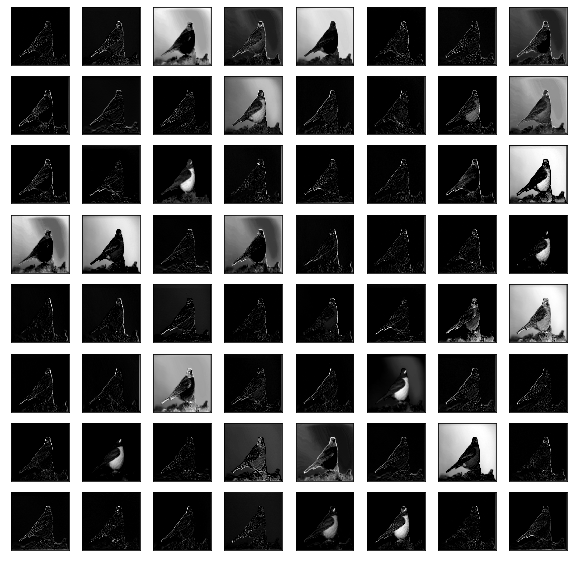

block2_conv2


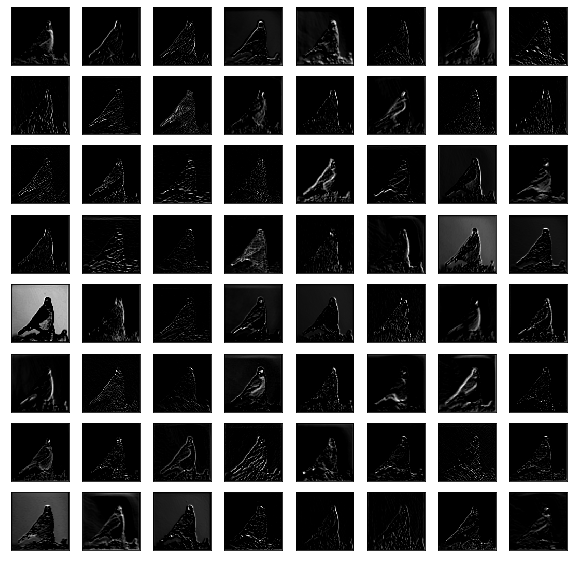

block3_conv3


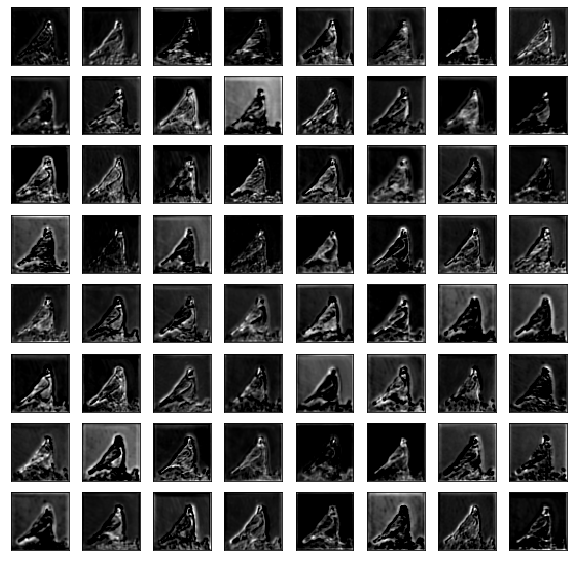

block4_conv2


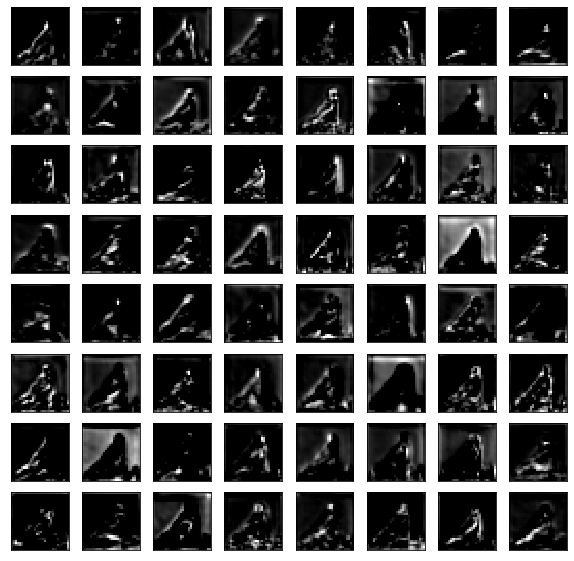

block5_conv1


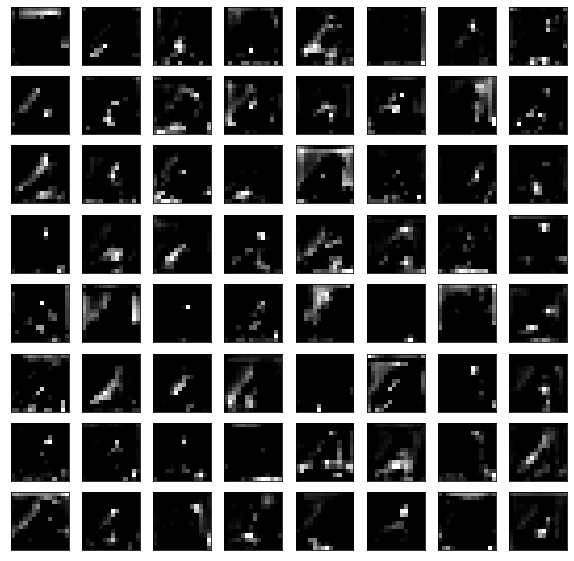

In [0]:
# visualize feature maps output from each block in the vgg model
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model_vgg.layers[i].output for i in ixs]
fm_model = Model(inputs=model_vgg.inputs, outputs=outputs)
fm_model.summary()
# get feature map for first hidden layer
feature_maps = fm_model.predict(img)
# get feature maps names
layers_names = fm_model.output_names
# plot the output from each block
for i, fmap in enumerate(feature_maps):
  print(layers_names[i])
  square(fmap, 8)